In [1]:
import pandas as pd
import re
import numpy as np
from nltk.corpus.reader import CategorizedCorpusReader
import nltk
from yellowbrick.text import FreqDistVisualizer

# Creating analysis of reviews

In [2]:
df_cleaned = pd.read_excel("all_reviews_cleaned.xlsx", index_col=0)

In [3]:
df_cleaned.columns

Index(['Hotel_Name', 'City', 'Country', 'Reviewer_Origin', 'Unit_Size',
       'Length_of_stay_nights', 'Group_Size', 'Review_Date', 'Review_Title',
       'Review_Score', 'Positive', 'Negative', 'num_of_people_helpful'],
      dtype='object')

### Number of Cities and Countries

In [4]:
pd.DataFrame(df_cleaned[["City", "Country"]].value_counts())

0
City          Country                     
Dubai         United_Arab_Emirates  175407
London        England                94212
Tokyo         Japan                  69946
Amsterdam     Netherlands            62540
Istanbul      Turkey                 51291
NYC           USA                    46733
Singapore     Singapore              31084
Cape_Town     South_Africa           27923
Bangkok       Thailand               26239
Copenhagen    Denmark                26079
Stockholm     Sweden                 23296
Berlin        German                 21757
Kuala_Lumpur  Malaysia               21152
Paris         France                 19226
Berlin        Germany                14285
Vancouver     Canada                 14130
San_Francisco NYC                    12524
Reykjavik     Iceland                12496
Beijing       China                  10675
Helsinki      Finland                 9921
Portland      USA                     3145

### Reviewer Origin

In [5]:
df_reviewer_origin = pd.DataFrame(df_cleaned["Reviewer_Origin"].value_counts())

In [6]:
display(df_reviewer_origin)

Reviewer_Origin
United Kingdom                     163107
United States of America            77137
United Arab Emirates                72816
Australia                           31122
South Africa                        26427
...                                   ...
Marshall Islands                        1
Nauru                                   1
Guinea-Bissau                           1
Pitcairn                                1
São Tomé and Príncipe                   1

[246 rows x 1 columns]

In [7]:
df_reviewer_origin.to_clipboard()

In [8]:
df_reviewer_origin

Reviewer_Origin
United Kingdom                     163107
United States of America            77137
United Arab Emirates                72816
Australia                           31122
South Africa                        26427
...                                   ...
Marshall Islands                        1
Nauru                                   1
Guinea-Bissau                           1
Pitcairn                                1
São Tomé and Príncipe                   1

[246 rows x 1 columns]

In [9]:
with pd.option_context('display.max_rows', 300,
                       'display.max_columns', None,
                       'display.precision', 3,
                       
                       ):
    display(df_reviewer_origin)


Reviewer_Origin
United Kingdom                                         163107
United States of America                                77137
United Arab Emirates                                    72816
Australia                                               31122
South Africa                                            26427
Singapore                                               23280
Germany                                                 20880
Saudi Arabia                                            20447
Malaysia                                                20301
Canada                                                  18675
Netherlands                                             15817
Ireland                                                 13026
Japan                                                   10429
India                                                   10352
France                                                   9642
Kuwait                                                   9211
Israel                                                   9046
Thailand                                                 8834
Sweden                                                   8556
Switzerland                                              7974
Italy                                                    7876
Russia                                                   6830
Oman                                                     6764
Belgium                                                  6694
Romania                                                  6234
Poland                                                   6040
Spain                                                    6005
Egypt                                                    5642
Pakistan                                                 5330
Hong Kong                                                5235
Philippines                                              5031
Qatar                                                    4935
New Zealand                                              4841
Denmark                                                  4772
China                                                    4739
Turkey                                                   4667
Finland                                                  4645
Nigeria                                                  4014
Czech Republic                                           3882
Indonesia                                                3867
Greece                                                   3768
Ukraine                                                  3475
Bahrain                                                  3423
Brazil                                                   3071
Lebanon                                                  3018
Austria                                                  2922
Norway                                                   2884
Portugal                                                 2819
Hungary                                                  2762
Taiwan                                                   2506
Jordan                                                   2141
Bulgaria                                                 2036
Iceland                                                  1917
Lithuania                                                1868
South Korea                                              1856
Estonia                                                  1845
Iraq                                                     1746
Serbia                                                   1592
Mexico                                                   1557
Iran                                                     1533
Luxembourg                                               1522
Latvia                                                   1506
Croatia                                                  1503
Kenya                                                    1378
Cyprus          

### Group sizes

In [10]:
df_cleaned["Group_Size"].value_counts()

Couple           274286
Family           220530
Solo traveler    170817
Group            108428
Name: Group_Size, dtype: int64

In [11]:
df_cleaned["Group_Size"].value_counts(normalize=True)

Couple           0.354347
Family           0.284900
Solo traveler    0.220676
Group            0.140077
Name: Group_Size, dtype: float64

In [12]:
df_cleaned["Group_Size"].value_counts(normalize=True).to_clipboard()

### Length of stay

In [13]:
df_cleaned["Length_of_stay_nights"].value_counts().to_clipboard()
df_cleaned["Length_of_stay_nights"].value_counts(normalize=True).to_clipboard()
df_cleaned["Length_of_stay_nights"].value_counts()

1     251214
2     179651
3     137077
4      81753
5      45045
6      25836
7      24018
8       9304
9       5500
10      4353
11      2258
14      1839
12      1482
13      1254
15       983
16       510
17       332
30       268
18       239
21       216
20       173
19       148
28       142
22        97
29        96
23        60
25        53
24        51
26        51
27        43
35         3
42         2
40         2
41         2
45         2
31         1
33         1
36         1
38         1
Name: Length_of_stay_nights, dtype: int64

### Num of pple helpful

In [14]:
df_cleaned["num_of_people_helpful"].value_counts()

0     668125
1      78822
2      18149
3       5580
4       1883
5        762
6        327
7        169
8         88
9         54
10        24
11        19
13        15
12        10
14         7
16         4
18         4
17         3
21         3
15         2
19         2
23         2
49         1
20         1
25         1
29         1
30         1
37         1
71         1
Name: num_of_people_helpful, dtype: int64

In [15]:
df_cleaned["num_of_people_helpful"].value_counts(normalize=True).to_clipboard()

# Positive and Negative Comments set up

In [16]:
df_text = df_cleaned[["Positive", "Negative"]]
df_text

Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

                                                 Negative  
0                carpets where not clean, had food stains  
1                                    more business nearby  
2       stains on the carpet - cleaning them would be ...  
3                location - not close to the city center.  
4       carpet was stained / sink and bathtub was stained  
...                                                   ...  
774056  a nice place to stay at the center of copenhag...  
774057  the rooms are very small, but enough for sleep:-)  
774058  - shower pressure is weak\n- expensive for fac...  
774059  they didn't come to clean my room all the days...  
774060  there was a leak in the kitchen, for over 2 ho...  

[774061 rows x 2 columns]

In [17]:
df_text["Positive"] = df_text["Positive"].astype("str")
df_text["Positive"] = df_text["Positive"].map(lambda x: x.lower())
df_text["Positive"].value_counts()

<ipython-input-17-e9a05e4fc9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Positive"] = df_text["Positive"].astype("str")
<ipython-input-17-e9a05e4fc9dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Positive"] = df_text["Positive"].map(lambda x: x.lower())


location                                                                                                                                                                                                                  16099
everything                                                                                                                                                                                                                 7366
nothing                                                                                                                                                                                                                    3865
this review is hidden because it doesn't meet our guidelines.                                                                                                                                                              3809
the location                                                                                            

In [18]:
df_text["Negative"] = df_text["Negative"].astype("str")
df_text["Negative"] = df_text["Negative"].map(lambda x: x.lower())
df_text["Negative"].value_counts()

<ipython-input-18-7b4cff849087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Negative"] = df_text["Negative"].astype("str")
<ipython-input-18-7b4cff849087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Negative"] = df_text["Negative"].map(lambda x: x.lower())


nothing                                                                                                                                                                                                                   35472
none                                                                                                                                                                                                                       4385
nothing.                                                                                                                                                                                                                   3833
this review is hidden because it doesn't meet our guidelines.                                                                                                                                                              3809
location                                                                                                

In [19]:
df_text

Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

                                                 Negative  
0                carpets where not clean, had food stains  
1                                    more business nearby  
2       stains on the carpet - cleaning them would be ...  
3                location - not close to the city center.  
4       carpet was stained / sink and bathtub was stained  
...                                                   ...  
774056  a nice place to stay at the center of copenhag...  
774057  the rooms are very small, but enough for sleep:-)  
774058  - shower pressure is weak\n- expensive for fac...  
774059  they didn't come to clean my room all the days...  
774060  there was a leak in the kitchen, for over 2 ho...  

[774061 rows x 2 columns]

In [20]:
df_text = df_text[df_text[["Positive", "Negative"]] != "there are no comments available for this review"]
df_text = df_text[df_text[["Positive", "Negative"]] != "this review is hidden because it doesn't meet our guidelines."]
df_text

Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

                                                 Negative  
0                carpets where not clean, had food stains  
1                                    more business nearby  
2       stains on the carpet - cleaning them would be ...  
3                location - not close to the city center.  
4       carpet was stained / sink and bathtub was stained  
...                                                   ...  
774056  a nice place to stay at the center of copenhag...  
774057  the rooms are very small, but enough for sleep:-)  
774058  - shower pressure is weak\n- expensive for fac...  
774059  they didn't come to clean my room all the days...  
774060  there was a leak in the kitchen, for over 2 ho...  

[774061 rows x 2 columns]

In [21]:
df_text["Positive"].value_counts()

location                                                                                                                                                                                                                  16099
everything                                                                                                                                                                                                                 7366
nothing                                                                                                                                                                                                                    3865
the location                                                                                                                                                                                                               2157
great location                                                                                          

In [22]:
df_text["Negative"].value_counts()

nothing                                                                                                                                                                                                                   35472
none                                                                                                                                                                                                                       4385
nothing.                                                                                                                                                                                                                   3833
location                                                                                                                                                                                                                   3061
everything                                                                                              

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 

In [24]:
df_text = df_text.astype("str")

In [179]:
import nltk.stem
# Creation and selection of stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
newStopWords = ['great','good', "everything", "stay", "excellent", "really", "amazing", "hotel", "dose", "us", "place", "super", "one", "best", "get",
                "also", "well", "check", "like", "lovely", "perfect", "nothing", "could", "bit", "even", "didnt", "would", "time"
                ]

stopwords_extend = nltk.corpus.stopwords.words("english")
stopwords_extend.extend(newStopWords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Positive breakdown

In [55]:
#instantiate CountVectorizer() 
# Used for N-Gram of 1
cv_pos_one=CountVectorizer(stop_words=stopwords_extend, min_df= 10,  strip_accents= "ascii", ngram_range=(1,1)) 
# this steps generates word counts for the words in your docs 
word_count_vector_pos_one=cv_pos_one.fit_transform(df_text["Positive"])

In [58]:
features_pos_one = cv_pos_one.get_feature_names_out()

In [100]:
features_pos_one

array(['00', '000', '00am', ..., 'zuid', 'zumre', 'zurich'], dtype=object)

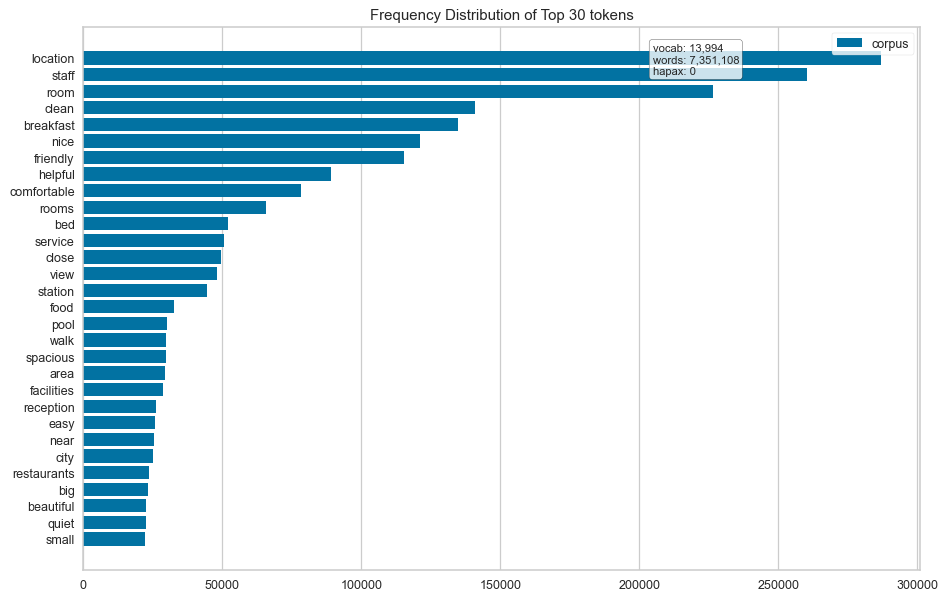

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [70]:
# Shows positive token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_pos_one = FreqDistVisualizer(features=features_pos_one, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_pos_one.fit(word_count_vector_pos_one)
visualizer_pos_one.show()

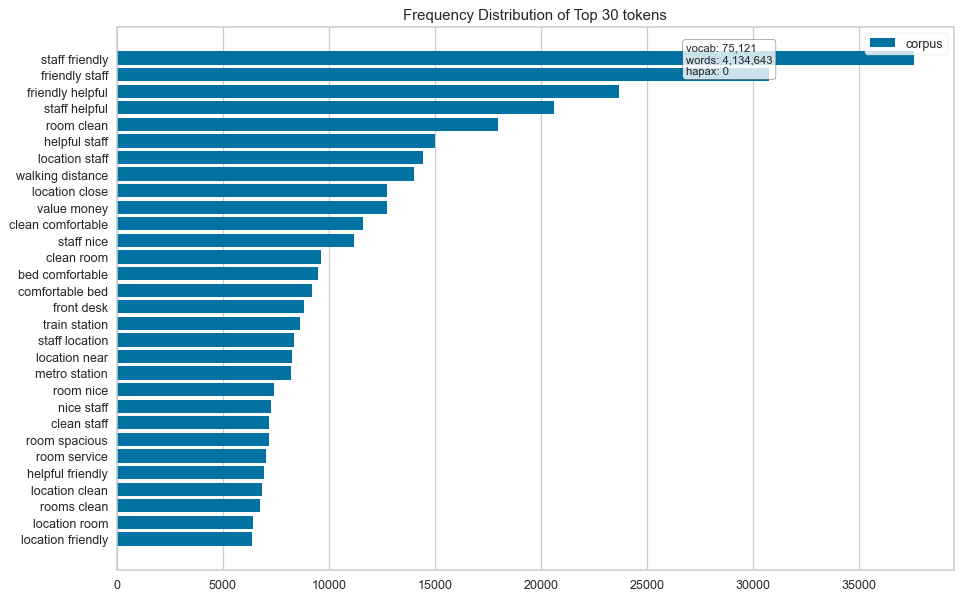

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [71]:
## N-Gram of 2 
#instantiate CountVectorizer() 
cv_pos_two=CountVectorizer(stop_words=stopwords_extend, min_df= 10,  strip_accents= "ascii", ngram_range=(2,2)) 
# this steps generates word counts for the words in your docs 
word_count_vector_pos_two=cv_pos_two.fit_transform(df_text["Positive"])
features_pos_two = cv_pos_two.get_feature_names_out()
# Shows positive token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_pos_two = FreqDistVisualizer(features=features_pos_two, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_pos_two.fit(word_count_vector_pos_two)
visualizer_pos_two.show()

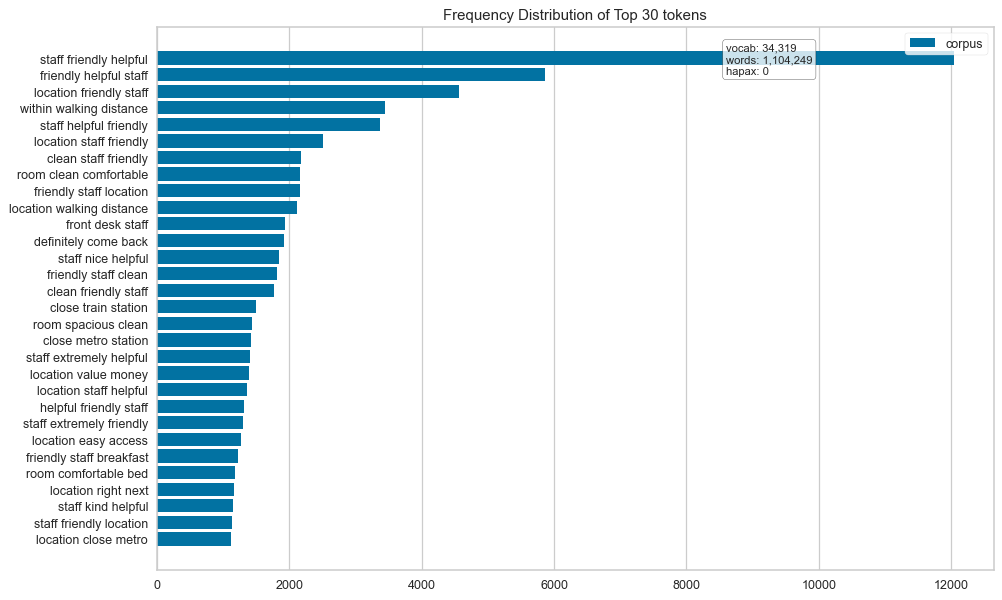

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [69]:
## N-Gram of 3 
#instantiate CountVectorizer() 
cv_pos_three=CountVectorizer(stop_words=stopwords_extend, min_df= 10,  strip_accents= "ascii", ngram_range=(3,3)) 
# this steps generates word counts for the words in your docs 
word_count_vector_pos_three=cv_pos_three.fit_transform(df_text["Positive"])
features_pos_three = cv_pos_three.get_feature_names_out()
# Shows positive token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_pos_three = FreqDistVisualizer(features=features_pos_three, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_pos_three.fit(word_count_vector_pos_three)
visualizer_pos_three.show()

### TF-IDF Vectorizer

In [92]:
# Creation of TF-IDF vectorizer for ngram = 1
vectorizer_tfidf_pos_one = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(1,1))
tfidf_vectorizer_vectors_pos_one = vectorizer_tfidf_pos_one.fit_transform(df_text["Positive"])

In [93]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_pos_one=tfidf_vectorizer_vectors_pos_one[0] 
# place tf-idf values in a pandas data frame 
df_pos_tfidf_one = pd.DataFrame()
df_pos_tfidf_one = pd.DataFrame(first_vector_tfidfvectorizer_pos_one.T.todense(), 
                    index=vectorizer_tfidf_pos_one.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

In [94]:
df_pos_tfidf_one.head(10)

tfidf
restaurant  0.730716
view        0.604886
location    0.316492
00          0.000000
persone     0.000000
personelle  0.000000
personell   0.000000
personelin  0.000000
personel    0.000000
personeels  0.000000

In [95]:
# Creation of TF-IDF vectorizer for ngram = 2
vectorizer_tfidf_pos_two = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(2,2))
tfidf_vectorizer_vectors_pos_two = vectorizer_tfidf_pos_two.fit_transform(df_text["Positive"])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_pos_two=tfidf_vectorizer_vectors_pos_two[0] 
# place tf-idf values in a pandas data frame 
df_pos_tfidf_two = pd.DataFrame()
df_pos_tfidf_two = pd.DataFrame(first_vector_tfidfvectorizer_pos_two.T.todense(), 
                    index=vectorizer_tfidf_pos_two.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

df_pos_tfidf_two.head(10)

tfidf
view restaurant      0.804487
location view        0.593971
politeness staff     0.000000
politeness spacious  0.000000
politeness smiles    0.000000
politeness service   0.000000
politeness rooms     0.000000
politeness room      0.000000
politeness rest      0.000000
politeness request   0.000000

In [96]:
# Creation of TF-IDF vectorizer for ngram = 3
vectorizer_tfidf_pos_three = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(3,3))
tfidf_vectorizer_vectors_pos_three = vectorizer_tfidf_pos_three.fit_transform(df_text["Positive"])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_pos_three=tfidf_vectorizer_vectors_pos_three[0] 
# place tf-idf values in a pandas data frame 
df_pos_tfidf_three = pd.DataFrame()
df_pos_tfidf_three = pd.DataFrame(first_vector_tfidfvectorizer_pos_three.T.todense(), 
                    index=vectorizer_tfidf_pos_three.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

df_pos_tfidf_three.head(10)

tfidf
location view restaurant         1.0
poorly designed uncomfortably    0.0
poorly cooked bacon              0.0
poorly could still               0.0
poorly decorated damaged         0.0
poorly designed beach            0.0
poorly designed chaos            0.0
poorly designed door             0.0
poorly designed ergonomically    0.0
poorly designed everytime        0.0

In [136]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams

regexp = RegexpTokenizer('\w+')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
df_text["tokens_pos"] = df_text["Positive"].apply(regexp.tokenize)

In [133]:
# Get rid of words in stopwords
df_text["tokens_pos"] = df_text["tokens_pos"].apply(lambda x: [item for item in x if item not in stopwords_extend])
# Removes words that have a frequency less than x
df_text["tokens_pos"] = df_text["tokens_pos"].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [134]:
all_words_pos = ' '.join([word for word in df_text["tokens_pos"].astype("str")])
tokenized_words_pos = nltk.tokenize.word_tokenize(all_words_pos)

FreqDist({'location': 286752, 'staff': 260268, 'room': 226534, 'clean': 141025, 'breakfast': 134633, 'nice': 121044, 'friendly': 115244, 'helpful': 89211, 'comfortable': 78114, 'rooms': 65636, ...})

In [161]:
fdist_one_pos = pd.DataFrame(FreqDist(tokenized_words_pos), index=[0]).T.sort_values(by=0, ascending=False)
fdist_one_pos = fdist_one_pos[fdist_one_pos[0] > 100]
fdist_one_pos

0
location    286752
staff       260268
room        226534
clean       141025
breakfast   134633
...            ...
checkpoint     101
hudson         101
encounter      101
gulhane        101
skip           101

[4045 rows x 1 columns]

In [164]:
bigrams = nltk.bigrams(tokenized_words_pos)
frequence_bi_pos = pd.DataFrame(FreqDist(bigrams), index=[0]).T
frequence_bi_pos.sort_values(by=0, ascending=False, inplace = True)
frequence_bi_pos = frequence_bi_pos[frequence_bi_pos[0] > 100]
frequence_bi_pos

0
staff        friendly   38330
friendly     staff      31555
             helpful    23709
staff        helpful    20838
location     location   18836
...                       ...
clean        gym          101
view         could        101
satisfied    location     101
loved        food         101
professional welcoming    101

[6763 rows x 1 columns]

In [174]:
trigrams_pos = ngrams(tokenized_words_pos,3)

In [175]:
frequence_tri_pos = pd.DataFrame(nltk.FreqDist(trigrams_pos), index=[0]).T
frequence_tri_pos.sort_values(by=0, ascending=False, inplace=True)
frequence_tri_pos = frequence_tri_pos[frequence_tri_pos[0] > 100]
frequence_tri_pos

0
staff       friendly     helpful   12174
friendly    helpful      staff      6272
location    friendly     staff      5173
friendly    staff        location   4303
staff       helpful      friendly   3476
...                                  ...
spacious    room         comfy       101
comfortable helpful      staff       101
front       office       team        101
airport     staff        friendly    101
exceeded    expectations location    101

[2014 rows x 1 columns]

In [165]:
frequence_tri_pos

0
staff    friendly helpful      12174
friendly helpful  staff         6272
location friendly staff         5173
friendly staff    location      4303
staff    helpful  friendly      3476
...                              ...
location clean    comfy          101
away     city     center         101
pool     area     location       101
location staff    comfortable    101
clean    location right          101

[2014 rows x 1 columns]

In [142]:
frequence_tri_pos.to_clipboard()

## Negative breakdown

In [209]:
#instantiate CountVectorizer() 
# Used for N-Gram of 1
cv_neg_one=CountVectorizer(stop_words="english", min_df= 10,  strip_accents= "ascii", ngram_range=(1,1)) 
# this steps generates word counts for the words in your docs 
word_count_vector_neg_one=cv_neg_one.fit_transform(df_text["Negative"])

In [210]:
features_neg_one = cv_neg_one.get_feature_names_out()

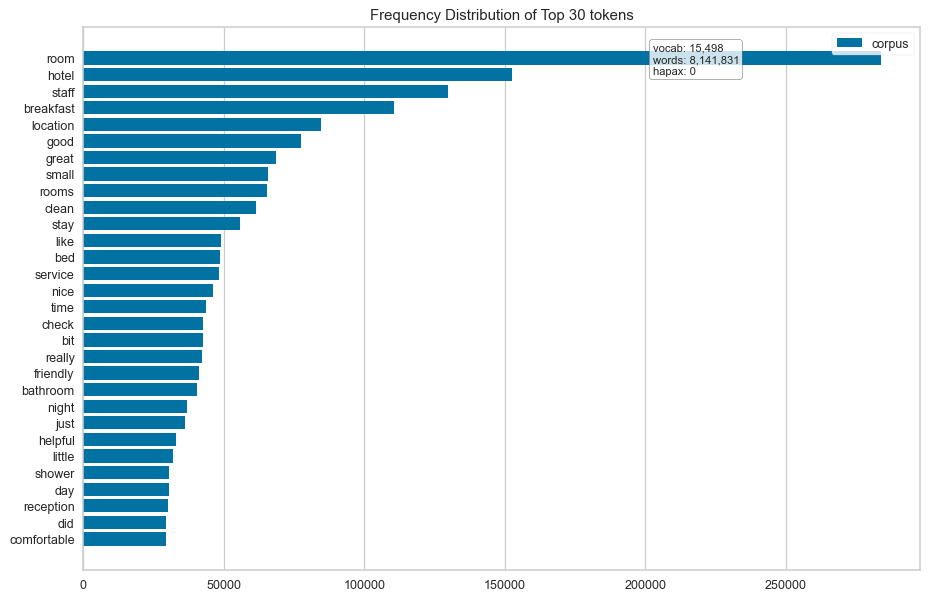

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [211]:
# Shows Negative token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_neg_one = FreqDistVisualizer(features=features_neg_one, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_neg_one.fit(word_count_vector_neg_one)
visualizer_neg_one.show()

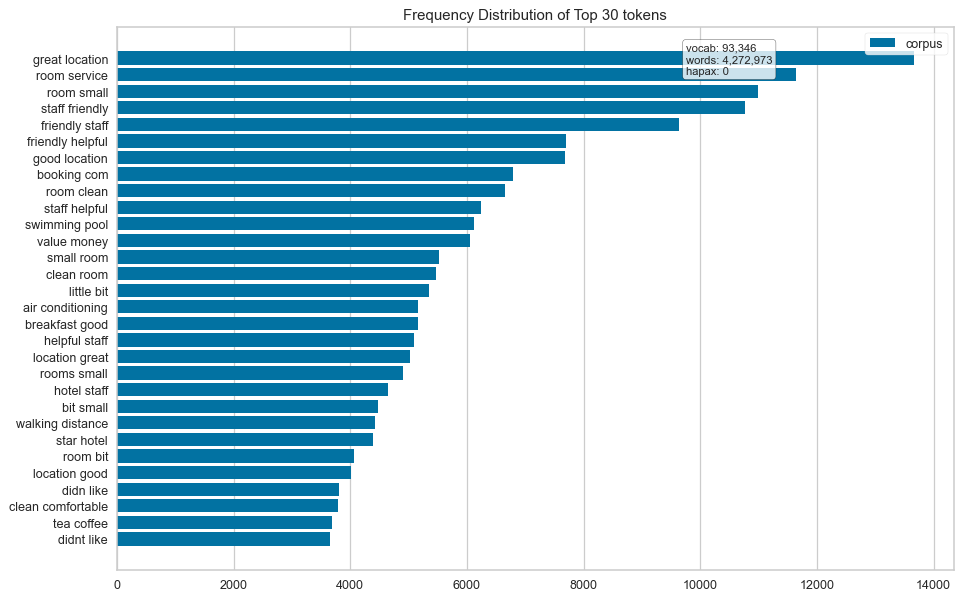

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [208]:
## N-Gram of 2 
#instantiate CountVectorizer() 
cv_neg_two=CountVectorizer(stop_words = "english", min_df= 10,  strip_accents= "ascii", ngram_range=(2,2)) 
# this steps generates word counts for the words in your docs 
word_count_vector_neg_two=cv_neg_two.fit_transform(df_text["Negative"])
features_neg_two = cv_neg_two.get_feature_names_out()
# Shows negative token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_neg_two = FreqDistVisualizer(features=features_neg_two, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_neg_two.fit(word_count_vector_neg_two)
visualizer_neg_two.show()

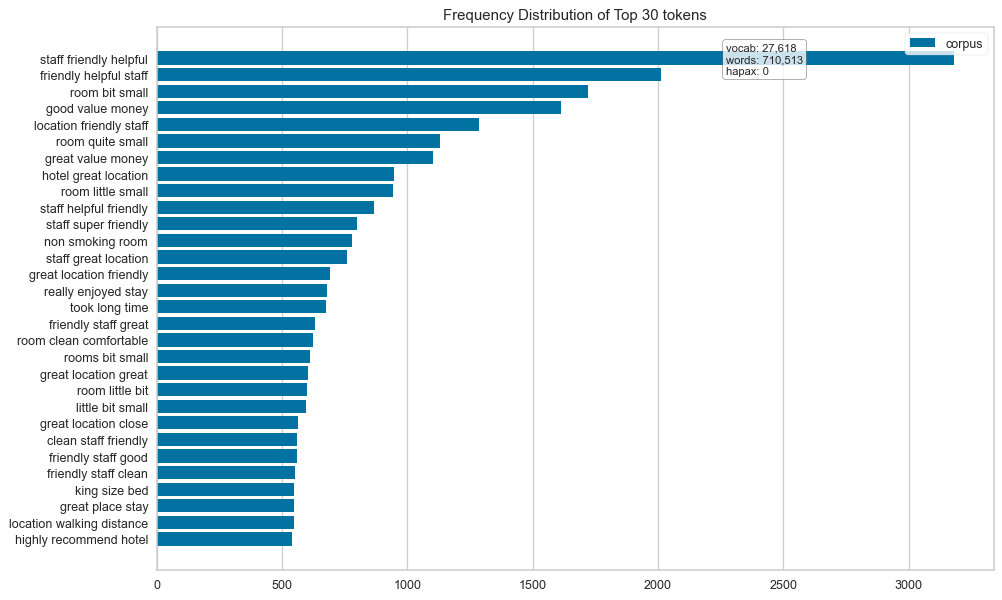

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [207]:
## N-Gram of 3 
#instantiate CountVectorizer() 
cv_neg_three=CountVectorizer(stop_words = "english", min_df= 10,  strip_accents= "ascii", ngram_range=(3,3)) 
# this steps generates word counts for the words in your docs 
word_count_vector_neg_three=cv_neg_three.fit_transform(df_text["Negative"])
features_neg_three = cv_neg_three.get_feature_names_out()
# Shows negative token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_neg_three = FreqDistVisualizer(features=features_neg_three, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_neg_three.fit(word_count_vector_neg_three)
visualizer_neg_three.show()

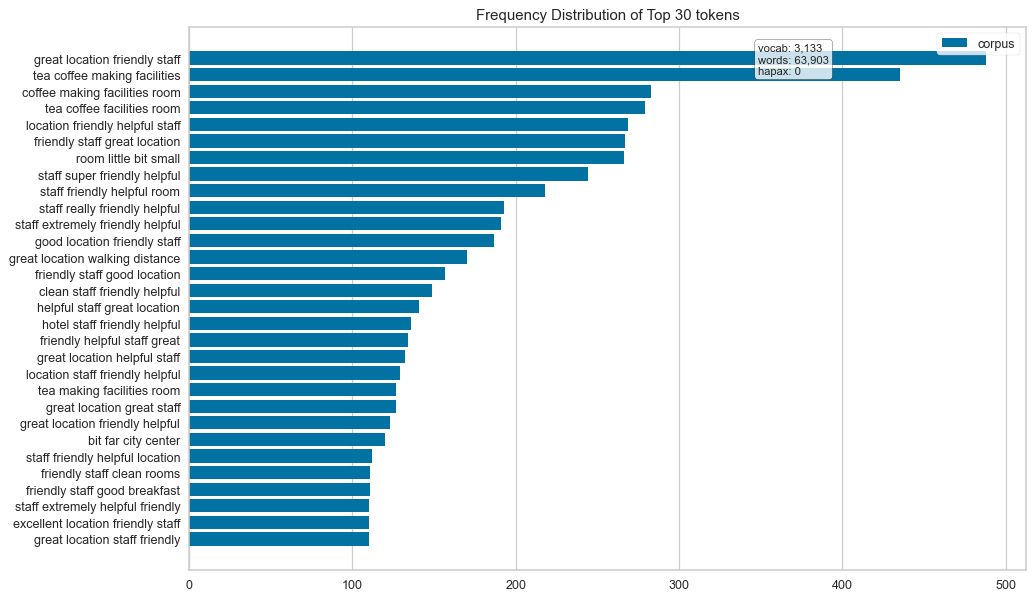

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [206]:
## N-Gram of 3 
#instantiate CountVectorizer() 
cv_neg_three=CountVectorizer(stop_words = "english", min_df= 10,  strip_accents= "ascii", ngram_range=(4,4)) 
# this steps generates word counts for the words in your docs 
word_count_vector_neg_three=cv_neg_three.fit_transform(df_text["Negative"])
features_neg_three = cv_neg_three.get_feature_names_out()
# Shows negative token words WITH the extended stopwords
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90
visualizer_neg_three = FreqDistVisualizer(features=features_neg_three, 
                                size=(1080, 720),
                                orient='h', n=30)
visualizer_neg_three.fit(word_count_vector_neg_three)
visualizer_neg_three.show()

### TF-IDF Vectorizer

In [195]:
# Creation of TF-IDF vectorizer for ngram = 1
vectorizer_tfidf_neg_one = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(1,1))
tfidf_vectorizer_vectors_neg_one = vectorizer_tfidf_neg_one.fit_transform(df_text["Negative"])

In [196]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_neg_one=tfidf_vectorizer_vectors_neg_one[0] 
# place tf-idf values in a pandas data frame 
df_neg_tfidf_one = pd.DataFrame()
df_neg_tfidf_one = pd.DataFrame(first_vector_tfidfvectorizer_neg_one.T.todense(), 
                    index=vectorizer_tfidf_neg_one.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

In [200]:
df_neg_tfidf_one

tfidf
carpets    0.626375
stains     0.595572
food       0.389836
clean      0.317767
00         0.000000
...             ...
equipted   0.000000
equipt     0.000000
equips     0.000000
equippped  0.000000
𝚠𝚊𝚜        0.000000

[87043 rows x 1 columns]

In [201]:
# Creation of TF-IDF vectorizer for ngram = 2
vectorizer_tfidf_neg_two = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(2,2))
tfidf_vectorizer_vectors_neg_two = vectorizer_tfidf_neg_two.fit_transform(df_text["Negative"])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_neg_two=tfidf_vectorizer_vectors_neg_two[0] 
# place tf-idf values in a pandas data frame 
df_neg_tfidf_two = pd.DataFrame()
df_neg_tfidf_two = pd.DataFrame(first_vector_tfidfvectorizer_neg_two.T.todense(), 
                    index=vectorizer_tfidf_neg_two.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

df_neg_tfidf_two.head(10)

tfidf
food stains         0.622291
carpets clean       0.590407
clean food          0.513977
preferred drying    0.000000
preferred discount  0.000000
preferred door      0.000000
preferred double    0.000000
preferred drink     0.000000
preferred drinks    0.000000
00 00               0.000000

In [202]:
# Creation of TF-IDF vectorizer for ngram = 3
vectorizer_tfidf_neg_three = TfidfVectorizer(stop_words=stopwords_extend, ngram_range=(3,3))
tfidf_vectorizer_vectors_neg_three = vectorizer_tfidf_neg_three.fit_transform(df_text["Negative"])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_neg_three=tfidf_vectorizer_vectors_neg_three[0] 
# place tf-idf values in a pandas data frame 
df_neg_tfidf_three = pd.DataFrame()
df_neg_tfidf_three = pd.DataFrame(first_vector_tfidfvectorizer_neg_three.T.todense(), 
                    index=vectorizer_tfidf_neg_three.get_feature_names_out(), 
                    columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)

df_neg_tfidf_three.head(10)

tfidf
carpets clean food         0.717519
clean food stains          0.696538
00 00 00                   0.000000
properly perhaps specific  0.000000
properly phone remind      0.000000
properly phone fix         0.000000
properly phone finally     0.000000
properly phone charging    0.000000
properly phone bedding     0.000000
properly personel care     0.000000

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem_pos = WordNetLemmatizer()

df_positive['text_string_lem_pos'] = df_positive['text_string_fdist_pos'].apply(wordnet_lem_pos.lemmatize)

In [ ]:
all_words_lem_pos = ' '.join([word for word in df_positive['text_string_lem_pos']])

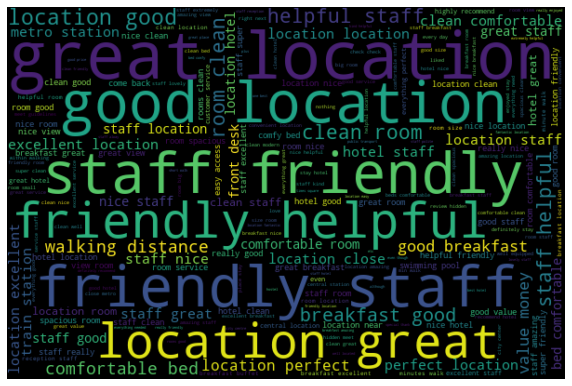

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words_pos_lem = nltk.word_tokenize(all_words_lem_pos)
fd_pos_lem = FreqDist(words_pos_lem)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
fd_pos_lem.least_common(100)

NameError: name 'fd_pos_lem' is not defined

In [ ]:
fd_pos_lem.most_common(100)

[('location', 286800),
 ('staff', 260319),
 ('room', 226719),
 ('hotel', 183339),
 ('good', 182830),
 ('great', 170118),
 ('clean', 141031),
 ('breakfast', 134641),
 ('nice', 121044),
 ('friendly', 115244),
 ('helpful', 89211),
 ('comfortable', 78114),
 ('everything', 68758),
 ('stay', 66409),
 ('rooms', 65451),
 ('excellent', 64442),
 ('really', 53612),
 ('bed', 51904),
 ('amazing', 50751),
 ('service', 50632),
 ('close', 49554),
 ('view', 48152),
 ('perfect', 44981),
 ('station', 44585),
 ('also', 43265),
 ('well', 42630),
 ('check', 33299),
 ('place', 32537),
 ('like', 32508),
 ('food', 32491),
 ('lovely', 31945),
 ('pool', 30040),
 ('walk', 29768),
 ('spacious', 29724),
 ('area', 29271),
 ('would', 28990),
 ('facilities', 28489),
 ('time', 27024),
 ('super', 26269),
 ('one', 26169),
 ('reception', 25984),
 ('easy', 25744),
 ('near', 25425),
 ('city', 25026),
 ('big', 23420),
 ('restaurants', 23379),
 ('beautiful', 22689),
 ('quiet', 22642),
 ('best', 22550),
 ('small', 22324),
 ('b

In [ ]:
fd_pos_lem.tabulate(10)

 location     staff      room     hotel      good     great     clean breakfast      nice  friendly 
   286800    260319    226719    183339    182830    170118    141031    134641    121044    115244 


In [ ]:
# Obtain top 10 words
top_10_pos = fd_pos_lem.most_common(10)

# Create pandas series to make plotting easier
fdist_pos = pd.Series(dict(top_10_pos))

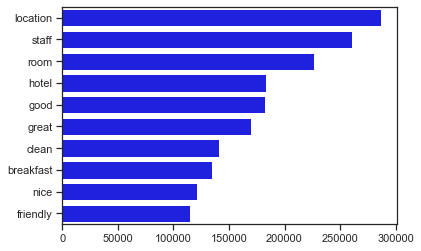

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist_pos.index, x=fdist_pos.values, color='blue');

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist_pos.index, x=fdist_pos.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [ ]:
# Show frequency of a specific word
fd_pos_lem["location"]

286800

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
df_positive['polarity'] = df_positive['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_positive.tail(3)

KeyboardInterrupt: 

In [ ]:
# Change data structure
df_positive = pd.concat(
    [df_positive.drop(['polarity'], axis=1), 
     df_positive['polarity'].apply(pd.Series)], axis=1)
df_positive.head(3)

Hotel_Name       City      Country  \
0  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   
1  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   
2  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   

  Reviewer_Origin      Unit_Size  Length_of_stay_nights     Group_Size  \
0    South Africa  Superior Room                      3  Solo traveler   
1           Spain  Superior Room                      2  Solo traveler   
2          Poland  Superior Room                      2  Solo traveler   

  Review_Date                                   Review_Title  Review_Score  \
0  1990-01-01  Amzing views, right next to the train station          10.0   
1  2022-05-21                                     Great stay           8.0   
2  2022-05-19                                      Wonderful           9.0   

                                            Positive  num_of_people_helpful  \
0    amazing location, lovely view, great restaurant                      0   
1                       room and location were great                      0   
2  big room, access to coffee and tea in the room...                      0   

                                          text_token  \
0  [amazing, location, lovely, view, great, resta...   
1                            [room, location, great]   
2  [big, room, access, coffee, tea, room, spaciou...   

                                         text_string  \
0      amazing location lovely view great restaurant   
1                                room location great   
2  big room access coffee tea room spacious showe...   

                                   text_string_fdist  \
0      amazing location lovely view great restaurant   
1                                room location great   
2  big room access coffee tea room spacious showe...   

                                     text_string_lem  neg    neu    pos  \
0      amazing location lovely view great restaurant  0.0  0.204  0.796   
1                                room location great  0.0  0.328  0.672   
2  big room access coffee tea room spacious showe...  0.0  1.000  0.000   

   compound  
0    0.9136  
1    0.6249  
2    0.0000

In [ ]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df_positive['sentiment'] = df_positive['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_positive.head(4)

Hotel_Name       City      Country  \
0  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   
1  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   
2  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   
3  Park Inn by Radisson Amsterdam City West  Amsterdam  Netherlands   

  Reviewer_Origin      Unit_Size  Length_of_stay_nights     Group_Size  \
0    South Africa  Superior Room                      3  Solo traveler   
1           Spain  Superior Room                      2  Solo traveler   
2          Poland  Superior Room                      2  Solo traveler   
3         Iceland  Standard Room                      3          Group   

  Review_Date                                   Review_Title  Review_Score  \
0  1990-01-01  Amzing views, right next to the train station          10.0   
1  2022-05-21                                     Great stay           8.0   
2  2022-05-19                                      Wonderful           9.0   
3  2022-05-19                                           Good           7.0   

   ... num_of_people_helpful  \
0  ...                     0   
1  ...                     0   
2  ...                     0   
3  ...                     0   

                                          text_token  \
0  [amazing, location, lovely, view, great, resta...   
1                            [room, location, great]   
2  [big, room, access, coffee, tea, room, spaciou...   
3       [breakfast, great, size, room, ok, peaceful]   

                                         text_string  \
0      amazing location lovely view great restaurant   
1                                room location great   
2  big room access coffee tea room spacious showe...   
3                 breakfast great size room peaceful   

                                   text_string_fdist  \
0      amazing location lovely view great restaurant   
1                                room location great   
2  big room access coffee tea room spacious showe...   
3                 breakfast great size room peaceful   

                                     text_string_lem  neg    neu    pos  \
0      amazing location lovely view great restaurant  0.0  0.204  0.796   
1                                room location great  0.0  0.328  0.672   
2  big room access coffee tea room spacious showe...  0.0  1.000  0.000   
3                 breakfast great size room peaceful  0.0  0.291  0.709   

   compound  sentiment  
0    0.9136   positive  
1    0.6249   positive  
2    0.0000    neutral  
3    0.8074   positive  

[4 rows x 21 columns]

In [ ]:
df_positive

Hotel_Name        City      Country  \
0        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
1        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
2        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
3        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
4        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
...                                           ...         ...          ...   
774056  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774057  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774058  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774059  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774060  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   

                 Reviewer_Origin      Unit_Size  Length_of_stay_nights  \
0                   South Africa  Superior Room                      3   
1                          Spain  Superior Room                      2   
2                         Poland  Superior Room                      2   
3                        Iceland  Standard Room                      3   
4       United States of America    Family Room                      1   
...                          ...            ...                    ...   
774056                 Lithuania      Quad Room                      2   
774057            Czech Republic      Twin Room                      3   
774058                 Australia      Twin Room                      3   
774059                  Thailand      Twin Room                      3   
774060            United Kingdom      Twin Room                      2   

           Group_Size Review_Date  \
0       Solo traveler  1990-01-01   
1       Solo traveler  2022-05-21   
2       Solo traveler  2022-05-19   
3               Group  2022-05-19   
4              Family  2022-05-19   
...               ...         ...   
774056          Group  2020-01-26   
774057          Group  2020-01-25   
774058         Family  2020-01-25   
774059         Couple  2020-01-25   
774060          Group  2020-01-23   

                                             Review_Title  Review_Score  \
0           Amzing views, right next to the train station          10.0   
1                                              Great stay           8.0   
2                                               Wonderful           9.0   
3                                                    Good           7.0   
4       Great location. However , for what I paid , I ...           7.0   
...                                                   ...           ...   
774056                                          Excellent           8.8   
774057                                          Very Good           8.3   
774058               Basic rooms but everything we needed           8.3   
774059                                               Good           7.0   
774060     Good for budget travellers and to meet people.           7.0   

                                                 Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

        num_of_people_helpful  \
0                           0   
1                           0   
2                           0   
3 

In [ ]:
q = df_positive["Reviewer_Origin"].str.lower().unique()
q

array(['south africa', 'spain', 'poland', 'iceland',
       'united states of america', 'ireland', 'ukraine', 'slovenia',
       'colombia', 'united arab emirates', 'netherlands', 'argentina',
       'germany', 'sweden', 'luxembourg', 'united kingdom', 'denmark',
       'bahrain', 'finland', 'japan', 'estonia', 'ghana',
       'czech republic', 'nigeria', 'brazil', 'portugal', 'greece',
       'belgium', 'france', 'iran', 'kuwait', 'singapore', 'norway',
       'lithuania', 'slovakia', 'turkey', 'italy', 'malaysia', 'egypt',
       'saudi arabia', 'albania', 'cyprus', 'lebanon', 'romania',
       'bosnia and herzegovina', 'guatemala', 'austria', 'curaçao',
       'switzerland', 'iraq', 'jordan', 'canada', 'thailand', 'croatia',
       'india', 'hong kong', 'aruba', 'hungary', 'pakistan',
       'south korea', 'belarus', 'malta', 'israel', 'qatar', 'russia',
       'australia', 'indonesia', nan, 'new zealand', 'ecuador', 'china',
       'jersey', 'costa rica', 'mauritius', 'oman', 'chil

In [ ]:
df_positive.sort_values(by = ["Reviewer_Origin"])["Hotel_Name"]

153675              Condo Hotel\nFirst Central Hotel Suites
344692                                    Golden Horn Hotel
263829                               Claridge Hotel - Dubai
484589    Courtyard by Marriott New York Manhattan/Centr...
747329                                      The Cape Milner
                                ...                        
772119                                         Ibsens Hotel
772748                                            Alexandra
772817                                            Alexandra
773285                                         Tivoli Hotel
773654                                         Tivoli Hotel
Name: Hotel_Name, Length: 774061, dtype: object

In [ ]:
# def to order a dataframe's columns unique values in alphabetically order and assign them a 
# numerically value and create a new column with those values in the df

# For Hotel City Location

def AphaOrder(df):
    import re

    # Organize the column into unique values and number them
    column_num = df
    column_num = column_num.str.lower().unique().astype(str)
    column_num = sorted(column_num)
    column_num = pd.DataFrame(column_num, columns = ["unique_locations"])
    column_num.insert(1, 'unique_locations_num', range(0, len(column_num)))
    
    # Add column to df and give the number to each responding value
    new_column = pd.DataFrame(df.str.lower(), columns = ["City"])
    new_column = new_column.merge(column_num, left_on = "City", right_on = "unique_locations", how = "left")


    return new_column["unique_locations_num"]

In [ ]:
AphaOrder(df_positive["City"]).value_counts()

6     175407
10     94212
18     69946
0      62540
8      51291
11     46733
3      36042
16     31084
4      27923
1      26239
5      26079
17     23296
9      21152
12     19226
19     14130
15     12524
14     12496
2      10675
7       9921
13      3145
Name: unique_locations_num, dtype: int64

In [ ]:
df_positive["City_num"] = AphaOrder(df_positive["City"])
df_positive

Hotel_Name        City      Country  \
0        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
1        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
2        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
3        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
4        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
...                                           ...         ...          ...   
774056  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774057  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774058  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774059  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774060  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   

                 Reviewer_Origin      Unit_Size  Length_of_stay_nights  \
0                   South Africa  Superior Room                      3   
1                          Spain  Superior Room                      2   
2                         Poland  Superior Room                      2   
3                        Iceland  Standard Room                      3   
4       United States of America    Family Room                      1   
...                          ...            ...                    ...   
774056                 Lithuania      Quad Room                      2   
774057            Czech Republic      Twin Room                      3   
774058                 Australia      Twin Room                      3   
774059                  Thailand      Twin Room                      3   
774060            United Kingdom      Twin Room                      2   

           Group_Size Review_Date  \
0       Solo traveler  1990-01-01   
1       Solo traveler  2022-05-21   
2       Solo traveler  2022-05-19   
3               Group  2022-05-19   
4              Family  2022-05-19   
...               ...         ...   
774056          Group  2020-01-26   
774057          Group  2020-01-25   
774058         Family  2020-01-25   
774059         Couple  2020-01-25   
774060          Group  2020-01-23   

                                             Review_Title  Review_Score  \
0           Amzing views, right next to the train station          10.0   
1                                              Great stay           8.0   
2                                               Wonderful           9.0   
3                                                    Good           7.0   
4       Great location. However , for what I paid , I ...           7.0   
...                                                   ...           ...   
774056                                          Excellent           8.8   
774057                                          Very Good           8.3   
774058               Basic rooms but everything we needed           8.3   
774059                                               Good           7.0   
774060     Good for budget travellers and to meet people.           7.0   

                                                 Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

        num_of_people_helpful  \
0                           0   
1                           0   
2                           0   
3 

In [ ]:
# For Hotels Country
def AphaOrder(df):
    import re

    # Organize the column into unique values and number them
    column_num = df
    column_num = column_num.str.lower().unique().astype(str)
    column_num = sorted(column_num)
    column_num = pd.DataFrame(column_num, columns = ["unique_locations"])
    column_num.insert(1, 'unique_locations_num', range(0, len(column_num)))
    
    # Add column to df and give the number to each responding value
    new_column = pd.DataFrame(df.str.lower(), columns = ["Country"])
    new_column = new_column.merge(column_num, left_on = "Country", right_on = "unique_locations", how = "left")


    return new_column["unique_locations_num"]

In [ ]:
df_positive["Country_num"] = AphaOrder(df_positive["Country"])

In [ ]:
# For Reviewer Origin

def AphaOrder(df):
    import re

    # Organize the column into unique values and number them
    column_num = df
    column_num = column_num.str.lower().unique().astype(str)
    column_num = sorted(column_num)
    column_num = pd.DataFrame(column_num, columns = ["unique_locations"])
    column_num.insert(1, 'unique_locations_num', range(0, len(column_num)))
    
    # Add column to df and give the number to each responding value
    new_column = pd.DataFrame(df.str.lower(), columns = ["Reviewer_Origin"])
    new_column = new_column.merge(column_num, left_on = "Reviewer_Origin", right_on = "unique_locations", how = "left")


    return new_column["unique_locations_num"]

In [ ]:
df_positive["Reviewer_Origin_num"] = AphaOrder(df_positive["Reviewer_Origin"])

In [ ]:
# For group size

def AphaOrder(df):
    import re

    # Organize the column into unique values and number them
    column_num = df
    column_num = column_num.str.lower().unique().astype(str)
    column_num = sorted(column_num)
    column_num = pd.DataFrame(column_num, columns = ["unique_locations"])
    column_num.insert(1, 'unique_locations_num', range(0, len(column_num)))
    
    # Add column to df and give the number to each responding value
    new_column = pd.DataFrame(df.str.lower(), columns = ["Group_Size"])
    new_column = new_column.merge(column_num, left_on = "Group_Size", right_on = "unique_locations", how = "left")


    return new_column["unique_locations_num"]

In [ ]:
df_positive["Group_Size_num"] = AphaOrder(df_positive["Group_Size"])

In [ ]:
df_cleaned["Unit_Size"].value_counts()

Standard Double Room                                                                   26569
King Room                                                                              18115
Double Room                                                                            18014
Superior Double Room                                                                   15040
Standard Twin Room                                                                     11417
                                                                                       ...  
Chinese Mainland Citizen Only-Traditional Double Room                                      1
Double Room with Small Double Bed with 12pm Late Check Out - Smoking                       1
Staycation Package - Superior Three Bedroom Sea View Apartment, Dinner Included            1
Club level, Guest room, 2 Double                                                           1
Luxury Double Room with Late Check-in 18:00 and Early Check-out 10:00 

In [ ]:
df_positive.columns

Index(['Hotel_Name', 'City', 'Country', 'Reviewer_Origin', 'Unit_Size',
       'Length_of_stay_nights', 'Group_Size', 'Review_Date', 'Review_Title',
       'Review_Score', 'Positive', 'num_of_people_helpful', 'text_token',
       'text_string', 'text_string_fdist', 'text_string_lem', 'City_num',
       'Country_num', 'Reviewer_Origin_num', 'Group_Size_num'],
      dtype='object')

In [ ]:
df_positive

Hotel_Name        City      Country  \
0        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
1        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
2        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
3        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
4        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
...                                           ...         ...          ...   
774056  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774057  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774058  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774059  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774060  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   

                 Reviewer_Origin      Unit_Size  Length_of_stay_nights  \
0                   South Africa  Superior Room                      3   
1                          Spain  Superior Room                      2   
2                         Poland  Superior Room                      2   
3                        Iceland  Standard Room                      3   
4       United States of America    Family Room                      1   
...                          ...            ...                    ...   
774056                 Lithuania      Quad Room                      2   
774057            Czech Republic      Twin Room                      3   
774058                 Australia      Twin Room                      3   
774059                  Thailand      Twin Room                      3   
774060            United Kingdom      Twin Room                      2   

           Group_Size Review_Date  \
0       Solo traveler  1990-01-01   
1       Solo traveler  2022-05-21   
2       Solo traveler  2022-05-19   
3               Group  2022-05-19   
4              Family  2022-05-19   
...               ...         ...   
774056          Group  2020-01-26   
774057          Group  2020-01-25   
774058         Family  2020-01-25   
774059         Couple  2020-01-25   
774060          Group  2020-01-23   

                                             Review_Title  Review_Score  \
0           Amzing views, right next to the train station          10.0   
1                                              Great stay           8.0   
2                                               Wonderful           9.0   
3                                                    Good           7.0   
4       Great location. However , for what I paid , I ...           7.0   
...                                                   ...           ...   
774056                                          Excellent           8.8   
774057                                          Very Good           8.3   
774058               Basic rooms but everything we needed           8.3   
774059                                               Good           7.0   
774060     Good for budget travellers and to meet people.           7.0   

                                                 Positive  \
0         amazing location, lovely view, great restaurant   
1                            room and location were great   
2       big room, access to coffee and tea in the room...   
3         breakfast was great. size of room ok. peaceful.   
4                                     breakfast was great   
...                                                   ...   
774056  a nice place to stay at the center of copenhag...   
774057  the location is really fantastic. it’s a good ...   
774058  - clean, comfortable and right next to train s...   
774059  good location and more facilities at the dinin...   
774060  location is good for the money, rooms are big ...   

        num_of_people_helpful  \
0                           0   
1                           0   
2                           0   
3 

In [ ]:
df_positive["Unit_Size"].value_counts().head(20)

Standard Double Room            26569
King Room                       18115
Double Room                     18014
Superior Double Room            15040
Standard Twin Room              11417
Deluxe King Room                11015
Standard Queen Room             10640
Deluxe Double Room              10257
Standard Room                   10036
Superior King Room               9845
Standard Double or Twin Room     9554
Superior Double or Twin Room     9286
Twin Room                        8450
Superior Twin Room               7975
Deluxe Room                      7335
Double Room - Non-Smoking        6411
Deluxe Double or Twin Room       5629
Queen Room                       5480
Two-Bedroom Apartment            4708
Studio                           4592
Name: Unit_Size, dtype: int64

In [ ]:
df_positive["sentiment"].value_counts()

positive    603734
neutral     147688
negative     22639
Name: sentiment, dtype: int64

# Analyze data

In [ ]:
# Comment with highest positive sentiment
df_positive.loc[df_positive['compound'].idxmax()].values

array(['Fountains Hotel', 'Cape_Town', 'South_Africa', 202.0,
       'Standard Room', 1, 'Solo traveler',
       Timestamp('2022-03-14 00:00:00'),
       'Good Hotel Good Hotel Good Hotel Good Hotel Good Hotel Good Hotel Good Hotel Good Hotel Good Hotel G',
       10.0,
       'good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel good hotel',
       0,
       list(['good', 'hotel', 'good', 'hotel', 'good', 'hotel', 'good', 'hotel', 'good', 'hotel', 'good', 'hotel', 'good', 'ho

In [ ]:
# Comment with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df_positive.loc[df_positive['compound'].idxmin()].values

array(['Radisson Blu Hotel, Dubai Waterfront', 'Dubai',
       'United_Arab_Emirates', 236.0,
       'Standard Room with Burj Khalifa View', 5, 'Group',
       Timestamp('2021-10-30 00:00:00'), 'Worst hotel experience ever',
       1.0,
       'this is the worst experience. fire alarm went off 4 out of 5 nights we stayed. it’s unacceptable. it’s frustrating. it’s ***!\nthe room smells bad! (mold in the room)\nthe shower has leak.\nthe plug for hair in the bathroom doesn’t work. and close to the mirror in the room didn’t either.\nsunday \n1st night the emergency light when off at 6:40am\nmonday \n2nd night 2 times the fire loud alarm when off\nfirst at 3:30am\nsecond at 7:00am\nwe called the receptionists, they said we are safe but didn’t know what happened! and would got back to us \ntuesday \n3rd night again fire alarm at 1:00am\nwhen called the receptionist, they said sorry, not our fault, it’s a guest smoking in a non-smoking room.\nwednesday \n4th nigh fire alarms 11:00pm\n2:00am.\

# Visualize Data

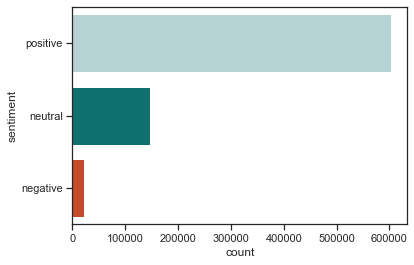

In [ ]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df_positive, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [ ]:
q = df_positive[df_positive["Review_Date"] > "1990-01-01"]


In [ ]:
print(df_positive["Review_Date"].value_counts())
print(q["Review_Date"].value_counts())


1990-01-01    6032
2019-10-28    1774
2019-08-12    1712
2019-11-04    1705
2019-07-08    1679
              ... 
2020-05-07      20
2020-05-08      19
2020-04-22      17
2019-05-18       9
2022-05-28       2
Name: Review_Date, Length: 1108, dtype: int64
2019-10-28    1774
2019-08-12    1712
2019-11-04    1705
2019-07-08    1679
2019-11-11    1665
              ... 
2020-05-07      20
2020-05-08      19
2020-04-22      17
2019-05-18       9
2022-05-28       2
Name: Review_Date, Length: 1107, dtype: int64


In [ ]:
t = pd.DataFrame()
t["number"] = df_positive["Reviewer_Origin"].value_counts()
t.reset_index(inplace=True)
print(t["number"].quantile([0.25,0.5,0.75]))
other = t[t["number"] <= 17]
other

0.25      17.00
0.50     163.00
0.75    1505.25
Name: number, dtype: float64


index  number
183   37.0      17
184  211.0      17
185   33.0      17
186   96.0      16
187  165.0      16
..     ...     ...
241  161.0       1
242  176.0       1
243  222.0       1
244  153.0       1
245   47.0       1

[63 rows x 2 columns]

In [ ]:
df_positive.columns

Index(['Hotel_Name', 'City', 'Country', 'Reviewer_Origin', 'Unit_Size',
       'Length_of_stay_nights', 'Group_Size', 'Review_Date', 'Review_Title',
       'Review_Score', 'Positive', 'num_of_people_helpful', 'text_token',
       'text_string', 'text_string_fdist', 'text_string_lem', 'neg', 'neu',
       'pos', 'compound', 'sentiment', 'City_num', 'Country_num',
       'Group_Size_num'],
      dtype='object')

In [ ]:
df_positive

Hotel_Name        City      Country  \
0        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
1        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
2        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
3        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
4        Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
...                                           ...         ...          ...   
774056  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774057  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774058  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774059  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774060  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   

        Reviewer_Origin      Unit_Size  Length_of_stay_nights     Group_Size  \
0                 202.0  Superior Room                      3  Solo traveler   
1                 206.0  Superior Room                      2  Solo traveler   
2                 177.0  Superior Room                      2  Solo traveler   
3                 100.0  Standard Room                      3          Group   
4                 236.0    Family Room                      1         Family   
...                 ...            ...                    ...            ...   
774056            127.0      Quad Room                      2          Group   
774057             58.0      Twin Room                      3          Group   
774058             13.0      Twin Room                      3         Family   
774059            220.0      Twin Room                      3         Couple   
774060            234.0      Twin Room                      2          Group   

       Review_Date                                       Review_Title  \
0       1990-01-01      Amzing views, right next to the train station   
1       2022-05-21                                         Great stay   
2       2022-05-19                                          Wonderful   
3       2022-05-19                                               Good   
4       2022-05-19  Great location. However , for what I paid , I ...   
...            ...                                                ...   
774056  2020-01-26                                          Excellent   
774057  2020-01-25                                          Very Good   
774058  2020-01-25               Basic rooms but everything we needed   
774059  2020-01-25                                               Good   
774060  2020-01-23     Good for budget travellers and to meet people.   

        Review_Score  ...                                  text_string_fdist  \
0               10.0  ...      amazing location lovely view great restaurant   
1                8.0  ...                                room location great   
2                9.0  ...  big room access coffee tea room spacious showe...   
3                7.0  ...                 breakfast great size room peaceful   
4                7.0  ...                                    breakfast great   
...              ...  ...                                                ...   
774056           8.8  ...  nice place stay center copenhagen money well s...   
774057           8.3  ...        location really fantastic good option money   
774058           8.3  ...         clean comfortable right next train station   
774059           7.0  ...               good location facilities dining room   
774060           7.0  ...  location good money rooms big enough luggage c...   

                                          text_string_lem    neg    neu  \
0           amazing location lovely view great restaurant  0.000  0.204   
1                                     room location great  0.000  0.328   
2       big room access coffee tea room spacious showe...  0.000  1.000   
3  

<AxesSubplot:>

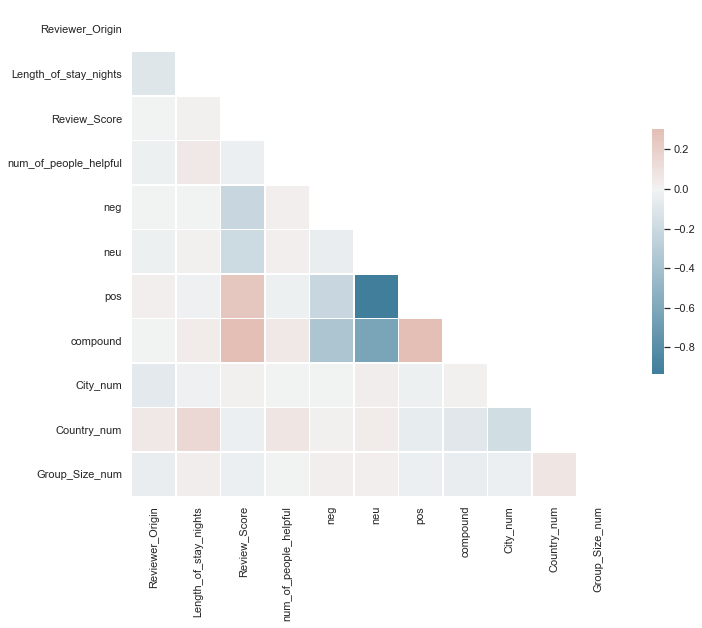

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_positive.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Lineplot

#g = sns.lineplot(x='Review_Date', y='compound', data=q, hue = "Reviewer_Origin")

#g.set(xticklabels=[]) 
#g.set(title='Sentiment of Comments')
#g.set(xlabel="Time")
#g.set(ylabel="Sentiment")
#g.tick_params(bottom=False)

#g.axhline(0, ls='--', c = 'grey');

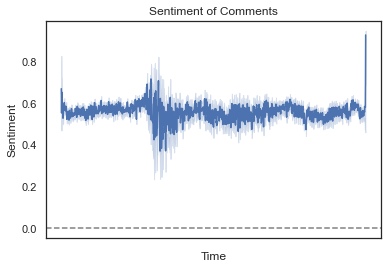

In [ ]:
# Lineplot

g = sns.lineplot(x='Review_Date', y='compound', data=q)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Comments')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

In [ ]:
reviewer_score = pd.DataFrame(df_positive["Review_Score"])
reviewer_score

Review_Score
0               10.0
1                8.0
2                9.0
3                7.0
4                7.0
...              ...
774056           8.8
774057           8.3
774058           8.3
774059           7.0
774060           7.0

[774061 rows x 1 columns]

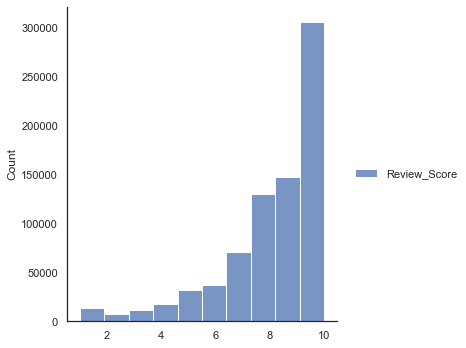

In [ ]:
# Boxplot
sns.displot(bins=10, 
            data=reviewer_score)

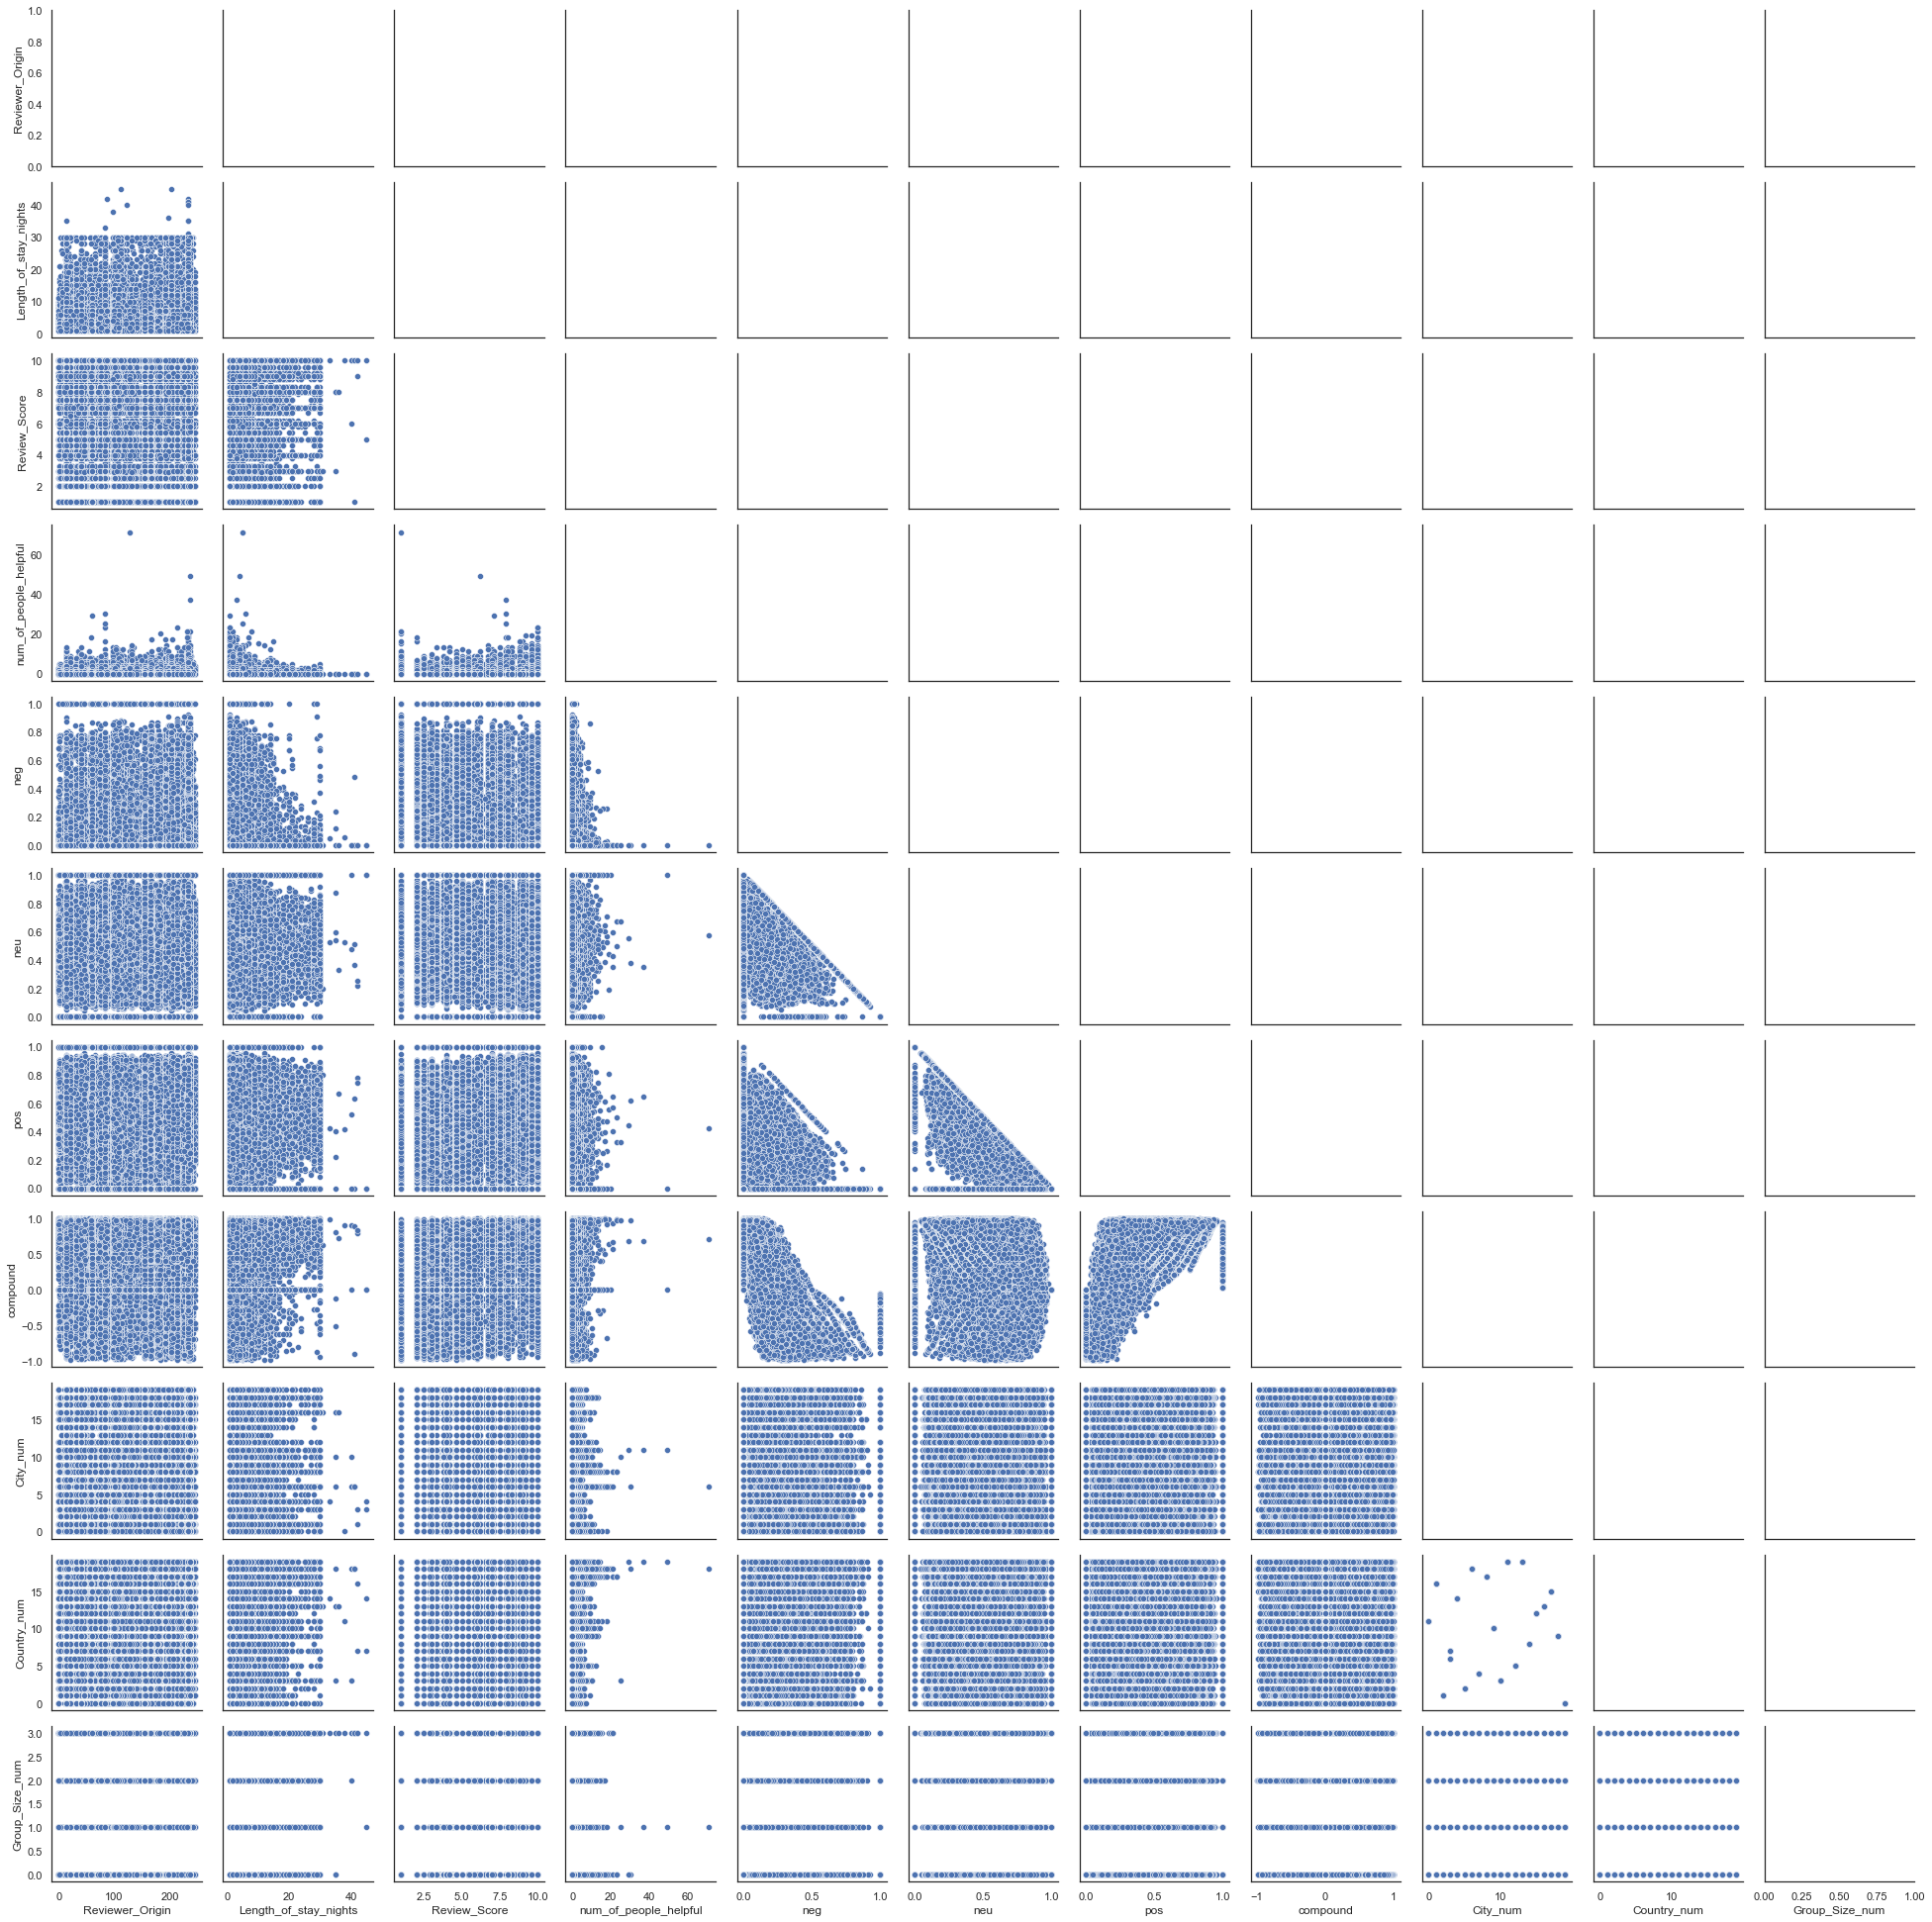

In [ ]:
g = sns.PairGrid(df_positive)
g.map_lower(sns.scatterplot)

In [ ]:
df_positive.columns

Index(['Hotel_Name', 'City', 'Country', 'Reviewer_Origin', 'Unit_Size',
       'Length_of_stay_nights', 'Group_Size', 'Review_Date', 'Review_Title',
       'Review_Score', 'Positive', 'num_of_people_helpful', 'text_token',
       'text_string', 'text_string_fdist', 'text_string_lem', 'neg', 'neu',
       'pos', 'compound', 'sentiment', 'City_num', 'Country_num',
       'Group_Size_num'],
      dtype='object')

In [ ]:
df_limited = df_positive[['Review_Score', 'sentiment', 'City_num', 'Country_num', 'Group_Size_num', "Reviewer_Origin_num"]]
df_limited

Review_Score sentiment  City_num  Country_num  Group_Size_num  \
0               10.0  positive         0           11               3   
1                8.0  positive         0           11               3   
2                9.0   neutral         0           11               3   
3                7.0  positive         0           11               2   
4                7.0  positive         0           11               1   
...              ...       ...       ...          ...             ...   
774056           8.8  positive         5            2               2   
774057           8.3  positive         5            2               2   
774058           8.3  positive         5            2               1   
774059           7.0  positive         5            2               0   
774060           7.0  positive         5            2               2   

        Reviewer_Origin_num  
0                     202.0  
1                     206.0  
2                     177.0  
3                     100.0  
4                     236.0  
...                     ...  
774056                127.0  
774057                 58.0  
774058                 13.0  
774059                220.0  
774060                234.0  

[774061 rows x 6 columns]

In [ ]:
ex = df_positive[df_positive["sentiment"] == "negative"]
ex

Hotel_Name        City      Country  \
107      Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
171      Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
186      Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
207      Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
233      Park Inn by Radisson Amsterdam City West   Amsterdam  Netherlands   
...                                           ...         ...          ...   
773667                               Tivoli Hotel  Copenhagen      Denmark   
773853  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
773934  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
773991  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   
774007  stel\nUrban House Copenhagen by MEININGER  Copenhagen      Denmark   

        Reviewer_Origin                           Unit_Size  \
107                31.0                       Standard Room   
171               236.0                       Superior Room   
186                70.0                       Superior Room   
207               182.0                       Superior Room   
233                86.0                       Standard Room   
...                 ...                                 ...   
773667            213.0            3 nights · \n\nJuly 2019   
773853            206.0  Bed in 10-Bed Mixed Dormitory Room   
773934            236.0                           Twin Room   
773991            234.0                           Twin Room   
774007            183.0                           Twin Room   

        Length_of_stay_nights     Group_Size Review_Date  \
107                         2  Solo traveler  2022-03-19   
171                         1         Couple  2021-11-15   
186                         1          Group  2021-11-01   
207                         2          Group  2021-10-03   
233                         2         Couple  2021-09-06   
...                       ...            ...         ...   
773667                      3          Group  2019-07-05   
773853                      3  Solo traveler  2021-10-21   
773934                      1  Solo traveler  2021-07-28   
773991                      6         Family  2020-07-19   
774007                      1          Group  2020-03-01   

                                      Review_Title  Review_Score  ...  \
107                                           Good           7.0  ...   
171                   If this is 8.5 what is below           7.0  ...   
186                                      Very Good           8.0  ...   
207                                           Good           7.0  ...   
233                                      Wonderful           9.0  ...   
...                                            ...           ...  ...   
773667                                        Fair           5.0  ...   
773853                                   Very Good           8.0  ...   
773934  Great location and the hotel met my needs.           8.0  ...   
773991                                   Very Good           8.0  ...   
774007                     could be better (dirty)           7.0  ...   

                                          text_string_lem    neg    neu  \
107     shower kept changing temperatures sink drain c...  0.205  0.795   
171     receptionist arrive told check people checked ...  0.228  0.772   
186     rooms bit worn look hotel administrator issue ...  0.216  0.784   
207          reception poor stuff knows nothings anything  0.383  0.617   
233     always someone reception example arrived minut...  0.077  0.923   
...                                                   ...    ...    ...   
773667        sad hotel room look like pictures real life  0.267  0.517   
773853  breakfast zone area complete mess long waiting...  0.369  0.631   
773934  breakfast good staff little unsure though firs...  0.205  0.666 

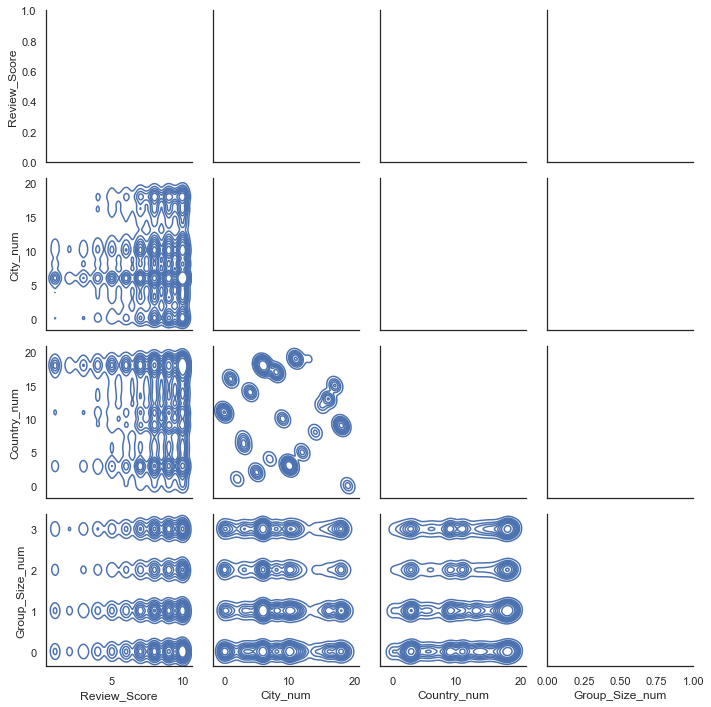

In [ ]:
g = sns.PairGrid(data = df_limited )
#g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False)

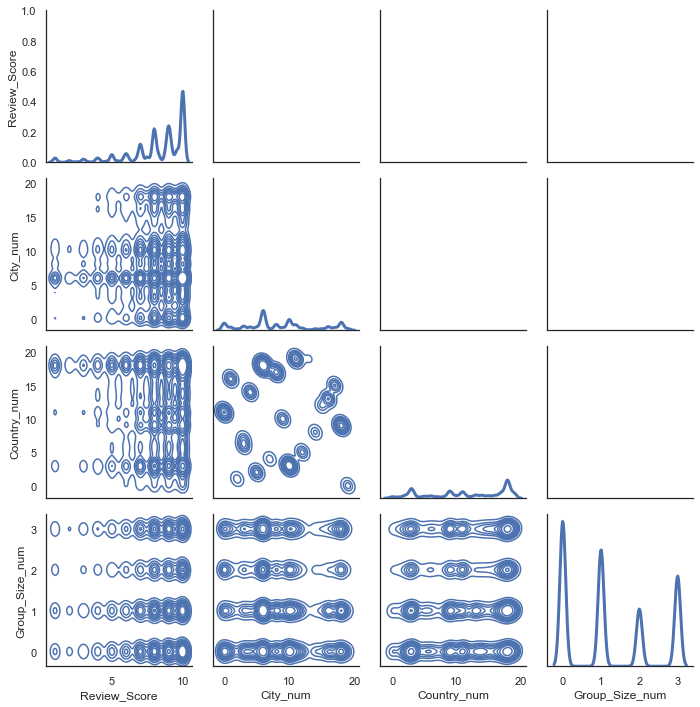

In [ ]:
g.map_diag(sns.kdeplot, lw=3, legend=False)

# AI

In [ ]:
print("tf version:",tf.__version__)

print("keras version:", keras.__version__)

tf version: 2.10.0-dev20220705
keras version: 2.10.0


In [ ]:
import lime 
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from lime import lime_tabular

In [ ]:
def normlize(text):
  remove_regex = f'[{re.escape(str.punctuation)}]'
  space_regex = '...'
  result = tf.str.lower(text)
  result = tf.str.regex_replace(result, remove_regex, '')
  result = tf.str.regex_replace(result, space_regex, ' ')
  return result

In [ ]:
vectorize_layer = TextVectorization(
  standardize="lower_and_strip_punctuation",
  output_mode='int'
  )

In [ ]:
vectorize_layer.adapt(df_positive['text_string'])

In [ ]:
df_cleaned["Review_Score"].value_counts(bins = 10, normalize = False).sort_index(ascending = False)

(9.1, 10.0]    306394
(8.2, 9.1]     147120
(7.3, 8.2]     130444
(6.4, 7.3]      70515
(5.5, 6.4]      36987
(4.6, 5.5]      29710
(3.7, 4.6]      19969
(2.8, 3.7]      11813
(1.9, 2.8]       7011
(0.99, 1.9]     14098
Name: Review_Score, dtype: int64

In [ ]:
df_cleaned["Hotel_Name"].value_counts().loc[lambda x : x>1000]


Park Plaza Westminster Bridge London                               8424
 Edison Times Square                                               4561
Resort\nAtlantis, The Palm                                         4532
TRYP by Wyndham Dubai                                              3778
Lancaster Gate Hotel                                               3778
                                                                   ... 
stel\nClinkNOORD Hostel                                            1011
Radisson Blu Edwardian Berkshire Hotel, London                     1011
iday Inn Express Singapore Clarke Quay (SG Clean), an IHG Hotel    1010
Radisson Blu Edwardian Bloomsbury Street Hotel, London             1009
citizenM New York Bowery                                           1002
Name: Hotel_Name, Length: 137, dtype: int64

In [ ]:
vect_pos = df_positive['text_string']

y_pos = df_positive["Review_Score"]

In [ ]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    vocabulary = vect_pos
    )

ValueError: The passed vocabulary has at least one repeated term. Please uniquify your dataset. The repeated terms are ['room location great', 'breakfast great', 'close train station', 'location breakfast comfortable', 'nice location', 'facilities room size', 'clean close public transport', 'excellent breakfast', 'fitness center closed', 'bright modern', 'location staff', 'close metro', 'hotel prime location', 'clean', 'location good breakfast good', 'nice clean', 'room cold', 'room lovely', 'easy parking', 'close airport terminal', 'room', 'room size', 'clean friendly staff great breakfast', 'good good', 'location restaurant', 'everything amazing', 'clean big hotel', 'area comfy bed', 'always nice stay', 'big room good breakfast', 'everything', 'nice friendly staff', 'location room size', 'interior design', 'service', 'location beautiful', 'rooms bit small', 'bed comfy', 'clean friendly staff', '', 'everything else good', 'location', 'large comfortable bed', 'air condition', 'staff friendly helpful', 'like bathroom', 'comfortable stay', 'room everything', 'clean modern room', 'clean fresh', 'good place', 'staff service amazing', 'yes', 'good clean', 'room super clean', 'staff really friendly helpful', 'get expect', 'great rooms', 'staff friendly', 'pool cold', 'everything good', 'everything nice hotel', 'clean great location', 'staff helpful clean', 'pillows uncomfortable', 'location accessibility', 'breakfast', 'great location facilities', 'nice hotel', 'breakfast fabulous', 'easy reach', 'spa facilities', 'facilities design', 'good hotel', 'review hidden meet guidelines', 'breakfast good', 'comfy bed clean room', 'good property good staff', 'everything really', 'breakfast perfect', 'amazing location clean', 'rest', 'spacious', 'bed clean', 'everythink', 'room warm', 'location cleanliness', 'room staff great', 'modern clean', 'friendly staff good breakfast', 'location calm', 'clean bright modern', 'parking', 'facilities', 'location great', 'value', 'good', 'lighting room', 'helpful staff good location', 'lovely clean', 'room clean', 'good beds', 'excellent service clean', 'hotel', 'close station', 'room comfortable clean', 'location look hotel', 'room comfortable', 'clean room', 'modern clean friendly staff', 'proximity train station', 'room location', 'facility', 'location size room', 'nice hotel clean friendly staff', 'pillow comfortable', 'excellent breakfast good location', 'okay', 'staff amazing helpful friendly', 'professionalism staff', 'clean comfortable cool', 'room good', 'comfortable bed', 'swimming pool small', 'location facilities', 'location ambience', 'hotel entrance good', 'excellent breakfast nice staff', 'everything else excellent', 'like everything hotel', 'convenient close train station', 'good location spacious room', 'location good', 'great location', 'well managed', 'friendly staff great location', 'fantastic location friendly staff', 'great location trains', 'cleanliness', 'great location near train station', 'breakfast location good', 'close public transport', 'good hotel stay', 'wellness area', 'everything else', 'location food staff cleanliness', 'great location close station', 'clean modern friendly', 'location perfect', 'clean rooms', 'location cleanliness staff', 'nice location nice staff', 'quiet', 'hotel nice comfortable', 'fine', 'location gym swimming pool', 'old clean', 'design', 'room lighting', 'stylish clean comfortable', 'staff', 'everything excellent', 'location good breakfast', 'room big', 'breakfast good location convenient', 'spacious rooms good location', 'staff helpful', 'breakfast fine', 'cleanses', 'nothing', 'good location', 'staff excellent', 'easy get', 'almost everything', 'exterior design', 'pretty', 'great location fair price', 'great staff helpful', 'spacious room', 'great location comfy beds', 'great hotel comfortable', 'bad comfortable', 'everything nice', 'services', 'absolutely perfect', 'bed comfortable staff friendly', 'beautiful hotel', 'clean comfortable', 'exceptionally friendly helpful staff', 'room decoration', 'room great', 'room amazing', 'quite', 'location great hotel beautiful', 'nohing', 'every thing', 'hotel good', 'everything perfect', 'food delicious', 'fantastic', 'absolutely nothing', 'stuff', 'definitely come back', 'hospitality', 'whole hotel', 'friendly staff', 'exactly expected', 'every thing great', 'nice place', 'personal fantastic', 'view', 'staff amazing', 'decoration service', 'locatio', 'great view nice room', 'clean fancy', 'traffic', 'near train station', 'stay', 'everthing', 'amazing location', 'facilities comfortable', 'perfect', 'casino', 'size', 'staff rude', 'brilliant location', 'location excellent hotel spotless', 'comfort bed', 'nan', 'vibrant', 'great rooms friendly staff', 'clean quiet', 'perfect place', 'room bed comfortable', 'location good close train station', 'design hotel', 'rooms clean', 'everything really nice', 'location near station', 'unfortunately nothing', 'room location breakfast', 'staff nice helpful', 'clean nice location', 'good place stay', 'clean good location', 'place beautiful', 'clean comfortable place', 'close train station friendly staff', 'bed comfortable', 'location tops', 'loved hotel', 'good location friendly staff', 'staff really nice helpful', 'close train', 'clean staff friendly', 'place good', 'great staff service', 'price really good', 'every thing good', 'mostly everything', 'great staff great room', 'drinks expensive', 'modern', 'location room size staff', 'staff helpful friendly', 'clean modern', 'beautiful design', 'breakfast good variety', 'look nice', 'staff nice', 'room friendly helpful staff', 'nice', 'liked everything', 'rooms comfy', 'architecture', 'staff friendly hotel clean', 'comfort breakfast', 'close metro station', 'modern room', 'beds pillows comfortable', 'location friendliness staff', 'staff location', 'location bed comfortable', 'bed really comfortable staff friendly', 'room modern clean comfortable', 'facilities nice', 'staff great', 'great view', 'staff extremely professional helpful', 'great location nice facilities', 'looks like new', 'good shower', 'food great', 'hotel located city center', 'city view', 'view location', 'bed good', 'everything else great', 'broken', 'staff friendly really helpful', 'staff food', 'staff extremely helpful friendly', 'room view bar', 'friendly staff clean comfortable room', 'value money', 'good restaurant', 'lovely', 'reception staff excellent', 'like room location', 'convenience', 'staff lovely helpful', 'overall good', 'room clean bed comfy', 'good size room good location', 'spacious room bathroom', 'nice room hotel', 'gym sauna', 'helpful staff', 'excellent service', 'gorgeous hotel', 'cleanliness comfort', 'location rooftop', 'liked view', 'location view facilities', 'perfect location excellent breakfast', 'room service', 'everting', 'great location excellent staff', 'everything fine', 'great location nice rooms', 'location view breakfast', 'everything clean nice', 'location great central everything', 'great location reasonable price clean', 'comfy rooms', 'new clean', 'hotel clean', 'pretty much everything great', 'clean everything need', 'best breakfast ever', 'location friendly staff', 'excellent location', 'poor breakfast', 'great location lovely staff', 'fabulous location helpful staff', 'great location nice staff', 'personal', 'food staff', 'location great breakfast nice', 'hotel location', 'customer service', 'staff big room', 'dirty', 'comfortable good location', 'water room', 'everything great', 'location amazing', 'excellent hotel', 'facilities staff amazing', 'staff outstanding friendly helpful', 'friendly staff clean great location', 'location room clean', 'location view', 'cleanness location', 'great', 'location ideal', 'fantastic hotel', 'staff facilities cleanliness', 'staff kind friendly', 'hairdryer', 'great central location friendly staff', 'amazing service', 'excellent location service', 'nice perfect location', 'lovely hotel good location', 'great location amazing view', 'perfect location', 'amazing service great location', 'everything great location staff', 'good location comfortable rooms', 'fantastic central location', 'great location kind staff', 'comfy bed', 'location comfort', 'clean centre', 'location staff service', 'staff kind good location', 'convenient location excellent', 'hotel rooms great', 'close transport shops', 'location convenience', 'room cleaning', 'fantastic location', 'clean friendly spacious', 'top ligging', 'smell toilet', 'everything hotel amazing', 'central', 'location friendly clean', 'location rooms staff', 'almost every thing', 'location staff cleanliness', 'rooms spacious clean', 'service nice', 'great location staff', 'kind people', 'honesty', 'location great room large comfortable', 'excellent friendly staff', 'excellent', 'excellent staff super clean rooms', 'location excellent', 'position', 'location staff fabulous', 'nice hotel great location', 'great concierge', 'location modern room', 'location excellent breakfast', 'location great staff friendly room clean', 'design room', 'staff friendly facilities good', 'location close central station', 'dirty room', 'location great breakfast good', 'receptionists amazing', 'location superb', 'close main station', 'good location staff', 'staff great location', 'hard bed', 'room clean location good', 'bed staff', 'location next central station', 'nice staff good location', 'clean easy reach', 'location location location', 'staff great helpful breakfast good', 'noisy room', 'confortable bed', 'good location train station', 'breakfast good location', 'cleaness', 'like location', 'near attractions', 'specious room', 'room staff good', 'smoking rooms', 'great locations', 'helpful staff great location', 'location good staff', 'perfect location nice comfy bed', 'staff amazing helpful', 'great location big rooms', 'friendly staff clean rooms', 'everything really great', 'location staff facilities', 'near station', 'environment', 'great location welcoming staff', 'property excellent', 'staff design', 'attentive staff', 'hotel perfect', 'love place', 'perfect usual', 'laid back atmosphere', 'furniture interiors nice', 'best hotel ever stayed', 'hip', 'breakfast good location good', 'atmosphere', 'clean nice staff', 'friendly stuff', 'nice new clean', 'mint', 'friendly staff excellent location', 'could better', 'everything perfect thank', 'things', 'gym', 'food drinks', 'love everything', 'service superb', 'location price', 'excellent staff', 'comfortable bed big room', 'really nice', 'staff nice helpful location good', 'cool', 'grate', 'room spacious clean location great', 'stylish lobby', 'good service', 'price quality', 'reception', 'layout', 'nice location friendly staffs', 'location next metro', 'great location lovely staff comfy bed', 'absolutely wonderful', 'decor', 'awesome facilities', 'free coffee lobby', 'great breakfast', 'everythibg', 'hotel staff caring', 'friendly helpful staff', 'welcoming staff', 'breakfast great lots options', 'great place', 'service fantastic', 'improved', 'location friendly stuff', 'outstanding service', 'free coffee', 'location hotel style', 'nice staff', 'welcoming staff location', 'details', 'friendly staff nice environment', 'well', 'location staff decoration', 'great staff', 'location close metro', 'location excellent staff friendly', 'location breakfast cleanliness', 'great location comfort', 'hotel nice clean good location', 'great location close attractions', 'great location good hotel', 'room spacious', 'great location clean friendly staff', 'super comfortable beds', 'clean professional staff', 'best location city', 'lobby location', 'high standard', 'location best', 'everything super', 'room excellent', 'location beds', 'good expected', 'location rooms breakfast', 'location clean', 'good position clean', 'cental', 'staff facilities location great', 'location cleaness', 'nice breakfast', 'friendly staff good location', 'spaciousness', 'amazing hotel', 'great stay', 'nice rooms', 'comfortable room', 'evrything', 'helpfull kind staff', 'location perfect room nice', 'enjoyed whole stay', 'location breakfast gym', 'location cleanliness comfortable bed', 'location comfort cleanliness', 'room clean spacious', 'amazing', 'good location good stuff', 'location breakfast', 'location room breakfast', 'interior nice', 'everything stayed times', 'leisure', 'friendly helpful staff great location', 'great location highly recommended', 'location service food', 'hotel clean comfortable staff friendly helpful', 'breakfast variety', 'location bar', 'location fantastic', 'every things', 'central location', 'comfy room', 'comfortable bed great breakfast', 'great position', 'best breakfast ever hotel', 'great location comfortable clean', 'room comfortable clean staff helpful', 'location clean helpful staff', 'well located', 'nice clean comfortable', 'comfy clean', 'location breakfast bed', 'location courtesy staff', 'breakfast expensive', 'every thing hotel amazing', 'dinner good', 'room spacious staff friendly helpful', 'great room good location', 'house keeping', 'location staff great', 'normal', 'superb location', 'excellent location helpful staff', 'location staff helpful', 'bed cleanness', 'location staff rooms', 'tried get kicked hotel asked room cleaned water asked drink water bathroom calling requesting water suite attack inside room hotel officials asked leave without refunding buried amount', 'room view', 'view staff', 'location great hotel staff friendly', 'room big hotels', 'staff service great', 'good location central', 'location good close everything', 'location things bad', 'good location good decoration', 'lokation', 'breakfast nice', 'good location breakfast good', 'center city', 'food nice', 'near center', 'location perfect staff friendly', 'clean well located', 'worth money', 'rooms good', 'good hotel great location', 'good location nice room', 'heated bathroom floors', 'breakfast great great location', 'location interior design', 'price expensive', 'great hospitality', 'location good staff nice helpful', 'good location friendly helpful staff', 'location room', 'comfortable beds pillows', 'excellent location friendly staff', 'comfy beds great location', 'everything needed', 'hotel location excellent', 'clean rooms comfortable bed', 'location cleaning comfort', 'nice hotel staff', 'location super', 'location staff friendly', 'bed comfortable room clean', 'big room bathroom', 'close everywhere', 'cleanliness friendly staff', 'staff friendly accommodating room clean', 'hotel lovely', 'excellent location affordable price', 'loved view room', 'great staff great location', 'close everything', 'great location staff friendly helpful', 'central close everything', 'location facility', 'friendly staff perfect location', 'helpful cheerful staff', 'bed soooo comfy', 'great location close everything', 'thanks', 'good location close everything', 'staff cleanliness location', 'excellent location great staff', 'friendly staff clean room', 'location fab', 'location fantastic staff friendly helpful', 'view location amazing', 'property great location', 'gorgeous view', 'location great central', 'location cleanliness comfortable', 'great location city center', 'great location helpful staff', 'locations', 'location central', 'loved', 'staff lovely clean', 'good nice', 'location amazing staff helpful friendly', 'really small room', 'good staff', 'close city center', 'emplacement', 'room small', 'staff welcoming friendly', 'clean rooms staff friendly', 'staff hospitable', 'exellent', 'location great value money', 'canal view', 'staff nice friendly', 'lovely hotel great location', 'location great staff friendly', 'clean lovely staff', 'brilliant', 'location great service good', 'much location', 'location comfy beds', 'clean tidy spacious', 'stayed', 'clean efficient', 'loved thank', 'location great friendly helpful staff', 'everything hotel awesome', 'liked location', 'clean friendly close everything', 'perfect location staff helpful', 'central everything', 'location good close central station', 'small room high price', 'location great room clean', 'large room comfortable bed', 'bed amazing', 'central near station', 'convenient location', 'location exceptional', 'excelent location', 'good position', 'good hotel good service', 'room nice clean', 'central clean', 'good location near station', 'excellent service location great breakfast', 'everything standard', 'staff really helpful', 'staff welcoming hotel clean', 'clean safe location', 'breakfast great staff friendly', 'comfortable rooms excellent location', 'big rooms clean', 'locatie perfect', 'good location good rooms', 'great staff quiet location', 'clean friendly', 'staff room', 'amazing staff really helpful', 'hotel quiet clean comfortable', 'shower lovely', 'great price', 'location close metro bus station', 'every thing fantastic', 'cleanliness staff', 'loved shower', 'walking distance metro', 'nice size rooms', 'shower amazing', 'room clean modern', 'clean tidy', 'clean location brilliant', 'good location nice staff', 'rooms', 'people working', 'nice styling', 'bathroom nice', 'cleaning', 'large room', 'nothing much', 'area perfect', 'favourite place stay', 'location next station', 'locations excellent', 'staff polite helpful', 'location great right next train station', 'lovely clean great location', 'clean spacious', 'close station friendly staff clean', 'excellent value location', 'location perfect clean environment', 'great breakfast location', 'good location nice room clean', 'everything except shower', 'like bed', 'clean calm', 'convenient station', 'comfy bed nice bathroom', 'clean well organized', 'clean beautiful room', 'clean staff fantastic', 'clean accommodating', 'hotel clean bed comfortable', 'cool place', 'new hotel', 'bed', 'lot facilities', 'modern hotel', 'clean modern efficient', 'location good room comfortable', 'modern nice staff', 'clean noise', 'comfortable rooms', 'good location clean rooms friendly staff', 'good location quiet place', 'clean new', 'didnt stay breakfast room', 'top', 'clean confortable', 'location handy', 'clean modern fresh', 'liked', 'breakfast included', 'breakfast basic', 'clean good staff', 'friendly staff lovely room', 'modern hotel great staff', 'room well designed', 'nice clean rooms', 'hotel clean modern', 'bed friendly staff', 'bad', 'bed really nice', 'much', 'everything spot', 'place quality', 'like friendly staff', 'staff nice friendly helpful', 'light system', 'nice people', 'great hotel nothing complain', 'lights', 'beds comfortable room clean', 'cleanliness friendliness staff', 'great place stay', 'nice looking hotel', 'ambiance cleanliness', 'good breakfast', 'cold room', 'place', 'everything great staff really friendly helpful', 'comfortable well located', 'breakfast bar', 'noisy', 'nice location clean room friendly staffs', 'room clean spacious staff helpful', 'staff good', 'location bar staff', 'overall nice place', 'really liked place', 'room staffs', 'breakfast nice bed comfortable', 'good atmosphere location', 'beautiful building', 'location environment', 'good breakfast friendly staff', 'location room nice', 'vibe', 'buffet breakfast', 'cool place stay', 'staff friendly place clean', 'ambience staff', 'good staff clean comfortable', 'breakfast good location fine', 'great atmosphere friendly staff', 'breakfast option', 'staff pleasant helpful', 'good value price', 'great location friendly staff', 'satisfied', 'beds', 'awesome', 'room unreal', 'everything else amazing', 'staff accommodating', 'checking', 'lobby restaurant', 'staff pleasant', 'room price', 'prices', 'nice clean good location', 'cozy place', 'atmosphere great', 'staff common area', 'place amazing', 'amenities', 'comfy', 'great facilities', 'staffs friendly', 'near city', 'nice building', 'lovely hotel friendly staff', 'luxury', 'room people', 'views location', 'nice hotel friendly helpful staff', 'clean location perfect', 'staff reception great', 'spa amazing', 'beautiful property great location', 'service impeccable', 'friendly supportive staff', 'kamer', 'great service location', 'staff incredibly helpful', 'bed perfect', 'room nice clean comfortable', 'everything including breakfast', 'food', 'room decor', 'spa', 'spa beautiful', 'everything great hotel', 'friendly staff comfortable', 'location nice', 'best bed ever slept', 'comfortable rooms good location', 'location quiet room', 'rooms nice staff friendly', 'great view great staff', 'swimming pool great', 'nice clean everything needed', 'fantastic reception staff', 'kind staffs', 'staff kindness', 'beautiful ambience', 'clean comfortable luxurious', 'nothing really', 'bed room', 'staff friendly breakfast delicious', 'bathtub', 'room comfy', 'location staff members', 'situation hotel', 'nice room', 'nice hotel facilities', 'clean place good location', 'beautiful building good location', 'wonderful staff', 'location nice rooms', 'helpfull staff', 'beautiful room', 'reception service', 'beds cleaning', 'rooms clean comfortable', 'clean friendly staff comfortable', 'locatie', 'clean comfortable great location', 'check early', 'comfortable bed good location', 'friendly clean', 'location ambiance', 'staff location cleanliness', 'great beds', 'great location clean', 'best', 'location staff awesome', 'close park', 'great location perfect', 'everything except', 'espresso', 'staff friendly nice', 'really like location', 'location friendly helpful staff', 'location great rooms comfortable', 'excellent breakfast good value money', 'nice atmosphere clean', 'location good staff helpful nice', 'great bed location', 'clean safe', 'cleanliness location', 'clean close center', 'staff kind helpful location perfect', 'location food', 'location convenient', 'good location great breakfast', 'common areas', 'comfortable bed location', 'good location great atmosphere', 'location okay', 'great location super friendly staff', 'family', 'nice lobby', 'nice staff place clean', 'great location friendly atmosphere', 'location awsome', 'room clean staff helpful friendly', 'really nice place', 'location great breakfast great', 'close train airport', 'easy access', 'coffee machine', 'nice view', 'great location view', 'location view room size', 'bubble bath', 'view room amazing', 'staff extremely friendly', 'awesome experience', 'clean good value money good breakfast', 'comfort view', 'lovely place', 'bed soft', 'breakfast really good', 'everything especially location', 'everything nice comfortable', 'area', 'view lovely', 'location nice view', 'love', 'view great', 'room location staff', 'room good view', 'going', 'quite room', 'situation staff', 'shower', 'view room', 'everything everything perfect', 'breakfast superb room comfortable', 'nice quiet place', 'super hotel', 'bed great room clean', 'technology', 'polite staff', 'room review', 'friendly reception', 'free minibar', 'upgrade free', 'room hotel staff', 'rooms comfortable', 'everything good hotel', 'style location', 'friendliness staff', 'location clean rooms breakfast', 'good new hotel', 'quirky', 'great location staff helpful friendly', 'breakfast awesome', 'good location lovely rooms', 'location modern clean', 'stuff friendly helpful', 'staff really best', 'location value money', 'excellent stay', 'location views', 'check took long', 'beautiful interior', 'great value', 'great hotel', 'breakfast buffet', 'location breakfast friendly staff', 'everything fantastic', 'cleanliness staff breakfast', 'team', 'location staff superb', 'excellent location comfortable room', 'furniture', 'bath', 'design location', 'room nice', 'amazing view', 'breakfast spread great', 'location close rai', 'good location close metro', 'friendly staff nice location', 'went well', 'beds pillows staff', 'quiet room comfortable', 'room wonderfull', 'nothing dislike', 'location staff best', 'location decor', 'great location good value money', 'beds really comfy', 'park', 'location design', 'great service', 'friendly staff nice rooms', 'location park', 'refrigerator', 'location staffing', 'location hotel clean', 'room design location', 'comfortable', 'absolutely everything perfect', 'staff excellent helpful', 'bed super comfy', 'staffs really helpful friendly', 'great location helpful staff comfortable rooms', 'lovely hotel setting', 'nice location perfect', 'fabulous location', 'nice area', 'loved location', 'wifi work', 'room hotel clean', 'location staff decor', 'bed excellent', 'food superb', 'nice place stay good location', 'lovely big room', 'never breakfast', 'super friendly staff', 'nice location staff great', 'location concierge', 'location staff really friendly helpful', 'good location kind staff', 'location breakfast good', 'mattress good', 'breakfast seemed expensive', 'location room view', 'breakfast location great', 'excellent breakfast staff', 'breakfast fantastic', 'location amenities', 'breakfast great bed comfortable', 'nice property', 'alles', 'location view sky bar', 'location sauna', 'great location nice staff nice room', 'sky lounge', 'cookies', 'great time', 'liked location hotel', 'location facilities hotel', 'really comfy beds', 'location cleanliness bed comfort', 'nearly everything', 'great location nice size rooms', 'everything went well', 'cookies arrival', 'staff helpful location', 'breakfast excellent', 'breakfast clean room', 'view amazing', 'bed noisy', 'staff accomodating', 'comfortable beds', 'location staff attitude', 'views location superb', 'facilities location great', 'everything great lovely breakfast', 'location service', 'service excellent friendly staff', 'friendly staff location', 'good hotel good location', 'friendly attentive staff', 'staff professional', 'location amazing staff super nice', 'location good staff nice', 'view excellent', 'convenient', 'staff friendly location great', 'location staff super friendly', 'stuff friendly', 'comfort', 'location facilities staff', 'location everything', 'leaving hotel', 'easy transportation', 'location excellent customer service', 'superb breakfast', 'location views room', 'room breakfast', 'breakfast price', 'location comfort room', 'near central station', 'great location good breakfast', 'great location quality hotel', 'restaurants lobby', 'close centre', 'best location', 'great location friendly helpful staff', 'location gym', 'rooftop', 'great location near central train station', 'location coffee', 'quiet clean good location', 'breakfast free', 'staff absolutely amazing', 'great location great value money friendly staff', 'clean place', 'breakfast delicious staff friendly helpful', 'location easy check', 'clean room good breakfast', 'design comfort', 'nice hotel nice staff', 'great vibe', 'room could cleaner', 'coffee shop location', 'spacious rooms', 'staff friendly rooms spacious', 'beds comfy', 'comfortable great location', 'staff helpful friendly breakfast excellent', 'rooms nice clean', 'location privacy', 'room clean comfortable', 'staff helpful clean spacious rooms', 'good location good room', 'clean beds', 'property clean good location', 'nice breakfast comfortable bed', 'great bed bathroom', 'breakfast cleanliness', 'breakfast sensational', 'extremely comfortable', 'location concept', 'clean nice room', 'great location easy check', 'good location clean friendly staff', 'get', 'location friendliness', 'nice hostel', 'quick check check', 'fun vibe', 'little expensive', 'loved stay', 'clean comfortable room', 'bar restaurant', 'place view', 'air conditioner', 'room facilities', 'staff friendly helpful room nice clean', 'staff friendly good breakfast', 'clean comfortable good location friendly staff', 'breakfast reception', 'good food service', 'clean nice facilities', 'nice clean hotel', 'cleanliness comfort location', 'clean hospitable staff', 'good round', 'excellent value money', 'really good breakfast', 'staff helpfull', 'good breakfast plenty choice', 'reception team', 'hotel clean staff pleasant', 'little cold room', 'wonderful hospitality', 'good hotel nice staff', 'amazing staff', 'location hotel', 'excellent customer service friendly staff', 'whole experience', 'expensive worth money', 'good location quiet clean', 'staff customer service', 'staff lovely', 'restaurant location', 'parking way expensive', 'bed extra comfy', 'lovely staff', 'easy access city', 'expensive breakfast', 'comfy spacious rooms', 'tidy', 'breakfast comfortable bed', 'great hotel great staff', 'exceptionally friendly staff', 'staff facilities room', 'clean room bed', 'bed big comfy', 'everything staff lovely', 'nice hotel nice rooms', 'design great', 'price', 'decoration location', 'staff rooms nice', 'experience', 'nice atmosphere', 'good service nice rooms', 'upgrade', '100', 'large beds', 'bed really comfortable', 'environmental', 'hotel awesome', 'cool atmosphere', 'fantastic experience', 'bed nice', 'lobby nice', 'breakfast staff', 'clean staff nice', 'location bars', 'staff friendly helpfull', 'staf lounge', 'exit', 'close tram', 'breakfast best', 'good location reasonably priced', 'didnt breakfast', 'lighting', 'comfy bed nice room', 'hotel lovely clean', 'cool rooms', 'beds breakfast', 'brand new facility', 'rooms spacious', 'sauna nice', 'view comfort', 'comfy beds', 'late check', 'excellent facilities', 'loved place', 'room spacious modern clean', 'noise construction site', 'view city', 'clean modern good location', 'great hotel great location', 'little', 'vista', 'excellent hotel good location', 'clean rooms nice staff', 'amazing views', 'hot tub sauna room amazing', 'decor staff', 'structure', 'decor interesting', 'spa room amazing', 'posh', 'relaxing', 'nice room facilities', 'good breakfast nice hotel', 'clean room nice view', 'everything immaculate', 'everything point', 'stylish', 'every perfect', 'clean comfortable staff friendly', 'surrounding area', 'pool', 'lovely staff beautiful hotel', 'clean staff helpful', 'location friendly staff clean', 'facilities good', 'location quiet clean', 'breakfast could better', 'fairly central', 'friendly staff good customer service', 'welcoming', 'staff cleanliness', 'location breakfast staff', 'staff kind accommodating', 'stuff nice helpful', 'clean staff helpful friendly', 'beautiful clean rooms', 'great location breakfast good', 'location room facilities', 'cost', 'staff polite', 'everything satisfactory', 'room clean comfy', 'close everything wanted', 'good value good location', 'excellent facilities friendly staff', 'great location clean staff lovely', 'clean helpful staff', 'staff location rooms', 'modern style', 'customer service excellent', 'good location amazing breakfast', 'clean room helpful staff', 'location good staff friendly helpful rooms clean', 'good breakfast location', 'breakfast excellent staff helpful friendly', 'pleasant stay', 'people', 'decent location', 'breakfast okay', 'view nice', 'hotel staff friendly', 'everything needed stay', 'location canal view', 'clean pleasant staff', 'mini fridge room', 'breakfast simple', 'polite friendly staff good location', 'like everything', 'breakfast room', 'excellent location good staff', 'location luxury', 'clean comfortable professional', 'location nice facilities', 'clean updated', 'everything else perfect', 'breakfast hot', 'hotel nice clean', 'nice professional staff', 'rooms nice', 'location clean staff helpful', 'staff attentive', 'everything stay amazing', 'good experience', 'breakfast first class', 'helpful friendly staff', 'hotel staff exceptional', 'quite clean', 'good buffet breakfast', 'clean comfortable beds', 'far town', 'good selection', 'nice room good breakfast', 'comfortable big room', 'large room good breakfast', 'really nice room', 'mattress comfortable', 'service food', 'room staff', 'nice clean modern', 'breakfast rooms', 'leave hotel', 'room big clean', 'really nice friendly staff', 'restaurant food good', 'breakfast priced', 'hotel facilities', 'staff enthusiastic', 'back soon', 'big comfortable room', 'room clean staff helpful', 'quiet rooms', 'comfort stay', 'located', 'room service great', 'nice view window', 'location good room spacious', 'staff nice location good', 'modern clean spacious', 'room size shower', 'food spa excellent', 'buffet', 'nice design', 'really nice hotel', 'nice everything', 'futuristic', 'views breakfast', 'authentic design', 'place room', 'beds pillows', 'cleanliness quiet', 'quite place', 'hotel room', 'free wifi', 'unique design', 'great architecture', 'friendly staff clean place', 'nice bar', 'location good visit', 'bar', 'close office', 'location quietness', 'liked shower', 'views great', 'room restaurant', 'smoking area', 'different', 'bar good', 'nothing particular', 'great location central', 'staff brilliant', 'brilliant location helpful staff', 'super friendly staff great location', 'excellent location reasonably priced', 'close station nice staff', 'simple clean room', 'clean perfect location', 'great location comfortable room', 'central city', 'comfy bed great location', 'roomy', 'lovely good location', 'easy fast check', 'location great bed comfortable', 'nothing report', 'good location excellent staff', 'minibar', 'like location property', 'good staff great location', 'location staff professional', 'location near amsterdam central station', 'location breakfast staff cleanliness', 'close every', 'breakfast good location perfect', 'beds comfortable', 'location amazing breakfast good', 'hotel location good', 'staff friendly polite', 'location good staff friendly', 'location bed', 'breakfast decent', 'great breakfast fantastic location', 'hotel clean staff helpful', 'perfect location helpful staff', 'good thing location', 'great location great service', 'location easily accessible', 'location location', 'staff breakfast', 'breackfast', 'every thing nice', 'best location amsterdam', 'average', 'location good breakfast nice', 'beds comfy staff friendly', 'everything central', 'staff great helpful', 'location helpful friendly staff', 'location good staff friendly helpful', 'great location great breakfast friendly staff', 'excellent location great helpful staff', 'clean friendly staff great location', 'location personal', 'nice breakfast staff', 'good breakfast excellent staff', 'near centrum', 'good selection breakfast', 'good location nice breakfast', 'pleasantly surprised', 'clean location excellent', 'good location helpful staff', 'room quiet', 'location good breakfast excellent', 'staff helpful great location', 'location close city centre', 'eat breakfast', 'locatiom', 'good breakfast excellent location', 'location excellent staff friendly helpful', 'clean room comfy bed', 'beds perfect', 'loved everything', 'location lobby restaurant', 'fridge room work', 'breakfast staff bed', 'nice quiet location', 'perfect location lovely breakfast', 'reception staff friendly helpful', 'location cleanliness good', 'close trainstation', 'check staff friendly', 'clean good rooms', 'location staff excellent', 'quiet comfortable', 'breakfast location staff', 'comfortable bed good breakfast friendly staff', 'breakfast staff location excellent', 'free upgrade room', 'breakfast excellent location good', 'easy check', 'fabulous', 'comfortable beds friendly staff', 'nice place friendly staff', 'small room', 'small room price', 'clean good breakfast', 'hotel clean staff friendly', 'beds super comfy', 'booking', 'staff helpful friendly good location', 'good location self check', 'good location clean', 'really good', 'good location clean rooms', 'lovely spacious room', 'clean staff nice helpful', 'nice clean friendly staff', 'clean great breakfast', 'staff reception area', 'stylish clean', 'beautiful location', 'good location quiet area', 'restaurant', 'ambiance', 'restaurant great staff friendly', 'view staff cleanliness', 'brand new hotel', 'room great staff awesome', 'come back', 'nice place staff', 'staff really lovely', 'staff friendly room clean modern', 'room clean balcony', 'pretty much everything', 'excelent', 'nice place stay', 'close friends house', 'everything superb', 'highly recommended', 'friendly helpful staff comfortable rooms', 'overall good hotel', 'interior', 'pillows terrible', 'excellent always', 'great staff friendly', 'professional staff', 'really friendly staff', 'excellent staff friendly helpful', 'public parking', 'fresh modern', 'good location interesting design', 'near transportation', 'small rooms', 'design location friendly staff', 'quirky hotel', 'great customer service staff', 'everything except breakfast', 'shower bed', 'price bit expensive', 'bed super comfortable room clean', 'would stay', 'location modern facilities', 'staff friendly hotel nice', 'convenience comfort', 'amazing staff helpful friendly', 'service staff', 'cozy', 'facilities room', 'excellent hospitality', 'everything brilliant', 'clean great staff', 'stuff amazing', 'bed comfy service excellent', 'good breakfast great staff', 'bed big enough comfortable', 'breakfast limited choices', 'staff fantastic', 'good nice staff', 'location space', 'hotel beautiful', 'fantastic hotel great location', 'location architecture', 'great location nice breakfast', 'spacious comfortable room', 'great location great rooms', 'location staff amazing', 'checking smooth', 'hotel cool', 'location ambience staff', 'modern good design', 'facilities cleanliness', 'room bit noisy', 'beautiful garden', 'design location staff', 'nothing waste money', 'super location', 'breakfast good lots choice', 'good bed', 'clean comfortable friendly staff', 'kind helpful', 'breakfast good choice', 'setting', 'walking distance center', 'beds pillows comfy', 'modern hotel good location', 'staff kind helpful', 'room size comfort', 'comfortable bed clean', 'tea coffee making facilities', 'modern comfy', 'modern good location', 'clean excellent location', 'room good clean comfortable', 'great location staff brilliant', 'everything excellent thanks', 'hotel modern stylish', 'friendly staff clean hotel good location', 'great hotel excellent location', 'nice modern hotel friendly staff', 'clean quiet great location', 'good location clean tidy', 'lovely modern hotel', 'check', 'new clean rooms', 'location style', 'great location lovely room friendly staff', 'great location clean hotel', 'tea coffee room', 'stylish good location', 'great location value money', 'bar room', 'breakfast wonderful location perfect', 'location superb room clean', 'room bit small', 'bed comfortable shower excellent', 'clean hotel', 'clean rooms comfy beds', 'confortable clean', 'room cleanliness staff', 'staff friendliness location', 'friendly efficient staff', 'location cleanliness decor', 'phone room', 'localisation', 'location great rooms clean comfortable', 'room small comfortable', 'comfort room location', 'kettle room', 'elegant', 'clean good location lovely staff', 'easy check check', 'location staff dog friendly', 'great staff location clean', 'staff facilities excellent', 'hotel comfortable staff helpful friendly', 'good enough', 'great bed', 'good location breakfast', 'clean room great location', 'location stuff', 'price location great', 'excellent location good value money', 'good location comfortable', 'staff really good', 'excellent breakfast friendly helpful staff great location', 'location great close city centre', 'breakfast nice staff friendly', 'receptionist nice', 'location free breakfast', 'good location good staff', 'great location clean staff friendly helpful', 'beautiful', 'super central', 'breakfast amazing', 'location great staff helpful', 'staff nice attentive', 'location awesome', 'friendly staff clean rooms great location', 'customer service great', 'location staff breakfast', 'bathrooms small', 'staff breakfast location good', 'clean lovely', 'loved everything stay', 'nice staff everything clean', 'great better expected', 'staff helpful location great', 'comfortable bed clean good location', 'polite staff clean hotel metro station away rai', 'facilities great', 'modern good facilities', 'location parking space', 'convenient location friendly staff clean hotel', 'nice room friendly staff', 'facilities location', 'fantastic staff', 'everything hotel perfect', 'great room breakfast', 'room hotel nice clean', 'staffs nice helpful', 'bed really comfy', 'quiet clean', 'staff service', 'good location good breakfast', 'soap', 'view hotel', 'excellent helpful friendly staff', 'location staff food', 'friendly helpful personnel', 'property new', 'bed super comfortable', 'fab', 'friendly staff attentive', 'location price comfort', 'staff incredibly friendly helpful', 'everything especially staff', 'reception restaurant', 'fast check process', 'bed sauna breakfast', 'friendly staff great location comfortable room', 'bed comfortable shower good', 'room big nice', 'staff super nice', 'staff efficient helpful', 'clean comfortable relaxing', 'great room great staff', 'decor pleasant', 'silent clean', 'stuff welcoming', 'breakfast excellent rooms comfortable', 'perfect breakfast', 'amazing friendly staff', 'mattress soft', 'okay night', 'spacious clean', 'nice staff breakfast', 'service amazing', 'friendly staff always helpful', 'like', 'excellent location super friendly staff', 'helpful staff good breakfast', 'gym equipment', 'clean rooms good breakfast', 'friendliness staffs', 'location good room clean', 'breakfast wonderful', 'staff nice helpful great location', 'location great breakfast good well', 'location great staff friendly helpful', 'modern cool decor', 'room location breakfast great', 'beautiful hotel great location', 'buffet excellent', 'comfy beds nice breakfast', 'location staffs nice helpful', 'accessible', 'comfy beds nice staff', 'friendly staff excellent facilities', 'modern design comfortable bed', 'cool design', 'excellent location good facilities', 'clean spacious central', 'location great staff friendly accommodating', 'bed comfy cosy', 'perfect location clean friendly staff', 'clean room friendly helpful staff good location', 'location design staff', 'staff friendly hotel lovely', 'try', 'friendly staff comfortable bed great location', 'hotel nice', 'best bed ever', 'free bikes', 'beds comfortable great location', 'didnt breakfast hotel', 'breakfast excellent staff helpful', 'stunning', 'really wonderful', 'clean location', 'bed mattress', 'staff kind', 'location decent', 'room space', 'lobby', 'hotel design', 'room perfect', 'space', 'location lobby design', 'clean chic', 'close railway station', 'staff room facilities', 'clean room friendly staff', 'size room', 'everything clean', 'helpful professional staff', 'nice staff great breakfast', 'free parking', 'location price value', 'make reservation booking acc paid price rooms one room zurich bigger room athens sorry injustice guys need upgrade rooms second problem rooms cold open heating highest level still cold', 'good location friendly staff spacious room', 'nice clean staff friendly', 'good price friendly staff', 'good breakfast cleanliness', 'room clean staff friendly helpful', 'nice staff clean rooms', 'location property', 'clean facilities friendly staff', 'clean good place', 'clean friendly helpful staff', 'breakfast location fine', 'sheets clean', 'location staff really nice', 'staff service really good', 'parking included', 'great breakfast selection', 'staff friendly willing help', 'far city center', 'concept', 'jacuzzi', 'rooftop bar', 'clean comfortable good price', 'great atmosphere', 'great staff great location good price', 'lively clean', 'location room facilities great', 'clean good location friendly staff', 'design cool', 'lovely hotel', 'building location', 'staff reception', 'hot tub sauna', 'rooftop restaurant', 'funky design', 'fab hotel', 'room view awesome', 'roof terrace', 'nice staff location', 'modern design', 'excellent location spacious room', 'comfortable clean', 'efficient service', 'available', 'excellent location breakfast', 'location great wanted', 'door bathroom', 'location train station', 'good ambience', 'friendly personell', 'courteous staff', 'hotel staff courteous', 'great bed shower', 'sparkling clean', 'non', 'good location clean facilities', 'like service', 'staff exceptionally friendly', 'localization', 'top location', 'bed comfy staff helpful', 'price location staff', 'big bed comfortable', 'good atmosphere', 'staff extremely helpful polite', 'fantastic hospitality', 'comfiest bed ever', 'location comfortable beds', 'air conditioner work', 'noise', 'anything', 'breakfast terrible', 'cleaninless', 'clean room comfortable bed friendly staff', 'decent hotel room', 'bed comfortable shower great', 'clean tidy staff friendly', 'next metro station', 'location breakfast room', 'excellent service reception', 'great location friendly staff clean', 'great staff location', 'location nice staff friendly', 'bed bathroom location', 'great location nice interior', 'eveything', 'ligging', 'location room price', 'nice staff nice hotel', 'modern clean good location', 'good stay', 'bathroom', 'close centrum', 'staff friendly professional', 'city', 'room window', 'clean comfy', 'tiny room', 'location great room great', 'clean friendly staff good breakfast', 'great location clean room nice staff', 'location excellent breakfasts', 'great location clean comfortable', 'great hotel friendly staff', 'location brilliant', 'nice rooms great location', 'staff friendly good location', 'great location really friendly staff', 'far centre', 'amazing staff amazing location', 'great location helpful stuff', 'staff wonderful helpful', 'central location clean', 'breakfast fantastic location perfect', 'bed comfy breakfast nice', 'location friendly staff breakfast', 'staff location breakfast', 'location fine', 'staff reception helpful', 'central amazing staff', 'loved breakfast', 'pretty good', 'comfy room great location', 'perfect location helpful friendly staff', 'everything satisfaction', 'guud', 'staff great friendly', 'view window', 'breakfast amazing location', 'breakfast good location excellent', 'location helpful staff', 'staff excellent helpful polite', 'great location clean staff helpful', 'near everything', 'perfect needed', 'staff friendly accommodating', 'take breakfast', 'location cleanliness service', 'close everything walking distance', 'rooms lovely', 'position hotel', 'staff perfect', 'close centre town', 'service friendly', 'bathroom fine', 'location best thing hotel', 'security location', 'great location staff good', 'location cozy', 'wifi stable', 'great location staff polite', 'applicable', 'breakfast good expensive', 'close city centre', 'great hotel friendly staff great location', 'decor amazing', 'everything great including staff', 'location perfect friendly staff', 'breakfast staff room', 'room rather small', 'great breakfest', 'tasty breakfast', 'everything perfect start finish', 'room design', 'beds location', 'staff friendly rooms clean', 'friendly good location', 'perfect location friendly staff', 'room nice design', 'lovely staff great location', 'great location great staff', 'great location price', 'nice room good location helpful staff', 'loction', 'good nice location', 'good location service', 'location good bed', 'good overall experience', 'helpful friendly staff good location', 'bed comfortable location perfect', 'huge bed', 'good value great location', 'clean furniture location', 'friendly staffs', 'breakfast good staff helpful', 'reception staff', 'central comfortable bed', 'good facilities good location', 'location amazing staff friendly helpful', 'like locations', 'eat hotel', 'location services', 'location wonderful', 'simple breakfast', 'close city', 'great location friendly stuff', 'staff friendly location good', 'location friendly staff comfy bed', 'location room size clean', 'check easy', 'staff nice rooms clean', 'bed quiet', 'spacious room clean', 'good location close metro station', 'car park', 'good location good', 'good nice hotel', 'customer service good', 'room clean staff kind', 'clean spacious friendly staff', 'design room good', 'everything good thank', 'everything best hotel', 'peaceful', 'parking facilities', 'staff good helpful', 'location close metro station', 'within walking distance train station', 'place clean', 'far metro', 'bad price', 'none', 'amazing breakfast', 'location bad', 'personnel great', 'dinner', 'staff nice room clean', 'rest good', 'room exceptionally clean', 'exactly like pictures', 'spacious room friendly staff', 'rooms great', 'staff location clean', 'nice staff good breakfast', 'terrace', 'service excellent', 'stay wonderful', 'decoration', 'superb', 'set room', 'ambience location', 'service cleanliness', 'room space comfort', 'location great helpful staff', 'nice staff nice atmosphere', 'nice common area', 'rooms exceptional', 'excellent service staff', 'hotel nice staff friendly', 'everything perfect hotel', 'everything lovely', 'interior design staff attention', 'comfortable friendly', 'nice clean new hotel', 'room beautiful comfortable', 'trendy', 'new modern clean', 'clean stylish', 'bike rental', 'really clean modern', 'nice vibe', 'amazing bed', 'bedroom', 'nice room staff friendly', 'design clean', 'comfort rooms', 'good location near subway station', 'super comfy bed', 'interiors amazing', 'bed pillows comfortable', 'location parking', 'could cleaner', 'bit noisy', 'decor ambiance', 'location big room', 'staff super helpful friendly', 'staff extremely friendly helpful', 'location breakfast amazing', 'fabulous hotel', 'location wow', 'service staff excellent', 'clean quite', 'big comfortable bed', 'location kindness professionalism staff', 'complaints whatsoever', 'hotel amazing', 'everything top', 'location near train station', 'friendly knowledgeable staff', 'fantastic location nice staff', 'clean good facilities excellent location', 'extremely friendly staff', 'great location nice amenities', 'staff excellent food good', 'location staff comfortable', 'facilities excellent', 'staff wonderful', 'staff wonderful location great', 'hotel well located', 'room style size comfort', 'location breakfast excellent', 'great location great breakfast', 'location food friendly staff', 'location nice staff nice', 'location decent breakfast', 'great location large room', 'location excellent room big comfortable', 'reception concierge staff friendly helpful', 'expected', 'nice stay', 'location clean comfortable', 'location staff accommodation', 'really enjoyed stay', 'comfortable affordable', 'better breakfast', 'nice room nice view', 'comfortable bed excellent breakfast', 'view balcony', 'staff exceptional', 'front desk staff', 'central comfortable', 'super friendly helpful staff', 'staff great welcoming', 'good rooms', 'bathroom bath', 'decent breakfast', 'friendly helpful staff nice location', 'good usual', 'always perfect', 'neat clean', 'lovely room great breakfast', 'room clean location great', 'spacious rooms clean', 'room self', 'accessible convenient', 'like room', 'location perfect staff friendly helpful', 'great location value', 'personnel', 'good welcoming', 'location hotel excellent', 'loved hotel staff', 'location cleanliness staff great', 'helpful personnel', 'well located clean', 'great central location', 'great location clean helpful staff', 'cleanliness room', 'clean close everything', 'close central station', 'position room', 'good location price reasonable', 'large shower', 'nice location staff breakfast', 'clean rooms friendly staff', 'location really good', 'breakfast joke', 'location shower', 'beds comfy rooms clean', 'location staff nice', 'value money location', 'location cleanliness helpful staff', 'lot', 'staff friendly bed comfortable', 'location cleanliness friendly staff', 'central good value money', 'clean modern great location', 'location close train station', 'excellent location staff helpful', 'waffles', 'location quite central', 'location hotel good', 'close train station convenient', 'good value', 'great location staff great', 'location rooms clean', 'comfy bed clean', 'clean nice breakfast', 'clean room good bed', 'good clean hotel', 'good location lovely views', 'location bit far city centre', 'big room', 'location clean rooms', 'good location nice rooms', 'breakfast good staff polite', 'nice one', 'lovely room great view', 'clean room spacious', 'location food good', 'everything amazing especially staff', 'staff support', 'location view amazing', 'bed great', 'nothing special', 'view good', 'leaving', 'nice view room', 'location great breakfast', 'average hotel', 'good facilities', 'food location', 'good view', 'felt luxurious', 'excellent location clean rooms', 'staff really kind helpful', 'room spacious bed comfortable', 'bikes available', 'room comfortable location good', 'rooftop terrace', 'comfortable quiet room', 'view perfect', 'good environment', 'friendly staff ideal location', 'everything hotel', 'room really nice', 'lifts', 'size room comfortable bed', 'hotel fabulous', 'liked location breakfast', 'location good view', 'clean modern hotel', 'great staff clean comfortable rooms', 'organized clean', 'room specious', 'clean nice helpful staff', 'location breakfast facilities', 'beautiful view city', 'rooms view', 'position cleanliness', 'clean comfortable spacious', 'brekfast', 'room view staff breakfast', 'beautiful hotel friendly staff', 'friendly helpfull staff', 'expectations', 'like view', 'everything place great', 'employees', 'location overall cleanliness', 'liked breakfast', 'roof top view', 'lovely views', 'exceptional service friendly staff', 'silence', 'staff exceptionally helpful friendly', 'price location', 'views', 'view rooftop', 'every thing perfect', 'clean easy find good location', 'location services design', 'nice view good breakfast', 'good location excellent services', 'view park', 'alles perfect', 'breakfast great location perfect', 'clean modern loved', 'booking com', 'greetings would like thank staff hotel wonderful hospitality everything done thanks best trip ever hotel best perfect thank', 'colour scheme', 'location efficiency staff', 'bed sleep', 'good location nicely decorated', 'pillows breakfast', 'smart modern', 'windows open', 'great food', 'good location staff friendly', 'good location great view', 'expensive', 'nice quiet', 'staff service location', 'location good staff helpful', 'small double bed', 'breakfast location', 'good location good price', 'good staff cleanliness', 'staff friendly everything clean', 'clean cozy', 'good room', 'clean quiet staff helpful', 'liked room', 'comfort value money', 'overall experience nice', 'room hotel breakfast', 'comfortable bed pillows', 'clean hotel friendly staff', 'clean close metro station', 'easy find near metro', 'liked breakfast location hotel', 'breakfast good room clean comfortable', 'room clean neat', 'lovely room great location', 'nice clean close metro', 'super clean staff helpful', 'cost room', 'easily reachable metro', 'location great friendly staff', 'overall ambience', 'smoking room', 'breakfast staff amazing', 'mini bar room', 'bed small', 'good breakfast comfortable', 'location close needed', 'cheap', 'room location breakfast good', 'nothing complain', 'hotel breakfast excellent', 'break fast', 'clean nice', 'excellent service around', 'everything perfect complaints', 'close metro station supermarket', 'location close train station great', 'nice big room', 'clean well placed', 'views room great', 'tout', 'great experience', 'great location close public transport', 'staff helpful location excellent', 'helpful staff clean room', 'good breakfast good location clean', 'affordable price nice staff', 'clean simple', 'close location', 'clean good value money', 'close station clean comfortable', 'toilet brush', 'location clean quite', 'coffee room', 'great location close metro', 'staff nice helpful room clean breakfast good', 'propreté', 'overall feel', 'breakfast good staff friendly', 'building', 'bathroom amazing', 'clean convenient', 'bar staff', 'venue', 'good location fair price', 'great room great location', 'nice location neighbourhood', 'friendly staff lovely hotel', 'location decor amazing', 'clean staff excellent', 'room breakfast amazing', 'location name', 'great location great value money', 'location interior', 'clean tidy staff helpful', 'friendly staff reception', 'room cleaning poor', 'good value money', 'great hotel fantastic location', 'location quite area', 'ecerything', 'see', 'liked garden', 'shower location', 'location toilet', 'newly renovated', 'felt home', 'nice modern', 'breakfast good room clean', 'staff hospitality', 'hotel good clean staff helpful', 'hotel great', 'stuff kind', 'cool modern design', 'lovely design', 'good healthy breakfast', 'bed confortable', 'normal breakfast', 'staff friendly room clean beds comfortable', 'location great staff wonderful', 'apply', 'clean excellent breakfast', 'central clean friendly staff', 'hotel clean comfortable', 'clean tidy friendly staff', 'staffs amazing', 'bed comfortable location excellent', 'comfy bed great shower', 'friendly staff comfy room', 'everything expected', 'breakfast service', 'friendly staff comfortable rooms', 'staff extremely nice helpful', 'clean friendly staff amazing location', 'excellent location good breakfast', 'grate location', 'friendly workers', 'location great room clean staff friendly', 'location perfect clean', 'location spot', 'sparkly clean', 'great location staff friendly', 'location close everything', 'excellent location better', 'rooms small', 'location great close museums city center', 'wonderful location', 'nice room location', 'מיקום', 'well located staff friendly', 'great location reasonable price', 'location hotel perfect', 'great location quiet room', 'wonderful place stay', 'back', 'great hotel perfect location', 'everythimg', 'location staff great breakfast', 'staff friendly breakfast good', 'excellent staff location breakfast', 'friendly helpful staff perfect location', 'breakfast great staff friendly helpful', 'location perfect staff helpful friendly', 'overall', 'location clean good breakfast', 'location comfortable room', 'staff breakfast location', 'easy access public transportation', 'location excellent staff lovely', 'cleaning location', 'location great staff welcoming', 'room size good', 'ambience room', 'breakfest good', 'staff clean rooms', 'good people', 'nice helpful staff', 'good customer service', 'nice staff cleanliness', 'location good friendly staff', 'staff really friendly', 'good staffs', 'clean big rooms', 'super clean', 'kitchen', 'good staff supportive', 'staff friendly clean room', 'best town', 'room bed', 'beds nice', 'perfect thank', 'friendly staff clean facilities', 'bathrooms clean', 'great hotel good location', 'friendly staff good atmosphere', 'staff amazing friendly', 'funky', 'clean central', 'room staff location', 'large bed', 'staff super friendly helpful', 'modern clean friendly', 'sink outside bathroom', 'everything pefect', 'breakfast good coffee good', 'great location rooms', 'ipad', 'clean modern spacious', 'hotel really nice', 'fast check', 'friendly staff service', 'hotel lovely staff friendly helpful', 'design style', 'new clean modern', 'comfortable spacious', 'like staff', 'awesome staff', 'location comfort beds', 'amazing stuff', 'staffs helpful', 'awesome friendly staff', 'apartment great', 'rooms facilities location', 'quiet place', 'good choice food breakfast', 'good location airport', 'loved facilities', 'great location superb staff', 'great location minute walk train station', 'clean good area', 'comfortable clean place', 'location cleanness', 'price good', 'nothing awful', 'everything except bed', 'great location breakfast', 'good location clean nice staff', 'staff location great', 'breakfast friendly staff', 'breakfast top', 'nice bed', 'loud night', 'location pleasant staff', 'great location clean tidy', 'best location friendly staff', 'location good near everything', 'staff attitude great', 'big rooms great location', 'location excellent breakfast good', 'nice spacious room', 'location great room clean bed comfortable', 'good location friendly staff good breakfast', 'good thing hotel location', 'friendly personnel', 'location thing liked hotel', 'great location nice clean rooms', 'location great close everything', 'good positioning', 'location good bed comfortable', 'maybe location', 'location unbeatable', 'able check early', 'location comfortable bed', 'noting', 'great place location', 'breakfast hotel', 'centrally located', 'location near central station', 'excellent location clean friendly staff', 'good location comfortable beds', 'location great staff helpful friendly', 'location comfy bed', 'welcoming helpful staff', 'clean good position', 'excellent location friendly helpful staff', 'super location friendly staff', 'bed comfy excellent location', 'comfy bed friendly staff', 'cosy', 'location positive thing', 'good location staff nice', 'super', 'nice location lovely staff', 'location great room comfortable', 'fridge room', 'staff nice accommodating', 'location value', 'good thanks', 'smell', 'clean neat', 'everything amazing thank', 'oky', 'location room comfort', 'bed comfy clean room', 'staff nice good location', 'hotel clean stylish', 'location interior design room', 'location excellent rooms', 'staff clean', 'bad location', 'nice hotel good location', 'clean looks new', 'location staff parking', 'lots choices', 'everything wonderful', 'perfect stay', 'stuff great', 'friendly staff helpful', 'loved room', 'everything great great hotel facilities', 'every thing excellent hotel', 'great staff excellent facilities', 'loved decor', 'modern hotel friendly staff', 'clean spacious room', 'receptionists', 'location staff atmosphere', 'bedrooms', 'housekeeping clean', 'room met expectations', 'bad cleaning', 'clean nice stuff', 'room bathroom', 'hotel facilities good', 'know', 'breakfast little poor', 'staff room location', 'breakfast staff super nice location good near metro station quite area room size good', 'everything except pillows', 'big clean room', 'receptionist rude', 'like clean comfortable', 'pillows', 'location convenient work', 'staff kind nice', 'location staff room size', 'location perfect staff nice friendly', 'breakfast included price', 'great location nice hotel', 'space location', 'staff great location great', 'great location comfortable bed', 'location excellent staff helpful', 'everything else top notch', 'goods', 'location clean nice staff', 'nice hotel best location', 'location history', 'good location clean rooms nice staff', 'great location spacious rooms', 'uncomfortable bed', 'great location comfy bed', 'great location clean friendly helpful staff', 'think anything', 'room big comfortable', 'croissants', 'cleanliness helpfulness', 'housekeeping', 'property wonderful', 'quality', 'excellent hotel staff', 'nice personell', 'location great beds comfy', 'friendly staff comfy beds', 'clean comfortable good location', 'location modern style', 'good location friendly staff nice rooms', 'friendly staff good service', 'location staff bar', 'bed comfy location excellent', 'comfy bed clean nice staff', 'location design breakfast', 'location great hotel excellent', 'modern hotel great location', 'clean fresh comfortable', 'spacious rooms comfortable beds', 'great location attentive staff', 'bath shower', 'location staff hotel', 'good location comfortable bed', 'lovely hotel excellent location', 'positive thing hotel location', 'location view room', 'book breakfast', 'overall everything great', 'staff extremely kind helpful', 'food good location good', 'staff location room', 'location price good', 'location good thing hotel', 'location close city center', 'central location helpful staff', 'stuff nice location great', 'location friendly staff comfortable bed', 'good location good value money', 'location perfect walking distance everything', 'location good staff good', 'location good value location', 'locution', 'staff helpful good location', 'location amazing staff', 'everyrhing', 'clean modern hotel great staff', 'clean nice staff great location', 'good location quiet', 'great friendly staff', 'personal kind', 'cozy comfortable great location', 'friendly staff central location', 'great location clean room great staff', 'staff cordial helpful', 'position staff', 'location staff cleaning', 'beds small', 'excellent location extremely helpful staff', 'nice central location', 'clean nice stuff great location', 'excellent staff breakfast', 'excellent location nice rooms', 'location great staff really helpful', 'comfortable room great location', 'location price great staff really friendly', 'jacuzzi room', 'hotel stuff nice', 'location pretty good', 'feel home', 'perfect location great staff', 'excellent around', 'staff location value money', 'location pretty central', 'location good enough', 'staff excellent friendly', 'great location walk everywhere', 'location modern rooms', 'comfy beds friendly staff', 'great location wonderful staff', 'location perfect bed comfortable', 'everything perfect definitely come back', 'everything stay great', 'clean welcoming staff', 'free wine', 'comfortable bed mattress', 'fabulous staff', 'staff awesome', 'comfortable bed ever', 'nice small hotel', 'hotel location great', 'beds comfortable staff friendly', 'breakfasts good', 'great location great atmosphere', 'elevators', 'lovely room', 'location service atmosphere', 'really cool hotel', 'liked everything property', 'view corner room amazing', 'location next everything', 'beautiful view comfortable bed', 'left early breakfast', 'location excellent view room amazing', 'nice spacious rooms', 'location modern look', 'great location excellent breakfast', 'location room clean comfortable', 'whole experience check check', 'staff facilities location', 'way', 'location car park', 'restaurant amazing', 'nice views', 'cool location', 'location room breakfast friendly staff', 'location great staff really friendly', 'room clean good location', 'nice friendly staff good location', 'location modern clean room', 'receptionist lovely', 'staff super friendly hotel clean', 'staff helpful pleasant', 'room small adequate', 'location nice staff', 'great location good price', 'location cosy', 'good location staff friendly helpful', 'ubication', 'staff friendly helpful location', 'good location clean staff friendly', 'location nice friendly staff', 'location comfortable clean', 'neighbourhood', 'location perfect room clean', 'stairs', 'privacy', 'beds comfy good location', 'good location friendly staff clean', 'centrally located friendly staff', 'location pefect', 'bed quite comfortable', 'style hotel', 'nice hotel good breakfast', 'lobby staff', 'lovely location', 'personal good', 'staff breakfast good', 'swimming pool', 'nice design location', 'gym pool', 'next water', 'looks nice', 'view swimming pool', 'clean modern comfortable', 'upgraded', 'interesting experience', 'amazing place', 'bathroom excellent', 'clean cozy rooms', 'staff atmosphere', 'everything perfect come back', 'flexibility', 'great place nice staff', 'extremely helpful staff', 'staff friendly super helpful', 'nice bathrooms', 'nothing special mention', 'nothing nothing', 'everything prefect', 'great always', 'food amazing staff friendly', 'best hotel ever', 'comfy beds clean', 'new', 'reception staff friendly', 'great staff kind helpful', 'location space room', 'comfortable good value money', 'rooms clean location perfect', 'location cleaness staff', 'room good clean', 'staff friendly helpful room clean comfortable', 'location good clean', 'staff extremely helpful', 'love location', 'nice staff location clean', 'everything thank', 'lovely hotel friendly helpful staff great location', 'friendly staff willing help', 'location beat', 'location utilities', 'staff friendly location fantastic', 'staff extremely friendly helpful location great', 'hotel rooms amazing', 'clean room comfortable bed good location', 'location lobby friendly staff', 'location staff comfort', 'better', 'clean room good stuff', 'location lobby', 'good location bed comfy', 'bed comfy shower nice', 'cleanliness good location', 'facilities nice clean', 'ambience', 'easy', 'room new clean', 'great location clean room friendly staff', 'location fabulous', 'mattress', 'staff location excellent', 'staff helpful lovely', 'great staff great stay', 'nice hotel excellent location', 'hot water days', 'window room', 'got check early', 'great option', 'awesome stay', 'friendly helpful staff excellent location', 'rooms spacious comfortable', 'good location clean quiet', 'location really nice', 'lift', 'everything perfect strongly recommend hotel stay amsterdam', 'great location clean good price', 'location perfect staff helpful', 'liked nothing', 'staff behavior', 'location quite good', 'location excellent staff helpful friendly', 'design staff', 'lovely breakfast', 'cleanness', 'spacious beautiful room', 'room clean staff polite', 'staff super friendly', 'welcome staff', 'nice friendly staff great location', 'everything hotel exceptional', 'rooms excellent', 'great bathroom', 'nice friendly clean', 'ideal location', 'staff nice location perfect', 'tea coffee facilities room', 'clean good bed', 'city center', 'central clean breakfast included', 'love location close everything', 'staff helpful polite', 'clean location great', 'location great close everywhere', 'wifi location good', 'view area', 'location friendly staff cleanliness', 'nothing liked', 'good location reasonable price', 'great place stay great staff', 'value money great', 'nice service', 'excellent choice', 'stylish comfortable', 'rooms clean spacious', 'friendly helpful staff good breakfast', 'comfy quiet room', 'good staff excellent', 'nice hotel stay', 'modern clean convenient', 'staff rude unprofessional', 'park nearby', 'staff friendly helpful room comfortable clean', 'service good room clean', 'beds excellent', 'great hotel overall', 'absolutely everything', 'good location nice staff clean', 'ligging perfect', 'location great room clean tidy', 'breakfast location amazing', 'great location beautiful newly renovated rooms', 'exceeded expectation', 'bed comfy shower nice hot', 'small', 'clean property', 'central location friendly staff', 'great breakfast location staff', 'great location clean comfy rooms friendly staff', 'fantastic location clean', 'location perfect breakfast good', 'everything mostly', 'friendly staff amazing location', 'location interesting design', 'location hotel amazing', 'location good room clean quiet', 'location perfect staff', 'location phenomenal', 'friendliness staff location', 'perfect location nice breakfast', 'price high', 'kind staff great location', 'nice clean place', 'location price cleanliness', 'location parking staff', 'location staff support', 'bathroom clean', 'enjoyed everything', 'clean safety', 'tasty', 'breakfast poor', 'breakfast great location well', 'great view city', 'everything great thank', 'location staff cleaness', 'great hotel clean', 'almost', 'bed hard', 'staff helpful friendly location great', 'location view staff', 'quietness', 'beautiful property friendly staff', 'excellent location lovely staff', 'stuff clean', 'location fantastic staff helpful', 'proximity city center', 'cleanliness room location', 'everything fabulous', 'service location', 'location stuff helpful', 'service location room', 'well situated', 'great location friendly staff nice rooms', 'location perfect comfortable', 'nice location friendly staff', 'definitely good place stay', 'room awesome', 'location excellent super clean', 'great location staff exceptional friendly helpful', 'free coffee tea', 'location great staff', 'excellent everything', 'great location fantastic staff', 'peaceful location', 'nice hotel clean', 'clean near center', 'clean room big', 'quiet location', 'balcony', 'modern great facilities', 'everything except room', 'early check appreciated', 'great value great location', 'excellent property', 'efficient', 'room bar location', 'eveeything', 'great location service', 'great place amazing location', 'location cleanliness comfy bed', 'breakfast excellent well location', 'breakfast lovely', 'clean polite staff great location', 'everything unreal', 'location staff room', 'location good staffs friendly', 'nice room good location', 'great location lovely room', 'room expected', 'general good', 'central location friendly staff good breakfast', 'theme', 'coffee machine room', 'clean great location staff helpful', 'lovely hotel clean', 'room nice quiet', 'room hot', 'nice hotel helpful staff clean', 'staff welcoming', 'nice decor clean', 'classic', 'location free parking', 'close work', 'location far city centre', 'bed room comfortable', 'location clean hotel', 'room service awful', 'good location close airport', 'good located', 'central located', 'nice hotel friendly staff', 'good great location', 'location helpfulness staff', 'beds good', 'great location clean comfy', 'renovation noise', 'great location good service', 'size room small', 'lobby great', 'room tiny', 'room size great', 'location lobby nice', 'staff members', 'availability', 'good breakfast good location', 'good location clean room', 'staff location convenience', 'wonderful breakfast great location', 'staff pleasant breakfast good', 'stuff breakfast', 'good location large room', 'location front desk staff', 'spacious clean friendly staff', 'restaurant good', 'hotel outstanding', 'convenience location', 'comfortable cozy', 'het bed', 'nice room view', 'quirkiness', 'breakfast standard', 'breakfast staff location', 'good location beds comfortable', 'great location good size room', 'nice hotel lovely staff', 'good location walking distance everywhere', 'complimentary snacks', 'bed comfortable location good', 'friendly team', 'room spacious nice', 'comfortable beds good location', 'amazing location nice room', 'great location extremely friendly staff', 'location friendly reception staff', 'excellent location good size room', 'location decoration', 'good location nice people', 'design hostel', 'staff really nice', 'hot water', 'lot space', 'perfect place people', 'great hotel amazing staff', 'clean rooms nice location', 'great customer service', 'clean great room', 'power shower', 'everything friendly staff', 'rooms small comfortable', 'nice view floor', 'excellent stay highly recommended', 'view bed', 'excelent staff', 'excellent breakfast service', 'single rooms small', 'excellent staff great breakfast', 'front desk staff helpful friendly', 'awesome location', 'reception staff nice friendly', 'elegant great location', 'location good clean room', 'room comfortable location great', 'nice staff great location', 'clean comfortable quiet', 'clean comfortable bed great location', 'nice hotel nice location', 'location nice place clean', 'bed toilet', 'great location visiting family', 'location price staff', 'room nice clean location good', 'close museum district', 'room clean comfortable staff friendly helpful', 'coffee', 'location concierge staff', 'great location friendly attentive staff', 'great location comfortable rooms', 'breakfast overpriced', 'room nice staff helpful', 'liked location staff friendly helpful', 'clean neat hotel', 'gym location breakfast', 'marriott', 'close center', 'staff cleanness location', 'spot', 'like anything hotel', 'concierge', 'reasonable location', 'location thats', 'house keeping staff excellent', 'liked room location', 'bathrooms', 'friendly approachable staff', 'nice bathroom', 'location amenities cleanliness', 'location amazing clean friendly helpful staff', 'clean nice place', 'staff nice welcoming', 'location value money clean comfortable', 'fantastic service', 'great location clean room', 'beautifully decorated comfortable', 'shower really good', 'nice location friendly stuff clean rooms', 'like view room', 'awesome location helpful staff', 'great location good breakfast helpful staff', 'location great beds comfortable', 'location convenient train station', 'staff helpful breakfast nice', 'excellent location friendly staff good breakfast', 'beds extremely comfortable', 'staff helpful easy check', 'easy location friendly staff', 'location good walking distance attractions', 'clean room friendly staff tasty breakfast', 'good breakfast spacious room', 'perfect bed', 'reception lady friendly', 'room location fine', 'one', 'welcome drink', 'close downtown', 'nothing like', 'love hotel', 'clean nice furniture', 'friendly receptionist', 'friendly accommodating staff', 'rooms nice spacious', 'design location great', 'perfect family', 'good staff friendly', 'friendly informative staff', 'room bigger', 'apartment clean', 'good complaints', 'great location nice room friendly staff', 'comfortable roomy', 'stuff nice professional', 'location bathtub', 'nice cozy small hotel', 'location accessibility staff', 'location support staff', 'hotel staff amazing helpful', 'good location friendly staff good price', 'much noise', 'location great room spacious', 'exceptional every way', 'wonderful hotel', 'perfect every way', 'comfortable bed ever slept', 'staff welcoming professional', 'location good staff professional', 'beds way soft', 'bed fantastic', 'excellent location great value money', 'step bathroom', 'everithing', 'good sized room', 'nice warm', 'clean bathroom', 'quiet neighbourhood', 'hotel good location', 'privacy location', 'close tram station', 'nice area friendly staff', 'bed bugs', 'staff kind helpful friendly', 'everything right', 'location flexibility', 'location great good value money', 'great location nice modern hotel', 'perfect hotel perfect location', 'location perfect staff nice', 'noting like', 'good location sightseeing', 'wifi poor', 'evrithing', 'location stuff breakfast', 'good location excellent service', 'staff friendly helpful great location', 'location excelent', 'location good value money', 'good facilities room', 'staff friendly location excellent', 'location bed comfy', 'location staff clean', 'great service amazing location', 'style', 'staff location amazing', 'central great location', 'staff rooms location', 'location great comfortable bed', 'thing', 'location room design', 'good apartment', 'clean accessible', 'shuttle', 'clean big room', 'close subway', 'rooms old', 'lokalizacja', 'staff lovely location brilliant', 'bed comfy staff attentive', 'best place', 'room clean coffee good', 'good area', 'good value money clean', 'clean good location great staff', 'staff location good', 'great location friendly staff good value money', 'good location clean comfortable', 'staff location cleaness', 'place location', 'staff friendly helpful really enjoyed stay would definitely back', 'location nice bathroom', 'friendly nice staff', 'service breakfast great', 'quiet bed comfortable', 'good service kind staff', 'location excellent friendly staff', 'friendly staff wonderful location', 'food good', 'didnt', 'homely', 'hospitality cleanliness', 'cleanliness friendly', 'use', 'attentive friendly staff', 'modern spacious', 'hotel nice clean staff friendly', 'excellent rooms', 'nice clean rooms friendly staff', 'staff response', 'anything else', 'small toilet', 'basic', 'room good size staff friendly', 'staff friendly helpful accommodating', 'lovely helpful staff', 'perfect facilities', 'stuff good', 'clean welcoming helpful', 'beautiful comfortable room', 'staff truly excellent', 'everything specially location', 'music', 'people friendly', 'best thing hotel location', 'staff privacy', 'location room bar', 'location staff fantastic', 'everything staff location clean room', 'super service', 'everything perfect staff friendly', 'stars', 'location cleanliness great staff', 'view room nice', 'modern well kept', 'hotel staff helpful', 'room nice bed comfortable', 'almost everything perfect', 'location decorations', 'design location breakfast', 'exceptional staff service', 'everything complain', 'design nice', 'warm welcome', 'like anything property', 'friend', 'location perfect staffs nice', 'clean staff friendly helpful', 'staff helpful friendly room comfortable', 'location view nice', 'location design stuff', 'great location comfortable beds', 'nice comfortable', 'staff friendly kind', 'good location value money', 'room clean comfortable staff friendly', 'clean quiet good location', 'room beautiful staff helpful', 'new clean location', 'possibility breakfast', 'location atmosphere', 'fab location', 'comfortable bed nice breakfast', 'friendly staffs great location', 'staff friendly great location', 'nice location good rooms friendly staff', 'hotel top', 'clean rooms nice atmosphere', 'clean practical friendly staff', 'views staff', 'customer service brilliant', 'like anything place', 'air conditioning', 'style rooms location', 'friendly staff good room', 'perfect room', 'great location little noisy', 'things great', 'really nice helpful staff', 'clean helpfull staff', 'great place friendly staff', 'great breakfast staff', 'room clean big', 'nice room good size clean', 'good location breakfast nice staff', 'centrality', 'location friendly staff good breakfast', 'location staff reception', 'good location nice room good breakfast', 'strategic location', 'staff friendly helpful location good', 'rooms large', 'comfy bed good breakfast', 'friendly staff cleanliness', 'bath room', 'modern clean well equipped', 'bed comfy shower great', 'nice reception bar area', 'location reception', 'bed comfortable location fantastic', 'local', 'great location price clean', 'staff awesome location perfect', 'location view lobby', 'bedbugs', 'good central location', 'hostel hotel', 'zero', 'facility clean well maintained', 'staffs friendly helpful', 'cleanliness location comfort', 'restaurant good food', 'understated luxury', 'everything awesome', 'gardens', 'room breakfast great', 'close transportation', 'everyone helpful', 'staff always helpful nice', 'good location excellent breakfast', 'everything organized clean', 'everything best', 'room bathroom breakfast', 'room everything needed', 'everything good clean', 'everything bad', 'kitchen equipment', 'staff helpful accommodating', 'everthing perfect', 'breakfast staff helpful', 'great breakfast great location', 'staf friendly', 'breakfast adequate', 'clean comfortable lovely helpful staff', 'great people', 'super friendly helpful staff excellent location', 'breakfast satisfactory', 'breakfast staff great', 'clean friendly people', 'quite simple clean comfortable quality rooms amazing delicious breakfast friendly staff ready help time importantly endless smiling face positive energy meet moment enter door endless thanks amazing hotel also amazing staff service hope meet', 'staff lovely friendly', 'cleanliness top notch', 'everything gorgeous', 'clean fit purpose', 'hotel great location staff friendly helpful', 'excellent location comfortable bed', 'hotel fab', 'location room staff', 'elevator', 'nothing fault', 'service smile', 'perfect hotel', 'roof top bar', 'location friendly staff reception', 'staff extremely pleasant helpful', 'lovation', 'room clean bed comfortable', 'beautiful place', 'everything absolutely perfect', 'location facilities staff food', 'beautiful atmosphere', 'excellent service good food', 'star way', 'overall service', 'excellent location rooms', 'beautiful architecture', 'service service service', 'super friendly staff amazing location', 'excellent hotel service', 'cordial helpful staff', 'beautiful architecture great location', 'best hotel amsterdam', 'hotel staff excellent', 'limited', 'good facilities price', 'friendly staff clean good value money', 'staff incredible', 'locations good', 'kitchen good', 'great location amazing staff', 'size rooms', 'staff services', 'loved design', 'location great staff super friendly', 'amazing host', 'everything amazing perfect', 'lovely friendly staff', 'location staff brilliant', 'excellent location staff nice friendly', 'great location super helpful staff', 'location great staff nice', 'nice design friendly staff', 'location cannot beat', 'bed amazing comfortable', 'comfort location cleanliness', 'friendliness helpfulness staff', 'literally everything', 'top service', 'food amazing', 'fantastic place', 'chic clean', 'location breakfast spacious room', 'nice modern hotel', 'pool sauna', 'purity', 'one best', 'location cleanliness friendliness staff', 'location great walked everywhere', 'everything simply perfect', 'great location quiet comfortable', 'peaceful environment', 'awesome terrace', 'perfecto', 'warm clean', 'nice clean room', 'fan', 'great location nice host', 'gym hotel', 'perfect location perfect price', 'breakfast great location excellent', 'staff friend', 'nice facilities', 'great location nice room', 'good location friendly service', 'location friendliness comfort', 'location modern', 'location cleanses staff', 'breakfast nice staff helpful', 'staff helpfull friendly', 'great location clean friendly', 'parking lot', 'perfect location sightseeing', 'location stay', 'easy connect places tourist attractions walking distance', 'comfort location', 'king size bed', 'clean centrally located', 'location excellent staff friendly accommodating', 'location cleaning', 'great location nice rooms good breakfast', 'bed location', 'great location really nice hotel', 'place cleanliness', 'modern clean central', 'great location spacious room', 'free upgrade', 'bar cleanliness', 'excellent position', 'great location clean modern room', 'location central accessible', 'amenities location', 'location cleanliness rooms', 'hair dryer bathroom', 'clean nice rooms', 'location great rooms', 'perfect location clean rooms', 'concierge helpful', 'location excellent room comfortable', 'complaints', 'friendly', 'location standard', 'location amenities staff', 'cleanliness service friendly staff', 'staff rooms breakfast', 'everything love hotel', 'staff professional friendly', 'renovated rooms', 'room location fantastic', 'great choices', 'impeccable', 'helpful', 'everything location excellent', 'location service excellent', 'perfect location great hotel', 'hotel beautiful inside', 'perfect location clean', 'location perfect near shopping areas good dining places like home away home walk kitchen dining area staff knowledgeable friendly', 'beautiful room great location', 'location hotel great', 'location perfect everything', 'nice food', 'staff location bed comfy', 'concierge extremely helpful', 'location breakfast selection', 'shower good', 'friendly staff location hotel', 'breakfast good location also', 'worth price paid', 'unfriendly unhelpful staff', 'eat', 'great location modern design', 'rooms clean staff friendly', 'everyone everything', 'bad customer service', 'everything simply perfection', 'good concierge', 'going home', 'clean friendly safe', 'good breakfast helpful staff great location', 'friendly staff clean', 'location cleanliness staff breakfast', 'customer service amazing', 'good looking', 'clean welcoming great location', 'great location room', 'location good transportation convenient', 'excellent location pleasant staff', 'room rate expensive', 'close everything staff really helpful', 'interior beautiful', 'absolutely loved', 'good location nearby metro station', 'breakfast great location', 'staff cleaning', 'size room good', 'breakfast could variety', 'room comfortable clean staff friendly helpful', 'staff bed comfy', 'property clean', 'kind staff', 'accessability', 'view room beautiful', 'staff polite friendly', 'good breakfast friendly staff good location', 'amazing view comfortable bed', 'clean breakfast great', 'location hotel overall', 'staff great breakfast lovely', 'liked clean', 'taxes included price', 'cleaning friendly staff', 'breakfast bed', 'room clean good', 'room breakfast okay', 'receptionists slow', 'good breakfasts', 'wifi', 'hello staying since may room cost euros took 119 euros along deposit made check deposit yet returned', 'good location clean friendly', 'everyone everything great', 'breakfast view', 'property fine', 'nice views friendly staff', 'location cleanness staff', 'clean friendly lovely rooms', 'location cleanliness staff helpful', 'top hotel', 'view friendly staff', 'comfortable bed helpful staff', 'perfect location beautiful views', 'large rooms', 'good location spacious comfortable room', 'close central train station', 'proximity everywhere', 'bed comfortable breakfast excellent', 'location room service', 'queit', 'great stuff', 'view clean', 'loved view space', 'simply best', 'worth', 'good friendly staff good location', 'location great lovely hotel', 'quiet room friendly staff', 'staff good service', 'everything everyone', 'modern tidy', 'clean quite great location', 'nice clean room good location', 'near every thing', 'modern clean location', 'location clean staff nice', 'internet poor', 'location clean quiet', 'nice good location', 'outstanding', 'beds amazing', 'staff welcoming smiling', 'location good convenient', 'spacious room location', 'great location modern clean', 'big rooms', 'good location easy find', 'clear', 'excellent breakfast location', 'location neatness', 'great views location', 'nice location clean hotel', 'short stay', 'room big nice view', 'everything cool', 'hotel environment', 'clean close station', 'beds confortable', 'beds huge comfy', 'views hotel', 'priced', 'nice great location', 'space room', 'large room great view', 'bad hotel', 'loud', 'comfortable beds great location', 'hotel okay', 'location clean rooms staff', 'room size big', 'good location good view room', 'view floor amazing', 'room spacious great view', 'friendly helpful', 'cocktails', 'locatuon', 'breakfast good expected', 'location excellent breakfast excellent', 'bed breakfast', 'clean well situated', 'clean nice comfortable', 'fridge', 'close train station shops', 'closed metro station', 'near metro', 'round good', 'next station', 'cleanliness breakfast', 'property perfect', 'convenient location clean', 'fitness', 'view comfortable bed', 'breakfast facilities', 'well appointed', 'friendly check', 'everything okay', 'location near public transport', 'great location staff breakfast', 'bidet', 'location overall service', 'hotel close metro station', 'close metro staff helpful', 'bed bathroom', 'breakfast staffs', 'location perfect wanted', 'breakfast disappointment', 'good location well priced', 'superb location breakfast', 'early checkin', 'clean friendly great location', 'location next train station', 'like location hotel', 'amazing breakfast buffet', 'excellent place stay', 'excellent room service location', 'close metro train station', 'others', 'breakfast coffee really good', 'everything clean staff nice', 'staff really kind helpful location really good train station couple minutes hotel amsterdam arena malls beside hotel also parking service', 'staff obliging helpful', 'clearness', 'hotel clean staff good', 'like location staff', 'location staff concierge', 'location staff rooms great', 'clean luxury', 'service best', 'clean nice reception', 'absolutely amazing', 'good hotel perfect location', 'good best location', 'location great staff extremely helpful friendly', 'come', 'best hotel world', 'good location facilities friendly staff', 'location super friendly staff', 'like clean', 'near', 'great breakfast friendly staff', 'gym facility', 'like hotel', 'spacious location', 'lovely location friendly helpful staff', 'noisy neighbours', 'absolutely beautiful hotel', 'staff attention', 'hotel good place', 'evrething', 'property beautiful', 'great location good breakfast buffet', 'everything definitely stay', 'good location excellent breakfast friendly staff', 'everything fine best', 'excellent place', 'staff service breakfast', 'stylish modern', 'outstanding location', 'location room front desk staff', 'location clean good staff', 'incredible location', 'location spectacular', 'like much', 'amazing location friendly staff', 'location staff cleanness', 'breakfast excellent hotel location great', 'located perfectly since major touristic attractions walking distance sweetshop restaurant spectacular breakfast comfortable beds modern rooms qualitative furniture daily complimentary water large bathroom big thank sarah reception kind availability support providing solutions', 'staff attitude', 'beds comfortable location', 'center amsterdam', 'pleasant service', 'excellent location wonderful breakfast', 'large comfortable rooms', 'location amazing great staff', 'best location best staff', 'friendly staff clean excellent location', 'location staff value money', 'location hotel nice', 'service good', 'location center', 'comfortable bed excellent location', 'location friendly staff nice room', 'location atmosphere hotel', 'good location good view', 'great hotel helpful staff', 'friendly staff beautiful hotel', 'checked early rooms ready helpful staff location heart amsterdam less min walk central station nice lobby good breakfast many varieties stay', 'location staff really friendly', 'great location great services', 'great hotel staff', 'clean comfortable bed', 'gorgeous design', 'bar breakfast', 'breakfast good beds comfortable', 'amazing stay', 'great design', 'bed comfortable view amazing', 'actually everything', 'nice new', 'staff manager', 'hot room', 'lovely environment', 'clean comfortable delicious breakfast', 'quiet area', 'everything beautiful', 'cleanliness friendly staff great breakfast', 'staff accommodating helpful', 'cleanliness view', 'interior design cleanliness', 'everything hotel staff', 'wonderful', 'breakfast could options', 'breakfast location fantastic', 'modern clean hotel', 'well designed', 'pool lovely', 'nice design comfy rooms', 'pool facilities', 'spa lovely', 'room bed comfy', 'professional nice staff', 'good design', 'bar area service', 'clean rooms friendly staff great breakfast', 'staff pleasant friendly', 'loved bed', 'good breakfast choices', 'clean close metro', 'shuttle service', 'location right next train station', 'delicious breakfast', 'kind staff good location', 'great location delicious breakfast', 'great facilities breakfast', 'best hotel ever far', 'view night', 'easy access metro', 'easy metro access', 'breakfast good friendly staff', 'aspects great', 'nice clean location', 'location perfect staff super friendly', 'clean new furniture', 'location excellent staff extremely helpful', 'metro station close hotel', 'liked everything hotel', 'cleaness staff', 'clean comfortable modern', 'location breakfast helpful staff', 'close train stop', 'proximity metro', 'pet friendly', 'location near metro station', 'staff welcome', 'location hotel new', 'clean comfortable rooms', 'nice friendly', 'nothing everything bad', 'proximity metro station', 'clean staff good', 'good location front metro station', 'near metro station', 'nice new hotel', 'everything pretty much', 'location excellent near metro', 'good hotel staff', 'parking expensive', 'nice hotel clean polite staff', 'new hotel clean', 'great location clean modern', 'everything nice staff', 'location right center', 'staff friendly helpful location excellent', 'great location clean good breakfast', 'excellent hotel excellent location', 'location property perfect', 'centrally located comfortable', 'staff location balcony', 'breakfast great good selection', 'everything location perfect', 'clean comfortable nice staff', 'everything staff amazing', 'central location close everything', 'everytime', 'location balcony', 'location view balcony', 'good location cleanliness', 'receptionists helpful', 'location really good staff welcoming', 'good location clean rooms friendly stuff', 'location breakfast rooms', 'location rooms great', 'central location clean room comfortable bed', 'location size room view', 'staff super helpful', 'stuff location great', 'location reception staff', 'clean secure', 'location perfect size room', 'location great hotel nice comfortable', 'best location town', 'service staff amazing', 'cold', 'perfect location lovely staff', 'location hotel staff friendly', 'great location lovely bar area', 'location room size good', 'location reception staff good', 'breakfast good location also good', 'prime location near everything', 'everything except reception staff', 'reception staff rude', 'staff cleanness', 'room smell bad', 'clean nice design', 'great location staff lovely', 'xxx', 'clean comfortable stylish', 'clean beautiful hotel', 'liked location central', 'balcony location', 'brilliant hotel', 'clean noise friendly staff', 'clean environment', 'room clean staffs helpful', 'location facilities breakfast', 'location place', 'common area', 'vibes', 'place great', 'money', 'good location friendly staffs', 'clean modern rooms', 'location excellent staff nice', 'good location room clean', 'cleanliness simplicity location', 'great value money', 'location installations', 'facilities cleanliness staff', 'nearby airport', 'position good', 'location activities', 'location vibe', 'perfect location clean rooms polite staff', 'location close center', 'friendly staff clean rooms bathrooms', 'super clean friendly staff', 'friendly environment', 'staff truly amazing', 'clean tidy friendly', 'best part hostel location ease travel central staff reservation check bar really friendly helpful suggest things look around ways spend time around city check usually even arrive early let store bags luggage room either step chill huge lounge area snack grab cup coffee cafe time check clink one ferry ride away central station makes easier commute ferries available every minutes work hours ferry station hostel minutes walk works perfectly best thing location right behind hostel building albert heijn one stop food beverages need want fine dine grab evening drinks apart hostel bar butcher minutes walk form hostel hostel bar also one kind daily game nights happy hours unwind evening make stay even relaxed enjoyable', 'center', 'facilities staff great', 'clean comfortable helpful staff excellent location', 'friendly staff wonderful atmosphere', 'everything especially breakfast', 'iron', 'good location environment', 'really clean', 'activities', 'totul', 'location staff food atmosphere', 'good value money good location', 'comfortable quiet', 'modern comfortable', 'staff helpful cheerful', 'everything good location staff', 'everything staff amazing helpful', 'location great hotel clean staff friendly', 'clean staff', 'location good ideal', 'friendly helpful stuff', 'lack parking', 'great wifi', 'clean room friendly staffs', 'clean good location good service', 'room super comfortable', 'comfort service good', 'staff really attentive', 'facilities staff', 'absolutely great', 'lovely staff friendly', 'modern well equipped', 'wifi connection poor', 'everything perfect stay', 'staff friendly welcoming', 'clean comfortable great location friendly staff', 'hotel staff nice helpful', 'staff nice room comfortable', 'really everything', 'breakfast good quality', 'decor lovely', 'every thing great hotel', 'reception staff professional helpful', 'cleanness staff', 'rooms clean comfortable staff friendly helpful', 'staff really helpful great service', 'nothing perfect', 'everything hotel good', 'clean room nice staff', 'friendly staff good location clean hotel', 'polite friendly staff', 'breakfast great staff great', 'aesthetically pleasing', 'location acceptable', 'location expected', 'exceptional customer service', 'nicely furnished', 'helpfulness staff', 'confort location', 'great location staff nice', 'great room great facilities', 'amazing room', 'nice clean hotel great location', 'location second none', 'good location nice breakfast good facilities', 'hotel room lovely', 'noice', 'bed uncomfortable', 'clean inside', 'great location close train station', 'clean located city', 'comfortable bed great location', 'location excellent friendly helpful staff', 'central quiet clean', 'cooperative staff', 'city centre location', 'pillows comfortable', 'central location staff helpful', 'room big enough location good', 'location excellent room comfortable clean', 'located center', 'location quiet', 'great location walking distance everything', 'location rooms', 'bed little soft liking', 'nice room great location', 'staff nice hotel clean', 'close attractions', 'walking distance everything', 'accessible everything', 'everything expectations', 'spa room', 'whirlpool', 'facilities room nice', 'comfy bed location excellent', 'liked location staff friendly', 'clean room good location', 'good location quiet room', 'good location comfy bed', 'nothing amazing', 'rooms lovely big', 'lovely clean helpful staff', 'friendly front desk', 'great hotel location', 'everything fab', 'good location clean staff friendly helpful', 'mediocre', 'great location great room', 'great location lovely breakfast', 'clean friendly comfortable', 'bed extremely comfortable', 'hotel clean nice location', 'staff friendly eager help', 'nice breakfast good location', 'friendly comfortable', 'verry clean', 'great spa', 'clean good service', 'room spa', 'friendly staff nice clean hotel', 'food expensive', 'distance centre', 'location close office', 'clean comfortable efficient', 'would definitely back', 'nice room comfy bed', 'easy access airport metro', 'nice breakfast nice staff', 'accessible clean', 'confortable', 'breakfast food', 'great location easy access public transport', 'cleaning service', 'big windows', 'restaurant area breakfast buffet still much enjoyable', 'perfect always', 'fresh orange juice breakfast', 'extra comfy bed', 'service cleanliness room', 'everything good complaints', 'clean tidy room', 'spotless', 'bed comfy room spacious', 'toilets', 'friendly staff clean facility', 'rooms clean nice', 'clean good', 'gym breakfast', 'double bed', 'beds soft', 'room okay', 'cold rooms', 'location good work', 'clean room nice breakfast', 'accessibility', 'much say', 'room dusty', 'quality service', 'nice personnel', 'everything hotel great', 'cleanliness hospitality', 'new building', 'rooms clean comfy', 'quiet peaceful', 'location perfecto', 'breakfast dinner delicious', 'clean functional', 'lovely hotel stay', 'everything except staff', 'clean beautiful', 'beautiful view window', 'nice wellness', 'love rooms', 'comfortable peaceful', 'super staff', 'clean easy access', 'beautiful modern clean', 'bathroom great', 'friendly staff comfortable room', 'rude staff', 'day arrived hotel weirded spider web dust hanging top wall asked staff last time room got cleaned answered recently sure spider web dust hanging top wall forms couple hours arrived hotel nights cold asked cover given coverlet cold sleep coverlet decorative blanket 4th day asked finally given real cover asked given smaller room one photos business double room uninformed employee said basic one booked acutallity business double room booked said one bit smaller way staff friendly everything help', 'wifi bad', 'bed shower', 'loved property', 'spacious modern', 'clean affordable', 'good thank', 'nice overall', 'wonderful service staff', 'clean hostel', 'close airport', 'friendly staff good facilities', 'good clean rooms', 'great location near metro clean', 'staffs courteous', 'ubicación', 'neat environment', 'reception staff polite', 'site parking', 'amenities great', 'lounge', 'rest everything good', 'break fast good', 'room dirty', 'hotel position', 'cleaning good', 'organization', 'noise night', 'noise room', 'staff availability', 'room clean quiet', 'general everything', 'great selection', 'clean close attractions', 'clean central location', 'rooms tiny', 'clean comfortable central', 'well located nice staff', 'location perfect short stay', 'hotel great great location issue bags bell boy however lisbeth reception provided excellent service smile made want deal always also assisted bags cafe great cakes excellent service staff called ruby smiling time made experience exceptional', 'staff excellent breakfast good', 'breakfast room location', 'excellent location clean', 'location location location friendly staff', 'good plenty choice', 'location nice room', 'love breakfast', 'location style hotel', 'clean great location friendly staff', 'good location quite clean', 'easy stay', 'great location clean cosy', 'staff kind polite', 'excellent customer service', 'bad experience', 'amazing breakfast room', 'bed nice shower', 'location big room clean', 'early check', 'centre city', 'great location great staff good breakfast', 'best location ever', 'clean warm', 'location great staff lovely', 'clean modern central', 'quite location', 'staff friendly breakfast great', 'helpful polite staff', 'good staff good location', 'slow wifi', 'excellent location clean cozy', 'clean neat place', 'location pool', 'staff super nice helpful', 'hotel huge pre covid probably full lively currently dead empty bit haunting must said old probably modern back days currently leaves bit sad let impression room okay service provided facilities noticably old', 'rooms big comfy', 'swimming pools', 'nice pool', 'like location close everything', 'good place comfortable', 'spacious reasonable price', 'staff behaviour', 'nice location staff helpful', 'pool excellent', 'room service excellent', 'location accessible', 'breakfast location perfect', 'well placed', 'good location good value', 'spacious clean good value money', 'service facilities', 'pool breakfast staff', 'allowed check early', 'room spacious comfortable', 'swimming pool breakfast', 'common areas nice', 'top staff', 'staff amazing helpfull', 'comment', 'good staff clean hotel', 'pool area', 'spacious hotel', 'service breakfast', 'working properly', 'facilities okey', 'room breakfast location', 'location room service staff', 'cleanliness comfy', 'location restaurants', 'staff helpful room upgraded foc near bobae wholesale next door shop anytime definitely value money', 'good breakfast wide selection', 'cleanliness lovely staff', 'breakfast average', 'good location good facilities', 'wonderful breakfast', 'everything room staff location', 'room large', 'good clean room', 'great hotel stay', 'nice super clean', 'pool bar area', 'lobby looks nice', 'waste money', 'great view location', 'friendliness', 'niets', 'breakfast decoration', 'great pool', 'amenities breakfast buffet', 'nil', 'room service good', 'amazing city view', 'near icon siam', 'bed view', 'nice view city', 'great location comfy bed clean room', 'window view', 'nice view river', 'everything love', 'love facilities', 'favorite hotel world', 'delicious', 'everything start finish', 'elegance', 'location room fantastic', 'hotel clean nice', 'room location excellent', 'internet', 'rooftop bar nice', 'clean large room', 'located amazing place', 'everything location staff facilities', 'service facilities location', 'comfortable beds lovely staff', 'nice hotel money', 'conveniently located', 'view river', 'nice clean great location', 'huge room', 'view breakfast', 'shopping next door', 'renovation', 'hotel location nice', 'clean maintained well', 'view room incredible', 'pool gym facilities good', 'nothing specific', 'room view best', 'river view', 'nice modern rooms', 'roof pool', 'overall good stay', 'pool view awesome', 'staff friendly helpful thanks', 'great location food', 'location really great', 'rooftop pool', 'roof top pool nice', 'rooftop swimming pool', 'comfy bedding', 'standard hotel', 'clean good price', 'near everywhere', 'breakfast position hotel', 'mattress pillow comfortable', 'lovely pool area friendly staff', 'location convenient airport', 'near airport', 'good location staff helpful', 'convenient location comfortable bed', 'great breakfast helpful staff', 'handy location airport', 'location swimming pool', 'location ease', 'pool room', 'staff good professional', 'proximity airport', 'fantastic breakfast', 'good location good staff good facilities', 'location transit', 'location service friendly staff', 'comfortable convenient', 'location staff friendly helpful', 'great room', 'great location good food', 'location airport', 'location close airport', 'location next airport', 'channel', 'comfortable clean room', 'great location staffs helpful', 'close airport bed comfortable', 'good location near airport', 'nearest airport', 'good wifi', 'good service good location', 'near shopping mall', 'location heart city', 'good location resonable price', 'reception area nice', 'location superb convenient', 'bit expensive', 'small room family', 'breakfast average location excellent', 'heart city', 'needs improvement', 'old', 'close malls', 'almost everything especially location', 'good location close train station', 'clean room good location friendly staff', 'good location comfortable room', 'near malls', 'poor', 'bed pillows', 'good location shopping', 'bathroom old', 'cleaned location', 'rooms breakfast location', 'close shopping center', 'location strategic', 'location nothing else', 'excellent location great service', 'clean great location lovely staff', 'great location spacious room friendly staff', 'clean good location nice staff', 'location good like shopping', 'great location excellent staff clean', 'gym amazing', 'rooms staff', 'kindness staff', 'location excellent service staff', 'awesome location friendly staff', 'hotel great location', 'clean comfy room', 'location service price', 'staff members friendly helpful', 'rooms clean well maintained', 'clean bright', 'friendly staff great breakfast', 'breakfast good lot choose', 'convenient location friendly staff', 'gym facilities awesome', 'nice hotel clean good location', 'new rooms', 'clean kind staff', 'rooms clean location good', 'near mrt', 'nearby mall', 'location staff facilities great', 'room clean friendly staffs', 'worst', 'great staffs', 'everything graet', 'staff helping', 'good location comfortable clean', 'great location excellent facilities', 'big room nice view', 'place staff', 'nice view spacious', 'alles perfekt', 'great breakfast superb location', 'breakfast pool location staff', 'good location great staff', 'good view high floor', 'location friendly attentive staff', 'big bed', 'location style service', 'close bts station', 'comfy bed great breakfast', 'location comfortable stay', 'excellent location helpful staff clean room', 'breakfast delicious', 'like place much', 'small bathroom', 'near bts clean', 'location next bts', 'good breakfast lots variety', 'breakfast average location good', 'close popular malls bangkok much accessible location', 'breakfast area', 'pets friendly', 'close public transportation', 'near shopping center', 'front desk helpful', 'great location easily accessible', 'near bts', 'location near shopping area', 'staff efficient', 'close shopping', 'loved location cleanliness', 'eat breakfast location', 'location premises', 'nice location comfortable bed', 'ligging top', 'good location nice pool', 'good location food', 'staff extremely nice', 'thé location', 'work properly', 'spa facility', 'room comfortable friendly staff', 'pool nice', 'everything close', 'location staff restaurant', 'noisy night', 'everything great good value money', 'comfy beds location', 'location kindness staff', 'stuffs', 'staffs kind helpful', 'kind clean', 'room nice spacious', 'close airport friendly staff', 'good value friendly staff', 'air con', 'nothing remember', 'safe box', 'location food nearby', 'bed comfy staff nice', 'hotel staff', 'pool fitness room', 'location staff view', 'location comfortable', 'staff helpful nice', 'nice clean friendly', 'location layout room', 'staff professional always ready help', 'location great rooms clean', 'staff professional helpful', 'room clean shower great', 'close needed', 'comfortable bed clean room', 'quite new', 'great room nice staff', 'staff supportive', 'generally good', 'room nice location good', 'good location nice hotel', 'nice staff clean comfortable', 'everything nothing complain', 'beautiful view rooftop', 'everything literally', 'rooftop pool friendly staff', 'hotel really clean staff nice', 'room cleanest', 'breakfasts', 'breakfast room pool', 'clean rooms hotel great location', 'good service staff', 'great thanks', 'location cleanliness staffs', 'good one', 'happy everything', 'location good needed', 'cleanliness facility', 'breakfast better expected', 'like room hotel', 'value money good location', 'staffs friendly nice', 'able sleep', 'clean staff friendly professional', 'airconditioner', 'good short stay', 'breakfast worth money', 'pet friendly hotel', 'property', 'cleanliness professional staff', 'like reception staff', 'like environment', 'convenient good location', 'efficient staff', 'good spread', 'clean cheap great location', 'execellent', 'excellent location close amenities', 'cleanliness ambience', 'room small space', 'good excellent', 'staff courteous', 'breakfast variety good', 'good value helpful staff', 'good value location', 'club room', 'ambiance location', 'friendly staff excellent breakfast', 'view balcony great', 'good breakfast perfect location', 'staff room view', 'location excellent staff', 'exceptional staff', 'breakfast incredible', 'staff friendly thank', 'best hotel bangkok', 'room ready', 'like staff helpful friendly', 'grand', 'absolutely poor response booking com', 'river view good', 'excellent location shopping', 'room customer service', 'executive lounge', 'star hotel', 'nice clean staff friendly helpful', 'nice room comfortable bed', 'staffs room', 'cleanliness buffet breakfast', 'clear comfortable', 'convenient clean value money', 'friendly staff cozy room', 'friendly staff clean rooms good breakfast', 'service brilliant', 'liked location property', 'price cleanliness', 'bathroom spacious', 'breakfast buffet really good', 'general', 'breakfast big variety', 'views swimming pool', 'nice hotel good staff', 'location breakfast swimming pool', 'clean great location nice staff', 'perfect location wonderful staff', 'nice location good staff', 'clean great location close everything', 'clean excellent service', 'evry think', 'wonderful time hotel rooms big tidy bathroom toilet separated saved time every morning location great heart bangkok still quiet main tourist attractions walking distance', 'everything property', 'everyting', 'cleanliness good', 'center everything', 'great location friendly staffs', 'nice comfy', 'location next asiatique', 'room wonderful', 'views room', 'location suited well', 'loved location staff helpful friendly', 'view balcony excellent', 'room location good', 'location great facilities good', 'great hotel service', 'nice place good service', 'breakfast good could better', 'good location good service', 'convenience friendly staff', 'great location shopping', 'splendid', 'nice pool clean room', 'facilities hotel nice', 'clean comfortable safe', 'everything like', 'location good shopping', 'reception room', 'hotel quite clean', 'breakfast value money', 'friendly helpful staff good location', 'location hotel staff', 'clean location comfortable', 'location hotel convenient', 'friendly staffs clean room', 'location excellent food good', 'pool gym', 'swimming pool location', 'bed comfortable staff nice', 'staff friendly spoke english', 'perfect location shopping', 'staff helpful courteous', 'fruits', 'room comfort', 'check slow', 'good food good location', 'near attraction', 'location breakfast variety', 'swimming pool staff', 'roof top pool bar amazing', 'pool amazing', 'good price good place', 'staff ambiance', 'staff lovely attentive', 'roof top bar pool', 'wifi good', 'room clean service good', 'near market', 'location service good', 'restaurants near hotel', 'clean quiet room', 'toiletries', 'clean pleasant', 'liked service', 'room bed pillows', 'location quite', 'fair', 'basic clean', 'nice staff accommodating provided great answers cool really loved staff', 'great restaurant', 'great staff clean', 'good location friendly stuff', 'close many things', 'clean spacious rooms', 'staff location comfortable', 'aircon work properly', 'alls good', 'liked location bed comfortable', 'mainly location', 'friendly staff walk bts station mins breakfast nice room big room price reasonable', 'amazing location facilities', 'washing machine room', 'central yet quiet', 'staffs super nice', 'friendly place', 'comfortable room excellent facilities', 'good location nice restaurant', 'food awesome', 'staff comfortable', 'spa location', 'beautiful clean', 'amazing staff beautiful hotel', 'great swimming pool', 'amazing facilities', 'staffs kind', 'food staff excellent', 'location perfect staff good', 'great location staff helpful', 'near bts station', 'good food', 'left', 'valet parking', 'location perfect staff welcoming', 'great location excellent facilities friendly staff', 'great location comfortable', 'nothing add', 'breakfast excellent great location', 'small pool', 'clean room nice service', 'perfect location friendly staffs', 'location rooftop bar', 'breakfast really great', 'staff well trained', 'top breakfast', 'staff location perfect', 'friendly professional staff', 'enjoyed stay', 'nice ambience', 'nice decor', 'dark', 'look feel', 'everything amazing hotel', 'style design', 'loved rooftop bar', 'room clean great location', 'lovely property', 'nice design good location friendly staff', 'room quite comfy', 'good location easy access', 'cool vibe', 'staff service excellent', 'great value money great location', 'clean good location helpful staff', 'environment good', 'extremely comfortable bed', 'clean good view', 'good breakfast nice location', 'clean friendly staffs', 'pillow bed', 'staff hotel excellent', 'views clean', 'room clean location', 'aircond cold', 'excellent helpful staff', 'good location helpful friendly staff', 'balcony room', 'location great staff nice helpful', 'place general', 'location bathroom staff', 'staff really polite helpful', 'nice swimming pool', 'good location friendly staff clean comfortable', 'good location facilities', 'good location large bed', 'room clean tidy', 'perfect everything', 'loved entire experience', 'great size room', 'warm welcome staff', 'got free upgrade', 'spotlessly clean', 'excellent staffs', 'well maintained', 'attention details', 'room bar', 'room service location', 'amazing view location', 'food excellent', 'excellent service good breakfast', 'location room size breakfast', 'close', 'friendly hosts', 'breakfast pool', 'ask perfect', 'good location good food friendly staff', 'nothings', 'everything excelent', 'locations perfect', 'close china town', 'apartment size', 'like room huge clean', 'helpful staff clean', 'staff excellent clean', 'clean apartment friendly staff', 'room stunning cleanliness complete kitchens kits especially bed comfortable breakfast tasty recommend everyone stay least stay', 'good hotel excellent staff', 'cleanliness staff helpful', 'cleanliness service', 'clean facilities great', 'big spacious room', 'cleanliness facilities staff', 'really great', 'description accurate', 'bed comfy room clean', 'clean enough', 'breakfast horrible', 'gym facilities', 'spacious clean room', 'kitchen well equipped', 'pool good', 'connectivity', 'best service', 'clean staffs nice', 'location breakfast great', 'excellent staff location', 'room pool', 'location bathroom', 'great staff breakfast', 'nice clean good staff', 'location staff professionalism', 'aircon', 'free room upgrade', 'leave', 'excellent breakfast friendly staff', 'staff friendly helpful breakfast good', 'location fair', 'clean neat comfortable', 'design service', 'staff location facilities', 'nice stuff good location', 'location new hotel', 'location great clean staff nice helpful', 'location cleanliness staff attitude', 'staff cleaness', 'location cleanliness friendly staffs', 'new hotel location', 'good staff reception', 'clean rooms helpful staff', 'staff value money', 'best view ever', 'location comfort staff', 'location good rooms clean', 'reception really friendly', 'interior design rooms', 'location access mall', 'convenient shopping', 'locatoin', 'bed good comfort', 'restroom clean', 'lage', 'easy location', 'staff location food', 'everythings', 'location shopping', 'best hotel', 'room clean comfy staff helpful', 'excellent aspects', 'great location friendly staff helpful', 'amazing staff hotel', 'clean comfortable friendly helpful staff', 'good location friendly staff nice room', 'staffs nice', 'cool hotel great location', 'bath tub room', 'staff fantastic location good', 'great stay great staff', 'nice modern clean hotel', 'upgrade bigger room', 'rooms huge clean', 'attention detail', 'staff extremely helpful kind', 'nice boutique hotel', 'location quietness room', 'swimming pool roof', 'location size room cleanliness', 'location 24hr bar', 'location spacious room', 'good location nice room friendly staff', 'reasonable price great location', 'room cool', 'location good nice staff', 'small bed', 'apartment rooms', 'small comfortable', 'one night', 'staffs', 'wifi good location good', 'great location clean staff friendly', 'location confort', 'cheap comfortable', 'great staff helpful friendly', 'location good staffs helpful', 'service good hotel clean', 'staff really friendly helpful location great', 'mini bar', 'facilities location good', 'amazing place stay right middle bangkok spent long time deciding best place welcome get lucky team arrive door pleasant check staff people service room waiters waitresses chef second none cannot enough make feel welcome even manager robert takes time make sure happy enjoying stay buffet breakfast best ever look forward next stay sheraton grande sukhumvit', 'room facility', 'professional friendly staff', 'spa breakfast', 'location great service exceptional', 'location perfectly central middle sukhumvit mrt bts front hotel room truly gorgeous pretty bathroom beautiful tiles chiang mai great view super clean staff always helpful breakfast offered everything one could wished pool area amazing real oasis middle city best hotel experience ever', 'great staff great food', 'pool location', 'luxurious', 'nice hotel perfect location friendly staff', 'great service hotel staff', 'breakfast swimming pool location', 'bed swimming pool', 'love swimming pool', 'beautiful friendly staff', 'hospitality service', 'value money friendly staff', 'bed comfortable breakfast good', 'swimming pool nice', 'behavior staff', 'hotel clean staff really friendly helpful', 'great location excellent value money', 'staff friendly helpful good locations', 'happy stay', 'staff polite kind', 'close proximity', 'location really convenient', 'lovely hotel nice staff', 'location close station', 'great selection breakfast', 'always pleasure stay', 'clean comfortable reasonable price', 'small swimming pool', 'friendly courteous staff', 'breakfast superb', 'spacious rooms great service', 'super good breakfast', 'location convenient room clean', 'room nice comfortable clean', 'bad breakfast', 'room dining', 'foods', 'smelly', 'location cleanliness price', 'location top', 'comfortable room bed', 'friendly accomodating staff', 'staff friendly attentive', 'friendly staff nice room', 'exceptional hotel', 'location quality room', 'helpful staff great breakfast', 'good breakfast helpful staff', 'like location room spacious', 'atmosphere relaxing', 'lobby rooms', 'close centre city', 'comfortable spacious room', 'staff reception friendly', 'comfortable spacious rooms', 'well presented', 'everything helpful staff', 'breakfast choices limited', 'big space', 'everything beyond', 'good price', 'nice hotel good central location', 'efficiency staff', 'breakfast selection good', 'lovely thank', 'close shopping malls', 'room great staff helpful', 'service swimming pool', 'breakfast good selection', 'breakfast cleanliness hotel', 'like food', 'good place good service', 'love everything hotel', 'design facilities location', 'quick check', 'room clean cozy', 'nice staff clean', 'new clean good location', 'rooftop pool location', 'average service', 'room swimming pool', 'swimming pool cleanliness', 'room big enough', 'calm clean', 'pool great', 'huge rooms', 'large room size', 'staff nice view great', 'clean room good facilities', 'concierge great', 'like home', 'every thing excellent', 'front desk staff courteous', 'third year row hotel amazing keep developing services facilities classy modern staff friendly staff ever seen fact birthday got room found sweet card card team actually spent time worked hard draw write colorful wordings drawings made day really appreciate hotel team one main reasons coming back bangkok', 'large room comfortable', 'everything place', 'location staffs', 'nice hotel good location great breakfast facilities also good nice swimming pool area steam room sauna jacuzzi staff helpful friendly', 'great location comfortable clean friendly staff', 'name', 'best stay ever', 'terrible hotel', 'location staff good', 'excellent hotel location', 'location surroundings', 'clean comfortable great breakfast', 'staff helpful patient', 'nice room good staff', 'great location room clean', 'clean rooms friendly helpful staff', 'easy access mrt', 'staff kindly', 'behaviour staff', 'air conditioner working properly', 'good price good location', 'washing facilities', 'hospitable staff good location clean quiet rooms extra extra fluffy pillows quick check check process', 'bed pillows amazing', 'beautiful swimming pool good breakfast', 'pool roof', 'food restaurant good', 'nice location good breakfast nice pool', 'nice location staff', 'price staff', 'modern comfortable rooms', 'staff cooperative', 'site', 'value location', 'location good room service excellent', 'nothing like hotel', 'evening', 'nothing except location', 'friendly staff breakfast', 'good aspects', 'breakfast soo good', 'location room cleanliness staff', 'super nice', 'everything except breakfast options', 'friendliness staff cleanliness room', 'well trained staff', 'good services', 'comfortable room friendly helpful staff', 'staff really helpful friendly breakfast good', 'breakfast good coffee', 'location staff price', 'location maybe', 'staff friendly room clean', 'gym fabulous', 'location near mall metro', 'excellent view room', 'room size cleanliness', 'location mall hotel', 'staff service mind', 'good staff location', 'everything spectacular', 'best experience', 'super good', 'location hospitality', 'location clean facilities', 'friendly staff location clean', 'clean comfortable staff friendly helpful', 'normal nothing special', 'location perfect needs', 'location services staff', 'every thing amazing', 'advertised', 'rooms beds comfortable', 'great location good staff', 'everything good perfect', 'rooms nice breakfast great', 'great location friendly staff great value', 'friendly helpful staffs', 'excellent staff great location', 'rooms breakfast', 'great location great pool', 'nice staffs', 'accommodating staff great location', 'nice location good service', 'close restaurants', 'hotel good location good', 'one hotel', 'bed comfort', 'pillow soft', 'location rate', 'everything second stay', 'nice customer service', 'cozy clean friendly staff', 'good friendly service', 'free shuttle', 'great breakfast room', 'big rooms location', 'well located room clean', 'neat clean staff helpful', 'close meeting place', 'good hotel like everything', 'everything exceptional', 'hotel need renovation', 'pool jacuzzi', 'staff helpful kind', 'nice clean property', 'comfortable bed slept', 'friendly staff clean modern rooms', 'extremely helpful staff reception', 'bed really good', 'clean rooms comfortable beds', 'property modern clean', 'everything specially breakfast', 'quality hotel', 'location nice lobby', 'location service staff outstanding great service staffs waiting never allow anything rooms nice service great location best right middle city centre saves lot time travel everything walking distance also ordered hotel food offer halal option would recommend would definitely stay', 'good location nice place', 'ambience food', 'great location friendly staff good service', 'every things amazing', 'every thing superb', 'staff especially executive lounge excellent', 'staffs polite', 'good room location breakfast', 'upgrade room', 'disturbed lobby renovation', 'location good rooms', 'location room size facilities', 'location near mall', 'location mall access', 'good location hospitality', 'room size location', 'superp', 'many thanks', 'ambience friendly staff', 'amazing experience', 'view location awesome', 'clean amazing staff', 'really', 'staff went beyond help enjoy stay', 'liked staff friendly', 'noisy rooms', 'stuff amazing friendly', 'excellent facilities staff', 'perfect location excellent staff', 'breakfast really good staff great', 'best always', 'great staff nice location', 'room lobby', 'bit overpriced', 'staff rooms', 'service concierge', 'good breakfast convenient location', 'room spacious clean', 'recommend hotel', 'excellent view', 'location pool views', 'location comfortable bed spacious room', 'nice place good location friendly staff', 'room fantastic', 'location staff comfy beds', 'excellent room location', 'clean great location staff friendly helpful', 'great location excellent service', 'room good comfortable', 'property neat clean', 'breakfast location cleanliness', 'halal food available', 'soft pillows', 'interior good', 'nothing apart location', 'good rooms location', 'comfy bed bathroom', 'location nice breakfast friendly staff', 'location service staff', 'prime location', 'facilities location friendly staff', 'moderate', 'good facilities location', 'without breakfast', 'every things good', 'restaurant closed', 'room clean bathroom clean', 'location design cleanliness', 'excellent location value', 'good deal', 'cozy comfy bed', 'best service ever', 'everything hotel excellent', 'bed towels', 'room view fantastic', 'yes comfy', 'beautiful view', 'easy access location', 'everything good nothing complain', 'friendly service', 'rooms comfortable clean', 'clean tidy good location', 'clean privacy', 'overall everything good', 'staff amazing friendly helpful', 'okay hotel', 'pillow', 'comfortable modern', 'infrastructure', 'staff friendliness', 'nice location reasonable price', 'clean staff accommodating', 'like anything', 'always good', 'courtesy', 'location excellent needs', 'nothing worth mentioning', 'nice facility', 'staff good place clean', 'nothing much staff friendly', 'convenient location excellent breakfast', 'lication', 'excellent location friendly stuff', 'location easy access', 'room quite spacious', 'location room amenities', 'nice friendly service', 'great staff clean comfortable', 'met needs', 'excellent complaints', 'clean comfortable convenient', 'style room', 'comfy bed good shower', 'friendly staff prompt service', 'free water', 'friendly staff clean areas', 'good location friendly staff comfortable', 'free coffee tea lobby', 'internet speed', 'cheap good location', 'great location views', 'super fantastic', 'staff speak english', 'location facilities cleanliness', 'clean staff kind', 'luxurious spacious', 'rooms nice comfortable', 'things perfect', 'beautiful comfortable', 'big room good view', 'room facility well organized', 'excellent service great location', 'location service room', 'location staff cleaning breakfast', 'bedding comfortable', 'location facilities service', 'staff friendly accommodating great location', 'breakfast shower', 'central location cheap price', 'location spacious rooms', 'space big', 'beautiful location excellent gym', 'reasonable price', 'fair price', 'speak english', 'location amazing staff friendly', 'value money convenient', 'big room size', 'location breakfast included', 'great breakfast excellent location', 'good place shopping', 'room staff breakfast', 'room good size comfortable', 'clean room polite staff', 'pool service', 'price food', 'decent breakfast friendly staff', 'everything thing great', 'staffs really nice', 'breakfast good helpful staff', 'friendly service staff', 'good location helpfull staff', 'rooms clean staff helpful', 'restaurant staff location', 'great value price', 'nice room facility', 'people good', 'bad service staff', 'clean towels', 'cleanliness location good', 'nothing honest', 'staff friendly efficient', 'friendly atmosphere', 'awesome pool', 'great location services', 'convenient transportation', 'near public transport', 'easy find', 'friendly staff good location comfy bed', 'exceptional service', 'gym swimming pool location', 'location staff pool', 'everything location great', 'new hotel good location', 'pricey', 'nice come back', 'clean breakfast', 'location staff nice helpful', 'nice clean hotel friendly staff', 'front staff polite', 'breakfast choice excellent', 'room clean nice', 'front desk staff nice helpful', 'location services facilities', 'everything good enjoyed stay', 'great location clean great service', 'clean room facilities', 'thank hospitality', 'staff great good location', 'staff breakfast pool', 'nice comfy beds', 'overall good experience', 'room spacious immaculately clean crisp sheets soft pillows blanket location good accessible shopping malls restaurants staff polite helpful highly recommended definitely stay next visit', 'nice staff hotel location', 'cheap convenient', 'every think', 'good choice breakfast', 'location great price', 'staff unfriendly helpful', 'bed services', 'bed clean comfortable', 'incredible', 'traditional', 'first class hotel', 'everything good usual', 'outdoor pool', 'location break fast', 'pool food', 'housekeeping staff friendly', 'clean comfort stay', 'nice central', 'bed size', 'breakfast good taste', 'good location nice design', 'location nothing', 'front office staff', 'kindly staff', 'staffs excellent', 'الهدوء', 'staff helpful hotel clean', 'location hotel room size', 'staff welcoming accommodating', 'breakfast staff pool', 'location great staff kind', 'spacious suites', 'stylish great location', 'convenient comfortable', 'nothing impressive', 'pleasant staff', 'pool breakfast', 'nice polite staff', 'much choice', 'quick access airport', 'closeness airport', 'location near airport', 'location good near metro', 'service hotel', 'good location city center', 'comfy bed pillows', 'helpful concierge', 'location hotel cleanliness', 'clean service excellent', 'well mannered staff', 'airconditioning', 'comfortable large bed', 'things good', 'staff gym', 'nice lobby good breakfast', 'gym location staff', 'pool gym location', 'distance station', 'pool nice rooms spacious', 'good value money good breakfast', 'cleanliness location staff', 'good ambiance', 'location staff friendliness', 'friendly professional', 'everything perfectly', 'location staffs nice', 'good size room', 'pool rooftop', 'new clean comfortable', 'excellent hotel great location', 'english poor', 'spacious comfortable', 'great round', 'comfort room', 'decent comfortable', 'location good near subway station', 'excellent location clean room', 'perfect comfortable', 'everything fine good', 'great location cleanliness', 'satisfactory', 'good staff attitude', 'room nice friendly staff', 'staff friendly service excellent', 'location perfect hotel clean', 'good general', 'hotel new', 'friendly staff hotel clean', 'staffs good friendly', 'breakfast good rooms clean', 'helpful staffs', 'big size room', 'clean well maintained', 'price good location', 'yes bed comfortable', 'value money location good', 'view services', 'fantastic service great location', 'good breakfast friendly service', 'experience breakfast', 'rooms bit dated', 'happy', 'nice staff convenient location', 'clean good food', 'nice room breakfast', 'water pressure good', 'staff friendly polite helpful', 'size location', 'options breakfast', 'rooms pool staff location', 'things amazing', 'nice hotel location', 'simple', 'staff cleanliness good', 'viwe', 'friendly helpful staff comfortable bed', 'like staff service', 'large room nice view', 'straff nice', 'liked staff', 'near train', 'room staff location great', 'place quiet', 'staff building', 'liked much', 'room clean friendly staff', 'staff nice helpfull', 'centrally located staff friendly helpful', 'cleanliness helpful staff', 'everything else hotel great', 'halal food', 'luxurious clean', 'clean comfy bed', 'bidet bathroom', 'modern clean room', 'close mrt', 'location space rooms', 'everything room size', 'wifi really bad', 'location nice breakfast good', 'large rooms great location', 'size rooms generous', 'room spacious quiet', 'good service nice staff', 'nice room good service', 'size room nice', 'cleanliness staff facilities', 'lot location good', 'price reasonable', 'room large clean', 'clean peaceful', 'location excellent service', 'quietness location', 'space rooms', 'well appointed hotel', 'beautiful property', 'everything staff friendly', 'location good next mall', 'highly recommend', 'location restaurants hotel', 'affordable', 'comments', 'staff helpful food good', 'good sleep', 'location facilities good', 'property location good', 'good hospitality', 'staff lovely friendly accommodating', 'friendly staff clean environment', 'staff extremely friendly accommodating', 'staff concierge', 'liked atmosphere', 'clean good location friendly stuff', 'location hotel great room clean', 'location cost', 'staff good room clean', 'liked price', 'washroom', 'roof top', 'comfortable bed clean bathroom', 'location plus point', 'nicely decorated', 'atmosphere nice', 'like everything perfect', 'sauna', 'space apartment', 'bed comfy staff friendly helpful', 'false advertising', 'excellent friendly helpful staff', 'good money', 'good friendly staff', 'everything except food', 'everything top notch', 'feel like home', 'staf helpful', 'service rooms', 'perfect stay always', 'hot water shower', 'new hotel great location', 'host helpful', 'conveniently situated', 'excellent location comfortable rooms', 'central staff friendly', 'comfortable hotel', 'near subway', 'good location next metro station', 'cleanliness location superb', 'location staff staff', 'super convenient location', 'good location near subway', 'place clean staff helpful', 'comfortability', 'staff location best', 'location good price', 'food best', 'location great close subway station', 'hotel convenient comfortable', 'whole experience wonderful', 'handy location friendly staff', 'central quiet', 'staff extremely rude', 'great location great property', 'comfortable bed quiet room', 'location room excellent staff friendly', 'location great staff amazing', 'room beautiful clean', 'good location near metro', 'location good room nice', 'hotel modern clean', 'excellent location reasonable price', 'bed comfortable room', 'room smelly', 'nothing stay', 'smooth', 'good breakfast great location', 'good service location', 'hotel nice location', 'size room great location', 'excellent location nice breakfast', 'gym nice', 'history', 'good localization', 'relax enjoy', 'location good room big', 'staff really friendly location great', 'location room size great', 'got free upgrade room', 'comfortable hotel great location nice staff good breakfast', 'spacious room good location', 'great location clean good value', 'room food', 'great location good value', 'good location nice service', 'location good food good', 'location room size bathroom', 'actually nothing', 'nothing liked hotel', 'good location free wifi', 'location perfect beds comfortable', 'staff friendly helpful good breakfast', 'location room big', 'toilet small', 'rooms staff great', 'upgraded bigger room', 'employees friendly helpful', 'good location great facilities', 'professional', 'slow internet', 'clean room location', 'family room great', 'like shower', 'breakfast great lots variety', 'hotel old', 'staff really awesome', 'staffs nice clean comfortable', 'friendly staff good food', 'good value money helpful staff', 'breakfast acceptable', 'staff warm helpful', 'staff location price', 'good location comfortable stay', 'location great service great', 'room clean quite', 'excellent location extremely friendly helpful staff', 'location really good central lots restaurants around closed tube', 'location hotel near shopping malls approximately mins walk hotel also within walking distance temple heaven forbidden city price range room menu reasonable hours like decor ambiance space club lounge 10th floor big thank team club lounge sally leona hannah roshani oscar took good care attentive request even left days tianjin still reply queries forgetting jack eason jack helpful inquire routes bothered strike conversations set morning come back evening long day keep great effort friendly smile big thumbs eason set tianjin 1st came back 4th soon stepped hotel gave big sincere smile greeted welcome back surprised remembers immediately felt sincerity quickly took hand luggage brought 10th floor check team duty welcome specially arranged room say happy arrangement felt stepped back home stayed room week prior short getaway thank taking good care keep great standard sure return next winter time permits moving new house hopes renovation complete swiftly smoothly hopefully able arrange room regrets canceling non refundable reservation another hotel forfeiting deposit team made holiday complete thank pampering hubby stay', 'location staff lounge', 'well located extremely comfortable great bed shower thoughtful every single detail superb breakfast super friendly staff speaking english strongly recommend', 'good location breakfast great', 'great place great location', 'great location super clean', 'rooms clean good location', 'almost everything great', 'room great clean', 'room large comfortable', 'tech', 'try breakfast', 'everything lovely stay', 'location spa', 'location great right outside subway nearby lots attractions also shopping centres food overall comfortable looking anything specific hotel good location comfortable stay', 'nice place near metro station', 'location good breakfast expensive', 'facility great', 'everything specially staff', 'excellent staff helpful', 'fitness center', 'breakfast bad', 'alot', 'location hotel room excellent', 'great overall experience', 'good hotel center beijing', 'access large professional gym good location hotel connected shopping center find many restaurants', 'next train station', 'receptionist helpful', 'breakfast quality', 'location near subway', 'location perfect nice staff', 'location staff overall experience', 'excellent location friendly staffs', 'clean food good', 'good location center', 'hotel centrally located', 'great location clean hotel friendly staff', 'quite central', 'breakfast pretty good', 'location close shopping', 'located good location', 'location breakfast value money', 'weak internet', 'pleasant experience', 'front desk staff rude', 'good location nice staffs', 'location convenient staff friendly', 'good location expensive', 'quiet clean room', 'clean room bathroom', 'staff extremely helpful pleasant', 'really liked location', 'breakfast hotel good', 'breakfast nice location perfect', 'free breakfast', 'old towels', 'excellent location breakfast good', 'great location inside hutong', 'variety food', 'location breakfast buffet', 'hotel lobby', 'clean breakfast good', 'crew nice', 'comfortable clean helpful staff', 'loved pool', 'everythingg', 'good location friendly staff great breakfast', 'breakfast worth money paid', 'nice helpfull staff', 'wonderful stay', 'good staff clean rooms', 'staff good friendly', 'concierge service excellent', 'cleaned', 'near lrt', 'bed comfy facilities good', 'staff hotel helpful', 'worthy', 'shower hot', 'loved location convenience', 'convenient travel', 'everyone', 'place perfect', 'like location good', 'great location nice building', 'smooth check', 'courtyard', 'nice place big hostel', 'staff environment', 'price location good', 'good nice place', 'bed food', 'bed quite hard', 'helpful front desk staff', 'everything perfect love', 'relax comfortable', 'close subway station', 'convinient location', 'staff food location', 'cordial staff', 'location excellent good breakfast', 'shampoo', 'beds uncomfortable', 'location room service breakfast', 'hotel staff helpful kind', 'staff friendly helpful location pretty good', 'terrible', 'location wifi', 'comfortable room helpful staff', 'include breakfast', 'location food great', 'rude check staff', 'location short walk train station', 'location amazing close many attractions', 'excellent breakfast clean room', 'world class hard find shortcoming return future', 'room smelled cigarette smoke', 'rooms food', 'great helpful staff great location', 'location friendly staffs', 'nice location beautiful hotel', 'absolutely amazing hotel', 'food tasty', 'traditional design', 'quiet room', 'staffs cooperative', 'reception staff really helpful', 'breakfast spread good', 'breakfast room staff', 'excellent breakfast value money', 'staff friendly helpful rooms spacious clean', 'breakfast excellent bed comfortable', 'clean rooms bathrooms', 'good property great location', 'bed big', 'lobby breakfast', 'people reception helpful', 'really nice location friendly staff', 'traditional style', 'like decoration', 'everything breakfast good', 'close metro bus stops', 'every thing went well', 'cleanliness amenities', 'rooms staff amazing', 'everything great breakfast awesome', 'good price location', 'service hospitality', 'good location value', 'beds comfortable nice linen', 'people friendly helpful', 'clean rooms good location', 'much choice breakfast', 'location okay staff friendly', 'clean polite', 'water pressure', 'confortable beds', 'heating', 'breakfast super', 'cleaning staff friendly helpful', 'staff professional attentive', 'great room location', 'room atmosphere', 'love room', 'space room bathroom', 'location good property clean well maintained', 'hair dryer', 'friendly staff nice hotel', 'good size room great location', 'great hotel staff location', 'good service friendly staff', 'bed surprisingly comfortable', 'staff helpfulness', 'clean great design', 'according expectations', 'location outstanding', 'location near city center', 'great location easy find', 'poor wifi', 'old hotel', 'good gym', 'location good staff great', 'rooms comfortable staff friendly helpful', 'location staff nice friendly', 'clean comfortable well located', 'location great convenient', 'clean rooms great service', 'good helpful staff', 'everyhing', 'amazing place highly recommend', 'great location helpful staff clean', 'staff location helpfulness', 'breakfast good value money', 'clean location good', 'good location great breakfasts', 'location garden', 'staff amazingly helpful', 'location close subway', 'location suited needs', 'location good size room', 'accomodating staff', 'affordable clean', 'clean room great breakfast', 'locao', 'proximity', 'perfect location near metro', 'location needs', 'friendly staff spacious room', 'conveniently located clean', 'best hotel town', 'location quite convenient', 'convenient clean', 'location view comfort', 'centralized', 'yes good', 'beautiful views', 'clean comfortable modern design', 'great apartment', 'service staff helpful', 'location pretty', 'nice stuff', 'bath tub', 'location convenient breakfast good', 'location staff behavior', 'rooftop view', 'location convenient staff helpful', 'breakfast good many choices', 'deposit', 'location good room clean comfy', 'big comfy bed', 'staffs nice location good', 'clean facility', 'location metro station', 'fine nothing special', 'extremely good location', 'rooms quiet good chinese hotel standart international standart staff tried helpfull limited based english', 'location rooms nice', 'good airport hotel', 'overall nice', 'like breakfast', 'staff nice professional', 'big apartment', 'big', 'location course', 'room clean comfort', 'location suitable', 'convenient downtown', 'washroom clean', 'room size decent', 'staff cleanliness position', 'location good easy find', 'location wise', 'hard find', 'washer dryer', 'hotel staff amazing', 'spacious comfortable beds', 'friendly staff good location comfortable bed', 'unique experience', 'staff friendly helpful clean', 'spacious room helpful staff', 'great breakfast good location', 'gym swimming pool', 'honestly nothing like', 'location convenient hotel clean', 'location thing', 'really anything', 'facility good staff friendly', 'location fantastic room small smells smokey air quality room bad aircon tiny window help facility clean cleaners friendly reception staff confusion booking caused trouble', 'clean roomy', 'everything good thanks', 'walkable train station', 'comfy bed helpful staff', 'clean location good staff friendly', 'quiet clean location good', 'location clean room', 'pool great breakfast nice', 'bed room design', 'great staff beautiful hotel', 'staff friendly helpful location great', 'excellent location attentive staff', 'good quality price ratio', 'location perfect convenient', 'staff attentive helpful', 'near subway station', 'much like hotel', 'nice property good facilities', 'hotel close subway station', 'place friendly staff', 'nice comfortable room', 'good location close subway', 'location thing like', 'location good near subway', 'wifi location near subway main bus station like great wall places condominium super nice tennis courts', 'comfortable bed good shower', 'location mrt', 'quite comfortable room great location', 'clean spacious great location', 'good parking', 'great location convenient', 'soft beds', 'great people great service', 'location good service excellent', 'location breakfast room size', 'good value clean', 'good business hotel', 'comfort cleanliness', 'clean bed comfortable', 'facilities size room', 'private parking', 'staff good behavior', 'perfect location nice hotel', 'location staff breakfast excellent', 'location room bed', 'area around hotel', 'good location price', 'absolutely stunning', 'nothing expected', 'budget friendly', 'everything else fine', 'nothing good say', 'location prices breakfast', 'everything stay fabulous', 'hotel good comfortable', 'staff helpful rooms clean', 'breakfast great variety', 'new modern', 'bed comfortable bed ever slept', 'central good facilities', 'great location breakfast staff', 'like location people', 'easy access airport', 'location excellent clean comfortable', 'great location great customer service', 'perfect location perfect hotel', 'overall stay good', 'excellent location staff helpful friendly', 'good breakfast clean comfortable room', 'modern clean comfortable', 'excellent location excellent value money', 'good price value', 'spa area', 'excellent location excellent service', 'interior amazing', 'good location nice room friendly helpful staff', 'suite nice', 'great location comfortable stay', 'modern clean good value money', 'modern clean well located hotel', 'nice convenient', 'room comfortable everything needed', 'room cleaning service', 'location excellent breakfast wonderful', 'location perfect close everything', 'good location modern', 'room quiet clean', 'great location good room', 'freedom', 'modern design rooms', 'amazing place love', 'good location modern hotel', 'interiors', 'one best hotels ever', 'nice quiet room', 'garden', 'everything perfekt', 'high ceiling', 'literally nothing', 'best gay hotel', 'location easy find', 'price fair', 'great location great facilities', 'decor location', 'nothing good hotel', 'nada', 'staff kind lovely especially larissa julie certainly come thank much', 'loved bathroom room size', 'nice clean place stay', 'simplicity cleanliness', 'guests', 'design amazing', 'best hotel berlin', 'tissue room', 'good hotel excellent location', 'nice clean stylish', 'great location room service', 'private', 'everything except location', 'lights room work', 'room bed clean', 'nice friendly staff good breakfast', 'good staff nice room', 'location perfect room big', 'location perfect staff kind', 'cleanliness perfect location', 'great location amenities', 'location amazing value money good', 'location washing machine', 'good location easy check', 'good location close central station', 'friends', 'location staff ambiance', 'good location nice clean rooms', 'facility location staff', 'location close main station', 'breakfast quite good', 'disappointed', 'location cleanliness bar', 'nice kitchen', 'location rooms large clean', 'fabulous location value money', 'good amenities', 'room cozy', 'perfect hostel', 'good location simple clean', 'atmosphere good', 'handy location', 'location advantage hotel', 'location kitchen', 'location cleanliness facilities', 'position great', 'closeness central station', 'personnel helpful', 'small room bathroom', 'hotel close airport', 'great location near public transport', 'woman receptiom nice helpful wifi good bar entrace nice location stop train airport', 'friendly staff close train station', 'great location bed comfortable', 'room extremly small', 'far', 'clean good size room', 'location fast check', 'evening meal', 'good location clean good breakfast', 'breakfast acceptable location good', 'close proximity airport', 'close airport clean comfortable', 'bed good breakfast', 'cleanliness simplicity', 'room clean staff friendly', 'bathroom small', 'room comfortable decent size', 'close bus station', 'close airport public transport', 'everything actually', 'hospitality good', 'heating work', 'clean comfortable good value money', 'staff decor', 'minimalist', 'nothing say', 'location close airport metro', 'close station breakfast included', 'staff helpful understanding', 'nothong', 'employees nice', 'newly renovated rooms', 'nothing think', 'location staff kind', 'staff breakfast room', 'check quick', 'personnel friendly', 'close everything need', 'staffs nice kind', 'nice staff clean room', 'distance train station', 'good polite staff', 'awesome breakfast', 'beds comfortable rooms spacious', 'location comfort bed', 'location great staff super friendly helpful', 'central everything staff helpful', 'hospitality amazing', 'great location clean comfortable room', 'clean well laid', 'clean fully equipped', 'modern confortable room', 'nice size bed', 'peace', 'modern cool', 'breakfast good better', 'location comfort hotel', 'staff facilities', 'variety food breakfast', 'friendly clean good location', 'clean room friendly staff good location', 'everything else lovely', 'good location downtown', 'clean reasonable price', 'interesting design', 'staff extra friendly helpful', 'good location good food', 'liked location staff', 'room sizes small', 'view lobby', 'breakfast location excellent', 'functionality', 'everything breakfast', 'easy navigate', 'nice staff clean hotel', 'excellent location clean comfortable room', 'location staff terrific', 'excellent location facilities', 'location central clean', 'really cool hotel super friendly staff interior fun modern lights blinds curtains controlled ipad mini also contains wide selection movies outside front gate copenhagen city hall square rådhuspladsen basically entire city direct disposal city center also areas since metro underground subway one stops square', 'parking big problem', 'location reception area', 'every single detail', 'rooms clean tidy', 'comfy room clean', 'meh', 'facilities location staff', 'good breakfast buffet', 'comfort room cleanliness', 'everything else nice', 'cheap clean', 'good location staff excellent', 'great location super friendly helpful staff', 'staff polite welcoming', 'huge bed clean', 'floor', 'friendly staff clean modern hotel', 'bedding', 'room modern', 'great clean good breakfast', 'excellent breakfast great location friendly staff', 'loved everything hotel', 'location great shower', 'great location modern hotel', 'greeting', 'close main attractions', 'bed comfortable clean', 'location train station good', 'large comfy bed', 'high tech', 'everything great experience', 'faculties', 'free movies', 'good location clean modern', 'food service', 'fabulous location friendly staff', 'friendly staff great service', 'excellent location friendly efficient staff', 'location friendly staff lovely rooms', 'room location superb breakfast', 'noisy outside', 'modern clean well located', 'good location friendly staff value money', 'almost perfect', 'design hotel location', 'breakfast thought expensive', 'excellent location food', 'rooms location', 'location perfect breakfast superb', 'water', 'perfect location beautiful hotel', 'hotel renovation', 'location views breakfast', 'reception staff superb', 'clean comfortable nice location', 'soundproof', 'good bathroom', 'location fantastic clean', 'excelent breakfast', 'beds comfortable staff helpful', 'good expensive', 'breakfast adequate location good', 'great lication', 'like place', 'excellent reception staff', 'coziness', 'everything splendid', 'good location friendly staff helpful', 'easy cheap', 'position staff breakfast', 'clean quiet place', 'attention', 'hygiene', 'location ease access', 'rooms clean quiet', 'room bit small people', 'nice easy', 'good thing breakfast', 'recommend', 'attractive', 'location price facilities', 'nice rooms friendly staff', 'bad service', 'slept well', 'lobby area', 'personal reception', 'nothing good', 'comfortable beds clean', 'location close public transport', 'happy stay overall', 'nice place clean', 'excellent location super helpful staff', 'liked price location', 'nice location close metro', 'kind staff clean rooms', 'liked bed breakfast', 'clean easy', 'staff courteous friendly', 'clean modern excellent staff', 'beds comfy staff helpful', 'services location', 'design room building', 'view space', 'location view service', 'building amazing', 'great room staff', 'modern architecture', 'close venue attending', 'clean comfortable great location friendly helpful staff', 'excellent breakfast good location friendly staff', 'good location quiet rooms', 'breakfast perfect location', 'service great', 'fin', 'amazing breakfast friendly staff', 'place fine', 'breakfast great location great', 'location good near station', 'perfect location good service', 'great breakfast comfy bed', 'friendly staff good breakfast location', 'location facilities great', 'breakfast good staff great', 'location good breakfast also good', 'great location everything needed', 'comfortable sleep', 'secured safe', 'staff absolutely fantastic', 'friendly staff great atmosphere', 'fantastic location good breakfast', 'nice building good location', 'liked room view', 'room quite nice', 'clean customer service amazing', 'room view restaurant', 'cozy comfortable', 'room small noisy', 'staff friendly location perfect', 'location air conditioning', 'location perfect good breakfast', 'good location welcoming staff', 'close water', 'beautiful hotel good location', 'clean reception staff friendly', 'attitude staff', 'view breathtaking', 'spacious clean staff friendly', 'nice staff hotel', 'location tranquility', 'liked staff location', 'interior staff', 'perfekt', 'great ambiance', 'location cozy atmosphere', 'excellent hotel perfect location', 'great location modern comfortable', 'comfortable bed good breakfast', 'lovely room breakfast', 'location great staff nice facilities good', 'great location friendly staff excellent breakfast', 'wonderful friendly staff', 'decor nice', 'breakfast buffet good', 'location decor food', 'everything really enjoyed stay', 'nice location big room', 'staff friendly helpful location perfect central', 'breakfast good bed comfortable', 'location bed good', 'space staff', 'good location nice interior', 'location close every thing', 'beautiful hotel good location great breakfast', 'idea location', 'noisy street', 'location excellant', 'location great breakfast wonderful', 'bed comfy staff friendly', 'close amenities', 'hotel value money', 'early check late check', 'great location friendly staff awesome breakfast', 'good location great bed friendly staff', 'breakfast excellent staff friendly helpful', 'location bed breakfast', 'location good thing place', 'location city center', 'good location easy check check', 'convenient location near metro', 'location great view amazing', 'location view great', 'great views', 'lovely staff great breakfast', 'location breakfast view', 'dated hotel', 'excellent staff good location', 'value money great staff', 'best stay', 'view top floor', 'view breakfast great', 'amazing value', 'location breakfast comfort', 'view incredible', 'close venue', 'near work', 'everything hotel super', 'room view service', 'neat', 'like cleanliness room', 'breakfast good plenty', 'need improvement', 'breakfast comfy bed', 'clearing', 'everything view room amazing', 'amazing quality', 'great service location breakfast', 'breakfast exceptional', 'service outstanding', 'customer service great location', 'amazing design', 'fantastic location friendly service', 'location breakfest', 'nice location nice hotel', 'room view location', 'central location friendly helpful staff', 'view breakfast staff', 'kind helpful staff', 'view superb', 'location facilities value money', 'concierge excellent', 'windows', 'good location nice area', 'asked change room', 'location general cleanliness', 'location bar restaurant staff', 'brilliant breakfast', 'great staff awesome breakfast', 'nice breakfast buffet', 'great location cool hotel', 'cocktail bar', 'breakfast good room big', 'rooftop bar great', 'wine hour', 'soft bed', 'friendly staff comfortable beds', 'hotel comfortable', 'window', 'rooftop bar restaurant', 'new trendy', 'architecture decor', 'breakfast good staff friendly helpful', 'environment facilities', 'amazing value money', 'short walk everything fitness center nabour expected', 'well organised', 'good option decent price range location really good staff excellent perfect choice destination', 'great concept', 'clean comfortable nice atmosphere', 'everything awsome', 'fancy', 'clean nice beds', 'beds comfortable room spacious ultra luxury everywhere', 'food view', 'facilities staff room service excellent', 'high quality hotel', 'everything amazing moment enter lobby feel like world apart room spacious would debate palm view really better since ocean view although less pricey amazing sunset views water park really fun spend whole day beaches pristine breakfast saffron almost overwhelming positive way different choices highest quality healthy chocolate fountain indulgent even room service top notch pizza brought oven beer bucket ice amazing resort', 'hotel extraordinary localisation amazing view room stunning quality services incomparable spacious luxurious rooms several restaurants private beach outstanding variety dishes available breakfast buffet makes place absolutely unique top class water park breathtaking aquarium really one kind definitely worth see enjoy', 'love serene clean environment staff nice helpful always full smiles enjoyed buffet breakfast buffet dinner lovely hotel families full activities', 'microwave', 'water park', 'everything absolutely amazing', 'view facilities', 'location excellent staff extremely friendly helpful', 'room size large', 'reception staff extremely helpful friendly', 'like balcony view', 'everything convenient', 'big hotel', 'nice view good staff like robener katherine myo nice professional', 'pool staff room', 'friendliness staff cleanliness location', 'thank everything', 'clean professional', 'excellent location facilités especially kids', 'relaxing comfortable', 'stunning location palm loved aqua park choice food outlets restaurants atlantis theme executed perfection aquarium incredible', 'upgraded room free', 'happy service', 'outstanding hotel perfectly located mins drive everywhere city great staff helpful friendly remarkable management mohd ibrahim always makes experience incomparable provides best customer service ever rooms spacious enjoy coffee lovely view green racecourse horses balcony love hotel definetely come back highly recommended', 'really comfortable', 'restaurants great particularly nobu aquarium unique feature beautiful club access great generous food drink options', 'beautiful rooms', 'kids activities', 'fun', 'friendly staff close marina clean convenience store nearby', 'always best', 'good location rooms nice', 'always friendly', 'lovely stay', 'nice family', 'location staff polite', 'shalini best', 'great families', 'beyond expectations', 'comfortable staff helpful', 'proximity marina', 'location clean staff', 'clean nice service', 'verygood', 'traffic around hotel', 'staff clean comfortable', 'water park beach', 'every single thing', 'nice location good room', 'paris reception', 'property location', 'like room spacious', 'luxury room', 'basically everything', 'staff nice location great', 'online', 'food room', 'room clean quit', 'everything exceeded expectations', 'views amazing', 'quality services', 'staff enough', 'absolutely outstanding hotel perfectly located mins drive everywhere helpful friendly staff beyond make sure best time special thanks mohd ibrahim always makes experience incomparable provides best customer service ever hotel clean throughout rooms spacious everything needed definetely come back friends would highly recommend hotel', 'room nice big clean', 'nice cosy', 'people great', 'clean staff amazing', 'experience good', 'nice quite', 'clean price', 'old furniture room', 'premium location', 'great service thank', 'light room', 'everything except valet', 'good family', 'nice comfortable clean room', 'love view', 'everything especially food', 'nice experience', 'staffs quietness tranquility', 'lovely rooms', 'perfect view', 'relax', 'view sea', 'internet connection', 'everything liked', 'breakfast water park', 'perfect location spacious room', 'view food', 'calm', 'rooms clean breakfast good staff friendly', 'view spacious rooms', 'aquapark', 'every things perfect', 'overall great hotel', 'everything super good', 'stuff location room', 'magnificent', 'view balcony amazing', 'staff restaurant', 'clean comfortable amazing view', 'wow', 'slow service', 'big spacious rooms', 'kids facilities', 'location clean room size', 'great service clean', 'good offer', 'facility food', 'pool water park', 'staff excellent specially nour reception', 'everything feels like home', 'comfortable staff friendly helpful', 'clean nice view', 'room size price', 'high quality service', 'meet expectations', 'overall services', 'liked things', 'bed comfy breakfast good', 'cleanliness views', 'everything aamzing', 'room size design', 'everything room amazing bed super comfy breakfast delicious big variety', 'near marina', 'room size good clean', 'aquarium', 'family friendly', 'view room size', 'like dream', 'overall excellent', 'horse racing', 'rooms big', 'location room space', 'fantastic stay', 'usual everything perfect', 'everithing perfect', 'room size breakfast', 'nice decoration', 'nice rooms nice staff', 'prize', 'like atmosphere', 'location great close marina walk', 'staff breakfast excellent', 'everything clean cozy', 'facilities cleaness', 'dinner excellent', 'quite area', 'mostly staff', 'amazing facility friendly staff', 'facilities hotel', 'room nice big', 'smoking room available', 'facilities restaurants', 'time cleaning room really kind stuff water park aquarium restaurant kids club wave house keeps one week busy', 'room space view', 'everything staff', 'beach', 'room cozy comfortable', 'quick service', 'staff supportive professional', 'superb hotel', 'like room size', 'excellent staff friendly', 'staff view', 'bed pillows comfy', 'comfy clean rooms great location', 'friendly staff clean spacious room', 'worth price', 'convince', 'location bed comfort', 'great staff good location', 'loved everything place', 'stayed many times never disappointed', 'breakfast ample', 'name hotel', 'location thing liked', 'everything nice place', 'housekeeping good', 'upgraded larger room', 'toilet', 'much honest', 'one best hotels dubai', 'fairly clean', 'love location rooms nice', 'friendly helpful personnel location clean nice pool area', 'staff kind location great', 'clean helpful', 'rooms really nice', 'loved absolutely everything', 'location design hotel', 'location bed view', 'location hotel view room', 'great location amazing view great staff ahmed friendly cooperative', 'fancy hotel', 'bed comfy view nice', 'nicely decorated clean', 'excellent customer services', 'aquaventure', 'staff friendly helpful room quiet comfortable', 'almost every things', 'nothing stands', 'good location beautiful view room many excellent restaurants around', 'clean comfortable staff helpful', 'every thinks', 'busy', 'room cleanliness', 'restaurant staff friendly', 'nice view comfortable room', 'pool beach access', 'many things', 'clean facilities', 'underground parking', 'everything good place', 'perfect place family vacation even young couple kinds entertainments keep hotel long want', 'sea view', 'everything great specially staff', 'nice rooms excellent breakfast', 'excellent location services', 'food horrible', 'nothing good mention', 'great stay lovely staff', 'got room ready 6pm tiring wait lobby 2pm 6pm really happy experience service slow recommend', 'best hotel dubai', 'water park restaurants', 'great experience amazing', 'really amazing stay wyndham dubai marina hotel processes perfect starting precaution covid cleaning facilities staff cooperative specially samir ali ahmed duty manager carens', 'staff friendly facilities excellent', 'area good', 'facilities activities', 'aqua park', 'clean breakfast nice', 'almost everything excellent', 'staff friendly clean', 'location people', 'property clean great location', 'staff especially', 'room view pool', 'enjoyed', 'aqua adventure', 'clean modern good breakfast', 'thanks lot', 'restaurant staff good', 'staff cleanliness facilities', 'fabulous stay', 'cleanliness great customer service', 'poor service', 'suite', 'everything excellent come back', 'room view amazing', 'place nice', 'spacious rooms friendly staff', 'location convenient accessible', 'thank', 'location staff room excellent', 'area great', 'silent', 'ambience hospitality', 'mosquitos room', 'beautiful views great staff', 'big spacious', 'staff nice helping', 'locations view', 'good location clean place', 'service cleaning', 'top best', 'noise rooms', 'view fantastic', 'every things wonderful', 'breakfast superb everything perfect dates breakfast best uae even throughout morocco heaps gluten free options', 'town', 'good location view', 'exceptional', 'excellent experience', 'clean exceptional staff', 'clean big good location', 'bad wifi', 'parking area', 'clean friendly staff good location', 'great view friendly staff', 'everything amazing place', 'scenery', 'wonderfull', 'excellent variety', 'breakfast good staff polite helpful', 'everything fabulous hotel', 'everything first class', 'rooms fantastic sea view need decide side wanna face get highest floor kid free request extra bed 2nd child may squeezed allowed use premises even check free check pay dhs per say quite good bargain study map well games huge awesome diving sharks rays expensive room believe worth', 'omelette', 'clean polite staff', 'hotel clean staff friendly helpful', 'infrastructure awesome', 'bedrooms comfortable', 'great kids', 'stay hotel great breakfast least service worth money special thanks vitalis adam reception guys assisted without stress great job', 'cleanliness view room', 'cleanse', 'hotel stuff', 'everything top class', 'room service poor', 'check staff amazing', 'service staff great', 'location room restaurant', 'clean location staff', 'accommodating staff', 'room comfortable facilities', 'location friendly staff value money', 'kids pool', 'design rooms', 'overall great', 'great staff great service', 'room ambiance', 'soooo cool place everything top level sure come back staff level comfort beauty convenience added values aqua park worth staying', 'everthing great', 'location room setup', 'good location nice view', 'location marina area', 'quick check friendly staff', 'unique', 'everything stuff service', 'good facilities great staff', 'entrance design', 'breakfast outstanding', 'one best hotels', 'waterpark', 'every thing fine', 'facilities perfect', 'every things fantastic', 'restaurants', 'good location great facilities staff', 'things awesome', 'good complain', 'swimming pool food', 'beautiful experience', 'amazing hotel facilities', 'lots great kids', 'everyone friendly', 'facilities comfort', 'hospitality ambience', 'luxury feel', 'facilities services', 'liked location water park', 'pool beach', 'nothing like anything', 'balcony view', 'veiw', 'water park breakfast', 'looks', 'god', 'great staff facilities', 'reception staff friendly courteous', 'expensive food', 'everything stay', 'design space', 'room good even provide water night breakfast good choices', 'bathtub clean', 'weather', 'clean room size', 'services good', 'location quality facilities', 'clean good facilities', 'good beach', 'avail breakfast', 'top class facilities', 'like pool view', 'check check smooth', 'activity', 'staffs facilities', 'amazing amenities', 'food options', 'nice location good food', 'location hotel facilities', 'disappointing', 'liked leaving', 'restaurants hotel', 'location facilities excellent', 'waterpark nice', 'clean friendly stuff', 'room location amazing', 'food staff place', 'good location great value money', 'service people', 'location property nice', 'view room fantastic', 'place rooms', 'really clean staff amazing', 'location restaurant staff', 'pretty big room', 'clean convenient comfortable', 'breakfast varied', 'view good room', 'room breakfast friendly staff', 'everything good near dubai mall', 'location amazing staff helpful', 'spacious room good facilities', 'particularly liked location hotel neighborhood friendly really modern hotel also clear view burj kalifa great viewing new year day fireworks also staff extremely helpful every situation', 'nice place quite', 'great service enjoyed stay', 'great staff clean room', 'nice clean good price', 'nicely located', 'attentive staff good location', 'large room good location', 'nice accommodating staff', 'location cleanses', 'nothing mention', 'good hotel nice location', 'comfortable room great breakfast', 'ease booking', 'pillows amazing', 'location near downtown', 'everything wonderfull', 'nice welcoming', 'spacious rooms comfortable', 'fantastic every way', 'location food cleanliness', 'staff helpful front desk', 'location good friendly helpful staff', 'really nothing', 'everything marvelous', 'everything comfortable', 'breakfast tasty', 'staff clean food', 'new property', 'view service', 'breakfast restaurant staff', 'employee reception named hamdy provided excellent service wonderful reception hotel clean great pleased service employee hamdi', 'location staff helpfull', 'upgraded room', 'friendly staff excellent service', 'near downtown', 'burj khalifa view', 'new facilities', 'location spa good', 'cheap price', 'late checkout', 'staff location clean rooms', 'staff accommodating friendly', 'rooms location staff', 'crowded', 'spacious rooms great location', 'room upgrade', 'breakfast really nice', 'nice employees', 'lovely clean room', 'excellent breakfast excellent location', 'breakfast improved', 'hotel location staff excellent', 'spacious clean rooms', 'breakfast satisfied', 'rooms staff good', 'rooms big clean', 'room spacious clean bed comfortable', 'good location good breakfast friendly staff', 'staff room good', 'great staff clean rooms', 'near mall emirates', 'get pay', 'channels', 'clean excellent location friendly staff', 'staff professional polite', 'went well thank', 'room amazing staff polite helful location near mall perfect', 'amazing always', 'spacious room great location', 'close mall emirates', 'large clean rooms', 'price breakfast', 'room rate', 'close emirates mall', 'maintenance', 'location near mall emirates', 'location room area', 'near mall', 'like pool', 'pool view', 'best value money', 'quite nice room', 'quick response', 'location clean room friendly staff', 'rooms good comfortable', 'location perfect room spacious', 'big clean rooms', 'loved bed comfy', 'hotel nice location great', 'location hotel close emirate mall', 'staff friendly cleanliness location', 'large clean room', 'comfortable location', 'fresh interior', 'close mall', 'service bad', 'ممتاز', 'location perfect clean staff friendly', 'nice room clean', 'size apartment', 'room spacious great location', 'big room comfy bed', 'upgraded suite', 'good value money excellent location', 'reasonable price good location', 'lovely stuff', 'location room cleanness', 'location close mall emirates', 'room space big', 'nice hotel service', 'big rooms nice food', 'amazing hotel amazing staff', 'location spacious clean', 'everything simply best', 'comfortable super clean', 'amazing place stay', 'like bed bathroom', 'location cost cleanliness', 'excellent location staff friendly helpful', 'liked location close mall emirates', 'spa gym', 'location fantastic staff friendly', 'staff location hotel', 'location size rooms', 'excellant', 'nice breakfast location', 'staff helpful professional', 'ticked boxes', 'staff nice nice location', 'rooms large clean', 'location good hotel', 'location excellent needed', 'beds comfortable location good', 'room big good', 'place staffs', 'receptionist', 'room size staff', 'good families', 'location accessible everything', 'everything location', 'everything gooood', 'friendliness staff cleanliness hotel', 'every things excellent', 'probably location', 'location proximity', 'everything good especially reception staff', 'microwave room', 'big rooms good location', 'good location room clean comfortable', 'location far downtown', 'everything general', 'services excellent', 'comfortable place', 'location late check', 'convenient location helpful staff', 'dry hotel', 'convince excellent', 'location good close metro', 'location room food service', 'great location nice friendly staff', 'excellent breakfast clean rooms', 'value money location staff', 'break fast excellent', 'fantastic staff great location', 'like swimming pool', 'great overall', 'time breakfast', 'location staff comfortable rooms', 'swiming pool', 'breakfast expectations', 'friendly staff clean comfortable', 'location furniture', 'location customer service', 'stuff excellent', 'located heart city', 'hotel services', 'friendliness staff helpful', 'everything great friendly staff', 'rooms clean location', 'access mall', 'convenient wanted', 'excellent location amazing breakfast', 'breakfast great wide variety food', 'reception great', 'room expected clean', 'location cleaning breakfast', 'room staff amazing', 'good hotel amazing', 'nothing bad experience', 'simply outstanding welcomed wonderful irene later got know staff professional inviting possible experience staff receptionists staff dining room pool concierge etc room big comfortable lack thing large sitting area high quality coffee corner big bath great view pool skyscrapers although take landing could seen nearby disturbing sounds windows noise cancelling dining room food served waiters buffet style highly recommend attend early order save time stuck queue overall great experience happily come back', 'heart dubai', 'cleanest', 'good staff clean', 'like facilities', 'clean room comfortable bed', 'one best hotels world', 'clean location nice', 'nice trip', 'everything want', 'everything great perfect', 'best location view', 'location room pool', 'location service friendliness', 'good servis', 'facilities comfort room', 'staff nice helpfully', 'huge rooms comfortable', 'love location bed', 'found booking com', 'location clean value', 'location hotel comfortable', 'central places', 'breakfast fair location good', 'location good room small', 'parking spots', 'functional room', 'room really clean', 'quit', 'perfect location nice hotel nice staff', 'breakfast restaurant', 'location staff cooperative', 'location near everything', 'overall nice experience', 'bed bit uncomfortable', 'clean modern friendly staff', 'hotel location superb', 'cleanliness hotel', 'location perfect visit', 'definitely come', 'rooms really small', 'food staff nice', 'parking easy', 'good location good breakfast nice staff', 'location good price good', 'tried', 'tutto', 'cleaning excellent', 'liked place', 'breakfast expected', 'clean comfortable perfect location', 'cleaning view', 'worth staying', 'everything fine thank much', 'good location near metro station', 'everything fine thanks', 'reception stuff', 'room neat', 'peace quite', 'breakfast good nice location', 'location accommodating staff', 'location breakfast awesome', 'hotel located good location', 'shower weak water pressure', 'accessible metro station', 'liked time check', 'staff friendly food nice', 'nice location convenient', 'big lobby', 'free shuttle service', 'clean staffs helpful', 'food facilities', 'friendly staff good location clean', 'location cleaning staff', 'like ambiance', 'good room facilities', 'close meeting venue', 'accessibility cleanliness', 'location attitude staff', 'full', 'pool staff', 'beach swimming pool', 'loved location convenient', 'chance try', 'peaceful room', 'decor cleanliness', 'cleaniness', 'clean neat rooms', 'cooperative', 'pool area nice', 'nearest exhibition', 'nice beach', 'helpful people', 'location best value money', 'rooms small tight', 'clean really great location', 'everything inside hotel', 'air conditioner cold', 'best thing breakfast location', 'good breakfast comfortable room', 'nice room good view', 'pool beach room', 'service location perfect', 'cleanliness location hotel', 'kids friendly', 'close sea', 'staff amazing food good', 'staff friendly clean comfortable', 'welcoming friendly staff', 'everything like hotel', 'breakfast good options', 'view amazing staff friendly', 'comfy bed nice view', 'view quietness', 'liked cleanliness', 'thanks everyone', 'beach pool', 'beach nice', 'location extremely nice', 'service fast', 'comfortable room amenities', 'overall stay', 'customer service cleanliness', 'poolside', 'hot sleep night', 'near beach', 'location size', 'staff courteous helpful', 'private beach', 'next beach', 'room jacuzzi', 'situation', 'clean good hospitality', 'breakfast lobby area', 'clean value money', 'yas', 'every thing hotel', 'beach clean', 'excellent hotel excellent staff', 'television', 'good swimming pool', 'palm', 'staff friendly room lovely', 'staff friendly rooms spacious clean', 'looks new', 'property clean comfortable', 'views pool', 'lovely staff facilities', 'relaxed atmosphere', 'rooms staff food', 'indoor pool', 'long check', 'breakfast beach', 'clean staff really helpful', 'everything neat clean', 'nice hotel good stuff', 'location beach', 'location value money staff', 'direct access beach', 'pool areas', 'interior decor', 'great location nice beach', 'great location clean great facilities', 'everythink perfect problem ongoing construction work neighboring building temporary problem walking distance opposite hotel big mall lots shopping oportunities food court donalds etc restaurants variety foods clean pool beach area really enjoy stay', 'clean welcoming', 'pool room breakfast', 'pool beach breakfast', 'good crowded', 'breakfast pool beach', 'amenities excellent', 'service staff brilliant', 'beach access', 'room comfortable clean staff friendly', 'pool breakfast excellent', 'spacious room beautiful view', 'close beach', 'like location facilities', 'like everything property', 'noise air conditioning', 'service room', 'good variety breakfast', 'staff swimming pool', 'room swimming pool location', 'like hotel location', 'every thing wonderful', 'location view pool', 'location room cleaning', 'location facilities helpfulness staff', 'staff friendly nice breakfast', 'much like', 'friendly staff well organised', 'breakfast good happy', 'amenities staff', 'pools', 'breakfast swimming pool', 'everything 100', 'everything really good', 'beach front', 'service perfect', 'staff friendly location', 'pools great', 'neatness', 'staff food facilities', 'beachfront', 'good breakfast nice swimming pool', 'staff room service', 'infinity pool', 'food pool', 'property location great', 'lazy river', 'thanks stuff', 'breakfast delicious location excellent', 'location beach access', 'really enjoyed stay everything perfect', 'location palm', 'nice staff amazing facilities good location', 'view beautiful', 'breakfast staff nice', 'pool area breakfast', 'like interior', 'location cleanliness luxury', 'pool lobby', 'loved ambience', 'excellent services', 'location staff beach', 'nice clean comfy', 'rubbish', 'come back soon', 'good service excellent breakfast', 'good place location', 'location bed room', 'good condition', 'staff excellent service', 'location good room size good', 'elevators slow', 'friendly staff clean property', 'location cooperative staff', 'good breakfast location staff', 'really helpful staff', 'beautiful hotel friendly staff especially lady ghada front desk helpful stay', 'breakfast room nice', 'room clean breakfast good', 'come back everytime quite place great breakfast nice personal', 'excellent position friendly staff', 'golden tulip media hotel really nice hotel like cleanliness everything clean room room nice reasonable sized bathrooms also clean equipments room satisfactory really like experience checkin took around minute parking easy available free charge although valet parking easily park car hotel parking receptionists really nice helpful polite welcoming many thanks aziz receptionist first one welcome hotel really like polite welcoming attitude stayed twice far stay one time week highly recommended hotel', 'thank much reception aigerim information hotel good', 'staff breakfast cleanliness', 'service space', 'everything perfect staff friendly helpful', 'breakfast fair', 'staff reception restaurant', 'comfortable clean nice staff', 'suite excellent', 'great ambience', 'everything especially helpful staff', 'hotel staff friendly helpful', 'location staff comfy', 'excellent keep good works', 'nice kind staff', 'clean room comfortable beds', 'everything perfect good stay', 'room size clean', 'amazing everything', 'rooms cleanness', 'excellent facility', 'clean good customer service', 'helpful stuff', 'beautiful place exceptional service', 'good reception staff', 'location room size design', 'breakfast wasnt good', 'country', 'quality food location', 'pool small', 'close place', 'lunch', 'shower nice', 'location good tourist', 'affordable price', 'room spacious comfy', 'location great room spacious bed really comfortable thermostat slightly complicated adjust one hotel personnels helped breakfast good sufficiently big variety items', 'staff facility location', 'location facilities price breakfast', 'room overall nice comfortable', 'breakfast good plenty choice', 'close marina jbr easy access great locations', 'nice location good value money', 'everythg', 'clean comfortable rooms friendly staff', 'staffs accomodating friendly', 'hotel nothing special', 'nice view good location', 'cheap decent location', 'bed pillows excellent', 'staff exemplary', 'great stay good location', 'breakfast exquisite', 'price versus quality', 'room size value money', 'clean good place stay', 'staff friendly rooms always clean', 'location price service', 'bathroom amenities', 'location staff helpful friendly', 'clean well managed', 'quite comfortable', 'location free upgrade', 'liked rooms', 'good quality', 'friendly staff breakfast great', 'staff wonderful friendly', 'wide clean', 'newly built', 'amazing location good staff', 'service excellent staff friendly', 'food absolutely amazing', 'location quite good view', 'friendly staff clean location', 'location employees', 'great service great location', 'standard', 'nathing like', 'staff friendly bed comfy', 'lots choice breakfast', 'stay strange situation noticed rooms 10th floor left tip morning lunchtime return tips rooms maid clean rooms cleaning done evening hours hence could mean someone walked rooms collected tips maid entered rooms time surprised attach much importance discovered sneakers stolen room realized someone might stolen tips please check theft situation hotel ask leave unpunished find dishonest business hotel sad expensive sneakers stolen someone access hotel rooms even watch video cameras floor', 'marina view', 'location room great', 'location decent staff friendly', 'room good breakfast', 'lucation', 'excellent value money good location', 'like room big', 'located nice place', 'shower water hot', 'stars hotel', 'close jbr', 'fantastic hotel staff', 'service general', 'cleanliness service staff', 'toilet clean', 'superb service', 'room area', 'people service', 'nice rooms great staff', 'good overall', 'breakfast team', 'room breakfast good', 'staff best', 'location food staff', 'room good staff good', 'staff reception room', 'spacious room convenient location', 'clean staff great', 'everything perfect loved stay', 'service top level', 'amazing food', 'excellent service delicious breakfast', 'great come back', 'simply superb', 'love everything property', 'everything extraordinary', 'everything exceptionally good', 'amazing staff great location', 'superb customer service excellent location', 'enjoyed stay hotel', 'excellent room', 'good time', 'everything perfect expected', 'incredible hotel', 'staff location services', 'bad staff', 'windows dirty', 'bed bathroom breakfast', 'room beautiful breakfast amazing', 'staff food facilities excellent', 'friendly staff nice food', 'swimming pool gym', 'amazing staff clean rooms', 'good breakfast excellent customer service', 'wonderful rooms', 'staff friendly welcoming location great', 'great good', 'everything normal', 'neat tidy', 'neutral', 'breakfast options good', 'decorate', 'liked view location', 'staff location cleanness', 'hospitality superb', 'location staff housekeeping', 'food location staff', 'professional stuff', 'cleanliness interior design', 'little bit far metro station', 'design facilities', 'nice love', 'comfort food', 'super friendly staff reception restaurant', 'games', 'location technology', 'usual atmosphere outstanding nowhere else found stayed year ago vibe still great yet even better met great people working rove trade centre made stay feel like home wanna give huge thumbs lovely people arshad gamal kindie adnan anup chola maggie wish prosperous future career rove', 'yeah', 'good breakfast nice room', 'design good', 'everything perfect expectations', 'facilities clean', 'good everything', 'location connected rooms', 'reception staff kind helpful', 'bed firm comfortable', 'thanks everything', 'clean staff helpful good location', 'room lovely view', 'nothing great', 'recommended', 'clean accommodating staff', 'clean relaxing', 'cozy room', 'found cockroaches room', 'cleanliness best', 'confort', 'feels like second home', 'non smoking', 'clean modern staff friendly', 'clean cool', 'like every thing hotel', 'room quiet comfortable', 'everything usual', 'overall experience', 'atmosphere staff', 'staff exceptionally friendly helpful', 'hotel clean staff amazingly helpful free parking', 'cozy place stay', 'room clean staff friendly location great', 'everything great facilities amazing loved everything', 'location mall', 'location artistic', 'hotel service', 'great clean', 'fantasy', 'location clean welcoming staff', 'really good location', 'architect', 'everything great usual', 'staff great hotel clean', 'noise highway', 'breakfast good location best', 'clean luxurious', 'everything well', 'like services', 'proximity emirate mall', 'great place family', 'staff hotel nice', 'room service staff location', 'cleanness luxury', 'mall', 'breakfast absolutely amazing', 'good breakfast enough variety', 'safe', 'great place amazing staff', 'clean nice food', 'lovely staff helpful', 'fit purpose', 'perfect loved everything', 'location excellent service good', 'serene environment', 'location prices', 'liked staff facilities', 'clean good value', 'friendly welcome', 'staff interaction', 'location cleanliness parking', 'art', 'smell room', 'enough parking', 'clean comfort value money', 'bteakfast', 'goooood', 'location perfect super clean staff friendly', 'connected mall', 'staffs accommodating', 'interior design amazing', 'everything everything', 'location service facilities', 'location luxurious', 'nice great place', 'services amazing', 'nothing everything perfect', 'one best dubai', 'service slow', 'work', 'hospitality staff', 'near emirates mall', 'people reception nice friendly', 'location staff everything', 'every thing outstanding', 'breakfast menu', 'luxurious rooms friendly staff', 'clean great service', 'nothing much say', 'location buffet', 'room service bad', 'connect mall', 'eat breakfast hotel', 'working', 'location near emirates mall', 'next emirates mall', 'proximity mall', 'room comfy clean', 'location staff hospitality', 'internet bed', 'connection mall', 'customer service exceptional', 'clean quit', 'every thing like', 'location courteous staff', 'thing location', 'close dubai mall', 'calmness', 'warm reception staff', 'room service slow', 'views friendly staff', 'almost everything fine', 'quite centre close union metro station', 'rooms staffs', 'location kind staff', 'facilities breakfast', 'location internet', 'room nice staff excellent', 'great location clean comfortable rooms', 'creek view', 'great place relax', 'cleanliness excellent', 'balcony nice', 'breakfast good good location', 'see ratings', 'breakfast excellent location great', 'enjoy stay', 'stuff nice friendly', 'facility cleanliness', 'clean room good view', 'cleanliness customer service', 'staff professional helpful friendly', 'near sea', 'perfection', 'location welcoming staff', 'nice hotel good service', 'flexible staff', 'service cleaness', 'location view creek', 'breakfast service poor', 'location building', 'view staff breakfast', 'swimming pool work', 'gud', 'room smelled like smoke', 'room view nice', 'property really nice', 'hospitality excellent', 'exallent', 'beds awesome', 'clean quite place', 'hospitality staffs', 'location cleanliness comfort', 'accommodating', 'security', 'good breakfast helpful friendly staff', 'staff easy check', 'staff cooperation', 'great staff food', 'check staff', 'location transportation', 'location clean breakfast good', 'good location nice staff good breakfast', 'cleanliness staff service', 'convenient place', 'rooms nice clean spacious', 'size room amenities', 'location excellent breakfast average', 'excellent location professional staff', 'wide room', 'breakfast options', 'clean rooms spacious', 'aircon hot', 'spacious room breakfast', 'selection', 'room break fast', 'staff helpful location good', 'good location friendly staff good atmosphere', 'location facilities room size', 'staff facility', 'room cozy breakfast great', 'spacious room value money', 'towels clean', 'internet connection poor', 'nice comfy room', 'high price', 'rooms good spacious', 'keep', 'location good room clean spacious', 'friendly staff clean hotel', 'good value breakfast', 'everything always', 'nice room comfortable', 'long queue breakfast', 'room nice cozy', 'car parking', 'everything great excellent', 'breakfast location okay', 'location staff etc', 'location good staff operative', 'conveniently placed', 'feels like home', 'location convenient breakfast great', 'breakfast good location nice', 'comfortable bed linen', 'friendly staff accommodating', 'locarion', 'breakfast always', 'poor customer service', 'location cleanliness breakfast', 'breakfast good delicious', 'location easy', 'everything hotel wonderful', 'rooms pool', 'great space', 'clean stuff', 'restaurant staff', 'excellent overall', 'clean big', 'like staff friendly', 'ambience cleanliness', 'attentiveness staff', 'service location great', 'great property', 'accesible', 'value price room', 'excellent staff breakfast location', 'services available', 'room bright', 'crowd', 'dirty windows', 'location price friendly staff', 'facility clean', 'staffs accommodating friendly', 'location perfect staff amazing', 'comfortable quite', 'breakfast plentiful delicious', 'get breakfast', 'nice place good location', 'bathroom tiny', 'excelent service', 'best best', 'relaxation', 'comfortable great location friendly helpful staff', 'fast service', 'quite clean location', 'like almost', 'amazing location staff', 'cleanliness ambiance', 'cleanliness staff location', 'exceeded expectations', 'staff service good', 'variety breakfast', 'place easy access', 'bad room', 'breakfast really excellent', 'breakfast okey', 'total environment', 'room smell', 'quiteness', 'place good room clean', 'breakfast clean rooms', 'room good staff nice', 'room service staff', 'loved room clean fresh', 'near place', 'cleanliness value money', 'staff approachable kind', 'comfortable stay friendly staff', 'room layout', 'front desk staff customer service oriented polite professional', 'location service great', 'nice room great breakfast great location', 'staff general', 'excellent location room clean', 'easy excess', 'nice location clean', 'satisfied stay', 'location staff perfect', 'clean comfort', 'location excellent hotel clean', 'keep good work', 'place okay', 'good house keeping staff', 'price low', 'reception staffs friendly', 'like lot', 'cleanliness affordable', 'good comfort', 'hotel neat clean', 'location near metro restaurants', 'simplicity', 'property neat', 'aircon cold', 'adequate', 'check check', 'location near metro', 'perfect service', 'room breakfast location excellent', 'nice staff clean place', 'plce', 'lobby good', 'friendly welcoming staff', 'location cleanliness professionalism', 'near shops', 'staff location food excellent', 'lobby amazing', 'clean approachable staff', 'receptionist good', 'good like', 'breakfast place', 'staffs friendly accommodative', 'everything perfect friendly staff', 'cleaniness good', 'location perfect staff excellent', 'staff terrible', 'cleanliness staff nice', 'awsome', 'staff room food', 'location affordable rate', 'much clean', 'evry thing perfect', 'parking facility', 'nice team', 'great price great service', 'good experience staying hotel', 'size room location', 'reception friendly', 'nothing particularly', 'place quite', 'spacious clean comfortable', 'location front desk', 'receptionist friendly', 'bar area', 'rate good', 'comfort service', 'connection', 'toiletries provided', 'cleanliness food', 'like place clean', 'location good close airport', 'great staff accommodating', 'happy place', 'place comfortable', 'valuable money', 'cleanliness comfortable', 'nothing time', 'location staff room cleanliness', 'right next metro station', 'location excellent room clean', 'location staff room good', 'location absolutely excellent', 'good hotel value money', 'loved everything thank', 'staff accommodating welcoming', 'great value money location', 'thank much', 'staffs friendly accommodating', 'location big comfortable room', 'room setting', 'overall facilities', 'location breakfast pool', 'every thing well', 'location staff everything perfect', 'accessible metro', 'quiet place stay', 'value money friendly helpful staff', 'everything great complaints', 'swimming pool good', 'like service facilities elegant like hotel amazing', 'every thing bad', 'room big location good', 'everything perfect hotel staff swimming pool restaurants location near metostatin', 'staff okay', 'spacious room near metro', 'location staff size room', 'near metro station accessible', 'great location near metro', 'spacious room clean friendly staff', 'close proximity mall', 'clean modern friendly staff great location', 'amazing thanks', 'awesome hotel', 'excellent hotel location helpful friendly staff', 'hospitality kindness helpfull staff', 'staff friendly helpful room clean', 'nice spacious', 'great location nice stuff', 'location next metro station', 'bad careful staff steal airpods cleaning room', 'quick response staff', 'closeness metro', 'location staff pool gym', 'breakfast every day', 'great location reasonably priced', 'location parking facilities', 'size room view', 'nice room staff', 'new friendly staff', 'clean elegant', 'cleaness facilities', 'location new', 'house keeping good', 'swimming', 'everything things good', 'overall satisfied', 'slow check', 'amazing place relax', 'great value money clean nice staff', 'peaceful place stay', 'experience great', 'clean beautiful place', 'like service breakfast', 'liked location service', 'good big room', 'room big bathroom amazing', 'variety', 'one restaurant', 'pool bedroom', 'overall experience good', 'fast check check', 'nice place good customer service', 'new place', 'property nice clean', 'location beds comfortable', 'breakfast excellent value money', 'location friendly staff clean room', 'great facility', 'location hygiene', 'sure', 'tidiness', 'staff good breakfast good', 'plenty choice', 'beautiful view great location', 'comfy affordable', 'fantastic place stay', 'amazing hospitality', 'needs renovation', 'beach amazing', 'location access', 'location size room good', 'room hospitality', 'jacuzzi available', 'todo', 'breakfast pool area', 'customer service staff', 'location good beds comfortable', 'view room clean', 'nice property good location', 'space view', 'super clean modern', 'great stay friendly staff', 'everything stunning', 'location cleanliness room size', 'staff room price', 'facilities okay', 'breakfast okay location good', 'value money clean friendly staff', 'pool facility', 'room good size clean', 'good pools', 'place clean staff accomodating', 'clean spacious friendly', 'luxurious rooms', 'location good pool nice', 'good location good staff good breakfast', 'swimming pool enough space room', 'nice location helpful staffs', 'good breakfast nice staff', 'regular hotel', 'clean nice hotel', 'everything staff wonderful', 'great location staff room', 'staff food excellent', 'beach pools', 'pool closed', 'staff cooperative helpful', 'shame 2700 dirhams vip membership fairmont hotels got low quality room sea view room properly clean items missing cheak took 30min housekeeping took 48min get vanity kit completely unacceptable felt bad 12h checked went back home fairmont palm become low quality hotel old quality people never wanted refund money 2night booking disappointed angry never life experience bad low quality service facilities', 'beach awesome view best restaurants nice restaurant staff amazing receptionist mae great', 'everything really nice location good good facilities', 'beautiful nice big rooms', 'location property great breakfast yummy staff awesome', 'great breakfast good room service clean room friendly reception staff nice adult pool water fall', 'like big mistake book place', 'friendly staff room service nice beauty saloon procedures completely satisfied happy visit hairdresser', 'whole thing', 'location room amazing', 'half board food delicious', 'sea beautiful fishes sea friendly', 'everything fine location stuff delux room nice view incredible took half board make sense small restaurants variety lunch two kind restaurants one indian special preferences', 'amazing stay love much magical place', 'perfect hotel clean rooms half board food great makes hotel excelent stuff everybody really nice helpful pretty good experience back asap', 'awesome breakfast clean beach friendly staff', 'breakfast restaurants', 'clean staff helpful polite loved adults pool great location highly recommended', 'staff friendly location lovely', 'hour wait rooms check communication hotel poor customer service', 'adult pool', 'forgot coat room nobody found think someone staff stole', 'lovely location palm', 'whole experience staff great hotel lovely food superb 3rd stay coming back', 'good come', 'location extremely good', 'beach awesome', 'sunset view room', 'usual fairmont experience bed linens shampoo left beach nice though', 'location perfect especially several restaurants newly opened beachfront pretty lively breathtaking seaview room totally recommend booking seaview room bathroom room truly stars luxurious mall short walking distance supermarket right across street second time fairmont surely stay next time dubai', 'breakfast really good well located', 'excellent choice well presented good staff', 'one best cosy hotels palm hotel times service didnt change swimming pool clean lifeguard available time staff helpful anything make stay feels like stars', 'worse stay ever hotel deserve even one star stayed many hotel dubai never witness bad service one worse phone working properly room concierge unpolite service slow took almost 30min service important call times make quicker ask dental kit must present bathroom time order bring 30min course calls deserve medals kind service room design looks cheap star hotel everything old card working lift went reception start asking information stole card never stay', 'booked breakfast included reached hotel charged additional money breakfast', 'pool favourite', 'central location value money', 'everything really everything', 'property amazing', 'excellent room service', 'everything thanks', 'nothing worst experience ever', 'variety taste', 'restaurants good', 'cleanliness rooms', 'perfect service comfort', 'hotel good staff great', 'one word fantastic', 'luxurious hotel', 'room spacious balcony', 'excellent staff facilities', 'space facilities', 'construction', 'food swimming pool', 'food beach', 'pool awesome', 'restaurant staff friendly helpful', 'kids club', 'nice location good price', 'staff 100', 'taxi', 'good breakfast location perfect', 'proximity downtown', 'great staff perfect location', 'inexpensive', 'staff location super', 'staff amazing location great', 'price size room', 'location service cleanliness', 'room clean staff friendly location perfect', 'nice room friendly staff food good', 'good location near train', 'like everything like hotel feel like home', 'staff really helpful friendly pool nice enough big gym equipped room clean furnished everything good', 'staff welcoming friendly accommodating', 'staff cleaning location', 'room balcony', 'hospitality staff friendly', 'everyone helpful polite', 'good location amazing staff', 'excelent hotel', 'reception excellent', 'staff friendly helpful location amazing', 'bed comfortable big', 'staffs location', 'everything great stay', 'nothing tell', 'location housekeeping', 'stay good', 'comfortable bed pleasant staff', 'lokacija', 'great localization', 'cleanliness security', 'except location nothing good', 'nice staff friendly', 'minutes dubai mall', 'clean big room nice staff', 'location apartment size', 'honest nothing', 'location house keeping staff', 'apartment big comfortable', 'location rooms size', 'close dubai mall burj khalifa', 'hot shower', 'stuff helpful kind', 'hotel fine', 'spacious apartments', 'location car parking', 'respect', 'location facilities price', 'excellent staff cleanliness', 'location stuff nice', 'room good size bed comfortable', 'clean organised', 'sea view location', 'friendly people', 'spacious well decorated', 'location absolutely great', 'location amazing clean rooms', 'location good staff friendly breakfast good', 'excellent location nice staff', 'property great location clean', 'flexibility early check', 'supportive staff', 'location good staff polite', 'location sea view', 'room cleaning good', 'working well', 'cleanliness polite staff', 'breakfast good also location', 'apartment spacious', 'comfortable sleeping', 'staff good location', 'location near beach', 'size cleanliness room', 'room spacious stylish', 'location easy access metro', 'internet room', 'everything property perfect', 'near city center', 'staff friendly location ideal', 'rooms neat clean', 'great location private beach', 'peaceful relaxing', 'location facilities nice', 'room really good', 'brand', 'clean great view', 'stay pleasant', 'cleanliness space', 'great location clean spacious room', 'staff place', 'hotel staff helpful friendly eager assist receptionist lady tried best provide interconnected rooms managed give wanted thank much hotel location near metro attraction accessible lots elevators serve hotel floors valet parking car free charge guest family friendly hotel activities kids bars night clubs gcc families spa hair dresser male female availability', 'location good rooms clean comfortable', 'hotel wonderful location excellent', 'room spacious view nice', 'nearby metro station', 'location good staff excellent', 'goid', 'reception staff lovely helpful', 'beach location', 'excellent choices', 'didnt like anything', 'great location facilities staff', 'super helpful staff', 'bad food', 'everything everyone staff', 'location positive', 'soundproofing rooms', 'allowed early check', 'location cleaness facilities', 'room beach', 'dubai view', 'buffer dinner', 'location facilities pool staff', 'like every thing', 'view best', 'best breakfast', 'nice pool good location', 'pool view breakfast', 'like stay', 'الموقع', 'staff friendly cooperative', 'everything good location perfect', 'cleanness friendly staff', 'location design nice', 'room location staffs', 'breakfast amazing staff friendly', 'bad smell bathroom', 'location access beach', 'location rooms view', 'view staff amazing', 'clean easy location', 'location big rooms', 'staffs good', 'breakfast great variety choose', 'top quality', 'alll', 'location far metro', 'right', 'starbucks lobby', 'view amazing bed comfy', 'location clean new', 'location clean comfortable bed', 'small room clean', 'location rooms spacious', 'location beach pool', 'services cleanliness', 'nice position', 'location check', 'location great facilities amazing', 'pool room view', 'staff location pool', 'staff great location perfect', 'location good service', 'responsive staff', 'front office staff helpful', 'nice staff clean room good location', 'better expected', 'setting location', 'location staff services', 'accessible location', 'location apartment', 'everything except beds', 'clean comfy hotel', 'nice comfortable stay', 'nice cozy', 'good business trip', 'healthy', 'room amenities', 'liked room ambience', 'reception team helpful', 'accessible quiet', 'nice location clean rooms', 'staff smiling', 'clean organized', 'affordability', 'like kitchen', 'location perfect one metro stop aud university short walk metro station though crossing streets bit hectic times local groceries pharmacies clinics restaurants convenient shops even pcr tests results obtained via walk clinic around corner hotel busy 24x7 hospital providing tests results minutes away also small park nearby children play well basketball volleyball courts older children adults', 'location parking availability', 'staff price', 'nice day friend great time nice place couple family would like say hotel grateful joy', 'good hotel price', 'location area', 'value money clean', 'smile', 'friendly accommodating', 'soap room', 'none far', 'peace quiet', 'location price clean', 'location rooms friendly staff', 'room fine', 'bad expensive', 'staff hotel', 'gym location', 'stayed 3rd time cozy hotel lovely days central metro min walking pubs restaurants conveniences nearby staff polite always willing help anything might need gym quite good pool area rooftop beautiful view dubai city thank iran shaman great cleaning dayly services stunning also thank alaa always ready carry luggages helping everything needed dubai totally polite decent guy enjoy days stayed hotel higly recommend', 'breakfast staff good', 'workers', 'parking good', 'hospitality breakfast', 'room cleaned well', 'home', 'front desk', 'location friendly staff lobby', 'ambiance staff', 'liked location much', 'good location nice food', 'bad smell room', 'cheap friendly staff', 'staff respectful', 'outdated', 'website', 'friendly staff special soukaina mohamed', 'staff attitude excellent', 'clean good house keeping', 'clean room comfortable', 'clean near everything', 'buffet good', 'room interior', 'ambiance good', 'location entrance', 'staff clean room', 'services facilities', 'environment staff', 'price worth', 'front desk team amazing', 'size room bathroom', 'quite calm', 'staff always friendly', 'nice decorations clean', 'healthy food', 'staying hotel time come dubai love hotel atmosphere staff rooms stayed many types fresh clean besides facilities fitness freak reasonable gym top floor always comeback name andrea sunshine', 'staff reception nice', 'perfect location service', 'customer care service good', 'room size cleanness', 'good value money comfortable bed', 'carpets', 'liked facilities', 'hotel whole', 'room good staff friendly', 'minibar room', 'staff responsive', 'cheap rate', 'furniture old', 'price staff location', 'neighborhood', 'price affordable', 'like everything excellent', 'place price', 'rate', 'rooms beautiful', 'beautiful surroundings', 'quite place friendly staff', 'amazing atmosphere', 'room pool food location', 'peaceful place', 'service incredible', 'food quality', 'great restaurants', 'atmosphere place', 'family oriented', 'good property', 'internet slow', 'everything check till check', 'great service friendly staff', 'friendly staff nice atmosphere', 'excellent family kids', 'service facilities great', 'awesome place', 'good restaurants', 'location veiw', 'outside area', 'location good thing', 'lot activities', 'space cleanliness', 'check process slow', 'room size spacious', 'cleanness service', 'clean big room nice view', 'everything nice clean', 'yes much', 'nuce', 'room space facilities', 'rest perfect', 'price quality good', 'room wide', 'pool rooms', 'good come back', 'room clean facility good', 'bathroom space', 'express check check', 'nespresso machine room', 'good except', 'spacious comfortable rooms', 'neatness space', 'location price room', 'good location spacious', 'clean hotel nice location', 'room view good', 'favourite hotel', 'quite clean good location', 'apartment big', 'reactivity personal', 'amazing hotel lovely staff', 'breakfast exceptionally good', 'great escape', 'everything perfect usual', 'service rooms pool', 'smell cigarettes', 'social media', 'delicious breakfast excellent location', 'facilities amazing', 'perfect amazing', 'facilities location amazing', 'rooms spacious clean comfortable', 'location staf', 'location cleanliness room facilities', 'everything else awesome', 'everything apart food', 'cleanliness room facilities', 'bed service', 'location value money view', 'staff services location', 'small room comfortable', 'breakfast always good', 'customer care', 'centrally located clean', 'nice location facilities', 'every things great', 'staff friendly helpful cooperative', 'location good room also good', 'clean new location', 'pretty much', 'like buffet breakfast', 'room good size', 'breakfast included location excellent', 'like location staff friendly', 'close shops restaurants', 'slippers', 'family room spacious', 'reception good', 'clean property friendly staff', 'location design facilities', 'pillows great', 'pool area great', 'staff nice room clean comfortable', 'cleaning room good', 'bed comfort cleanliness', 'beautiful setting', 'staff friendly food good', 'clean comfortable great staff', 'location pool breakfast', 'pool bar', 'best thing location', 'took long time check', 'everything staff outstanding', 'beautiful peaceful', 'location price great', 'liked location near everything', 'wide', 'location exelent', 'location staff facility', 'value money great location', 'location terrific', 'great food service', 'decorating', 'breakfast amazing location excellent', 'love location hotel', 'clean brand new hotel', 'bed room good', 'calm quiet', 'amazing clean', 'room bed breakfast', 'great service facilities', 'security good', 'one best hotel dubai', 'everything else literally', 'food poor', 'worst ever', 'original', 'super cool', 'room space bathroom space', 'breakfast really good bed comfortable', 'bed comfy staff accommodating', 'liked spacious room', 'breakfast offer', 'big room clean', 'loaction', 'facility staff', 'food cleanliness', 'clean room good food', 'good location clean spacious rooms', 'warm service', 'good near metro station', 'family room', 'wifi rooms', 'good room clean', 'check process', 'cleaner', 'bed comfortable location nice', 'horrible stay', 'management', 'locaton', 'location cleanliness good staff', 'poor sevice', 'hotel clean location good', 'staff tried helpful', 'location space apartment', 'good location nice', 'room great location great', 'super friendly staff excellent location', 'great choice', 'nice view location', 'position rooms', 'location rooms space', 'excellent location room size', 'facility location', 'welcoming staff friendly', 'comfortable rooms helpful staff', 'location room food', 'kitchen staff', 'location valet parking service', 'nice accommodation', 'everything nearby', 'clean staff location', 'room location perfect', 'location room rate', 'good location friendly staff spacious rooms', 'great infrastructure', 'everything need', 'courteous staff great location', 'location spectacular view', 'good service good food', 'lagoon', 'location cleaniness', 'staff location facilities great', 'room space hotel location', 'almost everything good', 'best view', 'really awesome', 'room pool customer service', 'great location nice view', 'breakfast choices', 'room spacious location great', 'great breakfast nice staff', 'location hospitality view', 'good location spacious clean', 'atmosphere location', 'breakfast amazing staff friendly helpful', 'excellent service good location', 'rest fine', 'staffs accomodating', 'lagoon access room', 'location thing going hotel', 'old property', 'location size rooms cleanliness', 'lagoon pool', 'location view excellent', 'everything staff view food', 'great location great breakfast great staff', 'worst experience', 'worst experience ever', 'perfect location breakfast', 'area view', 'area nice', 'location nice staff helpful', 'overall stay good friendly staff', 'lovely place stay', 'locatin', 'service view room', 'overall stay great', 'nothing absolutely nothing', 'almost nothing', 'concierge staff helpful', 'apartment location', 'relaxing environment', 'view location great', 'near jbr', 'location service comfort', 'less', 'location swimming pools', 'food restaurant', 'place apartment', 'staff went beyond', 'good breakfast centrally located', 'location upgrade', 'location breakfast spa', 'liked swimming pool', 'view bedroom', 'room clean fresh', 'thing liked location', 'location simply amazing', 'love room spacious clean', 'staff fabulous', 'accommodating staffs', 'good breakfast selection', 'location lagoon', 'location staff space', 'usual', 'room pool staff', 'staff really nice accommodating', 'friendly staff room clean', 'staff reception awesome', 'faultless', 'service room facilities', 'landscape', 'breakfast upto mark', 'old furniture', 'amazing around', 'huge clean', 'room location pool', 'boring', 'dated', 'spacious clean tidy', 'feel', 'bed pillows extremely comfortable', 'atmosphere amazing', 'everything good fine', 'pool gym staff', 'good location breakfast facilities', 'loation', 'location perfect room spacious clean', 'guest service', 'hotel location price', 'hotel near mall', 'staff gud', 'everything meets expectations', 'arrived room clean', 'take breakfast expensive', 'proximity mall emirates', 'staff friendly courteous', 'friendly helpful staff nice breakfast', 'stuff professional helpful', 'parking front hotel', 'staff members friendly', 'housekeeping service', 'room good comfortable stay', 'location good near metro station', 'room big spacious', 'location ambience facilities', 'receptionist nice helpful', 'beautiful modern hotel', 'comfort price', 'perfect location easy access', 'food okay', 'like location cleanliness', 'staff friendly place quiet', 'like breakfast location', 'clean comfortable location', 'great location quite', 'rooms parking', 'location good food', 'convenient central', 'clean close mall', 'location design room', 'clean close airport', 'location good price affordable', 'location good price reasonable', 'horrible', 'location clean comfort', 'close meeting', 'cleanliness friendly staff location', 'great location exceptionally clean', 'location fine staff pleasant', 'service immaculate', 'room comfortable location great staff professional friendly', 'location room good', 'location hotel design', 'gym clean', 'hotel ambience', 'breakfast disappointing', 'location many restaurants around', 'size room breakfast', 'nathing', 'buffet amazing', 'budget', 'apartment view', 'meals', 'location property great', 'swimming pool team', 'incomplete toiletries', 'service great friendly staff', 'calm nice', 'super clean comfortable', 'good staf', 'housekeeping staff', 'check time', 'room services excellent', 'like feels homely great amenities', 'great team', 'best place stay', 'good comfortable', 'nothi', 'clean nothing else', 'staff reception kind', 'decent', 'nice hotel great location helpful staff', 'perfect 100', 'location parking available', 'personal hotel nice', 'spacious room amenities', 'room large enough', 'clean comfy beds', 'services poor', 'clean spotless', 'comfortable location good', 'staff super nice friendly', 'like property facilities receptionist april well deserve employee respectful hardworking lady kind helpful', 'nice value money', 'cleanliness gym', 'location close emirates mall', 'nice room nice staff', 'near moe', 'location alright', 'relaxed', 'great perfect', 'everything good staff friendly', 'bed awesome', 'great job', 'location price excellent', 'washroom nice', 'super clean rooms', 'reception staff nice', 'overall everything', 'clean small', 'good size rooms', 'lounge rooms', 'location tidy', 'clean well', 'hot', 'neat calm', 'bad hotel lot noise respect guest', 'location new building', 'good location clean hotel', 'location room size parking', 'cleaning staff', 'good hotel location', 'like spacious room', 'affordable location', 'ambience facilities', 'decorations', 'location affordability', 'spacious room good breakfast', 'want thank receptionists cleaners god willing hotel also special thanks ahmed samir employee dealt customer', 'quite noisy', 'great staff great rooms', 'ambiance friendly staff', 'colors', 'clean friendly good breakfast', 'reception staff welcoming helpful', 'nice rooms good location', 'safety', 'atmosphere cleanliness', 'parking location', 'good good good', 'liked location room', 'overall okay', 'staff nice room good', 'like design', 'roma maryam receptionist kind respectful person', 'maryam roma nice kind employees', 'helpful friendly', 'pillows hard', 'near dragon mart', 'cleaning perfect', 'location facilities superb', 'close dragon mart', 'room clean quite place', 'location comfort friendly staff', 'room well kept clean', 'quiet environment', 'location near dragon mart', 'great location modern', 'cleanliness comfortable bed', 'like things', 'clean quite comfortable bed', 'cleanliness quietness', 'like everything place', 'proximity dragon mart', 'roma maryam good kind receptionist keep deserve merit company', 'nice place stay family', 'excellent usual', 'clean new facility', 'hotel room nice', 'location clean friendly', 'reception staff helpful especially ramadan always ready help', 'check fast', 'cleanliness modern', 'good location affordable price', 'staff room cleanliness', 'acceptable', 'good facility', 'friendly staff clean spacious rooms', 'comfortable bed great shower', 'breakfast staff hospitality', 'good clean rooms friendly staff', 'staff friendly responsive', 'bad internet connection', 'bed mattress comfortable', 'cleanliness staff behaviour', 'clean comfortable bed great staff', 'nothing interesting', 'clean classy', 'receptionist kind', 'pool nice staff', 'best reception staff', 'thanks staff', 'room pleasant', 'clean space', 'good location clean comfy', 'nice good', 'worst hotel experience ever', 'view interior design', 'really great hotel', 'room beautiful', 'ambience amazing', 'everything except parking', 'room bad smell', 'stuff nice room clean', 'completely satisfied', 'location room decor', 'staff helpful cooperative', 'everything going well', 'exceptionally clean', 'clean rooms friendly staff good location', 'bed cleanliness', 'location staff behaviour', 'great love', 'nothing location', 'good location big rooms', 'central good location', 'customer service hotel amazing', 'thanks fady', 'room smells bad', 'nice enjoy', 'location price value money', 'staff quality service', 'gen good', 'location rooms design', 'cleanliness good staff', 'everything good specially staff', 'well organized', 'near home', 'location good facilities great', 'budget hotel', 'noce', 'didnt work', 'rooms clean big', 'breakfast good variety options', 'cost low', 'location good room size', 'exquisite', 'great location spacious rooms comfortable beds', 'room good spacious', 'nice property excellent location', 'comfort clean', 'nice ambiance', 'good space', 'staffs rude', 'place clean staff friendly', 'excellent facilities breakfast', 'connection dubai mall', 'apartment good size', 'amazing staff service', 'friendly staff comfortable bed', 'room design cleanliness', 'stuff location', 'breakfast monotonous', 'location facilities decor', 'umer best person', 'bad smell', 'rooms clean comfortable staff amazing went beyond help make stay enjoyable highly recommend hotel', 'close metro station cost close high speed highway sound vehicles passing high speed noisy even though booked room upper floors facing highway', 'location great near metro station', 'clean well kept', 'staff professionalism', 'like staff helpful', 'supermarket', 'staff friendly service good', 'location breakfast parking', 'size rooms small', 'shuttle bus airport', 'location cleanness housekeeping', 'free shuttle breakfast', 'easy accessible location', 'location good good breakfast', 'helpful staff well equipped room', 'complimentary breakfast', 'cleaniliness', 'facilities provided', 'dubai mall', 'clean comfortable hotel', 'staff nice breakfast great', 'location room spacious', 'location connected dubai mall', 'totally good', 'value money cleanliness', 'hotel room clean', 'location dubai mall', 'price value', 'easy access dubai mall', 'clean near airport', 'clean rooms friendly stuff', 'good location close mall', 'swimming pool location gym', 'cleanliness spacious', 'located well', 'clean rooms location', 'staff helpful welcoming', 'clean nice apartment', 'perfect location amazing staff', 'room cleaniness', 'good location nice swimming pool', 'breakfast really bad', 'clean friendly staff excellent location', 'nothing like property', 'excellent location comfortable', 'simply amazing', 'next mall', 'service staff everything', 'location near dubai mall', 'room clean small', 'kind courteous staff', 'parking space', 'gym good', 'room toilet', 'advantage hotel location', 'clean hotel good location', 'location trip', 'breakfast impressive', 'smell location', 'bed comfy room big', 'breakfast menu poor', 'reasonable breakfast', 'room staff food', 'nice place relax', 'location attractive', 'nothing good like', 'breakfast much', 'good beds neat facilities good lobby clean hotel perfect stay', 'good stuff', 'love service', 'cleanliness comfort bed', 'front desk staff nice', 'location set', 'rate value', 'property good clean', 'staff helpful courteous times', 'excellent location nice clean rooms', 'location friendly staff clean rooms', 'things hotel', 'staff good friendly helpful', 'great thank', 'espresso machine', 'location shuttle bus beach etc', 'great location professional staff', 'quite expensive', 'concierge location value money', 'breakfast great great variety', 'clean smart', 'location facility staff', 'nice apartment', 'staff room breakfast', 'hotel staff great', 'every things like', 'location really good staff helpful', 'great location friendly staff clean room', 'people working friendly', 'friendly staff location perfect', 'nice clean comfortable room', 'staff friendly helpful comfortable bed', 'fast wifi', 'room big bed comfortable', 'excellent service courteous staff', 'staff everything', 'overall value', 'location cleanliness room', 'style comfort', 'bedroom bathroom', 'convenient central location', 'stay great', 'room ambience', 'good location easy access public transport', 'view furniture', 'building new', 'indian breakfast', 'liked come back', 'clean new good value', 'spacious room cleanliness', 'clean easily accessible', 'room bathroom nice clean', 'service location rooftop', 'starbucks', 'breakfast package', 'views rooms', 'location size room staff', 'near dubai mall', 'breakfast excellent location excellent', 'thanks team clean hotel special thanks hanan', 'great location friendly staff clean rooms', 'view pool', 'internet bad', 'nice clean comfortable hotel', 'good really enjoyed stay', 'breakfast good spread', 'cleanliness spacious room', 'breakfeast', 'beds amazing comfortable', 'hotel beautiful clean', 'confortable room', 'breakfast view amazing', 'awesome view', 'nice staff nice room', 'comfortable value money', 'pool cool', 'comfortable convenient stay', 'location rooms good', 'good value clean comfortable', 'servies good', 'sky bar', 'great hospitality great location', 'cleanness good staff', 'quiet calm', 'liked location clean', 'take', 'network service sim card', 'near airport good staff', 'proximity city', 'hotel nice bit old', 'almost good', 'clean good amenities', 'breakfast check', 'hotel close mall', 'environment services', 'staff friendly approachable', 'space good', 'good stuff location', 'coffee shop', 'location reception staff friendly', 'staff pleasant accommodating', 'self service', 'location near', 'value price', 'clean location good value money', 'house keeping excellent', 'clean staffs good', 'nice comfortable hotel', 'excellent location friendly staff good value money', 'whole experience good', 'good value hotel', 'everything staff helpful', 'location good reception staff nice', 'clean quiet friendly helpful staff', 'like place ambiance', 'tidy room', 'simply perfect', 'expensive include breakfast', 'breakfast good location fair', 'iocation', 'location stuff clean', 'yea', 'location great staff helpful professional', 'found cockroach room', 'receptionist professional', 'cleaningless', 'size room cleanliness', 'far good', 'toilet bad smell', 'food breakfast', 'like breakfast menu', 'love staying', 'food ambience', 'overall experience great', 'toilets clean', 'staff accommodating location good', 'staff operative', 'staff bad', 'bad stuff', 'love staff', 'staff good room excellent', 'comportable', 'great location great price', 'freindly staff', 'easy get food', 'نعم', 'pool view room', 'close airport clean', 'location cool', 'helpful reception staff', 'area convenience', 'near airport clean', 'ambience good', 'room small like', 'everything wow', 'like location breakfast', 'accommodating friendly staff', 'location near dubai airport', 'hotel needs renovation', 'pretty lobby', 'nice sized rooms', 'like room clean', 'mostly location', 'peaceful quiet', 'location property good', 'friendly staff good ambience', 'soundproof rooms', 'receptionist helpful kind', 'excellent food', 'staff always kind helpful', 'friendly staff close airport', 'staff outstanding', 'staff nice cooperative', 'comfortable bed spacious room', 'every thing hotel perfect', 'near airport friendly staff', 'good facilities overall', 'like room facilities', 'staff great room clean', 'environment clean', 'hotel clean good location', 'proximity attractions', 'try breakfast location good', 'apartment nice', 'room environment', 'everything around', 'pleasant helpful staff', 'comfortable friendly staff', 'good friendly', 'rooms service', 'spacious room nice view', 'rooms sound proof', 'good place families', 'quality price', 'friendly staff nice location good facilities', 'room big comfy', 'hotel style', 'general hotel good', 'staff friendly supportive', 'good staff polite', 'good clean comfortable', 'friendly staffs good location', 'clean rooms facilities', 'breakfast need improvement', 'everything perfect clean', 'room cleaned', 'location good room good', 'food room comfort', 'location great room size good', 'super friendly staff good location', 'pleasant', 'perfect stuff', 'basically', 'poor room service', 'stuff helpful', 'inside room', 'large space', 'nothing bad service', 'quit place', 'service view', 'liked room size', 'staff comfort', 'location good got upgrade', 'close airport train', 'location interiors', 'modern design clean', 'location really good close everything', 'decoration clean', 'apartment big nice', 'peace mind', 'ambiance room', 'room comfortable quiet', 'great breakfast buffet', 'everything except price', 'included', 'rooms nice comfy', 'everthing good', 'everything modern clean', 'location stuff great', 'service good staff friendly', 'reception staff helpful', 'shuttle service airport', 'clean quiet close airport', 'style cleanliness', 'neat place', 'super clean well located', 'polite helpful staff room clean', 'good hotel family', 'close airport nice staff', 'superb stay', 'rooms clean comfortable staff amazing went beyond help make stay enjoyable highly recommend hotel anyone visiting dubai', 'room nice bed comfy', 'everything stay perfect', 'friendly staff comfortable hotel', 'clean value', 'clean family friendly', 'nice location view', 'ambience interior', 'food bed', 'breakfast fine location', 'cold enough', 'everything except check process', 'location decoration staff', 'included breakfast good', 'location staff quiet place', 'good job', 'like room design', 'profeesion team thay always smiling supportive cooperative ahmed abbass real gentleman professional person excellent representative hotel', 'new hotel everything new', 'great facilities good breakfast', 'comfortable bed room nice', 'charged booked booking com', 'friendly staff always willing help', 'service pool', 'fault property', 'best experience ever', 'luxury experience', 'lobby room', 'personal helpful', 'great staff friendly helpful', 'amazing rooms great service', 'everything especially room', 'good communication', 'everything absolutely everything', 'worth every penny', 'nice relaxing', 'loved design atmosphere service facilities total loved everything hotel first time stay hotel feel like home chic classy adorable bar great change extra chic classy mood hotel puts iranian restaurant puts back mood food service friendly people made simple lunch like extra ordinary experience definitely recommend everyone visit spa expensive spas market service excellent add overall experience try facial massage services hair dresser also bounce professional', 'nice hotel great staff', 'furnishings', 'clean unique', 'hotel superb', 'fantastic views', 'everything acceptable', 'comfortable clean friendly helpful staff', 'breakfast brilliant', 'strongly recommend hotel', 'need renovation', 'location good staff mostly friendly', 'furnishing room', 'bed comfortable room spacious', 'marvelous', 'location staff food good', 'cost value', 'like place location', 'beautiful suite', 'good location good services', 'great location comfortable staff friendly', 'rooms cozy clean', 'hotel lovely good location', 'cleanliness housekeeping', 'location room facilities breakfast', 'clean good location helpful friendly staff', 'everything excellent clean', 'breakfast room cleanliness', 'location size apartment', 'view hotel room', 'amazing helpful staff', 'always great stay', 'room arrangement', 'staff nice bed comfortable', 'staff polite courteous', 'view location hotel', 'taj jlt perfect place discover dubaï close subway offers high class facilities team welcoming cares well breakfast great enjoyed cooking sous chef somnath singh rakesh team shamiana restaurant', 'nothing especially', 'close world trade center', 'amazing customer service', 'cozy rooms', 'modern clean staff friendly helpful', 'service room quality', 'stay comfortable', 'quality room', 'clean helpful comfortable', 'modern facility', 'breakfast great location also good', 'overall pleasant stay', 'overcharged', 'whole experience great', 'pillows soft', 'cleanlines', 'rooftop pool amazing', 'love pool', 'best dubai', 'everything accessible', 'cleanliness nice staff', 'luxurious way living easy check high sanitation perfect food beverage including room dining quick service spectacular view never check', 'comfortable room friendly staff', 'location good staff courteous', 'location good business trip', 'swimming pool view', 'look hotel', 'location pool bar', 'certain situation hotels meant practical one firstly closes airport metro station practicality helps use transit shopping around diera overall hotel modest service way reporting four star hotel dubai could perform better breakfast superb however issues cleaning remains questionable staffs seems shortage elevator every awhile mended staffs members', 'beautiful decor', 'luxury comfort', 'unbelievable service', 'food could better', 'favourite hotel world', 'beautiful hotel amazing staff', 'liked pool', 'breakfast spa', 'everything perfect always', 'overall perfect', 'good breakfast service', 'great one', 'clean comfortable helpful staff', 'everything property amazing', 'great location views room', 'everythinh', 'toilet view', 'great location view burj khalifa', 'nice spa', 'pool room good', 'room good location good', 'staff freindly polite', 'location beach nice', 'location facilities staff good', 'service staff good', 'location great comfortable', 'whole stay', 'great staff great hotel', 'staff wonderful helpful friendly', 'well facilitated property', 'spa good', 'area location', 'clean good stuff', 'room nice view', 'facilities service', 'service location food', 'service terrible', 'friendly staff helpful service orientated centrally located easy get around downtown dubai', 'friendly staff convenient location', 'clean convenient location', 'room size comfort excellent', 'omelette great', 'location great staff great', 'classy', 'everything clean staff friendly helpful', 'nothing except price', 'price location size room', 'quite good location', 'cost effective', 'good every think', 'like receptionist', 'really clean nice', 'hate', 'likes', 'service poor', 'nill', 'honestly nothing', 'nothing dirty', 'worst hotel ever', 'bed nice comfortable', 'nearest metro', 'location cleanliness view', 'staff really nice hospitable', 'thing good hotel', 'yes like much', 'staff disrespectful', 'reception staff good', 'location hotel great thr rooma environs well taken care wanna say well done management staff every one cute smile friendly', 'staff approachable', 'room nice comfortable', 'everything perfect like', 'goodall', 'friendly hotel staff', 'location pricing', 'bed comfortable breakfast', 'facilities rooms', 'price hotel', 'everything really amazing', 'location roof top restaurant', 'breakfast excelent', 'overpriced', 'location clean friendly staff', 'amazing hotel good location', 'excellent location gym', 'shopping', 'people amazing', 'enjoyed stay much', 'location clean good price', 'location great clean rooms friendly staff', 'cleanless', 'clean quiet comfortable', 'location facilities breakfast room', 'comfort staff', 'attached mall', 'breakfest', 'clean reasonable', 'rooms comfort', 'great breakfast value money', 'heated pool', 'excellent location room', 'cleaners good', 'location perfect staffs friendly helpful', 'location fantastic breakfast good staff friendly', 'location cleanest', 'quite comfortable bed', 'clean comfortable spacious room', 'location staff cleanliness facilities', 'good location staff good', 'location staff welcoming', 'shopping mall', 'location staff room view', 'overall fine', 'room services', 'good family stay', 'thing good', 'room hotel location good', 'breakfast room staffs', 'hotel location amazing', 'rooms cozy', 'location connected mall', 'quite clean friendly staff', 'location value good', 'everything waw', 'amazing facility', 'good hotel friendly staff', 'favorite', 'rooms furniture', 'room decent', 'super breakfast', 'take breakfast hotel', 'breakfast big room', 'everything incredible', 'location clean breakfast', 'room size okay', 'room space location', 'breakfast service good', 'bad room service', 'everything specially staff helpful', 'breakfast amazing comfortable beds', 'clean staff super friendly', 'location easy access mall', 'beautiful hotel great location friendly staff', 'receptionists friendly', 'like overall', 'breakfast soft bed', 'really nice stuff', 'breakfast fine location good', 'staff amazing enough', 'view rooms', 'reception staff helpful nice', 'like bed comfortable', 'simply everything', 'clean beautiful view', 'breakfast awful', 'hotel location swimming pool', 'paid parking', 'neat comfortable', 'amazing location great service', 'location breakfast options', 'good location big clean room', 'everything new clean', 'helpful receptionist', 'breakfast good always', 'cleaning poor', 'breakfast room service', 'breakfast good crowded', 'view comfort room', 'slow', 'nothing superb', 'location great hotel comfortable clean', 'shower excellent', 'room bathroom clean', 'hotel staff good helpful', 'location room excellent', 'good one night', 'breakfast good room nice', 'everything good staff helpful', 'location hospitality staff', 'cleaning breakfast', 'one top hotels dubai near attractions', 'everything perfection every level', 'loved everything hotel location quality staff friendliness magical spot definitely coming back managers joe peter fantastic photographer haji awesome well thank much making stay memorable', 'great adventure', 'room nice comfy', 'excellent service tasty food clean looks new', 'beach view facilities wild wadi access cleanliness overall staff service wonderful', 'view room good', 'spacious room breathtaking seaview comfortable bed delicious food best open blue beach excellent location', 'whole experience stay hotel exceeded expectations room food service stand hotel pool beach areas service first class faultless', 'room manager fantastic please honour relay best wishes treated like royalty', 'amazing hotel amazing staff facilitates location food recommend enough', 'frank executive beach area ahmad executive breakfast area great excellent customer service friendly smiling time made stay pleasant', 'superb facilities', 'view facilities fanstastic', 'hotel service facilities location food well everything absolutely amazing', 'renovated hotel setting member around years ago nice update location', 'location except construction work taking place opposite building staff facilities excellent', 'ammeer good assistant hotel view aqua wild park great come soon inshaallah', 'rooms extremely spacious clean hotel location good view exceptional breakfast rich offers big variety anyones taste beach personnel kind professional especially robinson', 'room exceptional requested burj arab view high floor got room top notch terms cleanliness bed', 'magical time hotel honest service view burj arab room beach cleanliness etc make hotel personally wife favorite hotel dubai', 'perfect stay great facilities even better staff', 'amazing place used stay years perfect famelues', 'breakfast really good location perfect', 'good always', 'room toilet clean', 'nice view clean comfortable great rooms staff friendly specially nasser', 'hotel recently refurbished makes everything bit spectacular rooms beautiful cleaning staff great job day including turn service unlimited bottled water free staff cannot enough around hotel across services pool breakfast reception felt like royalty moment arrived super reasonable prices food especially prime location dubai beach incredible clean gorgeous views burj arab star stay cannot fault', 'fantastic always', 'liked location room space', 'well maintained excellent customer service', 'issues anything', 'liked room view amazing pool best hot city', 'every single thing love', 'consider one top excellent hotels dubai special thanks reseptionnest check forgot name maria reseption made stay pleasant vector conserge helpful mess check handled baggage check smile effective way making customer happy regardless service delivered staff', 'every thing beautiful accommodations staff food especially room service view close proximity downtown', 'service come expect jumeirah hotels', 'business center', 'reception staff best', 'fantastic hotel great breakfast team nelly sweetest hostess ever team make breakfast special great dinner also', 'jumeirah hospitality everything else', 'location freindly staff', 'one best hotels dubai live dubai invited family adults hotel next time definetly book rooms big view amazing could see burj arab room food also amazing breakfast dinner enough different restaurants enjoy lunch dinner family enjoying hotel much worry thank lovely stay', 'get room balcony view burj arab wife couldnt get scene aspects like breakfast etc absolute star much value money visit place kids failed find time visit wild wadi bring kids along 2nd visit pcr test done hotel friendly house doctor results received timely well added bonus', 'stayed royal villas absolute oasis unbelievable staff enough thank making holiday', 'big comfortable room good view perfect pool', 'view room great right across burj access wild wadi bonus', 'nice location value money', 'reception staffs', 'everything good view staff friendly', 'private beach next burj arab', 'proximity city centre', 'services delivered excellent thank mohamed reception', 'pool food tasty', 'love view customer service facilities touched coz made effort surprise birthday token chocolates cake flowers memorable experience thing maybe make sure cash deposit 000 aed per night want get back check otherwise use card get days', 'bookings refunded canceled', 'like everything hotel nice experience wish come stuff amazing hotel location everything everything good really good', 'get morning want swim always burj arab front eyes certainly one trademarks dubai feast eyes otherwise first hotel jumeirah group still good condition offers promises one best hotels dubai', 'place stay dubai great staff detailed oriented everything possible please earned business', 'loved everything great location great staff clean pool amazing beach great loved everything hotel', 'nice location high recommended get room sea ocean view friendly staff special thanks lady reception check time june 2021 gave late check forgot name', 'excellent friendly service super clean', 'everything thank abdulmalik bloushi reception', 'rooms amenities food staff services top notch level highly recommend hotel', 'front desk staff wonderful', 'everything best location dubai', 'excellent location facilities rooms view amazing great amenities also', 'specifically loved clean rooms facilities view beach burj arab amazing', 'lovely hotel amazing beach would stay back dubai', 'professionalism', 'amazing gorgeous love much', 'staying short stay night travel next morning hence everything brief however hotel mind blowing rooms big spacious comfortable beautifully modern unfortunately breakfast cause travel used beach facilities later day superb room balcony nice view burj indeed construction nearby however loud messy review saying might exaggerating entire hotel covid regulation hand sanitisers everywhere including inside elevators rooms near beach pool many restaurants open site however plans night planning stay cation plentiful options choose gave free wild wadi pass well missed opportunity due short stay say stay memorable say least make sure come next time back dubai', 'iconic hotel stayed many times laps pool amazing great facilities', 'everyone well trained cleaners management', 'clean decor', 'beach great', 'clean hotel beautiful location staff amazing round great family hotel', 'staff kind helpfull', 'spacious room comfy bed', 'closeness metro station', 'alright', 'location property perfect staff helpful polite really clean food lovely beach views exceptional', 'tarek best manager ever', 'cristal beaches', 'place recycling bins rooms lobby', 'overall fair', 'great location staff friendly nice', 'good place relax', 'beach breakfast', 'everything except one', 'best staff location', 'top notch', 'good location good staffs', 'staff friendly snd helpful', 'room big location great', 'good fine', 'swimming pool awesome', 'good comments', 'swimming pool kids', 'everything great place', 'clean great views friendly staff', 'spacious confortable', 'excellent clean', 'everything best place stay dubai', 'staff welcoming helpful', 'proximity town', 'everything value money', 'big clean', 'yes great', 'size suite', 'hotel fantastic', 'price clean', 'average breakfast', 'location great central needed', 'check process good', 'peacefulness', 'everything much', 'great pool area', 'good location room good', 'location good near airport', 'nice location good facilities', 'nice hotel clean comfortable', 'breakfast better', 'location close mall', 'housekeeping staff good', 'biryani', 'lovely service', 'clean good stay', 'nice staff comfortable beds', 'took breakfast', 'everything totally fine', 'quiet cozy', 'good location staff polite', 'room clean cosy', 'comfortable bed clean spacious room', 'stay amazing', 'cleanliness facilities', 'location good room', 'clean beautiful location', 'like room clean neat', 'nice comfy bed', 'comfortable clean modern', 'valuable', 'service staff cleanliness location', 'room place', 'hotel super clean', 'location quite place', 'bed soft comfortable', 'staff service exceptional', 'lots', 'smoking', 'breakfast stay', 'kitchenette', 'brand new hotel clean', 'great lobby', 'price good room spacious', 'cleanliness kind staff', 'room service food', 'choice breakfast excellent', 'garage', 'room staff price', 'avarage', 'address', 'staff friendly helping', 'service room clean', 'view location perfect', 'everything good service good', 'cockroaches', 'location great nice staff', 'nice size room', 'good service good', 'fully equipped kitchen', 'staff really nice professional', 'good accommodation', 'thanks everyone millennium especially darlene reservations department information professionalism many thanks lea reception congratulations interaction tourists speed solve requests felt really good even extended stay another night apartment spacious cleaning done daily new furniture clean pool distance subway minutes gladly return first months 2022 many thanks bottom heart darlene lea millennium team best', 'nothing went well', 'staff location amenities', 'good location connected mall', 'fast easy check', 'everything staff facilities', 'property good location', 'like location peaceful', 'staff nice polite', 'best room', 'room room service', 'every think good', 'location clean great staff', 'love everything place', 'low price', 'rooms quite', 'kind staff reception', 'people kind', 'comfortable room staff', 'beautiful clean friendly staff', 'housekeeping great job', 'simply awesome', 'visit', 'staff friendly pool area nice', 'best customer service', 'disturbance', 'staff good hotel clean', 'need', 'clearness staff', 'good hotel clean good staff', 'room specious clean', 'yes comfortable', 'nice hotel staff good', 'location great cleanliness', 'nice view clean', 'limited selection', 'check super efficient service size room good pool really nice good size', 'location terrace', 'service staff exceptional', 'think', 'everything well organized', 'excellent breakfast good choice', 'excellent staff service', 'like property', 'location calmness', 'beautiful spacious apartment', 'location quality rooms', 'staff friendly great', 'spacious apartment', 'room space cleanliness', 'good location clean property', 'room excellent clean', 'friendly staff food', 'ambiance nice', 'rooms fantastic', 'yes like', 'location quiet area', 'staff reception kind helpful', 'location good spacious room', 'overall hotel good', 'location cleanness facilities', 'location fair price', 'apartment', 'staff room size', 'excellent location good breakfast clean room', 'accommodation', 'size apartment good', 'location view clean', 'price room', 'reimburse money guarded guarantee months finished stay even respond email asking settlement booking com could considered stole client money', 'thanks aymane help', 'access', 'size room perfect', 'everything good aymane nice helpful', 'location great near everything', 'rooms swimming pool', 'apartment good', 'much waiting check check long time telephone operator answer lift takes much time reach', 'long queue check', 'location good centrally located', 'comfy cozy', 'space great', 'room service available', 'clean good hotel', 'one best hotels offer accommodation times favorite destination service staff special', 'apartment size good', 'good quality service', 'felt like home', 'convenient locations', 'breakfast limited', '100 perfect', 'location perfect family', 'location pool staffs', 'location hotel staff friendly helpful', 'staff friendly good service', 'staff cleanliness comfort', 'location money value', 'comfortable apartment', 'nice hotel overall', 'cooling', 'good location perfect staff', 'apartment spacious clean', 'location breakfast fantastic', 'correct', 'nice clean spacious', 'location right next metro', 'perfect perfect perfect', 'many people breakfast', 'location good rooms comfortable', 'shower water hot enough', 'location comfy bed view', 'view floor', 'girls', 'room comfortable staff friendly location fantastic', 'great location room comfortable', 'kindness service', 'location confort staff', 'location amazing views', 'room cleaning service good', 'breakfast location staff excellent', 'location comfort helpful staff', 'thank birthday cake', 'location professional staff', 'near public transportation', 'location high floor room', 'poor internet connection', 'everything room staff', 'location cleanliness staff friendly', 'service really good', 'amazing hotel staff', 'good location staff polite helpful', 'location clean price', 'bigger room', 'room size housekeeping', 'locations staff', 'location good size rooms', 'everything place really nice clean service really', 'location good view nice', 'location good central', 'location cleaning service', 'location value service', 'nice thing', 'staff good polite', 'thank staff', 'nice rooms good breakfast', 'good size bedroom', 'access metro', 'staff polite cooperative', 'location lovely staff', 'locstion', 'evry thing', 'everything things', 'family hotel', 'aspects excellent', 'location comfy clean', 'iron room', 'view location good', 'food staff location', 'enjoy stay much', 'location view breakfast staff', 'room breakfast staff', 'staff friendly view', 'everything new', 'decent facility', 'staff excellent friendly helpful', 'location close work', 'location amazing breakfast', 'brand new', 'nice clean spacious room', 'new fresh clean', 'good price value ratio', 'cleanliness room good', 'friendly service good location', 'value money good', 'affordable great location', 'rooms restaurants', 'staff absolutely amazing friendly', 'staff reception friendly helpful', 'everything meets expectation', 'comfortable rooms clean', 'everything good except location', 'transportation easy', 'closed windows', 'ambiance location friendly staff', 'breakfast great rooms clean', 'staff friendly facility clean', 'room nice staff', 'hotel quiet', 'really nice clean', 'location cleanliness staff amazing', 'property well maintained', 'absolutely loved property', 'parking valet', 'location rates', 'take long time check', 'quiet good location', 'new clean hotel', 'room comfortable relax', 'great breakfast great value', 'karim', 'karim front office', 'hospitality location', 'friendly helpful staff front desk', 'tea', 'staff friendly room nice', 'friendly staff always willing help great location shuttle mall emirates back quiet peaceful hotel nice size room', 'check staff helpful', 'staff helpful room clean', 'karim recepation', 'staff warm welcoming', 'karim julius', 'pool restaurant', 'hotel staff rooms', 'service clean', 'nice location hotel', 'looks outside', 'beautiful hotel staff lovely', 'staff nice service great', 'hotel new hotel perfect helpful check gave daughter gift toy whale nothing better price stay hotel reason choice give wild wadi entrance tickets beach club entrance tickets free parking pool great night igan customer relations helpful pcr tests tickets thank', 'modern new', 'alles top', 'good location convenient', 'price cleanness', 'hotel bad', 'good choice', 'spacious clean affordable', 'locatation', 'staff members helpful', 'food really good', 'everything super perfect', 'pool good kids', 'staff helpful location perfect', 'services rooms', 'exceptional hospitality', 'every bit', 'cheap hotel', 'breakfast restaurant good', 'location check check', 'bed cozy', 'courtesy staff cleanliness', 'menu', 'good hotel reasonable price', 'perfect breakfast perfect location', 'property good', 'normal hotel', 'good quality price', 'location reception staff helpful', 'room service quick', 'staffs helpful friendly', 'clean comfortable good service', 'breakfast worst', 'excellent breakfast comfortable bed', 'cleanliness location service', 'location nice hotel', 'location quality', 'location cleanliness staff friendliness', 'breakfast good good selection', 'location prompt service', 'good service clean', 'love property', 'loved location view', 'exelent', 'location sure', 'size room staff', 'everything good except', 'staff awesome helpful', 'location great value good', 'great location exploring', 'location prime', 'stuff room', 'excellent location service staff', 'loved staff', 'location key', 'excellent location great food', 'one favorite hotel jbr good location close beach area restaurants jrb wonderful rooms nice reception area amazing breakfast dinner last least nice staff stayed one time every time want stay jbr area firstly check availability price level', 'breakfast excellent location perfect', 'breakfast buffet great', 'excellent location great facilities', 'beautiful spacious room', 'rooms amazing', 'extremely noisy', 'location jbr', 'staff food cleanliness', 'gym great', 'caring staff', 'location spacious', 'dog friendly', 'quite nice', 'upgraded room suite', 'super location clean friendly staff', 'round great hotel', 'location fountain view', 'view fountains', 'clean friendly staff convenient location', 'great rooms staff', 'rooms comfortable quiet', 'breakfast room cleaning', 'good money pay', 'staff excellent nothing much trouble', 'nice creek view', 'service value money', 'good location size room', 'amaizing', 'great value clean', 'staff amenities', 'clean hotel helpful staff', 'room size view', 'comfort cleanness', 'staff fantastic karim star', 'rooms clean beds comfortable', 'benefits hotel large bedroom apartment quiet pool laps nice beach lounging friends family', 'fantastic location walk large private beach area great staff', 'breakfast fine big hotel good get establishments size', 'location excellent staff obliging', 'like location staff cooperativ', 'excellent location wonderful staff', 'like hospitality', 'facilities room friendly staff', 'service location cleanliness', 'reception area', 'enjoyed breakfast', 'room clean welcoming', 'like almost everything', 'quality wifi good', 'serenity', 'good views', 'location remarkable', 'bed like cloud', 'location overall', 'location cleanliness value money', 'location room sizes', 'staff friendly accomodating', 'nice view friendly staff', 'location excellent value', 'great experience highly recommended', 'room spacious location good', 'room view comfort', 'clean near metro', 'horrible experience', 'got upgraded suite', 'helpful staff clean rooms excellent location', 'beauty hotel', 'everything excellent usual', 'good money value', 'spacious nice', 'verry good breakfast', 'easy check friendly staff', 'dirty rooms', 'location services clean', 'good location decent rooms', 'easily accessible', 'cleaning staff nice', 'rates', 'great location staff friendly clean', 'everything room', 'excellent recommend', 'breakfast crowded', 'people location', 'everything honest', 'location ease checking', 'location good quite', 'loved view', 'clean good location good breakfast', 'near beach restaurants', 'friendly personal', 'location customer service top notch', 'location best thing', 'staff politeness', 'excellent price', 'location breakfast staff everything perfect', 'staff cleanliness breakfast', 'breakfast good clean rooms', 'excellent breakfast location central', 'staff nice courteous', 'breakfast room size', 'every thing super', 'nice big rooms', 'value money room size location', 'location ideal needs', 'staff reception professional', 'kettle', 'location transport', 'friendly responsive staff', 'room view breakfast location', 'course nice hotel makes stands staff well trained polite make sure happy comfortable stay room cleaners extra mile make sure room looks immaculate well done', 'lovely breakfast friendly helpful staff', 'great room great service', 'clean atmosphere', 'bed comfortable staff helpful', 'rooms okay', 'helpful staff location', 'ambience comfort', 'location rooms comfortable', 'location metro', 'nothink', 'large bedroom', 'location area good', 'terrible service', 'staff friendly room spacious', 'provided', 'proximity metro mall', 'thanks team', 'clean toilet', 'location stayed', 'cleaning services', 'simple everything', 'like fairmont hotel wonderful services employees especially mahmoud sofy form egypt good respected guy answerd question asked wass really anice stay thanks', 'clean helpful staff good location', 'staff first class', 'like nothing', 'awesome everything', 'rooms perfect', 'clean service', 'accessible area', 'good locations', 'water hot enough', 'room size hotel location', 'room service staff excellent', 'vary nice location', 'like experience', 'location perfect shopping', 'bed comfortable liked', 'overall nice stay', 'room spacious luxurious', 'good service clean rooms', 'time', 'view staff reception', 'nothing stood', 'good hotel good staff', 'accomodating', 'staff excellent good location', 'bed fine', 'problem', 'room amazing comfortable', 'overall service good', 'overall good value money', 'like thing', 'interior design location', 'location clean nice rooms', 'loved location decor', 'breakfast bit poor', 'reception staff amazing', 'clean room service good', 'location cleanliness food', 'location housekeeping staff', 'great location affordable', 'room style location', 'nice hotel good facilities', 'location cleanliness safety', 'quick check check friendly staff', 'best location best service', 'every good', 'location area around', 'helpful staff breakfast', 'friendlyness staff', 'fresh', 'nice location good breakfast', 'every thing except staff', 'location restaurants staff', 'love ambiance', 'place nice clean', 'space room good', 'overall stay comfortable', 'great employees', 'location vibes', 'loved setting', 'clean good location quiet', 'location breakfast comfortable bed', 'great business hotel', 'location near bus metro station', 'like everything amazing', 'breakfast good location also nice', 'good housekeeping', 'sofa bed uncomfortable', 'valet parking service', 'location large rooms', 'breakfast reasonable', 'great location great stuff', 'room sizes', 'service friendly staff', 'location view good', 'hotel room location', 'great value money excellent location', 'vintage style', 'location theme', 'architecture good', 'design beautiful', 'staff great breakfast great', 'location rooms big', 'regular', 'location near attractions', 'property nice', 'close places', 'location fantastic room comfortable', 'clean room friendly stuff good location', 'soooo bad', 'friendly staff location great', 'nice staff good service', 'view bathroom', 'staff kindness helpful', 'staff cleanliness excellent', 'room location service', 'location cleanliness friendliness', 'location staff apartment', 'room comfortable location perfect', 'spacious good location', 'nice location free parking', 'location friendly environment', 'everything nice staff friendly helpful', 'room style', 'location facility breakfast', 'every thing fabulous', 'room spacious staff friendly', 'nice clean quite', 'rooms big staff friendly', 'good location close city center', 'room quality', 'everyone nice helpful', 'friendly staff cleanliness location', 'location staff layout', 'direct access mall', 'polite staff good location', 'great location wonderful breakfast', 'staff exceptionally nice helpful', 'good fast service', 'hotel staff location', 'staff always helpful', 'clean comfy friendly staff', 'room smelled', 'everything clean staff friendly', 'excellent service location', 'always great', 'love hotel get really spacious bed room filully equipped kitchen great value service timely staff friendly thank shree rinku making booking process unbelievably easy', 'whole experience excellent', 'staff super', 'lovely staff big room', 'clean spacious comfortable', 'honestly much like hotel price cheap value money location great city center definitely recommended find hotels location value money services', 'everythings perfect', 'every things hotel', 'excellent location pleasant atmosphere', 'nice location helpful staff', 'staff friendly location superb', 'nothing exceptional', 'rooms friendly staff', 'location facilities comfortable', 'apartment clean comfortable', 'beach area', 'excellent service excellent locaion eveything near specially diera city center recommend families stay hotel', 'clean spacious good location', 'convenient close airport', 'fantastic location friendly helpful staff', 'comfortable near mall', 'location ideal staff friendly helpful', 'staff warm friendly', 'love ambience', 'amazing hotel great location', 'home away home', 'staff front desk', 'room space good', 'location room service excellent', 'enough space', 'location excellent bed comfortable', 'location mall emirates', 'like break fast', 'location view superb', 'friendly staff clean rooms excellent location', 'nice staff nice location', 'staff room view breakfast', 'near town', 'exceptional stay', 'friendly staff clean room good location', 'every thing prefect', 'breakfast buffet excellent', 'pool timings', 'good clean friendly staff', 'comfortable accessible', 'spacious rooms helpful staff', 'clean comfortable staff nice helpful', 'everything near', 'breakfast location staff room', 'friendly staff great location good value money', 'location excellent restaurant reasonably priced', 'friendly staff nice clean rooms good breakfast', 'facilities staffs', 'staff friendly rooms comfortable clean', 'hotel clean stuff friendly', 'alles orde', 'wonderful experience', 'location polite helpful staff', 'location balcony room', 'great location friendly staff spacious room', 'stuff kind friendly', 'location nice clean comfortable', 'close many places', 'net clean', 'like position', 'staff really helpfull', 'location value money comfortable', 'staff speedy courteous additional request greet family taken well', 'room smelled like cigarettes', 'front desk staff good', 'pretty clean', 'liked room breakfast', 'room clean comfortable bed', 'suite great', 'apartment big clean', 'room good big', 'staf friendly helpful', 'good place good location', 'room quite big', 'customer service good specially philippino girl big thanks', 'everything regret', 'places', 'location good breakfast friendly staff', 'accommodated late check', 'hotel near shopping mall', 'room really spacious', 'location great room big', 'rooms clean comfortable staff amazing went beyond help make stay enjoyable highly recommend hotel anyone visiting', 'excellent hotel recommend', 'big room comfortable bed', 'newer facility', 'size room bed', 'location atmosphere friendly staff', 'staff service cleanliness', 'cleanliness decor', 'easy access main road', 'best area', 'choice breakfast', 'breakfast cleanness', 'good breakfast clean', 'luxury hotel', 'helpful nice staff', 'whole experience great amazing staff spectacular view delicious food good location highly recommend', 'modern design room', 'facility good clean', 'staff really pleasant helpful', 'comfort size room', 'rooms bar', 'clean new hotel', 'great hotel excellent service', 'friendly staff facilities', 'style staff', 'clean place good service', 'breakfast star', 'staffs environment', 'friendly helpful staff members', 'excellent ambiance', 'room space layout', 'staff front office', 'fantastic staff service', 'room size nice staff', 'good room size facilities', 'mostly everything except', 'bright clean', 'cleanliness location interior design', 'tiny rooms', 'everything else superb', 'everything staff friendly food amazing', 'staff nice supportive', 'breakfast location room', 'room friendly staff', 'friendly competent staff', 'great hotel everything perfect', 'loved rooms staff', 'proximity dubai mall', 'modern new hotel', 'view room design', 'friendly respectful staff', 'location room cleanliness', 'location safety', 'amazing hospitality perfect location', 'staff helpful breakfast superb', 'like size room', 'breakfast good staffs friendly', 'rooms clean comfortable staff amazing', 'location friendly staff vibe', 'practical', 'ambience service', 'staff breakfast friendly helpful', 'cosy clean', 'hotel best location', 'great location explore city', 'modern beautiful', 'location excellent breakfast great', 'nice location stuff', 'room cleaned every day', 'location swimming pool breakfast', 'perfect staff', 'would definitely come back', 'great position alseef nice area built entire village like old days canal see pictures perfect relaxing walk hotel also min walk nearest metro station room spacious spotless clean nice view bed super comfy breakfast superb plenty choice pool area top floor amazing breathtaking view downtown skyline especially enjoyable sunset', 'location cleanliness hospitality', 'location big windows', 'concierge service', 'warm pool', 'everything great location', 'friendly staff great facilities', 'cleanliness staff friendly', 'location perfect close dubai mall', 'staff security', 'staff pool', 'food room service amazing', 'cozy welcoming', 'decor atmosphere', 'excellent service friendly staff', 'staff amazing attentive helpful', 'staff nice location', 'right beach', 'theme hotel', 'remember', 'style atmosphere', 'cleanliness staff great', 'area beautiful', 'breakfast good location well', 'clean stuff amazing', 'clean green', 'food decor', 'valet service', 'newly refurbished rooms', 'look like pictures', 'room new', 'rooms services', 'beautiful hotel lovely rooms', 'excellent staff perfect location', 'excellent location good service', 'location staff views', 'everything staff location comfort', 'nice staff helpful', 'amazing service friendly staff', 'friendly employees', 'clean rooms good service', 'downtown', 'everything staff nice', 'room comfortable view amazing', 'location close centre', 'location comfort clean', 'allowed late check', 'super clean nice', 'room setup', 'breakfast fresh tasty', 'rooms facilities good', 'food room service', 'good selection food', 'perfect location great service', 'perfect staying', 'check late', 'location value money clean', 'new stylish', 'room clean modern comfortable', 'clean good staff location', 'overall nice place stay', 'best best best', 'room cleaning staff', 'clean helpful staff location', 'things went well', 'locaiton', 'location gym facilities', 'staff helpful knowledgeable', 'spacious well located', 'beautiful location friendly staff', 'great location clean safe', 'great location clean great staff', 'coffee good', 'clain', 'excellent breakfast perfect location', 'best hotel life', 'location personnel', 'receptionist friendly helpful', 'place clean location perfect', 'location staff interiors', 'avery thing good', 'personel', 'hotel staff good', 'new clean quite', 'good staff helpful', 'location perfect right dubai marina could walk marina shop dubai marina mall plenty restaurant options hotel heated outdoor swimming pool breakfast area neat clean keeping mind covid rules room size huge view marina bathrooms big room dining available plenty vegetarian options outdoor bar cool cosy evening cocktails staff kind polite helpful hotel thai restaurant exceptionally good dined two times time food delicious chefs thailand cook meals front everything fresh nothing pre prepared even sweet chilli sauce prawn crackers made scratch every day plenty vegetarian options choose staff willing accommodate requests would highly recommend thai iced tea cold drunken noodles thai green curry thai vegetarian fried rice concierge helpful provided good tickets atlantis water park beds huge comfy special thanks jessica works front desk extremely helpful throughout stay', 'nice location excellent breakfast', 'location staff hotel room', 'staff excellent helpful friendly', 'slow room service', 'great room customer service', 'location staffs facilities', 'clean quiet location', 'bathtub room', 'cleanliness staff friendliness', 'location surrounding', 'bathtub awesome', 'big nice', 'good location clean room friendly staff', 'breakfast nice staff polite', 'breakfast good room good', 'friendly staff value money', 'relatively clean', 'staff caring professional', 'second home best calm place friendly staff feels homely', 'nice view nice staff', 'good location near attractions', 'good value money location', 'breakfast good location central', 'location room style', 'staff cooperation location', 'bar pool', 'perfect location nice staff', 'staff friendly location convenient', 'clean chic comfortable bed', 'nice modern room facilities', 'room service cleanliness', 'property spacious clean', 'newness', 'elevator slow', 'service workers', 'staff cooperated', 'near ibn batuta mall', 'wonderful place', 'everything perfect location minutes metro station stuff best responded every request immediatelly food delicious replied need gluten free breakfast', 'nothing worst hotel ever', 'love location staff', 'hospitable', 'clean good atmosphere', 'location affordable price', 'good location clean room helpful staff', 'breakfast exellent', 'room comfortable staff friendly', 'exelant', 'comfortable hospitable staff', 'close shopping mall', 'clean new rooms', 'like staff approach', 'staff always willing help', 'like location room', 'nice staff service', 'location cleanness breakfast', 'rooms customer service', 'package', 'everything indeed', 'behaviour staff excellent', 'price facilities', 'good variety food', 'food great staff friendly', 'location restaurant facilities', 'location beautiful views', 'clean quite good location', 'everything nice perfect', 'high quality', 'empty minibar', 'nice clean rooms good location', 'everything service', 'staff helpful happy', 'smart', 'clean nice staffs', 'great location hotel', 'beautiful rooms great location', 'order breakfast expensive', 'good location near everything', 'breakfast healthy', 'location easy get', 'clean comfortable stay', 'buffet breakfast good', 'helpful friendly staff excellent location', 'comfortable family', 'breakfast bed comfy', 'everything staff room', 'great location clean lovely staff', 'good location rooms good size', 'everything good great', 'friendly staff great breakfast great location', 'friendly welcoming staff good location', 'expectation', 'staff clean location', 'location nice clean', 'room size cleanliness location', 'location staff lobby', 'location staffs excellent', 'room service fast', 'breakfast location brilliant', 'management attitude', 'swimmingpool', 'location reputation', 'excellence', 'rooms location excellent', 'charge credit card show unless guests checked hotel till refund back', 'easy access mall', 'price little high', 'breakfast kindness', 'location service cleanness', 'great service excellent breakfast', 'location hotel services', 'staff reception good', 'location splendid', 'location behavior staff', 'clean hotel staff friendly', 'location connectivity mall', 'breakfast room spacious', 'staff clean rooms location', 'good bed bathroom', 'needed', 'stuff location cleaning', 'complimentary drinks', 'receptionists nice', 'location team', 'friendly staff clean good location', 'clean cosy room', 'good location polite staff', 'room size facilities room', 'friendly staff good central location', 'best location transportation everything around comfort clean rooms hotel facilities room amenities room service food fast check check friendly cooperative staff liked every person reception security always smile face also bandula cooperative friendly person lobby things made extend stay nights total nights notice weakness', 'swimming pool closed', 'location good room also', 'services staff', 'nathalie mira receptionist kind respectful person', 'affordable rate', 'everything except toilet', 'receptionist kind helpful', 'cleanliness kindness staff', 'location good staff welcoming helpful', 'bed pillow', 'everything satisfied', 'location great bed comfy', 'staff nice accomodating', 'bed extra comfortable', 'tiny clean comfortable', 'friendly polite staff', 'really good place', 'price decent', 'affordable comfy', 'fantastic property', 'family friendly hotel', 'new location', 'clean bed', 'cleanliness property', 'clean comfortable good staff', 'room facilities great', 'good modern hotel', 'clean area', 'new clean value money', 'rooms spacious nice', 'good hotel good location good price', 'breakfast really good staff friendly', 'good rooms spacious', 'value money great breakfast', 'quite good', 'area cleanliness', 'clean wide room', 'clean room good staff', 'nice room good location good breakfast', 'staff friendly helpful breakfast excellent', 'property value money', 'clean rooms great location', 'staff helpful room clean comfortable', 'nice good value', 'staff location comfort', 'extremely helpful friendly staff', 'friendly staff good comfortable room', 'best thing hotel friendliness staff', 'staff good helpfull', 'except breakfast', 'room cleanliness breakfast', 'got free room upgrade', 'beautiful breakfast', 'service location value money', 'location breakfast price', 'stay excellent', 'great location spacious room clean', 'breakfast staff friendly', 'friendliness staff breakfast', 'new neat', 'location good clean hotel', 'location good easy get around', 'location convenience friendly staff', 'good location near mall', 'star', 'pool nice view', 'beautiful hotel friendly staff great location', 'indian restaurant', 'overrated', 'dark hotel', 'bed comfortable sleep', 'close destination', 'immaculate', 'location excellent hotel clean comfortable', 'staffs cleaness', 'service reception', 'clean room staff friendly', 'first time came always nice stay back soon', 'bed comfort location', 'customer services', 'location comfortable staff', 'much really', 'great short stay', 'convenient price', 'neat beautiful', 'location nearby shops', 'breakfast staff location good', 'rate cheap', 'like room clean comfortable', 'location good family', 'excellent staff hospitality', 'everything staff friendly helpful', 'like staff friendly helpful', 'restaurant hotel', 'living room', 'location great staff polite', 'excellent excellent excellent', 'everything perfecto', 'everything staff location', 'staff really nice friendly', 'room spacious nice view', 'location size bed', 'friendly reception staff', 'services general', 'nothing sorry', 'room exceeded expectations', 'great location nice view room', 'good location clean big room', 'customer service breakfast', 'good breakfast staff', 'room spacious facilities would need including hairdryer iron bathroom facilities staff fantastic arrived early allowed check 11am extra charge', 'excellent location staff', 'location spaciousness', 'nice location nice view', 'location great rooms spacious', 'decent location friendly staff', 'location staff room great', 'staff excellent location fantastic', 'staff friendly ready serve guest beautiful view barsha heights buildings location near metro station cleanliness hotel rooms free breakfast genius lvl thanks booking com equipped kitchen housekeeping team amazing', 'breakfast much choice', 'didnt eat breakfast', 'great short stays', 'room perfectly clean', 'good value money great location friendly staff', 'location excellent near metro station', 'room nice good view', 'love location perfect', 'location staff free upgrade', 'location good close metro station', 'clean stuff kind', 'met expectations', 'big kitchen', 'room clean nice view', 'clean apartment', 'love hotel much', 'everything except mentioned', 'exceptional service staff', 'location suite', 'great location good facilities', 'services environment', 'bed nice soft', 'beautiful hotel friendly helpful staff', 'walking distance dubai mall', 'liked bed', 'location family friendly', 'breakfast worth cost', 'rooms facilities', 'location close dubai mall', 'location staff great helpful', 'well furnished', 'location excellent rooms clean', 'location next mall', 'bathroom facilities', 'location breakfast best', 'location advantage', 'much like property', 'room clean location perfect', 'breakfast good lot choices', 'nice beds', 'breakfast pool good', 'perfect place stay', 'clean close dubai mall', 'view burj khalifa', 'worst hotel world', 'location value money facilities', 'staff good rooms clean', 'location like', 'location stuff perfect', 'hotel staff lovely', 'amenities room', 'location perfect hotel clean staff friendly', 'clean close metro station good breakfast', 'club', 'cozy nice', 'transfers', 'yes fine', 'like location brand', 'location cleaning facilities', 'convenient location good value money', 'great location room big', 'location good cleanliness', 'beautiful hotel excellent service', 'hotel location staff', 'friendly staff great room', 'breakfast rich', 'size room nice view', 'everything perfect thanks', 'pool clean', 'size appartment', 'smooth check check friendly staff', 'staff attentive professional', 'everything except wifi', 'location friendly staff good value', 'every thank', 'excellnt', 'modern comfortable clean', 'facility good', 'clean environment friendly staffs', 'always', 'eggs', 'clean wonderful staff', 'friendly staff clean room great location', 'view beach', 'stay nice', 'room garden', 'access beach', 'location excellent staff super friendly', 'food every day', 'close city centre main attractions', 'placement', 'good treatment', 'location good breakfast fair', 'hospitality great', 'everything especially staffs friendly helpful', 'clean hygienic', 'happy people', 'check process took long', 'king bed', 'quite clean nice staff', 'location fantastic close vital centers hotel general worth visit especially regarding room prices additionally good treatment received staff way handling guests especially arrive late night fatigue appears', 'staff quite friendly helpful', 'rooms kitchen', 'nothing like stay', 'excellent convenient location', 'location perfect needed', 'great service attentive staff', 'staff superb', 'nice room bathroom', 'kid friendly', 'great location great value', 'perfect vacation', 'much price', 'people nice', 'شيء', 'location pools', 'property close everything', 'great location nice pool', 'comfortable beds location', 'sleep', 'location location location price', 'staff restaurant reception good', 'big rooms nice shower', 'rooms bed', 'exceptional location', 'gym spa', 'location great good price', 'large apartment', 'good stay good location good staff', 'really enjoyed stay hotel', 'location staff room clean', 'good location easy get around', 'delay check', 'staff friendly caring', 'locations central', 'clean room friendly helpful staff', 'location cleaness breakfast', 'location perfect staff nice helpful', 'location good staff helpful friendly', 'friendly staff clean rooms good location', 'like good', 'excellent staff excellent location', 'friendliness cleanliness location', 'loucation', 'staff trying best', 'staff facilities great', 'friendly helpful staff good value', 'room gud', 'room food great', 'politeness staff', 'accessible places need visit transactions done smoothly', 'service nice staff reception common sense', 'location affordable room rate', 'working times made complaints many times', 'room clean bathroom excellent', 'room congested', 'worth value', 'staff kind welcoming', 'nothing totally bad', 'clean quiet good', 'awesome room', 'poor services', 'gooood', 'front office team', 'absolutely everything amazing', 'nice clean hotel great breakfast', 'thing like location', 'view food location', 'lake view', 'location away crowds', 'great hotel great service great location', 'locaton good', 'staff service impeccable', 'well maintained clean', 'hotel neat', 'location accesible', 'clean comfortable nice view', 'everything loved', 'staff really helpful friendly', 'loved location room', 'location cleanness friendly staff', 'everything except room size', 'affordable good location', 'excellent location great view', 'location amazing staff great', 'facilities decorations', 'bathroom shower', 'like area convenient', 'location staff value', 'nice cozy stay', 'staff excellent location great', 'clean friendly staff location', 'location good hotel clean', 'clean well equipped', 'reception service exceptional', 'location room layout', 'nice hotel comfortable', 'room clean good price', 'good spacious room', 'staff parking', 'worth money paid', 'fantastic atmosphere', 'best choice', 'room bed bathtub', 'modern interior', 'comfy bed good bathroom', 'price cheap', 'nice rooms location', 'cleaning room', 'bathroom beautiful', 'cooking', 'quietness room', 'slow reception', 'really kind helpful staff', 'inclusive', 'wait back', 'location amazing view', 'facility service', 'comfortable relaxing', 'beds pillows exceptional', 'excellent breakfast buffet', 'clean staff lovely', 'design lobby', 'overall great stay', 'wait hour check', 'facilities food', 'pool restaurants', 'cleanliness staff friendly helpful', 'beaches', 'meals excellent', 'excellent round', 'like ambiance room', 'food nice clean', 'welcome', 'restaurant excellent', 'room facilities nice', 'front desk people', 'waiting long time check', 'bad clean', 'location great spacious', 'room upgraded', 'location needed', 'nice environment', 'pool spa', 'clean beautiful rooms', 'great stay beautiful hotel services around thank reception staff wonderful deal junad kseniya zain', 'comfortable clean good value money', 'quietness cleanliness', 'ideally located', 'clean room wide', 'rich breakfast', 'selection food', 'everything outstanding', 'deaign', 'reception helpful', 'like bath tub', 'great service team', 'location parking good', 'breakfast good thing hotel', 'staff friendly informative', 'lighting dim', 'good breakfast location great', 'super comfortable', 'nice staff comfortable room', 'great helpful staff', 'thanks edge team special thanks bibars', 'rooms big nice', 'could clean', 'smart room', 'thank bibars', 'overall bad', 'staff lovely accommodating', 'area quiet', 'clean quiet hotel', 'hygiene good', 'service top', 'location stuff good', 'view spectacular', 'staff reception rude unprofessional', 'location good breakfast good well', 'location general facilities', 'excellent place great view quietness', 'breakfast less hotel booked limited selections', 'staff amazing italian lady reception amazing job helping great breakfast', 'food good staff helpful supportive view marina wonderful', 'location facilities different quiet areas within hotel retreat spare moments rooms set', 'receptionist anna wonderful day one staff valet parking serviable', 'efficiency', 'cleanliness breakfast location', 'room location breakfast staff', 'cleanness comfort', 'clean prime location', 'reasonable price location', 'location great clean', 'comfortable great staff', 'location perfect staff great', 'staff room facilities location', 'within city', 'fresh juices', 'cleaned room', 'nice staff breakfast good', 'staff fine', 'staff really amazing', 'like customer service', 'staff extremely polite', 'near restaurants', 'condition room', 'good location room breakfast', 'staff approachable reach hotel staff need call least time time need personally ask help reception washroom door broken need fight open', 'yummy breakfast', 'easy access downtown', 'place excellent', 'breakfast time', 'good location big room', 'next metro', 'everything especially environment', 'prefect', 'clealiness', 'almost everything point', 'simply excellent', 'friendly staff nice location clean', 'check time late', 'towels old', 'staff staff', 'take breakfast location good', 'everything walking distance', 'clean spacious quiet comfortable', 'great location great apartment', 'clean convenient great location', 'location value staff', 'parking available', 'staff fantastic friendly', 'services location staff', 'best staff ever', 'bathroom bad', 'location room comfortable', 'cold shower', 'nope', 'location good staff attentive', 'service room value money', 'apartment comfortable', 'staff helpful supportive', 'staff check nice', 'clean staff great helpful', 'notting', 'everything perfect thank much', 'front desk staff amazing', 'room size furniture', 'excellent staff perfect rooms clean lovely views', 'service facilities food', 'ocean suite amazing defiantly worth celebrating first day honeymoon setup nice cake amazing', 'rooms nice beach swimming pools', 'thank much joleen reception made stay much better breakfast good good selection food also liked adults pool nearby restaurants nice good restaurants walking distance', 'hotel well situated great layout amenities superb staff incredibly helpful efficient', 'loved stay would definitely come back due high season hotel staff bit slow responding customers overall loved stay', 'nice location fantastic beach', 'absolutely pleased happy stay naseem amazing ambience lovely staff delicious food stunning views nothing complain one bit dubai hotels always beyond particular jumeirah', 'hotel crowded service great', 'adults pool great want peace quiet', 'everything hot', 'ambiance amazing', 'nice room nice stuff', 'absolutely lovely hotel staff helpful views cleanliness great would back heartbeat', 'nice pool beach areas designed feel overcrowded convenient big room', 'love fact access hotels near extra charge example staying nassim could use facilities ghasr hotel mina salam buggies give ride one hotel another staff super friendly professional', 'everything excellent return hotel every months', 'service impeccable check leaving staff extremely welcoming always helpful views simply amazing recommend facilities hotel enough huge thanks check manager', 'girl nur forgot alot', 'loved kids club much amazing family friendly hotel', 'good hotel nice beach infrastructure', 'everything definitely new favorite hotel dubai', 'multiple pools nice stretch beach overlooking burj arab lots options available madinat jumeirah', 'pricing high also arrived emailed hotel ask charge room told check charge', 'amazing property', 'apartments spacious', 'rooms hot', 'location comfortable rooms', 'location stuff friendly', 'great value money friendly staff', 'rooms big comfortable', 'choices breakfast', 'tidy clean', 'great dinner breakfast', 'location good wifi good', 'recommended friend', 'breakfast reasonably good', 'good breakfast clean room', 'family good', 'excellent breakfast great location', 'everyone friendly helpful', 'room big modern', 'staff extremely cheerful helpful', 'staff helpful breakfast good', 'clean good staffs', 'wifi working', 'food average', 'night club', 'desk service', 'clean nice people', 'cleaning staff great', 'stuff friendly professional', 'everything aside internet connection', 'second home', 'neat clean comfortable', 'lovely place friendly staff', 'nice clean environment', 'ambience nice', 'good staff good service', 'location hospitality cleanliness', 'good love', 'everything hotel lovely', 'good value money great location', 'room clean staff accommodating', 'satisfying', 'interested', 'incredible staff', 'location pool area', 'aesthetics', 'beautiful hotel location', 'facilities friendly staff', 'location free wifi', 'room nice location', 'staff facilities amazing', 'comfortable good location friendly staff', 'room clean nice hotel', 'clean cosy', 'good place clean', 'breakfast gym swimming pool', 'location perfect trip', 'breakfast clean', 'good location price good', 'clean room nice location', 'unfair hotel stars stars everything great best reception staff friendly dubai stay always greetings workers', 'quiet clean comfortable', 'staff fantastic helpful', 'nice special thanks elif professional gorgeous second stay sls always best sure come', 'everything beyond expectations', 'location hotel quite nice', 'wonderful location views', 'nothing hotel good', 'rooms balcony', 'staff kind room clean', 'breakfast good staff helpful friendly', 'artwork', 'design cleanness', 'pets allowed', 'staff nice helpful friendly', 'modern location', 'good hotel clean', 'double charged', 'quiet clean friendly staff', 'location plus', 'location parking friendly staff', 'clean tidy comfortable bed', 'artistic', 'staff friendly helpful rooms clean', 'staff good location great', 'super nice hotel', 'bed huge', 'clean nice environment', 'rooms comfortable staff friendly', 'big room comfortable', 'everything nothing like', 'clean comfortable staff nice', 'like ambience', 'awesome service', 'prompt check', 'everything room view', 'service hotel excellent', 'amazing location service', 'book hotel', 'great location friendly helpful staff value money', 'parking small', 'room service food good', 'clean new property', 'nothing say anything good', 'room clean staff nice', 'staff nice rooms comfortable', 'value money convenient location', 'cleanness price', 'staaf', 'lovely staff clean', 'staff kind professional', 'lounge pool', 'rooms clean stuff friendly', 'location size apartments', 'new clean spacious', 'views exceptional', 'new clean quiet', 'staff location view', 'breakfast delicious staff friendly', 'fantastic hotel great staff', 'best like always', 'first class', 'perfect location great facilities', 'clean friendly attentive staff', 'staff room lovely', 'staff helpful attentive', 'like area', 'parking access', 'good reception', 'good breakfast sauna', 'room spacious extra large comfortable bed staff genuinely nice responsive location aparthotel particularly good room also sofa bed washing machine microwave toaster tea kettle iron iron board electric stove hood kitchen sink locker utensils cook staff provided additional utensils request apartment genuinely nice initially booked five days due positives extended another six days', 'room size big comfortable bed', 'location staff breakfast also good', 'excellent location location', 'location great stuff friendly', 'big rooms bed', 'good clean value money', 'nothing actually', 'staff great friendly helpful', 'neat clean tidy', 'location staff style', 'property great', 'great location friendly staff excellent service', 'nothing bad', 'bed extra comfort', 'except bed', 'beautiful staff friendly', 'food good staff friendly', 'staff always friendly helpful', 'perfect central location', 'excellent location great stuff', 'awesome value money', 'clean cute', 'train station', 'bed design', 'breakfast good rooms comfortable', 'everything great exceeded expectations', 'front office', 'perfect location comfortable room', 'location great easy access', 'friendly helpful staff reception', 'clean good comfortable', 'fabulous staff great location', 'like location service', 'nice shower', 'helpful kind stuff', 'modern look', 'location hotel breakfast', 'rooms good size', 'friendly welcoming', 'clean rooms comfortable', 'value money stuff', 'clean design', 'location amenities room', 'bad internet', 'good hotel apartment big room clean good stay need area', 'stay days expo 2020 great location close internet city metro station staff nicely helpful', 'cleanliness staff good', 'nice pleace', 'good service clean place', 'equipment', 'beginning room wonderful completely surprised poor service cleaning lack bathroom supplies addition child bed broken request changed replaced bed cover available child also asked cleaning bathroom supplies placed towels added mean short everything ordering something provided done also trust always call pay another sum night knowing bank card also water tea coffee etc provided cleaning room must contact annoying thing hour eleventh night service hotel one answered call made repeat experience hotel', 'parking staff', 'clubs', 'sound', 'reasonable', 'location reasonable price', 'perfect value money', 'clean room good helpful staff', 'room clean good service', 'hotel good staff friendly entertainable specially lady reception chiqui', 'noisey', 'clean good wifi', 'clean safe accommodating', 'staff hospitable welcoming helpful', 'liked bathroom', 'good customer care', 'friendly service excellent', 'breakfast location superb', 'friendly staff excellent food', 'never book hotel', 'staff excellent location good', 'staff extremely accommodating', 'easy locate', 'service location clean', 'location staff accomodating', 'comfortable bed nice view', 'location viewing', 'cleanliness good view', 'location good nothing else', 'nice design clean', 'poor wifi connection', 'reasonably good', 'nothing special really', 'everything hotel superb', 'lifts working', 'proximity beach', 'roof top pool', 'convenient accessible', 'amazing staff service especially nicolai went extra mile ensure lovely experience ege guliston lester fady rayyan helpful front desk thank gurunath providing exceptional service bar infinity pool experience amazing sunset must views incredible also opted floating breakfast first day food amazing generous portion seemed like star experience lovely honeymoon surprise chocolate cake macarons arrival room cleanliness hotel immaculate walking distance jbr hotel pools suitable families restaurants site best experience would recommend coming back soon', 'hotel staff nice', 'infinity pool roof top', 'unclean', 'good place near metro station', 'breakfast yummy', 'everything recommended', 'location cleanliness perfect', 'location suite good', 'great location excellent hotel', 'staff friendly location amazing', 'amazing loved', 'clean place quiet', 'staff great location excellent', 'location facilities clean', 'location large clean rooms', 'location comfortable room friendly staff', 'clean good location comfortable', 'clean hotel excellent location', 'location staff spacious rooms', 'employees amazing', 'size cleanliness', 'cleaness location', 'staff attitude good', 'staff rude waited hours check', 'hotel stay pleasant comfortable staff polite helpful location convenient getting around many activities travel prague would definitely stay', 'nothig', 'wonderful staff position', 'breakfast selection great', 'staf', 'kids enjoyed pool', 'comfortable clean spacious room', 'rooms big specious', 'bad experiences', 'kitchen facilities', 'location spacious apartment', 'room big staff helpful', 'room facilities good', 'swimming pool maintenance', 'excellent location freindly staff', 'good except breakfast', 'clean location hotel', 'good recommend', 'size room size bed', 'excellent best', 'amazing hotel nice staff', 'great size room location', 'room spacious beds comfortable', 'good location clean neat easy commute move everywhere also staff polite helpful good car parking easy access facilities one bed room suite spacious clean', 'like everything especially staff', 'breakfast good staff excellent', 'nice clean good value money', 'everything need room', 'cozy quite', 'clean tidy good location spacious room', 'location near work', 'employees friendly', 'except', 'cozy clean room', 'good location clean nice stuff', 'good location meetings', 'hotel clean friendly staff', 'room neat clean', 'perfect location cleanliness', 'favorite hotel dubai', 'window open', 'decoration room', 'nice hotel like', 'great property great location', 'cafe', 'location standard room', 'courtesy staff', 'breakfast fine staff helpful', 'washing machine', 'hospitality top notch', 'property clean location good', 'good staff clean room', 'staff services cleanliness', 'property convenient location', 'air conditioning good', 'room huge', 'staff food good', 'stuff facilities', 'spa excellent', 'entire experience amazing', 'experience excellent', 'everything beyond perfect', 'pristine', 'big room good location', 'spacious clean good location', 'location room set', 'breakfast comments', 'location helpful staff cleanliness', 'spacious rooms nice', 'got large comfortable room cleaner star hotel rooms dubai ever slept view skyline city balcony quite impressive hotel close entrance mall emirates guys worked floor anil pabitra helpful always seemed interested well receptionist rashid also always attentive available assist especially great last night flight back home', 'breakfast location best', 'met expectation', 'good location room spacious', 'location everything else bad', 'location renovation', 'nice helpful', 'rooms cleanliness location', 'perfect location good breakfast', 'satisfaction', 'nice quiet hotel', 'hotel location view burj khalefa dubai canal balcony apartment wide book bedrooms apartment 1102 helpful staff special thank makhloof quit clean hotel', 'nice friendly staffs', 'location space cleanliness', 'room best', 'rooms clean breakfast good', 'price location room size', 'close main area', 'hotel location friendly staff', 'nothing met expectations', 'close hospital', 'clean new room', 'staff facilities good', 'dirty old', 'dirty hotel', 'location service everything', 'location good staff clean', 'comfortable beds good breakfast', 'bed comfortable room quite', 'left early', 'nothing really good', 'peaceful area', 'location good parking good', 'basic hotel', 'look location', 'quirky interesting hotel', 'mostly', 'nice affordable', 'details design', 'cozy clean', 'location staffs helpful', 'spacious friendly staff', 'luxury clean professional staff', 'location far', 'clean nice location friendly staff', 'superb restaurant', 'rooms good clean', 'good food nice rooms', 'breakfast polite staff', 'clean staff accomodating', 'location near shopping center', 'pricing', 'nicely designed', 'manager', 'cook', 'room big kitchen', 'good wifi swimming pool', 'hotel location facilities cleanliness friendly approach staff security desk staff dining team cleaning staff made day stay extremely joyful staff always welcoming provided support requests without issues would definitiely choose aloft mina next visit', 'good satisfied', 'staff communication', 'near shopping centre', 'staff great location good', 'delicious buffet', 'location cleanliness good value money', 'location breakfast staffs', 'clean close city centre', 'liked almost everything', 'beautiful resort', 'set', 'hotel clean well maintained', 'comfortable room staff helpful friendly', 'clean staff polite', 'hotel stuff great', 'dont like', 'nice fresh', 'staff helpful went beyond', 'breakfast good great selection', 'clean staff polite helpful', 'upscale', 'nothing terrible', 'never', 'nothing hotel', 'reasonably clean', 'wifi connection good', 'like location view', 'fantastic location comfortable', 'location nice staff good', 'serene', 'super clean helpful staff', 'bad reception', 'location good rooms good', 'staff polite professional', 'everything good staff friendly helpful', 'staff helpful welcome', 'clean staff attentive', 'location perfect staff courteous', 'nice staff good view', 'location great staff good', 'cold showers', 'proximity place', 'cutlery', 'friendliness reception staff', 'stay excellent breakfast', 'nice shower head', 'warm water', 'location accommodation', 'everything thing', 'location hotel superb', 'location amazing room nice', 'room exceptional', 'good reception good', 'good welcome', 'everything wonderful staff snd service exceptional even took time make lovely birthday cake', 'rest okay', 'clean view', 'location good safe', 'good location excellent views', 'perfect location friendly staff good breakfast', 'breakfast good staff exceptional', 'amazing location great staff', 'area clean', 'place facilities', 'location friendly accommodating staff', 'staffs hospitality', 'simple value money', 'staff price location', 'housekeeping poor', 'bad old apartments', 'reception staff great', 'looks new clean', 'breakfast room location good', 'room spacious bed comfy suitable friend', 'new modern hotel', 'staff freindly', 'stylish hotel', 'everyone super friendly', 'big comfortable', 'nice modern room', 'location room size cleanliness', 'staff great help', 'staff professional kind', 'ambience perfect', 'location close beach', 'location marina', '100 satisfaction', 'breakfast friendly staff location', 'hotel clean neat', 'fresh clean', 'facilities staff fantastic', 'cosy hotel', 'good location nice views', 'clean quite peaceful', 'stuff nice', 'good breakfast lots choices', 'clean well designed', 'excellent friendly service', 'swimming pool parking', 'showers', 'colors room', 'service top class', 'hotel new clean', 'best hotel clean plus crew work welcomed visitors dubai best one hotel baljinder ask reception best', 'heaven earth', 'nice clean room friendly staff', 'hotel good location staff friendly', 'location good near beach', 'position hotel good', 'polite attentive staff general reception great fast enough check thanks upgrade quite good checkout really enjoyed stay place would definitely recommend place', 'located city', 'place accessible', 'furniture outdated', 'wardrobe', 'everything great staff friendly hospitality fast checked breakfast great done egyptian chef furniture inside room make feel like home', 'view awesome', 'clean safe comfortable', 'location great pretty much', 'great hotel highly recommend', 'friendly staff big rooms', 'everything service amazing', 'location general atmosphere', 'tesla charger available', 'ambiance friendly staffs', 'everything clean comfortable', 'use breakfast', 'spacious great location', 'even think', 'location staff super nice', 'everything excellent thank', 'clean tidy great location', 'great apartment great location', 'locatiin', 'location staff breakfast lounge', 'location great downtown', 'staff staff staff', 'location service room size', 'good staff nice place stay', 'location great facilities awesome', 'staff friendly room clean comfortable', 'wall room thin room could connect next one screaming child voice came room', 'location price breakfast', 'food service good', 'good place stay family', 'rooms breakfast staff', 'location view hotel', 'breakfast lunch dinner', 'decoration nice', 'location breakfast staff good', 'location staff amenities good', 'went fine', 'great location really helpful staff', 'interior hotel', 'great location good rooms', 'breakfast location facilities', 'lovely modern clean', 'staff helpful room big clean', 'great staff comfortable stay', 'comfort bed room', 'breakfast could improved', 'like gym pool', 'food venue', 'room nice breakfast good', 'good location clean rooms comfortable beds', 'generally comfortable', 'comes comfortable beds tryp hotels always win compete', 'nice value', 'happy hour', 'good service great location', 'ambiance comfort', 'nice room good value money', 'clean room excellent breakfast', 'good location room', 'room big clean comfortable', 'splendid breakfast', 'breakfast internet', 'clean tidy rooms helpful staff', 'location newness', 'cleanliness place', 'location amenities nearby', 'towels', 'decent hotel', 'new beautiful hotel', 'location great staff attentive', 'breakfast room bathroom', 'location great good breakfast', 'location excellent room spacious', 'roof bar', 'large rooms clean', 'hotel close everything', 'location service clean', 'great location close airport', 'clean location price', 'quite modern', 'covid precautions', 'prive', 'ambience cleanliness staff', 'room modern clean', 'room dark', 'hotel rooms clean', 'beautiful hotel location good', 'property room great', 'staff polite helpful breakfast excellent', 'great hotel nice clean', 'good customer service great location', 'like diner', 'clean modern nice rooms', 'excellent breakfast comfortable rooms', 'location staff clean price availability', 'staff hotel amazing way make everything perfect special mention goes danson taha albert james nigerian guys place new clean everywhere ive stayed several times amazings way make everything perfect cant enough staff make feel special star service place new clean everywhere best hotel ive every stayed ive countries exceptional customers service sad leave', 'simple clean', 'great location beautiful views', 'location good staff accommodating', 'staff extremely courteous', 'hotel best', 'ease location', 'friendly staff good rooms', 'room small clean', 'club lounge', 'loved lobby', 'staff location cleaning', 'plush', 'much liked', 'wonderful property', 'goood', 'quick checkin', 'everything good value money', 'swimming pool facilities', 'clean good breakfast helpful staff', 'nice location clean room', 'location amazing love', 'nice hotel nice room', 'room incredible', 'breakfast location bed', 'pool fantastic', 'everything food staff', 'warm staff', 'everything nice amazing', 'everything else except', 'furnitures', 'extraordinary', 'rooms dark', 'love location staff friendly', 'decent room', 'price spacious', 'place great value', 'everything nice thanks', 'everything far', 'swimming pool cleanness', 'hotel amazing wide beautiful lobby fabulous lights night sunshine thr morning location perfect tge rooms clean wide', 'comfortable clean rooms', 'nithing', 'staff always smiling', 'shower room', 'never stay', 'facilities staff excellent', 'staff amazing room clean', 'breakfast spread', 'stole money', 'checked', 'room location really good', 'thanks noman', 'location comfort service', 'amazing location views', 'staff hotel amazing', 'location ease check check', 'amazing location close everything', 'everything clean beautiful', 'everything exelent', 'excellent location probably one hotels downtown dubai walk dubai mall burj khalifa many hotels area although close dubai mall take taxi sidewalks pedestrians rove maximum minutes away area important sidewalks built incredibly nice staff excellent view book one rooms burj khalifa view clean room good price quality ratio', 'breakfast pool room', 'location cleanliness hotel', 'smart convenient', 'locations clean', 'mmmm', 'location hotel best town two minute walk away dubai mall staff friendly reception security pool attendants', 'love rover team friendly helpful', 'housekeeping tausif kind always smiling area quite relax available zoom supermarket hours available cinema', 'staff exceptional upgraded got late checkout asked also movie cinema restaurant convenience store right hotel', 'nice shared space work ideal professionals grocery store open tgi fridays meals pool gym', 'great view super clean sanitized fresh excellent facilities brilliant location zoom market lobby handy lots parking quiet night sleep definitely stay staff friendly accommodating', 'location perfect near dubai mall view room pool amaizing lobby 24h supermarket whas perfect stuf verry verry profesional friendly recomand', 'reception team friendly lobby great vibes pool fabulous', 'nice cozy place', 'ambiance lobby', 'convenient location rooms essentials', 'like everything staff friendly', 'excellent location facilities loved starbucks tgi fridays hotel', 'rove one best hotel ever keep coming back lovely friendly staff', 'many thanks yayah reception makes check give upgrade room burj khalifa view early check charge bed comfortable clean good smell staff friendly welcoming love place overall', 'good artsy hotel especially younger good love park car without valet', 'amazing location walking distance dubai mall contemporary style clean grocery shop tgi fridays restaurant 15min airport great nice stay dubai', 'room privacy peace', 'customer service location', 'stay breakfast', 'pay everything soon receive service mess whole issue payments paid breakfast two days said pay nice', 'staff extremely friendly nice', 'social hotel cinema zoom perfect burj khalifa view super', 'pretty fast check well organized terms covid great pool view shop 24hrs downstairs walk burj khalifa 10min rooms comfy need', 'clean modern close amenities', 'question like property well staff room atmosphere location cleanliness superb sometimes come across little gems like one best hotels privilege staying', 'property modern relaxed vibe facilities great pool gym restaurant cinema grocery store site shower great bed comfortable silent cool rica receptionist friendly gave complimentary upgrade room view burj khalifa made sure connecting rooms travelled family', 'feeling really comfortable rove hotel took tiredness long time woke happy', 'excellent reception hotel great place', 'amazing comfortable stay super operation ellia ehab reception', 'close dubai mall great breakfast', 'great location cool vibe great helpful staff', 'shuttle bus dubai mall dubai museum madinat souk beach really helpful dubai mall min away foot staffs really friendly excellent place', 'excelent hotel fom points view', 'staff modern restaurant inside hotel near duabi mall burj khalifa', 'love everything great hotel', 'helpful professional staff great location great breakfast excellent hotel services', 'great location dubai mall burj khalifa literally across road approx mins walk due traffic lights helpful staff hotel provided hand sanitizers hotel smelled beautiful could stay', 'great location burj khalifa dubai mall close burj khalifa nicely visible also swimming pool hotel really tasty breakfast free bus transfer beach dubai mall museums silent comfortable room good value money check ksenija reception offered room already morning great night flight', 'bad pillows', 'style concept', 'excellent location good price friendly staff', 'location style staff', 'lobby atmosphere', 'cinema', 'design reception', 'location good like facilities', 'get breakfast expensive rest hotel fantastic', 'location facilities fantastic across road dubai mall pool great 2pm checkout bonus even cinema hotel get free ticket staff friendly knowledgeable great value money definitely stay', 'good location staff kind room new clean spacious english channels mini market restaurant site back soon many times', 'friendly staff value money location', 'staff chinese girl helpful room big clean free cinema get free ticket reception', 'pleasant staff free movies helped relax evenings', 'front desk esp amr', 'everything enjoy time within hotel mini market cinema starbucks big friday restaurants location nice close dubai mall highly recommend', 'fantastic location great price', 'everything stay excellent', 'location service value', 'perfect love', 'cooperation staff cinema location security location excellent swimming pool fantastic would like specially mention room service 100 100 daily bases especially room service guy aftab taking care room cleaning', 'design hotel breakfast', 'location great beautiful hotel', 'location mini market', 'view exceptional', 'location lobby staff', 'staff dealing', 'ideal', 'mister noman good', 'staff room amazing', 'clean great staff great location', 'good room location', 'location practicality', 'room smelled smoke', 'location hotel really good', 'location comfortability', 'breakfast nothing special', 'reception staff nice helpful', 'nice helpful staff nice lobby good price location ratio lively vicinity spacious room', 'room clean well furnished', 'location cooperative staff especially tirat miss catherine front desk pakistani guy came repair service room name probably mustafa', 'cleanliness safety', 'cleanliness parking', 'lobby impressive room clean large comfortable bed hotel offering good value money flexible checking time', 'staff polite nice', 'rooms ambience', 'recommend friends', 'great hotel nice staff', 'good place staff', 'good hotel good price', 'location far metro station', 'like facility near everything specially metro hospitality hotel awesome approachable specially reception night shift filipina also price morethan expectations', 'room quiet spacious comfortable', 'great hotel staff excellent', 'staff accomadating', 'everything room perfect', 'safe clean', 'close amnesties', 'amazing great staff', 'hotel near airport', 'room good value money', 'breakfast good location bad', 'cockroach room', 'staff cleanliness facility', 'near location', 'hotel central location', 'lobby nicely decorated', 'cold water shower', 'junked points wyndham promised bookings credited nothing happened booked lot times cheated need points wyndham loyalty', 'like location staff accommodating', 'room working', 'warm welcome staff hotel tide clean confort hotel make book booking definitely special thank vikash', 'location close', 'great staff room', 'clean order', 'transportation', 'carpet', 'thanks much', 'location good cleaning good', 'breakfast stunning', 'locat', 'clean staff nice friendly', 'beautiful comfortable hotel', 'super close airport', 'close town', 'location perfect staff extremely friendly', 'rooms good view', 'location great room clean nice', 'size comfort', 'location great room amazing', 'everything expectation', 'grear', 'breakfast cold', 'good location great', 'location room upgrade', 'close airport convenient', 'friendly staff close airport free shuttle bus airport good breakfast min walk metro station', 'pool staff excellent', 'proximity airport metro', 'close airport shuttle', 'location great airport', 'free shuttle airport', 'closed airport', 'spacious pool', 'everything order', 'location facilities swimming pool', 'extremely friendly helpful staff', 'distance airport', 'close airport metro staff helpful', 'close airport free shuttle service airport', 'calm peaceful', 'great customer service especially abdulaziz', 'convenient long flight', 'location ease check', 'wifi problem', 'nice staff good food', 'closer airport', 'overall comfortable', 'airport', 'location near terminal', 'cleanliness spacious rooms', 'best services', 'everything one place', 'good room breakfast', 'clean comfortable good breakfast', 'convenient airport', 'wifi terrible', 'bed comfort breakfast', 'close airport metro', 'great location staff extremely helpful', 'good early flights', 'good location good price good breakfast', 'nice clean room good breakfast', 'nice experience overall', 'well done', 'great hotel good staff', 'good location clean good value money', 'close airport free bus airport', 'free shuttle bus airport', 'location free shuttle', 'convenience close airport', 'shuttle close airport', 'convenient needed', 'spacious comfortable clean', 'location fine breakfast', 'cost location', 'early checkin bonus', 'good service cleanliness', 'overall property good', 'continental breakfast friendly staff easy check even allowed earlier check guest superb since reached hotel earlier morning around allowed check around depending room available front staff always friendly helpful recommended hospital clinic provides drive thru covid pcr test convenient guest free shuttle bus airport airport hotel every hours', 'shuttle bus service', 'location shuttle', 'breakfat', 'close airport breakfast good', 'late breakfast', 'location airport shuttle', 'clean friendly staff excellent breakfast', 'great reception staff', 'excellent staff good breakfast', 'clean breakfast awesome', 'breakfast plentiful', 'room quiet bed comfortable', 'airport shuttle', 'weak wifi', 'excellent location value money', 'location freshness', 'nice tidy', 'location perfect breakfast great', 'good night sleep', 'clean complete', 'good location staff helpful friendly', 'location cleanliness atmosphere', 'good maintenance', 'location room size view staff', 'friendly staff nice breakfast', 'fast checkin', 'breakfast good reception staff helpful', 'staff helpful location amazing', 'rate location', 'rooms service location', 'location perfect easy get around', 'swimming pool room', 'room staff excellent', 'wonderful view', 'like bed comfy', 'location restaurants bars', 'lovely location friendly staff', 'great place great people', 'clean general', 'location hotel central spacious well equipped apartments amazing views burj khalifa met expectations regards comfort cosiness staff really helpful friendly liked choice breakfast wonderful stay thank much', 'location friendly staff great breakfast', 'staff nice helpful room clean', 'thing liked hotel location', 'love staff location', 'cleanness hospitality', 'quite night', 'view environment', 'food cleanliness location', 'everything perfect highly recommend', 'location much else', 'pool side', 'nice room clean good location', 'nice location views', 'cheap breakfast', 'view location room', 'comfortable beds great breakfast', 'good location nice helpful staff', 'sauna great', 'comfortable people nice', 'sauna available', 'staff extra helpful', 'everything fire', 'modern nice', 'location great everything clean kitchens well equipped staff helpful friendly', 'great value money nice breakfast', 'amenities great staff friendly', 'parking hotel', 'great brakefast', 'breakfast good great location', 'best ever', 'affordable friendly staff', 'great location clean hotel good breakfast', 'clean modern friendly staff good location', 'clean breakfast amazing', 'breakfast buffet good staff helpful', 'reasonably priced good location', 'discipline', 'clean good service excellent location', 'nice location breakfast', 'room filthy', 'rooms location breakfast', 'beds comfortable location great', 'close tram line', 'clean private', 'price great get fine', 'kind stuff', 'room lovely bed comfy', 'location room size service', 'bar closed', 'great location good breakfast clean', 'room excellent staff helpful', 'breakfast room everything', 'sauna room', 'clean modern excellent breakfast', 'excellent breakfast central location', 'bug bed', 'near ferry', 'comfortable clean great location', 'breakfast menu changed time time', 'amenities cleanliness', 'clean breakfast location', 'comfortable clean good breakfast', 'gym sauna swimming pool', 'good location good customer service', 'good tasty breakfast', 'breakfast good staff attentive', 'bed breakfast good', 'new stylish clean', 'new clean friendly staff', 'nice interior clean rooms', 'location bathrooms', 'location cleanliness quietness', 'room good location excellent', 'amazing beds', 'everything great enjoyed stay', 'happy room', 'staff exceptionally helpful', 'great location clean rooms', 'great location comfortable room friendly staff', 'great location nice staff good breakfast', 'friendly staff good breakfast great location', 'everything perfect except breakfast', 'stunning breakfast', 'breakfast super good', 'location polite staff', 'bed comfortable great location', 'breakfast great location hotel', 'excelente hotel', 'front desk staff helpful', 'nice hotel helpful staff', 'great location easy parking', 'clean well located friendly staff', 'breakfast lobby', 'porridge', 'comfortable room good breakfast', 'nice sauna', 'excellent location clean rooms friendly staff', 'great location breakfast nice staff', 'location nice staffs', 'super good location', 'location breakfast nice', 'everything except like', 'really nice breakfast', 'location super good', 'water pressure shower', 'bed big comfortable', 'generally', 'breakfast location service', 'good location near train station', 'breakfast fresh good', 'best location helpful staff', 'good location delicious breakfast', 'great location nice hotel stay', 'breakfast good location great', 'great location comfy bed good breakfast', 'central position', 'hotel lobby nice', 'rooms way small', 'central breakfast', 'bed comfy staff great', 'location breakfast service', 'old nice building', 'room nicely decorated', 'room bathtub', 'excellent location helpful friendly staff', 'good location good brekfast', 'excellent location great breakfast', 'sauna pool', 'pool sauna lovely', 'location great friendly staff breakfast', 'location good room clean comfortable', 'excellent location large rooms', 'excellent bed', 'location perfect nice clean', 'good rooms good breakfast', 'central location good facilities', 'good location good breakfast good service friendly staff', 'bed bit hard', 'location baggage storage facility', 'location old town', 'excellent location fantastic breakfast', 'excellent central location friendly helpful staff', 'dirty bed', 'great location well priced', 'location comfort breakfast', 'great buffet breakfast', 'needs', 'comfortable quiet clean', 'good breakfast dinner', 'breakfast room overall', 'room breakfast excellent', 'littlebit cold room', 'fast internet connection', 'like view much', 'central helpful staff', 'great location center', 'great location heart city', 'nice pool warm water', 'good location super friendly staff', 'nice staff comfortable bed', 'great breakfast nice room', 'really friendly helpful staff', 'clean stylish nice location', 'excellent location close city centre', 'good location clean rooms friendly service', 'property well located', 'excellent beds', 'professionalism friendliness staff', 'great interior design', 'interieur', 'nice clean helpful staff', 'view window amazing', 'view fabulous', 'location great breakfast fine', 'excellent bed quiet room', 'absolutely', 'nice hotel close city centre', 'great location good breakfast friendly staff', 'clean delicious breakfast', 'low quality breakfast', 'spacious room central location', 'great staff great breakfast', 'great location friendly staff big room', 'gym room', 'everything great staff', 'location decor breakfast', 'room confortable', 'quiet bedroom', 'beautiful nice environment', 'free tea coffee', 'people working hotel friendly', 'best breakfast buffet', 'nice apartment good location', 'excellent location close everything', 'view wonderful', 'cold breakfast', 'location quality price', 'design two floors front bed electrical curtains parking park car', 'staff helpful location fantastic', 'location hotel friendly staff', 'impecable', 'great location helpful friendly staff', 'good standard', 'good location friendly owner', 'clean spacious rooms friendly staff', 'spacious cozy', 'staffs best', 'breakfast nice service good', 'view room wonderful', 'good management', 'duplex spacious rooms mehti concierge helped lot made bookings guided throughout stay', 'location facilities clean room', 'reception staff good dealing', 'team best', 'value money good breakfast', 'amazing rooms', 'super friendly team', 'staff location room great', 'room size breakfast location', 'room design nice', 'thank cagla', 'cagla guest relation', 'thank cagla front office', 'room gorgeous', 'good staff good location near metro station', 'thing like hotel location', 'staff nice room spacious clean', 'perfect location friendly staff clean rooms', 'look', 'thank team', 'location cafe', 'staff nice breakfast good', 'first would like thanks ali ozan staffs could remember names extremely kind helpful rooms high class warm rooms service unbelievebel hours chiefs kitchen cooks best meals definetely recomended', 'great location superb hotel', 'location service breakfast', 'excellent hotel staff friendly', 'central location close attractions', 'every thing perfect especially location', 'centre', 'location breakfast cleaning', 'bathroom bed location', 'price big rooms', 'location room facility', 'welcoming friendly', 'liked location cleanliness', 'great hotel facilities', 'every thing hotel good', 'clean comfortable location excellent', 'everything beautiful reception ahmet classy', 'location people nice', 'liked breakfast location', 'personal friendly', 'really happy service', 'location rooms nice clean', 'breakfast delicious location perfect', 'staff good helped', 'amazing hotel friendly staff', 'excellent location view', 'style clean', 'ambiance hotel', 'beautiful decor friendly staff', 'everything perfect highly recommended', 'beds comfortable room spacious', 'everything except internet connection', 'good hotel come back sure', 'like room view', 'interior location', 'great breakfast view', 'extremely helpful staff great location', 'bed comfy location good', 'great location close main attractions', 'good size room location', 'great hotel definitely return', 'convenient location room clean comfortable', 'clean close city center', 'breakfast bad location great', 'great location great breakfasts', 'staff breakfast rooms', 'clean staff exceptional', 'view okay', 'staff friendly breakfast amazing', 'window view good', 'near amenities', 'clean polite helpful staff', 'staff friendly room comfortable clean', 'good balanced breakfast', 'good good location', 'staff extremely nice friendly', 'location absolutely perfect', 'everything perfect specially staff', 'enjoy stay hotel', 'wonderful helpful staff', 'staff reception restaurant helpful', 'helpfully reception clean room', 'excelente atencion', 'location stuff cleaning', 'friendly staff location cleanliness', 'perfect location perfect staff', 'amazing hotel great staff', 'great stay nice staff everything well organized accessible time sirvan yunus best staff make hotel really enjoyable came back second time come back even', 'clean stuff friendly', 'good location clean helpful staff', 'staff friendly mohammed helpful guiding giving information regarding istanbul location perfect minute walk main tourist spots city blue mosque hagia sophia grand bazaar hotel good value money beds comfortable bathroom clean', 'location service perfect', 'clean nice friendly staff', 'good location nice stuff', 'great staff rooms location', 'thank much everything onur', 'everything clean tidy', 'amazing decor', 'staff friendly helpful welcomed warm smile big comfortable room clean location near famous attractions istanbul', 'clean good location staff helpful', 'staff cleaned location', 'location friendly helpful staff breakfast', 'good accommodation everything beautiful price right employees fine advise', 'excellent location staff friendly', 'location great staff excellent', 'staff help full', 'everything pretty good', 'staff friendly room nice clean', 'friendly stuff location', 'cool interior design', 'great location great hotel', 'everything excellent ideal location near everything', 'excelente', 'people really kind hotel located taksim square ideal want walk around istiklal take bus airport room beyond expectations wish would stayed days', 'hotel needs maintenance', 'absolutely fabulous', 'friendly staff delicious breakfast', 'room staff everything', 'location modern design', 'great location friendly staff cleanliness', 'breakfast due pandemic', 'convenient location staff helpful', 'bedroom confortable', 'value many', 'location service amenities', 'mevlut good manager', 'good stuff good location', 'staff cool', 'excellent location fabulous breakfast kind helpful stuff', 'location excellent staff pleasant', 'great staff efficient friendly great location', 'location helpful reception', 'staff friendly operative', 'location perfect rooms clean', 'everything perfect especially staff', 'location staff breakfast cleanliness', 'staff helpful courteous services provided top class metehan sevim outstanding work conduct helpful times thehotel solutions queries put wish team well future also', 'customer service phenomenal', 'locatoon', 'staff brilliant friendly', 'staff friendly helpful location perfect', 'excellent customer service location', 'position breakfast', 'shower head', 'near taksim square', 'great place perfect location', 'good hotel friendly helpful staff', 'breakfest really good', 'everything amazing definitely recommended', 'location hotel ideal', 'excellent service hospitality', 'workers nice', 'hotel clean beautiful close market transportation facilities nice staff', 'great location lovely hotel', 'view room location', 'central location nice room', 'great location lovely clean', 'clean helpful stuff', 'excellent location fantastic staff', 'location centre', 'friendly staff great location clean room', 'great location great staff great breakfast', 'hotel great place stay long stay suite perfect families long stay comes washing machine dryer pay expensive laundry services pool wonderful spa friendly daily cleaned room comes everything need stay', 'everything went perfect', 'location everything good', 'bathroom room', 'helpful staff delicious breakfast', 'one best hotels istanbul', 'large comfortable', 'hotel clean great location', 'lacation', 'location great nice breakfast', 'near taksim', 'almost every thing good', 'staff polite helpful location good', 'spa facilities staff', 'good personal', 'tea coffee', 'sea view breakfast', 'great location friendly helpful staff clean comfortable', 'staff excellent friendly helpfull', 'great location breakfast also good', 'breakfast good enough', 'eat breakfast location great', 'location staff cleanliness parking', 'location easy access car', 'room hotel', 'easy access areas', 'old facilities', 'everything breakfast amazing', 'great location cozy room', 'air condition good', 'staff friendly helpful place clean', 'perfect price', 'nice location close everything', 'attention staff', 'feel good', 'air conditioner working', 'stuff helpful friendly', 'poor internet', 'service check', 'alles super', 'clean place friendly staff', 'excellent location clean helpful friendly staff', 'staff really friendly hotel clean', 'modern clean efficient', 'free breakfast amazing', 'location good noisy', 'kind personal', 'excellent service great staff', 'nice quit hotel awesome stuff clean rooms would like thank kurban mustafa sinan make life easy hotel nearby blue mosque', 'good breakfast everyday', 'staff really kind', 'parking problem', 'rooms decent', 'building beautiful', 'staff bed', 'everyone everything excellent', 'first special thanks amaan allah professional person best make happy important customer satisfaction first priority evaluation standard place accessibility parking cooked food drinks menu tidy clean organized place enjoyable served food delicious employee welcoming services place recommendation visit toilet availability cleaning std price compared similar std', 'modern clean great location', 'location superb staff friendly', 'reception staff welcoming', 'terrace view', 'amazing location clean room', 'hotel clean modern staff friendly', 'location great staff friendly rooms clean', 'swimming pool location hotel', 'perfect place perfect location', 'best part location', 'great location pleasant staff', 'friendly helpful staf', 'location friendly staff good price', 'spacious place', 'staff polite respectful', 'excellent location excellent staff', 'close taksim square professional staff clean room requests dealt quickly', 'nice location comfort', 'kind', 'location bed staff', 'location staff cleaniness', 'friendly staff excellent facility', 'nice room comfortable beds', 'clean attractive', 'location staff quiet', 'good location clean comfortable room good breakfast', 'good customer service ambience', 'courteous staff cleanliness', 'cleanliness courteous staff', 'location noisy', 'everything great especially staff', 'nice large room', 'location size room friendly staff', 'staff nice helpful location perfect', 'staff really great', 'perfect location view room', 'location hotel exceptional', 'sufficient', 'place looks like old authentic building keeping charm cleanliness location good mins walking grand bazar staff helpful anything need shuttle airport pcr inside hotel', 'beautiful property excellent service', 'perfect hotel everything', 'great location quiet', 'location amazing staff nice', 'clean comfortable polite staff', 'warm welcome helpful staff', 'location unbelievable', 'staff always ready help', 'perfect location friendly helpful staff', 'service good general', 'accommodation good', 'staff helpful excellent helpful thank everyone', 'near ataturk airport', 'restaurant bar', 'staff parking clean', 'great view room', 'great staff location room', 'nice friendly staff clean rooms', 'good place good staff', 'staff hotel friendly helpful', 'great price value excellent location', 'close major attractions', 'location food service', 'perfect location good place big clean rooms perfect servise', 'great location tourism', 'location good busy', 'surrounding', 'got early check', 'everything great highly recommended', 'friendly staff great location clean rooms', 'okay location', 'perfect location comfortable', 'nice stuff helpful', 'perfect location great stuff', 'extremely clean', 'breakfast good varied', 'great location city centre', 'rooms fine', 'sauna steam room', 'great location really friendly attentive staff', 'good price pay', 'place breakfast', 'everything terrific', 'service location excellent', 'breakfast nice stuff friendly', 'nice gym', 'cleanliness excellent staff', 'channels poor choice', 'spa pool', 'wifi breakfast', 'location great staffs helpful', 'bath good', 'clean new modern', 'like stuff', 'staff unfriendly', 'room size location staff', 'staff amazing service', 'nice thank', 'location excellent place clean', 'room size small', 'comfortable bed nice room', 'wifi service', 'quite relaxing', 'new hotel clean good location', 'location staff modern', 'elevator quick', 'good location stuff', 'amazing lobby', 'good room excellent location', 'breakfast good staff pleasant helpful', 'location clearness', 'host cooperative', 'good location cheap price', 'good location friendly staff clean rooms', 'friendly staff owner', 'room nice breakfast', 'staff friendly helpful rooms clean comfy', 'location close many attractions', 'home home', 'host nice helpful', 'reliable wifi', 'amazing view city', 'size room friendliness staff', 'staffs lovely', 'location okey', 'absolutely amazing location', 'location appartment', 'great location friendly reception', 'location get better', 'staff apartment', 'second stay hotel location perfect close marmaray tramway line staff nice room comfortable', 'nice hotel friendly staff good location', 'good location staff friendly polite', 'excellent hotel friendly staff', 'yes perfect', 'view restaurant', 'location cleanliness lovely staff', 'view cleanliness', 'room big comfortable clean', 'people room', 'large rooms good breakfast', 'next bus station', 'location wifi good', 'location amenities great', 'amazing roof place breakfast served good location minutes old city sightseeing places', 'breakfast worth', 'good location kind personnel', 'beautiful new', 'location service hotel really great comfortable friends walk taksim square minutes also metro staff kind courteous', 'convenient location friendly helpful staff', 'wonderful stay ali help full well ahmed great person help much near taksim market taksim get everything need ali specially guide best way tour guide experience also salem nice person thanks ahmed ali salem nice stay', 'location security', 'location good purpose', 'friendly staff clean good value', 'perfect location close every thing cosy safe place clean rooms polite friendly staff', 'room clean good facilities', 'curtains', 'location friendly people', 'breakfast amazing location good', 'housekeeping clean open door reaper bed going change anything move garbage move glass keep everything dirty always complain one answer clean really bad experience', 'privacy rooms', 'breakfast great staff excellent', 'wonderful stay fully recommended', 'loved spa', 'amazing thank', 'classy hotel', 'room spacious breakfast delicious', 'staff polite provided assistance good room beyond expected happy hotel sure come back', 'stuff kindly', 'everything good love hotel', 'breakfast good view beautiful', 'bed extra confy', 'room excelent', 'view decor', 'staff amazing clean', 'excellent central location', 'thanks doorman mehmet', 'thanks team doorman mehmet', 'cleanness staff location', 'sukran excellent everything perfect', 'location peaceful', 'room view excellent', 'location near taksim', 'lovely stuff clean delicious food', 'location room size friendly staff', 'view location breakfast', 'overall good clean', 'clean food', 'bosphorus view', 'view maybe', 'location good facilities good', 'staff helpful good breakfast', 'modern clean facility', 'hotel clean comfortable food amazing staff friendly professional especially madam layla front desk manager team everything make visit unforgettable really appreciate help recommend best arises visit thanks abdullah reception ahmad welcome first day housekeeping department make best keep safe room clean sanitized time thank chefs prepared delicious food wide variety one time thank much madam layla made visit amazing see soon', 'breakfast good room service little slow', 'mosquitoes room', 'room fantastic staff friendly helpful', 'location close metro shops', 'staff great breakfast good', 'breakfast room great', 'well equipped', 'location pool view', 'clean near metro station', 'location near sea', 'bed comfertable', 'bed view location', 'sauna hamam', 'hotel breakfast', 'good pool', 'seaview', 'cleanness breakfast', 'location clean staff friendly', 'location hotels', 'location perfect close attractions', 'staff management exceptional', 'best hotel istanbul', 'excellent facilities good location friendly staff', 'location good food average', 'location architecture building', 'general good stay', 'room facilities location', 'room view lovely', 'everything great always', 'facilities customer service', 'spectacular views', 'location good breakfast great', 'satff', 'breakfast executive lounge good', 'service exceptional', 'excellent location good rooms', 'location lobby bar', 'location great staff kind helpful', 'excellent staff clean', 'good spa', 'goo', 'bathroom bed', 'staff accommodating friendly hotel clean', 'rooftop location', 'okay stay', 'good location attractions', 'air conditioning weak', 'good location safe', 'view terrace', 'breakfast personal', 'personeel', 'good price quality', 'location view rooftop', 'reasonably priced', 'breakfast good variety food', 'everything breakfast great', 'great breakfast choices', 'view suite', 'superb round', 'helpful courteous staff', 'nice clean staff helpful', 'staff pleasent', 'rooms clean comfortable staff amazing went beyond help make stay enjoyable highly recommend hotel anyone visiting istanbul', 'wifi signal poor', 'good location super staff', 'wifi slow', 'great stuff location', 'hotel general', 'everything really high standard', 'good location good location', 'modern facilities', 'great breakfast much european good location though little far center istanbul clarion bus great add making easier get center pretty nice view room clean room especially covid period live polite helpful staff', 'clean staff professional', 'location clean neat', 'bedroom comfortable', 'single thing', 'staffs kind cooperative', 'clean hotel nice staff nice view golden horn liked staff especially murat ozkan mard help guess thank much', 'breakfast nice location good', 'large spacious room staff polite mad feel really welcomed everyday clean towels tidy room also breakfast menbat restaurant restaurant owned hotel great really great choice free transfer hotel mini bus center istanbul', 'shuttle bus', 'staff great free valet parking issues dealt quickly easily location good car allowing get places quickly rooms comfortable well sized definitely hotel though good facilities bit priced rating something', 'everything beyond expectation', 'great location staff facilities', 'staff services good', 'friendly staff clean rooms comfortable beds', 'bathroom good bed comfortable', 'breakfast good lots variety', 'amazing view restaurant ground floor breakfast good', 'facilities view staff', 'loved location hotel', 'room small bed comfortable', 'comfortable staff friendly', 'fantastic view', 'view bed comfortable', 'approach staff', 'location incredible', 'poor cleaning', 'specially staff', 'bar great view', 'air conditioning working', 'location view cleanliness', 'location central convenient', 'staff excellent location excellent', 'view terrace amazing', 'great place stay family', 'good fun', 'location super short stay close main sightseeing places attention hotel staff great nice service focus communicate perfectly english even spanish people front desk nice always willing help specially mellih excellent job satisfying every single request thanks hospitality definitely stay happen istanbul', 'massage', 'rest great', 'kind staff nice location near shopping mall highly recommend', 'friendly helpful staff great location good value', 'courteous helpful staff', 'health club', 'location roof top terrace', 'hospitality room service', 'clean quiet area', 'alles tip top orde', 'area hotel', 'excellent location excellent views', 'like every things', 'النظافة', 'location price perfect', 'air conditioner cold enough', 'location parking facility', 'breakfasr', 'easy access everything great location', 'food room clean', 'room location staff good', 'good location nice personal', 'warm room', 'room view breakfast', 'clean room good breakfast friendly staff', 'perfect location clean helpful staff', 'nice stuff clean hotel breakfast delicious', 'location cheap', 'thanks orhan aykut', 'breakfast excellent staff excellent', 'thank yilmaz', 'yilmaz murat thanks', 'reception halil vedat yilmaz good service', 'great location good staff clean rooms', 'many thanks bellboys orhan yilmaz super nice talk really helpful location good minutes walk busses going istanbul sabiha gokcen airport ideal overnight stay flights want pay extreme prices ist airport hotel connecting airports overnight', 'staff helpful service great', 'near places', 'really great location', 'centrally located staff helpful', 'lovely room friendly staff', 'excellent breakfast friendly staff great location', 'extremely helpful staff receptionists guests relations manager kitchen manager every single staff came across dealt friendly helpful kind thank much given helpful tips guests relations manager beautiful lady uzbekistan almost every single day kitchen manager checking every day breakfast making sure guests satisfied staff always ready assist help anything starting city sightseeing tips ending airport shuttle pcr test organizations family people stayed days total breakfast delicious varied day day family happy breakfast location amazing necessary must see places walking distance cleanliness top rooms cleaned every day bedsheets towels changed leave new water coffee tea bags room every day thank byzantium hotel staff home past days', 'roof restaurant', 'clean people friendly', 'disappointing stars hotel european standards', 'location room breakfast staff especially oktay', 'front desk staff location', 'everything almost perfect', 'big star hotel staff service loopy staff kind helpfull', 'view room outstanding', 'staff excellent breakfast excellent', 'gréât location', 'lovely hotel perfect location', 'fine location', 'breakfast location hotel great', 'love every thing', 'staff friendly clean helpful', 'atmosphere staff friendly', 'location good quiet', 'property comfortable', 'every thing fantastic breakfast wide cleen room friendly staff taxi service shuttle bus pool', 'design cleanliness', 'location great hotel clean', 'worker', 'location friendly efficient staff', 'gooooood', 'clean hotel staff helpful', 'great facilities staff', 'helpful kind staff', 'location mazing', 'excellent service facilities', 'beautiful hotel heart city close tourist attractions old city part istanbul rooms spacious clean comfortable staff helpful accommodating staff multilingual food restaurant actually delicious value money compared outside restaurants good chef wifi excellent rooms lobby staff site managers excellent work hard accommodate customers needs timely fashion even though resourced give hotel staff owners senior management overall reasons detailed', 'cleanliness location great', 'breakfast poor location good', 'housekeeping needs improved', 'cleaning staff excellent', 'reception staff location', 'hotel place', 'true star hotel', 'entrance', 'place awesome', 'city centre', 'view city location', 'friendly helpful staff location', 'satisfied everything', 'bad cuz thay stole thay make upgrade room sweat tell 400tl ask tell 400 thay take check 400 eur', 'polite helpful staff', 'clean inviting', 'liked friendly staff', 'clean friendly staff accommodating', 'staff friendly helpful especially', 'great service value money', 'everything fault', 'location best part', 'great breakfast excellent location friendly staff', 'breakfast great location good', 'great location room breakfast', 'service fine', 'excelente location', 'breakfast great location outstanding', 'clean tidy staff nice friendly', 'great breakfast great location great staff', 'everything flawless', 'services superb', 'breakfast fine location excellent', 'bookings com', 'kind helpful stuff', 'location cleanniness', 'location beautiful street hotel located', 'everything perfect special thanks deniz made everything make trip comfortable', 'brakfast', 'hotel good location staff hospitable arrived early immediately accommodated offered free breakfast hotel also parking place front hotel breakfast good different assortments food employees restaurant helpful attentive requests especially appreciated kindness politeness kaya waad restaurant behaved nicely carefully also tourists around always smiling attentive', 'great location atmosphere amazing staff always eager help including majd talip ali seckin bakhtiyor', 'service awesome', 'staff amazing especially breakfast staff seçkin workers really make hotel special place stay enjoyable without place would made feel like family front desk staff also helpful professional friendly room service also clean good overall amazing hotel stay probably best place stay golden horn area thanks amazing staff nice rooms appreciate services like house pcr testing timely laundry concierge services location excellent', 'location breakfasts', 'beautiful scenery', 'lots advantages comes golden horn hotel mention nicest things hotel really close major attractions istanbul visit almost everything foot using public transportation marmaray buses also really really close hotel rooms nice new furniture modern rooms cleaned everyday towels changed every single day staff friendly nice ready help everything air conditioning really good works really fast restaurant terrace great really clean best thing service provided seckin kaya team best nice kind helpful made stay really great', 'everyone kind', 'besides good position hotel nice view water must remark good services strong team cleaning ladies make everything perfect less secure times receptionists ready solve request breakfest services feel like everything meant especially thank seckin', 'excellent hotel excellent location exceptional cleanliness helpful hotel staff', 'location perfect hotel nice staff great', 'everything classy', 'place hotel', 'location room size comfortable', 'paid lot money since hotel called hilton hotel totally regret whole stay disaster rude reception staff dirty windows weak services high charges list annoying things room power went two times stay mini bar service knocked door entered room immediately without asking permission ordered breakfast bread stale room cleaned came back found cooky box almost empty room service never provides new stuff shampoo soap always call would never recommend hotel anyone', 'location staff breakfast room', 'location cleanliness friendly helpful staff', 'location mainly', 'staff super friendly location great', 'staff extremely helpful accommodating', 'perfect location great value money', 'position excellent', 'big room great location', 'bed extremely comfy', 'proximity everything', 'worst place ever', 'worth stay', 'front office staff helpful especially ali cansu', 'location clean staf', 'location modern hotel', 'amazing sea view', 'everything satisfying', 'call hilton star hotel allowed treat clients indifference disdain', 'good breakfast comfy beds', 'view outside', 'good cleaning', 'hotel nice service good like hotel stayed twice location good close taksim kabatas tram kabatas ferry dolmabahce palace 10mins walk hotel slope walking taksim kabatas tram easy especially luggage', 'location good accessible', 'smell bathroom', 'bath robe', 'location great quiet', 'staff hotel great', 'fast service friendly staff', 'perfect location clean comfortable', 'attitude personal', 'everything impeccable', 'staff absolutely exceptional', 'great location stuff', 'breakfast poor price', 'location personel', 'location nice near taqsim square galata tower find lot restaurants shops like hafiz mustafa mado zara facto almadina saltbae reyhun polo guess staff friendly helpful services fast good find tour guide helps finding best places visit istanbul kind helpful room clean comfortable facilities nice addition price good compared facilities third time stayed hope come thank much', 'staff polite clean', 'norhing', 'location hospitality service', 'friendly cooperative staff', 'breakfast spa great', 'excellent service comfortable stay', 'best breakfast town', 'clean safe quiet', 'strategic location value money', 'bed soo comfortable', 'views room awesome', 'great service good location', 'view amazing bed comfortable', 'swimming pool friendly staff', 'pool bath tub', 'staffs friendly location', 'comfortable nice view', 'homey feeling', 'parking limited', 'feels home', 'facility hospitality', 'room spacious facilities good', 'clean spacious excellent location', 'view room superb', 'everything good comfortable', 'spacious value money', 'infinity pool incredible', 'good location staff really helpful', 'bed pillow really comfortable', 'smooth check check', 'spacious bathroom', 'bedroom spacious', 'location room spacious clean', 'good location noisy', 'room good location', 'breakfast good location superb', 'comfy bed view', 'bath tab', 'friendly staff rooms clean', 'clean comfortable bed location good', 'location facilities friendly staff', 'warm hospitality', 'enviroment', 'breakfast buffet limited', 'bathub', 'sky pool', 'bathroom view', 'facilities room good', 'air con cold', 'room design facilities', 'room beautiful view', 'everything definitely back', 'really love breakfast', 'friendly staff room comfortable', 'location room comfy', 'centralised location', 'staff provided good service', 'modern clean tidy', 'lot variety breakfast', 'designs', 'nice city view', 'comfortable clean cosy', 'nice room clean friendly staff', 'location room kitchen', 'great gym', 'room accommodation', 'great location fabulous room', 'pool nice room clean', 'location staff courteous', 'good delicious', 'friendly staff pool', 'excellent service reception room super clean nothing bad comment stay really highly recommended place ramya really helpful keep guys', 'room cleaness', 'strategic place', 'everything okey', 'breakfast included package', 'pool size room', 'good vibes', 'tower view', 'good location spacious rooms', 'lounge club', 'room nice great view', 'services quality', 'location facilities fantastic', 'location affordable', 'near job', 'nothing nice', 'staff room swimming pool everything great rented rooms ihost global loved stay pool max people time good idea cuz get enjoy pool peace tottaly recommend place ben christina great helpful', 'wide variety breakfast', 'nothing much like', 'simple comfortable', 'bathtub swimming pool', 'kids swimming pool', 'restaurants around hotel', 'clean super friendly staff', 'location cleanliness pool', 'clean strategic location', 'room dining breakfast', 'ambiance facilities', 'express check', 'helpful friendly staff clean room', 'comfortable room bathroom', 'cleanliness room view', 'near shopping complex', 'location nearby restaurants', 'breakfast enough variety', 'nearby facilities', 'near shopping area', 'location hotel room', 'easy access mall friendly staff', 'room spacious clean comfortable', 'newly refurbished', 'room cosy', 'easy check check process', 'everything perfect loved stay hotel', 'spacious clean convenient', 'easy access mall sunway lagoon', 'nice bedroom', 'took long check', 'environment nice', 'good location near amenities', 'room superb', 'location great hotel modern', 'surroundings', 'room clean good view', 'great breakfast nice location', 'room toilet spacious', 'breakfast good room comfortable', 'nice hotel friendly staffs', 'convenient cheap', 'convenience cheap', 'love much', 'great location clean nice rooms', 'near sunway lagoon', 'friendly staff cleanness hotel rooms quietness hotel breakfast location', 'good service good breakfast', 'overall like', 'pillow bad', 'convenient clean comfortable', 'bed best', 'interior room', 'strategic', 'choices breakfast limited', 'love environment', 'great layout', 'food good cheap', 'good breakfast comfortable bed', 'good location friendly staff clean room', 'clean great area', 'good breakfast location friendly staff', 'nice hotel close everything', 'location great near time square', 'overall best', 'everything property excellent', 'everything worth', 'vending machine', 'check smooth', 'location good take breakfast', 'nice room clean comfortable', 'nice interior design', 'kitchen area', 'hotel amazing stayed times aldy everything superb', 'pay parking', 'cafe restaurant', 'buffet breakfast awesome', 'cosy room', 'parking free', 'cleanliness location staff excellent', 'walking distance sentral', 'location comfortness', 'bathroom sink clogged', 'like staff cleanliness', 'decoration room nice', 'great price location', 'design concept', 'location good convenience', 'like apartment', 'location food environment', 'convenient train station', 'breakfast outside', 'room view facilities', 'like room much', 'extra comfy bed friendly staff', 'amazing environment', 'bed large', 'good breakfast best location', 'good location spacious apartment', 'great location room clean comfortable', 'room without breakfast', 'really comfy bed', 'big bathtub spacious room', 'shower bathroom', 'room size bathroom', 'good breakfast spread', 'unlimited coffee', 'fried rice', 'breakfast many choices', 'everything come back', 'bed pillow comfy', 'cleanliness comfy bed', 'breakfast pillow', 'love room view', 'comfortable bed pillows ever', 'marvellous', 'bathroom breakfast', 'entire room', 'spacious room comfortable bed', 'location aesthetics', 'parking far', 'service ambience', 'convenient location near train station', 'bed pillow comfortable', 'receptionist helpful friendly', 'verry nice', 'location large room', 'room clean view excellent', 'high floor', 'room pretty', 'location room facilities clean comfy bed comfortable good sleep place follows sop guards keep check guests following sop well love vegetarian foods served restaurant inside hotel', 'oke', 'room spacious good view', 'clean nice comfy', 'spacious room design', 'kind friendly staff', 'food great staff helpful', 'like cleanliness', 'host friendly helpful', 'host good', 'everything magnificent', 'location also friendly staff', 'location view helpful staff', 'everything perfect great stay', 'times square', 'nice view good service', 'easy mall', 'great services', 'close lrt', 'location great service', 'location ideal shopping', 'love concept', 'location stunning', 'clean location friendly staff', 'location better', 'nice rooms staff', 'friendly helpful front desk staff', 'comfy bed good location', 'good location staffs friendly', 'stay short', 'near lrt station', 'locality', 'clean old', 'location service cleaness', 'clean convenience', 'cleanliness location friendly staff', 'kebersihan', 'clean comfort room', 'comfort bed spacious room', 'breakfast good staff nice', 'comfortable central', 'good location helpful stuff', 'friendly staffs location', 'breakfast need improve', 'great location amazing view room spacious cosy room really comfy bed love kitchenette tasty breakfast wide choices food friendly helpful staff', 'modern concept', 'spacious bed', 'room clean location fine', 'room bed good', 'bed facilities', 'eco friendly', 'ambient', 'view room exceptional', 'best hotel far', 'room spacious view beautiful', 'nice delicious', 'location comfy', 'room comfortable stay', 'location room fabulous', 'great location great view', 'hospitality awesome', 'nice location room clean', 'great service staff', 'friedly staff', 'great location great food friendly staff', 'location good near train station', 'cleaniness friendly staff', 'friendly staff everything', 'location extremely friendly staff', 'location newly refurbished', 'location great room spacious clean', 'location check process', 'location foods', 'everything good good stay', 'place convenient', 'airport book grab reach easily reception security guard help call host entrance came attend take apartment apartment spacious wonderful view lady host nice showed apartment amenities took payment left apartment amazing view swimming pool gym area amazing area twin towers walking distance bukit bintang walking distance center city amazing location', 'room location view', 'nice clean apartment', 'everything good service', 'panoramic view', 'nice clean good facilities', 'comfortable great', 'restaurant nice', 'klcc view', 'complete facilities', 'netflix', 'near bukit bintang', 'room spacious clean friendly staff', 'great facilities location', 'breakfast poor quality', 'nearby shopping', 'another good', 'capsule', 'wonderful room', 'buy breakfast', 'facility modern', 'room concept', 'facilities top notch clean', 'beautiful room view', 'location great view', 'convenient every', 'best hostel ever stayed', 'new well maintained', 'staff kind great location', 'keep good job', 'date', 'value money rooms', 'classy clean', 'nice place nice view', 'netflix wifi', 'value location friendly helpful staff', 'near klcc', 'good security', 'host', 'location location location cleanliness', 'friendly host', 'vicinity public transport', 'really good hotel', 'nice hotel walking distance lrt station masjid jamek range fast food restaurant nearby', 'bathroom bit smelly', 'comfy bed pillow', 'everything place magical', 'wedding', 'clean clean', 'nice interior', 'nice safe place', 'contemporary', 'tiny bathroom', 'location best feature hotel', 'great location atmosphere', 'location near appointment', 'location clean cozy', 'view phenomenal', 'location great spacious rooms', 'clean tidy place', 'view klcc', 'location amenities good', 'view gorgeous', 'hotel view', 'clean free parking', 'comfortable good view', 'location great views lovely', 'decent stay', 'place clean convenient', 'good worth money', 'good service clean comfortable', 'spacious clean great location', 'beautiful place clean', 'viewing', 'location nice room neat clean room view super staff helpfull come back', 'good location easy access city', 'bed comfy location amazing staff attentive definitely worth money', 'nice view clean place', 'view room spectacular', 'location service style', 'comfortable clean good location', 'staff lovely great location', 'great location friendly staff comfortable bed', 'friendliest staff', 'good location london', 'location bar lounge', 'located perfectly', 'comfortable staff amazing', 'helpful friendly staff great location', 'comfortable excellent location', 'great location lovely staff great room', 'lovely food', 'staff lovely extremely friendly helpful', 'beautiful room staff helpful', 'breakfast good location staff excellent', 'comfortable lovely staff', 'breakfast location staff great', 'best shower ever', 'nice atmosphere friendly staff', 'breakfast amazing staff', 'room bathroom small', 'super comfortable bed', 'location staff kindness', 'personal service', 'superb location excellent staff', 'loved whole experience', 'customer service outstanding', 'great location wonderful service', 'great location clean good order', 'proper', 'great location lovely clean room', 'clean great customer service', 'clean morden', 'nice clean convenient', 'good view comfortable bed', 'location friendly', 'fantastic location helpful friendly staff', 'welcoming staff good location', 'staff top notch', 'nice location nice rooms', 'close casino', 'room spacious location convenient', 'reasonably quiet', 'would nice pool', 'friendly staff nothing much trouble', 'close tube station', 'design position', 'nice room helpful staff', 'modern sleek', 'staff lovely room clean', 'clean staff extremely friendly helpful', 'lovely modern property', 'fault', 'location lovely', 'location good staff good friendly', 'modern sophisticated', 'room clean good size', 'room beautiful spacious', 'shower luke warm best', 'modern clean perfect location', 'great location staff excellent', 'location parking site', 'big choice', 'location view perfect', 'great hotel amazing location', 'location staff good value money', 'shower cold', 'room clean comfortable location great', 'stuff rude', 'breakfast dinner', 'homey', 'view stunning', 'everything wanted', 'friendly staff view', 'functional', 'character', 'best hotel london', 'great location bar', 'great location friendly staff nice room', 'staff upgraded room', 'location common areas', 'excellent staff service location', 'facilities spa', 'comfortable rooms friendly staff', 'loved views', 'modern great location', 'great location amazing staff beautiful hotel', 'room location bar', 'great location staff accommodating', 'brilliant location clean lovely staff', 'location style cleanliness', 'room stunning', 'location great rooms quiet', 'modern clean great view', 'clean comfortable fantastic location', 'lovely decor', 'amazing back', 'location style breakfast', 'modern rooms', 'room beautiful amazing view', 'staff amazing accommodating', 'lovely atmosphere', 'good staff facilities', 'really helpful friendly staff', 'design atmosphere', 'style hotel location', 'really comfortable bed', 'great view river', 'clean well furnished', 'location staff room quality', 'location view room decor', 'good location nice bathroom', 'location decor hotel', 'aesthetic', 'bottle water', 'shower great', 'bedroom nice', 'good location beautiful hotel', 'clean nicely decorated', 'decor beautiful', 'staff location service', 'decor service', 'central attractions', 'location service facilities excellent', 'great location outstanding service', 'old rooms', 'location friendly doorman', 'beautiful hotel excellent location', 'quirky clean', 'great location great friendly staff', 'decor stunning', 'great location beautiful design', 'location perfect room everything needed', 'location general style', 'great stay thank', 'shampoo conditioner', 'charming staff', 'pillows bed comfortable', 'central london location', 'beautiful hotel clean great location', 'charged', 'unique style', 'great location theatre', 'clean great bed', 'stylish rooms', 'location station', 'location quality service', 'great location room spacious clean', 'loved location helpful staff', 'perfect location needs', 'good convenient location', 'clean presentable', 'friendly staff good room location', 'lovely rooms great breakfast', 'facilities staff location', 'location theatre', 'location hotel central', 'lobby bar area', 'great location facilities good', 'room great clean comfortable', 'good size', 'breakfast really good staff helpful', 'location styling', 'staff friendly helpful food great', 'perfect location large room', 'staff nice helpful friendly accommodating', 'welcome location', 'room spacious staff helpful', 'location awesome staff helpful', 'location perfect getting around london', 'great location friendly efficient staff', 'locations room', 'amazing building', 'location good view room', 'location great clean tidy', 'location cleanliness customer service', 'great location needed', 'quiet great location', 'good location nice lobby', 'modern clean rooms', 'clean modern comfy bed', 'room excellent location perfect', 'nice room great view', 'room lovely clean', 'roof top bar amazing', 'bed cosy', 'amazing location view well really nicely decorated modern clean room also bed really comfortable', 'comfy beds nice big windows rooms lovely shower could spend day staff nice shout charlie jenna hope got right harmony great', 'loved rooms loved manager frank loved kitchen staff central location lots managed get rooftop bar amazing', 'great location delicious breakfast hotel try best meet needs birthday decorations', 'views room nice staff nice', 'smart hotel comfortable atmosphere young man worked security guard day evening remember name black hair every hotel needs anything could help nice sound lad', 'curtains wide enough cover full window light came early morning', 'good location excellent rooms friendly staff housekeeping came every day even tho limited due covid', 'excellent experience dorsett city london friendly staff clean comfy rooms fantastic view gherkin shard definitely coming back near future strongly recommend anyone', 'friendly staff great location lovely breakfast', 'pillows flat', 'beautiful hotel clean friendly staff', 'great views city', 'comfy bed great views', 'liked quiet', 'location clean room good breakfast', 'beds great', 'rooms clean bed comfy', 'good location easy get', 'well located staff helpful', 'excellent staff lovely room', 'bathroom bad smell', 'handy', 'modern luxurious', 'nice location rooms', 'like located', 'breakfast lovely location perfect', 'staff hotel could use booking system charged twice days stay still trying get back phone calls calls back', 'nice location nice room', 'location good right next tube station', 'lovely view modern', 'room clean functional', 'close wanted', 'comfy mattress', 'good location nice decor', 'bed comfortable good location', 'nice location view room', 'view room food', 'close underground', 'good location beautiful room', 'view pretty', 'reception staff lovely', 'staff cleanliness great', 'clean friendly helpful', 'good location near office', 'great location tube', 'good beds comfortable', 'close tube', 'locations great', 'good would stay', 'staff breakfast nice', 'location great close tube stations', 'handy clean', 'hotel everything needed', 'clean great value money', 'clean safe friendly staff', 'ideal location helpful staff', 'location beds breakfast', 'room comfortable staff helpful', 'clean tidy comfortable', 'pillows little hard', 'good location wanted', 'great location really friendly staff clean', 'breakfast normal', 'loved every minute', 'breakfast offered', 'clean efficient hotel', 'liked hotel location', 'good location free parking', 'breakfast available', 'fault thing', 'location size cleanliness', 'clean nice decor', 'location lovely room', 'check quick easy', 'comfortable bed friendly staff', 'brilliant staff', 'size room great', 'bar food', 'heating working', 'great location clean comfortable beds', 'staff really nice helpfull', 'lovely bed', 'comfortable room good location', 'impressed breakfast', 'location events', 'decore', 'great location good sized room bathroom', 'spacious quiet', 'reception nice', 'best location london', 'quiet room comfy bed', 'beautiful hotel location great', 'amazing hotel perfect location', 'location close tube station', 'lovely staff beautiful rooms', 'close family', 'bed comfy shower amazing', 'love hotel location', 'staff really helpful welcoming', 'friendly staff location excellent', 'excellent throughout', 'organisation', 'friendly staff comfy bed', 'breakfast awesome location great', 'location excellent staff welcoming', 'room bit tired', 'great location customer service', 'superb staff great location', 'location staff super friendly helpful', 'bed linen', 'great service hotel location', 'excellent facilities location', 'staff bar breakfast', 'staff location bar', 'comfy bed big room', 'great location great bar', 'tired', 'bed comfortable breakfast amazing', 'location style rooms', 'breakfast room amazing', 'excellent thank', 'property lovely', 'location lovely bathroom', 'bathroom large', 'needs updating', 'decor room', 'beautiful hotel great staff', 'location excell', 'everything excellent staff', 'fantastic round', 'extremely clean modern', 'location parking room', 'good transport links', 'everything alright', 'bed huge comfortable', 'spacious clean friendly helpful staff', 'comfortable mattress', 'location excel', 'hot tub', 'great location loved pool', 'everything nice staff friendly', 'clean fresh friendly staff', 'pillows could better', 'comfy spacious room', 'lots choice', 'everything friendly atmosphere', 'clean convenient friendly', 'location close public transportation', 'lovely modern', 'clean amazing location', 'close excel', 'room nice cosy', 'sound proof rooms', 'location good clean friendly staff', 'room cleaned daily', 'location perfect literally walk straight excel hotel staff friendly willing help moments notice rooms clean', 'great pool spa area', 'great coffee', 'beds super comfortable', 'nice breakfast comfy bed', 'gorgeous', 'spa facilities great', 'amazing staff facilities', 'pool gym room', 'great location smart friendly staff also clean well kept', 'location good staff super friendly', 'location staff lovely', 'brilliant location excellent staff', 'perfect location everything', 'great location helpfull staff', 'location fabulous breakfast good', 'great staff clean great location', 'central location great staff', 'great location fantastic room', 'staff amazing location', 'location friendly staff comfort', 'location room staff excellent', 'gr8', 'staff welcoming helpful breakfast good', 'service staff outstanding', 'really friendly staff great location', 'central theatres', 'staff really friendly helpful location perfect', 'nice clean large room', 'bed firm', 'fantastic location theatres', 'excellent coffee', 'central location quiet', 'fantastic location great staff', 'great location excellent breakfast friendly staff', 'staff efficient friendly', 'location fantastic staff fantastic', 'staff location fantastic', 'location chose hotel', 'breakfast staff excellent', 'great building', 'breakfast location spot', 'great location great staff clean room', 'staff comfortable bed', 'localization staff', 'position clean', 'staff friendly nice location', 'good location lovely staff', 'location excellent staff polite helpful', 'lovely spacious', 'good location lovely room', 'staff friendly service minded', 'bed exceptionally comfortable', 'staff room clean', 'location good value', 'cleanliness breakfast excellent', 'breakfast included room rate', 'clean practical', 'location work', 'good breakfast options', 'clean comfortable breakfast amazing', 'reception staff helpful friendly', 'staff helpful thank', 'staff helpful positive', 'bed thing liked', 'local area', 'good value central location', 'location good spot', 'staff location parking', 'great breakfast great staff', 'beds clean comfortable', 'absolutely lovely', 'elegant spacious', 'staff friendly nothing much trouble', 'location standard hotel', 'room really small', 'service amenities location', 'stunning hotel', 'location facilities staff great', 'modern stylish', 'excellent every sense', 'property clean staff friendly', 'room fantastic well view', 'location good facilities', 'staff room location brilliant', 'food service excellent', 'location great view room amazing', 'staff friendly helpful hotel clean comfortable', 'clean helpful friendly staff', 'definitely', 'relaxing atmosphere', 'clean nice communal areas', 'view room staff', 'nice comfortable hotel great location', 'location excellent staff brilliant', 'location great breakfast amazing', 'location elegance', 'location great accessible', 'perfect location wanted', 'amazing location staff friendly helpful', 'clean staff friendly good location', 'staff quite helpful', 'location excellent comfortable', 'staff helpful friendly excellent location', 'location excellent room clean comfortable', 'great location friendly staff clean comfortable room', 'location superb staff helpful', 'location clean staff great', 'clean beautiful building', 'location friendly staff helpful', 'excellent location clean tidy', 'great location friendly staff good value', 'great location friendly staff check', 'bed good location good', 'central location helpful friendly staff', 'great location would stay', 'excellent location spacious comfortable room', 'clean great location great staff', 'location brilliant staff friendly', 'everything great booking room staff hotel offers great pice especially location', 'great location clean comfortable quiet', 'everything complaints', 'beautiful hotel fantastic location', 'staff nice efficient', 'staff polite friendly helpful', 'staff location ambience', 'close central', 'breakfast area closed', 'location excellent central', 'nice location near everything', 'close conference', 'staff helpful nothing much trouble', 'beautiful lobby', 'great location clean welcoming', 'close trafalgar square', 'great location polite helpful staff', 'bathroom smelt bad', 'clean friendly staff close station', 'clean friendly good location', 'cocktails lovely', 'great location staff really friendly', 'loved room set', 'excellent staff great room', 'date clean', 'good hotel clean good breakfast', 'cute decor', 'clean close subway', 'helpful staff front desk', 'location staff breakfast good', 'hotel modern clean staff great', 'clean close train station', 'clean lovely rooms', 'clean excellent staff', 'difficult find', 'food cold', 'location near tube', 'comfortable bed clean rooms', 'nice staff modern decor', 'room locatiom', 'nice theme', 'close underground station', 'staff helpful bed comfortable', 'location great rooms lovely', 'handy tube', 'room smaller expected', 'amazing staff enough', 'polite helpful', 'everything absolutely fantastic', 'competent friendly staff', 'position staff friendly', 'great location staff attentive clean good value money', 'good location close tube', 'great shower', 'staff amazing helpful friendly location perfect', 'beautiful hotel great location staff helpful', 'breakfast amazing location fantastic', 'excellent location good breakfast friendly staff', 'excellent location clean comfortable', 'staff friendly breakfast excellent', 'enjoyable stay', 'staff fab', 'location great staff brilliant', 'location convenient staff friendly helpful', 'exceptional breakfast', 'great location west end', 'great location staff really helpful friendly', 'friendly helpful staff great breakfast', 'clean tidy lovely staff', 'staff amazing polite', 'great location staff amazing', 'service staff breakfast', 'bar area breakfast', 'nice bar restaurant', 'staff friendly breakfast lovely', 'excellent location friendly helpful staff great breakfast', 'location great clean friendly staff', 'quirky different', 'room comfortable little small side', 'close hyde park', 'good vibe', 'great manager', 'clean excellent facilities', 'beautiful hotel perfect location', 'location venue', 'location lobby atmosphere', 'location staff vibe', 'quirky room', 'friendly helpful polite staff', 'rooms little small', 'great location decor', 'everything room staff food', 'best location super clean', 'location look', 'asked room view got one', 'stayed many times always great', 'great spot', 'food bar great', 'room lovely breakfast fantastic', 'location great breakfast delicious', 'amazing staff friendly helpful', 'every think excellent', 'entertainment', 'great location staff really helpful', 'location winter wonderland', 'check could faster', 'location great comfy beds', 'location perfect hyde park', 'location close oxford street', 'amazing location atmosphere', 'location near tube station', 'location great great breakfast', 'design lobby location', 'staff amazing great location', 'liked location cleanliness staff', 'clean friendly staff quiet', 'great location everything needed room', 'facility room', 'location clean modern', 'clean new great location', 'whole room', 'paying parking', 'great location nice spacious room', 'location spacious rooms clean', 'clean good location staff friendly', 'welcoming clean', 'excellent location nice room', 'parking outside', 'cleanliness size room', 'great location friendly check', 'hotel air conditioning', 'location good central london', 'good location clean spacious room', 'super nice staff', 'great location clean nice staff', 'excellent location friendly staff clean', 'breakfast like thought like europe israel like country lot thing eat great location shopping close everything like bus stop really great place', 'staff check', 'clean comfortable spacious rooms', 'clean great location friendly helpful staff', 'brilliant location amazing staff', 'beds comfortable location awesome', 'location excellent minutes tube apartment quiet comfortable clean cosy walking distance british museum', 'location handy transport links great getting airports around underground living room area great', 'nice clean breakfast lovely', 'location cleanliness breakfast included', 'staff lovely breakfast great', 'ease access', 'location idea', 'pay extra parking', 'central location breakfast', 'good coffee', 'close shops', 'close arena', 'room spacious staff helpful friendly', 'small room poor breakfast', 'location close station staff friendly', 'great location staff welcoming helpful', 'location staff breakfast awesome', 'beds really comfortable', 'clean airy', 'near wanted', 'much options vegetarians', 'nothing say good', 'walking distance', 'great staff comfy bed', 'staff friendly room clean comfy', 'comfortable everything needed', 'clean modern functional', 'staff reception excellent', 'excellent room facilities', 'location staff bed', 'clean everything works', 'location great staff accommodating', 'location courtyard', 'expensive bar', 'sleeping', 'nice quiet location clean', 'location room size quality', 'comfortable beds helpful staff', 'location room friendly staff', 'location attentive staff', 'wifi awful', 'great location friendly staff comfortable room', 'location staff wonderful', 'sound proof', 'breakfast good good choice', 'staff lovely location perfect', 'friendly helpful staff great location clean', 'great location good vibe', 'location restaurant bar', 'great location room clean staff friendly', 'great location clean good value money', 'great location clean affordable', 'location excellent room spotless', 'easy check great location', 'breakfast location friendly staff', 'clean comfortable excellent breakfast', 'street noise', 'loved location property', 'cheap location', 'excellent location quiet', 'breakfast good location expected', 'clean comfortable pleasant staff', 'bit dated', 'great location good sized rooms', 'clean tidy nice location', 'clean close tube station', 'great location central london', 'location trip excellent', 'good location clean nice breakfast', 'location good breakfast good choice', 'tea coffee making facilities room', 'good breakfast good service', 'location nice helpful staff', 'location right next hyde park', 'beds firm', 'great location comfortable room good value', 'location central london', 'hotel clean breakfast good', 'location bar breakfast', 'looked nice outside', 'good variety', 'location great hyde park', 'breakfast good clean room', 'location hyde park', 'staff friendly efficient helpful', 'location great staff polite helpful', 'location good wanted', 'location excellent staff good', 'liked room service', 'location close tube', 'skipped breakfast', 'everything staff hotel', 'room location cleanliness', 'room great location', 'hot bath', 'location fairly good', 'croissants amazing', 'location excellent helpful staff', 'location great staff fantastic', 'location appearance', 'clean stylish comfortable good value', 'cooked breakfast', 'nice interiors', 'game room', 'staff reception super friendly helpful', 'front desk staff friendly helpful', 'room facilities excellent', 'good facilities clean', 'great hotel ideal location', 'location decor staff', 'bed comfortable large', 'bar music', 'comfortable bed pillow', 'good location clean comfortable beds', 'excellent breakfast plenty choice', 'breakfast great staff super friendly', 'quirky fun', 'funky comfortable', 'decor great', 'quirky design', 'outstanding hotel', 'lovely new hotel great staff', 'staff help', 'lovely building', 'central things', 'location stylish', 'location clean big rooms', 'good location nice bar', 'friendly staff good sized rooms', 'location grandeur', 'size room comfortable', 'great location clean quiet', 'location location location stay', 'location hotel fantastic staff friendly helpful', 'bar closed early', 'location quality accommodations', 'good sized room great location', 'location hotel fabulous', 'staff lovely friendly helpful', 'location really nice staff', 'great location reception', 'location good staff polite helpful', 'felt comfortable', 'fantastic staff location', 'clean staff helpful polite', 'location excellent close everything', 'comfortable bed great breakfast good location', 'great rooms great location', 'clean comfy great location', 'enjoyed location', 'great location nicely furnished', 'location perfect exploring london', 'perfectly located', 'breakfast good room nice clean', 'close daughters apartment', 'big bedroom', 'beautiful area', 'pleasant staff clean room', 'breakfast room clean', 'breakfast selection excellent', 'everything excellant staff helpful great location easy transport access including emirates cable cars easy parking easy find place', 'everything including great breakfast', 'comfortable rooms great breakfast', 'nice elegant', 'beds comfortable rooms clean', 'beds comfortable breakfast good', 'modern clean central location', 'clean modern helpful staff', 'funky hotel', 'coole location', 'great value price friendly staff', 'pretty good location', 'clean easy check', 'good location staff pleasant', 'clean well presented', 'environmentally friendly', 'quirky great location', 'funny smell room', 'clean rooms fantastic breakfast', 'bar restaurant breakfast', 'central location cleanliness', 'good breakfast friendly helpful staff', 'price comfortable room', 'location professionalism staff', 'lounge area', 'staff welcoming nice', 'clean staff welcoming', 'friendly helpful staff clean room', 'lovely room comfortable bed', 'bed comfortable location great', 'friendly helpful reception staff', 'clean sheets', 'great location beautiful room friendly staff', 'big balcony', 'good size room bathroom', 'breakfast great staff nice', 'room comfortable enough', 'staff incredibly helpful friendly', 'super location comfortable bed', 'bigger rooms', 'location good restaurant', 'close oxford street', 'location great breakfast awesome', 'расположение', 'convenient location great breakfast', 'great location friendly staff good breakfast', 'stylish clean comfortable great location', 'position friendly staff', 'great location covent garden', 'comfortable hotel great staff', 'excellent location lovely room', 'excellent location clean modern', 'location staff rooms breakfast', 'fault anything', 'loved location staff friendly', 'location comfortable friendly staff', 'great location staff wonderful', 'clean tidy comfy', 'good service clean great location', 'location comfort lovely staff', 'great staff fantastic location', 'everythink perfect', 'location spacious rooms friendly staff', 'cleanliness location excellent customer service', 'great location lovely spacious room', 'excellent hotel great location staff helpful', 'staff could helpful', 'hotel central', 'location clean tidy', 'location great clean hotel', 'good location nice rooms friendly staff', 'desayuno', 'location perfect breakfast excellent', 'location great nice hotel', 'central friendly staff', 'excellent welcome great location', 'great location pool', 'great breakfast comfortable bed', 'location great breakfast excellent', 'location perfect beds comfy', 'convenient location good breakfast', 'great location trip', 'excellent breakfast room size', 'convenient lords cricket ground', 'gr8 location', 'friendly staff lovely breakfast', 'staff excellent professional', 'location excellent staff excellent', 'location great room clean comfortable', 'see view', 'location ideal staff friendly', 'clean excellent friendly staff great location', 'near theatre', 'comfortable clean room good location', 'location breakfast stuff', 'good position friendly staff', 'location views windows', 'location size suite', 'breakfast amazing staff helpful', 'loved location hotel close everything', 'great location clean room nice breakfast', 'clean quite comfortable', 'lovely staff comfortable bed', 'location perfect sightseeing', 'clean beds comfortable', 'nice location pleasant staff', 'good location needs', 'easy access train station', 'room nice clean staff friendly', 'amazing breakfast location', 'staff good location excellent', 'great location near train station staff friendly helpful', 'good location nice helpful stuff', 'close pancras', 'situated', 'location perfect room comfortable', 'location excellent room small clean comfortable', 'nice place great location', 'usb port', 'close kings cross', 'room nice good location', 'shower bad', 'cleanliness proximity train station', 'breakfast beautiful', 'breakfast okay could better', 'bed little hard', 'nice room convenient location', 'would recommend hotel', 'good quality reasonable price', 'room size comfort bed', 'lovely clean property excellent location', 'friendly helpful staff clean rooms', 'bed comfy room nice clean', 'excellent buffet breakfast', 'location cleanliness comfort friendly staff', 'breakfast quite expensive', 'hotel well presented', 'great location clean rooms nice staff', 'room spacious clean excellent location', 'great location beautiful room', 'location friendliness helpfulness staff', 'location room lovely', 'great location clean comfortable friendly staff', 'great friendly helpful staff', 'food exceptional', 'always enjoy staying', 'trendy stylish', 'great location room staff', 'excellent location facilities friendly staff', 'comfortable bed nice bathroom', 'great location good facilities clean friendly helpful staff', 'location best part stay', 'location central friendly staff', 'able check earlier', 'location staff coffee', 'breakfast good cleanliness good', 'lovely property good location', 'nice breakfast great location', 'fabulous breakfast', 'love location friendly helpful staff', 'nice big bed', 'room little small people', 'location excellent staff extremely friendly', 'rooms dated', 'central wanted', 'location breakfast perfect', 'nice hotel nice staff good location', 'breakfast nice location great', 'staff excellent helpful welcoming', 'great room great location great breakfast', 'classy clean comfortable', 'great location friendly staff great breakfast', 'location perfect stay', 'great place short stay', 'room clean beds comfy', 'cool room', 'breakfast helpful staff', 'near train station accessible', 'clean tidy helpful staff', 'clean everything needed', 'comfortable welcoming', 'clean date', 'decent central location', 'breakfast excellent service good', 'clean functional great location', 'central clean friendly', 'great property location', 'clean well positioned', 'soap bathroom', 'helpful staff nice breakfast', 'great location comfortable hotel', 'bed comfortable soft', 'great location good sized room', 'better pillows', 'staff friendly happy help', 'proximity location', 'great staff lovely room', 'excellent location great room', 'close going', 'breakfast carte', 'location restaurant next door', 'nothing note', 'good location good restaurant', 'coffee machine lobby', 'good facilities helpful staff', 'fridge microwave room', 'great location easy get', 'convenience price', 'central location convenient', 'perfect location eurostar', 'great location eurostar', 'nice decoration great location', 'lobby bar', 'staircase', 'location great room modern clean', 'modern clean comfortable beds', 'close clean', 'lovely hotel great staff', 'great breakfast clean friendly staff', 'comfy bed nice staff', 'location bar area', 'love decor', 'ease checkin', 'room location bed', 'modern friendly', 'communal areas', 'great bar', 'modern vibe', 'liked everything stay', 'beautiful building comfortable beds', 'everything fantastic place', 'charged twice', 'great location beautiful decor', 'design building', 'comfortable friendly helpful staff', 'great location friendly front desk staff', 'perfect hotel great location', 'bed comfortable room cozy', 'location great room good', 'staff friendly helpful room clean spacious', 'room great bed comfy', 'rooms really nice clean', 'modern clean comfortable bed', 'clean easy use', 'hotel clean tidy', 'way treated', 'good location clean quiet modern room', 'everything faultless', 'location quiet hotel', 'friendliness helpful staff', 'great views helpful staff', 'staff friendliness professionalism', 'location visit', 'everthing else', 'room clean presentable', 'good room size', 'staff extremely helpful attentive', 'clean comfortable lovely staff', 'excellent customer service staff', 'helpful staff excellent location', 'comfortable room convenient location', 'location bathroom bed', 'book booking com business provide invoice speak badly asking saying contact booking com unfortunately hotel issue invoice phone calls later member reception finally helped manager want speak hear complaint never', 'hotel lovely clean well situated', 'rooms cleanliness', 'view room great', 'location self check', 'nice location great service', 'comfortable hotel great location', 'excellent location amazing views room', 'liked location friendly staff', 'outstanding breakfast', 'room lovely spacious', 'location comfort cleanliness staff', 'location perfect families', 'facilities room location', 'nice modern hotel good location', 'well equipped great location', 'room size layout', 'location excellent clean', 'location facilities cleanliness staff', 'lovely hotel lovely staff great location', 'great location excellent breakfast helpful staff', 'hotel modern clean beds comfortable', 'great location spacious', 'excellent location clean staff friendly', 'room clean location amazing', 'amazing location superb staff', 'great room facilities', 'nice feel hotel', 'room bit dark', 'room breakfast staff location', 'location room facilities excellent', 'excellent location clean spacious', 'staff extremely friendly welcoming', 'location excellent facilities good', 'perfect location staff friendly helpful', 'good breakfast comfy bed', 'loved every thing', 'convenient location clean friendly staff', 'location views amazing', 'loved location price', 'excellent location nice clean hotel', 'location great value', 'loved everything highly recommend', 'room smaller imagined', 'everything fabulous location', 'great location amazing views', 'perfect location comfy beds', 'great location clean friendly staff lovely breakfast', 'well cleaned', 'clean quiet comfy', 'excellent location hotel', 'loved room location', 'good location wonderful staff', 'great location beautiful hotel', 'see reviews', 'wonderful location excellent staff', 'breakfast morning', 'otherwise great', 'service breakfast clean rooms', 'comfy bed location', 'location great hotel nice clean', 'everything good enjoy stay', 'loved atmosphere', 'breakfast average location great', 'breakfast comfy beds', 'room clean staff lovely', 'loved view location', 'loved everything property', 'great location spa', 'amazing aspects location staff kindness quality comfort facilities close waterloo underground station subway connects main lines including heathrow airport 1hour steps london eye big ben victoria tower westminster abbey beds extremely comfy breakfast lost options bar opened 24h storage luggages decide spend days city let early check long flight brazil congratulate manager staff employees great service really became time london special', 'location excellent rooms comfortable', 'location room view great', 'book pool', 'location kid friendly', 'good location good size rooms', 'great location lovely spacious rooms', 'superb every way', 'location clean excellent service', 'excellent every way', 'good breakfast nice rooms', 'great hotel great staff great location', 'great hotel central', 'clean room friendly staff great location', 'great location great view room', 'good size room friendly staff', 'hotel great staff helpful', 'perfect round', 'near city centre', 'great location breakfast good value', 'nice hotel overpriced', 'good location bed comfortable', 'familiarity location', 'room position', 'location good room clean bed comfortable', 'view room excellent', 'nice hotel great amenities', 'london', 'lovely view', 'much write home', 'good localisation', 'rooms location great', 'bed comfy clean', 'great location decent breakfast', 'lovely setting', 'view lovely room clean', 'room small people', 'reception lack experience full lies requested switch credit check reception guy said yes never caused many confusion make trap extra problems never back', 'bed comfortable room quiet', 'place stay', 'great location great food', 'got upgraded', 'nice location lovely building', 'amount space', 'good loction', 'location views fabulous', 'good value money location excellent', 'location breakfast lounge', 'friendly staff room good', 'good location cheap', 'good location decent room', 'views cleanliness', 'everything apartment', 'fairly good location', 'location staff shower', 'place clean comfortable', 'love everything stay', 'nothing disgusting', 'position comfort', 'good view clean', 'views balcony', 'location good thing stay', 'cleanness room', 'lovely apartment', 'everything ask', 'good location nice staff clean rooms', 'breakfast staff cleanliness', 'breakfast localisation', 'location great staff lovely helpful', 'friendy staff', 'great location good room size', 'convenient location pleasant staff', 'room small good', 'everything hotel outstanding', 'customer service front desk', 'ocation', 'location good going', 'staff wonderful friendly helpful', 'location great room decent size', 'location decoration breakfast', 'location sky bar', 'location uniqueness', 'location fantastic breakfast', 'excellent location comfy bed', 'helpful staff perfect location', 'lack tea coffee making facilities', 'location perfect staffs friendly', 'lovely hotel staff', 'hospitable staff', 'excellent location excellent facilities helpful friendly staff', 'everything room fantastic', 'nice style', 'great staff great value', 'great location good bed', 'smart room great location', 'design breakfast', 'good spot', 'location ambience fantastic', 'fantastic location view', 'easy convenient', 'user friendly', 'magnificent view', 'overall nice hotel', 'lifts slow', 'right next tube station', 'location good bed comfy', 'okay one night', 'great common areas', 'comfortable bed good', 'service location style', 'kind staff clean rooms good location', 'staff nice place clean', 'location cleanliness polite staff', 'clean good breakfast good location', 'clean well priced', 'clean high tech', 'great location great staff clean', 'excellent location price', 'bed comfortable room cosy', 'location excellent breakfast delicious', 'location good breakfast perfect', 'great location friendly professional staff', 'well located hotel', 'clean great location service', 'enjoyable', 'friendly staff great service great location', 'fantastic location central london', 'nice staff clean nice breakfast', 'room comfortable well equipped', 'good staff breakfast', 'understaffed', 'breakfast spot', 'central hotel', 'placement excellent', 'great location friendly staff comfy bed', 'perfect location camden', 'great location modern rooms', 'room clean comfortable quiet', 'view room pretty', 'nice variety', 'great location comfortable beds good breakfast', 'great location comfortable rooms friendly staff', 'location beautiful view', 'right heart camden town', 'noise outside', 'bed comfy good location', 'great location awesome breakfast', 'staff friendly made feel welcome', 'great location clean friendly service', 'clean comfy good location', 'location comfy bed clean', 'loved location views', 'close shops etc', 'balcony amazing', 'good location helpful staff clean room', 'staff amazingly friendly', 'staff attentive accommodating', 'room small size', 'location positive thing hotel', 'great location easy get everywhere', 'breakfast phenomenal', 'great location clean rooms friendly staff', 'location clean lovely breakfast', 'felt safe', 'location superb breakfast good', 'close theatre', 'breakfast great location superb', 'great location nice decor', 'good breakfast location good', 'convenient going', 'location staff amazing breakfast', 'location facilities friendliness', 'great breakfast lovely room', 'everything staff great', 'location hotel decor', 'location fabulous stay', 'great location superb breakfast', 'location politeness staff', 'clean fantastic location', 'open', 'cleanliness comfort room', 'clean well appointed room friendly staff', 'excellent staff clean rooms', 'location great easy find', 'breakfast service location', 'location great everything clean', 'walls thin', 'location déco', 'lovely rooms great location', 'room comfort breakfast good', 'amazing staff great', 'location excellent price', 'clean great location good breakfast', 'clean well appointed', 'bar location', 'great location nice clean', 'clean modern friendly helpful staff', 'food fantastic', 'breakfast good location ideal', 'central everything needed', 'breakfast good lot choice', 'clean comfortable bed good location', 'overall hotel', 'staff friendly enjoyed stay', 'lovely breakfast perfect location', 'perfect location great price', 'clean advertised', 'wonderful attentive staff', 'location staff comfort cleanliness', 'lovely welcoming', 'great location easy access parking dlr lovely views superb breakfast dining experience plenty choice light airy interesting area enjoy', 'room staff nice', 'fabulous location lovely staff', 'beautiful location close underground station', 'employees helpful', 'good location fantastic service', 'location staff cleanliness efficiency fantastic usually stay radisson available result booked location staff efficiency cleanliness ensured would recommend hotel consider revisiting staff every department hotel superb far better standard london', 'staff fantastic small note booking say stay part delayed 50th birthday celebration husband upgraded room left prosecco room happy birthday note nice touches fabulous location bars restaurants', 'easy check check helpful staff', 'staff views', 'good location would ideal base week london staff brilliant room good comfortable view facing dock great', 'friendly staff clean fab location especially', 'lovely quiet room', 'great breakfasts', 'location concierge helpful', 'lovely location clean', 'close dlr', 'breakfast good room great', 'awesome staff location cool vibe favorite features hotel breakfast also lovely hassle free probably favorite concierge guy fabulous gentleman visit', 'good lication', 'location good staff wonderful', 'nothing negative', 'staff friendly excellent location', 'clean always', 'comfortable room clean', 'excellent breakfast friendly helpful staff', 'location cleanliness design', 'great location staff friendly clean hotel', 'good location family friendly', 'nice location close tube', 'requested', 'overall hotel nice', 'friendly helpful staff clean', 'decent breakfast good location', 'room really nice clean', 'hotel nice modern', 'good location nothing else', 'clean bathrooms', 'comfortable good location great staff', 'great place exceptional staff', 'staff helpful friendly clean', 'good great location friendly staff', 'location nice breakfast', 'top location clean comfortable', 'cooked breakfast excellent', 'friendly front desk staff', 'excellent location clean quiet', 'convenient position', 'close locations', 'clean room good size', 'everything would stay', 'bed comfortable slept well', 'nice rooms helpful staff', 'comfy bed great location friendly staff', 'location comfy bed staff', 'definitely location', 'friendly staff welcoming', 'great place excellent location', 'great location beautiful lobby', 'great location comfy', 'cozy atmosphere', 'linen', 'comfortable clean friendly staff', 'great location super friendly stuff', 'bar downstairs', 'location bar great', 'location bedroom', 'breakfast bit dull', 'great service fantastic staff', 'clean friendly staff good value money', 'great price great location', 'rooms comfortable location great', 'tech views', 'cool modern', 'friendly staff great views', 'location facilities room', 'rooms extremely small', 'great place highly recommend', 'style breakfast', 'bar staff great', 'excellent location staff really friendly helpful', 'late check early check', 'beds comfy room clean', 'excellent location staff really helpful', 'location great staff nice friendly helpful', 'location mostly', 'full amenities', 'friendly helpful staff clean comfortable room great location', 'roof top terrace', 'location bar room', 'good rooftop bar', 'breakfast great bed comfy', 'rooftop bar excellent', 'clean convenient excellent staff', 'location roof top bar', 'bright room', 'rooftop bar amazing', 'modern friendly staff', 'great location stylish', 'excellent breakfast lovely staff', 'company', 'everything great property', 'nice clean room comfortable bed', 'could fault', 'perfect location friendly staff clean', 'staff excellent room clean', 'staff friendly helpful good location', 'beautiful festive', 'best night sleep long time', 'loved location friendly helpful staff', 'view cleanliness location', 'nice hotel great breakfast', 'staff made stay', 'clean quiet friendly staff', 'everything nice good', 'location views staff', 'breakfast busy', 'many choices breakfast', 'breakfast buffet options limited', 'location good thing property', 'really nice cozy super well equipped everything needed', 'everything great staff amazing', 'staff friendly attentive could hold bags till midnight nice view helpful things around appartment comfortable bed', 'useful luggage holding area staffs sweet helpful everything upgraded rooms allowed late checkout thank amazing transport links many great shops restaurants nearby', 'loved interior design room lovely staff welcoming', 'extremely clean comfortable', 'great breakfast amazing', 'location style room', 'nice clean well equipped room', 'location clean staff excellent', 'good location well maintained', 'beautiful classy clean', 'staff helpful friendly location excellent', 'clean efficient friendly staff', 'fantastic location sightseeing', 'everything amazing breakfast', 'large comfortable room', 'great location excellent staff good breakfast', 'window small', 'location lobby area', 'staff front desk friendly helpful', 'room without window', 'great location great room great breakfast', 'location place clean', 'location excellent everything doorstep', 'bed really comfy room clean', 'location great facilities clean', 'location good transportation convenience staff well trained attendant services excellent breakfast comprehensive check check procedures silky smooth nice hotel good services normally cheap paid worth anyway met expectation anyhow shall choose hotel', 'location clean service', 'ideal location comfortable', 'bed good location', 'location dinner', 'position central', 'staff friendly breakfast nice', 'hotel self', 'good location clean breakfast', 'nothing everything great', 'excellent customer service friendly', 'manager helpful', 'good location hospital', 'room fridge', 'didnt try', 'staff generally helpful', 'good price comfy beds', 'service provided', 'great location heart shoreditch', 'great atmosphere public areas', 'room lovely bed amazing', 'location fantastic staff great', 'loved staff welcoming', 'great location nice atmosphere', 'friendly staff good location good breakfast', 'breakfast room location excellent', 'location good comfortable room', 'much breakfast', 'modern comfort', 'location good buffet breakfast', 'excellent location well maintained', 'never breakfast location good', 'loved balcony', 'comfortable clean nice location', 'convenient public transport', 'nice people reception', 'beat location', 'location nice breakfast great', 'friendly staff front desk', 'breakfast good lots choices', 'expensive small room', 'good room service', 'location room views', 'comfy convenient location', 'modern welcoming', 'stayed many times', 'every day', 'close time square', 'close times square', 'close times square theatres', 'great location times square', 'lobby beautiful', 'elevators working', 'proximity times square', 'locations rooms', 'location close time square', 'price great', 'location cleanliness stuff', 'well located clean comfortable', 'close theaters', 'location near times square', 'central easy access', 'staff incredibly friendly', 'localization awesome', 'good location good value clean', 'decent price', 'front desk staff great', 'room microwave', 'location event', 'location near time square', 'great location awesome staff', 'perfect location times square', 'convenient location clean room', 'bed pillows great', 'air conditioning working properly', 'friendly staff atmosphere', 'always clean', 'energy', 'walking distance time square', 'proximity time square', 'time square', 'middle times square', 'good location breakfast also good', 'near time square', 'good location close times square', 'location cost clean', 'location heart time square', 'right times square', 'location excellent easy get everywhere', 'clean close times square', 'great location right times square', 'location close times square', 'great location time square', 'vacation', 'staff always great', 'covid breakfast', 'perfect location tourists', 'good location new furniture good', 'weak shower', 'good location times square', 'friendly staff great food', 'location time square', 'location excellent gym good', 'location times square great', 'customer service best', 'breakfast friendly helpful staff', 'great location comfortable rooms beds', 'warm staff helpful excellent location convenient walk away times square', 'close time', 'location room clean modern', 'looks great', 'near times square', 'front desk staff friendly', 'location charm', 'room small extremely clean comfortable', 'great location friendly staff comfy beds', 'vibe location', 'central convenient', 'nice clean place good location', 'middle time square', 'clean room kind staffs', 'location good close times square', 'great location felt safe', 'easy get around', 'location times square', 'location prefect', 'great value excellent location', 'facilities wonderful', 'location great breakfast also good', 'location good place clean', 'good location time square', 'right time square', 'manager hotel nasty greedy man respect word employees', 'bad treatment man tall light eyes remember name dos check asked room bathtub cause traveling kid lied saying bathtub building weeks ago', 'everyone wonderful', 'clean comfortable convienient', 'great location great views room', 'housekeeping nice', 'looked clean', 'stay absolutely fantastic', 'center times square', 'business', 'great location great security', 'convenient location good price', 'everything highly recommend', 'location amazing clean', 'nothing wow', 'heart times square', 'location good close time square', 'great location fantastic breakfast', 'great location clean quite', 'location perfect close times square', 'location view room excellent', 'clean small room comfortable bed', 'perfect location comfortable clean', 'convenient friendly staff', 'location thing going', 'orange juice', 'definitely back', 'next times square', 'perfect location comfortable beds', 'everything clean friendly staff', 'location perfect right middle everything', 'walking distance times square', 'false advertisement', 'fantastic location helpful staff', 'location price convenient', 'location great clean great staff', 'perfect location time square', 'middle everything', 'absolutely location', 'location thing hotel going', 'good location clean rooms good stuff', 'excellent location nice helpful staff', 'much except location', 'location clean room comfortable bed', 'staff friendly courteous professional', 'friendly clean great location', 'location really clean', 'location atmosphere staff', 'historic significance', 'location awesome staff friendly helpful', 'walking distance everywhere', 'property central', 'nice location easy access', 'location perfect room clean staff friendly', 'great kitchen', 'good location good shower', 'room bigger expected', 'really close city center', 'clean near subway', 'location convenient bathrooms good', 'clean good services', 'close central park', 'great staff great atmosphere', 'close central park subway', 'location good also breakfast', 'location organization', 'great location good facility', 'smelly room', 'clean felt safe', 'know breakfast', 'great kitchen facilities', 'liked everything place', 'clean modern facilities', 'clean accessible everything', 'still thinking', 'rooms super small', 'convenient location purpose', 'roof', 'view everything', 'shared bathrooms', 'wonderful location center rooms small convenient never understood reason sink rooms next bed location center however small room looking price location perfect hotel sharing bathrooms bad', 'like rooftop', 'location super clean', 'location roof top', 'location good breakfast included', 'close every thing', 'location staff amenities', 'clean cozy room', 'mattress firm', 'convenient everything', 'breakfast delicious variety options', 'closeness times square', 'location comfortable bed good shower', 'clean expected', 'excellent breakfast location service', 'location best part hotel', 'crowded breakfast', 'free breakfast location', 'location clean comfy', 'everything say', 'location room rooftop', 'nothing horrible', 'meal', 'way small', 'rooftop amazing', 'didnt like', 'aircondition', 'staff amazing incredibly helpful', 'everything great place stay', 'loved cleanliness', 'lobby area nice', 'good location rooms clean', 'rooftop nice', 'shared bathroom', 'great staff excellent location', 'nice staff nice rooms', 'fast elevators', 'nothing horrible experience', 'great location small rooms comfortable', 'staff nice great location', 'clean hotel room', 'breakfast good wide selection choose', 'posizione', 'service restaurant', 'nothing never stay', 'convenient quiet', 'breakfast buffet amazing', 'clean close time square', 'great breakfast perfect location', 'great location right next central park', 'staff really nice helpful location great', 'breakfast minimal', 'close everything downtown', 'location best comfortable room', 'mattress uncomfortable', 'excellent location great price nyc', 'location gym access', 'room extremely small', 'location close central park', 'clean modern well situated', 'artsy', 'loved location staff', 'good location value price', 'awsome hotel', 'staff super friendly nice', 'staff super nice room clean', 'walk everywhere', 'good location safe environment', 'design decor', 'modern style rooms', 'location great walk everywhere', 'location staff gym', 'cosy place', 'least clean', 'location great staff fine', 'nice clean room comfy bed', 'everything close everything', 'clean comfy quiet', 'modern chic', 'everything except size room', 'bar awesome', 'great location clean modern rooms', 'staff verygood', 'great location super nice staff', 'breakfast provided', 'lobby cool', 'coffee bar', 'clean quiet rooms', 'good location spacious room friendly staffs', 'excellent location friendly helpful staff clean quiet', 'close times square subway', 'staff super welcoming helpful', 'nice people great location', 'place close everything', 'breakfast good staff friendly great location', 'size room location cleanliness', 'location good comfortable bed', 'close everything comfortable', 'proximity central park', 'safe area', 'convenient location nice view', 'coffee maker room', 'breakfast bed comfortable', 'water complimentary', 'lounge area location', 'safe clean good location', 'clean great', 'shower small', 'clean comfortable beds staff friendly helpful', 'good price great location', 'centric', 'rooms spacious nice view', 'everything view', 'location perfect times square', 'good location city', 'nice view perfect location', 'staff exceptional location perfect', 'accesibility', 'small bedroom', 'location great near times square', 'good location clean comfortable room', 'location spaciousness room', 'enjoy location', 'room clean staff super friendly', 'nice location clean nice staff', 'mini fridge', 'perfect location clean room', 'hotel clean beds comfortable', 'awesome location comfortable', 'location cleanliness friendly', 'king sized bed', 'great location accommodating friendly staff', 'rooms beautiful clean', 'fantastic location excellent staff', 'great staff location atmosphere', 'limited food options', 'pleased', 'loved bathroom', 'safe neighborhood', 'entire staff friendly helpful', 'good value clean room', 'close msg', 'room clean beds comfortable', 'front desk service excellent', 'close places wanted visit', 'right center', 'excelent location good breakfast comfortable room', 'excellent location spacious rooms', 'large room central location', 'breakfast terrific', 'location location location staff', 'location room clean breakfast good', 'location overall vibe', 'great stay thanks', 'good location everything', 'location brilliant staff helpful', 'used', 'location hotel fantastic', 'location excellent breakfast also good', 'great location friendly staff clean comfortable', 'room comfortable nice', 'nice clean hotel good location friendly helpful staff', 'breakfast served', 'breakfast included good', 'beautifully decorated', 'quiet room comfortable bed', 'good location close subway station', 'location bed size', 'staff friendly helpful location convenient', 'location foyer', 'awful', 'clean convenient quiet', 'staff professional accommodating', 'perfect location friendly stuff', 'great location helpful staff good breakfast', 'staff super helpful friendly thank', 'location responsiveness staff', 'convenient good staff', 'location near restaurants', 'staff considerate', 'restaurant great', 'great downtown location', 'location ideal beds comfortable', 'bathroom good', 'location availability', 'loved kitchen', 'nice room pleasant staff', 'property well located near penn station getting airplane using metro building modern many amenities breakfast good changes day day staying one night booked studio kitchen although small confortable well equipped furniture decor new modern silent quiet experience room well soundproofed personnel friendly happy solve problem may', 'nice decorated', 'room kitchenette', 'loved back', 'location kitchenette', 'beds bathroom', 'room clean warm', 'breakfast simple good', 'friendly attentive', 'clean courteous staff', 'excellent downtown location', 'right next times square', 'perfect location clean staff friendly', 'nice comfort room', 'location close places', 'clean room clean bathroom', 'location great room comfortable clean', 'clean service good', 'clean great shower', 'location nice pool', 'loved location staff great', 'location good pool', 'beautiful stay', 'location room clean staff', 'great bed bedding', 'location convenient train', 'nice staff clean rooms great location', 'great location clean spacious rooms', 'location fitness center', 'hotel great location clean', 'gym small', 'great location right next grand central station', 'laundry', 'good pillows', 'cleanliness great location', 'great location near everything', 'everything clean modern', 'foyer', 'view bed shower', 'beds staff', 'centrally locates', 'everything walking distance hotel', 'security tight', 'area staff', 'bed space', 'location roof top patio', 'great location close subway friendly staff', 'close proximity everything', 'liked location amenities', 'quiet bed comfy', 'location bed shower', 'room cleaned first night', 'great pastries coffee', 'fridge microwave', 'everything excellent service', 'room big beautiful', 'clean stuff good', 'rooms clean modern', 'perfect location needed', 'great location great design', 'everything phenomenal', 'room little small', 'breakfast simple nice', 'front desk friendly', 'great location clean well maintained', 'nice property friendly staff', 'front desk staff exceptional', 'nice clean big room', 'beds comfortable staff accommodating', 'location nice decor', 'wonderful location good staff', 'cant beat location', 'location view ambience', 'great location quiet clean', 'good location room quiet', 'proximity things', 'staff friendly room super clean', 'loved friendly staff', 'comfortable convenient friendly staff', 'breakfast limited due covid', 'beautifull', 'location incomparable chambers location leading subway lines close westfield mall museum target minutes away starbucks 1st floor', 'nice sized room', 'great location wonderful staff clean room', 'room clean staff helpful polite close many lines subway station lots interesting things place see around hotel', 'great location comfortable quiet', 'staff friendly positive cleaning staff awesome room clean floor relatively quiet hip hotel wide variety travelers conveniently located', 'location nice style', 'hotel location perfect', 'room small cozy', 'location bed amazing', 'location perfect right times square', 'cute clean', 'loved everything else', 'wifi great', 'location view window', 'location good breakfast comfortable beds', 'rooms smaller expected', 'location staff view room', 'breakfast staff friendliness', 'great location new hotel', 'hard floor', 'small comfortable room', 'location included breakfast great', 'clean nice views', 'nice clean room perfect location', 'congested', 'staff hotel perfect', 'pretty convenient', 'bed little small', 'ubicacion', 'evwrything', 'perfect location good value', 'breakfast good convenient location', 'location convient', 'buffet breakfast excellent', 'location close shops restaurants', 'good location clean comfortable rooms', 'great view staff friendly', 'location staff design', 'television work', 'breakfast view room nice', 'great location great vibe', 'beautiful great location', 'king size bed comfortable', 'great location elegant', 'localizacao', 'bathroom location', 'breakfast good good value', 'good free breakfast', 'beds hard', 'decor friendly staff', 'room big beds comfortable', 'staff beds location', 'bed size room bathroom', 'staff friendly extremely helpful', 'good rooms comfortable beds', 'staff amazing location perfect', 'pet friendly location', 'clean comfortable would come', 'trendy good location', 'location suited', 'location clean nice view', 'location hotel view', 'room size location comfortable bed', 'location location location staff friendliness', 'location dog friendly', 'beds comfortable showers good', 'excellent attentive staff', 'location decor restaurant', 'location decor vibe', 'liked pet friendly', 'location great staff friendly room comfortable', 'storage room', 'loved decor location', 'staff room great', 'excellent staff room', 'location breakfast exceptional', 'wifi room', 'great location downtown', 'location friendly personnel', 'everything perfection', 'location liked', 'great location staff friendly accommodating', 'comfortable space', 'location amount space', 'clean room convenient location', 'room spacious bed comfy', 'beds comfortable clean room', 'location hotel general', 'staff always friendly accommodating', 'great location friendly staff accommodating', 'comfy bed helpful concierge', 'great location good sized rooms friendly staff', 'beautiful hotel fantastic staff', 'good location secure', 'hotel beautiful staff great', 'staff super accommodating', 'really love location', 'convenient close everything', 'great location nice rooms friendly staff', 'everything brand new', 'localização', 'room really cold', 'location amazing hotel beautiful', 'great location kind helpful staff', 'space clean', 'beautiful great staff', 'good size comfortable bed', 'location staff ease check', 'fabulous place stay', 'great location nice big rooms', 'breakfast okay location fine', 'much street noise', 'kitchenette location', 'machine nespresso', 'amazing location comfortable room', 'staff helpful nice location', 'accessible transportation', 'great location next metro', 'view eiffel tower', 'limpieza', 'location bad room clean', 'bath bathroom', 'staff willingness help', 'shower wonderful', 'location nice restaurant', 'clean close centre', 'close eiffel tower', 'great place location staff', 'beautiful clean great location', 'eiffel view', 'location staff helpfulness', 'proximity eiffel tower', 'location view eiffel tower', 'location close eiffel tower', 'room view eiffel tower', 'perfect great', 'nice welcoming people', 'loved garden', 'would definitely stay', 'nice clean modern rooms', 'location service amazing', 'best hotel paris', 'excellent location awesome breakfast', 'really liked location breakfast', 'location great room comfy', 'smart shower', 'good breakfast clean rooms', 'staff kind breakfast good', 'staff helpful problem one rooms quick give new one room bathroom spacious comfortable everything kept clean neat location bit far city centre close metro bus also several restaurants supermarkets nearby free coffee tea times delight', 'elevator broken', 'everything great really recommending', 'got ground floor place clean arrive bedroom double bed living room sofa bed bathroom fully functional kitchen washing machine owner kind enough provide clean towel linen location great since 1km arch triomphe 200m argentine metro line1 makes easy access paris attraction place quiet night grocery stores pharmacies around corner muslim kebab couscous shop nearby reminder private apartment hotel expect hotel level service', 'great deal', 'staff friendly helpful breakfast great', 'nice personal', 'stylish interior', 'good quality breakfast', 'staff fantastic really helpful friendly', 'location quite good staff friendly', 'everything perfect place stay', 'breakfast fulfilling nutritious', 'cool quirky', 'bed comfy location', 'bed soft comfy', 'overall good service', 'great location spotless', 'great location stay', 'good location plenty bars restaurants area', 'location access public transport', 'location private parking', 'location felt safe', 'ordinary', 'bed comfortable pillows', 'clean reliable', 'close station clean room', 'convenient clean friendly staff', 'room tad small', 'room size staff location', 'great location good shower pressure', 'good location clean apartment', 'good breakfast location excellent', 'excellent breakfast helpful staff', 'location building facilities', 'location clean polite staff', 'great location clean comfortable friendly helpful staff', 'great location amazing service', 'excellent location room good', 'great location helpful friendly staff excellent breakfast buffet', 'love location room', 'price right', 'hotel nice staff welcoming', 'location great breakfast really good', 'location great easily accessible', 'clean confortable good location', 'nice cozy room', 'super clean great location', 'nothing terrible hotel', 'larger average room', 'convenient great location', 'loved layout room', 'nice staff reception', 'shower okay', 'nice design facilities', 'location good wifi', 'location bed bathroom', 'anything good', 'stuffs friendly', 'super clean location great', 'staff friendliness breakfast', 'congenial staff', 'front desk service', 'excellent lovely environment', 'location breakfast lobby', 'staffs nice friendly', 'room evening staff', 'amazing breakfast perfect location', 'location perfect staff accommodating', 'staff room amazing breakfast', 'location facilities breakfast superb', 'one kind', 'everything could fault', 'location parking staff breakfast', 'proximity station', 'location perfect central everything', 'clean best location', 'hotel nice good location', 'wifi weak slow', 'clean god location', 'clean nice staff good location', 'location price quality', 'location good room facilities clean', 'loved location friendly staff', 'location wise perfect', 'good location great service', 'good location breakfast nice', 'everything pretty great', 'good location nice ambiance', 'friendly people reception', 'room pretty clean', 'good location relatively clean', 'good location staff kind', 'coment', 'clean tidy friendly staff great location', 'nothing wait leave', 'everythink good', 'location clean secure', 'nice comfortable rooms', 'location breakfast staff friendly', 'comfortable bed tasty breakfast', 'staff friendly always helpful', 'rooms beds comfy', 'nice hotel would recommend', 'spotless clean', 'staff nice helpful rooms clean good location', 'awesome location breakfast', 'lovely breakfast great location', 'great location facilities friendly staff', 'location great comfortable beds', 'great place fantastic staff incredible location good access clean well maintained would recommend staying anyone would definitely stay', 'quality service location', 'stay perfect', 'small clean comfortable', 'location excellent staff nice friendly', 'location hotel impeccable', 'need room', 'everything front desk staff soooo helpful nice rooms clean well fitted breakfast excellent', 'hotel pleasant quiet good diverse breakfast great location fun room family great access metro', 'good included price expensive', 'great location within walking distance lot interesting places', 'quality secret garden courtyard', 'clean comfortable friendly helpful staff great location accesability metro', 'breakfast location good lunch menu could extensive', 'room window open', 'staff extremely friendly helpful switched original rooms put rooms hotel upgraded much better', 'location perfect breakfast found everything need helpful staff shall definitely stay renaissance nobel tour eiffel come paris', 'first time hotel years ago honeymoon fast foward years date celebrating wedding anniversary hotel charm staff take care every possible way even set petals balloons wine room got breakfast awsome dinner huge ground floor terrace absoulte french finest', 'room comfortable spacious', 'breakfast excellent location', 'fresh fruit', 'location walking distance many places', 'atmosphere location staff', 'staff best take much time describe fall love hotel everything great perfect', 'design staff location', 'good location comfortable beds clean rooms', 'location city', 'excellent location helpful concierge', 'everything else friendly staff', 'beautiful clean great customer service', 'staff style hotel', 'clean trendy', 'cleanliness friendliness', 'parking price', 'location pet friendly', 'staff nice helpful room clean comfortable', 'clean quiet great staff', 'staff extremely helpful nice', 'location near river', 'modern decor', 'bed marvelous', 'clean nice staff good breakfast', 'beautiful room bathroom', 'parking cost', 'great amenities friendly staff', 'place sleep', 'elevator small', 'room spacious amenities', 'location modern decor', 'comfortable bed great staff', 'view room delicious breakfast', 'pretty hotel', 'cost valet parking', 'close convention center', 'bed hard rock', 'modern clean hey love first floor', 'complimentary breakfast good', 'good location right downtown', 'bed way soft', 'nice localization', 'centrum', 'laundry facilities', 'clean good selection breakfast', 'good located clean', 'everyone helpful friendly', 'super comfortable bed pillows', 'great breakfast convenient location', 'breakfast good tasty', 'price excellent', 'everything new fresh', 'perfect location good price', 'location good beds comfy', 'clean nice bed', 'convenient good value', 'clean friendly staff nice breakfast', 'breakfast great staff wonderful', 'rooms warm', 'narrow bed', 'location good staff nice clean', 'alles war super', 'everything really recommend hotel everyone', 'friendly staff great location clean', 'everything great thanks', 'friendly staff clean rooms great beds', 'hygiëne', 'location could better', 'great location walking distance main street bakeries cafes super market staff check friendly great communication highly recommend', 'location good near everything need', 'great place clean comfortable', 'convenient simple', 'nice atmosphere great location', 'location breakfast design', 'clean comfortable staff excellent', 'staff happy helpful', 'comfortable luxurious', 'perfect location great value', 'room modern comfortable', 'good location centre reykjavik', 'shower bath', 'bed cozy bathroom clean', 'lovely eco friendly hotel quiet location close center city min walk free parking front hotel staff helpful explaining get center city nice buffet breakfast comfortable nicely decorated rooms', 'location great room', 'spacious apartment good location', 'great location nice apartment', 'coffee machine floor', 'warm cosy', 'coffee machines', 'good breakfast good staff', 'good breakfast nice helpful staff', 'everything great recommend', 'great location room nice', 'roof top bar great activity best hostel ever visited', 'laundry facility', 'happy come back guesthouse like staff nice comfy good location', 'basically everything perfect stuff friendly helpful room clean calm', 'old school', 'great location well equipped', 'central location near amenities', 'breakfast great good location', 'staff friendly knowledgeable accommodating', 'steep narrow stairs get room know advance case elderly people heavy luggage carry', 'breakfasts excellent', 'amazing stay perfect location wonderful staff', 'wardrobes', 'great location great amenities', 'amazing location helpful staff', 'nice quiet neighborhood', 'perfect hotel respects', 'location friendly host', 'clean tidy excellent location', 'great location nice room good staff', 'good location clean comfortable helpful staff', 'location great sightseeing', 'location great everything nearby', 'central location clean comfortable', 'good hostel', 'great breakfast central location', 'close pier', 'clean hotel friendly helpful staff', 'close fisherman wharf', 'location downtown', 'liked close everything', 'central needed', 'desk staff', 'good price free breakfast', 'great location good atmosphere', 'location perfect rooms comfortable', 'double beds', 'nice staff clean sheets', 'location views great', 'good breakfast included', 'worked', 'internet connection good', 'beds comfortable clean', 'quirkinesses', 'know complimentary breakfast', 'location friendly staff prompt service', 'beautiful room helpful staff', 'close wharf', 'design superb', 'cool concept', 'room really big beds comfortable', 'clean excellent service great location', 'staff friendly room comfortable', 'great location free parking', 'free parking great location', 'parking location staff', 'enjoy stay location place good energy everything close able enjoy get know san francisco', 'manager staff great', 'staff friendly clean great location', 'near fisherman warf', 'suite spacious', 'closeness public transportation', 'tranquility', 'breakfast due covid', 'bay view', 'well maintained great location', 'historic', 'staff really nice room clean comfortable', 'amazing location clean comfortable room', 'right city center', 'bar great', 'view bay', 'loved central location', 'breakfast good thank', 'close oracle park', 'breakfast coffee', 'location oracle park', 'staff cleanliness location bed comfortable', 'cute', 'room nice beds comfy', 'staff horrible', 'couch', 'bed hard uncomfortable', 'love city view', 'good view good location', 'clean near downtown', 'location luggage storage friendly staff', 'room cleanliness location', 'great location clean great price', 'loved location view room', 'room great staff friendly helpful', 'location character', 'room great staff', 'good location city centre', 'need air conditioning', 'great location nice vibe friendly helpful staff', 'great location free parking good pricing suitable short term stays', 'handy everything', 'great clean room', 'location super great', 'location perfect room super clean', 'location cleanness design', 'style nice', 'great beds clean', 'great breakfast super friendly staff', 'slippers room', 'location view services', 'staff super friendly accommodating', 'gorgeous property', 'room nice modern', 'rooms architecture', 'elevator cool', 'location benefit', 'beds incredibly comfortable', 'location clean restaurant', 'great location clean environment', 'really clean convenient location', 'close chinatown', 'clean pretty', 'good location comfy beds', 'great great great', 'breakfast exceeded expectations', 'decor perfect', 'heart downtown', 'clean staffs friendly', 'staf kind family staff gave free upgrade room thank much', 'location infinity pool', 'infinity pool amazing', 'cleaniness room', 'bidet toilet', 'view room infinity pool', 'pool stunning', 'stunning views', 'always awesome', 'best hotel singapore', 'pool view fantastic', 'club lounge pool', 'bidet iin comfrort room excellent addition spacious bathroom', 'view lovely staff', 'view location pool', 'swimming pool amazing', 'everything perfect pleased facilities service', 'best location singapore', 'pool view amazing', 'amazing views great location', 'views locations', 'breakfast excellent food court location close nearby attractions', 'view view view', 'staffs friendly polite', 'amazing view great staff', 'way expensive', 'easy find food', 'complimentary carpark', 'room coziness', 'room value money', 'bed bad', 'hotel room clean small', 'good location nice clean hotel', 'location view spectacular', 'swimming pool gym location', 'hand towels', 'little bit noisy', 'room bit smelly', 'location near mrt', 'view magnificent', 'balcony pool', 'balcony awesome', 'aircon cold enough', 'location view room window', 'view room balcony', 'convenient location clean rooms', 'breakfast good well location', 'room really big comfortable', 'bed spacious room', 'morning buffet good', 'everything beautiful hotel', 'excellent highly recommended', 'position staff room', 'view room friendly staff', 'location good breakfast wonderful', 'clean staff professional friendly', 'clean convenient friendly staff', 'everything service food staff', 'location facilities amazing', 'staff friendly made feel home', 'good breakfast variety', 'location pool cleanliness', 'good location comfort', 'friendly stuff good location', 'breakfast ordinary', 'room basic clean', 'beautiful ambiance', 'good location good view friendly staff', 'rooms small expected', 'pillow could better', 'location amenities comfortable', 'near shopping malls', 'location convinient', 'view marina bay sands', 'convient', 'room clean location convenient', 'overall good nice', 'near eateries', 'spacious area', 'long waiting time check', 'decent size room', 'everything especially room pool', 'quiet cosy', 'come back hotel', 'food around', 'location next mrt', 'area convenient', 'close mrt station', 'room set', 'terrible breakfast', 'good location clean large room', 'food friendly staff', 'super convenient', 'efficient great location', 'perfect location singapore', 'great room great view', 'great view comfortable bed', 'amazing staff great hotel', 'excellent location wonderful views', 'lounge great', 'location great views amazing', 'bathroom spacious room', 'location buffet breakfast', 'essentials room', 'everything room comfortable', 'breakfast location atmosphere', 'spacious enough family', 'like lobby', 'breakfast good staff friendly location good', 'excellent location wifi good', 'near many amenities', 'spacious room bed', 'location easy access public transport', 'complimentary parking', 'location spacious clean room', 'good location friendly staff nice breakfast', 'great breakfast included', 'excellent breakfast good service', 'staff smile', 'friendly staff good location good value money', 'air conditioning friendly staff', 'complimentary room upgrade', 'awsome stay', 'staff house keeping', 'great size rooms', 'checkout', 'convenient location comfortable room', 'helpful friendly staffs', 'beautiful hotel amazing location', 'sunroom', 'room spacious cozy', 'spacious deluxe rooms shaped couches turn instant sofa bed cozy balcony view luxurious bathroom facilities stay slight upsetting experience enquiring things room acknowledged assisted jasper eventually understanding concerns well attentive needs also went way meet requests ensure leave hotel pleasant impression service rendered hotel granted still covid pandemic thus still hope hotel could uphold hospitality standards despite minor setbacks due sops meeting guests requests appreciate jasper team instilling', 'size layout room amazing excellent location hotel staff helpful friendly room booking comes free airport transfer room provided good amount cookware tableware cutleries', 'staff always helpful friendly', 'clean homely', 'room clean nice bed comfortable nice swimming pool jacuzzi pool near sentosa bus station sentosa monorail station great staff', 'friendly staff beautiful view', 'everything tiptop', 'love location view', 'near uss', 'location room size cleanness', 'reception breakfast', 'chic', 'convenient location breakfast good', 'bed room spacious', 'nice clean rooms great location', 'good location nice clean', 'helpful hotel staff', 'everything esp bed', 'staff kind considerate', 'location competitive price', 'stayed nights awesome time thanks giselle rachelle night check male officer around night november 12th amazing sorry get name one best really appreciate checking late evening hotel people kind food delicious fresh people breakfast buffet wonderful clean rooms smell good room service food wow delicious want enjoy vacation sentosa island singapore highly recommend staying sofitel sentosa resort also provide free ride resorts world convenient nearby places may need come male assists guests lobby also amazing many foreign guests great stars thanks much', 'exceptional view', 'room dark small', 'staff facilities awesome', 'conveniences', 'kitchen room', 'location excellent staff professional', 'big comfy', 'clean friendly hotel', 'good location clean modern rooms', 'staff really lovely accommodating', 'really nice room clean', 'big room family', 'location convenient transport', 'rooms clean bed comfortable', 'staff helpful friendly polite', 'location excellent rooms nice', 'great location nice approach staff variety options breakfast including continental indian near mrt station check check quite fast', 'staffs friendly location convenient', 'amazing breakfast choice', 'comfortable bed view', 'good highly recommended', 'breakfast good location poor', 'great location nice staff excellent breakfast', 'great location easy access everything', 'near hospital', 'location decor facilities', 'convenient place stay', 'location cleanliness amenities', 'ambience great', 'great staff friendly helpfull', 'bathroom smells', 'great location room size', 'breakfast swimming', 'nice design good location', 'friendly staff good vibe', 'excellent service cleanliness', 'staff really friendly accommodating', 'sumptuous breakfast', 'nice quiet clean', 'spacious toilet', 'overall comfortable stay', 'excellent location excellent breakfast', 'good location clean tidy friendly staff', 'location equipment', 'excellent service overall', 'spa nice', 'location great train station', 'frukost', 'good location next station', 'excellent view location', 'good location clean room excellent breakfast', 'pool best', 'convenient location comfy beds', 'breakfast great location fantastic', 'else', 'great location place', 'location closed train station', 'view room stunning', 'perfect location breakfast super friendly staff', 'view room breathtaking', 'decent place', 'nothing staff rude', 'staffs really nice friendly', 'allt', 'alt', 'location perfect rooms clean comfortable', 'close arlanda express', 'comfortable bed fantastic breakfast', 'nice clean rooms good breakfast', 'location general standard', 'good place centre stokholm minutes walk historical centre good view ship nice clean place recommended people want fill old ship era mashine nearest parking many places interested visiting', 'good breakfast comfortable beds', 'super friendly', 'breakfast everything clean', 'easy reach public transport', 'sauna working', 'bra', 'view bathtub', 'chosen better place stay stockholm cool pretentious hotel necessary amenities pleasant stay location perfect central point annoyance staff lovely attentive price value extremely convenient would totally back next visit', 'breakfast really amazing', 'great hotel good breakfast', 'nice hotel excellent breakfast', 'location hotel facilities perfect', 'modern fresh', 'gym breakfast good', 'todo general', 'helpful staff clean good breakfast', 'hotel center bus station close environment quiet room silence room one without window air conditioning system noisy clean general staff friendly breakfast amazing sauna gym awesome', 'good location close bus stop', 'classy stylish', 'near main train station', 'beautiful rooms comfortable', 'decent breakfast selection', 'complaints everything good', 'breakfast amazing room clean', 'breakfast good staff nice helpful', 'location good close station', 'good cleanliness', 'great hostel', 'great location beds comfortable', 'reception friendly helpful', 'internet terrible almost nothing', 'excellent location city center', 'fast', 'good location nice staff clean room', 'close central stockholm', 'satisfied good localization nice helpful personel', 'central cheap', 'feeling home', 'modern hotel helpful staff', 'central great staff', 'close restaurants shops', 'everything location facilities staff room good bed comfortable interior design perfect', 'breakfast good beds', 'close university', 'great selection food', 'friendly staff good breakfast good location', 'nice breakfast nice location', 'great location friendly service', 'breakfast good location handy', 'one best hotel stayed', 'good location service minded staff', 'location breakfast buffet good', 'unfortunetly charged twice reservation issue solved yet calling every day since noticed double charge also sending emails back forth explaining situation one hotel staff willing help making everything difficult confusing exhausting stressful dedicating hours holidays europe matter hope gets solved asap', 'cleanliness convenient location', 'location next arlanda express', 'self check', 'location good staff kind', 'location far central station', 'well located staff really nice', 'location good room clean breakfast good', 'comfy bed excellent breakfast', 'location well', 'inner courtyard beautiful', 'good position breakfast', 'main shopping street', 'breakfast generous tasty', 'dinning area', 'staff kind helpful breakfast', 'excellent hotel ideal location', 'great rooms location', 'location wonderful staff', 'ventilation', 'die lage', 'clean good breakfast quiet', 'slow elevators', 'nice breakfast comfy beds', 'vegan options breakfast', 'everything perfect ask', 'unfriendly staff', 'breakfast gym', 'good breakfast nice staff good value money', 'extremely central', 'clean comfortable facilities', 'really good value price', 'brekfast good', 'fantastic breakfast great location', 'nice place overall', 'facilities new', 'friendly staff good facilities great location', 'excellent location close station', 'furniture location', 'good substantial breakfast', 'breakfast excellent staff friendly', 'good location fantastic breakfast', 'would liked fridge room', 'fridge rooms', 'liked breakfast menu', 'good location staff breakfast', 'central location modern facilities', 'breakfast beds', 'good location friendly staff comfortable bed', 'small room comfortable bed', 'location nice central', 'ambiance great', 'good breakfast central location', 'staff helpful friendly room clean comfortable', 'quiet clean well located', 'friendly restaurant staff', 'room better expected', 'view nybrokaj', 'breakfast basic location great', 'pass holder location hotel perfect see hotel literally waiting train come close station great base visit tokyo staff speaks english problems keep luggage stay', 'great location right front gotanda station many restaurants around area', 'usually book room three people included 7year old child often got small room small bed enough sleeping comfortably time tried book twin room expecting much sure bed big enough child sleep together turned bed big queen size surely fit sleeping side side without kicking love pillow dont know call memory foam pillow something really solid firm fully support head night also like range amenities given', 'location perfect mins walk gotanda exit also metro station good travellers explore tokyo shopping traditional area surrounded resturants close late night big supermarket till morning peaceful convenient definite good choice', 'great location right near station', 'central tokyo', 'first trip japan first japanese hotel loved yep rooms small yep fit shower yep banged head door frame couple times japan suited perfectly hotel across station billion cool restaurants within walking distance japanese breakfast included hotel great amenities expect japanese hotel including vending machine selling beer every level friends stayed travelled previously japan thought location ambience great well would stay heartbeat', 'location fantastic went asakusa tokyo sky tree quick trip lawson attached hotel building convenient highly recommend location', 'location close station exchange loud train sound every minutes room everything need tide space', 'convenient location yamonte line city loop train station gotanda good room family', 'location excellent right beside gotanda station addition eateries located close proximity family mart right beside hotel main door big plus', 'location excellent good restaurants nearby rooms good size', 'front gotanda station part main line yamanote line clean room', 'location great central explore tokyo', 'overall great location value money clean good size room', 'stay often find dirty blankets every time last time found blood blanket', 'price reasonable location convenient', 'really good selection japanese western options extensive buffet', 'clean essentials convenient location right next gotanda station', 'last time blanket accommodation dirty', 'nearest hotel station easy find facility', 'great location lots shops within area', 'close train stn', 'staff extremely friendly willing help towels super fluffy', 'location close yamanoye line station close various restaurant food chain even familymart', 'great location opposite gotanda station room bigger expected', 'front desk staff friendly time especially female staff close station yamanote line easy get many places', 'location near station easy', 'bathroom blanket dirty clean', 'noisy small rooms great value', 'room layout cleanness staff friendly great location surely come stay next time', 'blanket smudged every time', 'location strategic close line bring tokyo station shinjuku shibuya', 'like bathroom clean complete ammenities', 'great location great facility', 'cut stay short night due approaching typhoon staff helpful ringing next hotel make changes processed refund fuss whatsoever defiantly stay chain hotels room reasonably spacious compared told expect japan', 'staffs good english', 'near tokyo station', 'bed extremely comfortable family enjoyed stay', '2nd stay hotel cannot beat location property across street yamanote gotanda station appreciate close proximity luggage hold luggage come check time take west exit walk across intersection hotel right look sign walk huge solid double doors room small like typical tokyo hotels clean quiet free washers dryers 5th 10th floor along microwave midsize american japanese buffet breakfast available 1200 yen well worth convenience store next door also across street warning went bar next street paid 2400 yen small dishes meals mandatory drink beer everyone smoked upon return shower wash hair grateful washer dryer available part japanese culture thing also staff friendly helpful english spoken', 'old water pressure satisfactory', 'location hotel perfect cleaning room done everyday', 'right next station convenient let crowded shibuya shinjuku', 'proximity gotanda station easy accessibility food convenient store', 'convenient location clean well maintained', 'basic business hotel close station small room clean lot movies cost additional 000 yen per day multi adapter smartphones devices', 'right next gotanda station location good room clean albeit pretty small amenities self service get many need', 'location right across street gotanda train station yamanote line circling tokyo use west exit taxi stand across street stayed several times easy access train room hotel seems clean eateries supermarket nearby great japanese american breakfast buffet washer dryer available believe free', 'near station clean room', 'hotel rooms right train tracks make quite noisy stay', 'location convenient minutes walk shinjuku station bus station less mins away', 'obviously made good use corvid breakdown period improvements starting reception room catch minor problem flushing toilet location excellent one many reasons keep going back fine hotel convenience store post office across road new bed height gave room store luggage welcome', 'liked close station', 'great location near train station busy shinjuku despite room quiet older hotel clean good service', 'amazing place amazing staff great room soon back', 'location perfect close train station several nearby food options loads shopping front desk helpful ordering taxis', 'great locations quite right next shinjuku train station waiting elevators good', 'staff really friendly patient even bad japanese location close shinjuku station great lots luggage tired long trip room comfortable able watch netflix really relaxing evening also water system purified drink also feels great skin skin felt amazing bath would stay hotel reccomend anyone needs hotel near shinjuku station', 'property located close shinjuku station number eateries', 'location great asked rooms close together made happen needed taxi got one', 'rêcptionist friendly', 'like close shinjuku station restaurants mall konbinis able laundry also since floor like amenities hotel definitely booking', 'location great walking distance train bus station also accessible different stores buy food medicine', 'extremely convenient location', 'cleaners really nice', 'loved front desk served well much expected thank', 'nice comfy also great time', 'like close stations convenient tourist many restaurants convenience stores near hotel staff accomodating', 'great price great location clean comfortable bed friendly staff', 'excellent location excellent service excellent value', 'almost everything staff comfort location rate', 'attentive considerate helpful polite efficient staff example helped arrange takkyuu bin home delivery suitcases delivery company saved lot trouble let borrow small table nightstand someone came show open window maids friendly worked hard clean room thoroughly every 3rd day due pandemic front desk clerks reissued room key without delay accidentally locked room elegant spacious lobby comfortable chairs bargain rates internet agency slightly higher book directly front desk found asked extend stay extra couple nights comfortable bed fairly quiet room noise closing doors guests nice wide desk fast free wifi floor lobby room well equipped small fridge luggage stand humidifier sophisticated air conditioner heater dehumidifier fan control read japanese follow detailed translation guide excellent room lights nightlight lamp hdtv slack presser instead iron safety reasons washer dryer available low cost y300 400 total per load floors several loads pleasant view tree lined street modern tall buildings rooms', 'staff friendly location wonderful minutes train station forget toothbrush good toothbrush small personal toothpaste waiting room plus comfort items', '5min walk shinjuku station cost performance 1400 euros 21nights staffs japanese rare middle class hotel stress elevator elevators minimize congestion clean room narita airport bus stop front hotel', 'could get food easily', 'good location quite confortable', 'hotel situated heart city easy access multi subways minutes', 'convenient easily accessible shinjuku station nice staff', 'location amazing right beside shinjuku place clean comfortable', 'location good easily accessible metro lines near happening place', 'hotel accessible', 'near anywhere', 'hotel location perfect center shinjuku self isolation great staff helpful rooms clean hotel beautiful', 'large hotel good location', 'convenient near shopping restaurants train subway stations professional staff clean rooms nice toiletries', 'right next shinjuku train station makes getting yamanote line easy', 'convenient staff top notch way ensure enjoyable stay speak good english japanese best airport limousine makes direct stops convenient lots baggage', 'whenever visit tokyo stay hotel third time still first choice one street next shinjuku station quiet place easy connect everything good restaurant cafe shopping area around simple commercial hotel meet expectations come back', 'room bigger tokyo airport limousine bus counter next hotel reception great convenience', 'nice lobby clean tidy', 'location great quick minute walk train station great shopping close excellent spot use get tokyo', 'hotel website function allows restaurant reservations function good highly responsive', 'convenience cleanliness overall great experience', 'husband stayed honeymoon room really small expecting tokyo room really clean closet safe though tricky find room suitcases bed comfy bathroom clean hotel right shinjuku station meant fantastic location definitely stay', 'conveniently located less minutes walk station vending machines ice dispenser machine every floor think washing machines dryers levels booked twin rooms family pleasantly surprise size room given tokyo shinjuku believe rooms relatively big compared however rooms bit dated though relatively well maintained hotel services luggage forwarding direct airport limousine saves lot hassle', 'clean location 3min walk shinjuku station southern terrace exit friendly helpful staff stayed final leg trip time placed floor washing machine facility convenient stay every year tokyo hotel always consistent service accomodation', 'close stations descent size room let keep luggages days sapporo cities', 'staff friendly full service mind', 'hotel sunroute plaza centrally located minutes shinjuku south gate yet relatively quiet neighborhood direct airport limousine bus available hotel also min walk shinjuku west gate bus stop runs frequently hotel caters well overseas guests facile luggage shipping travel questions service bare amenities sufficient needed tokyo spend time room', 'location perfect close train station limousine bus stop see shinjuku west drop point stop hotel staff friendly helpful buffet breaky handy option huge variety', 'one best aspects hotel location middle tokyo train station minutes walk staff also hospitable friendly', 'reviewers mentioned hotel near shinjuku subway station believe bit unfair fact hotel sits literally next door exit said station literally hotel sign elevator takes subway convenient overall location extremely central yet night enjoy total silence far away everything else hotel onsite bus stop airport limousine bus nice staff extremely supportive efficient last day close miss bus would missed help', 'comfortable hotel close shinjuku station clean room facilities could really fault', 'room clean carpet seems new', 'easy walking distance main train station away busy bustle shinjuku easy access like great bed quite small two people glad neither one bigger', 'like facilities service overall ambience great convenience availability airport limousine service', 'room compact comfortable bed everything need good location easy walk train nearby restaurants', 'location quiet area night yet convenient walk anywhere shinjuku clean comfortable check efficiently handled courteous staff', 'location perfect facilities good staff pleasant', 'location excellent train station block away everything nearby service wonderful everyone worked polite professional', 'hotel location good right next shinjuku train station exit room good amenities bathroom surprisingly big hotel tokyo overall pleasant stay', 'great location close shinjuku station', 'perfect location airport bus front hotel walk minute shopping center', 'location main highlight hotel shinjuku station 3mins walk airport limousine bus pick hotel right center hustle bustle plenty shopping eating joints area lively', 'staff friendly speak english well booked wrong time bus travel doble checking two extra times staff making mistakes two times', 'helpful staff went way make feel comfortable', 'perfect location close everything happy hour small bar site great', 'four star big one', 'superb location probably one best located hotels shinjuku area everything nearby starting convenience shop department stores excellent tokyu hands electric appliances shops great choice restaurants bus terminal airport buses come hotel right next major station olympic stadium within easy reach serene meiji shrine memorial forest park within walking distance need spend money taxi rides', 'close station noisy bed pillows comfortable bathroom good size relative japanese hotels stayed shuttle bus direct airports stayed week never wait long lift', 'location minute walk south exit hotel room large every necessity provided', 'staff friendly helpful speak english good location entrance shinjuku station meters hotel', 'close shinjuku station clean coin laundry', 'convenient location easy access train station friendly helpful staff', 'location great hotel clean staff polite', 'staff brightest bright played strictly book even bothered guest upcoming booking made name guest got really confused', 'location excellent right near shinjuku station', 'good location value money staff friendly airport limousine bus stop hotel convenient', 'property conveniently located close shinjuku station minutes away shops looking rent car toyota rent car pick location minutes away foot room clean basic amenities', 'would like experience pulsation metropolitan district viewpoint location hotel great heart shinjuku district wery near shinjuku startion hotel room quiet comfortable staff wery attentive helpful airport shuttle bust stop directly front hotel thus airport transfer wery easy', 'lot thought went providing comfort convenience', 'great location minutes shinjuku station south exit extremely convenient hotel also airbus bus service stop although last bus 4pm end take due flight late night', 'bed comfortable good luggage service staff friendly helpful room clean', 'walking distance shopping centers', 'firm comfy bed pillows real clock near bed gives room home feel staff extremely attentive helpful', 'near shinjuku station staff friendly helpful rooms clean small comfortable', 'convenient location minutes walk shinjuku station love shops restaurants near hotel staffs nice helpful speak english fluently', 'excellent location close restaurants train station', 'location great central shinjuku station', 'great location tokyo would stay', 'excellent hotel well located shinjuku first time visitor tokyo wrong close subway restaurants cafes bars host shopping options nearby easily accessible narita airport via limousine bus service stops directly front door nex high speed rail service rooms quite large japanese standards still small compared western hotels buffet breakfast large extensive although little expensive staff attentive polite english good luggage storage plus want use hotel base explore country side come back week two', 'location near shinjuku station room comfortable', 'bathroom faucet strong nice cold service great desk nice bed nice vending machine next elevator', 'central location fresh new feel comfortable beds quiet', 'great location close shinjuku station lot restaurants nearby queen bed size proper adults kid', 'close distant shinjuku station', 'hotel great place stay tokyo minutes walk shinjuku station south exit staff friendly accommodating assist inquiry rooms lovely spacious comfortable bed great views city higher floor', 'hotel close sorts public transport easy get airport using narita express train lots eateries shopping arcades vicinity', 'airport limousine bus stops hotel location hotel walking distance shinjuku station convenient', 'hotel conveniently next shinjuku station also airport shuttle directly front door bus station shinjuku station room super small peaceful quiet bed pillows level darkness adequate', 'local japanese reception airport bus stop front hotel entrance overall excellent', 'close shinjuku station mins walk modern quiet', 'nice hotel washer dryer available room small nice', 'right opposite shinjuku station many eateries shopping around hotel convenient direct airport limousine hotel', 'first time staying sunroute fact already 4th time staying everything good excellent', 'easy walk station lot fantastic food options nearby staff super friendly helpful rooms clean comfortable surprisingly small look photo', 'near train stations luimosiune bus', 'room temperature comfort size twin room location good', 'vending machines level friendly staff', 'rooms really spacious japanese standards location fantastic min walk shinjuku station nearby great restaurants shops staff really friendly', 'hotel situated good location slightly away busy noisy restaurants close main train station despite size room fully equipped necessary amenities', 'nice room excellent location price nice', 'elderly partially disabled really appreciate proximity hotel shinjuku station good friendly hotel stayed years row would always back shinjuku course excellent shopping hotel close marvellous places eat', 'friendly attentive staff location mins walk quite difficult luggages manageable room clean', 'near kyoto station convenient', 'great location near train stations', 'like convenience hotel airport bus hotel lobby', 'fantastic location check check efficient well maintained facilities', 'handy shinjuku station', 'location great staff friendly ask', 'convenient location easy get direct bus stop right outside hotel airport train station short walk away staffs helpful cleaning staffs great job keep room clean', 'excellent location minutes walk shinjuku station minutes many shopping malls nearby takashimaya keio lumine odakyu etc hotel also pick drop point airport limousine bus helpful family travelers kids multiple luggage definitely stay come tokyo', 'friendly helpful staff great location quiet room excellent bed', 'hotel located centre shinjuku staffs helpful room big comfortable', 'staff check friendly excellent location airport shuttle', 'wish bigger rooms family simialr price', 'location near shinjuku station nearer exit lumine shopping center also pick drop point airport limousine convenient hotel airport', 'location perfect eateries transport links etc friendly attentive staff room resonably good', 'location accessibility subway train station', 'location good lots food options nearby', 'excellent location less min walk shinjuku station also airport limousine stop convenient rooms clean', 'location close train station eateries shops', 'right heart shinjuku pass holders access hotel via two train stations shinjuku yoyogi lots food options around ensures get hungry hotel staff helpful arranging delivery luggage kyoto allowed enjoy travel around city unencumbered bags', 'location one main reasons choosing hotel wanted able get around quickly easily rea station minutes eat hotel comment food early day enjoy fish market local food would recommend good base exploring tokyo room small knew clean even got even little pyjamas', 'hotel staff patient replied questions asked english', 'great location convenience shinjuku south exit near bus terminal narita bus stopping hotel major plus point', 'definitely location good', 'hotel sunroute located convenient safe district steps away shinjuku station one travel train subway bus lots shops eateries walking distance sunroute excellent staff service meet one needs hotel features luggage service coin laundry restaurant room comfortable beds clean takiyanagi nanami provided excellent service issues post office lost locker ticket', '2nd time staying hotel airport limousine bus stop drag luggages train station metro station beside hotel near restaurants convenience store', 'located middle shinjuku area easy access metro good restaurant department store around hotel area also limo bus narita haneda friendly staff', 'comfortable clean place perfect location far shinjuku station walking distance proper exit price acceptable tokyo small room european used great self service laundry facilities breakfast buffet decent prepay want cheaper use place next time tokyo', 'location near train bus station shops restos parks', 'great location close shinjuku station great young kids nearby amenities eleven familymart across road well post shop also laundry facilities easy use', 'staff service mind location', 'location close shinjuku station south gate hotel also bus service directly haneda narita airport hotel provides basic amenities like pyjamas soap shampoo etc actually second time staying hotel location', 'great location limo bus hotel haneda airport quiet corridors night kettle room tea coffee', 'checking checkout efficient staff efficient', 'staff help found luggage', 'excellent location close shinjuku station bus depot department stores eateries close room though small got used norm japan enough room side comfortable double bed bags room end bed full width desk stuff making coffees roomy bathroom combined bath shower basin japanese toilet part mirror treated fog hanging rail recess near door plenty power points wifi excellent', 'location near station staff helpful friendly', 'comfort hotel friendly staff near shinjuku staiton bus station', 'location awesome accessible many places near shinjuku station bus limousine airport right front hotel', 'staff helpful professional location good close shinjuku station major shopping centre hotel service limousine bus airport', 'hotel close train station also conveniently located shopping eating', 'staff kind helpful great location airport shuttle bus convenient well', 'clean staff excellent even helped locate crutches broke foot bed comfortable enough space store luggage expect much space staying tokyo', 'good hotel bit pricey', 'great location walking distance shinjuku station shinjuku area', 'located minutes train station comfy beds clean bathroom', 'location easy walk station quiet close lots christmas illumination displays', 'excellent location close shinjuku station many shopping areas takashimaya keio odakyu minute walk shinjuku expressway bus terminal need take limousine bus either narita haneda airport late evening wide variety breakfast mcdonald familymart nearby hotel', 'fantastic location near shinjuku station safe efficient choice', 'service cleanliness location excellent helpful staff', 'hotel conveniently located nearby shinjuku train station access subway train lines shinkansen bullet trains also office nearby activate pass convenient store across road hotel super handy', 'great location airport limousine bus stop hotel', 'excellent location really clean good money value', 'location excellent staff friendly overall complaint pretty expensive though', 'location good min walk shinjuku station helpful pass location near yamanote line limousine bus service convenient since lot lugguage family mart nearby lots restaurants around', 'location hotel great want experience real japan shinjuku station gets places', 'location best walking distance shinjuku bus terminal subway station station direct stop airport limousine good cafes convenience stores mcd around corner super convenient friendly helpful staffs minor issues tried best help really appreciate', 'staff helpful kind cleanliness excellent location close trains convenience store across road', 'clean easy accept train shopping', 'location block shinjuku station convenient staff helpful restaurant bar second floor great japanese ambiance good food', 'staffs helpful partner sick one night one staff found hospital nearby staff even called taxi ensure driver proper address', 'great location near train station room nice small used stopover kyoto great train station nearby', 'great location minutes walk shinjuku station hotel looks nice waiting time elevators staff nice helpfull everything clean provide small details', 'room small nice', 'distance shinjuku station airport limousine stop good value money', 'typical japanese business hotel small room capsule type bathroom nothing exceptional located couple minutes walk shinjuku station', 'location fantastic good value location staff helpful good english room size japan small move around good pillows quiet', 'position services', 'perfect location nice helpful stuff', 'location unbeatable staff always helpful friendly rooms clean lot things provided personal care available customer disposal reception', 'absolutely easy find south gate exit location location location well suited family travel', 'room large expected bright modern clean hotel location convenient young staffs working front desk helpful nice deal room 12th floor great view', 'small room clean great location', 'accessible location next shinjuku', 'location know take short cut hotel 2mins shinjuku line however follows direction google map take 10mins reach alternatively take airport limousine stops directly hotel', 'breakfast location signages shinjuku station hotel would good non japanese hotel could provide instruction exit shinjuku station look', 'love location easy access restaurants shopping single room small nice small view 12th floor sisters twin room 7th floor good size view porters safe rooms', 'good location mins walk shinjuku station south exit room small clean many restaurants around area stay come back tokyo', 'location great minutes shops restaurants public transport', 'room small bed wall meant clamber good older woman', 'location perfect easily accessible narita airport using airport limousine bus service rooms small clean confortable staff helpful would definately recommend place', 'pillows firm heavy different hotel pillows many hotel stays many countries expected rooms small bec japan still felt claustrophobic thank', 'hotel good location close shinjuku station major advantage travelling pass staff reception nice cleaning room every day adequate', 'great location clean everything need microwave facilities 8th floor need cheap dinner', 'hotel located minutes walking shinjuku station highlight property public area quite good rooms small tried breakfast one time good especially pizza', 'minutes walk shinjuku train station perfect location surrounded eating shopping drinking places', 'centrally located airport limo stopped hotel shinjuku station nearby lots dinning shopping options', 'nice hotel great location good wifi room small fridge pajamas needed toiletries', 'hotel directly connected haneda narita airports airport limousine bus regular bus frequencies makes access fro airport easy hotel drop point last room though small japan hotels well equipped necessities made stay comfortable even provide newspapers lift lobby guests take copy wish', 'hotel great location close bus terminal haneda narita airport also short walking distance metro shinjuku shopping area nice accommodating staff good english speaking skill', 'place great close shinjuku station close everything made easier stay', 'great location lobby nice staff helpful', 'location convenient requirements', 'excellent location close convenience stores restaurants shops shinjuku station comfortable clean prompt responses inquiries', 'good location friendly professional hotel staff extremely helpful patient also airport transport conveniently hotel', 'location cleanliness staffs services', 'good location close transportation', 'good area tokyo wish time spend', 'location near shinjuku station great getting around tokyo lots going nearby interacted staff check friendly helpful place clean', 'walking distance shinjuku station', 'good location good service airport shuttle convenient', 'location shinjuku area close transport shopping food family mart coffee joint restaurants directly opposite hotel check efficient staff spoke english well airport shuttle available hotel cute robot greet reception lobby clean room bathroom', 'great location minutes walk main entrance shinjuku station even exit located right next hotel family mart across road super convenient many restaurants cafes nearby easy check check airport limousine available hotel super convenient friendly staff clean rooms', 'great location heart shinjuku', 'close shinjuku station', 'great location close station small comfortable clean room', 'center near kind transportation', 'location strategic shinjuku station airport limousine bus shopping restaurants everywhere best also travelling hakone kyoto osaka', 'good location close major shinjuku station good nearby areas walk', 'close station airport limousine service stops front hotel', 'perfect location explore tokyo surroundings although room really small equipped everything need even sleep well bed arranged everything meet requests upper level accommodation close friend room etc', 'good location hotel close shinjuku station minutes walk shinjuku station anywhere location surrounds everything need shopping malls restaurants', 'great location nice bar facilities', 'location perfect close everything though located one shinjuku overly busy crowded noisy areas restaurants shops convenience stores nearby endless shinjuku train station takes almost everywhere min away huge plus receptionists housekeeping friendly accommodating helpful hotel restaurant served amazing delicious meals laundry facilities good clean handy overall cleanliness hotel great nothing bad comment', 'hotel location fantastic walking distance shinjuku train station although busy area hotel quieter street able explore tokyo easily location', 'airport limousine bus service breakfast included booking hotel location excellent', 'location great meal good staffs friendly addition shuttles airport right front hotel', 'use breakfast location excellent airport bus door guest computor available free room small almost expected japan staff helpful careful price send laundry changes although mine satisfactorily sorted', 'centrally located restaurants things within reach especially train station transfer airport excellent limousine bus arriving hotel nice cafe right fort hotel opening 45am cleanliness staff extremely helpful', 'pressure enough temperature stable shower', 'location good people vey friendly helpful', 'location close several train lines', 'close station solid room money', 'central location close shinjuku train station lots choices food great architecture around yet could find green spaces within walking distance', 'location hotel perfect literally entrance shinjuku train station right next hotel main entrance min walk plenty around hotel within walking distance great hub time tokyo', 'rooms clean staff great', 'good location friendly helpful staff good value price shuttle nahrita airport available', 'good hotel close shinjuku railway station easy come narita airport shinjuku couple minutes hotel breakfast also excellent good surroundings golden gai omoide yokocho reachable within minutes', 'location excellent relatively quiet street close action place well presented room included mini fridge tea coffee making facilities staff extremely helpful friendly', 'good location good shuttle bus service airport good value business style hotel', 'super clean rooms cosy bathroom amenities toiletries require leave toilet bag items home bring deodarant perfume always stay shinjuku moments everthing super quiet', 'figure exit station south entrance super convenient easy use shinjuku get around lobby lovely seemed like lobby even posher hotel great blackout curtains comfy mattress made sleeping easy nice shower', 'decent hotel reception generally pleasant stay', 'handy bar area public transport', 'location good room clean sufficient space twin room luggages', 'great hotel clean fab location near station represents excellent value money perfect trip information robot lobby fun first plenty great restaurants doorstep great breakfast food court across road room huge big enough comfortable recommended', 'survived super typhoon problems', 'great location helpful staff rooms little small side upgraded original booking', 'location good could walk nearby restaurants shops railway reception helpful bar good place quiet pre dinner drink', 'great location room foot massage building quite new staff friendly options breakfast different restaurants', 'breakfast buffet excellent lot variety location good close takashimaya train station airport shuttle bus service narita airport reliable staff really helpful friendly could speak english well', 'great location shinjuku walking distance train station many places see room quiet great value', 'amazingly convenient location short walk shinjuku station friendly staff take airport limousine hotel narita haneda saw lot people organise deliveries hotel happy accommodate clean provides necessities family mart across road lawson parallel street 7eleven 4minute walk hotel', 'location fantastic super close station restaurants etc', 'room clean room well organized', 'location location location stayed sunroute many times mainly location continue stay', 'rooms good size close train station', 'location great taxi limousine airport stops right front hotel entrance lobby staff friendly informative including providing favorites local local restaurants nearby thank much shinjuku route', 'great location whatever travelers expect hotel good choice eateries nearby tokyu hands store takashimaya department store close railways', 'location room size decent tokyo', 'perfect location right near train station walking distance everything room everything needed comfortable stay', 'location perfect days tokyo couple minutes shinjuku station hotel staff friendly robot reception fun touch', 'room clean bathroom really big japanese standards bed really comfortable actually really nice view best thing location literal minute walk south exit shinjuku station really practical lot luggage plan take narita express room expensive one stayed whole travel considering location room considered treat', 'great location efficient staff lovely breakfast plenty choices would recommend', 'great location close shinjuku station easy accesible anywhere', 'tokyo expensive budget based hotel prices good value also perfectly clean great location getting around', 'perfect location exploring shinjuku tokyo right next shinjuku station also getting tokyo stadium rugby world cup games drove hotel parking onsite reasonably priced location', 'location great want close shinjuku station bit sterile safe area', 'staff friendly helpful rooms clean pillows bit hard easy access bus tran station', 'bathroom fridge room size overall outdated', 'stayed years ago pleasantly suprised return year building still looks fresh modern professionnal staff comfortable bed rooms standard japanese size best thing hotel able walk shinjuku station tons restaurants doorstep quite amazing', 'location easy move around many good food around vicinity awesome hotel staff friendly helpful guide destination', 'location excellent center lively district meters tokyo station lots lighted streets game centers shopping malls cafe bars highly recommend hotel tourists', 'operable window deep bathtub great location serviced airport limo', 'location close station everything shinjuku', 'location good close shinjuku station journey starts convenient many restaurant open till late night kids friendly therefore good brought two years old breakfast great price bit high constraint budget give try', 'spacious room comfortable bed different pillows convenient location airport bus stop hotel', 'location good mins walk shinjuku station', 'location prime traveling around tokyo', 'excellent location travel city staff pleasant organized room quiet good coffee room nice room amenities', 'great location walking distance shinjuku station', 'location close shinjuku station made traveling around city convenient variety convenience stores restaurants within walking distance hotel restaurant lobby', 'convenient location bed comfortable', 'hotel excellent location within easy walking distance shinjuku station new south exit staff friendly best communicate english assist directions breakfast good plenty choice available dined night first night quality offerings good like japanese eateries portion size small particularly liked washing machine dryer facilities vending machines close plenty eateries convenience stores', 'close amenities around shinjuku including subways hotel bus airport price train station every minutes', 'perfect location close shinjuku station perfect connection everything walking distance shinjuku main attractions nice hotel staff friendly recommend', 'fantastic staff service beyond excellent', 'excellent location staff nice helpful', 'nice hotel strategic position helpful staff', 'hotel nice nothing ordinary location still walk quite minutes metro station main attractions checkin checkout experience good staff efficient', 'good location close station veloce café side street good coffee', 'nice hotel excellent position staff nice helped find nice shop sake', 'super hotel lovely bar lovely staff handy restaurant massage parlor location expect corresponding tokyo prices tiny rooms', '2nd time staying hotel great team housekeepers kept room spick span made stay comfortable superb location hotel could anywhere walking train stations lots shopping restaurants within walking distance even family mart across road', 'great location close shinjuku station near couple big malls buy souvenirs gifts loved ease check check definitely wrong choosing stay', 'hotels location right tokyo shinjuku station extremely convenient', 'nice decoration within hotel reception area entrance convenient location near shinjuku station also convenient take airport limousine bus fro airport', 'location excellent near shinjuku station staff friendly helpful speak english pretty decently far interactions rooms sizes normal tokyo standard decent', 'location best thing get hotel oedo shinjuku subway line entrance front hotel shinjuku station located within mins walk also get airport limousine bus reach hotel directly airport everything shinjuku close hotel restaurants shopping malls cafes etc room nice expected quite small expect much room space tokyo anyway staff speak acceptably english helpful breakfast amazing know explain salad bar delicious price suitable everything offer', 'location near shinjuku station airport limousine bus stops hotel', 'clean small convenient shinjuku hotel provides airport bus line', 'overall location good', 'great location near numerous nice food main train staion room well equipped toiletries toothbrush paste shaver hairdryer aircon powerful well', 'location great eat breakfast', 'close station multiple elevators', 'great location minutes walk shinjuku station clean staff helpful', 'staff location nice hotel', 'first time visitors tokyo found location perfect lots luggage getting limo bus narita airport directly hotel convenient aside bar felt hotel pretty good value laundry facilities useful', 'would liked longer breakfast hours open till 11am', 'room excellent spacious clean everything asked given downside every hotel stayed travelled extensively give complementary water room would nice', 'fantastic location walk everything clean room although little small great price sleep shirts slippers nice touch friendly staff easy airport shuttle experience', 'stayed nights location far beyond shinjuku station min walk add take south exit coming home 20min walk memory lane piss alley robot restaurant golden gai littler much across road family mart water etc little plaza called blast eateries great coffee bar good night cap staff helpful spoke pretty good english gave lot information rooms small hard find room bags expected japan day time get home want crash highly recommend sunroute plaza would come back', 'location superb narita airport bus stop right outside hotel', 'location great considering takes minutes walk shinjuku station hotel staff also helpful english fluent felt like winning lottery stay hotel budget friendly excellent service air conditioning system super great', 'really perfect position', 'closeness railway connections things tokyo', '24hr service', 'close station side street crowded', 'nice hotel near shinjuku station rooms big enough lay couple small suitcases still get around everything clean washer dryer three floors staff speak excellent english', 'position really great move metro lines heart shinjuku also walking minutes away italians segafredo bar around corner', 'location convenient near train metro station perfect shopping', 'hotel walking distance everything like shinjuku station eleven', 'location close enough trains buses far enough bit peace quiet long day exploring busy streets really easy find using instructions hotel website exited koshu kaido gate south relieved carry cases stairs turn left exit gate wheel small inclined sidewalk overpass another left turn see mcdonald hotel simple', 'close shops restaurants stations', 'location awesome nearby stations bus terminal also lots convenience stores within walking distance big shopping center well', 'airport limo service location unbeatable', 'great location minute walk shinkansen station right middle town handy food shopping', 'fantastic location minutes shinjuku stn', 'comfortable room great amenities centrally located transportation shopping', 'clean comfortable accomodation ideally located close shops transport', 'great location near shinjuku station major hub trains', 'central location clean super comfy bed great water pressure shower laundry room cheap use', 'nice star hotel centre shinjuku plenty restaurants nearby dine clean hotel cheap effective washing machines', 'perfect location shinjuku station busiest station world also convenient station able get around tokyo even parts japan rooms clean however small japan hard find bigger rooms better value staff helpful lots restaurants nearby within walking distance also arriving via narita airport recommend narita express buy round trip ticket save money otherwise another option airport bus limo hotel one stops takes longer narita airport', 'great location good staff always', 'location toiletries sleepwear standard housekeeping peacefulness', 'location perfect exploring tokyo', 'location vending machines bus service airport', 'location nice middle everything many restaurants attractions shinjuku', 'location happy see good variety toiletries provided friendly staff restaurant nice good tasty food good portion sizes', 'close train station convenience back airport stop hotel', 'hotel close shinjuku station odakyu line station close lumine shopping mall room clean', 'location wonderful right next metro stop plus', 'location amazing quiet hotel close everything breakfast little pricey enjoyed every second day made manageable bathroom amenities great room size good gentleman checked quite rude staff nothing helpful', 'location good near metro station good facilities friendly staff', 'great location equal distance shinjuku yoyogi stations clean house keeping would start around 12pm top floor great sleeping', 'great position close trains buses friendly helpful staff cle', 'convenient location shinjuku staff friendly helpful efficient', 'food excellent good variety', 'walking distance shinjuku station also serviced airport limo convenient polite helpful staff value money', 'understand hotel told pay hotel approved booking com result pay exchange rate changes booking bookings com', 'excellent location close shinjuku train station entertainment district', 'location unbeatable shinjuku airport limousine buses available hotel haneda narita airport central yet quiet', 'love shinjuku area plenty see eat shop area hotel super close shinjuku station staff incredibly helpful even cute robot concierge get airport bus directly hotel making convenient experience need leave', 'toilet scary 7yr old', 'location simply perfect local station shinjuku great place get around internet superior single 13th floor good video streaming without issues hotel direct stop limousine bus haneda literally mount bus outside hotel door', 'great location close food shopping transportation site spa services reasonably priced excellent food site restaurant also good breakfast lunch dinner', 'great location close station local subway lovely area many tourists around', 'convenient location shopping train subway', 'love location super convenient staff friend speak good english size room bigger hotel tokyo', 'close subway restaurants convenient stores walking train distance many tourist spots staff helpful room large clean', 'location amazing walking close transit', 'excellent location min walk shinjuku station clean rooms quiet despite proximity kabuchiko friendly staff', 'location good bus haneda leaving hotel staff helpful', 'location perfect room clean bathroom bigger hotels stayed hot water lots pressure', 'good location easy accessible transportation shopping restaurants nearby', 'hotel sunroute plaza prime location close shinjuku train station facilities room clean bed comfortable room bathroom quite small relatively higher room rate excellent location flying narita airport hotel convenient stop friendly airport limousine bus', 'hotel located within walking distance stores', 'service staff reception suberb really everything help whith everything needed greatful help location absolutely perfect', 'location great less minute walk train station', 'location near center shinjuku definitely plus point', 'really near oedo line although discovered towards end trip beds comfortable airport limousine stop staff could speak really good english well', 'close everything train station shops restaurants room bathroom clean toiletries definitely came handy loved instant coffee green tea available room', 'great location tokyo nice hotel rooms clean quiet small big amenities like pool work facilities', 'location great staff helpful booked stay parents said perfect big thumbs staff', 'excellent location major train station restaurants shops malls airport limo bus pickup dropoff right front hotel busy business area clean room bathroom well lit hallway also many elevators without waiting also wanted add staffs friendly hotel', 'location airport limousine service convenient walk around shinjuku area foot metro station next hotel', 'close train station therefore everything else easy get', 'environment clean comfortable staff polite', 'location hotel staff airport limo bus booking right hotel lobby friendly around location blocks shinjuku station far enough away hour hubbub shinjuku minute walk refrigerator room nice quiet room good secure elevators use door card operate', 'location excellent close shinjuku station food newoman food hall really great yoyogi location quiet calm compared kabuki cho area', 'location excellent close train station shopping areas yet main street quiet crowded easy park car lower level lot parking staff friendly helpful', 'near train station frindly staff', 'good location access transit', 'location great also thank hotel umbrellas loaned hotel stayers rainy season', 'location good restaurants close attractions maximum minutes walk main train station within walking distance room clean tidied day staff welcoming robot lobby made laugh', 'like location surrounding', 'location best point minutes shinjuku good hotel nothing wrong', 'staff attentive polite great location shopping transportations', 'centrally located small room cabinet clothes', 'location perfect min walk shinjuku station min walk central area shinjuku shops restaurants hotel staff friendly plus point dropoff pick point airport limo bus', 'close shinjuku train station', 'loved everything stayed hotel twice want back comfortable hotel', 'great location short walk train station shopping clean modern building attentive staff comfortable small room partake breakfast although available', 'located right city close public transportation minute walk food open night make sure yen credit card accepted places', 'good location arrangement airport limousines hotel blessing tired legs days walking shopping tokyo', 'clean staff friendly super close station plenty shops bars', 'location close shinjuku train bus stations shinjuku must locations walking distance', 'location room superb would surely choose hotel going tokyo', 'excellent location prestige know least star hotel room service good good system say clean non clean towel change front checkin desk well staffed', 'location fantastic right side train station room bigger expecting tokyo', 'location excellent deluxe king room nice upgraded first night first room queen small couldnt even put suitcases would night nights fely needed move staff dealt issue quickly without fuss', 'location hotel cannot beaten dead easy get everywhere right middle everything fun part tokyo looking ideal location short trip tokyo literally spend week location within train stop couple kms walk keep busy ridiculous', 'close train stations shinjuku yoyogi hotel provides many umbrellas take anytime', 'mix accomodation breakfast service location', 'staffs unfriendly speaks english', 'great location next shinjuku station quiet sleep well', 'location excellent bus narita haneda airports stops door', 'great location near shinjuku station takashimaya isetan', 'try breakfast location superb near station near mcdonalds minutes walk big department stores like takashimaya tokyu hands yodobashi labi lumine etc one family mart across restaurants nearby bus limousine stops hotel booking easy staff efficient helpful accommodating speak understand english well family enjoyed robot lobby elevators fast many everything perfect', 'easy check great location near lot restaurants major train subway station good maid service room big enough', 'location close shinjuku station easy shibuya friendly staff', 'booked hotel first night tokyo arriving late evening easy find coming shinjuku station narita express minute walk south exit south terrace new south gate south east exit staff helpful room comfortable small normal tokyo happy stay', 'location awesome central also main street congested provided robes slippers nice touch', 'great central location within minute walk shinjuku station hotel lobby large nicely furnished check easy room quite small perfectly adequate bathroom small fine needs amenities bathroom particularly good included razors hair brush new sealed toothbrush toothpaste large containers shampoo conditioner shower gel slippers pyjamas provided usual japan small fridge kettle room family mart right road nightlife golden gai surrounding areas minute walk away', 'close shinjuku station hotel staff nice helpful clean tidy room large room', 'great location beside shinjuku station walking distance great restaurant shopping areas sightseeing helpful friendly staff clean room comfortable bed', 'location convenient close convenience stores restaurants metro shopping areas also stop airport limo taxi', 'location superb helpful staff', 'walk away takashimaya shinjuku station service right front airport limousine bus', 'great location close shinjuku station lots dining shopping options close takashiyama around corner well access every train within tokyo', 'clean friendly service great', 'well managed attentive staff', 'great massage spa', 'everything needed good value', 'location steps metro train station easily access city best neighborhood stay tourist tokio although busy place located calm secure area shinjuku walking distance main atractions', 'great location within walking distance shinjuku station anyone travelling alone bar offering happy hour day', 'clean room easy locate near subway station airport bus narita airport available', 'location excellent shinjuku station express bus terminal also metro station right doorstep hotel', 'great location convenient shops restaurants bus station train station lovely comfortable hotel good size room tokyo', 'clean convenient station shopping area reasonable rates', 'hotel clean near shopping district airport limousine service available great travelling small kids', 'prime location close shinjuku station made tokyo pretty accessible', 'limousine bus narita haneda airports leaves hotel close shinjuku station restaurants', 'proximity many things places food establishments pubs supermarkets transportation around town airport etc', 'good location limousine stop right front hotel staffs nice', 'staff helpful leave days planned helped refund remaining days location hotel also excellent', 'excellent reasonably priced breakfast great location close shinjuku station close nice department stores convenient eating establishments', 'laundry room limited wait midnight dry laundry', 'location great near shinjuku train station well expressway bus terminal beside hotel subway station convenience store coffee shops across hotel well nearby restaurants airport bus also stops also buy tickets lobby journey back either haneda narita', 'great location staying shinjuku close station shops many many restaurants room small clean second time booking', 'water pressure good location convenient airport buses depart hotel', 'birthday surprise bottle champagne hotel room clean though small', 'bit inconvenience finding food', 'distance', 'location great next lots restaurants shopping also train station minutes away', 'know hotel provide body lotion buy one staying around world hotel know japanese hotel use body lotion', 'hotel staff helpful male front desk officer amazing assisted retrieve left behind item previous hotel blessing stay hotel honest hardworking people', 'near shinjuku station food shoppings', 'reception staff well trained friendly', 'fantastic location courteous hotel staff good rooms great facilities comfortable fast elevators definitely stay', 'really close station shinjuku sunroute perfect location visit tokyo many services provided hotel including laundry areas different floors', 'room spotlessly clean lobby staff pleasant', 'great location convenient move ard room size good considering tokyo', 'minute walk shinjuku station staff nice helpful except one checked looked impatient guess everyone bad day helped find way get airport early morning flight checked bus train schedules', 'near bus station nex closer shinjuku south exit hotel airport bus outside speedy check check', 'room small got last room available dates larger rooms chose location shinjuku great close train station food hall blast right across street long days feet nice grab quick meal', 'location hotel sunroute plaza shinjuku excellent needs close train station places wanted visit appreciate kindness hospitality given staff', 'location central town', 'location minutes shinjuku station lots restaurants coffee shops convenience stores steps away staff extremely nice helpful', 'convenience direct airport bus fro haneda airport location near shinjuku station', 'proximity train bus stations excellent plenty places eat nearby types bathroom amenities provided including sleep shirts slippers', 'room standard size like mid range hotels japan clean quiet walking distance shinjuku', 'fantastic location within short distance subway lines bustly area perfect end holiday', 'like easy check large room twin beds view window proximity shinjuku station various shopping places', 'room amazingly clean quiet stay hotel walkable shinjuku station surrounding areas plus point although prepared walk fair bit shinjuku station huge', 'great location close metro restaurants nightlife close', 'close shinjuku station handy everywhere', 'location unbeatable shoppers', 'location ideal centre busy streets alleys shinjuku mins station quiet spot', 'good location near shinjuku station many restaurants shopping plaza', 'like hotel quiet among hustle shinjuku subway station line short walk hotel making easy explore tokyo', 'perfect location within walking distance shinjuku station bus station shopping bars entertainment good hotel restaurant helpful efficient staff would stay', 'excellent location steps shinjuku train station easy get anywhere tokyo near lots great food rooms clean come set comfy nightshirts coffee tea small fridge help make comfortable service friendly efficient', 'english speaking staffs super friendly helpful', 'efficient friendly service bus transport airport convenient option flight morning tickets easily purchased hotel sleep bus till arrive terminal', 'location great never try breakfast', 'property close shinjuku station quiet staff excellent economy twin room small australian standards though unusual japan well appointed site laundry also welcome put good use second stay would happy stay', 'room comfortable clean great bath guest washing machine drier floor cheap efficient use lovely staff great location close stations shops places eat', 'would recommend hotel convenient location near shinjuku station south exit also family mart lawson restaurants nearby', 'minutes walk main area shinjuku airport limousine stops right hotel convenient room considered spacious japan standard however toilet slight smell overall clean comfortable', 'would highly recommend hotel stayed five nights first leg japan trip nothing great things say hotel highlights location hotel close get train station fast walker get five minutes many different entrances nearby located around corner many dining options breakfast normally shy away hotel breakfasts cost additional money around usd however breakfast hsp amazing much better value found neighboring restaurants ate one day sarabeth paid almost amount per person half amount food also great get early quick breakfast head day sightseeing room room typical japanese hotel small great value money stayed economy double able comfortably fit read enough covers room move around two men tall bed without issues staff super helpful like japanese hotels basic english conversation skills expect deep conversation know enough help typical hotel things', 'comfortable bed clean toilet shower excellent respects', 'front desk staff quite friendly', 'situated central location excellent sight seeing etc cleanliness service throughout stay excellent polite friendly staff helpful restaurant good nice touch bathroom providing shampoo conditioner body gel large bottles lovely reception foyer area everything provided room would expect tea coffee hairdryer alarm clock etc', 'location great near newly constructed southern part shinjuku station nice walk hotel southern exit station hotel great traveling japan encounter language issue many staff speak excellent english major plus point many travelers management recognizes aspect definitely plus important note', 'location good rest', 'great location airport limo bus stops directly hotel subway also within close proximity lots cafes restaurants shops nearby hotel hotel staff warm hospitable', 'close shinjyuku station', 'good price good location tourist attractions', 'great location great value money great breakfast', 'hotel summed two words wonderful value get top notch experience relaxing environment low price really enjoy hotel', 'vietnam restaurant delicious', 'near shinjuku station clean large twin room big bad good windows view keep luggage check', 'amazing location near shinjuku station bus terminal various food shopping arcade areas kabukicho nightlife district shinjuku also short walk away staff also kind welcoming', 'hotel positioned right short walk train station close lots eaterys', 'location best experience convenient close train station downtown attractions', 'location great close shinjuku train station lot things', 'amazing location friendly staff quiet room', 'really convenient min walk one biggest stations tokyo area', 'check quick near two train stations lots little packets tea facial products downstairs take room toothbrushes slippers provided kettle room good soundproofing really good blackout curtains cleaned room stay unusual days much appreciated good price tokyo check easy able cancel last minute booking com', 'neat clean central shinjuku', 'good location huge lobby plenty amenities take front desk spacious room', 'feel like toilets kind dated nitpicking point think anything bad', 'location good rooms small close station', 'convenient cause close trains bus station airport', 'loved hotel much stayed hotel second time', 'located next shinjuku station entrance shinjuku subway line sub mins walking main south entrance staff great general also english comfortable bed decent size room central tokyo', 'booked hotel room price location planning hike mount fuji hotel nice double check right location room spacious japan location really incredible beds comfortable bathrooms large staff friendly enjoyed much booked another stay mount fuji hike', 'rapid response', 'location room mirrors toilet', 'amazing location great room comfortable bed necessary amenities great price nice hotel', 'staff exceptional went beyond stay', 'fact convenient location', 'tidy room location close plenty convenience stores room spacious great bathroom', 'rooms spacious japan bed cozy heart shinjuku perfect running around yamanote line', 'like staff rooms', 'everything met expectation nice room quite large bathroom und friendly staff would recommend staying', 'clean facilities accommodating staff luggage service post check', 'really enjoyed stay hotel blocks shinjuku station quiet location family mart across street hotel really nice staff extremely helpful really friendly room cards required use elevator feels secure would use location return shinjuku area easy access kabukicho meiji jingu require walking', 'check chech everything went excellent staff perfect tjhey let keep luggage hours check', 'near shinjuku station', 'best location tokyo minutes away main shinjuku station major department stores private parking ground safe clean good breakfast kind staff way', 'great view great desk facing window comfortable work swivel chair comfortable bed great lighting use mirrors make space feel bigger relaxing staff really kind always willing help', 'like everything nothing complain', 'relaxing stay', 'beds comfortable clean location good', 'staff extremely friendly helpful went way spent large amount time trying help issue', 'location shinjuku tokyo excellent close shops trains restaurants cafes', 'room clean everything need staff lovely', 'fiirst one night stay arrival comfortable large room however paying actual nights', 'wonderful staff location close everything', 'perfect location near restaurants train stations accomodating staff well', 'excellent value money expecting worse quite cheap blown away great facilties excellent location super friendly staff would 100 stay bother paying double star like way one actually better', 'beds rather uncomfortable housekeeping could better', 'good location city train station', 'hotel japan wish room bigger', 'best part location great value money staff excellent facilities great', 'great service beautiful hotel', 'close shinjuku train station easy get close restaurants cafes staff helpful efficient excellent place stay definitely stay', 'location great close subway station also really liked able take airport shuttle bus directly lobby staff helpful came purchasing airport shuttle tickets organizing luggage', 'love customer service location cleanliness entire hotel rooms nicely spaced twin sharing', 'excellent lovation', 'bed clean comfy linens pillowcases changed everyday problem toilet leaking fixed straight away close train station restaurants', 'location airport bus convenient', 'location near shinjuku station bus station', 'staff friendly flexible guests requests complained made constructive criticism never heard back manager', 'liked central location shinjuku short walk shinjuku station staff friendly quick help', 'available last minute due missed train able check late evening staff kind efficient room clean comparable size others price location near shinjuku convenient still quiet', 'laundry handy good location', 'location conveniently placed right train station', 'efficient staff answered questions quickly excellently good location close subway walking distance great shopping dining areas definitely stay recommend friends family', 'friendly housekeeping staff close shinjuku station well airport express bus terminal hourly buses narita haneda airport airport express goes hotel driveway directly well limited timings latest departure 5pm', 'location awesome 2nd time staying hotel really love convenient everywhere', 'great hotel moderately priced vibrant neighborhood close everything', 'limousine service airport', 'friendly helpful staff room clean location convenient close transport airport limousine bus drops right front hotel', 'chose hotel limousine bus airport taken hotel excellent advantage saved lot hassle especially luggage early morning flight bought tickets hotel good next day 6am staff friendly helpful room small double bed pushed wall common tokyo everything clean tidy location fantastic steps opposite hotel led straight takashimaya tokyu hands restaurants hotel surrounded shopping food close shinjuku station huge would definitely pick hotel next trip tokyo', 'location hotel fantastic couple staff lobby fantastic attitude assist vending machine every floor big help', 'location super good airport bus hotel entrance easy move around', 'stayed two teenage kids soo close everything checkout tokyo metropolitan gov building room decent size remember tokyo ohh bathroom awesome good tub relax long day walking replenished bathroom items everyday', 'location cleanliness customer service amenities', 'hotel clean comfortable great location staff speak lot english extremely nice tried help whenever possible', 'location great mins walk shinjuku station', 'hotel extremely convenient location near shinjuku station ideal tourist every staff member encountered friendly accommodating cheerful room decent size hotel always clean presentable definitely look staying', 'one good thing hotel location', 'like people limousine bus route', 'location airport bus right front hotel', 'easy convenient access shinjuku station easy walk food options easy check process clean comfortable', 'fantastic location far shinjuku station', 'spent two weeks hotel years ago good experience came back book', 'location great thing everything staff amenities', 'location airport limousine pick drop hotel shinjuku station exit right side hotel comfort one bigger size rooms shinjuku compared others stayed rooms toilets clean grand lobby service staffs helpful moment reach lobby check fast fuss free airport limousine tickets purchased lobby', 'easy reach shinjuku station well located room size enough compared tokyo standards people staff welcoming helpful', 'location great staff lovely helpful room small especially two people hanging space minimal shelves clothes bed comfortable rock hard bad back one side bed wall shame staff excellent', 'reception staff helpful handle luggages restaurant booking', 'room nice size big small appreciated amenities like robes slippers bathroom supplies etc bed comfortable plenty pillows hotel quiet never heard anyone place capacity great location across street restaurants minute mart near train station shopping malls easy get everywhere needed felt like safe location even late night stay', 'spacious attractions shopping', 'found hair sheet', 'convenient quiet location close action', 'close major transport', 'location excellent arrived 30am haneda airport airport limousine bus stop short walk hotel easy find central made easy explore day catch train shinjuku station exactly wanted first stay tokyo', 'location location location right next many shops train stations easy move around tokyo location', 'always stay hotel tokyo close shinjuku airport limousine bus door convenient clean strategically located', 'fantastic location near train station malls clean comfortable rooms facilities launderette room umbrellas loan free airport limousine hotel jus convenient love', 'hotel locates convenient position five minutes walking distance coach station room clean staff friendly', 'received free upgrade much larger room time hardware issue room always prefer hotel location really nice airport bus hotel staff nice well', 'minutes walk drom shinjuku station', 'bed comfortable location excellent bathroom spacious', 'location value money cleanliness', 'within min walking distance shinjuku station', 'second time stay hotel requested give late check instead ask pay 5600 yen see big things hotel told booked directly hotel website give', 'hotel staff always friendly helpful prompt room clean modern location great restaurants hotel quite nice', 'good location small rooms', 'nice staff decor lovely design great location', 'nothing particulair', 'location great staff view cocoon room', 'good location less mins walking distance shinjuku station airport limousine bus service', 'location room spotless close station', 'unfriendly staff make effort get taxi', 'easy locate train station comfortable quiet sleep enjoyed breakfast much', 'really easy get airport limo bus dropped right door staff really helpful kind room really clean needed tokyo small room paid economy double perfect rest head great location right next train station', 'location best shinjuku minute walk lumine lumine plenty restaurants shop houses nearby room clean staffs helpful friendly attentive good stay', 'excellent service ambience great', 'lobby reception nice', 'cleanliness hotel overall good', 'awesome subway station new south exit close hotel escalators get levels road hotel luggage storage awesome hotel stored cases days checked', 'great size clean great location bery pleasant walk around near shinjuku station huge shopping restaurant district', 'location near shinjuku train bus station easy accessibility', 'hotel great location close main shinjuku station easily gives transportation main areas city narita airport well stuff welcoming place extremely clean enjoyed every bit stay', 'close trains restaurants floor coin operated washer dryer reliable free internet breakfast buffet lots western asian food options', 'hotel clean extremely convenient staff nice speak english price amenities great value shinjuku area also proximity main train station boon neighborhood clean safe quiet compared neighborhoods equal distance station compass directions', 'ask anything else best deal', 'near takashimaya train station restaurants', 'hotel provide body lotion due dry weather japan', 'staff extremely friendly helpful requested extra hangers knife fruits front desk staff brought room immediately offer online restaurant reservation services name bebot used service reservtions restaurants speak japanese quick response highly recommend using service making restaurant reservations', 'easy find location hotel far shinjuku train station', 'staff counter courteous convenient clients', 'hotel convenient shinjuku station nearby retail entertainment precincts staff friendly efficient polite facilities also good', 'breakfast pricey places around hotel served decent meals better priced', 'location perfect min walk shinjuku station yoyogi station countless places area golden gai kabukacgi min walk hotel literally endless options day night', 'excellent hotel clean comfortable good location close train station', 'food applicable stay bed pillow uncomfortable', 'staff courteous polite location close shinjuku area shinjuku station', 'upside good restaurant opposite location okay', 'strategic location easy around tokyo close nice restaurants clean presence kettle room super comfortable bed slept wonderfully presence vending machines room floor robot welcomes guests lobby', 'room clean could open luggage scale lobby could weigh baggage airport location awesome could reach station metro busta shinjuku easily department store drug store close accommodation cvs minutes across road', 'love close station easy get around', 'stayed hotel checked day typhoon caused need extra nights unexpectedly staff gracious showed concern situation accommodated needs', 'nothing enjoyable stay room service breakfast cold everyday', 'felt like home away home rooms comfortable staff pampers takes care everything everything streamlined food great', 'good location nice breakfast selection', 'liked bus picked hotel direct transport haneda narita airports liked refrigerator hotpot room wifi worked well', 'great location perfect staff amazing personalized service', 'convenient location especially since airport limousine bus stop hotel', 'surprised hotel rated star need little bit updating rooms certainly outdated bathroom poor quality', 'great location walking distance public transportation shuttle bus airport need pay close shopping area restaurant', 'staff amazing english great rooms always tidy clean', 'staff need sharper switch customer service', 'excellent location close station facilities', 'great location comfortable room including bed less mins walk shinjuku station could ask', 'limousine bus location', 'location perfect easy walk around shinjuku take public transport everywhere came limousine bus haneda final stop hotel really convenient luggage', 'really loved location hotel less minute walk shinjuku station surrounded many establishments time busy area really great fact airport limousine bus goes directly airport hotel wouldnt worry extra commute getting lost', 'location amazing literally right front shinuku station take almost anywhere tokyo kabukicho also far plenty good restaurants shopping areas near hotel', 'hotel clean great location close train station', 'location shinjuku station', 'great location good spot base daily trips air con worked well good water pressure shower super hot helpful staff cost would liked modern fit overall comfortable stay ice machine located floor great addition', 'hotel fantastic great location really friendly staff amazingly clean hotel prefect hotel city stay tokyo would recommend anyone rooms bigger thought great facilities looking city stay definitiely book one', 'good location staff pleasant helpful', 'rooms way small way get decent sized room pay ridiculous sum upgrade larger size bus transfer excellent area great', 'great place japan mind set small space wonderful along clean efficient friendly times recommended', 'location staff helpful room much smaller adjacent crammed unnecessary equipment even cupboard effort accommodate guests right 2pm hours sleeping foyer long overnight flight without consideration well asked pillow change said best thing hotel fancy toilets ground floor would recommend anyone', 'locations friendly staff although barely speak english', 'every staff member gave outstanding service', 'nearer shinjuku station shopping across like ure finding per night ure gona get far shinjuku', 'great location mins shinjuku station', 'location cleanliness staff helpfulness', 'give access computer printer great tours require voucher via hard copy excellent hotel', 'good location near shinjuku station convenient', 'greeted lobby friendly staff little robot laundry machines plus excellent location across shinjuku station restaurants shopping walking distance shinjuku gyoen national garden minutes walk shinjuku golden gai', 'everything promised great location', 'view room temple nice', 'convenient location airport limousine bus front door dream', 'fairly good location shinjuku station', 'expensive breakfast special', 'easily accessible either airport limousine train shinjuku station also near takashimaya stores mall tax free mall staff friendly always helpful hotel clean food delicious also walking distance quijote buy different kinds japan souvenirs', 'clean good amenities friendly great location value money', 'good location clean comfortable good size room', 'location perfect walking distance shinjuku station great take narita express directly shinjuku narita airport hour mins lot eateries within walking distance', 'hotel area good', 'liked variety pillows good location great airport limousine bus stops hotel', 'staff unhelpful hotel size one english channel television ridiculous', 'tiny rooms horribly outdated bathrooms ventilation good location next station though', 'able laundry wow thrill sums', 'location great station spa services nice', 'wrong area stay like staying tokyo ginza good place stay', 'location excellent easy access subways', 'near shinjuku stn', 'rooms small expected japan quite disappointed staff even bother help luggages young boys', 'paid levels upgrade room went fair price expensive 150 220 still tiny terrible washroom would come back place good minute walk fun area shinjuku', 'airport easily take limousine bus right hotel door step conveniet', 'location great next celeo shopping mall train station climbing world championships several national teams including japan also stayed hotel', 'clean comfortable also great location', 'close transport hub easy check comfortable room plenty places eat nearby', 'clean amenities toiletries slippers dressing gown coffee tea provided', 'comfy bed location large bathroom', 'close shinjuku station good restaurant clean', 'location good shinjuku area close takashimaya times square public transport airport bus also stops hotel one stops', 'thoroughly enjoyed stay perfect location city subway line', 'location fantastic rail also subways great restaurants near good value food', 'nothing warning ever stay', 'location great convenient anywhere tokyo', 'location easily accessed convenient', '3rd stay hotel sunroute plaza shinjuku worth wait limousine bus direct hotel narita airport whilst organized suica card tokyo train transport plus able eat refresh narita airport hotel able assist english speaking tourist ask help always extremely polite supportive service reception desk hotel provides pyjamas slippers toothbrush paste comb brush body wash shampoo conditioner shaving cream cotton buds tissues room fridge flannels washers towels shower caps hairdryer clothes hangers combined pants skirts shirts smoking room access subway predominant yamanote line trains family mart convenience store across road extremely helpful english speaking tourists please please ask assistance ever rating hotel negative way always found staff establishment bustling tokyo', 'beds comfy bathroom nice size location great', 'location perfect really say reason return proximity shinjuku station', 'location minutes away narita express train station mins away shinjuku station convenience store family mart across hotel restaurant also across hotel starbucks minutes away would definitely stay hotel double room small complete clean aircon working well shower powerful hot water liquid soap shampoo provided smelled clean fresh kettle make hot water well', 'breakfast hotel location best shinjuku', 'staff polite helpful spoke english well room albeit small side hey japan norm clean comfortable everything needed location fabulous mins walk shinjuku station also drop pick point limobus international airports super convenient definitely recommend hotel', 'hotel convenient location moments walk shinjuku station similar distance quieter yayogi station', 'location center shinjuku near shopping area', 'excellent location great amenities staff friendly limousine bus services airport big plus', 'rooms quiet even though busy street small tokyo standards', 'location great everything walking distance shops railway station etc', 'main reason chose hotel location near shinjuku station', 'location train station excellent clean tidy', 'room clean house keeping excellent especially toilet location fantastic near everything tons food choices around staff converse well english best airport limousine bus available right hotel airport vice versa', 'convenient location comfortable room great shower breakfast buffet nice variety food quality food good', 'excellent location clean facility good wifi', 'loved location hotel clean comfortable good wifi', 'location best thingi say location great otherwise poor value money', 'great location great staff clean safe good service hassle free english speaking', 'great reception staff fluent english knowledgeable caring patient inquiries exceeded expectations clean comfortable rooms great location', 'place conveniently located', 'location convenience right beside shinjuku station staffs nice room clean also shuttle bus airport', 'small rooms much bigger expected japan also seemed sound proofed never heard hall noises', 'expensive size room amenities limited', 'strategic location near subway', 'room small couple maybe japan really like room even open luggages', 'location great reach subway easy', 'room clean though excellent location overall room size cant expect much price point hotel provided umbrellas guests use freely rainy days', 'good place nice hotel staff best location', 'location near shinjuku station view 13th floor floors room included humidifier', 'knows need easy communicate', 'location central narita express local lines allowed late checkout held bags', 'best location transportation area', 'location amazing many amazing restaurants near train station min walk', 'close local line short walk away want airport shuffle bus travels hotel massive bonus surrounded convince stores handy rooms adequate enough room lay suitcases surrounding beds bathroom spacious larger expected', 'although room small inline japanese rooms everything could want long fit luggage great wonderful breakfasts helpful staff', 'everything clean staff friendly awesome location', 'location shinjuku station nearby', 'convenient location easy access major sites', 'location fantastic close shops restaurants also access multiple train lines room clean comfortable staff friendly helpful', 'location airport shuttle facility', 'good hotel great location shinjuku hotel bus stop hotel limousine narita airport really convenience traveled family baby enjoy shopping shinjuku area rest continuing shopping', 'staff okay location great yoyogi station shinjuku station literally mins walk hotel station lots shops restaurants near including yoshinori think called around corner family mart across road seven eleven around corner cheaper pound dollar shop around corner hotel offers shuttle buses straight airport main bus station located shinjuku station well offering sevices disney land disney sea etc mcdonalds mins away fast food', 'loved everything moment got staff fantastic room great area positioning hotel great would highly recommend anyone', 'stayed sunroute shinjuku nights business trip visiting nearby offices recommended colleagues stayed previous month hotel non descript clean enough typical room mid range japanese hotel however facilities subpar hotel expect wanted business travel business center bar closed etc without business center requested check hour late noon important business call front desk informed would additional fee wanted drag luggage local regis take call instead none employees company staying hotel future hour late check even requirement certainly concerns staying somewhere customer unfriendly recommended', 'amazing location shinjuku extremely close train station staff really helpful holding luggage providing umbrellas customers rain', 'room worn daylight frosted window right next shinjuku station good definitely worth high price', 'hotel nice staff good', 'able set room temperature perfectly satisfaction bed comfortable water pressure shower perfect location also perfect', 'well located right next shinjuku station also close several tourist sights restaurants malls', 'would recommend anyone would like experience comfort heart shinjuku near station comfortable hotel', 'hotel fantastic location super convenient also full sized pump bottles conditioner shampoo body wash shower well full sized hand soap face soap sink need pack items even pajamas bed could saved even space luggage known besides full sized toiletries also body sponge shower cap disposable razor comb toothbrush couple cotton swabs really get away packing light room small normal japan everything need comfortable stay', 'location friendly staff plus cleanliness', 'bed position optimal strains neck', 'good range food', 'everything great staff friendly bed comfortable room quiet cozy location super convenient', 'free bottled water unlike hotels stayed last year last year better hotel new management prefer old policies rewards privilages sunroute members longer valid worth anymore', 'near metro subway', 'staff friendly hotel room clean japan cleanliness friendliness reward', 'best location traveling tokyo shinjuku station lots subways busses trains meters', 'perfect location great shower clean room direct limousine bus airport outside hotel', 'location great minutes walk south new south exit shinjuku train station service good bathroom decent size', 'hotel good location airport shuttle convenient', 'facilities clean staff friendly location great', 'hotel staff accomodating', 'location close shinjuku train station', 'english terrible even using vouchers nothing watch', 'location less minutes shinjuku station', 'location close train station shopping centre', 'location excellent close shinjuku station area perfect plan travel around tokyo day trip tokyo variety places eat nearby including convenience stores fast food restaurants room clean bathroom spacious comfortable average japanese bathroom might little tight two people lot luggage', 'breakfast delicious expensive', 'well located excellent staff service', 'great location close train station staff amazing helpful', 'clear near sightseeing place', 'close train stations takeshita street memory lane piss alley also food hall right across street options want sign hotel breakfast option want bigger portions drink options dinner', 'love location located quiet area near shinjuku station couple blocks bustling area shops restaurants rooms quite large tokyo', 'location silent', 'location near station airport transfer', 'closet tiny space clothes', 'bring friend hotel', 'hotel min walk away takashimaya includes shopping eateries airport limousine counter right hotel could book transport airport right convenience store opposite hotel', 'location shinjuku station walked large suitcases close sorts restaurants shops including mcdonald starbucks rooms quiet even though busy area staff friendly helpful good english skills inside nicely decorated airport limousine bus ticket office picked right outside hotel door 3200 dropped terminal airline', 'location great minute walk shinjuku station many lines reach different parts tokyo minute walk area lots food malls airport limousine also convenient commuting hotel airport making trips effortless carry luggages train stations', 'location fantastic close shinjuku station really easy find bathroom small good layout water pressure great staff wonderful checking breeze', 'hotel great location easy walk use transport get location would definitely recommend', 'convenient everything want within walking distance close distance shinjuku expressway bus terminal plus', 'lovely hotel clean comfortable pleasant stay', 'location good shinjuku station mins away airport limousine bus helps safe hassle room clean good staff friendly helpful', 'place accessible shinkuju train station bus terminal also pick location bus service going airport', 'location cleaniness comfort valueformoney', 'air con air purifier room seems dirty friend kept runny nose room symptoms gone outside', 'practical last part japan trip wanted near shinjuku shibuya shopping areas narita express train narita airport takes around minutes getting terminal shinjuku station room nice functional water boiler coffee tea bags small refrigerator also post office post box side street hotel', 'room clean beds comfortable hotel location good lot eatery surrounding hotel near train station', 'beds comfortable good facilities great location wendy small restraints japanese take away close family mart convenience store across road', 'great location limousine airport bus stop', 'good location near shinjuku station several eating places around decent room size tokyo laundrette useful', 'great location near station hotel shared facilities washing machine microwave', 'location perfect since close shinjuku station full access trains subway bus taxis staff polite kind always ready help furthermore limousine bus connection demand narita airport hotel case big trolleys might plus', 'good location near station airport limousine bus stops picks hotel clean hotel', 'good location shopping near many department stores many good restaurants around area post office convenient store train station airport limousine bus airports bed comfortable room spacious tokyo standard aircon good plenty hot water bathing macdonalds corner coffee shops everywhere takashimaya square blocks away', 'location good minute walk two big malls train station also right across convenience store cafe property provides free reliable wifi comfortable pjs sleep', 'location good central direct bus airport', 'excellent location big lobby clean decent sized bathroom tokyo hotel good restaurants close', 'good location nice bath hot water mostly friendly staff', 'proximity subway train stations', 'location near shinjuku station 5min walk airport shuttle available hotel room small expected air purifier room electronics room branded sharp plasma ion cluster air purifier tiger kettle etc', 'property location really close station perfect hub travelling tokyo exploring shinjuku surrounding areas well day trips outside staff really friendly helpful bilingual concerns speed language breakfast buffet perfect get day started would highly recommend visiting future', 'location super convenient food quick access shinjuku station', 'location right around corner shinjuku station', 'good location airport shuttle bus', 'low water pressure shower', 'frequent stay program', 'location great close metro shinjuku station mins walk shinjuku station lots food shopping around rooms small clean comfortable airport bus available hotel convenient makes easy get airport especially luggage due shopping japan', 'probably hotel best location shinjuku brainer want stay area', '位置極佳 great location', 'location great staff nice spoke english well', 'good hotel central walking distance shinjuku station convenient come train narita limousine bus comes hotel 2pm narita breakfast hotel two occasions good variety wester local plenty food', 'enjoyed dinner villazza lunch vietnamese restaurant upstairs', 'great location closes subway', 'room quiet shower hot great pressure convenient location shinjuku station', 'would let check 2pm dot massive line', 'great location airport limousine front door', 'good location nice room plesent staff', 'near shinjuku station shopping mall airport limousine bus station haneda narita airport good staff', 'perfect location minutes walking main train station', 'strategic location overly crowded noise pollution clean rooms', 'standard twin room good size pax medium large luggages location good 450m walk shinjuku train station hotel stop airport limousine bus convenient wish take bus straight hotel airport narita haneda', 'quiet room bathroom amenties', 'close main area transportation staff helpful anything need', 'great location clean airport limousine right front hotel', 'love location staff friendly lots eatery around area shinjuku train station less 10mins walk direcr airport bus hotel timing dont slot stop hotel always alight shinjuku bus station 10mins walk definitely recommend hotel friends', 'location good approx 450m walk shinjuku station note slopes slopes near station area dragging luggages station possible may slightly tiring traveling elderly hotel stop airport limousine bus handy used depart hotel straight airport pay separate counter hotel near reception hotel machine allows exchange foreign currency', 'location good bedroom bathroom decor modern lighting bright lift frequency good water pressure bathroom good', 'room quite big really good location near station restaurants even little bit expensive others worths', 'great location close shinjuku station surrounded nice eateries back lanes', 'position perfect many bars present around area also station nearby want party shinjuku still walk hotel metro closed walk take approximately minutes', 'close train subway stations', 'enjoyed stay hotel enough would booked later trip affordable rooms booked location super convenient around block shinjuku station convenience store restaurants right across street staff adequate rooms big enough play tetris every time needed open luggage clean neighborhood felt safe walk night station lone female traveller', 'location near rail station', '4th times staying hotel love location close shinjuku station important thing airport limousine bus start stop hotel really convenient', 'location incredible service good staff friendly', 'easy walk shinjuku station breakfast bad nice staffs', 'great location staff helpful efficient', 'location perfect shopping eating transporting', 'cleanliness issue bathroom dirty hair bathroom previous users left wall replenish used items request eco cleaning', 'location near shinjuku station', 'location great close station breakfast complimentary good many options', 'extremely good location right next centre shinjuku staff nice friendly room good clean', 'location good feel tourist facilities extremely well kept clean', 'good location airport bus hotel entrance', 'location convenient shinjuku station', 'location fantastic easy walk shinjuku station hotel also clean staff polite friendly', 'staff friendly great location good communication power outage', 'well priced nice establishment', 'staffs devoted kind could know power black curtains', 'cleaner staff keeps forgotting cleaning times', 'everything great staff helpful would come back heartbeat', 'nice convenient able take express bus haneda express train narita staff helpful room clean', 'japan first time travel alone hotel perfect place stay solo traveller close station love convenient via train also near shopping centres shinjuku staff friendly liked bus airport helped book hotel room clean comfortable', 'small room bed old creaks time move bed', 'location good thing hotel rest worth money', 'beat location best shinjuku side street quiet staff super friendly courteous wait long line checking nice selection items breakfast eat decent healthy breakfast 2200 yen', 'location location location convenient airport transfer nothing shout connecting rooms although requested months stay', 'room good size location extremely convenient getting around lots access food shops train lines umbrellas available near front desk short term use laundry machine auto dispenses detergent know time picked family mart', 'breakfast hotel location excellent airport bus stop front hotel many kinds restaurants bistros nearby area many shop department stores area definite stay', 'good location near shinjuku bus terminal station', 'location perfect commuting around city hotel staff nice willingly help room quite large compared hotels ever stayed', 'information room size', 'refilling tea coffee', 'floors vacuumed drinking water provided detail cleanliness extremely underwhelming', 'location good nice quality toiletries provided', 'hotel always good stay location one main reasons like', 'great location close shinjuku station helpful friendly staff spacious pleasant rooms', 'convenient location trains food shopping sights limo bus drop right front hotel breakfast reasonable price staff mostly helpful although nice others', 'toilette smells bag water slow', 'location good convenient walk tour bus pick points walking distance shopping eating places convenient', 'centrally located easy walking distance shops station many eateries friendly staff great service', 'hotel perfect location staff hotel policy need flexible', 'good wifi staff fast check loanee umbrellas location proximity metro', 'location great shopping train stations convenient stores restaurants nearby', 'breakfast choices excellent', 'windows could open', 'new clean relatively large room real bath well shower great location near stations asakusa sites reasonable price tokyo', 'view location private bathroom know rooms facing skytree got small fee got stay view wonderful pretty close asakusa station toei asakusa line closest think line take directly airport haneda narita also close sensoji temple asakusa shrine many shops restaurants within walking distance explore let forget private bathroom loved pretty exhausted great take long bath without toilet sitting next highly recommend hotel definitely stay', 'room bathroom clean hard find clean odor free room budget hotels hotel least room well maintained saw mildew location perfect away enough quiet close enough main attractions sensoji temple sky tree kitchen district', 'everything perfect nice room nice sofa table nice big bed nice view amazing water bottles waiting tiny fridge extremely clean new amazing design room amazing staff well trained speaking perfect english nice helpful kept luggage bit longer extra cost', 'location good near sensoji temple', 'location great close asakusa line ginza line kaminarimon super close nearby room nice view sky tree unexpected liked little couch sit bath tub decent size fit two small asian people lol overall thought great value price would stay', 'cleanliness accessibility size room single occupancy enough toilet bath spacious relaxing', 'everything clean tidy staff friendly helpful handy attractions asakusa supermarket minutes away lots restaurants within easy walking distance train stations also within walking distance even suitcases would certainly stay recommend anyone', 'location great close food places tourist sites convenient stores room given comes view sky tree stay given chance come back asakusa', 'lovely staff amenities high quality room smaller side cares never room view tokyo tower would stay hotel located minutes away sensoji templecand asakusa station', 'hotel clean staff front desk helpful whenever question ask liked fact toiletries provided never even unpack hotel paid attention little details made stay comfortable location also convenient', 'hotel great location close public transport sensō temple room clean would need stay rooms small side par rest tokyo staff nice helpful throughout stay', 'great location sensible price tokyo city handy transport lots cool little bars', 'minutes walk subway grocery corner', 'front desk restuarant staff brilliant room decent size comfortable', 'friendly responsive staff good view', 'friendly staff fast kind communication special requests located close asakusa station atractions asakusa', 'got back stay hotel say one best hotels stayed hotel centrally located simply within minutes walk metro stations shops restaurants bars sensoji temple etc many tourist spots around area well could simply spend day already hotel gives perfect view tokyo skytree tower 20mins walk away rooms made stay even enjoyable view especially night absolutely beautiful rooms quite small think double room bed enough people space well used amenities one would look provided rooms bath bathroom perfect say staff extremely polite approachable helpful friendly stayed quite lot hotels say definitely stay hotel chain next visit japan', 'excellent location near train station clean room booked space open one large one medium suitcase large bathroom well equipped amenities love plentiful power sockets staff friendly appreciate wishing good journey welcoming back returned', 'like complete bathroom good location', 'good breakfast good location friendly staff lots restaurant around hotel', 'moved hotel another hotel switched aircon winter room hot night hotel gracery right around corner dropped asked aircon working said booked couple nights instead sort accidental way found exceptional hotel', '5min walking distance station senso temple 25min walk skytree able see window amazing night lit', 'great location cozy room space comfortable hotel', 'yes comfortable friendly staff', 'clean lilke soap shampoo smells good near asakusa stac room small exellent', 'good size room bathroom lovely beds comfortable staff great', 'great hotel would stay', 'decent bathroom lovely bath stylish decor great location warm staff', 'great location close restaurants market several train stations spacious room lovely friendly staff', 'staff must confident hotel request tripadvisor review upon checking good reasons happy night stay booked booking com 3people rooms fortunately adjacent impressed modern clean functional rooms price reasonable a170 night per room staff also helpful answering questions storage luggage location easy subways train narita airport choice restaurants definitely recommend', 'location excellent hotel really clean bathroom huge compare hotels tokyo', 'great location access asakusa', 'staff extremely helpful aspects close thunder gate senso temple', 'hotel staffs nice kind', 'convenient close everything train station like less 5mins walk staff polite helpful room spotlessly clean lots amenities provided well priced got tokyo sky tower view room without even ask surprised chance come tokyo come back stay sure thank much arigatou', 'big bathroom nice staff best location near subway', 'really liked staff friendly spoke good english', 'location wonderful close two subway lines entrances located asakusa area lot attraction sites room way beyond expectation room size tokyo average bathroom impressive separating wet dry areas big bathtub well though design even mention full tokyo skytree view window yet spent less 000 jpy per night bargain worth every yen skip hotel want stay good nights tokyo', 'definitely highly recommend hotel conveniently located outstanding service provided choi think receptionist name helpful everyone one else staff also lady restaurant', 'nice new comfort room great area asakusa minutes walk subway station room small normal japanese hotel bathroom bigger expected spend honeymoon trip happy service room nice view tokyo skytree staff speak well english helpful highly recommend', 'like hotel much decided extend stay longer', 'love happy smiling staffs front desk greeting give helpful suggestion stay room slightly bigger average room tokyo comfortable bed well equipped room really make good rest roaming around city thank hotel gracery asakusa kind hospitality', 'close subway restaurants', 'really good location nice good sized room good bathroom bath toilet separate bathroom makes mornings little easier sadly view room hotel seemed quiet thought might able get room big issue excellent friendly welcoming staff good amenities room including tea coffee refreshed daily', 'location cleanness staffs', 'location good subways nearby tourist attraction nearby room even see skytree quiet night even city center another plus point room bigger many hotels tokyo two big suitcases one fully opened another one open half bad', 'staff friendly pleasant even went extra mile write card congratulate husband recent wedding located central part asakusa could walk restaurants metro sensoji temple sumida river', 'newly built design well suited needs small comfortable clean staff accommodating professional would love come back', 'excellent location great view sky tower giant turd', 'like service hotel nice concierge hotel nice asked book restaurants email answered quickest star hotel concierge', 'good location clean friendly hotel', 'really like cozy room cleanliness impeccable', 'excellent location asakusa modern comfortable hotel', 'comfortable beds great location close shops train station staff spoke english helpful friendly', 'shower room huge service top notch friendly close sensoji temple', 'staff extremely gracious room bathrooms larger usual tokyo hotel quality super clean', 'perfect location close asakusa temple metro station close sky tree see outside window staff helpful toilet bath separate convenient', 'size room amazing two single beds couple largest room japan clean comfortable', 'staff super friendly helpful establishment nice clean location awesome would definitely recommend stay', 'locatiin perfect close asakusa temple comfortable room', 'best place ever', 'microwave room clean room late clean room around', 'stayed biggest rooms different floor one room type per floor bit overpriced compare types extra meters size price breakfast relatively high side take', 'extremely clean bathroom good size short walk asakusa market temple', 'staff nice clean close tourist areas shopping restaurants', 'clean comfortable room mins walking metro station lots restaurents shops around', 'stayed nights end ski tour hokkaido nagano hotel convenient toei tokyo metro asakusa station made quite easy 1300 yen minutes get narita end stay via toei asakusa line narita sky access much cheaper narita express proximity subway lines also makes quite easy get anywhere tokyo minute walk ueno nice day hotel close enough touristy parts asakusa easily interested far enough removed feel surrounded huge crowds lots konbini nearby hotel seemed relatively new everything quite clean bathroom nice bed comfortable nice large window great view tokyo skytree 10th floor room would definitely recommend hotel people arriving departing tokyo want spend days city', 'nice confortable room plenty space two people staff kind helped whatever need', 'general good place base tokyo room comfortable well sound proofed', 'tea making facilities iron cleanliness great best view window tokyo skytree small couch table bonus great double bed room move round sides added already comfortable room size location exceptional location shopping temples main train stations restaurants short walks', 'facilities available room tea coffee hairdryer usb charge large shower bath given size room excellent location asakusa lines went straight narita airport easily kept luggage roamed tokyo day', 'great location small quiet street staff friendly helped find open restaurants new year holiday booked smallest room still enough room small bags', 'good value money close subway restaurants supermarkets', 'clean updated property super nice staff asakusa cute neighborhood short walk main stuff shrine market etc', 'nice good sized bathtub room quite spacious great location close subway sensoji', 'hotel excellent location close bustling district asakusa staff friendly room clean certainly big enough two people tokyo standards bathroom facilities fantastic large amazing fast wifi', 'perfect location tourist', 'great would like visit next year', 'great location heart asakusa friendly staff modern facilities', 'room layout good bathroom big need claim bath tub take shower good old people', 'good location basics value money', 'location near favourite ozeki mart staying asakusa past trips compared hotels stayed definitely best', 'staff helpful planning travel attractions provided marked subway maps', 'location wonderful blocks asakusa station exit room spacious enough people luggage well designed appointed lot plugs gadgets lot english channels okay', 'near station near sensoji easy reach', '2nd stay first gave positive impression offered membership check extended noon extremely helpful gave extra time early lunch head back airport flight iron ironing sheet room along usual amenities really like spacious bathroom big enough fit wheelchair staff genuine met always willing help ready smile feel sincerity hospitality attending', 'location staff super comfortable bed views tokyo room lovely neighbourhood bathroom adequate immaculate quiet breakfast high quality spotless dining area', 'lovely scrambled eggs fruit', 'room clean comfortable bathroom huge separate big bathtub shower area staff really helpful', 'everything met exceeded expectations staff front desk knowledgeable helped every chance could stayed gracey shinjuku 2018 one november 20th till december 1st needless say back next november stay wonderfull gracery hotels hardly wait thank staff grocery asakusa', 'staff friendly room comfortable clean big enough open luggage location good minutes walk subway many restaurants convenient stores nearby room see tokyo skytree super nice highly recommend', 'would liked gym', 'staff gracious friendly liked ambience convenience close asakusa station size bathroom best tokyo', 'staff really nice polite kept luggage night went short trip hakone near asakusa shrines', 'super quiet extremely clean although rooms tiny better average anyway space used smart way bath tube super plus walking around city day staff really nice warmly recommend', 'friendly staff location comfortable travel around tokyo 200 metro station bed comfy great bathroom', 'staff helpful unfortunately staff forgot clean room last day staff reception sent new towels room manager said sorry checked cleaning staff bowed said sorry reception sincere still stay hotel price right next time', 'amazed spacious room toilet rare find good place stay nearby asakusa reimon', 'super nice clean place nice staff nice location everything good', 'cleanliness room excellent location near subway asakusa temple variety restaurants nearby see fuji san room', 'staffs friendly staff name sakuma help book restaurant thank twin bed room big new', 'location service value everything', 'love bathroom love space taking shower outside tub love towels absorbent towels changed everyday along used robe amenities complete toilet best clean bed sheets clean bathroom space made small bedroom space carry luggage ideal otherwise would tight two big ones closet space hang clothes close everything market restaurants train station quiet street raining umbrellas use love staying', 'first arrival side street night part town inauspicious sight mistake well situated good quality inexpensive tokyo standards hotel near shrine good shops restaurants close metro train stations airports makes trip much cheaper tokyo taxis expensive top 14th floor room big standards fine clean comfortable great view mount fuji first day rain came breakfast good staff really helpful quest buy hakone japanese trick boxes found round corner near shrine', 'great location good sized room lovely bathroom', 'location close asakusa offer multiple subway lines including easy access airport', 'room size considered larger normal rooms tokyo location fairly near subway exit across street', 'good location near subway ginza line asakusa line clean room nice view staffs good umbrella rainy day leave luggage hotel check check', 'room drop larger expected location superb gave umbrellas raining', 'good location staff friendly unbelievably helpful room excellent size japan', 'little quieter easy access city', 'breakfast delicious appealing good variety staff attentive efficient rooms clean roomy japan close subway lines temple good response concerns', 'housekeeping average job hairs bathroom floor cleaned', 'room quite big compared priced hotels area shower facitilies awesome spacious separate shower area bathtub clean rooms comfortable bed', 'quiet easy get station room nice good bathroom', 'nice expected room see fuji mountain morning room relative big reasonable designed nice staff course consider accommodate chain store cities', 'comfortable bed nice toilet shower', 'everything staff location accessibility stations tourist sites', 'quiet still close everywhere staff awesome visited hotel trip one clearly best loved everything', 'large bed large bathroom completed full faciliies iron electric hot pot razor hair dryer bottles drinking water day coffee etc near asakusa subway clean room', 'everything staff outstanding even weeks prior arrival accepted luggage toured japan entire hotel smart clean modern decor location great good subway access even direct trains airports', 'hotel conveniently located arriving train airport 100 metres away lift flat walk staff friendly helpful way assist hotel clean safe pretty much everything would need interesting neighbourhood walk around close public transport plenty options food', 'looking hotel specifically asakusa generally tokyo area would highly recommend hotel minutes walking distance asakusa station reached single train narita airport also best station trip nikko moreover ginza line directly take shibuya min metro hotel location well connected hotel recently opened therefore hotel rooms modern clean room nice view tokyo tower bed big comfortable although room particularly big size normal japanese standards two people comfortable enough two suitcases bathroom hand big toilet shower area also bath tub separated door water pressure high breakfast slightly expensive sure food great decided breakfast outside quite different options around asakusa staff kind welcoming enjoyed stay hotel gracery asakusa', 'rooms bigger average japanese hotels value money located near tourist attraction early morning avoid crowds', 'great location close sensoji shrine located quiet street close public transportation convenient location clean comfortable amenities new running walking options park along river highly recommended', 'room size fantastic japan bathroom shower room spacious hotel convenient location staff friendly helpful', 'perfect location super clean limited space facilities need', 'excellent location convenient ginza asakusa subway lines vibrant local area tokyo close tokyo skytree sensō temple plenty cafes restaurants nearby modern hotel beautiful chic decor quiet side street rooms like suites separate bathroom toilet vanity area good quality amenities including coffee bags comfortable bedding pillows generous room size including sofa strong attention detail would certainly choose hotel professional check although japanese eft payment desks little confusing', 'best part hotel service concierge managed help book various hard get restaurants tokyo communicative efficient rooms clean location fantastic right outside station straight line haneda airport asakusa station view room fantastic', 'great hotel staff location service great rooms comfortable clean', 'received lovely card wedding anniversary given room great view sky tree concierge added origami crane sachets bath powder present many thanks staff helpful chef made special morning immaculate room service overall would recommend strongly', 'everything comfortable location strategic staffs friendly', 'great staff great location close tokyo subway asakusa temple clean hotel', 'everything great place regular small size japanese city hotel well organized fully functional especially modern traditional japanese bathroom staffs nice helpful great location travel directly narita airport subway train moreover recommend gyukatsu motomura nabeso tempura nearby sensoji temple nice mall nearby quijote many nice shops especially one jeans rugged style clothing lover enjoyed every moment doumo arigatou hope one day back', 'service room really clean big nice toilet awesome', 'everything helpful friendly staff allowed get room early long flight great location near metros stops senso new clean good coffee room', 'clean close subway systems great wet room', 'room nice cozy location great close metro far nakamise shopping street', 'nice staff great location steps metro peaceful lot good restaurants around double room small comfortable enough', 'great location clean new', 'comfortable room great location perfect international tourists good bed great bathroom', 'perfectly adequate clean room even quite sizable tokyo standards service check one several inquiries restaurant reservations friendly efficient thought first location may best exploring tokyo enjoy nightlife asakusa well connected good end stay recommend place budget conscious travellers would still like enjoy relatively luxurious hotel room stay', 'ultimately loved room booked soon got inside super clean bigger tokyo standard cozy things need best thing probably window blinds completely blocked light outside days overslept haha overall satisfied stay hotel surely consider coming back', 'close train station restaurants nearby staff lovely accommodating', 'fabulous location helpful friendly staff', 'facilities clean well maintained kudos daily crew cleaned room definitely come back', 'perfect relax long flight well situated within asakusa beds firm comfortable quiet room attentive staff', 'really like toto toilet room loved japanese bathroom deep soaking tub staff also wonderfully helpful kind especially kain hotel conveniently located block walk asakusa station two blocks nakamise shopping street sensoji temple complex right near sumida river park within walking distance skytree asahi golden gai edo tokyo museum taito city craft museum many convenience stores bento cost saving meals end trip spend two days hotel gracery preparing leave japan', 'absolutely everything staff particular friendly helpful', 'location prime location toei asakusa line toei ginza line quieter part area safe fact required guests swipe front foyer room key midnight swipe elevators made double layer security staff would greet regardless busy would highly recommend hotel anyone staying asakusa area', 'great view tokyo skytree', 'property well positioned staff welcoming rooms clean well organised', 'good location mins walk asakusa station asakusa shopping center', 'amazing stay friendly staff spotless room husband would definitely come back next time visit tokyo', 'location perfect minutes metro station asakusa line access haneda airport directly transfer quite friendly travelers room clean tide nice bathtub toilet facilities', 'clean modern room hotel location good subway station nearby breakfast delicious good quality shops restaurants supermarkets nearby sensoji temple short walk away tokyo skytree reached subway easily one stop staff friendly helpful', 'location amazing place needed staff friendly honestly asked', 'new comfortable hotel short stay rooms big one side bad attached wall window seating place small coffee table bathroom clean comfortable cupboard place suitcases minutes walk metro asakusa temple minutes pedestrian area shops restaurants mins skytree good value money', 'location excellent right center asakusa ideal easy access narita airport', 'decent business hotel asakusa clean comfy quiet', 'good room clean modern nice buffet breakfast selection good quality food beside buffet line extra menu making hot everyday changed day one beef burger egg benedict ham sandwich nice stayed nights could try staff helpful eager assist customers could feel nice asset hotel appreciate effort front desk breakfast rooms house keeping done good job thank much family loved hotel stay night left nikko one night could leave luggage charge came back stay nights everyone happy hotel location good asakusa ginza line subway station close 300 metres use a2b exit asakusa station elevator several exits asakusa station keikyu train directly haneda airport stop asakusa station take minutes train also goes narita airport asakusa statoin using asakusa line narita airport train cost 1380 yen direct train change takes one hour travel train hotel narita airport arrived haneda airport left japan narita airport hotel strategic location using airports haneda narita', 'perfect location best area tokyo close station temple markets river walks room compact comfortable', 'staff design clean bath shower staff location everything', 'location cleanliness modern bathroom', 'lovely hotel well situated near main sights metro used base travelled around japan metro bullet trains highway express bus short tube ride city centre popular prefectures stones throw main asakusa hub shops restaurants minute walk wonderful temple', 'bed comfortable staffs professional friendly importantly speak good english', 'love everything location good walk mins asakusa station ginza line asakusa line room size bedroom small like hotel japan bathroom big space stayed high floor window big view room amazing bring amenities hotel provide everything need also pajamas', 'compact room well planned ammenities including ensuite location ideal base tokyo access subway modern western style accommodation excellent staff', 'fantastic location close subway temple definitely staying next visit', 'room new modern nice clean bed comfortable blanket nice location good quiet breakfast good quality tastes good large variety japanese foods hotel size small breakfast room small', 'room everything need location good quiet near many restaurants tourism office subway lines coin laundry useful staff friendly', 'good breakfast buffet special item everyday convenient location', 'convenient location large room japanese standards new clean', 'room might big comfortable new famous attraction sensoji stone throw away many restaurants eateries nearby metro stations ginza line asakusa line hundred metres away hotel staff friendly always trying best help need assistance', 'location perfect see old town skytree etc information centre corner purchase hour subway pass walking distance river nice walk morning evening also elderly volunteers whre nearbyu really helpful arrive early kyoto happy store luggae room ready sightseeing witouth hassle asakusa ginza lines around corner', 'spacious room great location lovely staff', 'nice hotel great area next asakusa shrine nice staff', 'great location sightseeing transport links', 'room higher floors view tokyo skytree room functional slightly larger tokyo standards', 'staff friendly clean hotel delicious breakfast speak english well thank', 'bathroom amazing small functional toilet separated bath shower area door sections could use time check seamless easy staff lovely breakfast amazing location minute walk senso temple lot eating options vicinity well priced excellent quality hotel quiet even though extremely close asakusa station major roads', 'great location excellent friendly staff clean rooms', 'ideal spot access subway lines nearby restaurants convenience shops nearby asakusa temple complex markets also close hotel relatively new clean crisp despite relatively small rooms rebooked another night cruise affected typhoon move flights', 'clean comfortable wonderful staff coin operated washing machine dryer great central location', 'clean convenient room great shower', 'spotless comfortable room booked twin extra space night comfortable rest sorts little amenities provided really need pack shampoo razors toothbrushes etc provided breakfast hotel around corner pick onigiri coffee couple dollars highly recommend would stay', 'lovely hotel central everything transport hubs close room large beds comfortable great value room large hotel standards breakfast hotel quite expensive staff great efficient quiet area asakusa close everything would definitely stay', 'clean respectable modern quite hotel close askusa station food market askusa attractions hangouts transfer narita easy afordable 1400y rooms well equipped however small unusual japan looks absolute value money windows slightly open nice', 'staff lovely good location clean comfortable beds', 'convenient location great bathroom', 'room spotless bathroom amazing staff really nice helpful location close senso quiet fact quiet even notice typhoon hagibis', 'room beatiful quite big compared tokyo standard nice shower confortable bed', 'staff amazing went early gave room like hours check time typhoon really made feel home highly recomend location amazing sensoji outside', 'location good close metro also senso temple', 'acilities staffs location food excellent', 'great location easy walk subway friendly staff newly built hotel october 2018 rooms large efficient clean comfortable breakfast good good value tokyo', 'room compact functional friendly efficient staff felt welcome', 'great place convenient location even though minutes outside action', 'place amazing atmosphere extremely friendly helpful staff spacious comfortable room location great asakusa station connects easily parts city', 'coming narita airport hotel good choice asakusa area modern comfortable somehow small rooms helpful staff good breakfast', 'layout facilities room spot soundproofing excellent view sky tree fab great location friendly staff breakfast comment food', 'service front desk incredible staff went way help question request hotel clean located close two metro lines one metro lines leads airports walking distance famous temple', 'location good staff helpful speak good english', 'like bathroom smart design convenient', 'bathroom shower amazing location also great right heart charming asakusa', 'staff extremely polite helpful hotel good location especially loved bathroom lots amenities great shower overall loved', 'bathroom size great toilet', 'good locality close senso temple local market asakusa', 'girl room extra gate security amenities view facing skytree really great stay', 'friendly staff beautiful hotel amazing location', 'perfect great location clean comfortable every thing perfect good', 'staff super helpful friendly room perfect excellent view loved location easy walk main attractions train station', 'convenient quiet location', 'great location well equipped rooms new spotlessly clean great staff location fantastic authentic japanese food around every corner', 'love location hotel everything clean neat people worked front desk friendly courteous thankful kept luggage days went kyoto stay next time come tokyo', 'way welcome arrived rainy evening clean big room nice comfortable close may attractions', 'direct access haneda airport asakusa station followed another mins walk station via exit 2ab elevator hotel super clean comfy room good lighting booked bigger twin room pricier spacewhich rarity tokyo hotels hotel short stroll sensoji temple shops restaurants thing love coin operated washer microwave oven second floor', 'hotel well located far asakusa station reach interesting places easily staff nice welcoming possibility use washing machine micro wave second floor room albeit small functional', 'one best service ever experienced wow even man welcome back help open door elevator night', 'staff friendly helpful room although small everything needed spotless coin laundry site much appreciated breakfast lovely', 'beautiful stay staff helpful friendly', 'helpful information responses arrival warm welcome friendly staff room compact expected tokyo bathroom surprisingly good size everything sparkling clean housekeeping excellent enjoyed location area busy neighbourhood busy central tokyo everywhere else easy get subway rail lines', 'great location nice people cozy hotel book hotel future trips', 'location excellent short walk asakusa train station train direct haneda airport took approx 35minutes close sensoji temple associated market rooms spotless modern loved traditional japanese bathroom deep bath laundry facilities available although use staff polite helpful arrived earlier check time staff happily stored luggage', 'amiable staff great location', 'perfectly located station two metro lines right front staff went beyond room comfortable clean well equipped excellent experience', 'staff hotel gracery asakusa went beyond call duty group missed first night stay result typhoon refund charges supported afar trying organize transportation airport arrived end stay japan welcomed grace efficiency breakfast exceptional check process simple stay recommend hotel gracery asakusa friends family work colleagues', 'exceptional room bit small like hotels tokyo well arranged equipped complain bathroom amazing highly recommend', 'clean new friendly staff', 'good location clean well maintained hotel staff professional courteous friendly helpful buffet breakfast good wide selection asian western dishes', 'super staff friendly efficient rooms small tokyo paying 500 night easy walk two metro lines well famous temple historical shopping area great restaurants close laundry guests plus ice machine bonus air conditioning works well breakfast really tasty best bacon eaten long time brilliant bathroom small spotless', 'excellent location near tokyo skytree river temple good original shops cutlery good food shops', 'beds perfect comfortable although compact room good spaces accommodate needs', 'room comfortable big tokyo important bathtub', 'location near public transport tourism place supermarket staff especially reception helpful friendly reall try best help hotel clean', 'second stay two weeks upgraded upon arrival twin corner room still view tokyo tower time tried breakfast quite good better variety hotel stayed kyoto convenient location different trains subway lines', 'equipment room much better expected shower room big comfortable bed good space room also average', 'provided free csmart phone data included made visit tokio much smoother bathtub amazing small rooms well appointed area interesting many things explore taste', 'centrally located asakusa close subway quiet street lots places eat small supermarkets nearby personnel friendly helpful room comfortable smart use available space would certainly book accomodation', 'loved central location delicious breakfast helpful friendly staff stay recommend friends visiting japan soon', 'loved location older part tokyo easy get anything supermarket end street close minutes walk sensojii temple street asakusa station breakfast actually exceeded expectation well presented good selection staff lovely extremely helpful', 'close subway restaurants convenient stores attractions', 'hotel especially new room quite comfortable although space room little bit small facilities want location hotel really convenient staffs kind friendly completely reserved forgotten item till came back tokyo collect really appreciate travel tokyo hotel would first choice', 'hotel pure value money loved locker also hair dryer etc everything need stay', 'bathroom hundred percent perfect', 'great location friendly staff good facilities', 'good consider live', 'staff helpful nice room clean small expected', 'great location room clean manderin english speaking staff helpful happy experience', 'convenient location metro train stations convenient stores well tourist attractions within walking distance nice view tokyo skytree outside window room sparkly clean', 'staff helpful bed comfy', 'really comfortable room well equipped staff fabulous service oriented great location', 'room good size everything needed kettle iron slipper hair dryer plenty electric socket even coin laundry friendly professional staff nothing complain', 'everything quiet staff friendly', 'location minutes walk asukasa station ginza line exit sensoji temple nakamisi dori nice little places dining close plenty konbini family mart grab food staff super friendly easy check laundry premises room microwave drink vending machine double room double bed fridge small table lounge deep bath shower room soft towels pyjamas everything supplied', 'like bathroom modern onsen style western style yukata corner designed functionally lighting wifi speed electrical plugs perfect gracery hotel ready welcome visitors tokyo olympics 2020', 'hotel staff lovely enough hotel situated quiet street close sensoji rooms good size japanese standards comfortable', 'location great next asakusa subway station service nice love also design room considerable least ten places charge', 'staff welcoming received welcome gift bath salts use hotel room greeted every time entered exited hotel made stay even enjoyable room spacious tokyo standards ample room luggage small sofa relax spacious bathroom separated toilet basin liked addition shower wet area confined showering bath like hotels view skytree lovely addition staying', 'great location complete bathroom necessities', 'good location helpful staff clean', 'clean great location outstanding service', 'room little bit small everything need bathroom great size location great', 'checked choi kind friendly explain facilities inside hotel room clean hotel located near sensoji temple took mins walking addition train station ginza line also located near hotel mins walking', 'excellent front desk staff recommend apply free membership check time extended close proximity asakusa station great travelers haneda airport sound proof twin room quite spacious better hotel rooms tokyo', 'excellent perfect location super clean room', 'location excellent close restaurants transport tourist areas staff willing assist helpful', 'location near asakusa main attractions', 'loved location hotel started first three days tokyo anything needed walking distance room everything needed could fit two suitcases room easily beds comfy soft staff friendly helpful stay nice view skytree 7th floor two washing machines vending machine 2nd floor great help hotel close river one nice run hot', 'location good easy access train station sky tower access laundry useful', 'satisfied hotel enviroment location close sensoji minutes walk room good view sky tree bath room great shower bathtub seperate thing needs improvement may washing mechine available may need wait time', 'room comfy wanna stay visit', 'great location close asakusa station temples staff friendly room really nice bathroom clean highly recommand gracery asakusa', 'view room excellent staff kindly helpful', 'excellent location close attractions located rather quiet area friendly staff room size big expected price range however clean bath room really nice', 'friendly staff especially kain', 'husband standard room good size hotel tokyo price range room clean bed comfortable bathroom nice tub also shower japanese style bath quite enjoyed hotel brand new overall found better shown pictures location also good meters orange mrt line', 'small comfort quite clean perfect staff excellent breakfasts', 'beautiful views skytree room wonderful location asakusa near main temple subway stops restaurants shops supermarkets friendly staff eager help everything including autochek machines', 'loved everything hotel provided mobile phone use internet used everyday google maps mostly rooms perfect quite spacious japanese standards stayed double deluxe high floor city views area quiet compared places like shibuya shinjuku yet still full things places eat shops visit touristy places take photos actually preffered asakusa shibuya shinjuku get parts city easy metro trip away also one train trip get hotel narita airport couple minutes walk convenient hotel also happily stored luggage check afterwards fantastic days stayed incredibly hot lovely get back cool hotel thank everything', 'location perfect hotel facility clean staff speak good english friendly helpful', 'nice room view room facing skytree', 'nice place clean convenient', 'clean compact everything well prepared good location nice staff', 'asakusa one best neighborhoods tokyo beautiful temples lively streets great restaurants metro connects easily places tokyo worth visit', 'loved japanese style bathroom clean good location new washing machines laundry', 'property clean liked location', 'location hotel great convinent bathroom', 'room beautifully designed staff incredibly accommodating', 'well equipped great beds', 'allows check one hour latet register vip card nive ubication clean', 'fabulous location close senso temple restaurants markets public transport nice area explore surrounds located funky little side street rooms reasonably sized space luggage', 'location nearby supermarket halal foods vending machine front hotel cheaper also washing machines microwave 2nd floor also borrow umbrella rainy days apply membercard free could get hours late check room clean bathroom toilet separated love bathtub enjoy relaxing time day walking relaxing room big enough staff friendly helpful almost speak english wifi great also use mobile phone room strolling city perfect', 'staff location value clean', 'rooms big sized bed little couch table area nice extra room shower big bathtub positively surprised', 'staff made visit especially memorable friendly supportive', 'location close asakusa line asakusa station kaminarimon nakamise shopping street sensoji etc room rather small new super clean came spacious japanese style bath something find average japanese houses loved would definitely recommend place especially japanese friends coming back abroad satigaeri stay', 'comfortable cleanliness staff value money one year old', 'location great nice clean rooms good views neighbourhood', 'clean safe hotel good location near subway hotel staff nice respectful rooms small everywhere japan conservation space view window nice electronic toilets great would stay', 'staff friendly greet every guest coming room standard sized japan still comfortable shower room nice coin laundry made trip easier room nice view facing skytree love rooms sunlight location unbeatable minutes walk famous temple supermarket convenient store within minutes walk also near metro station found easy arrive hotel haneda airport narita airport way home airports direct metro hotel would definitely stay next trip tokyo', 'great location good room size new facility clean friendly staff', 'good position clean kind staff', 'great facilities rooms clean new hotel nice atmosphere location excellent really good value money nice bathtub really good water pressure room equipped anything needed pyjamas multiple toiletries including toothbrush razor slippers kettle room air difusser good coffe good green tea etc etc upon checkout approx hours left get airport asking lovely receptionist sorry forgot name nearest coin locker could leave luggage hours without even asking offered keep luggage much appreciated', 'near subway easy find food might stay tokyo', 'best hotel trip great location close multiple subway lines plenty dining options area ask map ramen around hotel staff friendly helpful room large tokyo standard specifically enjoyed japanese style shower room caters westerner allows experience well good value money dirt cheap staying much better budget options tokyo definitely worth consideration', 'great location close train new hotel regular cleaning', 'new hotel larger normal room tokyo modern facilities friendly staff', 'location hotel great minutes walk mrt room necessities needed bed really comfortable coin laundry room hotel made things easy hotel staff generally nice one particular front desk staff stood kim really friendly smiling throughout guidance hotel really made day', 'close asakusa station', 'location excellent short distance asakusa station temple lot attractions free coffee nice bathroom', 'great room blackout blinds people wants sleep self check available many languages location great close huge variety food also one latest checkout times late flights regrets staying definitely come back visit japan', 'comfy beds clean well designed toilet bath adequate size room accessibility friendly staff', 'great living conditions services', 'good location nice room decoration', 'received warm greeting farewell every time entered left building room modern japanese style bathroom high tech toilet included room use smart phone internet access free local international calls located near senso temple lots shopping restaurants four five subway stations within minute walk note multiple stations called asakusa different subway lines get narita airport hour 220 without changing trains asakusa skytree lines asakusa slower pace less glitz say ginza suited well', 'liked everything hotel staff super helpful friendly facilities amazing mean nothing like hotel room phone could take check maps make local phone calls usb ports wall need adapters towels cleaning supplies changed daily day new set make tea coffee location convenient recommend enough', 'good location close asakusa temple nearby train station clean modern room bit small acdeptable', 'staff polite helpful property new clean location right middle asakusa quiet side street', 'room clean everything needed views tokyo skytre beautiful satff friendly times', 'location hotel great min important attractions asakusa area quiet surroundings nice safe rooms clean skytree view hotel amazing satisfied request gave room upper floors nice', 'location good temple worth spending little time discover area', 'check automated smooth wifi streamed well overall facility good', 'location room size sofa friendly staff', 'staff friendly helpful handy smartphone great location excellent room small comfortable couple mounted wall uncomfortable watch bed watch much mostly japanese would recommend hotel come back hotel', 'want stay asakusa location great quiet side street short walk stations sights everything tasteful clean worked well expect japan staff friendly polite though bordering obsequious times room travel iron ironing board usb sockets', 'excellent room amenities small fridge full size bottles hand soap shampoo hair conditioner body wash toiletries provided', 'room staff location next important sites see helpful atmosphere hotel made stay wonderful would highly recommend hotel great value money', 'room super clean facilities good easy use', 'modern new hotel breakfast great good choice convenient location get minutes walk famous temple overall good hotel', 'extremely polite helpful staff nice touch japanese bathroom', 'like super close temple sky tree subway stations view skytree room amazing great staff clean rate star', 'definitely value money staying newly renovated hotel room spacious room two friendly staff staff converse english strategic location mins walk asakusa metro line mins walk sensoji temple area multiple convenience stores nearby', 'staffs kind helpful see sky tree room location perfect although room small clean find everything need', 'love stay staff helpful room extremely nice two luggages enough room open bathroom favorite like gets dried really quick also bathtub big enough 180 tall male neighborhood quiet yet close attractions subway definitely back enjoy view skytree room also big bonus', 'staff extremely helpful friendly polite husband 30th birthday fell 3rd day left small gift decorations room great location clean sufficient stay asakusa would happy stay', 'close supermarket good room size staff helpful', 'room size washing machine staff try help', 'convenient narita convenient places visit tokyo', 'laundry room good bad located second floor', 'location hotel good close subway hotel clean modern plus staffs polite helpful', 'nice clean room big bathroom nice shower bath friendly staff location bit far station', 'despite hassle bureaucracy recommend hotel clean near subway breakfast fine', 'staff lovely location convenient however pass aware closest station subway covered pass lots food places close rooms clean small pokey however sounds like tokyo motels like', 'location closer important attractions', 'great staff welcoming ready assist every time might need something', 'modern new building near main attractions asakusa clean', 'hotel absolutely amazing unique super close asakusa station tour boats shinjuju art great view city room fine clean everything fine room quite small', 'frowndlynstaff', 'room light pleasant decor unusually good lighting big bathroom area excellent location metro sensoji', 'hotel fantastic location quiet still central asakusa close sub way nice restaurants attractions shopping mals', 'counter staff karin polite pleasant check makes good impression hotel image', 'close palace gardens beautiful location hotel lots space clean rooms vending machine restaurants lots toiletry products helpful guide room although dated small bathroom shower nice', 'second stay new boutique hotel fantastic location minutes walk sensoji temple skytree excellent service receptio daily cleaning never intrusive amenities excellent working order good value compared places looked second stay hotel highly recommended', 'rooms bit small japanese hotel confortable clean great position asakusa metro line available also washing machine dryer', 'rooms quiet pretty soundproof bathroom spacious loved location', 'comfortable serve purpose friendly helpful staff', 'room well designed two people', 'staff extremely helpful enjoyed laundry facilities location great became comfortable local surroundings felt safe comfortable', 'cleanliness majority staff great location', 'good location near asakusa temple subway quite convenient visiting shopping traffic clean quiet friendly staff good view tokyo skytree room', 'cultural location good stay reasonable price good reception staff', 'get breakfast hotel somewhat pricey really liked location hotel far enough away busy downtown tokyo still close enough train', 'hotel easy find google maps helped upgraded skytree view room tokyo rooms small efficient everything needed front desk really friendly referred place tonkatsu beer super great walk subway airport trains one goes narita without transfer really easy first timer tokyo like plenty things foot within minute walk skytree right get plenty photo ops', 'clean rooms near many restaurants asakusa', 'manager front desk helpful patience assist automatic check location transportation everywhere tokyo easy clean room separate japanese bath toilet made stay family enjoyable', 'staff nice kind devoted location good room clean worthwhile comfortable staying hotel', 'great hotel clean great staff neighbourhood fantastic staff helped book restaurants accommodating really close subway stop', 'view tokyo skytree room helpful reception staff good location short walk seso shrine markets shops restaurants train station easy get train narita airport 1310 yen per person one way would definitely stay', 'place major value compared cost', 'location good popular tourist destinations near decent distance subway rooms clean comfortable', 'excellent hotel friendly staff breakfast one morning mostly western style quite nice quiet dark room plus comfortable bed thanks', 'location close train line sensoji temple eateries convenient get around tokyo hotel room spotlessly clean staff friendly helpful', 'location friendly staff warm welcome shower products', 'location size room loved wet room', 'fantastic location close transport dining options asakusa offer quiet close fun neighbourhood', 'consistent previous reviews hotel practical clean modern good value tokyo given good location', 'hotel located quiet street still close main shopping sightseeing area clean spacious enough room stuff helpful professional breakfast good sometimes crowded would help extend breakfast timing till clock', 'excellent staff room good everything needed useful free rental items thank', 'know quite similar hotels area hotel latest one year old clean concise everything need room bath stylish comfortable quiet hear anything neighbouring rooms except chatty people hall way door location convenient especially coming metro station lift suitcases helpful polite staff', 'good value money reasonable room size close proximity restaurants tourist spots', 'clean modern hotel room minutes asakusa stn senso temple shops pubs eateries fine dining reception able organise luggage transport hotel booked elsewhere', 'location great night staff much information day staff also speak english well arrived midnight found information given midnight differed info got day staff super helpful best thing hotel handy phones constant wifi brilliant idea great shower comfy beds also liked fabric deodorant another nice touch', 'loved location easy helpful front desk available way help also really liked much greeted came back', 'location cleaned nice breakfast close subway', 'staff great friendly helpful room clean shower room huge', 'great location near asakusa station room design nice lots outlets usb ports shower area generous size clean', 'awesome location friendly staff speaks chinese english great facility 5min walk sensoji temple tourists around room well facilitated room bright clean good restaurants convenience store nearby', 'location awesome staff kind', 'cosy room minutes walk station near temple eateries', 'great location easy first stop trip japan', 'new find kaminari mon symbol asakusa three minutes foot hotel room big bath tub separated units like toilet sink', 'property appears brand new room perfect notable though staff reception warm helpful', 'like accommodated honeymoon onsen excellent cleaning staff great personality put bear room freshly made bed sweet', 'friendly staff loaned umbrellas stored luggage late departure street quiet short walk key sites subway', 'staff nice good facility clean dustless', 'hotel clean staff wonderful friends felt welcome moment walked stay', 'location good nice staff better view', 'nice modern hotel convenient location', 'excellent location metro lines', 'treated like prisoner', 'location good staff friendly room overall clean although found long hair room bed fine', 'good location near asakusa train station', 'location pretty close sensoji temple like must everyone see tokyo could see tokyo skytree right room since tokyo quite often really big deal could perfect first time visitors thing really enjoyed size bathroom large bath tubs hotel brand new', 'delightful staff well designed quiet room generous bath thoughtful features throughout excellent location walking distance shrine restaurants train station', 'good position nice clean room', 'location close subway attractions', 'friendly staff great value convenient location', 'access station good', 'price hotel good staff helpful free laundry definitely bonus plus door lawson hotel loved', 'location brilliant lots food places nearby close train station staff friendly tidy mini supermarket next door', 'room quiet good size good people even put luggage travelling indonesia location close asakusabashi station mins walk mins walk akihabara station', 'beds especially pillows multi purpose people back problems could also comfortably use', 'free laundry', 'fridge could set freezer room safe bed comfortable', 'location excellent staff friendly nice room clean bed fine couple minutes away asakusabashi station many restaurants bars around', 'great price tokyo normally higher price hotel got great discount minute walk asakusabashi station sobu line', 'pros convenient location near asuksabashi line eleven family mart yum free toiletries lobby well free laundry 100 yen detergent staff always sweet amazing check desk english great overall used room sleep feast munchies got job done saved loads money come back', '9th floor easily accessible via lift views area including river buildings close room location amazing due close proximity asakusabashi station also around 10minute walk akihabara lawsons downstairs amazing since need leave hotel enter come back also price also reasonable night stay staff super friendly helpful reasonably fluent english languages free bathroom amenities located lobby grab anytime laundry machine dryers godsend need pay detergent 100yen actually insert money machines staff reception instead get rid smaller coins great communication terms cleaning going happen eco friendly option room cleaned twice long stay well possible inconveniences nearby construction communicated leaving paper notes english door lifts within room hotel also provided multi adaptor charge phone find hotel week stay japan', 'staff nice helpful room small room tokyo two blocks away subway supermarket next hotel', 'location right next asakusabashi station staff helpful room clean laundry machines free use lawson convenience store connected hotel price ask', 'booked rooms localisation easy really accessible foot middle stations surrounded restaurants family mart shop lawson option eco concept great help toileteries', 'proximity train station convenience store food shops', 'rooms clean stay comfortable', 'excellent shower 1min walk asakusabashi station west exit', 'location convenient easy get airport downstairs convenience store front desk service good', 'location staff really lovely', 'staff lovely free amenities wifi', 'hotel location near station easy akihabara ueno', 'free laundry plenty available little extras available proximity convenience store connected hotel good constant hot water kettle fridge lovely soft bedding memory foam pillows close station rooms quiet comfortable', 'connected convenience store laundry room close akihabara', 'great location near train station convenience store downstairs', 'location close asakusa subway stations direct access convenience store self laundry facilities clean option lower price', 'staff helpful lawson hotel supermarket 100 nearby aeon store min walk 2mins walk west exit', 'close trains', 'location hotel really convenient two minute walk asakusabashi station minute walk akihabara made getting places around tokyo easy also helpful lawson convenience store ground floor hotel facilities available would expect hotel mainly caters businessmen rooms small especially bed lot room everything needed room definitely luxurious place rest night staff really friendly speak english use laundry facilities free detergent 150 yen memory', 'location perfect supplies available hotel lobby staff friendly accommodating', 'accessible metro sub train station tokyo', 'rating property depend comparing first timer tokyo city hotel look like box tokyo standard fine rooms hotel infect bed also small bathroom cozy well equipped tall bulky gust might find difficulties using bathrooms bedding clean good one must check booking guest opted eco plan room cleaning stay towel exchanged front desk location hotel quite good metro line subway walking distance surrounding hotel lot cafe shops', 'nice hotel steps subway quiet neighborhood good places eat attentive friendly professional staff', 'great value money tidy rooms close transportation', 'location excellent right beside asakusabashi station', 'location absolutely perfect station minutes walk away plenty restaurants bars tochoose', 'quiet located close railway subway stations shops local eateries close walking distance parks shrines sumo stadium several museums short rail trips shinjuku akibahara great shops restaurants', 'wonderful customer service experience convenient location convenient store supermarket access different places', 'nice place convenience store site close train station walk main area', 'clean comfortable friendly staff close asakusabashi station handy lawson mart attached hotel highly recommended good value money', 'good location friendly staff got lawson hrs convenience store nearby see skytree tower room', 'staff helpful friendly hotel convenient spot well kept keep mind bed bit small two people depending personal size course need bring detergent buy reception otherwise laundry room easy use although sometimes might wait use room clean good watch hatch wall windows open ventilation use hatch close window', 'location wise really good good restaurants around', 'iocation good min walk station subway', 'clean room comfortable beds well decorated shower excellent force staff friendly helpful liked direct access lawson store good coffee croissants morning brought room good washing machines free', 'everything great close train station supermarket nearby restaurant also find anything nearby places highly recommended', 'close station best direct train narita airport', 'location hotel nice mins walking distance station lot restaurant nearby convenient store connected hotel staff nice polite help guests dry luggage heavy rain room small everything need', 'breakfast included room thought price paid per night breakfast must included hotel clean staffs friendly helpful chose eco friendly room suits traveling time life style location hotel fantastic close asakusabshi station train line make easy access tourist attraction venue', 'price better room expected nice staff comfortable', 'using great subway walk bit', 'close station supermarket located building', 'close train station perfect day trippers', 'breakfast negative point', 'staircase outside building access hallway amazing views city', 'location helpful staff clean room view tokyo', 'clean room small clean bed comfortable hotel located less minute walk train station', 'really close asakusabashi station meters hotel entrance via west gate station exit entrance easy around tokyo day trips outside tokyo region holding pass asakusa subway line provides direct access hotel haneda airport subway around 200 meters using keikyu railway lots resto around lawson mini mart ground floor', 'great location nice restaurants surrounding easily access train station subways', 'located near train station confused exit take asakusabashi station', 'good location easily get thru connect subway lines less walking distance', 'hotel close asakusa sensoji take stroll dinner night see temple lit worthwhile also close tokyo edo museum worth visit nice quieter place lots local eateries ramen tonkatsu hotel close asakusabashi station tokyo metro sightseeing easy tokyo metro tourist pass', 'staff crew approachable', 'good location convenient store downstairs supermarket opposite cheaper room clean staff nice', 'location convenient mins walk away asakusabashi subway stations hotel staff friendly helpful besides able speak english rooms clean come tokyo definitely stay hotel without hesitation', 'like service hotel nice friendly helpful english speaking staff family friendly simple hotel free laundry service well close train station convenience store downstairs lot restaurants bars', 'cushion wonderful', 'free washing machine super nice staff price', 'great location super close railroads metro good connections anywhere tokyo tons restaurants around friendly personal', 'small functional', 'great helpful staff nice clean room everything need stay tokyo good city view room', 'free laundry facilities', 'room spacious expected could open large suitcases still plenty space walk around', 'staff helpful plug outlet converter default room hotels close train station subway station toei', 'close subway train lines making easy get around attached lawson hour operations made easy get snacks water also laundry machines free use detergent could bought front desk 150', 'location brilliant clean easy access everything minutes walk nearest line station lots local shops places eat dinner within walking distance lawson small supermarket close pillows pillows incredible', 'location great quick train ride everywhere neighborhood tourist centered authentic japanese feelings many food choices terms restaurants', 'clean basically everything need', 'accommodation expected room comfortable considering humidity outside staff helpful', 'location near station lawson', 'breakfast breakfast better', 'everything arrived late night haneda airport check hotel around 1am worry staff available hours check arrived hotel staff welcoming room bit small nice person still fix luggage even guys dancing room toilet clean lobby hotel got convenient store laundry self service foc hotel guest time check 11am want late check worry proceed pay 2000 yen hour late hotel near station around meter hotel asakusabashi closed ueno asakusa akihabara min shinjuku train recommended', 'basic fully sufficient hotel located close asakusabashi train subway stations convenience store laundry facilities available', 'lack greetings guest', 'really liked location easy walk akihabara amenities', 'clean close asakusabashi station', 'use whasing machines price soup staff friendly good service', 'beds comfy noise proof perfect location next train station grocery shop bldg', 'really close train station really convenient place clean front desk really helpful explain questions', 'good location good staff quiet', 'local prefect', 'great place adjacent station lot eating joints around best place stay tour new place', 'location good hotel clean good price', 'location great close places', 'got new room nearly highest floor first room aircon broken nice surprise', 'great location right near asakusabashi station lots places eat lawson attached hotel', 'clean value money rooms rooms small lawsons attached hotel convenient', 'loved location hotel quick minute walk train station subway station liked also washers dryers guest use free charge sold detergent softner 109 yen making things easy convenient also nice lawsons attached hotel small markets short walk away really nice surprise find amenities hotel offered include toothbrushes toothpaste razors shaving cream regular sized shower supplies robe slippers shower caps lot small restaurants shops walking distance well great variety choose', 'hotel location might best location trip close station since using pass huge advantages many japanese pub izakaya restaurants nearby akihabara minutes walk follow rail room clean lots amenities given staffs really helpful speak english well convenience store attached hotel building ground floor opens hours favorite facility laundry free charge buy detergent front desk good location close residential area quiet night good sleep', 'internet super fast', 'room good size japan standards clean well appointed', 'staff professional always willing help questions', 'location convenient close train stop easily reachable center tokyo also many nice pubs restaurants neighborhood stuff friendly useful room specious comfortable 4th floor get best view nicely quiet noise street excellent choice want comfort good price', 'room quite small compare room booked osaka price range quiet place staff approachable try best answer questions near train stations lots restaurants within vicinity', 'close train station convenience store attached lobby large japanese hotel room', 'hotel fairly standard nothing super exciting hugely negative pretty basic', 'washing machine dryer', 'used hotel many times past knew expect plenty eating drinking places nearby ideal transport links easy get area tokyo', 'near asakusabashi train station getting around quite easy also staff efficient nice courteous', 'good location reasonable price near convenience store local restaurant facilities room quite good bath tub separate wet dry area hair dryer fridge booked eco friendly room type mean cleaning stay change new towel front desk pick amenity lobby pillow bed good staff service good well', 'location helpfulness staff facilities room satisfactory would far expensive stayed nearer centre city', 'convenient comfortable quiet', 'hotel provide free laundry machine used 24h available convenient store lawson right behind hotel close conv store also', 'comfortable stay staff pleasure location hotel regards nearest station convenience store connecting hotel made travel easy kept well fed', 'near station friendly staff', 'always enjoy stays friendly staff free laundry really close station', 'block train station polite english speaking staff easy check process clean rooms powerful quiet air conditioning mini fridge toiletries', 'great location clean room helpful staff free laundry', 'location good check easy', 'realized hotel bring converter japanese type plug european use completely different one fortunately proper plug charger accessory room every kind smartphones yep including iphone buy converter impressive thank hotel mystays asakusabashi keeping eye details forgetful guests', 'facilities provided decent', 'perfect location quiet clean excellent price', 'convenience store attached building', 'convenient store connected directly hotel lobby face cold weather reach', 'location near asakusabashi room clean', 'place great location one stop akihabara minute walk food close lawson attached convenient room cosy everything needed staff excellent', 'great location near train station train haneda airport got excess lawson', 'excellent location near restaurants train station shops', 'got laundry need buy detergent convenient store washing machine free 24h receptionist helpful informative', 'location great use pass secs station akihabara station connected lines surrounded supermarkets conbini attached hotel free laundry staff nice thank patient broken japanese', 'close station tokyo metro also lots restaurants convenient stores pretty awesome location competitive price', 'bath tube big', 'convenient location business event attending nearby within walking distance akihabara keep entertained one newer hotel mystays usual standard', 'transportation convenient hotel staff friendly helpful room comfortable expected everything need perfect would certainly put next travel plan possible', 'excellent location close tokyo station akihabara', 'staff friendly helpful times stores right around corner literally min walks loved everything stay', 'first visit tokyo always heard hotel room tokyo fit big luggage even fit really open luggage properly however hotel room fit two luggage size inch inch allow open properly location great near literally around corner asakusabashi chuo line access many main stations staffs friendly accommodating thanks stay hotel mystays ever visiting tokyo', 'convenience store', 'location friendly staff convenience store connected hotel nice access', 'room actually bigger expected area really buzzing nearby restaurants varied full locals', 'amazing location station less minutes away quite range restaurants close two hours supermarkets across road lawson building staff great room clean convenient washing machine available purchase washing powder 100 yen', 'everything definetely stay', 'rooms small understand tokyo staff nice helped requests like minute away asakusabashi station', 'good place stay travelling tokyo good location comfortable travel tokyo around many convenience store supermarket restaurant around hotel nice friendly staff', 'clean rooms safe place also laundry room lawson convenient store downstairs room size matters reserve superior double room got rooms one daughter end day able rest comfortably bigger bed also morning checkout day able leave luggages later pickup workers front desk pleasant helpful love come back', 'convenient train station rooms descent size japan standards staff friendly convenience store around corner many restaurants bars near', 'excellent staff close train modern great value', 'great location line around corner yes really make sure take west exit station lawson hotel nice little shops around hotel taiyaki melonpan shop pizza etc usually walked akihabara depending fast walk minutes away hotel also relatively quiet area', 'location room nice staff', 'loved close train close many locations wanted get overall staying hotel helped experience japan much easier comforting', 'fantastic location great facilities really happy value certainly planning staying mystays', 'good location near public transportation restaurants sevel near hotel hotel staff provide good service', 'perfect location nice rooms enough everything need nice staff laundry room', 'room everything need bathroom small hygienic best thing laundry free lawson story entrance hotel need something drink etc evening handy overall hotel nothing would recommand hotel price popular area remember find something cheaper period facilities', 'room pretty small expecting tokyo hotel room think anything spacious japan everything needed short stay free laundry room real bonus close railway station noise issue lots restaurants nearby', 'really great staff carried luggage check get back room came back lent umbrella day location really great room large enough single travelers', 'lawson store direct access hotel convenient nice clean rooms west exit asakusabashi station seconds walk away hotel', 'convenient location easy commute lot combini bars restaurants around staff nice price good', 'great location literally minute walk train station also minute walk akihabara really well rated ramen place near plenty food options rooms large japan lawson attached bottom building', 'room small family', 'bed pillows comfortable location convenient', 'staff quick attentive lot request made even held luggage hours check lawson convenience store outside separate rooms laundry free room nice spacious aircon notch', 'near asakusabashi station', 'budget hotel bigger size others located nearjr subway walk akihabara mins lobby connected lawson like door door', 'location good staffs kind room clean comfortable', 'clean efficient helpful personnel', 'staff super friendly assisted straight away location excellent right next asakusabashi station also mini markets right outside open', 'room tight clean fresh felt homey', 'hotel near asakusabashi lawson aeon mini store room bathroom clean room quite fit persons big small luggage', 'friendly helpful staff really close train station convenient store accessed via lobby great views clean comfortable', 'booked rooms clicked option bed however according hotel booking com two adults plus year old adolescents supposed fit one 140 bed extra rooms available could received booked paid paid extra spot find system unacceptable refrain using booking com future', 'reasonably sized room location good staff friendly good wifi', 'hotel excellent location easy find short walk asakusabashi metro station lots nearby restaurants staff super friendly helpful facilities perfect including wifi air con would definitely recommend affordable really clean comfortable', 'location expectation', 'location good near station good tokunai pass pass metro simple clean comfortable room great pillows', 'really nice hotel clean helpfull staff perfect location minutes walk akihabara minutes subway absolutely great value money', 'really enjoyed area grocery store connected', 'strategic place need worry run needs groceries store attached', 'stayed mystays asakusabashi nights tokyo even though intended stay eco friendly room cozy clean hotel lawson attached could shop necessities needed best part super close multitude train stations everything super convenient efficient staff polite welcoming', 'property near train station made easy travel also connected lawson store great free washer dryer', 'close station within minute walk', 'great location lawson convenience store right beside hotel free laundromat self serviced toiletries', 'best last location clean', 'luggage leave hotel even booking one week later highly recommend', 'hotel easily accessible sobu metro subway lots restaurants around area lawson directly connected hotel nearby grocery grocery life minutes away keisei ueno train station jpy1100 1200 taxi hotel one could use yamanote sobu lines carrying lot baggage friendly helpful staff clean hotel', 'hour check connected convenience store walking distance metro station', 'room small comfortable staff friendly helpful', 'staff helpful close public transport bonus minute walk', 'hotel locate near station lawson inside hotel supermarket near hotel', 'staff good location quiet room kept clean', 'free self service laundry', 'adequate size room family adults children free laundry services ground floor shortcut convenience store next door instead walk hotel', 'staff friendly welcoming good location small station street overall great value money', 'location steps line block subway line convenient nice quiet area', 'great location minutes walk akihabara', 'pick extra amenities form reception lawson convenient store attached hotel close station akihabara', 'location really nice great value money lawson ground floor connected building', 'walk sumida river', 'easy access check room clean tidy comfortable', 'lot free amenities lawson attached building convenient location food', 'hotel great location clean comfortable recommanded short stay asakusabashi station convenient pass', 'believe hotel mystays asakusabashi one biggest rooms stayed asakusa gotanda kameido also one closest train min walk subway 10mins walk many food options well convenience stores nearby lawson attached hotel looking microwave warm food almost always stock night room bathroom seems biggest among properties stayed well sure manage expectations still tokyo rooms generally small great hospitality well value money almost price shibuya hostels back mystays also mins away train tokyo station narita access bus line 1000 yen', 'redeemable thing train station everywhere tokyo', 'cleanliness bed comfortable', 'check 10am even though staying consecutive days side complain much cause location convenient north south without travelling far', 'perfect needs needed place sleep one night heading haneda airport early flight arrived check time able leave luggage came back around midnight check shower sleep comfortable stylish thought fun experience sleeping capsule full occupancy stuff made sure space person sleeps helped feel comfortable', 'like clean surroundings quiet staff accommodates polite', 'bedroom areas clean staff efficient friendly', 'interesting experience capsule larger anticipated well organised quiet super clean tidy furthermore check available even midnight quick arrived airport found stay amazing', 'good capsule hotel', 'love comfortable things provide like towels slippers pyjamas', 'slept well capsule spacious enough good pillow recommend using earplugs since close capsule curtain although general silent considering amount persons sleeping close together facilities clean well functioning alongside towels slippers also get lounge wear pyjama really liked', 'super clean hard mattress loved super nice coffee', 'staff amazing great coffee lobby clean great value close bustling spots tokyo', 'absolutely perfect especially price', 'liked black white aesthetics overall place capsules clean staff pretty nice overall would say experience okay apart cons mentioned looking cheap place stay mind mind blowing experience place fair', 'location really good check easy quick coffee shop first floor everyone helpful get towel pyjamas slipper toothbrush noises room crowded stay feeling put guest far possible eachother disturbed nice stay', 'location perfect close shopping dinning streets bonus get good coffee lobby good selection coffee beans great cup pour also facilities nice everything need btw hotel designed female designer accidentally run design hotel design museum 15min away', 'clean facilities nice toikets shower rooms near train stations', 'nine hours practical look inside cool', 'fact get everyday annoying breakfast mins walking cafe nearby staff cant talk english', 'place clean good location cool layout', 'facility clean well laid coffee shop attached building get coffee say anything quality nice wanted cup give pair pyjamas towel slippers nice bathrooms really big think sinks today waiting one really nice compared others showers also really nice beds comfy nice sleep thought lockers awesome big enough put suitcase travel backpack stuff', 'could enjoy deep sleep', 'hotel great location short walk station beds comfortable plenty space luggage banned capsule floors means woken rustling bags plenty space luggage lockers shower room floor coffee shop reception delicious', 'helpful staff solid facilities', 'comfy beds loud slept great staff helpful cooperative great location starting point sightseeing', 'pillows comfortable hard low', 'showers bathroom clean staff nice would good staying one night business would day made sure early every morning', 'capsule pods cool', 'neat pods looked awesome much comfortable expected', 'modern clean luxurious capsule hotel expected think great system allow suitcases sleeping area convenient lockersystem next bathrooms sinks', 'clean modern hotel well equipped staff', 'location great quiet super clean good coffee staff speaks excellent english visitors respectful architecture capsule graphic design famous would recommend designers stay experience', 'perfect accomodation stay alone everything good organized clean good private space rather normal dormitory room hostel', 'experience worth design things pretty futuristic well designed feel exactly made excuses choose hotel convinient one everything looks clean design oriented toilet incredible experience around point wanted use often personell kind helpful solved issues getting back airport little time unable find ways guided perfectly helped catch flight likely saved missing wifi fast stable use work never experienced wifi good got megabit higher upload speed makes perfect bloggers youtubers', 'modern feel clean facilities provided comfortable pjs nice coffee shop reception however cheap open 11am', 'room comfortable wider expected keep privacy shower room good location helpful staff', 'love cleanliness facilities nice staff', 'bed way comfier larger expected 179 cms tall able fit comfortably bed stayed one night perfect really went thinking would feel slightly costraphobic fine beds also reltivily sound proof combinis within close range liked little eating area near staff lovely spoke english nice extra show beyond customer service thank much helping two tired travelers easy stress free first night japan', 'loved architecture building provided necessary toiletries shower brush teeth etc', 'clean easily accessible train stations many eating places nearby', 'staff helpful everything neat clean lot nice dining places nearby metro multiple lines within walking distance', 'loved concept something never tried capsule hotel definitely must try tokyo everything clean get bag new towel every time check think totally worth even though things like place also location really good architecture stunning cool modern building pods quite quiet enjoyed lot', 'clean friendly staff great solo traveling', 'also provide sleeping suit surprise', 'staff helpful extremely clean great design', 'locket abit small', 'clean english speaking staff quiet', 'hotel close asakusa mitsuke subway far less haneda airport shibuya station surround full restaurants shops convenient store kind meal staff kind open solve kind issues', 'great location hotel minutes walk metro station either akasaka akasaka mitsuke lots places eat around bars big supermarket convenient stores takes literally mins get haneda airport design hotel impressive capsules look like interior space ship beds comfy lots space inside capsule orthopaedic pillow socket charge phone nice coffee lobby provide bags towels big small ones toothbrush slippers pjs totally recommended short stay', 'quiet good space rest everything clean organized felt extremely safe walking running area early morning late night', 'room really clean comfortable facilities good capsule hotel', 'beds super comfy clean everything perfect', 'everythin really well designed comfortable impressivly clean shower big clean perfect', 'pods comfy', 'clean staff friendly beds mostly comfy', 'gimmick look hotel exactly advertised area staff really good also liked cleanliness bed showers coffee near entrance also really worth trying', 'would great tables place manage luggage', 'size lockers amenities far small', 'really warm coffee bar great', 'located near shops subway stations bath towel face towel slippers sleeping clothes even bath rug provided pods comfortable reasonably distanced pods', 'everything amazing experience would stay', 'good location stayed nights would stay', 'pods surprisingly comfortable spacious private', 'well designed clear signs easy access showers lockers rooms', 'far sleeping capsule hotel goes really nice space feels well designed clean location convenient', 'well designed clean', 'nice location clean facilities', 'conveniently located another good point clean well organized', 'nice pod hotel expected give towels toothbrush paste slippers pijama also locker keep stuff', 'staffs always friendly check check procedure prompt easy concept capsule hotel unique worth experiencing first time', 'staff friendly knew enough english make stay easy english speakers like capsules cozy fun sleep wifi good reasonably priced location easy take train anywhere tokyo aside outer regions', 'capsule pod comfortable women floor quiet nice hours provides necessary stuff even lounge wear', 'food hotel', 'pricewise worth price locker system smartly done', 'nice location looks modern capsules big enough bathroom showers always clean nice amenities staff polite professional', 'neighborhood great many restaurants shopping sites noisy super clean cabinet room love design combination white black modern cool', 'experience staff glitch coffee area central many things pods comfortable get good sleep', 'comfy bed great location good value money', 'convenient location modern', 'modern design location', 'coffee stayed extra night concept execution excellent clean simple place sleep shower makes sense take essential sleeping floor one listen one person rummage 000 plastic bags find repackage toothbrush whatever hell close two stations easy access everywhere', 'staff accommodating friendly facilities great capsule hotel', 'pods relatively comfortable quiet though pods get toasty leave light long location okay min walk subway', 'clean capsule hotel quiet location far station helpful staff', 'exactly says tin', 'liked experience check convenient also let keep luggage checkin give bag basic things staying towels pajamas flip flops etc common hostels example location good close many restaurants', 'perfect location bed really comfy super helpful staff checkin', 'staff excellent clean place comfortable bed perfect location', 'modern low price clean', 'value money concept good', 'making reservation know check every day check even going stay day really inconvenience guest actually first place seen really weird another thing lockers room basement small fit stuffs leave reception take room total solve thise big problems place fantastic otherwise recommend', 'facilities really good short stay recommended', 'great capsule experience everything made convenient clear bathroom lockers basement capsules located throughout floors capsule sleep delivers promises comfortable air conditioning good slept well', 'good location tidy bed friendly environment girls female male separated', 'staff really friendly helpful nice little coffee spot reception capsules clean bathroom spotless', 'checkout everyday 10am want stay longer little bit annoying', 'capsules spacious', 'loved capsule felt like number loved adjust light lockers scan barcode unlock cool staff friendly great coffee overall happy', 'cleanliness cost wifi', 'awesome coffee shop capsules bathroom really clean', 'comfy quick capsule mates quite respectful beds everything clean', 'capsule hotel absolutely clean get toothbrush pajamas towels basically need clothes staff friendly helpful anyone traveling budget great great location well', 'superb coffee clean comfy capsules', 'gender seperated', 'pods nice clean good lighting usb port outlet bed surprisingly comfortable thin staff friendly helpful', 'one best accommodations stayed super clean comfortable good price staff really friendly could speak english really good location aswell mins away two subway stations', 'capsule comfortable usually everyone quiet sure bring earplugs pods dark slept good measured excellent deep rem sleep really amazing coffee downstairs glitch coffee back', 'pretty close akasaka mitsuke station lots food choices convenience store within vicinity checking fuss free amenities sufficient shampoo conditioner body wash provided', 'best location bargain stay heart akasaka 3000yen think special promo price close ginza marunouchi chiyoda line walking distance roppongi hills akasaka known bustling streets red lights hotel tucked quiet corner loved futuristic capsule pod designs lighting transparent windows hotel building provides beautiful view inside outside fun watching people busy morning commute typhoon pouring quite serene sleeping floor upon check give daily bag face towel bath towel foot towel disposable toothbrush kit disposable slippers pajamas stayed consecutive days declined subsequent days although common green practice seemed inconvenience staff', 'cleanliness facilities expectations group three guys large suitcases staying nights capsule hotel small lockers inside immediate belongings really much space bags inside capsule luggage storage facilities reception kept luggage extremely safe staff reception staff extremely friendly helpful standard english varied struggle communicating ideal location plus roppongi hills min walk away', 'position new structure slippers pijama clean towels tooth brush paste new clean every day comfortable bed pod nicely ventilated easy check check gentle staff maybe better experience might helpful nice experience try travelling japan', 'provide clean comfy bed slept well night value money mins walk main streets lots super nice restaurants', 'place clean wifi good', 'property clean overall air quality good temperature sleeping area capsule sleeping quite comfortable', 'good location near two metro stations lots food restaurants choices coffee good staff friendly speaks good english', 'facilities clean pods comfortable', 'clean spacious sleeping area good area tokyo subway short walking distance away many grocery stores restaurants coffee shops around area', 'nice hotel nice staff clean nice area many restaurants bars hotel street quiet close metro station checking getting bag sleeper pajamas towels nice organized', 'super kind staff big capsules', 'staff friendly place quite decently located', 'pods comfy cool nice quiet sleeping problem great location get around tokyo', 'easy well organized reception lockers personal bag hotel stuff towels capsule width long enough suggested experience', 'everything else great thank lovely experience', 'nice coffee service nine hours one looks neat clean comfortable', 'great location showers lockers nice', 'comfortable clean great value', 'nice helpful staff good coffee pods capsules bigger expected nice modern design hotel', 'comfy bed modern facilities', 'stayed night first time sleeping capsule boy comfortable spacious arrived early since check yet needed use shower long flight paid 700 allowed bring luggage shared room luggage locker floor large size luggage find even middle size left reception tags different floors males females overall good stay would definitely come back', 'booked one night experience capsule hotel actually good experience many ways location central loads good restaurants within walking distance capsules spacious comfortable shared bathrooms perfectly adequate plenty extremely good value money multiple nights would probably inconvenient check every day single night hard beat', 'nice neighborhood great central location close shibuya shinjuku amazing coffee ground floor place really clean staff helpful', 'comfort bed size capsule amenities available convenience location', 'location good great facilities otherwise nice staff', 'tourist place relax would nice understandable part capsule hotel', 'like coffee bar hotel good coffee location near subway many restaurants bars stores around', 'everything fresh clean looking minimalistic futuristic coffee special staff friendly', 'original experience utilities needed situation good many restaurants around bathrooms could cleaner personnel really proactive', 'good location good coffee glitch capsule perfectly clean', 'less minutes walk akasaka mitsuke subway station lot restaurants bars shops pod capsule comfortable nice helpful staff', 'lounge area atmosphere overall nice capsule hotel lot design choices really appealing first night slept super well busy traveling hard get good night sleep tired pajamas unexpectedly comfortable shower areas great think traveling family alone much luggage great', 'must see anyone visiting japan like jumping years future outer space uniform pyjamas futuristic capsules made feel like night mars changing shower rooms pristine capsules incredible comfortable showers lovely pressure', 'usually girl getting used share common space people really clean even clean hotel really like design building outside also inside black orange lights look cool really quite night also like place sleep small capsule small sleeping feel safe peaceful come tokyo trip alone would like choose one time', 'great location powerful showers friendly staff speak excellent english', 'super clean well organized quiet good value money', 'really clean really quiet location super place recommended food centro really cool first capsule stay bit novelty nice touch shampoo conditioner body wash showers clean towels pyjamas every day', 'pods super cool clean', 'innovative security place', 'close train station staff spoke english room cosy good place solo traveller', 'room clean great experience one night usualy people book different purpose fun tourism anyway experience unique', 'location perfect central near main attractions great price well', 'area excellent lots eateries shopping access ginza marunouchi chiyoda yurakucho hanzomon lines makes travel convenient pods comfy', 'easy clean facility thoughtful touches', 'nice location clean smart concept', 'great location literally hearts food central every direction turn restaurants', 'friendly staff rules protocols place easy follow provide sleeping clothes towels washing face showering addition shampoo body wash bring beds comfortable came outlets usb ports', 'reasonable price including breakfast good location', 'pretty good location easy get around central lively', 'nice capsule hotel try experience', 'good location easy check check experience good simple hostel', 'close least two subway stations easily accessible neighborhood quiet since upscale less touristy early check useful', 'liked hang night around nine hours akasaka cosy neighborhood full small restaurants bars mostly local people enjoying doubts sleeping capsule nine hours good choice experience capsules really comfortable sleeping inside highly enjoyable would great larger lounge area maybe terrace small garden people could read talk drink eat together', 'nice bathroom lot space space put stuff foreigners especially europe read rules regarding stay carefully might really surprising', 'pods clean actually cozy one first time loved experience floor beds also clean people generally abide rules much noisy aircon okay cold hot right across door guess something staff okay tried help', 'sleep pod size exceeded expectation usually capsule hotel small suffocating one airconditioner functioning well didnt get suffocated sleeping pod staff always patroled locker shower room keep clean drop luggage since morning good check check process quick bed comfortable dont set futon everything clean ready sleep', 'super friendly helpful staff clean bedsheets changed daily easier travelling light although fit lot things lockers quite narrow leave bigger suitcases another room place small well designed two elevators one men one women within 5min walking tube stations', 'really futuristic experience good option one night place clean well organized', 'location nice overall design hostel remind blade runner lab something future especially everyone wears hostel uniform pyjama haha', 'clean comfortable great facilities', 'concept cool innovative liked leave luggage downstairs things provide staff also kind', 'fun experience sleep shuttles', 'location great easy access stations facility also good', 'wanted experience night sleeping capsule hotel architecture building provides natural light corridors makes space feel open claustrophobic', 'like coffee counter preferred close', 'clean comfortable value money stay close asaka mitsuke m13 station advantage area lots good restaurants two indian restaurants unexpected', 'location convenient even though little far metro station', 'space clean air conditioning staff also helpful wifi good', 'friendly helpful staff comfortable', 'place good clean organized want live capsule experience hotel recommend', 'bed comfortable shower great location good', 'everyone respectful quiet nice place sleep staff friendly pods cozy bathrooms well equipped', 'entire set hotel staff absolutely amazing highly recommend', 'camera inside capsules', 'amenities facilities amazing', 'absolutely loved place spotless clean well located staff warm welcoming definitely stay ever back tokyo future', 'italian restaurant 20m street', 'sleep night due loud noice air circulation feels plane struggling sleep staff cold atmosphere almost depressing would recommend place', 'guests respect guidance introducing luggage pods lot noise allowing others sleep', 'staff super friendly helpful location really good want explore tokyo', 'lady staff friendly accomodating asked could get charger luggage instead gave free one front desk plus charge anything overall staff super friendly', 'nice place friendly staff good facilities', 'following rules guests allowed bring bags suitcases sleeping pods one makes noise nights provides good sleep one best favourite hours tokyo', 'great facilities comfortable bed nice bag amenities amazing coffee lobby area helpful staff', 'loved individual pod capsule privacy fair cheap price pods surprisingly spacious toilets clean available toilets upstairs outside room pods capsules pjs slippers also included loved capsule hotel experience pretty much hostel futuristic look much cleaner individual private space', 'super convenient location everywhere friendly staffs clean bathroom area coffee nice well', 'accommodation close metro train station good', 'capsules clean comfortable position good nice area close subway', 'cool design lots bathrooms', 'super slick looking building big size capsule worth experience nighter experience capsule hotel super close everything akasaka', 'literally perfect cabin hotel', 'great facilities good location must stay tokyo', 'nice enviroment good staff', 'really liked sleeping area cabins nice one nice view', 'clean friendly hostel', 'clean spaces great location', 'hotel modern code lockers nice amenitiy bag clean lockers showers', 'room bed professional staff location', 'really easy get everywhere', 'location good people coffee reception', 'staff amazing japanese people good japan safest nation visit worth visit japan one ability', 'thought expensive quality hand understand reasonable accommodations akasaka area middle big city tokyo', 'quiet night time seemless check super clean facilities', 'clean good capsule hotel photos look like place actually', 'staying nine hours japan must hotel super clean facilities superb location beyond perfect shibuya shinjuku whatever station minutes subway', 'location good easy walk get subways staff nice', 'great experience stay capsule hotel modern well run good night sleep facilities clean would', 'stayed year old wanted stay capsule hotel bit apprehensive believer wished booked entire tokyo stay definitely return stay really wonderful', 'experience capsule hotel japan travelers luggage advisable cannot take luggage capsule lockers small staff friendly place relax sleep leave', 'everything great location staff price comfortable amenities', 'well designed staff polite helpful', 'modern capsule experience', 'simple system check', 'organised clean even provided pjs comfy beds friendly staff make sure try coffee glitch front amazing', 'everything perfect quick check check super clean comfortable localisation really good staff amazing', 'clean capsule', 'good place stay overnight', 'kind staffs good location cheap', 'loved rooms cute clean experience unique much fun loved even though small bathrooms specifically showers luxurious', 'location great coffee offer absolutely amazing clean hostel provide lockers slippers pijamas toothbrush tooth paste towels everything need great experience perfect wifi', 'always dream stay capsule hotel tokyo first booked one night extended another two nights', 'easy use acces close tube services great staff always nice welcoming really like showers', 'close two subways lots food outlets', 'location right across dentist also great coffee atmosphere good facilities', 'everything provide everything pajamas toothbrush toothpaste soap shampoo conditioner', 'feel welcome great staff', 'staff friendly able communicate effectively non japanese speaker super clean', 'pillows little bit firm', 'clean comfortable staff friendly helpful fact sign every day 10am big deal cuz forces explore city', 'nice location next subway lot restaurants', 'evolution shared rooms space walls veil cover give private sense space shared beds cheap places clean perfect shower offers pajamas cleaning supplies every day private lockers card lock personnel english speaker helpful', 'best area around', 'great night stay daughter wanted stay capsule hotel part family holiday japan sure good idea actually really enjoyed location good near metro facilities fine plenty showers sinks toilets pyjama slippers provided toiletries included capsule feels quite spacious great nights sleep', 'location perfect staff helpful kind pods comfortable', 'change temperature capsule', 'clean comfortable good location close station get main areas staff friendly quick', 'super clean super quiet aesthetically pleasing perfect distance akasaka akasaka mitsuke stations surrounded lots great restaurants conbinis amazing coffee also shower products smell divine strongly resist urge steal hours preferred capsule chain location probably favorite tokyo far', 'great location minute walk train station many shops restaurants convenience store nearby capsule spacious quiet toilets every floor wifi signal stable staff helpful friendly', 'whole experience fantastic location helpful staff clean private overall excellent', 'efficient system check check', 'stylish look building', 'location close metro train plenty restaurant nearby', 'great location lots restaurants nearby close metro well nice neighborhood clean inside capsule spacious quiet', 'would definitely come back nice cosy course claustrophobe space capsule enough even 177 tall person small privacy every day everything changed clean set nice location hostel really convenient close metro stations surrounded many restaurants however keep mind place sleeping much free space tables chairs couch come shower change sleep keep mind belongings luggage big backpack stored locket', 'perfect location quiet environment kind staff always clean bed sheet best capsule hotel experience ever', 'facilities clean organized', 'plenty cheap restaurants near', 'location convenient heaps good food surrounded tidy clean', 'capsule spacious thought building pretty cool overall cool futuristic experience', 'great location business tend akasaka area like explore akasaka close akasaka station lots shops restaurants nearby clean comfortable recommend bringing earplugs would like sleep soundly undisturbed always take earplugs stay capsule hotels travel general towels pajamas disposable tooth brush slippers provided daily slept well really appreciated great value money', 'accidentally booked wrong room staff told need pay another extra 10000yen female booked male room understand fault book wrong room price way unreasonable pay nine hours', 'fantastic location facilities affordable facilities immaculately clean personally avail breakfast although paid advance reason breakfast seemed include coffee bread therefore opted eat something substantial close staff friendly spoke enough english answer queries cafe ground floor plug points casual lounge would definitely recommend', 'location great facilities middling compared capsule hotel chains similar price range', 'enjoyed cleanliness property organized things', 'good location quiet helpful staff check time 11am', 'loved place really classy spot close plenty train stations well great food bars area first capsule experience great one showers amenities spotless really well equipped found beds little bit hard may used 6ft tall could done length apparently said longer beds', 'nothing good like people force wake 30am checkout everyday', 'first stay capsule hotel absolutely enjoyed loved feel 9hours hotel really good organization location staff guest receives welcome bag towels pijamas toothbrush paste also hotel good coffee joint lobby small amazing', 'definitely worth trying stay capsule well see details beautifully designed spacious comfortable ventilation inside light adjustment necessary changes', 'capsule roomy clean comfy', 'good location surrounded lots good restaurants', 'imagine comfy capsules loved', 'quality staff building lockers well everything optimized smart far metro station everything accessible little amount time', 'location prime capsules cool', 'cleanliness systematic segregation males females good coffee lobby', 'pods comfy feel constricting many nearby cafes restaurants overall fun different experience', 'concept design capsules cleanliness', 'people loud moving luggage around', 'good quiet neighborhood staff friendly helpful', 'good place stayed different hours ranks bottom unfortunately enjoyed stay staff excellent location right near akasaka mitsuke station', 'good architecture nice staff clean', 'basic confort lock big luggage', 'design building details impressive', 'shampoo amazing display sale desk capsule branch nice windows dorm unlike branches claustrophobic fun comfortable experience otherwise', 'coffee shop experience tadashi takami san sleeping pods kept hygienic clean', 'looks futuristic beds good enough sleep', 'beds comfortable hotel nice simple tremendous typhoon stay staff extremely helpful friendly even working pressure', 'good value money tokyo good place stay nights need somewhere sleep', 'location price beat hotel facilities much nicer expected price setup', 'location staff comfortable capsule', 'location cool cafe inside hostel super cool', 'glitch coffee amazing', 'great experience highly recommend short stay tokyo', 'get pay would recommend couple', 'clean everything would need bed spacious comfortable charging port phone', 'small locker small toilet basement shower room floor far away station inconvenient big luggage fit locker pretty noisy night', 'pod comfortable staff helpful', 'spacious clean bathroom', 'separated luggage', 'really enjoyed time place', 'location good subway stations within walking distance early check time 1pm pretty generous', 'capsules super futuristic coffee shop barista cute', 'toothbrush slippers included super fast wifi staff', 'nice staff nice location two subway stations within min walking clean', 'cool concept good location coffee pretty good', 'staff barley speaks english even stay longer one night check meaning pack things check locker small enough space make arrangements packing designated common area lobby allowed sit chairs buying coffee day', 'hotel clean comfortable staff extremely helpful nice', 'price location neighborhood akasaka fantastic staff helped fill water bottle multiple times', 'perfect location minute walking distance two subway stations akasaka chiyoda line akasaka mitsuke marunouchi line many shops restaurants convenience stores around', 'love onsen location near station lot restaurant around hotel', 'great location great comfort nice bathing space easy reach provided robe slippers etc great staff', 'second time beautiful hotel always like new elegant interiors onsen top floor location also appreciated kind availability staff letting using computer hall checkin time time room also slightly bigger previous time', 'far second stay hotel like hotel close everything restaurants supermarket cafes etc central quick direct train ride shinjuku shibuya tokyo also indoor onsen bonus end exhausting day', 'hotel convenient work course also leisure price really reasonable thinking cleanness location hot spring also great', 'nice amenities great location tourist', 'location cleanliness room small cozy', 'first stay appreciate location close public transport chiyoda line lots excellent cafes restaurants bars everything spotlessly clean high quality linen onsen big bonus staff efficient', 'hotel extremely beautiful rooms new well designed appreciated possibility use spa bath affordable extend staying hours check work reasons great location', 'overall atmosphere comfort', 'like design place room nice lots wood elements bath also quite good many food places around', 'smell wood sauna building lighting rooms amazing', 'place near station quite new feel wood element straightened iron woman onsen', 'rooms well kept staff polite complaints stay location center walking distance one train stations', 'booked stayed capsule hotel totally worth price slept nice two nights pretty good experience breakfast awesome many choices onsen well times went one noise rooms like others hotels really liked', 'location look rooms', 'location comfort room free onsen japanese hot bath', 'comfortable convenient room design public bath great', 'location great two close subways stations also several restaurants nearby plenty choices lunch dinner breakfast buffet good choices catered western japanese tastes', 'nice bathtub eat breakfast comfortable bed', 'room clean gave plenty complimentary toiletries price value', 'really enjoyed stay hotel staff friendly accommodating place pretty clean also located near subway station', 'excelent stylish quiet comfortable near dozens good restaurants train stations', 'great public bath lovely modern rooms', 'room super clean comfy stylish public bath also nice relaxing', 'good hotel nice onsen well located commodities around', 'stayed nights since home getting renovated super central location convenient access train station well grocery stores sparkling clean rooms bathtub room comfy stylish 1st floor building also good hip restaurants well neighborhood', 'amazing room hotel great location', 'clean beautiful comfortable interiors position onsen station really near', 'great location brand new hotel cozy clean room warm onsen floor strongly recommend friendly staff', 'comfortable clean room shower tub modern styling useful amenities convenient location two metro stations many restaurants immediate vicinity nice public bath staff met friendly helpful definitely stay', 'good location nice neighborhood', 'location great near akasaka station near hie jinja interesting shrine also plenty restaurants door room awesome bathtub bed good', 'hassle free check stay extension check friendly helpful staffs great location value money highly recommended short term stay solo traveller', 'nice room decor polite professional friendly staff', 'room affordable good value', 'design vibes hotel amazing staff really helpful friendly staying nights delightful experience really worth price definitely stay next visit tokyo', 'love everything nights stay hotel great location restaurants convenience stores nearby friendly staff complimentary breakfast first morning prompt cleaning services room come back cosy hotel future', 'super friendly allowed store luggage even tho birthday past day offered free breakfast amazing', 'central quick links whole tokyo hotel clean small however standard japan staff incredibly helpful friendly much booked hotel end trip', 'great location clean comfortable perfect solo traveller', 'location great lots restaurants nearby staff wonderful', 'clean hotels unlimited water bottles lobby take rooms spa use room clean bed good might feel claustrophobic natural light coming location good enough eating places nearby', 'staff amazing friendly extra mile make residents happy best service japan', 'good location lots good food nearby', 'staff rectified problem extremely professional manner', 'clean easily accessible comfortable business hotel great location within easy walking distance subway stations making sight seeing relatively easy', 'buffet breakfast amazing place spotless staff helpful maps instructions catch bus train fantastic happy hour drink every night great onsen lovely amentites bathroom lovely reading room relaxing loved hotel glad stayed nights', 'friendly staff great location plenty around close transport options night life good lighting rooms comfy beds', 'great location clean room hot spa awesome', 'super good experience hot spa awesome location superb', 'nice design great location sento 9th floor also quite good', 'nice stay good spa sauna', 'nice hotel clean good location excellent staff service mirror lighting effect ceiling really opened room', 'place super clean onsen nice location hotel also great reach everything foot train', 'location amazing bathhouse brand new beautiful hotel design modern hip chic', 'every space hotel beautiful way comfy beds friendly staff favourite hotel trip far', 'excellent location highly recommend friendly helpful staff rooms tokyo small single perfect quiet room great breakfast super views nice terraced bar onsen well', 'given free breakfast compliment late cancellation first night free complimentary water everyday hotel minutes walk two metro stations', 'beautiful hotel poolside particularly stunning contemporary space bathroom favourite lovely deep bath really nice clean', 'perfect position three train stations nearby hundreds restaurants makes convenient option central tokyo heated pool last floor awesome way rewind busy day last least helpful smiling staff', 'enjoyed onsen facilities hospitality shown hotel staff', 'great location easy access nice staff', 'lovely hotel close several metro station clean throughout nice welcoming staff', 'good location beautiful modern hotel rooms dedicated friendly staff onsen top floor must', 'convenient location close station complimentary coffee water alongside great guest service', 'staff friendly helpful rooms plenty sockets usb points breakfast decent buffet style breakfast pastries still warm oven perfect lovely spa top floor separate men women obviously free use coffee machine reception great walk sightseeing', 'clean friendly place akaska cute little place would definitely recommend staying', 'great able take big bath type boutique hotel room amazing interior make feels spacious compact efficiently design welcome free coffee service entrance satisfied everything', 'great location small rooms expected japanese accommodation beautifully designed increase sense space great lighting', 'room nice near akasaka station akasaka station probably back hotel', 'close station nice onsen great staff good coffee', 'close akasaka metro station room nicely designed quite new good service front desk got free coffee water lobby convenient', 'daily breakfast daily room cleaning always lovely location good get tokyo might prefer stay vibrant area like harajuku within 20min everything metro', 'location convenient staff super friendly', 'fabulous location getting around central tokyo even without using trains', 'stylish room', 'hotel felt luxurious great value mon especially location close neighborhoods interest many subway stops place clean quiet breakfast buffet great variety close restaurants convenience shops would stay', 'perfect location spa helpful staff tea coffee lobby', 'liked clean tidy comfortable staff helpful free coffee water great', 'clean accommodating enjoyed bedroom pajamas nice', 'great value money fresh clean modern nice rooms good location great breakfast worth price nice peaceful onsen included etc lots restaurants around metro station min away recommend mind metro ride shibuya shinjuku center', 'much would like try capsule hotel japan trip travelling cousin husband husband prefer fair price good location cousin needs hot spring every stay contains good location fair price hot spring stay staffs extremely friendly place comfortable like spa provide everything need daily life make foundation etc lol', 'great location many restaurants around free coffee beautiful design rooms', 'beds stuff lightening room location great breakfast', 'english speaking staff day japanese staff happy speak english japanese depending chose since stayed nights received one free buffet breakfast gift room cleverly designed maximise small space never felt uncomfortable staff clean room even head midday convenient location connected tokyo hotspots train either directly one quick transfer neighbourhood relatively quiet night downtown tokyo restaurants cafes convenience stores plentiful unlimited free bottled water store mini fridge room easy luggage storage service check check free use hot spa amazing feature akasaka neighbourhood hidden gem long stays tokyo highly recommend mametora coffee across road delicious drinks chill vibes plus gourmet coffee flavoured soft serve', 'good access lots good restaurants subway stations kind organized staff members', 'great area easy access close subway transportation several nice local bars restaurants nice spa comfortable beds clean well taken care', 'nice hotel loved little extras really nice quality bath soaps shampoos face mist products close many restaurants small walk one road metro train station great stay', 'regarding payment transaction card didnt able process dont know whats wrong good thing friend use card instead', 'excellent central location easy access tokyo great city street bars dining everywhere yet quiet staff extremely helpful rooms clean beds comfortable', 'really friendly helpful staff good location good central area tokyo room quite small comfortable', 'location fantastic access lines stations short walk away plenty restaurants along street bic camera road hotel onsen top floor many seem know gives quiet relaxing vibe sauna hot feels good long day tokyo', 'location ideal street excellent restaurants places much quieter districts tokyo found welcome aspect going crazy places lovely coming home hotel end busy day felt safe used akasaka mitsuki station mainly facilities busier lot cool places near central yet comfortable terms getting around tokyo seem huge middle everything room tiny spend time concern site top floor onsen amazing great quality used facility lot quiet relaxing staff incredible helpful lovely would stay maybe bigger room', 'room mostly cozy aside window issue decor nice lighting options good lovely lamps variable brightness lights bed ceiling bed also quite comfortable large bathroom good overall aside shower head', 'love everything hotel onsen great', 'great location friendly staff complimentary water bottles coffee reception', 'everything website accurate would definitely stay recommend others visiting tokyo thanks hotel felice', 'great location friendly helpful staff good breakfasts reservation size room cupboards limited movement room', 'free water lot amenities like toothbrush bath shoes great staff ideal location room design mirrors space feels much bigger would think quiet', 'loved free water coffee best entire japan trip loved room many dimmable lighting options super comfortable bed pillow awesome location heaps eateries within walking distance find room small people saying good value money nice clean modern rooms mins walk train station back', 'cleanness small shower bath unit convenient location middle akasaka entertainment area within walking distance three tokyo metro stations free water bottles coffee machine lobby', 'location amazing middle food alley two different stations 10min walk away staff friendly free water coffee every morning helpful room always clean every morning cleaners respectful stuff', 'rooms clean cozy equipped everything needed however bit small expected really con', 'bath great touch especially end long day loved toiletries free coffee bottled water also loved fridge kettle boil water room reasonable size location awesome', 'loved onsen two rooms one twin one double stayed would book twins double room little small thanks', 'amenities new clean sleek comfortable staff amazing helpful good coffee machine complimentary bottled water free luggage storage check', 'good location yet quiet surrounded good restaurants bars new stylish hotel', 'fantastic location staff onsen breakfast nicely appointed designed rooms', 'absolutely amazing stay really good facilities friendly staff nishimori especially delivered service made feel really welcome got meet tada master calligraphy small rooms well designed clean cozy comfortable beds pillows laundry room vending machine hotel complimentary coffee water trough day onsen bath available guests bonus long day sightseeing metro lines around hotel 5mins walk either station highly recommend would happily stay', 'like public bath friendly staff excellent area nearby restaurants bars cafes great places hang', 'great location staff fabulous', 'location fantastic close train station lots restaurants shops central tokyo attractions staff really lovely welcoming helpful choice accommodation whenever visit tokyo highly recommend hotel felice', 'great location close two train stations loads places eat', 'tattoo friendly', 'loved onsen cold day comfortable beds location close stations family mart eleven rooms small expected japan layout good room cleaned daily travelled family booked two rooms', 'location great room amenities staff super friendly responsive', 'great aesthetics welcome coffee location', '7mins walk train stations near staff friendly helpful room could bigger expected tokyo', 'room clean bed comfortable onsen perfect way end day hotel located close different metro lines vibrant area full restaurants staff friendly correct level english already stayed times probably come back', 'location great right middle restaurants district great sushi ramen steak within minute walk quiet enough night feel intimidating', 'location perfect long walk nearby stations staff friendly room small clean modern good pillows onsen also nice hot', 'staff super cool helpful toom big tokyo', 'loved vibe hotel neighborhood many restaurants bars cafés around staff friendly welcoming free coffee water', 'staff amazing extremely attentive made stay smooth', 'nice big comfy bed beautiful room polite staff good breakfast buffet wish variety options', 'public bath reception staff excellent', 'great location minute walk nearby metro stations hotel clean free water lobby reliable wifi nice staff', 'location great staff helpful friendly free coffee water nice touch', 'clean accessible staff helpful', 'perfect location friendly helpful staff nice bedroom even though small nice onsen premises coffee mineral water available day free charge impeccable cleanliness reasonable price', 'everything location absolutely fantastic entire street full best food places ever hotel super close different train stations getting everywhere easy fast complimentary coffee machine water bottles main reception staff lovely understood english pretty well helped alot', 'location really great takes 30min reach famous tourist spots also quite cheap use public transport quite lines stops within 8min walk makes super convenient room spacious definitively enough two people unlike others written staff friendly helpful whenever question', 'room much smaller shown photos also wardrobes complaints lovely staff great round property', 'area convenient start exploring tokyo many subway lines nearby hotel clean quiet', 'staff helpful location great enjoyed shared bath facilities complimentary coffee water hotel guests nice touch much appreciated', 'great design really beautiful rooms great staff', 'execellent location close stations main arcade 15mins walk tokyo midtown hie shrine around corner nice decor clean nice neighbourhood base every', 'clean quite modern international power points handy free coffee bottles water much like good bench space suitcase needs', 'spa warm welcome long day walking', 'fast pleasant check process trainee staff reception counter friendly polite cleanliness room great location', 'super central lots food around really nicely decorated', 'great location good bed lighting air purifier onsen', 'staffs reaaaaaaally kind help lot', 'like much location outside plenty restaurants lots choices also hotel spa 9th floor nice', 'stayed weeks hotel everything perfect clean room best location metro station special mention staff helped lot every time needed speaking lot different languages thanks stay tokyo great', 'rooms clean everything needed design modern made hotel seem quite luxurious price payed location hotel best part staying hotel minutes away akasaka station akasaka mitsuke station incredibly convenient took train everywhere also many convenient stores surrounding hotel great craving late night snack many restaurants opened till late', 'nothing extraordinary staffs tho deserve special mention cheerful helpful get free bottles water whenver want international sockets helpful european plugs soundproof rooms', 'nice staff lot lights one dimmable counted good air conditioner cooling heating function good working wifi time decent speed hard beds male prefer harder ones usb converted plug desk adapter necessary european plug desk adapter necessary still 100v converted 240v assume written anywhere cosmetics set good spa ladies 9th floor available used good connection three metro stations common convenience stores neighborhood', 'expecting basic price paid hotel absolutely amazing many amenities fantastic onsen staff lovely amazing location', 'pleasant sccomodating staff', 'thoroughly enjoyed stay nice staff clean room close public transport restaurants good facilities free bottle water coffee', 'location close public transport clean tidy room', 'clean modern style rooms free water bottles every day good equiped rooms', 'room quite spacious tokyo hotel room also appreciated hotel commitment sdgs staff hospitable easygoing', 'great location staff nice free coffee water available guest room size small', 'even though rooms small layout functional able get luggage bed ideal absolutely necessary felt like sleeping cubby caravan small need sleeping hot spa really nice bonus staff lovely helpful complementary water bottles coffee reception nice touch area quiet away busy touristy spots min walk minute subway lots great spots like roppongi hills tokyo tower akihabara etc', 'hotel new beautifully designed rooms small japanese standards business trip one person perfectly suited spa top plus free water coffee cappuccino tea day long staff kind helpful speaks english also foreigners serving reception like russian girl met last least position positive thing hotel located near three subway stops covers main lines need marounuchi ginza chiyoda hanzomon street full restaurants combini bars', 'nice business hotel clean friendly staff rooms small normal japan business hotel area nice full bars restaurants close metro stations easy get around', 'staff friendly neighborhood felt safe close two metro stations loved market around corner', 'rooms fab onsen small lush stay would like give', 'free water tattoo friendly onsen', 'staff friendly allowed check 1am location fantastic vibrant streets restaurants around minute walk station also free water coffee', 'location near metro lots restaurants nearby decor restaurants bars cosiness friendly staff spa upstairs get try', 'close tube station lots restaurants around hotel give complimentary coffee water everyday welcoming', 'staff friendly good location subway stations close restaurants shops around clean room', 'loved hotel rooms even tho small like every hotel room tokyo bright full furnished', 'everything great prepared small rooms centre tokyo though much nicer huge hotels area', 'hotel short walk metro station easy find staff helpful amenities provided free bottle water coffee building stylish modern onsen small nice plenty restaurants around also', 'amazing location great hotel rooms small everything need hotel also keeps bags day checkout needed help beds nice comfortable stay hotel', 'good location reasonably priced onsite onsen great feature housekeeping staff attentive lovely also lovely bar onsite street level great dining options close next door', 'cosy room nice large single beds clean hot spa lovely', 'love brand', 'room small clean comfortable interior design lighting made relaxing space necessities provided shampoo conditioner shower gel tooth brush etc staff polite helpful', 'onsen room cozy', 'location arrangement breakfast staff clientele', 'great location great onsen facility rooms small comfortable would definitely stay', 'modern clean comfortable good location underground local restaurants helpful pleasant staff nice breakfast', 'pretty super clean hotel staff kind helpful location excellent many restaurants around close metro', 'cleanliness appearance room onsen friendly helpful staff great location exploring tokyo', 'great onsen free coffee mineral water great location well', 'property hot baths male female separated lovely room fairly compact comfortable clean everything needed really great location close metro lots little bars restaurants nearby friendly helpful staff would highly recommend short stay tokyo', 'onsen top floor great way star day design cleanliness overall confort room different intensity adjusting lightning perfect stayed double room beds location great least different metro lines within min range really handy want move around different areas due centrallity', 'hotel clean modern facilities good shape hotel felt looked nice beds comfortable hot bath top floor welcome nightly ritual stay bonus points completely tattoo friendly staff also friendly helpful', 'staff always present friendly coffee corner reception thoughfull touch room slightly small acceptable tokyo always cleaned great location', 'room clean serviced daily hot spa great coffee machine bonus bottled water freely available', 'hotel easy get train station staff helpful halloween gave little halloween goodie bag cute close lots bars restaurants', 'amazing staff everything beautiful great facilities', 'beautiful breakfast area views across city', 'great location delicious free coffee friendly staff nice spa', 'proper window', 'liked onsen', 'concierge helpful friendly hotel fantastic location close subways bars restaurants hotel clean nice onsen', 'room small extremely clean japanese style bathroom fun try bar cafe site brilliant location surrounded plenty traditional westernised food options two train stations within minute walk tokyu plaza around corner easy access central tokyo hubs', 'good location nice staff free water bottles available comfy bed', 'location superb easy access key places via subway lines surrounding hotel', 'excellent location neary metro close bars restaurants', 'staff react fast earlier check everything absolutely right place may know sink room bathroom little bit small big problem say room big european standards quite spacious even big small luggages place walk breakfast tasty view took breath away rooftop lounge drink morning coffee special view everything clean everyday', 'clean cosy rooms well equipped really friendly staff absolutely lovely spa would recommend comfortable stay tokyo wonderfully well connected rest city lots great restaurants around', 'clean amenities great location', 'clean well located transport shops restaurants lot thought gone interior design cosy', 'convenient location great price onsen', 'nice busy main areas train ride away little side streets great bars food spots', 'location service excellent breakfast', 'rooms quite small typical tokyo hotels however modern clean excellent location seeing sights great bars restaurants close akasaka subway allowed great travel around city', 'specifically picked hotel public bath location pretty great men side sauna cold pool women side hot onsen still hard beat day walking around tokyo', 'rooms small space store luggage clothes within room', 'hotel well located gearing 2020 great job offering everything foreigner would need baggage service airport sim cards staff capable speaking excellent english', 'great new hotel centre akasaka area well connected multiple tube stations surrounded restaurants room exceptionally clean room small side beware tall person highly recommend', 'always clean tidied', 'well decorated good air con generally well prepared small size room cramped twin', 'location excellent lots restaurants bars street two metro lines nearby', 'location nice mins akasaka station exit', 'fantastic location stations meaning access everything easy clean modern lovely members staff', 'nice hotel modern artsy typical tokyo hotel importantly allow people tattoos use spa areas', 'like location many restaurants around hotel especially hang staff speak english helpful free coffee water day close station main street easy catch taxi room small comfortable like everything hotel', 'great location free water', 'room good size people clean well designed provided comfortable pajamas toiletries stay hotel spa bath perfect way end days staff welcoming helpful also bars first floor location best part right middle lively little town full great bars restaurants shops convenient area quick access train stations family mart lawsons', 'location great staff helpful friendly enjoyed onsen facilities', 'decent location spa', 'lot choice western breakfast coffee good roof top nice sun came next day could use closed ten', 'room decor attractive understated japanese style', 'excellent location friendly staff fantastic overall design aesthetic amenities also fantastic onsen located top floor area lot restaurants great proximity train stations get around various wards tokyo', 'great mix traditional modern design huge comfy bed powerful shower close multiple tube stops convenient sightseeing good restaurants bars nearby', 'small perfectly suited city break', 'room little small normal tokyo large comfortable bed made excellent location near two metro lines plenty supermarkets shops bars restaurants nearby staff friendly helpful minor problem room resolved quickly efficiently', 'clever compact efficient hotel staff really helpful booking things offering local recommendations onsen hotel fantastic found rooms smart clean comfortable specification price though compact excellent value', 'center location close subway station comfortable bed excellent complimentary coffee lobby quiet room clean', 'great staff beautiful room', 'lovely absolutely recommend rooms little small get anywhere toyko', 'hotel great amazing facilities great location many lovely restaurants bars around onsen hotel added bonus staff super helpful', 'although room quite small good value considering much saved bed amenities great staff went beyond whenever tried help directions considering language barrier arrived around noon let checked earlier order rest long flight thankful', 'great location close metro nice style design onsen central tokyo amazing friendly staff', 'location breakfast beds', 'decor great small everything need', 'location excellent room well organised staff helpful', 'beds wonderfully comfortable duvets lovely cosy enjoyed using lovely onsen japanese bath top floor', 'small compact rooms everything need staff really friendly helpful', 'super great location crowded full tourists yet heart city close everything great value money recommend', 'nice breakfast comfortable room great location friendly helpful staff', 'location hotel good amenities inside modern rooms big clean comfortable service good good value money', 'rooms clean comfortable stayed one larger deluxe rooms still small general large comparison japanese accommodations stayed overall complaints stay comfortable location convenient central easy get around different metro line stops within minute walk', 'staff perfectly nice location great explore restaurants close well parts city rooms tiny expect booking room square meters overall great stay', 'centrally located perfect anywhere town good buffet breakfast', 'excellent great service', 'nice hotel good location metrostation two minutes walk away nice staff many good restaurants nearby', 'onsen level', 'breakfast nice selection coffee foyer helpfull staff great location', 'leave comfortable japanese style pajamas day wear', 'hotel good location sightseeing walking spots easy reach via different subway stations located close hotel rooms well equipped little bit space keep luggage open missing staff helpful friendly come', 'really helpful staff hotel coin landry location also great', 'location hotel good near subway station strip lots food outlets room small everything could possibly need breakfast good choice', 'location brilliant close metro good area lots restaurants staff facilities great particular could wash dry clothes y500 godsend travelling', 'breakfast staff location bed', 'beds great details thought room design beautiful', 'location facilities hot spring baths everyday', 'clean everywhere comfortable beds highly adjustable lighting account lack natural sunlight location brilliant city access immediate area great night life', 'location great many restaurants next hotel', 'great location metro stations within mins walk right downstairs loads restaurants bars quiet clean room friendly staff public bath floor sauna relaxing long day walking around limited number umbrellas borrow although quite small', 'friendly staff location amenities', 'location value excellent', 'room spacious view amazing', 'great views room', 'restaurant disappointment', 'location really plus', 'excellent breakfast fantastic location', 'fantastic location comfortable bed', 'great location near subway station', 'enjoyed spa', 'everything clean nice staffs speak understand english best', 'everything good condition', 'clean far station', 'public bath', 'close kanda station', 'onsen', 'easy find close station', 'near kanda station', 'cleanliness staff breakfast location', 'really good stay', 'location wise perfect within minutes walk distance shinjuku station even shorter tokyo metro shinjuku sanchome station staff nice helpful common area floor', 'great location shinjuku', 'close train stations', 'everything good service staff good staff clean service good smiling', 'nice location super clean', 'room small clean good location', 'clean near train station', 'everything great great stay', 'room way small', 'close shinagawa station', 'clean near station', 'rooms well equipped practically everything need', 'great location quiet place', 'near ueno station', 'good location near ueno station', 'perfect control infectious diseases', 'staff really helpful nice', 'polite staff clean', 'complimentary bottles water', 'location onsen', 'room annex building', 'great location short walk shinjuku station', 'cleanliness convenience', 'spacious room tokyo', 'close tokyo station', 'like japan', 'near station clean', 'far ueno station', 'stayed couple days nice hotel really like location interior design hygiene employees location situated near short subway trip famous landmarks museums employees helpful friendly give advice trip beautiful city tokyo bathroom bag amenities well equipped lockers big safe really like fact also get pyjama', 'good location staff nice room clean', 'professional services', 'good location shinjuku', 'excellent place stay perfect location 50m away toyko metro subway station everything else right door step numerous amounts pubs bars food street food shows name area including story shopping centre right subway staff hotel excellent building modern always cleaned rooms slightly small expected looking photos booked happy size free wifi also good breakfast set menu items priced well tasted nice coffee shit though lol staff also happy store luggage explore waiting either check check definitely stay hopefully bring kids next time', 'good location airport bus haneda', 'nice location modern hotel', 'walking distance hamamatsucho station', 'location price stuff', 'compact clean', 'close train station convenience stores', 'good value comfortable', 'massage chair', 'good modern', 'nice place nice staff', 'nice breakfast service', 'close station restaurants', 'hot spring', 'location great close tokyo station', 'location tokyo station', 'close ueno station', 'location good station', 'location transport restaurants', 'near haneda airport', 'heart shinjuku', 'amazing view tokyo', 'near ikebukuro station', 'good location room good size', 'staff excellent accommodating', 'close haneda', 'close haneda airport', 'amazing garden', 'great location clean nice', 'far train station', 'perfect breakfast location', 'stayed nights good location 15min walk kanda station 5min bakurocho station 20min akihabara area rooms small japan comfortable well beds two large suitcases fine air conditioner refridgerator coffee tea facility room breakfast excellent fresh delicious enjoy free coffee tea ice water hotel lobby staff kind recommended', 'free ice cream', 'check time early', 'position cleaning', 'onsen friendly staff', 'breakfast nice selection hotel pastries fresh salad good rice seafood breakfast variety fruit juices coffee tea check process easy drop key cards box done location nice less mins walk ningyocho subway exit exit family marts within 100 meters', 'super friendly staff helpful', 'onsen great', 'staff really helpful professional', 'washer dryer room', 'far station', 'good price clean', 'staff decorations cleanliness', 'staffs nice facilities also good', 'restaurant site', 'good location attentive staff', 'location cleanliness helpfulness staff', 'breakfast pricey', 'close disneyland', 'great location rooms clean', 'stayed twice citadines last year hesitate book latest trip staff lovely polite efficient never busy answer questions added extra day beginning stay problems tokyo fantastic city frenetic practical excellent train network great back streets away busy bits shinjuku location perfect instructions get address spot far busy bits city far enough make feel like local studio apt convenient means bigger size hotel room plus bonus extra room amenities personal touches laundry facilities also bonus another perfect time', 'onsen good', 'near shinjuku', 'great location shibuya', 'great location steps yamanote line mejiro station clean well maintained facilities friendly helpful staff great house restaurant wide menu selections remains open late helpful tourist handouts lobby train subway maps local directions etc', 'location friendly staff excellent service', 'room small cozy everything equipped really good stay room warm comfortable bath room clean warm good shampoo body soup location perfect outside ikebukuro station shops nearby breakfast really excellent delicious healthy', 'location cleanliness convenient', 'near nippori station', 'close roppongi station', 'good location modern rooms', 'close proximity disney', 'cleanes', 'great location close tokyo station', 'great central location friendly helpful staff', 'easy access train stations', 'clean comfort convenient', 'shuttle bus convenient', 'laundry room', 'near kamata station', 'location super convenient', 'lot choices', 'central location many restaurants nearby felt safe walking around close excel hotel pick airport limousine good facility rest hot spa', 'hotel close akasaka mitsuki station clean includes spa use lots places eat right outside hotel', 'hotel wonderful location active street walkable train station minutes street bars restaurants easy accessibility hotel new clean room ample lighting staff responsive forgot one travel packs mailing nice', 'nice hotel clean great location lots food bars downstairs', 'nice locations hotel new bath nice', 'loved location many great restaurants bars around close many convenience stores room looked picture cosy clean comfortable couple', 'hôtel nice area pretty central good facilities', 'loved friendly staff incredibly helpful would beyond expected service levels', 'excellent location close many train stations good restaurants ramen kyushu jangara nearby must try nice onsen', 'helpfull staff nice modern design clean rooms fully equiped toilet articles etc good breakfast wide choice dishes', 'loved spa end busy working day', 'clean tidy room everything working well convenient places long counter running length room desk left nice compact led lamp power center 100v universal plugs usb ports sink right means somebody showering using toilet another person washes sink rather nice mini fridge cabinet sink power switch fridge edge counter along sink easy accidentally turn fridge using sink twice day stay good design choice large mirror sink led lights around sides makes easy washing make application sink definite plus small bright pivoting led reading lamps side bed light controls entire room panel next bed near counter described easy turn lights bedtime staff friendly helpful able leave luggage staff day departure evening returned transfer new hotel helped call cab professional courteous entire stay breakfast 9th floor excellent scrambled hard boiled eggs along yogurt small selection sliced fresh fruit plus croissants danishes sometimes sliced pretzels butter good western tourists mackerel natto salad rice curry japanese plus others know describe breakfast room nice view akasaka area always pleasant look eating 4th floor coin operated laundry machines combined wash dry hours minutes 500 yen soap automatically added anything return cycle done enter digit combination lock machine start cycle nice', 'design ann cleanliness', 'loved everything hotel felice akasaka first compliments staff friendly professional plus double room cozy comfortable super clean equipped refrigerator safe lot counter space everything order modern decor bed comfortable hotel felice guests free access onsite onsen try definitely bonus also complimentary bottled water excellent coffe great stay would highly recommend anyone plans visit japan akasaka fav neighbourhood tokyo love area hotel centrally located', 'everything wonderful room', 'hotel rooms real japanese feel great foreign travellers rooms small made cleanliness staff additional things free coffee water use spa', 'staff friendly hotel room new looking clean pretty fancy touch room followed modern traditional hybrid theme appealing', 'good location people want explore tokyo quite area', 'everything contemporary simple well considered incl bedding slippers vanity accessories refrigerator course toto washlet loved access location staff breakfast', 'location surrounding area convenient tons places dinning shopping', 'beautiful hotel clean rooms full beauty staff spa big clean perfect day walking tokyo breakfast includes sweet salty dishes', 'breakfast staff lovely seating area breakfast worth enjoyed taking laptop emails breakfast time views homemade iced teas', 'everything perfect hotel position perfect young people looking crazy sense tokyo', 'closed business district transportation', 'sauna great perfect locatie visit roppongi art museums', 'clean modern hotel helpful staff easily accessible subway many attractions mins away subway convenient enough', 'location perfect lots good eateries close shops subway station', 'really liked location little bit busiest parts quieter still central perfectly situated two metro stations travelled around quickly easily would stay district', 'friendly comfortable great value close trains tasty restaurants', 'coffee bottle water lobby free', 'location really great area night really lively expect tokyo terms room size staff also really helpful bed pretty comfy try champagne gyoza bar around corner delicious', 'super convenient location accessed easily several different subway lines rooms small well designed use space well plenty bars restaurants streets surrounding hotel free coffee lobby nice addition', 'design minimal makes room feels bigger', 'excellent location cross station many different subways lines choose hotel need worry food cause center food street', 'hotel exceptionally clean location also good located cool busy one way street lots restaurants bars despite street busy could hear anything inside room hotel close least two subway stations convenient exploring tokyo would highly recommend hotel', 'hot spa upstairs nice feature also minute walk chiyoda line takes center tokyo plus restaurants bars street leaves spoiled choice', 'fancy looking interiors amazing location', 'location good interior design fabulous', 'hotel clean staff super friendly speak good english great onsen free coffee water', 'great location near lines tokyo metro nice free coffee water anytime want nice hot spa free', 'excellent location public transport many good restaurants staff super helpful friendly cleaning impeccable hot bath spa lovely mostly empty relaxing check vacancy smartphone room', 'beautiful room small good toilet room good amenities nice staff free coffe water cool hot spa', 'good location complimentary water coffee clean friendly staff', 'hot spa', 'every staff member good serving', 'love design hotel staffs helpful hotel clean convenience store near really recommend staying', 'perfect place stay nights tokyo little waking space accomodate large beds plus preferred good sleep room necessities area great restaurants within minutes many attractions would stay', 'onsen really modern nice staff helpful everything', 'extremely clean lovely staff beds comfortable great location felt safe onsen nice', 'staff friendly helpful good location near metro station', 'place luggage extreamly small room', 'great location love free water coffee lobby well', 'room though small adequate needs bathroom good good value money olsen lovely location great close two stations subway neighbourhood frantic areas good eating places around', 'minute walk asakusa mitsuke metro station everything needed high end staff always helpful friendly breakfast could bit western components', 'staff welcoming right start polite sweet extremely helpful came setting shuttle airport next morning instant customer service highly recommend sure return come back tokyo', 'small cozy well equipped room missed storage places hanging hooks etc perfect area awesome spa facility', 'great location clean buffet delicious', 'good variety breakfast buffet', 'booked deluxe rooms much bigger roomier japanese standard business hotel staff speaks english breeze many choices food around neighborhood tip travelling large luggage going hotel via metro may slightly difficult lug around', 'staff friendly helpful though room small spotless comfortable loved onsen perfect relax busy day breakfast simple good variety', 'flexible professional staff many employees reception good english skills always helpful free coffee bottles water hotel guests available lobby clean rooms comfortable bed', 'central location akasaka eay access tokyo wonderful modern rooms appointments need house bathing amenities also good', 'phenomenal breakfast every morning western japanese food traditional onsen spa immaculate great bonus room shower tub quite small comfortable beds small western standards perfect coming back comfortable room sleep great hidden gem bar ground floor well', 'hospitality effort willingness assist', 'location perfect sightseeing used line around corner line often get around town lots highly rated quality places eat get coffee within block radius well family mart staff friendly helpful building felt secure key card needed elevators enter building night', 'hotel clean service great', 'clean cozy nicely appointed decorated room despite minimal space free water coffee good add fairly decent communal japanese bath sauna great enjoy', 'great location lively neighborhood close subway beautiful hotel comfortable room good bathroom', 'public spa great bonus room price', 'location great wide variety restuarants around surprised hot spa facilities hotel', 'hotel great location staff helpful unlimited free coffee water room small perfectly designed one big suitcase might struggle move around room great hot bath 9th floor bed comfortable great shower bathroom products', 'newly opened hotel location convenient lots restaurants nearby akasaka', 'hotel good location close metro stations near 24hour markets clean quite free entrance card hotel spa unfortunately time use', 'nicely styled room well equipped akasaka decent location', 'clean breakfast good location really convenient great staff well', 'shared bath 9th floor nice location perfect', 'staff friendly super helpful happy help brand new hotel facilities excellent everything clean free water bottles hotel guests great hotel many great restaurants cafes within minute two walk direction numerous subway line stations also short walk hard believe right heart tokyo rooms fine people anyone writes review rooms small clearly spending long room exploring wonderful city tokyo', 'location amazing vibrate area lots restaurants without feeling overcrowded staff amazing helpful arrived earlier check time friend feeling well staff went way room ready early could rest impressed grateful', 'nice location cute side street plenty restaurants bars comes life night hotel quiet peaceful comfortable bed complimentary onsen great addition day sightseeing free water tea coffee reception pyjamas slippers provided hotel lovely touch', 'good breakfasts generous lovely staff', 'affordable clean accommodation good location tube station minutes away nice spa', 'perfect location close subway close good food coffee staff lovely helpful breakfast excellent need lunch well fed', 'breakfast quite good overall vibe hotel amazing free coffee water reception great location nearby several underground stops', 'perfect location night great wifi connection rooms small designed smart comfortable stayed twice liked hotel location', 'staff helpful needed ask every day teabags green black supplied nicely clean', 'great staff courteous helpful central location cool building onsen', 'location hotel perfect theres lots resturants around area supermarkets 7eveln familymart 3min walk metro station take anywhere tokyo room great staff loved onsen top floor relax would stay', 'modern clean aesthetically pleasing fantastic staff onsen communal bathing beautiful gob morning one around station akasaka chiyoda close', 'simple low cost hotel good location price expect much staff friendly', 'excellent staff excellent location expensive', 'access onsen hotel great bonus evening long day sightseeing location centralized though exactly close one sight', 'neighbourhood lively find everything short walk distance room clean hotel nice spa personnel friendly laundry convenient overall good price value ratio tokyo', 'near subway new facilities convenient overall great stay', 'friendly housekeeper lady breakfast room friendly reception staff hotel modern facilities great spa amazing good breakfast well even though rooms small well designed make space clean presented well complementary coffee coffee machine reception take away tea bottles water plus', 'close akasaka mistuke station clean kind staffs good price', 'design location hot bath', 'bed size linen', 'room clean look new', 'room cute small open doo already bed place ahaahahaha bathroom toilet place cute bathtub ahaahahah husband cannot fits seat toilet must open door', 'room beautiful architecture', 'bed comfortable despite small', 'liked public bath free bottled water coffee machine lobby hotel close location train lines food bars', 'location centre close subway many foods nearby', 'fantastic location minutes different subway stations lots restaurants shops along street', 'location great pretty central neighborhoods tokyo', 'friendly staff good location onsen attached', 'location convenient staff accomodating', 'good location near several metro lines room design pretty cool made use space even though rooms tokyo small', 'onsen great really liked clean rooms nicely decorated location also lively early', 'staff nice let early check leave bags last day time flight', 'clean streamlined', 'bijou rooms', 'room clean stylish location good lots public transportation options around', 'many mirrors room made comfortable sleep night', 'fact except really really friendly staff reception desk hotel nothing good reason several', 'hallway looked nice could cheaper similar hotels much', 'window extra small room noisy area smell outside', 'staff flexible rude asked extra keycard', 'breakfast nice good selection japanese european food hotel really good location rich nightlife restaurants close subway stations', 'cool low lit vibe clean luxurious', 'stylish well thought design', 'place star hotel yet affordable interesting architecture design able enjoy spa 9th floor', 'comfortable beds modern facilities staff friendly professional short walk train station lots restaurants shopping area', 'clean hotel room efficient staff', 'water always warm shower staff great especially aurelle reception', 'room modern although small expected location plenty food nearby well close shrines', 'stayed twice three week trip japan first days last couple days tokyo stayed hotel felice times times staff excellent rooms nice little small fine due central location really cozy first stay left review making note soundproof done well considerate staff arrange second stay end corridor room issue noise second stay definitely staying next time visit tokyo', 'great location comfy bed onsen bonus', 'staff helpful rooms compact well designed everything needed short stay onsen top floor superb nice use instead bathroom bit small summer roof garden area would wonderful great location area many restaurants shops within easy walking distance easy walk airport limosine bus', 'comfortable bed good location hotel offered great facilities', 'great location access metro stations modern trendy design spa really nice', 'lovely hotel akasaka beautiful design throughout including rooms comfortable bed friendly staff fabulous location use onsen lovely idea time lots great places eat drink nearby close station', 'super clean comfortable location excellent', 'bed great clean location good lots restaurants', 'location excellent minutes away stations gave options tons places eat right doorstep great buzzing vibe area crazy busy hotel room cozy comfy staff helpful right moment stepped hotel', 'beautiful rooms hotel general friendly staff clean minutes foot next station lots restaurants walking distance', 'stylish comfortable room albeit small helpful accommodating staff location brilliant lots restaurants bars etc nearby number stations within minutes walk', 'location perfect area full restaurants really close metro stations additionally also close limusine bus haneda narita airport excel hotel minutes distant overall hotel clean renovated beds comfortable shower really good', 'hotel beatiful comfortable people working helpful welcome coffe real good coffe breakfast good healthy options situation hotel perfect metro stations nearby close center lot restaurants zone', 'great location hotel interior design pleasant', 'excellent architecture public bath wonderful', 'great busy street lots restaurants bars minutes walk akasaka station close shops new bao restaurant opened downstairs never got eat unfortunately opened 7pm brilliant pricey cocktail bar called mixology across street upstairs super sized bed fridge room iron supplied request', 'hot spa location high lights plus free coffee water lobby much appreciated', 'everything hospitality service spot', 'stayed love location perfect', 'beds firm comfortable shower water temperature pressure great location great away hustle bustle sleep night close couple different subway lines interior design facade hotel modern looks fantastic downside rooms smaller something tokyo hotels like would definitely stay', 'clean rooms nice hallway free bottled water free tasty coffee', 'location nice near three mrt stations lot food choices around area staff friendly', 'really good area plenty bars restaurants well metro stations clean reasonable price', 'onsen bonus afford bigger room like many places tokyo compact said rooms planned well', 'great location good service albeit slightly small rooms close proximity great food coffee spots', 'breakfast top floor bath', 'hotel amazing staff really lovely facilities excellent new clean appreciated free coffee location better great transport links nearby restaurants shops', 'staff lovely done arrived hours check let room anyway appreciated long flight', 'cleaners amazing great location', 'room interior ofuro top floor nice', 'onsen bath top floor great location lively neighbourhood plenty eating drinking options locally', 'hotel conveniently located work traveling akasaka short walk office warm summer months short walk appreciated several shops plenty places eat near traveling train two stations within block two', 'design hip fashionable', 'close stations lots options food drinks coffee lovely staff helpful lots amenities room stay would stay', 'near several train stations', 'bathroom smelled bad change rooms unfortunately rooms available hotel organized room nearby hotel standard price staff helpful process', 'warning neither room window attention aucune chambre fenetre', 'cockroaches room', 'great breakfast options', 'room space small', 'really near station clean', 'walking distance work', 'style smell sauna friendly staff', 'nice sauna awesome', 'location awesome staff helpful friendly entire place clean', 'facilities clean appreciated guests provided toiletries pajamas helps travel light addition bathroom sauna area exceeded expectations', 'hours sauna think convenient relaxing smell good', 'surprised close station considering cheap fresh towels sheets every night also wonderful showers sauna fantastic well', 'staff capsule everything excellent work', 'staff helpful patient showers sauna comfortable easy use great addition stay hotel located close metro makes easy get part tokyo', 'cream kind staff', 'great value money use sauna free super close ebisu station get towels pajamas great light travelling front staff great job using english even though speak japanese', 'clean facility serves minimum purpose bed sauna personally like experience staying capsule bed quite small even small japanese female big locker space sauna finnish style nice', 'location certainly best sauna mint water makes sleep well night showers basins well cleaned hairdryer say powerful enough dry long hair bed mattress capsule comfy', 'considerate helpful staff comfortable clean facilities good location near yamanote line sauna showers great easy use', 'enjoyed sauna much', 'location price availability', 'first night capsule hotel experience unique', 'free starbucks breakfast card', 'location great nearest train station right around corner capsules nice clean good amount amenities nicely sized lobby get work done even seen staff cleaning capsules thoroughly changing bedding getting stuff luggage locker room really complain locker room always trash sitting around say fault foreigner guests seeing foreigners leaving entering locker room shortly almost always empty bottles bags lying around foreign guests please take trash trash bins locker front window lobby', 'good location close ebisu station loved access sauna night great short visit', 'good location super clean', 'good location place also clean staff also friendly helpful', 'good capsule hotel short trip good price close walking distance ebisu station staff friendly helpful like clean room facilities', 'check every day even staying consecutive days came bit unpleasant surprise', 'good location near ebisu station food around', 'cheap central clean friendly', 'really comfortable good location', 'clean easy get near ebisu station', 'clean facilities bathrooms foul smells anything', 'give gift card starbucks closest starbucks close station minutes walking like received new gift card every day', 'sauna bathroom hours front desk location price', 'good location next line metro station restaurantes around offering towel pajama tooth brush sauna', 'clean quiet easy get ebisu station cple minutes foot lots bars restaurants izakayas convenice stores around', 'well designed place clean nice helpful staff english good', 'good capsule hotell', 'breakfast offer starbucks coupon valued 000yen starbucks offer good options breakfast would prefer japanese breakfast recommend include breakfast option', 'center ebisu station food restaurants 24hrs fast check', 'mattress facilities shampoo scent', 'day time guy checked seemed less thrilled staff pleasant', 'good location like privacy pods', 'cheap location good bedding towels clean women facilities separated', 'location really near ebisu station west exit', 'staff efficient also speak english value location best less minute walk ebisu station one station away shibuya min train ride minutes train ride shinjuku ikebukuro near ebisu station means many good restaurants nearby sauna facility', 'location great good price quality ratio staff really friendly', 'location pretty great ebisu station really close shibuya station min walking capsules private shower alright capsule hotel think serves purpose', 'love saunas great one staying capsule hotel common staying one night check every day thing wont bother much', 'good space bed clean bathroom bed location', 'excellent location basic necessities well taken care capsules decently sized pretty basic sauna great plus see amazing winter months', 'perfect location good area clean good night', 'fine sauna clean bathroom nice staff enjoyed stay much', 'everything really nice clean showers sauna get set bathing items check check fast always someone staff members reception desk located nicely near train station one stop away shibuya station', 'friendly staff clean amazing amenities', 'good location stone throw away ebisu station literally round corner conbi across road mcdonalds five mins walk away showers good lots space women shower sauna area soap shampoo mint scented lovely get left alone quite peaceably', 'like less minute walk ebisu station comfortable bit soulless', 'showers sauna quite modern everything clean', 'close proximity yamanote line', 'first time stay capsule hostel interesting solo travel short stay staff friendly thank experience japan btw sauna super great', 'location good transportation train', 'mostly like staff friendly helpful also location showers great lobby could eat talk hang around spacious', 'breakfast recall bed hard facilities clean', 'good location comfortable capsule hostel good facilities easy access', 'capsules comfortable muffled sounds people quite well kind helpful staff well', 'like capsule cool experience', 'super convenient ebisu station stop shibuya directly opposite great food hall amazing variety hilarious salarymen late night tokyo water grear drink also makes skin feel nourished bathing', 'cleanliness good property location good stuff good', 'great location short walk ebisu station capsules clean comfy sauna great added bonus day running around tokyo', 'hotel really close everything clean facilities nice bathrooms price really affordable', 'location near lots restaurant', 'clean place nice location ebisu close metro lines also close shinjuku shibuja sauna nice addition loved staying apart fact sleep well', 'style privacy bunk save much money', 'liked airconditioned room', 'security sleep bath areas good luggage storage room toilets within secured sleep area shared bathroom clean many cubicles open private bath cubicles interesting sauna area comfy capsule usb sockets mirror good light enough space put handbag necessities near good pulldown roller blind inner catch holders give privacy sleeping', 'cleaned pleasant showers sauna good wifi connection great location', 'location really good value get money also really good', 'easy check stay pay lovely sauna bathroom floor friendly staff speak japanese helpful', 'location perfect 2min walk ebisu train station close shibuya', 'location pretty great near great izakayas sauna nice love cold showers', 'super close ebisu station always stay going tokyo easy convenient good space get ready give pjs towels etc super cheap', 'fan room terrible could barely sleep', 'breakfast starbucks gift card', 'location great place kinda old staff little short temperament', 'comfortable affordable sauna', 'really enjoyed room quiet private showers', 'close ebisu metro station making easier around explore tokyo', 'overall friends amazing experience second time staying location ideal literally minutes yamanote line facility clean comfortable prices also great plenty conveniences stores restaurants nearby definitely recommend place traveling friends would stay next time visit japan', 'location hostel amazing minute walk train station get shibuya shinjuku within minutes even walk facility clean staff nice capsules decently comfortable definitely recommend staying visiting friends friends likes much stayed twice overall great experience', 'sauna storage accommodations', 'stay booked property five days would close needed study upon check informed would need check every day 10am check pay 1pm every single day capsule use sauna course mentioned online capsule cheap large plastic box inside even raise knees bedding cheap foam sauna maybe people showers door joke staff refused refund money started yelling many good hostels many good onsen cheap stay', 'sympathetic staff comfortable wide capsules quiet signs keep dorms quiet possible nice bag amenities pyjama towels toothbrush paste great location ebisu ebisu station shibuya river interesting price given location', 'showers position', 'location great wrt shibuya etc dual use sauna capsule accom tried tokyo cbd spacious', 'accom clean provided fresh towels etc daily communal bathroom facilities clean staff helpful', 'sauna perfect addition', 'clean good sauna great location private capsule', 'always wanted experience capsule hotel disappointed excellent facilities including sauna amazing staff outstanding went beyond ensure stay best could nothing much location spot ebisu metro station literally around corner', 'one small lift floors need time check every day annoying', 'one small elevator floors long waiting sometimes sauna wasnt good expected', 'overpriced property advise even staying multiple nights check 10am check back 1pm rules shower times etc property advertised', 'sauna great staff helpful', 'super convenient minutes walk ebisu station really comfortable clean incredibly cheap sauna wonderful really enjoyed stay definitely stay next time tokyo', 'safe storage belongings', 'staff cleanliness facilities location', 'bathroom sauna facilities great', 'location good clean sauna', 'liked price location place', 'loved location near station lie clean comfortable best thing amenities bag give everyone toothbrush toothpaste pajamas slippers towels useful rooms smelled great sheets clean every time since near station eating problem hostel surrounded izakayas restaurants shibuya also train stop away yamanote line also shopping mall connected train station', 'sauna hotel great addition service along bag towels slippers toothbrush easily accessible using shower rooms sauna', 'cleanliness great service staffs', 'cleanliness closeness train station', 'simple easy beautiful staff quite luxury capsule hotel', 'like much near everything nice place', 'overall good value capsule hotel one expect different accomodation regular hotels motels capsules different also staff super nice speak english really well', 'like much hotel near everything', 'nice hotel nice place like', 'cleanliness organized modern great stuff', 'nice place near everything like much', 'every thing goodnice', 'sauna plus good location close ebisu starion', 'great experience great location great inexpensive travel everything need include wifi', 'central location walking distance ebisu station close amazing eateries accommodation hip simple understated decor clean rooms amenities spa added treat staff friendly able borrow umbrella went search morning coffee', 'need monitor inside room', 'showers clean surprisingly enough space store lot bags issue', 'stools chairs locker rooms undress later dress standing also sauna hot', 'close subway bus stop sauna plus long day place really clean separate area lockers', 'need check every day even booking multiple nights put speaker dorm open capsules without notice showers also closed 10am 1pm', 'right next ebisu train station close shibuya harajuku etc get try sauna seemed like great addition clean showers able choose communal private shower rooms actually really liked shampoo conditioner usually like hotel shampoos leave hair feeling really dry one really hydrating', 'property great facilities clean expect good service booking capsule hostel definitely recommend', 'great location excellent service great price clean organized great place solo traveler budget sauna clean well shower facilities round great accommodation', 'good staff convenient location', 'sauna facilities super nice shower area also clean', 'stayed capsule hotel small capsule 170cm tall able fit male female capsules different levels blind end close locked powerpoints inside lockers floor small suitcase big enough backpack valuables bathrooms different floor give bag fresh robes towel toothbrush toothpaste every day request leave capsule 10am 3pm day cleaning place took key every time left building gave back time returned reception staffed clean quiet cheap', 'easy access less 5min train station great sauna', 'liked clean everything attention personnel excellent sauna common rooms great', 'cool experience clean comfortable privacy', 'interesting try capsule hotel one also sauna clean fairly modern bad money although probably night', 'clean dorm badrooms staff really kind', 'place really clean although stuff old everything still looking good sauna best part relax sometime day work travelling', 'bathroom clean amenities good including shared shampoo body wash', 'great capsule hotel sauna open wee hours late night refreshment', 'location great good place', 'close shibuya walk shibuya station like mins', 'sauna relaxing water reassure ample room temperature comfortable slept well good night two', 'everything works smooth thought', 'know arrived vacate hotel every day 10am room hot fan work capsule', 'facilities staff location amazing capsule quite comfortable spacious well price also good considering stayed new year eve', 'nice staff everything clean sauna really nice', 'like sauna perfect felt clean safe relaxing planning stay one night try capsule ended returning second night end holiday staff friendly accommodating knowledgeable one even helped transport advice airport seriously impressed', 'good super clean great shower', 'good hygiene', 'right heart city', 'staff provides excellent services', 'shuttle operating got airport', 'shuttle bus airport really nice also places buy food front hotel hotel clean nice staff good view room really recommended', 'staff kind helpful location somehow good near haneda airport addition free shuttle bus service haneda airport', 'personal friendly room clean perfect one night flight really liked shuttle bus offering hotel great idea', 'stayed one night transit hotel old sparkling clean hospitality also good one stuff smiling low voice thou wonderful stay', 'airport shuttle bus helpful staff', 'shuttle driver kind baggages even went fetch cart put easy check counter airport leaving hotel front lady pushed cart shuttle bus never ever expected kind help', 'location excellent pity people arriving japan abroad cannot use restaurant', 'amenities little bit poor', 'close airport train station', 'known reliable safe clean', 'proximity haneda airport shuttle service', 'airport shuttle smooth inbound clear instructions hotel website', 'liked cleanness hotel room complimentary amenities also good modern japanese style design also cool staff kind polite', 'front desk staff courteous shuttle service airport excellent', 'hotel shuttle airport hotel staff helped find transportation clinic cov tests', 'great location quick airport stay check quick shuttle driver helpful friendly family mart across street made easy grab food drinks', 'reception restaurant airport transfer staff polite kind enough attitude neat polite', 'inside room simple pleasing people friendly', 'room cleaning every days pleasant restaurants supermarket nearby', 'however plumbing new high quality room kept good condition', 'great shuttle service', 'friendly staff convenient airport shuttle comfortable japanese sized rooms family mart 20m away', 'staff polite pleasant clean free shuttle bus service', 'price location convenience transportation airport excellent', 'nice clean comfortable rooms airport shuttle service good staff helpful stay whenever tokyo', 'receiption efficient friendly check well check', 'services really nice prompt helped deliver scales carts suitcases location also good good restaurants cafe nearby', 'jal city haneda hotel communication reservation quick helpful shuttle bus punctual regular reception staff speak understand english well although restaurant closed due covid plenty convenience stores open hours nearby buy food single room suite bathroom extremely comfortable well appointed great lighting extras make great experience everything clean felt covid secure throughout overnight stay', 'liked check check process staff really friendly give information take appropriate shuttle haneda terminal shuttle really convenient hotel terminal 15minutes free location many cheap restaurants near hotel good hotel need take flight early morning like 7pm shuttle bus starts 5pm', 'typical small japanese hotel room great hotel overnight stay spotlessly clean room bathroom good shuttle bus service', 'room clean double bed big big staff friendly competent enough hangers towels clean nice room quiet', 'free breakfast excellent', 'clean relatively modern hotel good value money airport easily accessible', 'front desk staffs speaks fluent english', 'shuttle haneda airport made transportation simple overnight stay breakfast buffet offered many tasty choices especially enjoyed chocolate croissant freshly made tofu sweet grapefruit oranges brewed coffee appreciated use nightgown slippers good reminders home many amenities available', 'rooms felt small appear match booked online', 'needed hotel close haneda airport overnight stay jal perfect located nice neighbourhood walking distance several shrines jal close many restaurants convenience stores caught free shuttle haneda hotel later flight following day take taxi luggage four passengers take two taxis fare haneda airport came cdn taxi rooms slightly larger rooms tokyo stayed apa shinjuku later flight appreciated hotel staff kept eye luggage check explored neighbourhood', 'location excellent staffs helpful', 'easy access train station convenient convenience store nice staffs', 'good location minutes haneda airport arrived late trains running hence took hotel one night morning nearby train station catch ride central hotel would use hotel needed near airport much cheaper others area good quality money', 'conveniently close airport shuttle offered smoking rooms', 'breakfast starts 4am free airport transfer every half hour', 'close airport shuttle service provided beds comfortable plenty food options across street', 'conveniently located haneda airport staff helpful speak good english shuttle service airport great', 'restaurant nice food beer good', 'took basic room chose hotel shuttle bus service haneda room typical cramped room business hotel basic services facilities staff friendly grateful willing store large ish luggage sent kyoto station almost week earlier check date shuttle bus haneda practical indeed staff responds email inquiries quickly good english', 'close airport stuff always kind room style general', 'convenient haneda airport good shuttle bus terminals excellent choice local restaurants nearby', 'location perfect late night book flight haneda superb book service used parking also good room fine might expected', 'good place stay close haneda airport one night room smallish served purpose less hours bus transport airport early morning good would recommend hotel similar purpose', 'great buffet breakfast japanese american items', 'clean room friendly polite staff', 'excellent location reaching haneda airport great free shuttle service early morning flight', 'location excellent nice proper bath also best hairdryer week tour japan breakfast good offer morning', 'room clean would like comfortable pillows future flat stiff otherwise great facility friendly staff loved room mini fridge water boiler tea coffee', 'internet printing foyer work', 'free shuttle bus comfortably sized rooms', 'location efficient shuttle bus airport', 'great location could see airport window free shuttle available close convenience stores restaurants', 'air conditioner work remote', 'staff welcoming considerate stayed two nights use house keeping service staff get fresh towels amenities prepared door time went back sweet', 'pick aeroporto', 'close haneda airport free shuttle offered hotel', 'arrived late wanted hotel close airport', 'room clean decent size staff polite minutes walk anamori inari keikyu train station airport free shuttle clean driver polite professional shuttle service every minutes 4am airport minutes away', 'needed hotel room flight cancellation rebooking hotel shuttle airport easy find board staff hotel welcoming room quiet', 'aiport hotel regular efficient transfer terminals helpful staff rooms bigger average tokyo good value money downside japanese style pillows hard uncomfortable definitely take space breakfast early flight looked continental style buffet shop across road handy want snacks drinks etc', 'hotel bit older overall clean conveniently located haneda airport shuttle service great', 'convenient location close haneda airport regular shuttle bus proximity keiko line station make hotel easy access check efficient reception desk friendly welcoming rooms showing age basics acceptable brief stay breakfast excellent', 'slept well early airport departure shuttle bus excellent staff helpful comfortable complaints', 'comfortable beds proximity airport complementary bus airport', 'breakfast staying catch morning flight good short sleep comfortable bed', 'great place stay plane gets late airport shuttle helpful close metro', 'hours flights hotel perfectly situated close airport room clean comfortable would definitely stay next time haneda', 'location handy closed mrt stations shops restaurants', 'great location nice view shutter bus provided', 'airport shuttle good close airport location', 'advertised airport hotel fact minutes away terminal courtesy bus well placed close heart haneda town bars restaurants shops ideal location fact', 'good location near sapporo station easy get many great downtown location sapporo', 'free bus service airport hotel', 'confusion shuttle bus times international terminal', 'good location airport transfer', 'clean quiet staff friendly free shuttle bus haneda airport mins', 'nice professional staff helpful replied pretty fast messages clean cozy room comfortable bed nice view spacious bathroom clean room change amenities every day nearest station min away close airport good place coming japan traveling abroad', 'check predictable employer understood english room remarkably quiet certainly clean', 'free airport shuttles', 'airport shuttle convenient shuttle bus easy find airport remember check website times locations', 'shuttle great time', 'enjoyed staying jal airport hotel personally like jal known high quality sure standard hotel group staff jal hotel friendly helpful room enough solo traveler everything needed one night stay comfortable clean bed high speed wifi course coffee apparently rooms facing haneda airport view room great working room desk interesting shrine called anamori inari shrine close definitely fun visit take photo area post office convenience store drug store supermarkets ramen shops shuttle bus hnd hotel available took train hotel haneda early afternoon hotel located close nearest station problem walking hotel even big suitcase highly recommend booking breakfast pick either japanese style western style picked japanese traditional style definitely one favorite hotel breakfasts personally enjoyed select type japanese newspaper morning provided room door', 'convenient beautiful', 'hope microwave inside every room', 'staff kind approachable', 'free shittle', 'clean tidy convenient location spacious', 'motivated staff one reasons enjoyed stay', 'cleaning crew point professional', 'super close haneda airport rhey free bus service take minutes situated convenient area major convenient stores super markets close hotel clean quiet bed great', 'staff superb helpful', 'wifi good would disconnect often', 'nice driver helped luggages clean prompt', 'cozy clean staff nice close haneda airport train station convenient', 'like airport shuttle service throughout day evening room small practical clean enough solo business traveller like stay nights', 'traditional japanese breakfast fresh delicious location easy find room great clean modern bathroom furnishings bed comfortable great experience', 'breakfast rich varied', 'great location lots shops fantastic restaurants immediate neighborhood hotel', 'extremely clean lovely white cotton night shirts robes fair trade ecologically friendly products superb breakfast lots variety shuttle airport convenient', 'cafe restaurant good food reasonable prices tokyo', 'convenient flying haneda airport staying one night otherwise far away everything price worth staying longer spending lot time money either subway fares taxis', 'brilliant breakfast spread early enough allow participation early flight check simple luggage carts perfect job complimentary shuttle bus airport run like clockwork helpful efficient operatives', 'good location early flight haneda airport free shuttle service especially helpful', 'hotel room nice clean comfortable bed deep tub enjoy stay lot', 'airport hotel efficient clean comfortable good helpful front desk team', 'always okay shuttle bus service great airport', 'location heading airport', 'perfect every way especially breakfast', 'location convenient always send pocket wifi package staff receive without fail time always begin trip japan remain unchanged 100 would recommend anyone travelling haneda', 'everything spotless usual japan', 'location close proximity airport hotel shuttle', 'convenient tokyo haneda airport easy find keikyu line minutes station rooms small quite adequate overnight stay early flight', 'stay lot always satisfied staff good bus service airport really useful', 'staff helful friendly location excellent airport needed one night stay occasions within night period never wanted city times quiet room breakfast good quality food beautifully presented paticularly pleased offered olive oil anf balsamic viniger mix one taste airport shuttle well organised although arrived occasions early use comment easy locate arrival fine', 'nothing much like except maybe convenience several small eateries convenience stores nearby', 'lot guess hotels basic unless pay lot money', 'great facade ambiance nice view room', 'staff kind polite breakfast tasty room large desk work', 'free shuttle available airport arrived left time expected nice service received', 'great location close station convenience store opposite obviously free shuttle bus hotel clean quiet', 'coffee room great drip coffee facilities great especially bathroom staff spoke english clearly shuttle bus service perfect', 'near airport free bus breakfast good', 'hotel shuttle bus morning airport', 'pretty typical good hotel', 'breakfast included first stay unknown reason breakfast included stay disappointed since previously enjoyed breakfast would easier way start day', 'hotel breakfast good', 'rooms comfortable well insulated staff fairly efficient bus transfer service airport useful', 'good value money easy location shuttle bus', 'front stuff kind helped carry luggages airport shuttle', 'assitance customers nice', 'every staff great job always get things done', 'everyone nice clean', 'close airport good bus service air port early morning', 'location shuttle bus', 'great location excellent price stylish design free coffee nice lounge', 'clean organized comfortable location great value', 'clean quiet bed comfortable pillow soft free coffee comfortable sofas reception area convenient', 'location excellent rooms clean simple staff friendly helpful relaxed atmosphere plenty amenities convenience store directly across street hotel nice', 'solid place walkable trains nice modern rooms', 'hotel fantastic place stay nights modern decor excellent location comfortable clean rooms helpful staff great amenities free coffee able drop luggage leave check safe entrance doors hotel lock hours use room card enter quiet street great breakfast spots close', 'everything need works well clean staff friendly helpful need luxury extras want pay', 'bed hard uncomfortable japanese style okay', 'love cheap still place nice', 'liked 24hr coffee service well microwave amenities front desk good location family mart amall park food trucks cafes staff natural check computerized', 'neat clean staff helpful location also beautiful', 'staff extremely friendly attentive room super clean', 'great location fantastic cost performance', 'staff wonderful helpful great hotel planning spending lot time room kids since rooms small perfect sleeping taking shower tea', 'glad stayed hotel price reasonable location walking distance harajuku shibuya staff kind place clean would recommend', 'location super near shibuya main city room clean like interiors alot freebies like skin lotion soap coffee body sponge many aside complimentary instant coffee tea also free brewed coffee lobby also like staffs speak english', 'simple small room good enough nights beds comfortable shower powerful hot water close lively area full restaurants room quiet price tokyo good value money', 'room small clean sound proofing seems', 'perfect location sightseeing business trip nice neat room good hospitality employees', 'bed comfortable shower good balcony outside room could eat breakfast etc nice surprise liked system taking toiletries etc need rather providing start felt like great way cut back waste', 'convenient location exceptionally clean hotel good value', 'besides covid19 excellent place stay visiting tokyo combined store front hotel excellent non touristic cheap restorants around amazing yoyogi park shibuya minutes walk bed comfortable room silent everything clean fridge english channel free coffee water every morning stuff speak english nice', 'location cleanliness perfect amenities discipline', 'location great middle shibuya like shop property near urban research beams want chill coffee shop nearby property next famima convenient', 'lot equipment amenities staff helpful friendly room clean try breakfast though restaurant closed corona thingy guess', 'hotel everything need hotel fancy definitively worth considering low price got opportunity', 'great location decent size room bathroom staff great would definitely recommend', 'hotel located central shibuya near access shibuya harajuku station reach rest tokyo rooms clean good although slightly small normal tokyo believe get lot value money choosing hotel', 'staff obliging allowing store luggage arrival departure rooms small comfortable enough great local cafes coffee nearby surrounding streets main road little treasure trove', 'great quirky compact room good location quiet close shops food small walk station everything needed would definitely stay', 'clean room excellent location near line cube shibuya eggman yoyogi park shibuya shopping district harajuku', 'property fairly close train station rooms small clean staff friendly', 'typically small exceptionally clean room hotel location great short walk shibuya station local attractions room small everything need compact bathroom functional stayed one night last tokyo happy accommodation lift access floors excellent suitcases', 'rooms small short stay staff helpful storing luggage', 'excellent location close shibuya station stores', 'room small comfortable hotel close shibuya shopping area mrt easy place convenient shopping also quiet street important good sleep', 'hotel easy find signs along main street follow rooms reasonable size clean comfortable central location really close shibuya station', 'comfortable small room typical japan', 'good location close yoyogi park shibuya rooms small expected tokyo beds comfortable breakfast good addition', 'hotel emit located minute walk well known popular shibuya crossing short minute walk harajuku takeshita street aswell amazing night staff lovely two gentlemen outstanding english girls however struggled communicate however effect room small every hotel tokyo bathroom modern clean', 'great location clean rooms accommodating staff bed thin mattress floor could comfortable use topper something similar extra cushioning places similar setups used found made bed lot comfortable', 'location shibuya harajuku', 'incredible location stay heart tokyo city close main shibuya crossing station walking distance harajuku lots great food options', 'neighborhood price', 'location room cleanliness staff friendliness', 'stayed traditional japanese room lack actual bed made room feel bigger tatami mats retained enough heat keep warm throughout night turned heater breakfast buffet limited serviceable good food still good food could always pop family mart opposite hotel wanted something substantial location wise hotel located small side street minute walk shibuya station', 'hotel emit convenient location shibuya harajuku walking distance clean comfortable family mart across road handy', 'location great close everything wanted see stayed one night fine one night stay happily held bags time things left', 'friendly staff clean room coin laundry available warm', 'location excellent easy walk shibuya harajuku', 'area amazing', 'order staff good', 'excellent location whilst close famous shibuya crossing located quiet street close yoyogi park shibuya nice shops breakfast excellent great choice varied food nice light quiet room', 'hotel atmosphere good liked', 'minutes everywhere shibuya food shopping etc stayed christmas hotel minutes blue illumination park', 'location great quiet fairly clean little dust marks wall', 'accessible shibuya crossing walking distance harajuku loved quiet street time near wonderful quirky shops shibuya', 'great location value money small room rest tokio fully recommended', 'great service location powerful shower nice breakfast', 'comfy room staff nice nice', 'good location far shibuya happenings comfy beds rooms small really slept problem would stay', 'location good walking distance nearby parks harajuku beds comfortable unnecessarily large bought breakfast coffee family mart opposite hotel happy ready made egg sandwiches', 'room hotel comfy', 'location serves excellent point exploring quiet street busy area', 'easy check check service staff amazingly helpful extremely polite good location near cafes family mart restaurants', 'breakfast limited comes low price think reasonable value money rooms clean quiet comfortable small space location excellent staff friendly polite', 'hotel central nice area coffee shop supermarket directly opposite came concerts everything minute walk away', 'location shibuya', 'relatively easy find really convenient spots places usually hang around tokyo also stone throw away', 'great location decent breakfast nice friendly staff', 'well located clean bathroom super cool', 'heated seat light donna linen balcony breakfast floors close walk much', 'loved location prime close crossing foodie areas room also lovely', 'hotel location convenient shopping well transport around tokyo hotel room clean services good', 'cool reception area location shibuya quiet backstreet mins walk shibuya central shops metro found staff friendly helpful throughout stay easy meander backstreets interesting places hotel yoyogi park shibuya cafes ometesando shops harajuku etc felt quite boutiquey breakfast light airy cafe section hotel decent mini croissant pain chocolat fruit juices etc nicely designed chairs', 'easy walk main transport hub cool neighbourhood good value', 'great location small super organised room everything needed good value', 'hotel located coolest shibuya fashion area find supreme studious neighborhood beams ragtag etc within minute walk', 'property bit walk shibuya station big luggage best location tucked away quiet quarter minute walk buzzing shibuya crossing perfect location hotel room facilities spacious expected find central tokyo', 'well located nice atmosphere small room tokyo breakfast could improved options', 'location ease check use facilities walking distance shibuya harajuku convenience store right opposite laundry good cheap quick great toiletries left rooms friendly staff nice breakfast soundproof room room good size tokyo hotels', 'little walk hill shibuya decent location plenty area', 'breakfast included price room simple adequate location great shops little restaurants', 'near shibuya center far enough noise problem', 'well located shibuya', 'great location friendly staff clean rooms comfy beds', 'room standard size train station neighbourhood hotel japan mine 10sqm single room liked room designed way feel trapped use tatami floor made feel like home space bed put luggage away although recommend single room well built could bit uncomfortable little space move around room overall well equipped clean location wise heart shibuya bit walking hill hachiko exit staff nice helpful neighbourhood around hotel nice trendy cafes shops family mart adjacent', 'arrived 30am hotel though check 3pm typhoon expected hit tokyo later day allowed early check room 11am fantastic service room clean hotel great location near station staff first class', 'good location balcony nice', 'really enjoyed stay hotel emit location fantastic central away noise shibuya room tiny comfortable new', 'best location middle shibuya noisy room clean daily super daylight windows opened laundry facility fair price small grocery front everything need nice food occasions walking distance staff nice helpful completely safe environment single female travelers', 'location neat design', 'clean nice room comfort good location', 'clean hotel nicer looks hotel photos even small rooms expected location hotel great short walk harajuku long mind walk station great coffee shop right next hotel roasted far aussie quality coffee best found city', 'staff great helpful beds futon bit hard depending person option another one added personally enjoy firm bed back place mins walk main station mins bus getting around problem room definitely designed japanese person facilities maybe bit small someone travelling considered bigger taller average japanese person', 'location cleanliness twin room beds', 'perfect location noise felt safe grocery store infront hotel', 'amazing location great toiletries wonderful service', 'great location cool little hotel little cafe great rooms although small tokyo nice vibe', 'room cosy considerably spacious hotels tokyo located shibuya harajuku shopping food travelers take note slope hotel family mart directly opposite', 'great location close shibuya station walked harajuku onomote sando', 'breakfast good large variety choose days certain item changed give different variety day staff friendly helpful breakfast room spacious natural light present', 'staff friendly location awesome amenities expected would stay', 'design hotel modern far shibuya crossing min walk', 'location right centre shibuya side streets main roads initially bit hard find especially lugging around heavy suitcase good location far main shopping area shibuya away hustle bustle active streets service great upon entering hotel modern clean', 'showers breakfast great', 'great location right shibuya harajuku within walking distance hotel staff lovely attentive would stay', 'surprised modern clean hotel given affordable price also location good enjoyed walking imediate neigbourhood unique shops bars', 'staff extra helpful location great parties shopping nightlife sits right middle shibuya minutes station minutes harajuku far enough still quiet night great amenities site lots guidebooks lobby conbini right outside door', 'great central location close shops station sweet little cafe upstairs good basic breakfast lovely friendly staff mini mart across road convenience items', 'lovely hotel clean comfortable good size room great location easy minute walk shibuya crossing station handy family mart across street would recommend', 'location great mins walk shibuya harajuku stations', 'close yoyogi park shopping good food easy laundry service', 'location clean price free pjs', 'location perfect surprisingly quiet shibuya area staff helpful friendly', 'staff vibe place location', 'centrally located shibuya get station basically anywhere foot amenities decent size hotel', 'good location slightly away noise lights shibuya family mart right front hotel convenient', 'rooms one balcony last floor picnic table another twin room children rooms clean toilet articles pajamas provided staff friendly fluent english long table lobby enjoy meals bought family mart front hotel quiet area crowded shibuya area', 'staff really nice hotel situated directly front family mart convenience store pretty cool room also clean', 'close shibuya 109 seibu disney store muji etc never end shopping much see much try', 'well located staff helpful literally minutes yoyogi scramble crossing easy get however way google maps says hachiko exit follow road goes past tower records see leave', 'location good bathroom clean convenience store across street', 'reading reviews afraid expect booked double room terrace size room good small could open suitcases floor bathroom shower also good everything super clean hotel new terrace good although use much hot outside room quiet location good walking distance shibuya yoyogi', 'great location close shibuya center friendly staff', 'central newly refurbished great amenities perks bedroom staff helpful taxi arrangement lobby cute comfortable hang', 'atmosphere good scent hotel relaxed even problem occurred staff responded immediately', 'husband enjoyed stay hotel room small hotel rooms japan comfortable liked location hotel far train station minute walk quiet area', 'great position quiet street inside shibuya block perfect want make shopping rooms clean staff kind helpful', 'location perfect wish known amazing food fresh market shibuya crossing amazing groceries baked goods chocolates fresh fish etc would eat every day hotel room painfully small barely functional sleep bathe great need time room good chilling hotel room evening morning agenda awesome helpful staff', 'hotel great location well placed sightseeing also remarkably quiet given close proximity shibuya harajuku staff helpful breakfast tasty', 'hotel great location quiet street quick walk shops train stations plus handy convenience store opposite hotel entrance starbucks five minutes walk away makes excellent iced matcha lattes', 'location shibuya nice sightseeing shopping shampoos amenities room nice tiny room really try make comfortable lobby also nice place chill friends since spread rooms', 'location perfect walking distance shibuya shinjuku districts still quiet near big park great shops even neighborhood make sure explore blocks around hotel', 'thanks apache litros small justo like places japan', 'location location location staff friendly could leave logguage', 'location convenient yet away hustle bustle tea coffee making facilities room fresh modern', 'good location quieter part shibuya still within walking distance buzz shibuya crossing subway station easier walk along main road past tower records luggage instead following recommended route google maps takes small streets steep slope stayed double room balcony came table bench sit enjoy cooling nights room clean family mart right opposite hotel tully coffee located opposite tower records opens 7am room rate come breakfast staff friendly although interacted mostly gentleman gurung kushal spoke english replies email queries quite promptly request late check cost 1000 yen per hour', 'min walk shibuya harajuku location great explore areas bit hill hotel bit harder luggage really bother let store luggage day arrive checked convenient literally opposite family mart', 'great location new clean', 'quiet location easy walking distance bustling shibuya extremely clean hotel', 'stayed beginning ending trip japan hotel clean location great close shibuya station easy find hotel convenient base explore tokyo travel parts japan', 'great location friendly staff easy get around walking distance everything train station close well get shibuya close vibrant day nightlife also far enough noise convenient store located across street essentials may need room came stocked amenities well toothbrush shampoo soap razor comb etc great', 'great location excellent staff clean modern rooms', 'good clean smaller hotel quiet area reasonably priced given excellent location room balcony spacious tokyo filled light staff helpful useful sitting area relaxation eating good choice overall would recommend stay shibuya area', 'location great quiet close everything shibuya harajuku station staff excellent friendly', 'equal room abit small adults however due space constraint uuderstandable would definitely come back provided overwhelm many tourist', 'friendly helpful staff good air conditioning amenities bedroom breakfast good', 'rooms efficient comfortable clean bathrooms small well appointed good quality toiletries', 'like first room staff front desk happy change soon room became available making booking note single rooms mattress floor try select room given available', 'location convenient away walk shopping district shibuya minutes away shibuya station train literally everywhere hotel new clean precisely shown photos staff trying cheerful helpful course everywhere else japan exactly front hotel entrance one shown family market chain get something food drink anytime shop working also nearby situated little coffee shops similar places', 'nicely decorated surprisingly quiet tiny clean functional rooms', 'nice save clean silent neighborhood bars restaurants werent far away 10min walk shibuya far favourite district many tourists lot offer room small pictured everything need staff friendly kind', 'good quiet location comfy bed', 'great location walking distance everything hotel quiet nice street good amenities clean comfortable great place stay shibuya good value', 'balcony top 7th floor enormous tokyo standards bigger room shower great bed comfortable fridge need take shoes', 'needs quite steep slopes hotel shibuya station bit difficult especially big luggages', 'great location tasty breakfast rooms tight efficient room terrace staff always pleasant helpful recommend', 'everything plus portable scale borrow luggage need also provide maps', 'location great staff warm helpful', 'loved location front desk staff friendly helpful rooms clean bedding super comfortable robes personal care items great', 'location perfect nice quiet yet short walk centre areas shibuya harajuku', 'good location side street busier street pretty quiet close seemed modern hip good younger couples staff friendly', 'location super convenient right next work coworking space called hive less metres walk family mart next door', 'great location great staff comfortable clean room', 'blood sheets cigarette smell', 'rooms small family', 'amazing location walking distance harajuku shibuya', 'bathroom small leak box laundry daily rate even cheaper affordable parking reception always empty worth hosting', 'great location easy check clean comfortable room', 'everything great going back hotel sure recommended business trips', 'room comfortable enough space two staffs nice', 'clean room nice shower comfortable bed location also perfect', 'location nice convinced store opposite hotel', 'supposed checked front desk gave room yet clean told back front desk let wait wait', 'always coffee available long term luggage storage even stay', 'near station tourist spots convenient store front hotel', 'comfy perfect location', 'everything else staff really friendly room incredibly cheap due travel campaign nights 6000 absolute bargain central shibuya room soap shampoo toothbrush toothpaste conditioner close everything including station staying', 'great location great price basic nice clean', 'good location convenience store right outside', 'incredible price value', 'hotel room great location also good minutes walking fro shibuya station', 'excellent location clean modern facilities nice staff comfortable bed quiet street still central inexpensive late march', 'excellent location modern efficient check spotless cleaning good fridge', 'extremely kind friendly helpful staff perfect location yet quiet provided smooth easy communication well service back', 'clean comfortable great shower pressure', 'single room small well spaced bathroom nice excellent room', 'top top hotel clean close everything', 'perfect location min shibuya station walking distance takeshita street min bus stop room perfectly clean good mattresses would recommend couple get twin beds instead double room give space sleep', 'give refund day use even though told hrs advance said needed 48hr notice flight changed beyond control due corona virus yet matter', 'location amazing close anywhere shibuya easy hit big suburbs like shinjuku ginza loved hotel melt great', 'lovely hotel good value location excellent', 'great location shibuya yoyogi park centre gai walking distance attraction train station close would definitely stay', 'amazing location staff awesome highly recommend place anyone want walk centre tokyo everything surrounding', 'location clean noisy', 'location absolutely perfect stay close enough everything main busy streets staff friendly room comfortable clean', 'location central shibuya staff welcome helpful', 'time great place well situated standard japonese confort clean lend umbrellas electric adaptator needed family mart across street', 'cleanliness hotel especially bathroom', 'inbetween shibuya station harajuku right core trendy fashion clothing area friendly staff helped luggage etc', 'staff speak english rooms incredibly small like shibuya', 'location convenient staff polite attentive', 'good location hotel 10min shibuya station room big enough two people suitcases', 'great location central noisy busy street great breakfast easy get narita airport japan rail pass goes straight shibuya hotel 5mins walk', 'hotel quiet area shibuya felt cosy safe walking distance railway shops single room compact comfortable lovely bathroom breakfast delightful', 'hotel located heart shibuya streets around super quiet nice hotel beautiful staff nice great option tokyo perfect location', 'location good short walk shibuya small hill amongst nice little boutiques', 'much liked japan times smallest hotel room stayed', 'room well organised size', 'close lots shops bars restaurants far train station nice foyer chill waiting', 'good location central okay value given rugby world cup', 'room person small functional clean location good close downtown hotel slope somehow nice neighborhood convenient family mart opposite hotel', 'great shower awesome location', 'loves cleanliness location hotel', 'room location staff price', 'perfect location group great staff amenities', 'great location 0pleasant helpful staff good breakfast good room value money', 'highly recommend hotel super modern twin room big enough two great location five mins walk main attractions across road lawsons convenience store', 'excellent location shibuya short walk shibuya crossing boutique shops places eat hotel modern friendly staff', 'location really good far walk station convenience store right front shops cafes restaurants nearby rooms bit snug nice', 'second stay would', 'location absolutely amazing really care room want location outside hotel looks really boutique nice wait til get room suddenly arrived whole place really poor', 'find location great close shopping areas famous crossing', 'nice new looking facility', 'great location far shibuya station room spacious tokyo room', 'amazing location uber clean functional rooms', 'honestly use small rooms tokyo stay several times year hotels expect actually place luggage room', 'neat hotel perfect efficient service excellent location', 'small rooms bathroom lack facilities', 'hotel within minute walk shibuya train station shhibuya crossing busy area however tucked away quiet road', 'hotel could better located short walk shibuya station heart shibuya set quiet back street surrounded small independent clothing coffee shops struggle eat drink shop virtually everything could want need walking distance even family mart conveniences store right opposite front door hotel clean modern hotel felt virtually brand new would hesitate stay tokyo', 'beautiful property really helpful staff able book reservations use phone stay held luggage near great cafes restaurants', 'room top building terrace great views', 'ground floor environment', 'location perfect trip wanted rooms spotless great value money family mart right across road minute shibuya crossing shopping takeshita street walkable distance would definitely stay staff also helpful great could hold luggage check well offering laundry service', 'location friendly staff private bathroom', 'shibuya central expect many interruptions night pretty comfy beds little hard shower small definitely worth price quick weekend tokyo walk either harajuku shibuya stations', 'really good location right middle shibuya minute walk station also family mart right across street super convenient single room good size one person bit tight suitcase two need repack something hotel also nice clean staff friendly', 'room big price super reasonable shibuya familymart near', 'room exceptionally clean shower pressure amazing bed bit hard liking room small expect japan overall great hotel', 'really close city center friendly staff', 'take breakfast location great family mart opposite great resource rooms shoebox size hardly space put suitcase expected', 'great location comfortable beds good facilities', 'room simple offer basic necessities needed room bit small offered storage space bed konbini across hotel', 'great location good security perfect room size two people', 'good stay couple things know expect property hill fridge get cold bed quite hard thin mattress like get sleeping floor see pix photos room narrow hard find place open medium sized bag enjoyed clean excellent location good price', 'quite far train station slope tough wheeling luggage long walk', 'quiet location minutes walk away shibuya main shopping streets station', 'nice hotel location nice central room bigger japanese standart convenient store across hotel', 'location great short walk shibuya crossing super easy find quiet super close hussle bussle lovely staff great toiletries', 'really good shower pressure check easy fuss', 'location close enough shibuya station crowded area', 'room tiny normal tokyo sufficient fantastic use space facility clean even though many staff members speak much english helpful accommodating area trendy loved location close shops transport simple approx 7min walk away shibuya crossing well harajuku side nice quiet situated behind hustle bustle also family mart literally across lane hotel late night early morning snacks would definitely stay visit tokyo future', 'locatedl main streets shibuya quiet street yet within minutes busy shops etc within reasonable walking distance park meiji shrine train station', 'single rooms small typical standards functional fine tokyo imagine lucky enough upgraded twin room due complications service really excellent plenty amenities attention details near ichiran ramen midnight meal arriving late mega quijote urgent travel needs tie decent gym nearby really appreciated', 'good convenient location clean easy use facilities nice staff overall nice recommended', 'great location clean one newer hotels room bathroom small side normal tokyo', 'room japan style small shower good pressure quiet nice staff nice', 'friendly staff great bathroom comfortable beds', 'lovely little hotel near shibuya clean great value money helpful staff walkable distance main attractions shibuya without super noisy great amenities well', 'good location comfortable waiting area reception good sized shower luggage storage mail delivered problem', 'property central shibuya staff pleasant really clean', 'simple clean quiet', 'people staff speak english well pretty difficult communicate especially phone beds single rooms pretty uncomfortable mattresses closer thin mats pillows pretty lackluster well definitely request extra mattress couple extra pillows well', 'hotel good rooms small cozy super clean well maintained decoration beautiful breakfast simple though would amazing stay booking issues good alternative capsules person mindful booking one people though rooms single ones', 'area felt safe communal table reception eat meals close shibuya station convenience store directly opposite handy', 'excellent location near lively shopping streets interesting boheme small shops around hotel hundred meters walking subway station shibuya harajuku close beautiful decor small compact rooms nice excellent service definitely come hotel', 'rooms small pillows inadequate', 'brand new hotel heart tokyo non smokin env super clean would back anytime', 'great hotel good location excellent staff clean rooms fast wifi else ask', 'location great lot cute places nearby open later day though want coffee something pretty much luck convenient terms typical shibuya tourist spots', 'great hotel great location wonderful staff happy back', 'awesome location decent design reasonable price accomodation', 'room nice cozy well designed bathroom unit nice', 'location middle akasaka tokyo amazing feel atmosphere place like tourist oriented business hotel value money great', 'great better price would suggest staff wonderful', 'staff members nice english hotel stylish neighborhood charming hotel also great breakfast surely want stay future back japan', 'professionally clean', 'staff helpful room comfortable clean everything needed great location food transit', 'room bigger expected tokyo everything needed fridge kettle tea hairdryer lots amenities even japanese bathtub also possibility wash dry ones clothes downstairs laundry use microwave staff friendly helpful', 'nice room comfortable perfect location', 'paid room private bathroom small needed staff absolutely wonderful issues navigating shuttle bus system everyday would insist driving snow bus stop', 'staff really helpful rooms clean well furnished perfect', 'staff attentive multi lingual bed comfy liked dressing gowns super clean convenient location use metro quick get shibuya harajuku etc seems like well neighbourhood fancy shower head shower', 'reception breakfast staff incredibly nice helpful always ready request hotel clean quite location fantastic station minutes walk vending machines around couple local ramen restaurants smoking area', 'great place stay nice staff help', 'hotel perfect location two different metro stations nearby stops away shibuya shinjuku infront hotel lot good restaurants steps away hotel really enjoyed stay ici hotel', 'free coffee laundry site clean comfortable bed', 'great staff great location cafe fun', 'great location hear city sights walking distance went dinner surroundings amazing delicious breakfast clean room one comfortable palce stay would definitely recommend', 'really nice hotel excellent location close main metro stations easy access major sites staff helpful room great bathroom shower perfect try restaurant free coffee water ideal', 'friendly helpful staff english speaking comfortable beds clean rooms great complimentary coffee lobby bowl hershey kisses quiet neighbourhood short walk lots restaurants close several metro lines making easy explore tokyo', 'really clean prompt service friendly staff good facilities central location close great restaurants', 'great location close three subway stations walking distance lots restaurants friendly staff understand speak english', 'booked budget hotel night stay tokyo staff pleasant check helpful getting room lobby area clean free coffee tea water available budget hotels tokyo offer small tiny rooms barely room suitcase room given enough space suitcase everything nicely laid give much space possible bathrooms well equipped shower facilities excellent additionally pillows provided bed well', 'lovely staff great location well equipped rooms would definitely stay', 'clean comfortable bed decent sized room good location next door akasaka biz towers close great eating great bathroom lots hot water great shower', 'wonderful place clean room comfortable bed friendly speaking english staff great location min walking subway station', 'new hotel facilities amazing clean comfortable', 'clean nice staff laundry room needs coins nice location walking around night quietly several metro lines nearby area tons restaurants bars nearby', 'good value money helpful staff nice beds clean well taken care try pricey breakfast good thing usb connectors charge phones matter electric standard used', 'good size twin beds great price local lots shops restaurants convenient location', 'friendly staff clean simple room', 'staff nice friendly room clean bedding comfortable hotel short walk restaurant areas akasaka', 'vending machine excellent way making small room feel like fully equipped little house', 'clean food location friendly stuffs', 'nice modern decor clean small rooms expected family small kids fit beds nice warm winter real lobby sat restaurant hours sorta replaces lobby next door food free coffee downstairs free community play kids across road playground street', 'excellent location minutes underground multiple shops restaurants staff friendliest polite met far excellent english customer services made feel welcome went way make stay enjoyable cleanliness place hotel akasaka general beyond reproach', 'love everything stayed twice already stay come back', 'good value location facilities services room clean comfortable staff friendly helpful', 'location great hotel great staffs great', 'clean staffs nice location good', 'really liked location breakfast good', 'left wallet hotel went beyond getting back meant holiday plans went uninterrupted got cards money back great communication assistance solving problem appreciative wonderful staff ici', 'nice hotel quiet area room bit nicer general chain standard small tokyo average good breakfast staff friendly helpful minutes walk akasaka subway station mins tameike sanno subway station', 'clean room tolietries smells good love clean bathtub', 'loved almost great hotel staff good location rooms amenities would need including universal power points usb ports', 'room clean bedding comfortable staff friendly price right great location close subway quick walk akasaka restaurants', 'title describes initially expect much danggg wrong staff super friendly accommodating breakfast bad mostly little wins took surprise remote light control tablet device usb chargers next beds international struggles feel free coffee tea downstairs best dope services seriously good food ramen spaghetti crispy chicken name drools', 'good service environment employees', 'near train station room warm winter free coffee everyday', 'perfect location minutes walk akasaka station staff friendly helpful room spotless comfortable recommend', 'love staying ici hotels thing could use upgrade especially value money aspect breakfast', 'best valuable hotel tokyo really convenient price really good super clean nice live come tokyo next time', 'comfy beds functional space location amazing close train lines noise free easy find', 'amazing value money twin bed room plenty space luggage', 'clean close train station staff lovely', 'reception staff great checkin checkout amd troustic information', 'great little place great value money everything clean breakfast really nice well would stay easy access metro get around sites tokyo staff helpful', 'clean friendly staff accessibility good value money', 'clean nice room good equipments use location good well super close metro stations also hotel staffs friendly attentive definitely would come back tokyo next time', 'great location great value money would stay anytime', 'staff amazing speak english communication difficulties helpful super friendly location close akasaka station short walk metro station lawson next door accessible midnight cravings', 'great location good value staff accommodating', 'clean convenient hotel perfect solo group traveler', 'bed super comfortable great place rest long day walking also loved fact bed space underneath suitcases lot hotels tokyo tiny rooms space luggage', 'hotel perfect every way location awesome walk distance three subway stations room small able manage given space love free coffee tea room also downstairs lobby saved extra money starbucks would definitely stay near future', 'tokyo booked hotel last trip spring time got bigger room last time two person mentioned absolutely clean room availability washing laundries nice staff nothing negative find around place plenty restaurants izakayas easy around visit places', 'friendly staff good location quiet zone nearby metro roppongi hills', 'place nice good breakfast coffee great location perfect near subway station central', 'staff friendly great everytime see rooms small really clean well kept breakfast really yummy aswell', 'loved room small tough tokyo enjoyed free coffee tea foyer friendliness reception staff area calm couple blocks busy streets close station excellent', 'good location close enough subway staff friendly try best help tokyo hotel rooms extremely small one pretty decent good enough breakfast many options free coffe machine reception', 'husband really enjoyed stay staff friendly helpful room small comfortable bathroom well everything clean loved free coffee access washer dryer machines', 'great location friendly helpful staff comfortable beds', 'location near central tokyo good breakfast included tariff located near parks shops quite places wanted see', 'staff friendly spoke english competently fluently helped locating certain restaurant trouble finding helpful train subway lines', 'location fantastic lots things nearby close subway room small comfortable staff extremely helpful included breakfast good considering low price room place amazing would definitely stay', 'wonderful stay hotel location convenient short walk restaurants train stations also right next door hotel provided umbrellas guests would unprepared rain room cleaned daily toiletries replenished day bed pillows also comfortable room included air conditioning air humidifier also two washing dryer machines vending machine ground floor staff including cleaners welcoming efficient friendly would stay hotel', 'brand new facilities love comfort room', 'location great meetings akasaka also hotel walking distance train station rooms nice clean breakfast great plenty cafes etc close hotel', 'room absolutely spotless facilities excellent staff friendly subway station less five minutes walking', 'like size room yes maybe small europe standard good size room japan also friendly english speaking staff room clean also small tablet room find information hotel using good location need metro maybe minutes lines lot food places bars', 'fantastic location efficient staff good facilities perfect couple days sightseeing around tokyo', 'really good location cleaning room', 'location good good area full restaurants bars also eleven beside grocery nearby also money changing machine lobby train station also minute walk away', 'staff courteous iced coffee tea cocoa lobby addition water coffee machine rooms also good size especially tokyo standards also fortunate good view addition sheets changed everyday', 'lovely hotel quiet area close enough metro station around easily visit tokyo restaurants shopping street minutes away walking definitely good bedroom size compared standard size tokyo clean nice staff nothing complain small cafe downstairs didnt use also eleven right next convenient', 'convenience everything place', 'staff polite friendly one even went way help coin laundry hotel clean spotless free coffee tea water welcome short walking distance akasaka subway station', 'extremely clean room small good use space excellent location free coffee lobby everything perfect', 'awesome location great free drinks spacious room tokyo lots free toiletries huge shower beds comfy channels english could watch surrounded many decent restaurants guess place hotel order food never used though', 'clean quite room great friendly service reception', 'everything good especially staff helpful', 'close metro clean room bathroom complimentary coffee lounge definetely value deal', 'prime location friendly helpful staff', 'free coffee good breakfast selection next helpful staff clean rooms useful extras like charging cables international plugs', 'like location attentive staff really helped questions', 'good quiet location close restaurants shops could buy breakfast downstairs cafe pay either everything pay individually items chose also sold snacks drinks free tea coffee grapefruit water cafe open breakfast could use cafe relax eat takeaways set pool table well', 'neighborhood room still okay good near station staff nice always smile laundry facilities also bonus point cause combine wash dry amazing stay', 'everything firstly good location near akasaka tamaikesanno akasaka mitsuke stations terms rooms yes small almost every hotel tokyo decorated wisely unnecessary cluttering furniture secondly loved breakfast full variety healthy naughty american japanese menu changes every day keeping staples fluffy doughnuts daily also husband small people still cards unused end stay also use breakfast points snacks drinks sold reception still manage finish thirdly staff speaks really good english akasaka stayed bunch star hotels within years tend business atmosphere general due nature area however ici feels welcoming specifically seems scope bigger age group international culture finally last least friendly manager ladies helping breakfast morning stayed nights time flew thank much everyone', 'close akasaka station surrounded restaurants hours convenience stores good location staff lovely tried best help', 'location great close metro station also eleven next hotel staff helpful nice lot patience explained everything need helped transportation narita airport', 'breakfast good location need breakfast hotel right next near enough lots breakfast places', 'staffs excellent spoke good english location hotel amongst thousands eating venues problem pick one want much choice', 'top spot different things tokyo located middle different attractions rooms clean', 'location good busy like quite place area recommend', 'good hotel bit small though natural tokyo', 'staffs helpful spoke fluent english area quite pleasant', 'good location quiet neighbourhood close metro great japanese standard service room clean staff generally nice also nice rooftop terrace views high rise buildings nearby', 'area tokyo nice calm hotel far subway station free coffee tea lobby nice rooms small', 'good hotel good service several days tokyo perfect self laundry costs 500 yen november 2019 get clean dry clothes comfortable bed located neighboring building 1min walk also several mini supermarkets close akasaka station two subway stations one akasaka mins walk tameike sanno mins walk pass line stations nice quiet area crazy crowds', 'room clean comfortable breakfast point system good japanese western choices', 'cleanness facilities location staff price', 'staff really friendly good suggestions shop also offered laundry one machines broke extra kind location beat central tokyo neighbourhood anywhere near busy surrounding ones plenty decent restaurants view hotel room fantastic', 'great views upper floors rooms tea coffee chilled water available cost reception close restaurants night life', 'ici hotel located min walking distance metro station akasaka perfect reach every part tokyo hotel super comfy station snacks beverages washing machine available great long journey', 'hotel really nice room clean good location', 'beverages station lobby', 'staff location close metro station 7eleven next door', 'staff friendly helpful good ambiance laundry points system breakfast meant could use used extra points drinks snacks later day clean rooms good close metro', 'warm helpful staff easy point food drinks', 'location nice minute walk akasaka subway station exit neighborhood one posh business districts tokyo filled people shopping drinking blocks away long street lot restaurants bars swarming people', 'location area size room tokyo beds clean free coffee', 'room cleaned every day change towels hotel located interesting neighborhood close bars supermarkets close metro easily reach areas tokyo', 'great staff great room location brilliant exit akasaka station minutes away', 'hotel nice modern facilities excellent friendly staff easy check last night could leave luggage lobby free couple extra hours sightseeing', 'good value since need clean comfortable place sleep day exploration', 'hotel facility cleanliness housemaid service location', 'everything great staff attentive friendly given really good advice room small cozy comfortable free coffee great idea', 'staff friendly helpful good location close metro station', 'great hotel excelently located really comfortable clean rooms pont system breakfast snacks wors really fine', 'good base visit tokyo seldom metro stations helpful professional staff clean quiet room everything needed available incl phone chargers good price quality ratio tokyo', 'nice small hotel everything need nice staff self service laundry room helpful', 'excellent point system breakfast however much choice vegans close eleven breakfast problem', 'good location staff friendly helpful service', 'room little small breakfast choices limited', 'akasaka great place hang hotel perfectly positioned mins away noise bustle staff brilliant also cheapest beer tokyo happy hour', 'breakfast card system great staff cafe really friendly reception staff everyone went way help', 'clean staff helpful friendly spoke fluent english', 'quiet nice right beside hotel simple staff welcoming especially filipino one working', 'great staff location tokyo huge place pretty central', 'nice area easy subway access', 'breakfast perfectly enough tasty liking points system worked well location mere 400m away akasaka station wich takes easily town', 'staff quite friendly helpful hotel near subway station stations nearby short subway ride though tokyo main tourist areas', 'awesome everything cleanliness view location', 'great location comfy large beds twin room', 'location lovely near buzzing district lots restaurant nearby also eat hotel cheaply really makes things really easy especially baby impressed size room find really comfortable free drinks coffee great plus would definitely back place visiting tokyo marcella downstairs café lifesaver one team knowledge tokyo super helpful café also acted like tour guide morning telling really recommend management use skills better put charge management hotel', 'rooms well designed equipped clean modern feeling', 'location perfect close subway lines staff helpful nice philippine lady helped book limousine bus narita airport last night japan enjoyed magnificent views lounge hotel roof', 'comfortable super close chiyoda metro line allowed check early great amenities decent size room bathroom tokyo staff really helpful polite would highly recommend', 'english channel cnn nothing garbage anti trump nonsense put channel actually reports news rather propaganda garbage', 'pleasant new hotel close subway reasonably priced snacks drinks reception', 'hotel well located akasaka neighborood 5mn walk akasaka station staff helpful room well cleaned good housekeeping staff room cosy functional quiet', 'clean helpful staff good value money', 'staff nice helpful breakfast point system interesting location good walking distance two subway lines lots restaurants area laundry service useful', 'location good short walk akasaka station lots convenient stores vicinity staff polite patient enjoyed free coffee lobby', 'excellent location great staff spot', 'staff warm welcoming hotel looks quite new room clean bed comfortable ici quick walk akasaka station making convenient breakfast fairly simple includes fresh fruit yogurt boiled eggs etc free coffee infused water lobby nice touches', 'beds big comfy rooftop lounge lovely place relax night staff extremely friendly location excellent minutes nearest station', 'good location small room comfortable modern good laundry facilities', 'quick checkin stuff speaks good english room everything needed nicely decorated', 'staff helpful hotel spotless would definitely stay points system breakfast different anything seen good idea use snacks etc rest stay', 'cool vibe friendly staff great location', 'spotlessly clean staff friendly helpful times', 'reception lobby area well maintained free coffee water tap bar come cafe area basic offers small range good foods even smaller range beers everyone receptionist cleaners polite willing help needs rooms compact well rugby players offer good amenities plenty usb plug ins power shower kettle safe fridge clean comfortable min walk numerous bars restaurants underground also within mins around corner', 'hotel facilities answers needs wants new function well location good center every city points want visit bed wide comfy housemaid delivers good quality service cleanliness reliable feel comfortable leave valuable stuffs room building new strong feel safe hagibis typhoon earthquake', 'clean comfortable hotel located quiet area convinent buy things earecommen strongly recommend', 'staff incredible one friendly helpful encountered location excellent close convenient metro line easy access tourist destinations nice area eat drink well next convenience store room tiny utilitarian good washing machine service', 'comfortable hotel restaurant staff incredibly helpful made lots extra food cheap cost typhoon hotel gave lovely box japanese sweets anniversary hotel exceptionally clean', 'point system wash mashines store', 'loved complimentary coffee water station lobby great way start day coffee proper delicious', 'even though location quite popular hub building located away bustling streets life quite day night closest metro akasaka chiyoda line take behind tokyo station line though pass users none stations within walking distance hotel lines something keep mind min walk away ton eateries open late night small shops akasaka mitsuke station hotel compact rooms everything needed would bring huge check size bags unless something leave reception storage keep small bag instead room air purifier great double bed room comfortable slept extremely well beds pillows tend softer side room equipped needed toiletries sleeping robe slippers also bunch cords charging electronics room mini fridge hangers open shelf spaces keep belongings also shoe brush deodorizer window pull screen instead curtain get completely dark night actually like may bother others small snack bar lobby across check free water tea coffee kind point system buying snacks also laundromat lobby reception friendly spoke great english would happily stay', 'free coffee water lobby plenty usb charging points room well kettle also coffee pod machine pods room', 'helpful staff good location small good rooms', 'hotel modern compact quiet street close several underground stations staff fantastic really welcoming friendly esp ladies breakfast helped much get point card breakfast use breakfast buy drinks food great system stigma take food breakfast goes points bed pillows really comfortable typhoon put plenty food tea coffee free day', 'great base rugby visit minutes metro great selection bars restaurants staff helpful friendly room comfortable exceptionally clean', 'lovely staff close metro', 'well located spacious rooms country standards friendly staff bunch freebies like coffee fresh ice tea umbrellas used also loved bubble shower great thing long walk city also desk room could get work done wifi worked great also loved control everything tablet room', 'nice hotel great location staff friendly speak english fluently staff also friendly enough let check usual check time without additional costs rooms clean', 'larger average room tokyo nicely appointed good coffee machine multi plug power sockets phone charging cable air purifier', 'comfortable beds good shower free coffee lobby bonus location great', 'clean practical great location', 'people work hotel gems nice helpful always time smile good food food allergies worry prepare something also eat clean rooms even toothbrush hotel provide well pads slippers even hair brush sending big hugs form room 508 back', 'everything looking nice location durring stay tokyo definitely recommend', 'location property quite convenient', 'fiance stayed honeymoon first visit tokyo could recommend hotel enough location amazing staff accomodating kind bought honeymoon gift left note room arrival facilities top notch little touches throughout room hotel really made stay provide slippers sandals dressing gowns well toiletries razor shampoo conditioner soap toothpaste brush cotton buds comb sponge coffee machine room well safe free tea coffee water reception also snacks available buy bar stairs drinks cheap convenient room block blinds keeping rooms dark ready wake right next door perfect late night snacks walking distance number train stations hotel perfect base explore tokyo rooms small coming japan would know standard diminish lovely hotel', 'great location close subway clean extremely comfortable bed', 'helpful staff extremely clean facilities comfy clean quiet rooms could sleep well', 'welcome outstanding', 'clean comfortable great location access subways get parts tokyo really easily', 'front desk little girls always provide sweet smiling best assist beside restaurant using system aim longer wastage foods beverages good encourage', 'roof top terrace coin laundry 500 wash dry cheap interesting breakfast options usb ports charging cables coffee machine pod room', 'initial impression clean staff lovely friendly helpful bathroom sparkly reasonable size shower head advertised cleans pores amazingly beds twin room firm comfortable japan times experienced beds hard sleep trip travelled ultra lightweight inflatable mattress need use lightly inflated topper hotels stayed hotel comfortable minute walk chiyoda line subway coffee pod machine room free coffee machine lobby many hotels japan provide tea bags room need cup coffee first thing morning travel emergency supply instant small ziplock', 'location good nice size clean room nice roof top terrace', 'staff great arrived early still able check welcome long journey location ideal lovely part tokyo', 'breakfast great staff helpful luggage transportation', 'quiet neighborhood good sized rooms nice sheets rooftop hangout area laundry facilities', 'clean rooms staff friendly great value breakfast', 'comfortable friendly well run hotel easy access stations', 'staff nice helpful breakfast great', 'front desk staff brilliant particularly ami points system breakfast snacks happy hour good', 'staff excellent always ready help give good advice', 'location really good close asakasa metro station asakasa quick shinjuku harajuku staff really friendly room big everything need bed really comfy', 'clean central accessible number metro lines point system food great idea reasonably priced tasty staff cafe bar friendly roof top bar nice idea', 'first time japan first night tokyo arrived late night long flight feeling little lost alone arriving ici akasaka relief welcomed smiles totally looked complementary drinks area lobby also generous thoughtful touch japanese friend later asked would stay akasaka business people luxury residential blocks might everyone ideal beginning trip area green calm minute walk roppingi hills peaceful easy passing shrine gardens gradually little cafés shops noodle bars hit sound lights energy roppongi hills shopping centre art gallery panoramic view tokyo mori tower hotel room compact comfortable well equipped coffee machine situated mins smallish manageable akasaka station also shop right next door anything need well atm machine', 'nice hotel heart tokyo took min walk imperial palace room clean comfortable beds personally loved view thew room', 'open air sky lounge 13th floor lovely space meet friends chill', 'friendly staff excellent english clean excellent location said reviews free coffee tea flavoured water really nice touch points system breakfast great value money spend points almost anything including beer chocolate location spot local amenities train network room big enough irish man misses tall lads lassies grand enjoy stay', 'great little spot everything need cosy comfy tokyo back sure', 'great stay comfortable good location best team amazing wait back tokyo guys soon', 'good hotel clean date technologie staff friendly english prety good', 'location great metro station minutes away walk connected really easy main attractions breakfast worked points system given points everything worth points case good breakfast even points left buy snacks beers room small really comfortable overall pleasant stay', 'great staff breakfast location', 'nice hotel like location coffee machine laundry everything excellent', 'great location close ginza line takes everywhere basically', 'nice hotel good location everybody friendly helpful nice place stay', 'breakfast bit different expectations', 'close station food bars stayed one night enjoyed breakfast next morning come surprise use points card redeem snacks lobby got handful snacks long trek kyoto nice surprise', 'free drink friendly staff nice new building easy find', 'overall quite pleasant stay price reasonable considering location room spacious really cozy clean bathtub shower faucet great free wifi swift reliable breakfast also nice including warm meals', 'location ideal cost effective', 'confortable hotel fantastic situation staff kind', 'convenient central tokyo location many restaurants within short walking distance supermarket nearby across road comfortable rooms twin room decent size central tokyo', 'great location nice neighborhood near subway kind staff good breakfast rooms extremely clean lots complimentary toiletries', 'modern hotel comfortable bed clean good location next metro supermarket next door friendly staff', 'everything place amazing youthful modern staff welcoming helpful super friendly twin bed room small usual tokyo still enough place everything rooms cleaned every day wanted well equipped smartphone room control lights air conditioning even breakfast enough choose every tastebud something choose point system works perfectly fine lot point left location 3min akasaka station min stations really good connection every place neighborhood always really nice supermarkets good restaurants really close around corner stay absolut dream', 'hotel clean comfortable change room bigger one first room small even fit luggages', 'loved location tokyo quite inexpensive good connections subway nice staff', 'plenty food options around accessible train stations everywhere really decent sized rooms', 'cleaningness staff friendy helpfull airco always great feeling getting bed comfy', 'seemed eco consciousness design way hotel run although room small clean simple design bed comfortable good desk space', 'gteat location', 'hotel clean staff friendly location located close metro station breakfast better continental one', 'hotel close metro stations gives easy access main tokyo sights hotel staff including cleaners excellent breakfast point system flexible always points left beer wine chocolates day', 'superfriendly staff nice small room everything need fofr short stay perfect location would definitely price performance ratio unbeatable right heart mega metropolis', 'staff speaks english room clean breakfast nice good location near public transportation', 'great staff sick staff member really helped thank', 'central location tokyo clean nice rooftop even though bar closed', 'second trip speaks volumes previous stay small comfortable room bed better many slept japan fantastic location one favorite neighborhoods tokyo free coffee lobby', 'give card containing points day spend breakfast water something take away appreciated much', 'bed super comfy close metro station lots shops convenient store close clean would stay come back tokyo', 'everything staff lovely helpful amenities room could think spotlessly clean short walk metro', 'location food token system', 'breakfast area small accommodate guests', 'position next chyioda line min walk ginza line kindness staff', 'room tiny breakfast buffet style served plastic dishes', 'visit tokyo monthly basis one best hotels stayed nice clean comfortable bed', 'nice location fancy style breakfast bit limited', 'breakfast point system convenient location helpful staff neighbourhood', 'usually stay akasaka tokyo many options eat night bars three metros close property free coffee', 'hotel staff extremely helpful hotel point system great way hotel guest get want breakfast leftover points breakfast coupon use redeem snacks drinks day long coffee tea also house day nearest subway station akasaka station minutes walk', 'small rooms practical super clean great location reach shibuya easily', 'fantastic value hotel rooms communal areas small comfortable free coffee reception nice touch heart akasaka close subway really impressed price', 'love poll table son play stayed small property provide good facilities like free coffee tea', 'nice staff cleaners deserve kind reward never seen clean hotel world even star accomodations', 'room small clear convenient well equipped way generally star hotels used breakfast simple fresh tasty staff friendly helpful', 'good located near metro point system breakfast snacks drinks good', 'hotel central location tokyo akasaka quiet area still find everything need hotel located near two metro stations far tokyo station catch narita express', 'room clean japanese standard free coffee staff', 'staff reception people bar marcela girl prepared food everyone incredible super friendly professional hotel near subway located central within business area wish could stay longer', 'really kind effective staff marcela marius everyone else amazing people new modern 100 suoee clean food great value good quality nice terrace top evening drinks area full nice taverns good food well communicated pleasant', 'nice place stay time tokyo', 'hotel location great situated quiet area close metro station convenient stores room spacious expected especially bathroom hotel staff really nice friendly fluent english quite plus', 'hotel located prime location close shibuya roppongi quick taxi ride away train station minute walk used well', 'good location nice hotel tokyo free drink', 'coin laundry ground floor free coffee tea friendly helpful staff quiet room quiet surroundings lots good restaurants area favourite authentic burger restaurant 150 meters hotel multiple metro lines although hundred meters away', 'hotel feels new room bigger three weeks japan location great also free coffee tea reception perfect end travels japan would strongly recommend hotel comfortable stay tokyo', 'friendly staff nice touches like welcome drink free coffee fruit refreshers fab location mins restaurants bars akasaka easy walking distance three metro stations', 'variety choices fit tastes location central close main subway lines', 'interesting points system breakfast think worked well breakfast huge selection everything available location handy minutes walk akasaka station handy moving daily city meetings visit tourists places around tokyo', 'great location minutes walk subway next door convenience staff great helpful room small clean 13th floor little bar places sit beautiful view tokyo loved staying', 'staffs kind helpful room exactly pictures laundry room machines always full still useful breakfast delicious', 'rooftop lounge restaurant free tea coffees offer reception floor really nearby 7elevin less minutes walking', 'great breakfast nice view room variety food drinks take card', 'friendly clean well situated hotel close couple metro stations easy travel around tokyo also lots good bars restaurants nearby nick particularly helpful', 'free drink ticket', 'decent room facilities except dining area course', 'clean rooms great location nice staff speaking good english', 'luxury hotel clean comfortable perfect easy city hotel', 'location great hotel clean facility convenient stay', 'good location clean enough good air purifier', 'perfect spot sightseeing clean', 'love location property quiet neighborhood gem tokyo several convenient stores near getting around breeze station stone throw away personnel always ready help kept rooms clean orderly', 'breakfast good something everyone staff friendly helpful snacks coffee available times check check went smoothly room equal promised pictures online albeit bit small extra fees anything seems like professional honest establishment', 'loved built universal plug point adaptors hotel', 'breakfast limited amount use point drink snack roof top bar front desk', 'stayed ici beginning holiday japan end times comfortable pleasant friendly simple hotel ici met wishes small quiet reasonably priced well located lodging akasaka station short walk away', 'great location room clean bathroom full amenities quite new white clean love', 'loved place great location bars restaurants around immediate area akasaka station minutes walk away moment arrived til moment left staff friendly attentive professional speak excellent english competent dealings chef bar really friendly helpful bar staff really make effort engage conversation accommodate needs room spotlessly clean turbo shower head welcomed day high humidity free detox water free coffee reception really nice touch saved jetlag hour time difference stayed hotels trip japan best stayed five nights', 'got given free drink ticket checking unexpected warm welcome room pretty small considering central tokyo okay seveneleven located literally right next hotel plus point free umbrella use hotel guest', 'far everything city buses taxis transit everywhere bad price', 'room small everything needed roof top bar real bonus', 'room clean shower super amazing mirable ultra fine mist shower actually really nice actually love', 'good location perfect good room size good prepaid big size deluxe room one room level rooms half size helpfully staff nice night view', 'price need lot space get serious value money staff always least one english speaker duty english speaker mean actual conversational english something lot rarer internet would believe try really hard cater needs one reasons booked front desk cleaning staff helpful attentive welcoming cleanliness cleaning staff ensure room perfect return additionally even come clean room late afternoon early evening put please make room sign door modern decor amenities super fancy definitely pleasing contemporary tastes tested guest 100mbps forgetful travelers appreciate little things like usb ports reading light built bedframe charging cables provided room comes cable end apple micro usb usb proximity subways minutes away chiyoda line minutes away ginza line', 'staff reception bar staff helpful friendly kind', 'property point based breakfast love clean neat room', 'hotel located hill among nice quiet neighborhoods time visit pretty relaxing get start day come back exhausted trip staffs really helpful friendly good english communication skills', 'hotel quiet local zone close subway convenience stores local restaurants asakasa away hustle bustle location great subway system clean easy use efficient easy get cities attractions staff helpful friendly spoke good english free morning coffee spot would stay', 'location points system hospitality', 'really liked stay convenient yet still quiet location friendly staff comfy rooms great value would definitely recommend', 'great location point system breakfast items small shop area made easy get something eat drink clean pleasant room helpful staff rent electric bikes right', 'points system great staff always friendly accommodating', 'good hotel good location minutes walk subway', 'enjoyed stay slightly larger average japanese hotel room bar added bonus friendly staff thanks free drinks', 'free coffee flavoured water wonderful touch made start day awesome', 'staff greet drink voucher helpful staff', 'view rooftop personnel', 'perfect location good breakfast perfect sleep staff warm polite plenty food options nearby reach airports easy subway minutes walk easy find location', 'small business hotel excellent value money bang middle tokyo', 'hotel really new amenities good condition hotel really squeaky clean gave good toiletries far akasaka station like staying somewhere quieter good location oppose staying shinjuku usual shibuya', 'room big normal japanese hotel specially toilet cozy comfortable', 'minimalist cleanliness', 'close akasaka sta roppongi ichome station around hotel quiet convenience stores buy anything night regarding price think reasonable', 'friendly staff staff spoke excellent english good location two large subway stations nearby new date room larger normal bed japanese standards good neighborhood facilities clean', 'hotel excellent staff nice location great', 'everything great met expectations japanese kind polite nice people got hotel staff bed really comfortable room amenities like borrowed usb cable safe refrigerator nice surprise free coffee drinks near reception pleasant bonus well akasaka metro station close hotel neighborhood peaceful tourist attractions closer others expect reach less minutes problem several convenience stores nearby overall good value money means recommend hotel without hesitation', 'comfortable clean room well equipped bigger expected friendly helpful staff excellent location mins subway lot restaurants nearby', 'room pretty small first great', 'location excellent quiet spot right near akasaka metro station 3min walk staff really friendly always wanting help found area quiet also short stroll busier places restaurants cafes also close supermarkets small bits eat sundries point system breakfast food drinks great meant food wastage also breakfast mixture sweet breads fruit meats surprise meals like pasta curry good selection use point system food drink reception brilliant', 'clean near subway meal system points worked well', 'neighbourhood really nice near akasaka station nice restaurants convenient stores nearby staff nice willing help think choose hotel next visit', 'free coffee facilities room functional bed comfortable pillows great good location near station staff polite top', 'really liked hotel well located akasaka great area breakfast points sytem allowed buy extra goods drinks snacks etc free', 'good location close metro stations relatively quiet area crowded property quite new clean good laundry facilities enjoyed staying', 'affordable clean accommodation good location tube station minutes away room openable window views city always case japan basic really worth price', 'close subway stops away frenzy tokyo great value breakfast wish added sooner friendly helpful staff', 'breakfast expected items offered', 'breakfast points day usually finish use remaining point buy food snack drinks', 'staff wonderful helpful rooms premises spotless located minutes walk akasaka metro station hotel uses interesting points system similar modern day rationing extras wish purchase 1000 yen points bottle water point pack pringles points bad idea', 'good location cleanliness fun calculation breakfast', 'staff friendly helpful bar great place end day sky lounge nice quiet spot want sit read take tokyo sky line', 'near akasaka exit eleven across convenience stores area', 'location excellent three subway stations different lines within short walk western guests advised get tokyo subway pass use property base food options good area', 'friendly staff good location comfortable bed remote control toilet', 'basic facilities room expected location cleanliness excellent staff extremely helpful location quiet plenty nice restaurants two stops shibuya metro station minute walk away hotel would definitely stay', 'extremely clean bedroom bathroom set', 'everything good staff welcoming speaking good english', 'liked friendly helpful staff liked various choices breakfast', 'hotel excellent location central attractions min walk akasaka station approx min walk ginza station akasaka lot restaurants area good ones rooms clean comfortable one person two people would struggle space rooms quite small quiet hotel found dinging elevator quite annoying recommend rooms 200 204', 'far nearest akasaka station small hill slope upwards hotel quiet stay conveniently next door hotel drug store plus starbucks nearby', 'good place room extremely small', 'metro stations nearby luggage storage checkout free bathroom goodies available coffee tea water free friendly helpful staff', 'silent nice position clean staff nice helpful chose twin room space two beds spacious enough 120 130cm could sleep one year old child manage send luggage hotel another one', 'good location small always tokyo clean well appointed rooms staff asia speak good english mainly hotel foreign tourists seemed japanese guests', 'great location akasaka district hundred good restaurants convenience stores around free brewed coffee drinks lobby good capsule coffee tea machine room new capsules offered every day good kettle fridge room comfortable bed pillows', 'tidy clean staff helpfull nice everyone talked english three metro stations near walking distance made ici hotel convenient place travel sightseeing near hotel lot restaurants shops', 'possibility clothes put', 'proximity train station steps away lift access', 'room clean staff helpful free water coffee lobby', 'location near metro stations', 'bed pillow great comfortable bathroom good cramped', 'overall room nice good location', 'staff really good especially breakfast', 'staff pleasant helpful location good', 'staff friendly helpful welcoming close walk train station nice bar area free welcome coffee juice every day nice touch', 'beds bigger japan actual double beds breakfast point system actual worked liked', 'location quiet part town access different metro lines staff nice spoke english well room clean functional rooftop view nice little bar', 'primeiro dia atendente super atencioso hora check atendentes inexperientes', 'like location quiet convenient near akasaka station convenient stores hour supermarket nearby', 'everything perfect worth twice much think everything pretty much half price pandemic', 'ended staying total week hotel location perfect close metro lines neighborhoods yet street remains quiet rooms bright comfortable', 'great location least two metro lines nearby free coffee tea water available lobby area room impeccably clean reasonable space suitcase quiet safe neighbourhood couple great japanese restaurants within walking distance', 'quiet street neighborhood lots food options local feel bed comfortable', 'room amenities good money slippers robe great quality shampoo conditioner soap body spray smelled spa like excellent infused water tea coffee reception', 'coffee refreshments bar', 'location good near many train stations around min walk ana interncontinental hotel stop airport express bus beside complimentary infused water coffee best clean spacious great value money book great staff lot filipino receptionists', 'top location really modern room mini pad controlled light air con international plugs charging hrs coffee', 'location perfect reception staffs mostly non japanese speak fluent english also speak chinese super clean washing machines awesome convenient stores supermarkets within walking distance', 'room clean room good persons okay size since bit bigger tokyo hotels price range location however near would like since nearest train station half walk station direct tourist spots like shinjuku shibuya', 'coffee machine room clean spacious compared japan hotels coffee tea lemon water provided 24hrs friendly helpful staff clean bathroom', 'amazing like concept', 'location easy locate breakfast good good food friendly staff', 'great location far tokyo station subway lines food street close quiet room highly functional bathroom practical', 'good location comfortable rooms small good breakfast system super friendly staff', 'great location clean tidy room staff really friendly great neighbourhood restaurants public transport convenience store right next door', 'get breakfast location excellent close metro stops vibrant neighbourhood', 'place near one metro line entry relatively convenient want tokyo station etc point system interesting', 'excellent vibe trendy modern friendly helpful staff cool bar roof view neighborhood plenty eating drinking options doorstop easy metro links free tea coffee', 'nice neighbourhood close distance metro stations small room comfortable bed', 'nice clean well located coin laundry close akasaka station', 'good value money good facilities early happy hour bar cheapest beers around location great well hotel close couple different stations travelling pass however neither nearby stations', 'great location clean room easy check free coffee tea morning', 'hotel great fantastic staff great location convenience stores subway restaurants close modern neighbourhood get rooms japan small people indulge culture visit stay small footprint', 'friendly staff speaking excellent english loved blackout blinds free fruity water tea coffee reception', 'great location rooms decent size great price location', 'nice hotel modern rooms sufficient size staff friendly helpful even bar roof top 13th floor', 'pretty quiet heart things close access several lines loved free coffee water available use microwave nice space room desk staff helpful daughter got sick middle night feel good value overall booking com offer lower prices booked keep eye provided nice stay', 'good location comfortable beds great shower', 'location good lots restaurants nearby short walk metro room airconditioning effective', 'good hotel price pay clean excellent location room necessities need including charging cables apple android', 'excellent amenities provided bed extremely comfortable first hotel multiple outlets usb ports charging tablet lets control lights air conditioning', 'extended stay raised price enormously without giving reason charged 1000 yen hour staying room without announcing moment booking apparently japanese language written note fee elevator inform guest upon check either', 'location great minutes walk embassy far positive review good staff rooms tiny family friendly breakfast point system discovered patrons met amusement irritation mixture two rooms tiny start family got hotel room seemed tried pack much furniture room humanly possible may great place couples single folks families traveling especially small children beware', 'location good central rowdy late night enough things room extremely clean bathroom relatively modern nice surprise toiletries provided tooth brush razor disposable sponges', 'comfortable friendly staff food bad', 'akasaka metro nearby', 'breakfast bit bare opinion', 'lady breakfast service amazing probably best asset hotel showerhead good aircon control room great bed comfortable also accommodated request extra pillows black blinds great rooms seem sound proofed able laundry also plus', 'clean modern room good location close metro station friendly staff', 'sento', 'location good near tokyo station', 'relatively cheap', 'nice hotel close akihabara time really good money staff super rooms good size place minutes walking subway station station', 'location walking distance train station', 'close metro stations', 'nice place close train station', 'great place great staff', 'second time staying remm akihabara absolutely loved perfect location right next akihabara station clean convenient everything could need also time friends stayed big typhoon hit tokyo visit felt safe entire time never lost power building secure even strong winds glad stayed repeated review friends three rooms total', 'central clean modern', 'bad service mind staff helpful trained answer dont know poor english never saw even smiley face', 'excellent situation', 'staffs friendly professional', 'offer breakfast', 'toilet good', 'bed comfy room nice', 'breakfast breakfast', 'washing machine free use great staff clean good wifi', 'location strategic close supermarkets convenience stores coffee shops restaurants suitable group tours', 'close super market location', 'clean conveniences', 'view skytree', 'behaviour', 'japanese capsules always wonderful place exception place clean tidy fresh towels provided daily nice quiet location 10mins walk iriya station train station straight forward walk hence location convenient recommended single travelers looking capsule hostel value money well great hospitality', 'staffs really friendly approachable speaks good english well place interactive well teaching saying ittekimasu tadaima going going respectively staffs greeting itterashai okairi say phrases kawaii place also great near subway lines convenience store discount shops even supermarket one block away accommodation sensoji temple', 'closely sensoji temple japan metro', 'allow guests store luggages boxes lots services offered lend tripod great sky rooftop price affordable location central staff friendly kind', 'walking distance akihabara next station place clean came pretty much everything bar broom spare garbage bags', 'fantastic location shinjuku room simple comfortable good mattress good pillow boiler fridge cups tea toilet accesories table chair write use laptop bathroom awasome big separate big shower water closet sink practical useful calm little street lot nice cheap restaurants surrounding well eleven family markt buy prepared food nice desserts astonishing crazy full live shinjuku minutes walking', 'self catering', 'place clean quiet', 'breakfast food good', 'great location staff polite helpful', 'lots space', 'cool hotel', 'good privacy', 'quick walk station keisei takasago good local shops apartment big city although small regular size kitchen nicely equipped toaster microwave host couple horo yasu nice friendly helpful attentive needs enjoyed good conversations', 'great location within walking distance many stores attractions train station apartment small everything need best part though hosts needed place stay quarantining two weeks flew america coronavirus pandemic graduated high school first time yasuko hiro extremely nice welcoming truly went beyond make sure okay kind sad left getting really attached apartment miss yasuko hiro recommend staying especially first time tokyo expect make two great friends stay', 'clean room perfect location', 'amazing stay kitano rooms huge travelled family four one baby one toddler enough space breakfast delicious staff friendly also plenty food less ten minutes away wait return', 'great location big room', 'wonderful location polite staff', 'convenient efficient', 'clean quiet place excellent staff', 'room large well equipped', 'clean conveniently located', 'beyond expectation staffs friendly ready help location convenient mins walk subway station almost anyway close ginza shopping street many local restaurant nearby located quiet area avoid noise crowds different types breakfasts available tastey dining place breakfast fancy classy bird eye view city skyline excellent quality reasonable price', 'service excellent staff friendly helpful', 'provide breakfast', 'nice staff friendly helpful', 'close exit tabata station rooms small space used effciently new construction clean bidet toilet ammenities breakfast excellent staff welcoming considerate especially breakfast staff view rooms restaurant great seeing different trains shinkansens also japanese style bathtub first floor', 'great location great staff clean rooms', 'hip hotel cool common areas nice welcoming staff', 'accessible everything friendly accommodating staff', 'location cleanliness quiet room', 'staff really helpful location great', 'bad wifi connection', 'facilities expected', 'little dark hall hard see door numbers', 'friendly staff clean hotel room small designed', 'modern clean accessible subways', 'location fantastic central also cozy room modern stylish', 'beds comfy room cheap price like regular japanese bed fluffy stiff', 'clean pretty smart design cold sleep well take good shower certainly consider staying opportunity', 'lovely modern design rooms compact yet comfortable staff helpful friendly also really loved breakfast options delicious', 'one comfortable mattresses ever experienced hotel', 'excellent accommodation super cleanliness large comfortable bed really great shower bathroom big free coffee restaurants market nearby super friendly helpful staff helped see best way narita airport ordered taxi really recommend', 'super love location many great restaurants bars nearby also convenient store across street staffs nice understanding make breakfast misunterstood time let use breakfast ticket lunch instead definitely back', 'like style hotel really stylish free coffee', 'clean beautiful room comfortable bed friendly staff', 'surrounded fashionably facilities favorite getaway', 'excellent location friendly staff clean rooms', 'comfortable quiet rooms great location walking distance central lines', 'location breakfast simply tasty free coffee', 'clean verrry good matress expected friendly lots flexibility concerning clean', 'location great block subway middle restaurant area room per japanese rooms small well thought everything need', 'close metro station nice room wonderful bathroom room quite big considering tokyo', 'location hotel style size hotel services', 'stylish dark comfortable rooms great nights sleep super soft beds great great back issues trendy hotel fantastic location', 'great location two three metro lines minutes away modern decor clean decently spacious tokyo', 'location great staff helpful ran problem staff catered beyond fit even checked also rooms great toiletries amazing', 'staff sweet friendly like proximity property metro line makes easy get around beds pillows great', 'cleanliness staff attitude', 'perfect especially front office left iphone taxi check jan front office manage help locate iphone next day appreciate good service much especially duty day highly recommend hotel contacts thank much', 'modern facilities comfortable bed good sized room cute breakfast options restaurant across front entrance convenient location catch subway many areas tokyo', 'absolutely amazing hotel room felt like central neighbourhood tokyo without really thick metro minute walk station closer anticipated managed navigate parts city location room delightful quilt bed cosy wanted take home great way start trip get much need sleep although room small true japanese style everything need place stash shoes next bed make bag bathroom street hotel many restaurants choose let deter quiet night disturb sleep', 'handy location friendly efficient staff nothing problem great place stay tokyo', 'like japanese disney property exactly ski facilty', 'spend night good staying room clean tastes good comfortable addition location super highly recommend', 'everything worth money', 'everything tidy cosy location fabulous much see seem heavy tourist location able walk around without masses coming highly recommend hotel great time definitely book come back', 'room clean stylish extremely comfortable bed amenities could need staff helpful every point needed breakfast tasty considering central hotel lovely quiet room really enjoyed stay would recommend', 'hotel room non smoking clean friendly hour front desk luggage storage located within easy walking distance akasaka mitsuke station', 'comfortable beds ever quiet great location near many restaurants train station', 'loved location hotel functionality room cleverly designed make use available space pyjamas much bought pair pyjamas take home', 'great location good breakfast good size room tokyo', 'position cleaniness', 'amazing rooms well designed attractive beds comfortable ever japan great location min walk station large shower also unusual japan street dante restaurant amazing teppanyaki', 'extremely convenient 3min walk station across street restaurants place clean free coffee reception tasted great rain shower huge bathtub fantastic water pressure inside wet bathroom best feature beds pillows comfortable', 'bed comfortable great location free coffee lobby', 'stayed twice believe says everything next time tokyo location perfect love breakfast', 'concierge helped book room another city hwang really went way help thank location near subway confluence three lines excellent', 'location near two metro stations', 'quite convenient quite clean security', 'breakfast choice limited small channel choice', 'location convenient room small smart stylishly interior design', 'excellent location close interchange subway loads great restaurants bars nearby', 'room exceptional well designed use space clever room comfortable enjoyed stay location great', 'location near train station also lot shops outside good restaurants choose', 'staff nice went extra mile book taxi really appreciate room cozy comfortable hotel location great mins walk subway station mins walk limousine bus stop airport convenient store right across street kinds restaurant street', 'convenient location comfortable beds friendly staff would definitely recommend place', 'room felt luxurious overall hotel felt prestige', 'hotel near akasaka mitsuke metro station lots restaurants around hotel', 'liked area hotel located plenty real local japanese restaurants relatively close walking distance mins metro station main lines room small tokyo think little bit expensive', 'great atmosphere design comfortable beds solid wifi easy location good price definitely plan stay next trip tokyo', 'super friendly staff brand new hotel comfortable room lucky received update thanks definitely come back', 'great location close ginza line fancy look feel', 'comfortable hotel nice staff helped everything especially flights next day got delayed good english', 'everything super beds comfy room quiet', 'good location extremely clean hotel', 'location simple style', 'staff spoke english well property great location minutes less train almost everything wanted see', 'great situation great hotel modern accommodations clean etc nice staff unbeatable price roaming around japan two weeks first three nights stayed hotel risveglio wonderful stance plan come back tokyo beginning since take plane haneda rescheduled planning decided spend one night tokyo loved course selected risveglio hotel since said great time think best value money get area tokyo', 'rooms comfortable clean well distributed breakfast awesome several options ideal specially staying couple days', 'super great location easy arrive even huge luggage surrounded plenty restaurants stores hotel risveglio akasaka great value convenient choice', 'comfortable room excellent location middle akasaka', 'location service spotless clean nice bed', 'amazing everything new really good located thing breakfast could plate choose', 'amazing breakfast options perfect location many food options around metro station minutes walking actually lot sightseeings walking distance like explore tokyo walk', 'rooms spotless bed super comfy', 'fantastic location stayed nine nights central really really close metro easily accessible airport perfect location lovely bars restaurants lively area', 'great location good design functional', 'plentiful breakfast different choices free refill cofee juice miso soup good location near subway full restaurants nearby', 'sure expect actually enjoyed place location close train much quieter suburb staff helpful lots delicious food cafes near', 'stayed many times slight inconsistencies coffee breakfast pillow etc', 'location great staff friendly helpful rooms small efficient good value area', 'clean room big rooms area well equipped space enough big luggage toilette also comfortable room furnished modern industrial style tablet available guest room several plugs different locations wifi works well took option breakfast served restaurant hotel number options quality good free coffee reception good espresso nearby hundreds restaurants bars well type convenient stores akasaka mitsuke metro station walk bic camera top metro station airport take limousine bus leaving hotel less walk', 'great location near public transport convenient restaurants quiet rooms helpful staff nice pajamas', 'great location 3min walk metro plenty restaurants around seven eleven across road also bic camera akasaka 3min walk convenient love', 'got free upgrade premier suite suite rooms ample space least people location min walk akasaka mitsuke station convenient station reach common places one train check check standard times straight forward kind rooms amazing suite comfy bed ducted efficient aircon warm shower multiple hoses well bathtub facilities large netflix table chairs working ice dispenser ground floor', 'stayed hotel part honeymoon great staff helpful location excellent would like dinner walk around bed comfortable amazed style hotel services provide including tablet mobile could use outside premises even though use thought great idea helpful travelling around need bit internet get somewhere would definitely recommend', 'breakfast excellent served location next hotel reception', 'friendly staff comfortable room great location good breakfast', 'excellent boutique hotel nice area lots restaurants close three subway stations total six metro lines easy ginza tokyo sinjuku shibuya quiet area stayed many times always good', 'location great close akasaka station quick access major areas roppongi akhabara shinjuku', 'room small like hotels central tokyo clever design made good use space air conditioning good great location minutes subway stop surrounded lovely restaurants', 'great location funky hotel modern clean', 'location good staff also helpful', 'surrounding area plenty restaurants shops without noisy', 'trendy hotel perfect location right heart city short 5min walk train', 'excellent location quick walk subway staff lovely happy hold onto bags check odd times', 'location amazing place clean', 'extra comfy bed small room per usual tokyo space well used enough space backpacks modern decoration lovely staff helped touristy questions kindly area lovely quite busy many good restaurants noise 3min walk subway station great lines connections', 'room quiet except battling tokyo heat even typhoon staff great air france lost luggage three days hotel help airline easy walk two different stations depending line want surrounded host small local international restaurants', 'cheap convenient nice helpful reception great location', 'great place stay want somewhere sleek modern nightlife area tokyo', 'perfectly located within akasaka district great breakfast modern building rooms spacious enough tokyo standards even sofa room friendly helpful staff', 'thanks front desk team loved smile greeting smartphone free rental super useful basically need buy sim card data bed really comfortable working perfectly location ideal really central packed best restaurant even open', 'bed soft layout room less useful semi double bed room', 'great place stay tokyo rooms small matter need place shower sleep', 'lovely location relaxing environment', 'hotel great location handy shops train station', 'cosy rooms good hotel', 'breakfast delicious location great', 'fantastic location tons night life restaurant options', 'nice room nice location great near station many nice restaurants bars around staff welcoming friendly could definitely recommend stay', 'excellent location near metro lots eateries convenient shops safe area stay akasaka mitsui station get tokyo station stops ginza shinjuku many tourist attractions easily', 'location great steps away nightlife well metro', 'friendly staffs room clean everything seems new area filled shops restaurants quiet light sleeper like 10th floor lot amenities equipment provided room located nice area far metro station airport bus shuttle stop', 'close metro dining', 'wonderful location comfortable bed gorgeous modern decor stff extremely helpful excellent english nice variety foods breakfast many restaurants area dinner options', 'central position breakfast', 'cool modern boutique hotel well located exquisite polite staff', 'nice room layout helpful friendly staff quiet although busy area comfortable bed', 'great location lots bars attractions around train station nearby', 'great location near metro stations popular fun akasaka area super friendly helpful staff spoke good english room amenities good near many restaurants bars coin laundry', 'great location busy business part tokyo lots nearby restaurants bars short walk station friendly staff clean rooms free coffee machine foyer bonus good base tour tokyo', 'hotel good value money want stay minato pay bit stay hotel instead hostel clean room staff pretty friendly speak relatively good english think get fresh bottles water put sign change bed sheets clearly communicated', 'great location minutes shibuya shinjuku metro lot restaurants close small good equipped even get mobile phone unlimited internet carry around stay bed comfortable', 'restaurant right next hotel convenient also meal satisfactory', 'central excellent area many restaurants bars around night street noise primarily business area rooms small big enough expensive area price excellent choice stay tokyo would definitely book', 'relatively new stylish centrally located business hotel everything need nothing comfortable bed modern bathroom shower area overall phenomenal value price paid around single guest think special discount pricing day booking due cancellations', 'stylish rooms good location close transport restaurants', 'wife recurring guests risvaglio hotel absolutely love central location clean modern stylish design helpful team leaves enough privacy highly recommended guests', 'location public transportation excellent tokyo fingertips', 'upgraded suite superior room awesome beds really comfortable good spacious bathroom staff really friendly spoke good english', 'everything small nice room need anything bigger tokyo many things see outside great location surely come back hotel keep luggage check great breakfast choice room extremely clean full optionals try', 'hotel absolutely great modern clean location also perfect quick access main sights interest would definitely come back', 'awesome location awesome staff always helpful courteous', 'middle living neighbourhood', 'comfortable beds pillows akasaka', 'hotel located akasaka noisy area lot bars restaurants hotel good room small everything essential room 9th floor city view', 'nice amenities friendly helpful staff excellent location', 'great location extremely clean welcoming would definitely stay', 'hotel located party area lots restaurants bars', 'great coffee machine lobby tablet room air conditioning top level use restaurant also looked fantastic nice terrace', 'comfortable good price good location', 'really cool hotel unique layout vibe friendly staff thank much shimada san matsumoto san trying make bed comfortable sleep', 'lighting art walls cool shower', 'location nice contemporary feeling locations hotel reception staff kind accommodating', 'hallway bit sewage smell rooms free smell night could sometimes hear conversations neighbors vents nothing comprehensible overall enjoy stay hotel reasonably located shibuya minutes away train fantastic sushi place nearby well shabu shabu amazing centrally located', 'moderate room utilities like hotel stuff quality brands', 'interior design sence', 'everything handled professionally complaints concerning staff everyone polite courteous helpful', 'position good staff nice price among lowest could find day', 'room design thought comfortable unique design layout compared japanese hotels bed fantastic amount lighting options interesting amenities decent bathroom fantastic shower standard kettle etc plenty outlet options different parts room added convenience couch table nice visual touch entirely practical especially couch facing bed aircon great incredibly hot outside nice powerful quick cool air conditioner staff front desk staff always polite explained everything nicely always quick greet matter time day night', 'well located bit small people moved room teeny bit larger rooms clean breakfast choices interesting', 'paid 465us four nights included breakfast hotel minute walk akasaka mitsuke station stop ginza maranouchi lines super convenient middle shops restaurants convenience stores bars pachinko parlors yet quiet staff nice responsive', 'location subway food choices', 'perfect location nice design free coffee', 'nice room small', 'location value money area around hotel full restaurants people friday night close metro station', 'stylish nice new hotel good area bed extremely comfy useful things like kettle etc room', 'rooms confortable good shower even offer pijama reception staff tries help free coffee', 'many stains sink bottles shampoo feel dirty', 'liked room though quite small nonetheless comfortable stay especially like walk shower instead traditional bathtub staff nice checking smooth seem forgotten stuff hotel room left hopefully drop see retrieve rush leave since important meeting excellent hotel location wise every definitely come back chance', 'location good close metro airport shuttle room well designed like design bathroom', 'cosy room light switches within reach bed bathroom toilet literally steps away easy access trains shops late night bars within walking distance', 'convenient location nice staff room perfect solo traveller', 'excellation location easy access hotel staff nice interior design nice', 'good location clean spaces good water pressure shower', 'convenience use space room location', 'great location good rate suite netflix', 'room great design clean tidy staff helpful nice', 'stayed nights hotel room tiny sooo much tiny like hotels budget space pack suitcase least position quite nice staffs friendly enjoyed stay', 'location really nice soft bed best slept whole stay japan', 'good hotel interesting quarter like tokyo nice design room relatively small probably relatively large tokyo two bathroom doors give great feeling space friendly staff', 'great hotel close metro station lovely staff helpful modern style hotel room spacious compared hotels stayed japan would happily stay', 'location close subway clean room', 'location great loads shops restaurants around hotel well near metro stop lots lines also made exploring tokyo easier', 'hotel close subway many restaurants', 'hotel design location friendly staff complimentary coffee lobby water departure', 'breakfast great room clean looked great', 'central location tasteful interiors', 'clean room trendy minimal decor good location', 'great location close subway also airport limousine stop bonus breakfast neighbouring restaurant good power shower plenty space put things bathroom spacious japanese standards discovered day opt bedding towels changed get complementary bottles water', 'location hotel fantastic minutes walking distance akasaka misuke station hotel room size fair tokyo comfortable staff nice consider choose next trip tokyo', 'bed comfortable goes towards center pillows high', 'hotel comfy', 'good location nice local places eat around corner coffee pretty good japan', 'convenient location beautiful building rooms facilities really modern fashionable', 'george nice friendly', 'liked friendly staff members well rooms stylish', 'location excellent cafe nice chic city nice outside seating sectionals private conversations happy stay', 'location hotel perfect close shin okubo lot amazing cafes look boutique hotel cute stylish pretty comfortable good wifi', 'location minimal style facility', 'good location minutes walk shin okubo station one stop away shinjuku station friendly english speaking staff guests speak japanese', 'comfy bed pillows room size fine person good amenities worked hotel good desk chair room', 'hotel super hip clean', 'cafe meals limited tasty especially cocktails rooms clean modern staff friendly', 'well designed compact comfortable nice staff fun terrace', 'nice location cafe', 'cool art modern room nice cafe outside friendly staff', 'great cosy hotel luxurious vibes super satisfied', 'decor great liked unique shower bathroom design bed comfortable contact approach coronavirus excellent still personal', 'hotel easy use room minimalist stylish', 'many places lounge', 'staff friendly time asked gave masks umbrella put bags rooms lend scissor stylish terrace cafe room comfortable compact close station many nice restaurants around good price good value', 'room ambience relaxing', 'stuff nice rooms really clean comfortable', 'beautiful stay hotel little design gem active neighborood rooms small japanese standard well equipped full interesting details special mention rain shower staff warm welcoming small roof terrace perfect also nice cafe downstairs covid limits open hours', 'like hotel design really refreshing atmosphere really relaxing', 'hotel clean nice view really relaxing staffs also friendly kind find nice cafes around', 'staff friendly excellent english location hotel also handy shin okubo great late night food something else explore shinjuku', 'well located shinjuku area really clean modern well considered rooms many comfortable details staff accommodating easy assist', 'really pretty rooms central location kind staff', 'breakfast good staff excellent whole hotel well set modern', 'nice accommodating staff always smile small room clean spotless breakfast good value place minutes away shin okubo train station lot eating places nearby choose also walking distance quijote', 'excellent staff perfect base trip tokyo', 'complimentary green tea turn service', 'comfortable bed modern designed room hotel gorgeous hotel cafe handy train stations shinjuku staff always helpful', 'breakfast excellent hotel cen great location shin okubu close station lots food cafes staff friendly spoke great english room lovely comfortable bed clean sparkling bathroom comfortable room excellent cleaning service cafe common spaces great fun character styling would love come back summer sip cocktail deck check quick easy straightforward wonderful long transit also really loved staying hotel supports diversity forms provides safe lgbtqi space businesses like applauded world overall would come back stay without hesitation', 'loved friendliness staff location train station rest shinjuku amazing', 'room funky boutique staff great', 'location friendly staff hospitality', 'modern trendy hotel welcoming staff comfortable clean facilities excellent location minutes walk train station lively part town would highly recommend property stay next time tokyo', 'near station good design', 'accessible via yamanote close station room clean spacious especially tokyo modern best part staff never met helpful friendly accommodating people responsive day giving tips best get even printed disney tickets forgot definitely stay', 'great location small super functional rooms', 'nice funky little property excellent location cute bubble tea cafe loved close hustle bustle shinjuku design room hotel lovely convenient coin operated washers dryers floor staff also lovely minding bags check', 'design decoration nice', 'nice breakfast stayed winter room warm excellent shower pressure bed good size comfortable staff friendly helpful close train station cafe looking good instagram photos', 'modern proper wifi nice bathroom minute walk heart shinjuku yamanote station near', 'great location super helpful staff nice design', 'hotel cen diversity far one amazing hotel near shin okubo minutes walk shinjuku location extremely well situated young fresh colorful facilities everything needed even think needed still trip went incredibly hotel well located offered amazing delicious breakfast option could appease tourists stomachs staff amazing never felt welcomed environment moment checked way check offered nothing impeccable service friendly smiles great conversation thank hotel cen', 'good value money great location friendly staff clean new rooms', 'incredible location close many trine stations really great minimalist design lovely tapioca cafe downstairs would definitely stay', 'nice hotel close korean hood surrounded korean restaurants sort nice furniture design clean rooom close shin okubo station shinjuku station still walkable distance min', 'hotel truly boutique great feel every amenity need washrooms vending machines cafe etc good location', 'modern minimalistic room clean everything need', 'staff friendly breakfast great location perfect quick walk two stations main areas shinjuku great food nearby directions', 'great breakfast good location hotel minutes walk shin okubo station bit run block min walk main drag korea town staff friendly spoke good english check process easy room fair size japan shower great really enjoyed rooftop terrace', 'wonderful experience form movement arrived moment left staff kind helpful room facilities top notch loved much wait book return visit', 'loved bed comfy high quality nice bathroom shower excellent amenities', 'deal oasis gym nice bathroom near train station quiet location', 'highly recommend excellent value money exceeded expectations staff friendly exceptionally helpful staff went beyond stay room clean perfect location superb definetly would stay cannot recommend enough', 'good shower clean room nice staff clever space design store baggage bed', 'although room quite small typical size tokyo seems managed fit luggages heavy packers cute comfortable room travel partner someone comfortable washbasin room toilets shower glass windows staff friendly helpful cafe downstairs looks good didnt time use stayed nights cold also didnt chance enjoy terrace unfortunately', 'friendly staff nice design good location', 'friendly staff accidentally booked wrong day guy reception extremely understanding accommodating room small clean hotel newly built quiet nice little bubble tea cafe front makes great cappuccino quiet street sleep well short walk action fun craziness shinjuku already booked return stay', 'well arranged clean room staff friendly easy check process good location', 'bed pillows comfy bed pillows ever slept staff really nice hotel general beautiful spotless', 'super stylish hotel fantastically friendly staff little beaten track makes feel quiet calm still right middle city easy get local subway quickly get', 'hotel great location walking distance shinjuku train metro stations', 'nice vibe cafe cool friendly staff new hotel really close things shinjuku washing facilities', 'staff nice multilingual cafe cute overpriced easy check check laundry available cost', 'friendly staff great location room small great perfect needed', 'chic clean convenient little hotel everything new well looked breakfast good staff friendly nearest subway stop short walk away shinjuku minutes walk', 'close shinjuku sanchome station mins walk close qijote mins walk close shinjuku mins walk room clean friendly staff hotel free complimentary coffee first morning taste great', 'enjoyed breakfast service bedding towels changed regularly', 'lovely staff best coffee tokyo treated drink upon arrival lovely', 'little privacy rooms bathroom', 'amazing many times tokyo finally found perfect location breakfast amazing', 'bed comfortable location great bar attached rooftop seating great place hang', 'great staff one places staff spoke fluent english helped sort things interact really friendly staff', 'arrived midnight hours later intended met friendly polite efficient member staff make already easy check process even easier even told could get beer gone midnight monday night best english encountered japan hands even managing make jokes know takes high level proficiency another language room basic need comfortable bed great shower amazing toilet even japanese standards polished concrete walls kept noise rooms hear thing entire time location great yamanote line connecting lines getting hotel narita express shinjuku mins start finish breeze breakfast good mix western scrambled eggs croissants potato waffle fries toast butter jams asian options soup rice vegetables also meat sausages fish good selection teas coffees juices available well cereal want something lighter definitely come back tokyo definitely base trip hotel cen', 'great smart modern hotel small room adequately equipped clean free coffee extremely friendly staff great location quick walk action', 'everything room spotless modern adequate discounts local gym ask reception wifi signal excellent food drink cafe lovely buck rodgers toilet icing cake', 'fantastic location breakfast staff facilities upstairs deck fabulous quite relaxed area short walk shinjinku main areas', 'great location comfortable stylish comfy bed nice cafe premise great neighbourhood stylish modern bathroom', 'great location breakfast interesting small nice rooms', 'good design hotel really nice helpful staff rooms bit small still', 'easy access everything great especially water pressure staffs helpful nice even though room small compare price reasonable', 'enjoyed ambience beds comfy pillows provided according request bedding cleanliness first importance central location walking distance transportation almost equal importance hotel provides requirements satisfied', 'booked hotelcen trip tokyo multiple times price amazing kind surprised great hotel considering new staff friendly highly accommodating rooms clean spotless stayed week room left beautiful every day even though way much stuff location perfect super close two train stops great place stay train city would recommend back location cleanliness value', 'great well organized space patio hang big bonus', 'check system', 'really good location clean modern facilitates great staff really appreciated complimentary drink', 'room omelette brekkie', 'great hotel rooms small assume like hotels tokyo everything need super organised housekeeping come daily within easy walking distance shin okubo 5min shinjuku 10min', 'great location close city madness one stop away lot fun beautiful space could asked better hotel first stay japan also coffee bar great perk every morning shower great efficient space also staff helpful friendly entire stay', 'loved design hotel', 'new modern facilities great location', 'clean friendly staff good amenities great location', 'staff nice helpful really made feel welcomed loved', 'reasonable priced tokyo standards great staff also fluent english spoken clean comfy rooms big enough people good location near shin okubo also walkable distance shinjuku also provide bathrobes', 'staff really friendly helpful mattered enjoyed stay rooms used space practical way bed comfortable location convenient', 'facilities modern location great quiet spot close main area shinjuku', 'clean rooms newly built stylish excellent location central close subway station staff helpfull making restaurant reservations', 'stayed typhoon hagibis building solid forever grateful kind staff helped time room clean comfortable good location near yamanote circle line', 'style hotel comfortable beds', 'modern furniture environment clean new staff polite speaks english come italy one guy reception knew also words italian come back tokyo', 'good experience stay cen hotel receptionist staff friendly also welcoming good attitude one receptionist speak bahasa indonesia helpfull stay cen hotel room clean picture location cen hotel near shin okubo station big luggage convinience stop shin okubo station due dont escalator elevator also location cen hotel near mujigae buy plenty souvenir reasonable price last least looking halal food one restaurant sell halal food beside restaurant also sell halal foodstore location cen hotel shin okubo station', 'friendly staff lovely hotel location fantastic hotel area feels like smart hotel huge character middle shinjuku simply faultless great value', 'stayed twice trip kyoto hotel new clean location good cannot say center life shinjuku station min walking nearest yamanote line station min away pricepoint hotel really good reach city quite easy stuff need trained everyone understand english well enough breakfast cheap tokyo good enough start day asked possible breakfast refused minutes left untillit ends room small first night stayed deluxe room guess small second time stayed regular room brought meaning small next level overall pay less 150 usd per night breakfast think good deal', 'great brand new hotel close station walking distance shinjuku lovely staff attached cafe nice great addition want wander far able leave bags day flight useful', 'boutique hotel modern design onsite cafe breakfast drinks intelligent design finishes breakfast available early made perfect option heading airport', 'ambiance cafe staff location aesthetic close enough action quiet enough sleep', 'staff amazing joyful', 'clean modern hotel room smaller side hard open luggage walk around room simple cute showers open glass sliding curtains lower privacy', 'great comfy bed sheets good location easy check check nicely done rooms new clean fresh', 'hotel cen like little quiet oasis middle shinjuku really stylish industrial chic everything seems fresh new korean area shinjuku houses smaller neighbourhood less noisy buzz shinjuku minute walk away yamanote line station shin okubo outdoor sitting area roof top cozy inviting staff friendly', 'excellent staff amazing rooms perfectly clean loved separate bar cafe area would give ten stars negative first night stayed room closest lobby extremely noisy next day staff members moved third floor deeply apologetic amazing', 'came first visit japan superb location short walk heart shinjuku room fairly small expected really nice clean facilities reasonably priced staff friendly coffee nice modest breakfast buffet', 'staff super lovely welcoming young lively great hotel', 'cafe roof terrace night lovely staff', 'brand new hotel great design room awesome well bed super comfortable everything need especially loved rooftop breakfast good well missed fresh fruits', 'staff friendly good english happy help made feel home clean new rooms always clean welcoming', 'good vibes good cafe bar clean comfortable enough good location nice staff', 'immaculate stylish essentially brand new coin washing machine dryers useful returned towards end stay staff friendly helpful area great min walk station easy get around stayed twice bad', 'amazing rooms great staff rooftop terrace cool really cool interior great amount space pay', 'stayed days room quite spacious compared hotels tokyo would fit persons bed enough luggages bed hotel 5min walk okubo shin okubo stations wont problem going around staff nice also enjoyed welcome drinks lots restaurants around area korean since little korea town area quiet good night sleep nearby daiso shopping center need souvenir shopping room tablet wifi like instagrammable locations might like hotel bec new cute designs overall enjoyed stay hotel', 'lovely staff spoke amazing english exceptional level service kindness clean rooms cleaned every day great shared spaces lovely cafe cool roof terrace also amazing location within mins walk shinjuku nice quiet street tons food nearby would definitely stay', 'brand new hotel great location modern stylish rooms staff extremely helpful good value money', 'liked hotel clean far station', 'great location near station nice new rooms', 'love place great location price cleanliness helpful staff come back negatives', 'practically brand new spotless staff friendly helpful great design power shower really close station great location used laundry room also useful 200 yen washing machine 100 yen dryer although goes dryer get clothes sufficiently dry', 'great staff clean great location brand new hotel modern rooms', 'loved hotel much cute design amazing loved glass shower room trendy staff nice helpful cafe cute got free drink staying hotel would stay every time tokyo', 'great location great staff great room clean modern', 'staff friendly hospitable', 'love building design decoration staff friendly helpful', 'excellent hotel good location nice staff highly recommend', 'breakfast buffet nice location brilliant minutes walking shinjuku close yamanote line staff helpful positive speak good english rooms small nice looking lovely roof terrace small cosy reception area would love stay come back tokyo', 'charge service two time need refund money', 'see building kind fancy', 'fact booked hotel told another guest way authorize appreciate whereabouts made public security breach say least', 'liked free wifi hot shower', 'location great right near two train stations main lines minutes walk staff friendly place clean', 'paid value money breakfast extremely poor value money', 'everything modern checking effortless rooms nice well', 'nice staff good securyty', 'one morning housekeeping incomplete towels replaced pyjamas bath mat bed made', 'location great short walk chuo line okubo station yamanote line shin okubo station covered pass difficult walk hotel luggage many good restaurants around also lot vending machines minute walk party area shinjuku nights especially weekends crazy fun hotel also near grocery shops 100 store shopping souvenirs easy staff speak english well easy communicate leaving luggage checkin checkout free safe space okay considering tokyo', 'room clean odor walls ceiling concrete room incredibly quiet next door neighbors hear anything amazing shower great worked would stay', 'everything new spotlessly clean far shinjuku station even suitcases', 'lovely place amazing location maybe bit tight big suitcases', 'extremely good value money new hotel perfect location minutes shinjuku shin okubo', 'like diversity theme modern styling fun good little cafe premises', 'lgbtq friendly definitely added points hotel new hotel everything looks modern chic comfortable staff friendly hotel located near okubo station yamanote line basically covered every popular spot tokyo super easy travel around', 'friendly staff clean room modern decor delicious breakfast definitely value money', 'location short walk station rooms extremely small amenities provided shower great good water pressure enough space move around room would recommended two people max breakfast great staff helpful friendly', 'small room everything need available', 'room clean staff friendly accomodating rooftop seats outdoor space ground floor nice great washing machines dryers option location close train station', 'food cafe good', 'loved everything great stay one best tokyo districts quality service exceeded expectations perfect couples', 'staff helpful attentive really spoke good english language barrier', 'well thought use space room luggages stashed bed sufficient space use room', 'staffs nice location good well quite near shinjuku station', 'liked offered complimentary drinks bar good wifi speed room always clean', 'property modern relaxed extremely clean beds comfortable room small plenty space put small suitcases away still room get ready perfect place days base see tokyo close busy shinjuku without right middle', 'clean tidy comfy bed good location korean neighbourhood close shinjuku walk min easy short walking shin okubo station located yamanote line pass one stop away narita express stops shinjuku therefore quite easy get airport breakfast okay bit cold days nice helpful staff', 'clean laundry room available', 'hotel beautiful high tech systems comfy bed free breakfast opened', 'relax place stay new accommodation good location roof terrace', 'location good little chaotic', 'location next subway', 'close akihabara station busy street quiet facilities extremely clean nicely designed room size perfect staff friendly service great amenities left lobby elevator free plentiful restaurant good small cozy wide italian menu nice wine selection though everything menu', 'friendly staff nice italian breakfast super close akihabara station nice teas', 'rain shower massage chair nice', 'longer two nights staff would promptly come make room restock towels water location hard find due gps issues approximately minutes akihabara station easy staff courteous', 'beds comfortable staff welcoming lobby style inviting access restaurant nice excellent location walk everything wanted see akihabara style room beautiful', 'great good amenities modern room', 'interior nice bathroom spacious good breakfast good location', 'comfortable clean cool design breakfast good', 'loved great room great location lovely staff', 'comfortable bed spacious bathroom sound proofing excellent enjoyed restaurant lobby found view river side nice location also plus via pedestrian bridge walked minutes akihabara station', 'quite clean close action', 'excellent location within min walk rail stations short walk central akihibara nice clean comfortable', 'breakfast fantastic affordable good location', 'rooms nice staff friendly close akihabara transport links luggage storage available check check breakfast available well get loads tasty food good value money even give pyjamas wear toiletries', 'loved hotel located easy spot near akihabara took 10mins walk station though room small perfect would love stay', 'always tidy room keep replenishing location 10min walk akihabara', 'mins walk akihabara station many shopping centres restaurants nearby convenient busy easy access shibuya shinjuku airport express', 'great location close akihabara station comfy room friendly staff', 'room small comfortable bother nice little restaurant hotel also river view', 'great location hotel clean tidy rooms well maintained definitely recommend', 'new clean hotel comfirtable spacious room want place stay near akihabara away crowd place recommended', 'location nice close train station room unique small felt like home hotels tokyo', 'location great mins walk akihabara station far many tourist attractions want room size big big variety vending machines machine additional videos staff fine helped send luggage another hotel tokyo charged one helped contact place went find lost passport', 'perfect location super clean quiet friendly staff highly recommended', 'nice interior design facilities exquisite breakfast helpful super polite staff', 'rooms clean functional great location couple streets away actions akihabara', 'great location close akihabara quite little area little noise', 'convenient hotel short minute walk akhihabara station new comfortable hotel', 'quite small', 'loved shampoo conditioner provided well aroma must essential oils', 'hotel great clean individual room comfortable staff polite bur hardly comminicate restaurant site breakfast excelent', 'great location spacious room tokyo based hotel modern', 'clean room comfortable organised nice breakfast', 'hotel clean neat great location access two stations walking distance minutes room small new comfortable staff super friendly helpful', 'nice rooms great location friendly staff', 'nice small', 'hotel opened last year everything new location great minutes walk akihabara station cross small bridge staffs nice friendly', 'hotel stylish great condition location great literally min walk akihabara many restaurants convenience stores station', 'great place stay long short visit rooms comfortable offer anything could need bathroom plenty big compared many hotels front desk staff helpful speak wide range languages resols location excellent checking akihabara well access major transportation', 'close akihabara iwamotocho station room good soundproof bed comfortable taking break', 'good position close akihabara station nice friendly staff room bath clean comfy bed excellent breakfast', 'clean tidy modern rooms hotel spotless lobby public areas friendly staff free wifi close akihabara main street metro stations loved room fragrance spray use well smelt amazing', 'extremely close akihabara station small bridge luggage access across small river really easy free coffee water mornings greatly appreciated', 'breakfast good choices seating comfotable', 'staff friendly hotel super close station', 'clean little small room', 'located heart akihabara convenient move shop located front kanda river best thing move directly akiba station hureaibashi otaku enjoy everything', 'great location next metro stations restaurants convenience stores close far enough crowds akihabara quiet even though blocks main avenue complementary water satisfactory ranges amenities clean rooms getting room nice view river plus happy good cost benefit ratio', 'hotel amazing price location perfect going stay tokyo days closed akihabara many metro stations really recommend gay friendly perfect want privacy', 'stayed one night really nicely decorated room boutique hotel akihabara would definitely recommend', 'extremely modern comfortable friendly staff good included breakfast stylish subdued decor excellent location near akihabara station several train subway stations quiet street hotel comfortable beds', 'small perfectly formed room', 'new clean modern feel adequate necessities friendly staffs close akihabara walking distance various convenience store quiet neighborhood good ramen shop across street', 'far favorite hotel tokyo dare say even japan chose place affordable realize much enjoyed one week stay room exceptionally spacious compared many hotels japan like minutes walk akihabara station riverside view waking soothing heater worked like charm small efficient sofa even table enjoyed night also local channels bath well think perfect definitely back back japan', 'room comfortable nice lighting always cleaned quite well situated near main akiba streets makes convenient getting hotel hotel felt quiet less busy crowded great since blocks away bustling streets train station', 'loved design room location also far away akihabara station', 'nice quiet location although minutes walk akihabara madness comfortable room making good use available space friendly staff nice breakfast overlooking river canal', 'got room 12th floor amazing view rooms stylish well furnished overall seems new hotel facilities pristine condition smoking room available garage convenient location fan akihabara', 'everything staff nice helpful room clean excellent service beautiful restaurant 2nd floor great value', 'location great bottles water great touch', 'hotel excellent location super close station quiet across river room decent size tokyo comfy bed clean modern would stay', 'great location nice decor lovely view restaurant', 'location close akihabara station mins walk lots restaurants shopping stores area rooms bit smalle typical tokyo hotels amenities', 'comfortable bed homey industrial interior small space yet functional accomodating stay couple location minutes walk akihabara station keep luggages front desk prior check time', 'love amenities provided excellent comfortable stay location great right middle akihabara recommended stay definitely return', 'supplies replenished daily room including free bottle water nice location excellent central stations subway lines', 'location good far subway station like style hotel modern simplicity room little bit small matter room clean', 'near akihabara station second stay hotel', 'nice location great breakfast', 'great accommodation right heart akihabara far enough quiet night sleep min walk station room big also small cosy modern good bathroom great comfy bed noise evening', 'everything perfect good location nice staff delicious breakfast hotel provided everything need bathroom amenities pajamas hair dryer charger etc got surprised receiving bottles water everyday never experienced hotels japan way need choose simple cleaning make room instead make room love aroma smell hotel felt warm relax came back rest would love come back stay next visit', 'clean modern breakfast always amazing excellent value', 'excellent location station city centre staff friendly suggest great places visit would book bigger room possible', 'hotel super clean bed comfy room spacious expected staff friendly spoke english well also great thing hotel location literally minutes akihabara yamanote line station perfect would love come back tokyo one day would happily stay hotel resol akihabara well thank', 'room quite small hard lay managw baggages could remove unnecessary facilities sofa create space room', 'good location thoughtful details', 'modern boutique ish hotel lovely interiors latest tech friendly staff room amenities including free pyjamas every night ample toiletries bells whistles japanese toilet complimentary drip coffee hotel overlooks river lucky getting room riverside view restaurant great riverside views serves nice buffet breakfast hotel quiet street lane away hustle bustle akihabara interesting min walk akihabara station convenience store cafe mins away well', 'easy find location even night check easy staff super helpful room size quite good bathroom size good comfortable stay first night japan left great impression', 'easy access akihabara station hotel well gladly store luggage upon early arrival check later checkout 11am also appreciated room comfy well organized everything may need', 'perfect location plan shopping akihabara rooms clean breakfast good staff helpful', 'great hotel close station also blocks big shops akihabara plus breakfast delicious staff attentive helpful', 'close walk akihabara station', 'surprised much better expected hotel new room japanese standard small nice bathroom bigger expected clean eco friendly hotel give even charger phone piyamas etc location perfect less minutes walk akihabara station', 'location good breakfast room cramped everything need', 'location perfect love deco room super close station', 'decor overall feels great also nearby many train lines super convenient clean', 'fantastic location basically one footbridge right akihabara electric town easy access akihabara kanda stations staff great spoke good english cleaners excellent job tidying room everyday sometimes little good though kept giving bags free toiletries bottles water faster could use room fairly compact two people sharing might struggle room perfect one', 'unbeatable location access akihabara shinjuku rest yamanote line clean modern facilities easy private entrance exit nice amenities', 'breakfast hotel appreciate cleanliness room property surrounding areas', 'location excellent minutes akihabara station still quieter side room lovely roomy honestly bit afraid hotel even excisted since see google maps pictures exterior booking com architectural drawings luckily entrance bit funky liked highly recommend', 'comfortable beds pyjamas', 'comfortable bed clean luxurious facilities', 'room accommodating needed hotel ideal spot close train station main downtown area akihabara cannot praise hotel staff enough polite professional wife honeymoon amazing', 'clean decent amenities staff friendly helpful', 'hotel located surprisingly quiet street even though near busy area tokyo short walk metro station breakfast pleasant room overlooked river bed comfortable enough quite liked style hotel well', 'liked hotel quiet area still close railway station entertainment area rooms cozy enjoyed stay', 'great location nice design great view upper floors', 'location perfect near main train station subways great option akihabara', 'even though room small nicely layed making good use room size smart idea extra shelves bathroom also good size', 'everything amazing hotel staff amazing also short walk train station akihabara', 'close akihabara station akihabara offer staff always friendly rooms clean bed nice comfy nice little touches like pyjamas free bathroom kit', 'everything great really friendly helpful staff neat stylish clean rooms perfect location near several metro train lines room bit cramped actually good size price location', 'amazingly quiet location close action akihabara modern hotel close station shops restaurants good friendly staff', 'location perfect room really cosy brand new', 'nice location center tokyo akihabara minutes walking akihabara station equipment modern', 'hotel clean modern design many main metro train stations close reach akihabara attractions shops easily foot wonderful stay', 'value money really close akihabara metro station', 'nice breakfast friendly staff liked room style', 'hotel located min subway trains though cross bridge get train station also located minutes walk akihabara main street price reasonably cheap', 'hotel location quiet place nice cozy near akihabara station either left right hotel station using bridge train going use amenities great room fine although would small luggage bathroom tub clean exact distance hotel station please use google map fully recommend hotel', 'lot things amazing includes nice classy room friendly staffs delicious breakfast location good close train stations would hoped stay longer folks highly recommended', 'small comfortable room small double particularly good quality mattress bedding well designed facilities layout bedroom bathroom including easily controlled air conditioning good location close akihabara station shopping district room facing river footbridge towards station', 'location great quiet small street central close several subway train lines staff spoke good english', 'place near train station breakfast great location excellent two train stations walking distance hotel place right middle akihabara district', 'room little bit small normal tokyo', 'space entrance quite modern updated lets feel overall presence contemporary overall rustic feel reception hall hint retro modernism breakfast amenities space let breath italy akihabara dining windows looking riverside rooms accommodating business casual stay quite efficient utilizing space', 'hotel clean located nice area minutes walk subway station personnel nice everything hotel furnished good taste high quality', 'stayed resol akihabara nights great place live tokyo trip first excellent location middle everything great connections almost every directions minutes walk stations minutes heart akihabara find something always day night despite closed window great aircon almost absolutely quiet room river side hotel almost brand new staff deligtfull good english room small 14m2 like class hotel japan one person absolutely enough bed comfortable like home slept great kettle two cups make owan coffe tea small queit efficien refridgerator two pair sleepers even pajamas toiletries good quality supplemented needed cleanliness room hotel almost excellent spent magnificent time could back hesitation keep mind though room little bit small two persons live maybe bed rather big japanese standards simply keep clothes outside suitcases longer visits', 'good breakfast staffs friendly rooms clean', 'rooms pretty tiny hotel overall clean comfortable good location easy walking train stations lots food options', 'take breakfast personal habit', 'staff point keeping rooms clean', 'great music cosy amazing design', 'facilities new room clean location extremely convenient staff helpful would definitely book back tokyo', 'clean room bathroom room modern staff friendly helpful breakfast delicious wide variety choices location convenient min walk akihabara station city center', 'resol hotel conveniently located couple blocks away akihabara station really amazing even though close anime land crossing little bridge feel different neighbor together peace quiet loud maid cafes also loved got elevator leads room floor directly street level without hotel reception every time', 'comfortable clean high quality facilities friendly staff walking distance fun bustling akihabara excellent breakfast complaints whatsoever wish stayed longer', 'perfect location new stylish hotel', 'comfy room nice decor good location', 'room lovely great facilities clean location great', 'clean modern central location really great place stay complaints fyi every room tokyo small place little bigger average come tokyo japan expecting massive rooms surprise', 'close station restaurants easy accessible tokyo areas', 'new modern close several subway stations', 'quiet hotel close nightlife', 'new building clean great location', 'clean rooms cozy atmosphere', 'close akiba station electric town breakfast okay room pretty clean', 'central close electric town subway', 'great location anime shopping near train station convenient', 'good interior value money', 'travelled solo stayed single room size reasonable solo traveller would tight fit couple located minutes station minutes electric town location wise would prefer hotel washington nearer still relatively near plus side situated station subway station choice two different modes rail travel hotel new chic dark coloured interior theme yah room feels dark bed comfortable breakfast reasonable price yen1 300', 'great little hotel modern well presented extremely comfy beds tight squeeze two people bags great hotel brilliant location', 'clean modern room great location', 'overall hotel perfect', 'modern design hotel close akihabara train station akihabara station easy move many attractions tokyo', 'location akihabara perfect room clean comfortable perfect staff helpful baggage lending umbrellas check etc', 'best experience service staff ever one mishap resolved straight away good located next staff kind helpful would choose sure', 'staff cleanliness close rail station breakfast japanese style croissants cereals toast available liked coffee italian restaurant must good always busy soup delicious amenities good quality charger type phones electronics provided bottle water ground coffee provided every day free charge wifi excellent', 'hotel room nicely decorated everything new looks nice room overlooking kanda river ample amenities provided including additional sets ladies kit coffee shower bath controls precise get exact temperature water flow select good location akihabara within minute walk', 'nice location min walk station min metro system wonderful breakfast riverside restaurant friendly staff new clean room 2nd time staying nice hotel', 'room great great view great location', 'staff extremely helpful attended requests well speak good english problem communicating rooms also clean quiet hotel opposite side river facing washington hotel probably shorter walk station apa hotel close tokyo metro station want travel disneyland hotel convenient place stay', 'god located clean', 'location quite good minutes walking distance staff nice room quite clean new reception need check smoking area parking lot logo hotel obvious notice beginning', 'really nice hotel close akihabara station hotel interior nicely designed beds comfortable', 'awesome view everything needed nice bathroom', 'location great near akihabara', 'location close akihabara station large commercial areas travel specifically akihabara good balance distance price room size equipment standard tokyo nothing surprise', 'excellent location near metro station great river view', 'perfect location minutes station room 13th floor fantastic view city pertect breakfast combination japanese style continental style', 'convenient situated near akihabara train station nice quiet neighborhood clean rooms courteous staff', 'surprise opt simple house keeping keep bed clean cups table', 'modern property extremely clean comfortable well located akihabara station shinjuku line', 'location hotel excellent easy minute walk akihabara station famous akihabara district breakfast good could appeal western travellers well good hotel really clean', 'really lovely trendy hotel interesting entrance great décor rooms although small superb handy train station electric town area', 'clean modern apartment bathroom looked newly renovated quite large typically get tokyo', 'location perfect minutes walking station check smooth room ready arrived front desk employee spoke good english room standard size japanese rooms bathroom spacious free water room', 'great value good central area room size standard tokyo maybe bit better bathroom excellent view room nice clean comfortable', 'cheap hotel excellent view hotel approximately minutes away akihabara station hotel restaurant good ambiance wish stayed longer', 'location convenient italian restaurant combines hotel perfect surprised learn serve breakfast hotel guests though take wonderful dinner good food great staff perfect cocktails room small clean river view window cute', 'good location next tokyo metro toei subway lines tsukuba express many convenience stores restaurant stores facilities new clean space bit small tokyo good offer water bottles every day opt simple clean room also offer great amenities shampoo conditioner body shampoo razors hair comb etc', 'experience beds big issue asia found prefer stiff thin matress personally like hotel comfy bed appreciatted pillow double sided could choose hard soft side also really love eco cleaning policy option room cleaned save resources time', 'location perfect everything nice except room size little hard open big suitcase due limited space room quiet closing window', 'great view good location friendly staff great room cleaning service', 'near akihabara station lot shops restaurants near hotel room big enough stay really recommend place', 'room size room enough travel alone sure packed people however work lighting room may dim staff super nice speak english though command english big room improvement', 'min away akihabara station yamanote line located tourist places super clean new hotel', 'entrance super cool new 2019 may reception lvl soap shampoo goooooddd', 'comfortable good location metro stops attentive staff clean facilities good security', 'room bigger decorated hotels experience japan price point thus far front desk staff nice speak good english always nice little bonus', 'cozy clean good location', 'brand new hotel room super clean bed bedding comfortable hot water kettle coffee bathroom good sized delivered fresh towels toiletries daily shampoo conditioner body wash available bring great water pressure gets hot quickly staff spoke english fairly well able answer questions close many places including metro entire area revamped 2020 olympics bring carry suitcase small think cruise cabin sized plus ita real pain travel japan luggage', 'mins walk akihabara station hidden small road cross bridge quite neighborhood lawson mins walk distance friendly staff helpful comfortable bed cozy atmosphere room perfect person short stay', 'close train stations things clean well designed great eateries area', 'room design good feel relaxed everything good', 'rooms smelly smell cigarettes comes even night cleaning poor must take care cigarettes smell bad feeling', 'quiet hotel along river close akihabara station lot subway lines comfortable walking distance location great shopping dining sightseeing district rooms small nicely decorated drew hotel aside location check easy front desk allows luggage storage stay checked asked assistance call taxi graciously able told wait lobby warm helped communicate destination driver ride keisei ueno basic amenities provided plus humidifier also gave free water bottles day italian restaurant house also serves breakfast hall chance try either', 'location great central also quiet larger expecting concrete floors meant didnt worry shoes tissue box nice touch cold fresh towels every day nice washing machines dryer site', 'super easy access train ended really enjoying neighborhood proximity walking rooms super small comfortable tons amenities breakfast extensive albeit odd westerners super happy stay', 'well designed small rooms', 'location near akihabara station electronic shopping centre', 'price right location amazing bathroom lovely', 'good location confortable bed', 'location near station quite outside', 'hotel definitely new nice interiors', 'fantastic location near electronic town mins walk train station room small perfectly adequate', 'great view river modern newly built clean space great basic amenities', 'location great near akihabara station easy walk many restaurant shops store breakfast tasty good coffee', 'location great minute walk akihabara station', 'location much live seeing many young group outing keeping entertained', 'someone hair towel', 'facilities good modern beautiful', 'clean modern room large bathroom due layout room though almost impossible open large suitcase without moving furniture around', 'hotel near station overall feelings great new hotel hotel carpark parking cars charge 1500yen per night many street meter parkings front hotel', 'location good many main lines pass akihabara station rapidly roughly part tokyo hotel close station actually take short cut small bridge reach hotel station minutes room clean space fine one person bathroom also spacious bath tube nice relaxing bed comfortable room warm went middle winter barely needed use aircon heating give free small bottle water per day also water heater free coffee room staff kindly offers save baggage arrive early check leave check kanda river views breakfast venue nice', 'convenient location friendly staff nice clean room would stay', 'whole hotel super stylish chic room cozy bed really comfortable bathroom clean modern location great nothing complain', 'staff incredibly helpful husband lost ipad train mailing hotel staff hotel helpful communicating appreciate much', 'clean near stations subway', 'breakfast really good quality variety provide three kinds fruits every day location really good convenient', 'hotel clean affordable walkable area staff held luggage checked greatly appreciated also thought shower particularly great', 'bin room emptied stay', 'great location amenities trendy interior makes truly feel like star hotel much affordable price honestly would stay', 'hotel lobby smelt amazing due essential oils use hotel stylish comfortable eco friendly touches great hotel staff accommodating willing store suitcases afternoon flew extremely helpful location brilliant', 'close tonjr metro akihabara stations quiet part town bad thing staff friendly cleaning system also good room boutique feel price highly recommend staying', 'location excellent hotel right akihabara next main station river place looks new modern bathroom large norm area shower pressure good bed pillows comfy enough wifi signal strong decent speed everything clean staff reception friendly check process fast good value dates stayed room size bit small akihabara', 'great intro tokyo beautiful modern design location great crowded street next electric town amenities provided great', 'great service room super clean location fantastic convenient quiet', 'nice stay hotel great spot close akihabara iwamotocho stations offering fantastic transport links explore tokyo time located quieter street reviewers noted rooms compact unexpected central tokyo hotel category however perfectly functional nicely decorated good free wifi plus breakfast nice travel back tokyo happy stay hotel', 'location convenient design place aesthetically pleasing made stay feel bit fancier room super compact plenty solo traveler light luggage also designed intentionally get function small space bathroom also plenty spacious really liked many amenities provided room included anything traveler might need pajamas phone chargers extra toiletries also thought coffee set nice touch', 'clean generous size relative price', 'good location close train station lots nearby shopping', 'location pretty cool right heart akihabara train station less minutes walk away really comfortable time noise trains even leave windows closed disturbing opinion breakfast cheap get lot really worth price staff friendly borrow umbrellas lots stuff reception really impressed thermos mugs possibility brew coffee room', 'modern great views', 'breakfast okay nothing special rooms hotel nice lunch dinner exceptional though', 'place modern', 'hotel room small knew booking comfortable pleasant hotel environment also close akihabara station definitely visit', 'excellent location electric town also arts ueno', 'everything clean order', 'location superb convenient types train station station tokyo metro subway toei subway bathroom bigger hotels', 'relatively newly built everything clean staffs nice also hotel located kind back side station pretty quiet could hear subway sounds though', 'hold luggage checkout wonderful shopping akihabara close main street across nearby bridge minute walk', 'everything property far anime manga tech perfect spot relaxing long day walking still enjoying pleasures akihabara district', 'loved close shops view river lovely right next shrine buffet breakfast nice', 'room could better lighting', 'location consider safe night time street suit female alone', 'near station 6mins walk', 'good location visiting akihabara close well connected metro stations', 'near train stations', 'location hotel monorail great', 'spacious room wide space room 402 1176', 'friendly ane helpful staff superb ocean view nice location', 'absolutely loved view best thing wake every morning kids enjoyed family room kept kids entertained every day great location best', 'super convenient location disney trip', 'excellent round check quick easy much better star hotels area room expected comfortable breakfast high standard good spread hot dishes fruits vegetables hotel staff excellent addressed name helpful hotel catch resort bus directly haneda airport super convenient stayed number bay hotels hilton offers best value key points check quick honestly get super annoyed paying 000 yen per night hotels ridiculous minute check process hilton check fast painless staff made difference friendly helpful professional check staff guest services staff breakfast buffet staff made effort', 'great room kids', 'view nice pool use borrowing clothes stuff expensive bring', 'great view room spacious rooms', 'nice view room clean spacious room breakfast buffet great', 'near disneyland disneysea kids loved beds room big window view shuttle maihama station robes everyone including kids siva restaurant food yum covid protocols followed children space watch disney movies lawson onsite free internet', 'friendly efficient staff members', 'breakfast good dinner lunch options amazing', 'breakfast delicious hotel shuttle great convenient staffs absolutely great went beyond', 'clean friendly staff excellent service available facilities', 'beautiful hotel makes lovely relaxing holiday impressive base tokyo disney resort stay hotel ample amenities including well stocked conbini wonderful swimming pool going tdr regular shuttle bus monorail station also min walk away stayed ocean view room gave spectacular view tokyo bay must say staff hotel exceptional staff quick reply queries email went beyond help way could even walking hotel lobby member staff passing wish good morning etc', 'happy magic rooms wonderful addition disney trip breakfast great', 'room clean bathroom ameneties like shampoo conditioner body wash good', 'staff friendly checkin quick facilities including children bed wallpaper design swimming pool great superb value money local destination travel covid times', 'get ride cool disney themed train get hotel part disney resort line hotel expect stars incredibly luxurious staff delightful onhand needs', 'location good provide bus shuttle every day take guests bring back maihama station free price excellent beautiful rooms', 'hotel beautiful clean staff helpful awesome location definitely come stay hilton tokyo bay hotel', 'amazing hotel close convenient disney regular shuttles disney monorail comfortable spacious rooms lots amenities services staff fantastic would definitely stay', 'great location disney parks helpful friendly staff', 'excellent place small family big kid friendly rooms', 'staff cleanliness room', 'great large families', 'breakfast great assortment western japanese ideal location visiting tokyo disneyland resort', 'buffet breakfast excellent great gym shop hotel conveniently located disney parks', 'cannot fault hotel immaculate fantastic service perfect location', 'helpfulness staff proximity disney resort', 'thought property outstanding clean interior design tasteful staff super friendly helpful', 'price buffet lounge bar pricey', 'room quite big family', 'great stay disneysea', 'staffs helpful needed doctor sick daughter', 'close disney monorail room amazing view tokyo bay even hour convenience store hotel staff helpful overall wonderful experience', 'kids room felt like fun environment stay even adults', 'great location disney', 'excellent view tokyo bay fuji spacious room extremely helpful staff cute toiletries excellent shuttle service airport made easy', 'hour store room size', 'awesome property expensive though staff amazing', 'breakfast exceptional lot variety fresh location great minutes walk disney monorail bay side station take monorail disneyland disneysea conveniently', 'rooms spacious clean like indoor pool location near station staffs helpful nice', 'location disney land', 'despite heavy flow christmas season hotel staff attentive meticulous personal ocean view room priceless', 'xmas decorations', 'travelling small children service outstanding thoughtful kind friendly come back', 'direct shuttle bus narita airport hotel convenient breakfast really good', 'beautiful staffs nice delicious definitely come back', 'location view easy get tokyo', 'single beds bunk bed family room considered good size feel cramp bed really comfortable gave good night sleep service excellent aircon good condition felt stuffy 1st night sharing feedback team immediately got touch check system problem solved', 'breakfast selection good room considered big japan standards', 'close monorail brings disney parks family room great families comfortable convenience store hotel plus', 'excellent room small family', 'staffs ready help anything complimentary shuttle bus much appreciated room bed comfortable must stay plan spend whole day disney', 'fireworks view room', 'well located near disney staff ever ready answer queries', 'location good like free shuttle service makes convenient staff service awesome overall excellent', 'stayed happy magic family room room spacious enough family clean great service lobby set christmas fabulous vibe son train fanatic absolutely loved big train track set easy enough get disneyland disneysea shuttle monorails breakfast amazing highly recommend', 'nice family room variety restaurants hotel staff friendly nice', 'interior settings room children creative safe super cozy clean environment', 'convenient location disneyland disneysea club lounge access plus point rooms clean comfy staff truly magical def back', 'love room size design shuttle convenient get mall bayside breakfast buffet good spread child friendly utensils disposable aprons staff polite friendly', 'hotel outstanding hours convenience shop inside convenient grab food time day free shuttle disney train station staff well versed english', 'everything else great luckily got good deal stay normal price probably stay great experience offer quick non stop check', 'one best visiting disneyland disneysea direct airport transfer free shutter bus train stations', 'helpful staff clean comfy room', 'children love provided sufficient amenities children', 'close disneyland good breakfast', 'location excellent located close disney staff particularly helpful hotel also decorated beautifully christmas', 'easy convenient check welcome reception rapid check available without queue check counter walkable short distance bayside station shuttle bus available right outside hotel guests going maihama station', 'liked family magic rooms felt spacious special decorations room forest lift foyer staff excellent service', 'staff nice facilities good convenient store within hotel helpful especially checkin 10pm fisney', 'helpful staff comfortable spacious room', 'amazing bay view mount fuji distance enchanting', 'beautiful hotel nice view sea front room ask little bit expensive standard view large room nice tokyo hotel room tiny free shuttle disney resort maihama station nice staff', 'rooms staffs great checking breeze large bed super comfy', 'breakfast good convieneience store resort', 'professional services room decorations perfect family', 'big room lovely staff right monorail convenient disney great restaurants gym spa really enjoyed trip', 'proximity disneyland disneysea great shuttle monorail added disney excitement', 'everything awesome experience staff fantastic would definitely stay afford clean great atmosphere thankyou', 'room top floor looking towards disneyland felt walked hollywood star bedroom huge bed great bathroom loved toilet facilities using iron family 4th floor magical kingdom room comfortable five group', 'room great size fantastic ocean view comfortable spacious loads shops within hotel get snacks drink take room played rugby world cup matches bar close disney', 'room magical little things children explore morning breakfast waiting staff excellent view disneyland night fireworks nice onsite parking good cover reasonably priced location 700 yen nights disney offical bus take bayside station always nice way travel close disneyland monorail almost full loop track get disneyland coming back hotel evening next stop', 'convenient location going disneyland disneysea', 'renovated suites 24hrs convenience store sells disneyland tickets airport shuttle', 'staff wonderful polite courteous breakfast days fantastic huge variety room cleaned immaculately every day surprisingly spacious family shuttle bus options especially disneyland disney sea brilliant convenient efficient wait long get anywhere loved huge bonus blacks wallabies rugby teams base hilton real treat meeting players person captured moments last lifetime definitely stay hilton tokyo bay', 'staff friendly place clean hours store food warmed return', 'clean service lovely good restaurants facility view room great', 'stayed tokyo bay avoid hustle bustle tokyo ideal location disney free shuttle service park entrances maihamma train station staff way assist makes fantastic time awesome selection breakfast every taste catered although buffet style gets busy ample shuttle buses airports reasonable cost', 'great amenities family rooms perfect kids special surprises discover easy walk disney monorail good choice food options', 'big rooms comfy bed helpful staff accessible disneyland hotel airport transport convenience store hotel good breakfast buffet', 'great staff depuk manager amazing', 'rooms decent sized great view tokyo bay easy enough shuttle bus station get heart tokyo', 'excellent location family going disneyland disneysea family magic room ideal family would definitely come back ocean view room also worth upgrade view tokyo skytree also beautiful view wake morning staff also friendly helpful would way help', 'great hotel food excellent lots facilities available', 'clean rooms good location friendly staff helpful well', 'one better partner hotels tokyo disney hilton tokyo bay complimentary shuttle tokyo bay station access disney railway station maihama station mall venture parts tokyo room good really liked convenience staying close parks hilton really makes easy travel places', 'close disney hour convenience shop inside hotel good breakfast easy airport via airport bus', 'great room spacious tokyo standards staff really good good breakfast spread frequent loop bus maihiama station disney good cheaper supermarket premises saves lots money', 'room looking bay beautiful staff helpful kind shuttle disneyland great', 'every thing perfect staff cooperative friendly hope stay', 'great location good food nice gym', 'experience living wonderful cause got magic forest room wonderful ocean view spacious room easy open luggage', 'staff amazing accidentally left cell phone cab went way help get back taxi company truly impressed clean hotel proximity disney resort great', 'breakfast great room clean dinning option reasonable price', 'upgraded room great view beds shower clean', 'deepak front desk fantastic staff lama bartender excellent', 'silent room', 'easy commute disney', 'location bus transfer breakfast', 'convenience hotel going disneyland', 'room beautiful view breathtaking staff quite helpful buses train station disney parks', 'clean room happy stay one room friends 2nights great breakfast', 'location view facilities would expect view window bay marvelous evenings lights came made view better', 'room lovely ocean view per request single beds lovely buffet morning handy free shuttle buses shopping eating areas well disney monorail', 'breakfast shuttle service disneyland mall', 'everything staff kind', 'good location easy get disneyland disneysea', 'well groomed rooms nice staffs', 'staff friendly eager help hotel amazing close disney minute train ride tokyo perfect location left fly australia daughter realised left aus 650 hotel room contacted hotel located went way get money beyond fantastic hotel fantastic staff', 'location shuttle services spacious breakfast', 'loved gym pool spa facilities breakfast delicious convenient free shuttle station shopping area', 'nicely designed hilton close disney parks room spacious comfy bed room could see cindarella castle fireworks breakfast good enjoyed sitting atrium also took limousine shuttle narita 1900 yen per person well managed convenient staff amazing speaks english well hilton standard holds hotel good choice visiting disneypark disney sea', 'spacious great view', 'kids corner breakfast', 'room huge amazing view buffet meals well average planned special room order surprise wife arrive exactly planned great service', 'beautiful property great location frequent free shuttle bus maihama station tipping required staff attentive helpful helps hilton honors', 'location perfect take train disneyland train station within min convenient store ground level favourite get nice japanese food', 'generally good hotel staff everything possible help make best stay give lot information todo get around everything', 'good service foods', 'room clear quiet hotel attendants friendly service proper convenience store disney souvenir store hotel provide lot help staying location good visit disney land sea shuttle bus disney monorail hotel convenient', 'great location disneyland really good size rooms hour reasonably priced convenience store free shuttle service shops train station', 'family enjoyed stay hilton tokyo bay room clean great size family kids enjoyed indoor pool', 'liked staff easy deal friendly busy felt well attended room super fun bunks trees quality fabulous breakfast really well organised run short wait escorted seat lots options outdoor pool cost money cold decided goood let take look indoor pool gym free small sweet onsen within drove let park car hour get organised chek fabulous lots food options avaliable various priced including lawsons theres exchange machine', 'room 7th floor facing water spacious twin beds appreciated complementary water bottles day room well 24hr convenient store lobby', 'never pay outdoor pool photos shown website although need pay additional use outside pool cheap family room quite cute continuous disney movie theme throughout hotel bit much', 'beds comfortable room well appointed modern staff friendly breakfast great mixture western asian cuisine', 'service buses check time perfect breakfast good', 'big hotel close disney land tokyo', 'location ideal visit disneysea able take break park couple hours comfortable room large enough four adults year old', 'excellent place stay visit disney resort good various food selection', 'room service hours close', 'nice facilities staff', 'stayed hotel days wanted visit disneyland sea hotel location ideal shuttle bus disney resort train min walk also convenient narita haneda airport limosine bus paid runs certain times hotel airport much else around hotel sightseeing main aim would recommend hotel closer tokyo station min public transport hotel expected find facilities service typical hilton hotel great advantage also book disneyland sea tickets even short notice rooms bigger ones hotels tokyo grandson loved magic room caters especially families smaller children long check queues certain times expect cheap prices', 'location fantastic perfect disney holiday absolutely loved time hilton tokyo bay coming back sure', 'easy check luggage transfer great room great price booking com cheaper direct hotel breakfast included free use indoor pool free shuttles monorail disneyland disney sea easy checkout 12pm checkout', 'location great able provide humidifier room', 'staff amazing good connectivity local trains', 'like everything location cleanliness staff', 'proximity disney sea', 'location disneyland', 'room space big convenience store', 'nice hotel good view big space room breakfast shuttle bus maihama station bayside station', '3rd time stay disney never disappoint convenience store premises', 'location good friendly staff swimming pool good', 'hotel location good near tokyo disneyland disney sea use hotel shuttle bus monorail station visiting disneyland disney sea hotel breakfast buffet another great add', 'breakfast close location disney resort', 'given free upgrade family room seaview really great service spacious room direct train tokyo station free bus disneyland', 'stayed magic forest room years old chlidren perfect spacious clean even entertaining devices decoration walls really made little people', 'location great close disneyland sea free shuttle bus nearest train stop staffs fantastic helpful swimming pool amazing', 'rooms big clean staff friendly helpful', 'fantastic childproof rooms lower floors room corridors beautifully decorated keep little ones entertained multiple breakfast buffets reduce crowding despite large property children play area great idea keep occupied deal queues', 'location convenient easy get rooms large good view offer free shuttle disneyland maihama station directions took luggage welcome centre hilton free could straight disneyland', 'concierge staff extraordinarily friendly helpful', 'liked everything property location comfort booked family magic rooms themed rooms excellent bunk beds quite spacious kids crazy playing around stuffs provided keep kids busy', 'room spacious staffs great great stay want maximize time spend disneyland disney sea breakfast buffet lot choices taste great', 'slow honors check checkout separate overpriced discount disney tickets tight breakfast area', 'close disney nice convenience store deli coffee shop restaurants within hotel staff gladly hold luggage arrive early want lunch moving next hotel shuttle take metro stations', 'best service free shuttle bus bayside station disneyland disneysea kids love room much', 'great location close disney parks great breakfast amazing service', 'beautiful property extremely close disney parks', 'buses loved free buses maihama station bayside station staff also nice', 'hotel personnel quick respond problems original room expedited service recovery', 'great breakfast local american favorites everyone super polite definitely would stay hoping buy disney tickets hotel enough cash cash buy hotel accessible limousine bus narita', 'struggle find hotels offer rooms worked great value location great disney train tokyo', 'loved hotel close disneyland bayside resort station easy get around upgraded celebrio upon check lovely breakfast wide range options forget check kids section make sure get breakfast early avoid queues hotel supermarket disney store lobby also buy disneyland tickets lobby would stay', 'staff exceptional incredibly helpful request difficult kind children room fantastic spacious incredibly clean perfect home away home disney shuttle made getting station easy hour convenience store hotel great option late night snacks food long days disney', 'every employees kind', 'location outstanding wildly convenient', 'first trip japan travel explore disney land hilton definitely delivered top service make feel home stay beautiful hotel offer free shuttle bus disney land disney sea also free bus near station well book night stay hotel appreciated help leaving laguage storage days fee free stafffs friendly attitudes bell staffs check staffs delivered top customers services time looking visit disney land next year holiday plan families looking fwd stay hiilton days 2020 english speaking communication staff direction issue hilton staffs multicultural hilton tokyo bay', 'room reservation provided expected issues', 'close tokyo disney park free shuttles also free shuttle take area main train station', 'food excellent breakfast dinner gym perfect indoor pool fine staffs nice', 'view room amazing makes everything didnt like hotel room size good breakfast buffet dinner buffet forest garden delicious lots choices well', 'location everything close monorail good bus taxi service big rooms friendly service convenience store', 'clean great location friendly staff buffet breakfast nice martinez omelette station star', 'great room pool gym', 'rooms clean view beautiful location excellent convenience store located downstairs property good', 'convenience store lobby easy access disneyland english speaking reception staff magic park room hit kids good view disneyland 8pm fireworks room window', 'hotel immaculate beautiful nice convenience store open hours good option snacks room big bathroom big nice plenty amenities provided extra toothbrushes toothpaste fridge stocked water soda came dvd player would super great brought dvds staff encountered friendly', 'view tokyo bay', 'room quite old reach expectaion stars hotel provide water complimentary unusual stars hotel standard', 'room experience great kids enjoyed japanese people lovely helpful', 'location amazing going disney land sea', 'staff helpful coach airport', 'check inisnice', 'room large spacious quiet comfortable evening buffet one best ever amazing chefs', 'room magical little ones liked interactive key mirror ecstatic bunk beds', 'great location free shuttle buses', 'locality comfortable room', 'position handy disney train however every shuttle absolutely packed unsafe level amount paid room small even breakfast included', 'comfortable beds good breakfast strategic location base disneyland disney sea', 'priced food poor service restaurant also outdoor pool closed unexpected', 'good breakfast location near disney land', 'airport bus friendly staff', 'breakfast staff gym bus system covenience store rooms', 'travel desk ask anything english challenge', 'beef chicken muslim communism location good', 'spacious rooms great staff deepak joy', 'nice hotel plenty things kids room bunk bed treat children', 'provide room paid', 'bed quite good clean shuttle service really handy time free fitness nice even bit equipped staff great convenience store handy', 'lot couple thought would stay end holiday relax nothing around area apart disney pool expensive use part hotel totally ridiculous noted web site rooms seen web site worn', 'clean breakfast good spacious room air con good', 'enjoyed service staff little play area children', 'clean close disneyland', '24h convenient store hotel close disneyland disney sea obviously', 'got upgraded celebrio room fantastic ocean view staffs nice helpful able communicate english time try facilities good indoor swimming pool way various restaurants cafes need worry eat free shuttle bus disney line station hotel even though minutes away limo nrt hnd', 'great location quick monorail disney parks ikspiari handy convenience store inside hotel good could buy tickets park hotel concierge staff helpful luggage weighing luggage organising tickets airport bus', 'perfect view comfortable bed staff nice friendly', 'hotel staff real good room like expect', 'wide staff accommodating', 'kids loves room everything smooth checking restaurant dining', 'kids loved room bunk bed', 'room facilities family friendly', 'loved rooms amazing rooms amazing view easy get disneyland', 'loved heated toilet seat real winner cold days', 'hotel beautiful clean great location service exceptional upgrade celebrio much worth great value money decided join hilton hotels club', 'good facilities environment room big clean', 'great service friendly helpful staff celebrio room good size wonderful sea view comfy family kids like hotel provides complimentary bottled drinks', 'rooms big kid friendly', 'excellent facilities rooms especially kids rooms well maintained equipped', 'location disneyland buffet breakfast', 'pillows room flat fluffy uncomfortable would expect hilton', 'spacious clean several restaurants convenience store food outlet free shuttle bus proximity tokyo friendliest staff extra length help', '早餐好吃 sea view good', 'staff helpful kind perfect location', 'buffet great kids station really kids friendly', 'great way ease japanese culture hilton first leg japan holiday nervous language barrier food staff spoke english least fluent staff hand need breakfast amazing japanese cuisine well plenty western food including cornflakes bacon eggs etc expected take western food taste strange exactly like home kids got pajamas toothbrushes paste sponges everyday shower pressure fantastic really comfy beds quality hotel', 'breakfast excellent staff hilton tokyo bay excellent patient also willing solve problems help good stay', 'location good shuttle bus disneyland maihama available staff good helpfull kind nice definetly comeback goong back disneyland', 'staff awesome stores lobby awesome shuttle bus amazing check easy', 'nice hotel close disney shuttle family room bunk beds kids enjoyed view disney castle room pretty cool', 'fabulous position disneyland', 'largest bed seen hotel could sleep', 'close theme parks easy access line tokyo', 'room clean could get cool important tokyo', 'room comfortable well equipped clean decent size lounge rooftop terraces free coffee orange juice plenty quiet work space ever room small stroll nearby shiba park pleasant', 'absolutely loved everything stay view amazing', 'good friendly staff nice location good choise amenties powerfull hair dryer nice breaksast', 'loved breakfast delicious', 'liked place parking 1500 jpy stay location good well pretty close stations tamachi shibakoen breakfast comment', 'cleanliness helpfulness kindness staff', 'like rooms spacious staff understanding enough situation condition accommodate stay need also understanding request check super late without extra fee due hospital appointment went time', 'great staff thank fukuoka san', 'clean room amazing staff beautiful lounge ambiance', 'great location nice patio', 'good even state emergency situation well organized fully functioning', 'good location prince', 'food hotel reasonably priced breakfast excellent', 'room service nice food good room bath well equipped room quiet view tokyo tower', 'fantastic close airport clean great facilities', 'comfortable room area sit staff friendly helpful added benefit could see mount fuji window', 'room view staff cleanliness facilities incredible amazing amazing', 'splendid building staff always welcoming helpfulness facilities comfortable rooms excellent bedding harmonious atmosphere hotel make short loved everything say', 'friendly efficient staff request ever much trouble breakfast plentiful ask less loved quietness hotel', 'beautiful view city tokyo bay room spacious japanese standards well laid could store things hang clothes coats put suitcases away enjoy range bathroom amenities amazing bed comfortable great pushed wall lounge facility quiet place read work day tea coffee pastries juice much appreciated plenty convenience stores right nearby excellent japanese style food alley mins walk hotel place felt smart luxurious stay', 'view atmosphere', 'everything perfect clean cozy great location metro station close min lot small cafes restaurants local food course window view amazing lot necessary things room even adapters', 'hotel absolutely amazing close subway nice area rooms incredible views spacious fantastic value money staff helpful nice', 'bed comfortable view beautiful big bathtub good wifi generous check time', 'attention staff cleanliness total property', 'beautiful furniture confortable relaxing area staff extremely nice', 'rooms well kitted comfortable bed amazing views city room loony impressive reception staff helpful', 'comfortable clean loved view clear day could see fuji bed really comfortable ammenities generous', 'small space', 'staff excellent helpful really wecoming room well stocked clean lounge area free tea coffee juice close trains great little eating laneways', 'faclilty new room well cleaned staff nice breakfast good lots choice room excellent view city', 'friendly staff breakfast high quality freshly made rooms well isolated hear noises neighbors lounge area good place relax even work asakusa metro line mita station 200 away giving easy access downtown high speed train network', 'clean modern hotel decently sized rooms often case tokyo located quiet peaceful area tokyo free access lounge nice touch although really use room comfortable spacious enough', 'close tube line brilliant room fantastic spa', 'property immaculate size quality price close mita tamachi stations making easy get around city minimal effort', 'clean safe quite', 'enjoyed room larger expected bathroom great beds comfortable fact short time moving onto another country would stayed bed well past alas pull bed location good certainly change last time tokyo stayed shinjuku quiet calm hectic place rush hour nothing handle new yorkers fantastic view city sight behold sunrise staff super helpful thank dealing two crazy filipino americans', 'great transport links close tube line wonderful spa', 'great hotel loads amenities', 'great view nice bed bath lighting', 'staff helpful freindly room clean good location back hotel sure', 'close train stations staff friendly facilities nice clean decent amount space room bathroom', 'friendly staff comfortable bed subway station next hotel station mins walking distance minutes walk hamamatsucho monorail haneda airport restaurants mins walk tamachi station lounge hotel free coffee tea soft drinks', 'hotel wonderful staff exceptionally friendly attentive helpful hotel quite central quiet business district close metro stations within walking distance everything need easy get hotel traveling around well arriving departing airports rooms quite spacious would normally get japan well equipped always clean', 'room clean comfy staff nice responsive definitely come back', 'hotel well located good access metro room everything needed exceptionally clean staff lovely really friendly', 'huge tastefully decorated room nice view toyko rainbow bridge', 'good good choice tokyo', 'beautiful hotel good location close subway line made requested room nice view cause anniversary day stay hotel staff provided room high floor nice thankful breakfast great delicious variety staff helpful friendly stay sure going tokyo next time', 'want little away frantic areas like shibuya great short walk subway also yamanote line hotel beautiful bonus fabulous view across city fuji excellent bed bathroom supermarkets handy', 'hotel really spotless breakfast great', 'stay celestine excellent room comfortable huge window amazing view amenities room great everything could needed located short walk metro station line circular line stops major sightseeing stations included pass breakfast amazing much choice quality food also excellent lounge 14th floor get tea coffee cold drinks comfortable sofas desks available work really thought everything hotel would definitely return one hotels', 'room spacious staff polite helpful location close subway railway station highly recommended', 'like location quiet part chiba easy access tokyo metro hotel lounge complimentary hot cold beverage available hours housekeeping prompt overall nice hotel back full day travel around tokyo', 'service exceptional rooms clean spacious stayed corner room double beds breakfast delicious buffet american breakfast japanese comfortable', 'lounge nice free tea coffee room nice view', 'breakfast good adequate western japanese items cooked order well', 'friendly staff clean room facilities', 'lounge complimentary drinks good facility clean comfortable staff friendly hospitable food good bar restaurant definitely recommend others come', 'clean coffee bar site', 'great location well appointed facilities friendly helpful staff good breakfast', 'location convenient think really close tokyo tower different metro line near hotel shinjuku shibuya breakfast tastes good choose western set japanese set', 'great room view everything easy', 'great piace stay bedroom 17th floor could perfectly see fuji bed absolutly confy ameneties available high quality room silent metro station 100m away located business district cool experience want live like local great place stay', 'bed comfortable hotel sufficiently close train stations', 'kidness room comfort hotel bar', 'really lovely feel hotel room view building lit night great gym needed hotel stay well', 'breakfast wide assortment foods asian western staff worked hard keep tables supplied food tea coffee machine make cappuccino etc staff friendly speak english well issues like conveying message coffee pot empty solved using mime', 'contemp decoration bright twin room quite distance adjacent commercial building railing small bench along room provides space handy items smart phone tablet snacks etc 2nd time come across fixture seems well adapted smart convenient design hotels', 'view top floor top tier staff super friendly', 'location good short walk mita shibakoen subway stations 14th floor guest lounge good way start finish day', 'one cleanest hotels ever stayed bed sheets comforter changed daily well towels toiletries everything exceeded expectations breakfast buffet top amazing days ate buffet blown away delicious food great mix traditional japanese food western food', 'quiet clean good location staff excellent always happy help getting taxi ensuring driver knows going may speak english', 'hotel business district gives enjoyable opportunity evenings rest throng tokyo hotel staff professional welcoming despite early arrival given excellent room view mount fuji breakfast offer good cook bake eggs kind meat every day nearby hotel subway japan rail stations several eleven lawson family mart stores', 'elegant sophisticated hotel near tokyo tower', 'location easily accessible subway many food offerings vicinity room comfortable even small adequate fitness center focus strength training check efficient concierge helped reserve communicate taxi service got shinkansen time even extra luggage rush hour finally breakfast buffet absolutely amazing stay heartbeat', 'hours unlimited tea coffee juice water level lounge relaxation area level cosy relaxing view room 1457 spectacular view toyko staff breakfast friendly close train station', 'affordable amazing location friendly staff good amenities', 'hotel every amenity anticipate every travelers need always stay hotel traveling tokyo', 'close subway line stations nearby various restaurants clean comfortable bed nice friendly staff', 'friendly staffs clean room comfy environment', 'amazed great quality stay received exchange money glad stayed wife loved much particular enjoyed garden lounge', 'loved hotel really quiet area close rhoppongi trains breakfast lovely highly recommended', 'window big view good', 'clean updated close metro', 'breakfast buffet decor friendly staff amenities', 'everything great breakfast comment food hotel clean even view mount fuji room', 'buisness like', 'stayed superior double room four nights light filled morning views fuji least clouds stayed away decent storage space comfy reception staff professional extremely helpful friendly buffet breakfast great range offerings', 'big room especially japan clean amazing views city room 17th floor close train stations supermarkets restaurants decent breakfast selection', 'clean comfortable hotel quiet tokyo neighborhood right tokyo tower close transportation great restaurants breakfast included great way start day great products bathroom courteous helpful staff take advantage gym lounge area looked good', 'spacious corner room worth extra amazing views city especially night decent shower proper water pressure temperature control high quality bathroom amenities decent breakfast selection nothing boring', 'definitely recommend area hotel stuff helpful', 'loved staying hotel everything new room huge would definitely stay best hotel stayed japan pro tip use onsen around 4pm', 'clean rooms super comfortable bed helpful friendly staff', 'best hotel experience ever completely wonderful loved', 'besides fact dont really space hang clothes drawers everything fine room smart furnitured', 'read recent reviews property booked pretty much like others said hotel exceptional lobby breakfast excellent get hot meals japanese soups condiments continental meals selection pastries got twin room well decorated others pointed much room hang clothes store things pretty much used table ran along side room couch ran along window sill store things big deal though two beds though lots sleeping space channels japanese except part way day one cnn channels comes english wifi free though fast watch movies phone room really clean staff excellent job even supplies give bathroom generous everything comb brush toothbrush makeup remover body scrub bath salts etc also get free bottles water everyday without fail beds comfortable used gym opens 6am small gym things get early get equipment liked lounge area level great lady tidies refills juice water etc forgot something eleven inside building opposite breakfast restaurant across road eleven corner lawson shop tokyo tower within walking distance hotel walk along road side main drop entrance come park temple walk get tower found really helpful sightseeing button onscreen menu shows train station like maybe train stations close vicinity', 'room size guest lounge facilities location', 'well equipped rooms friendly helpful staff clean lounge patio level', 'room confortable super clean prepared tokio really small rooms actually size celestine rooms good feel like need spacious one staff great', 'excellent staff extremelly clean bed comfortable', 'lobby breakfast lounge', 'excellent hotel japan hotel rooms unfortunately almost always pretty small compared western standards room big compared hotels stayed bed actually great liked cafe near lobby hotel couple minutes walk away metro trains bad', 'walking distance tokyo tower monorail places eat breakfast plentiful', 'clean nice facilities staff excellent', 'lovely quiet neighbourhood spacious rooms polite helpful english speaking staff breakfast major highlight japanese western options', 'staff super helpful amenities well kept clean', 'lovely friendly staff clean amazing breakfast', 'breakfast good location decent little away like quiet area', 'everything perfect nice clean silent convenient hotel', 'liked practically everything breakfast good staff excellent beds comfortable amenities perfect order', 'location great perspective able get around city however area much business district need walk mins get bit excitement restaurants major tourist attractions mins away public transport also used spa great basic therapists excellent', 'fabulous hotel clean large room minutes walk subway line train lounge open relax', 'staff friendly helpful rooms extremely clean great location seeing tokyo', 'quiet area minatu close metro station big room big bad excellent service hotel team 14th floor nice lounge patio free coffee', 'good staff well trusted kept purse husband left restaurant lobby also try best assist request needed', 'great city view comfortable room super clean many complimentary toiletries nice fluffy bathrobe hotel easy access metro line stations', 'breakfast full international western oriental choices eggs freshly cooked oriental soups delicious definitely great start day well worth', 'second stay holiday arrived early kyoto check time reception allowed check early gets better upgraded room view fuji hotel room well equipped clean good size tokyo guest lounge oasis peace quiet complimentary hot cold drinks great place chill hustle bustle tokyo staff friendly helpful return flight confirmation near mita tamari subway stations', 'size room generous', 'liked value money able get rooms family however hotels area would able get two rooms price paid', 'pretty much everything breakfast seating managed well controlled staff polite helpful access lines tube absolutely perfect rail metro network brilliant anyway busy mind mita allows good access round tokyo beyond particular want shorter efficient journey back airport long holiday going back airport always worst bit location hotel perfect', 'stayed final nights tokyo also visiting fuji kyoto osaka loved spacious room quiet well maintained property overall staff friendly professional efficient check check took matter minutes course whole luggage storage process breeze also helpful making modifying dinner bookings plus staying hotel capable concierge tokyo hotel located several public transport options come handy much going around neighborhood however area provides good jumping point longer walks areas interest tokyo use lounge 14th floor space inside outside looked lovely nice bit fresh air option middle tokyo busy last minute pre departure shopping like would definitely taken advantage lunch downstairs restaurant nice option waited airport shuttle take narita', 'comfortable bed great view city excellent range bathroom toiletries essentials impressive range cuisines breakfast great wifi well located get shinjuku roppongi asakusa ginza', 'bed comfortable spacious room breakfast nice would love stay one day hotel near plenty restaurants train stations', 'room good clean good location', 'clean quiet room well equipped good coffee tea room staff friendly helpful 14th floor lounge peaceful quiet hot cold beverages near mira tamachi stations', 'relaxation lounge godsend jetlagged travellers beds also super comfortable staff friendly room also generous size japan', 'location great central tokyo crowded areas shinjuku shibuya almost important spots mins away hotel exceeded expections terms service facilities easily comparable star hotels europe rooms 14th 17th floors building guest garden open free coffee tea morning drinks evening', 'super close subway stations mita line room comfortable size staff super friendly helpful hotel provides internet connected travel buddy free need buy wifi', 'breakfast delicious wide variety view room decent', 'waiter generous heavy rain checked waiter provide towel dry hand guest lounge good work', 'made last minute reservation night chosen better staff courteous accommodating breakfast great tokyo tower walking distance', 'clean comfortably appointed rooms staff excellent guest lounge convenient spot meet', 'luxury hotel affordable close city train lines quiet would know city great pillows good check time 12pm would recommend hotel anyone staying tokyo', 'hotel quiet oasis comfort conveniently located business oriented area near train metro stations everything tokyo offer easily accessible indoor lounge outdoor terrace complimentary nonalcoholic beverages available around clock rooms comfortable toiletries plentiful city view room beautiful night', 'friendly knowledgeable staff totally fluent english clean well laid', 'room nice 14th floor lounge patio area enjoyable breakfast excellent quick walk metro area quiet', 'staff helpful hotel quiet clean', 'amazing facilities amenities location central walking distance close mita station bed comfortable great terrace garden patio sit relax free coffee tea day', 'spacious rooms comfortable beds great views staff excellent', 'excellent amenities comfy bed cool lighting quiet property always great night sleep', 'staying tokyo celestine hotel always first choice like comfort elegance professionalism staff rooms comfortable nicely conceived cleanliness irreproachable hotel min away haneda airport different transport lines vicinity addition hotel offers efficient laundry service tea salon lounge restaurant spa area really enjoyable', 'first stay tokyo celestine hotel like hotel calm comfort room hotel offers much nice lounge read drink cup tea coffee beautiful terrace mediterranean style neighbours lounge addition area lobby tea salon enjoy delicious cakes light meals hotel min away haneda airport', 'location perfect office right hotel hotel central easy reach subway perfect business stay breakfast really good staff friendly kind expect japan', 'breakfast fantastic one best buffets ever courteous friendly efficient staff cleanliness property outstanding', 'amazing view friendly informative staff free phone could take useful', 'super location great service comfortable rooms hotel located quiet business neighborhood well connected several subway stations within min walking distance rooms comfortable clean provide free phone room connected wifi used navigate city google maps staff super friendly loved 14th floor lounge made available tea coffee regularly guests', 'nice hotel great view upper floors room clean', 'liked interior design good quality linens pajamas towels nice bathroom products clean room everything needed staff smiling welcoming', 'conviniently located quiet hotel next several subway lines shiba park nice areas good breakfast well equipped somewhat smallish tokyo room', 'hotel offers high level service great value staff highly polite helpful hotel also offers free lounge service free drinks location close subway train stations', 'super clean cozy cool louge close lines', 'great view skyline tokyo rainbow bridge front side hotel side view tokyo tower quite nice well window wide makes room size 24m2 even bigger bed comfortable close lot great restaurants mita station reached within two minutes walking', 'pictures justice really lovely hotel great location friendly great facilities fab break', 'location clean friendly staff tea coffee 14th floor', 'breakfast excellent much variety delicious really recommend future guests stay cost little high satisfied', 'excellent location min walk line', 'arrived checked staffs benevolent polite welcoming totally exceptional patio relaxing love gym please add dumbbells jumping rope guest lounge peaceful free coffee orange juice tea biscuits could literally concentrate without interrupted noise great place read book reports great conversation loved ones bed comfortable view 14th floor mesmerizing especially night accessible top destinations tokyo even walk min hotel roppongi hills buffet breakfast pelouse excellent served best matcha latte ever tasted far japan great experience short vacation tokyo stayed days nights would highly recommend hotel worth every penny definitely come back soon', 'breakfast incredible staff professional friendly definitely stay', 'close subway line good breakfast', 'location quite convenient several metro stations available neighbourhood nice lounge 14th floor confortable room good breakfast', 'everybody helpful breakfast excellent good combination western local style air conditioning precise good room lobby take refreshments', 'staff nice room nice view', 'price food value', 'good size room hotel tokyo nice view city patio lounge charming staff speaking english nice', 'good 4star hotel rooms small ergonomically convenient liked location quiet clean short walk metro beds comfortable sheets towels white good quality tea coffee room additional set cosmetics tonic cream etc nice touch staff polite great experience general previously saying grand nikko hotel odaiba next time would choose celestine one say anything breakfast tried local starbucks tully next door light breakfast', 'inside terrace', 'level lounge served complimentary drinks hours could grab hot morning drink head replenished amenities comb room slippers even room bathroom almost everyday clean good room making service modern city view location within walking distance metro stations reasonably spacious room tokyo airport shuttle reasonably priced', 'great hotel great room', 'exclusive lounge area good', 'gem well appointed friendly bilingual staff 14th floor indoor outdoor lounge great easily accessed shinagawa shibakoen tamachi', 'overall room condition modern good shape staff nice', 'shower bath good shower', 'quiet area still easy access stations short walk room comfortable facilities excellent clean beautiful hotel', 'clean good size rooms lots amenities', 'supper super nice staff', 'fantastic stay room roomy given japan normal sizes clean nice sofa even though small nice city view requested breakfast fantastic mita station another metro station minutes walk away easy get around tokyo tower around minute walk away place nice quiet location loved stayed', 'great location near tower tokyo', 'beautiful clean minute walk safe', 'excellent hotel friendly staff great view clean comfortable', 'room quite large well maintained room facities excellent close mita station convenient travel around tokyo short walk different food areas', 'staff availability everything cleanliness everything changed everyday room bed room view', 'room clean staff amazing would definitely return', 'best choice super nice hotel best money pay super nice staff super clean best breakfast particularly love huge lounge accessible guests like living room relax relatively private free 24h coffee tea full day cold soft drinks definitely favorite hotel tokyo definitely choice next time', 'service hotel excellent staff helpful friendly perfectly trained entrance bar area look fancy modern hotel gym cardio equipment equipment new job', 'beautiful view room room bit smaller expected elegant design woman nice facial cosmetics cleanser lotion cream packed little cosmetic bag', 'free coffee biscuit use lounge area sofa next window room new facilities airport limo route starts hotel', 'nice service functional room', 'location big nice lobby library leisure room outdoor seating facilities', 'lovely hotel catered needs entirely room moderately small well equipped comfortable staff helpful location fine used taxis', 'comfortable well appointed rooms soft comfortable bed adequately large tokyo walking distance train line metro amazingly cleaning house staff never seen clean rooms turnover friendly professional helpful english speaking front desk club lounge refreshments available guests nice plush bath robes good toiletries soft slippers media charge bank cables provided charging brands electronic devices good view lighting room similar star hotel business hotel price', 'breakfast excellent expensive provided american traditional japanese options good though', 'service location pyjamas ver comfortable great amenity', 'everything polite friendly staff lovely room great food', 'cleanest rooms best cleaning staff ever encounter hotel worldwide comfortable large club lounge open guests drinks coffee large room japanese standards soft comfortable bed plush slippers robes toiletries walking distance metro station close tamachi station connects tokyo station shinkansen house restaurant closes early good value family restaurant jonathans like dennys mins walk away friendly professional english speaking desk staff close star standard hotel business hotel price highly recommend hotel', 'lounge big room', 'comfy bed great location close public transport', 'dim lightings dim right scrambled eggs fluffy twice breakfast bar counter everything right three nights stay', 'lovely breakfast extremely devoted friendly staff', 'great location friendly staff spacious room great customer service', 'location nice quiet staff helpful', 'breakfast excellent huge amount options appreciated handy internet free use days staff extremely service minded', 'good location transit lines nearby hotel though also used taxis save time night daughter walked nearby convenience stores purchase late night snacks restaurant open always felt safe views room quite breathtaking especially night breakfast varied delicious western japanese buffet would also like give accolades hotel staff incredibly helpful well polite attentive needs requests went way try make stay relaxing nice possible excellent', 'hotel next mita metro station tamachi station exit mins walk friendly staff quite spacious room compare others tokyo comfortable bed amazing breakfast view', 'lovely hotel situated quiet area near metro quick access areas tokyo rooms small well equipped guest lounge nice place relax staff professional', 'loved location accommodation justt tokyo tower views room incredible liked amount amenities room clean everytime arrive bed incredibly comfortable staff super willing help times', 'everthing like evertime stayed days', 'convenient work comfortable bed nice views', 'clean practical hotel everything worked fine area business oriented close subway stations tokyo tower easy get around amazing healthy western style breakfast easy find japan reasonable price hotel lobby restaurant give try really convenient staff helpful especially young man front desk literally ran onto street get cab even though already checked staff hotels would help checked young lady carried heavy bags would let help', 'location business area calm', 'really wonderful stay celestine hotel staff extremely friendly efficient room clean comfortable nice view bed also comfortable breakfast incredible location also convenient near tamachi station yamanote line', 'good breakfast polite helpfull staff', 'nice room good coffee available lounge close colorful restaurant district close subway stations english speaking concierge helpful high tech toilet', 'enjoyed stay although breakfast expected needed international variety', 'hotel nice staff helpful fast check check breakfast good lots alternatives give face wash tonic cream kit part toiletters never seen places', 'clean room great location convenient public transport tube buses shops nearby lounge 14th floor free tea coffee quiet space read space terrace gym small reasonable nice able see outside', 'booking reservation bug ended reservation rooms instead arrival hotel staff kind looked carefully happened quickly decided cancel expensive room used initial reservation always use hotel come tokyo decision additional reason coming back well located cozy hotel next time tokyo', 'breakfast amazing rooms beautiful outside lounge area really nice utilize end day', 'loved hotel great city views large room beautiful bathroom great location near several metro stations also lots within walking distance', 'loved everything property staff extremely friendly even got gift anniversary super special', 'liked comfort bed quiet room really enjoyed breakfast', 'hotel excellent position close several metro stations rooms good size breakfast good staff helpful', 'good intercontinental breakfast buffet diversified even stay longer eat always friendly staff rooms clean checked supervisor', 'returned celestine annually last five years hotel always provided comfortable though common hotels tokyo overly sized room comfortably furnished equipped four nights stayed suite decent size well equipped toiletries towels etc breakfast provided traditional japanese tastes western diet well furnished lounge roof garden complementary hot drinks orange juice provided free wifi staff grades well turned always polite helpful hotel conveniently placed within fifteen minutes walk main railway stations tokyo tower', 'breakfast fantastic staff lovely rooms large functional overall lovely hotel decent price business district many staying business people area convenient subways getting haneda airport surrounding neighbourhood dead night weekends sometimes relief craziness tokyo means travel want bar restaurant', 'staff kind thoughtful welcoming', 'hotel chic', 'nice hotel clean smart great views hotel room little bit plain lacking vibe bit millennial like would stay work trip would somewhere else girlfriend', 'every highly rated hotel super expensive new years option could find', 'clean new kind staff', 'bed lounge pajamas really comfortable hotel spend lot time slept well', 'clean facilities polite staff good location easy access train lines', 'english channels except cnn swimming pool', 'liked room size facilities', 'nice location walking shiba patk tokyo towet also convenient metro lines', 'lounge free beverages', 'great house keeping ease entering exiting staff bother quiet location soundproof fitness center free spa extra cost room service extra cost overall wanted quiet clean frills stay celestine met requirements staff courteous polite managed lock last day needed front desk staff open room retrieve key handled issue', 'views room lounge area complimentary tea coffee', 'small rooms non flexible staff', 'clean nice atmosphere hotel personnel friendly', 'despite covid restrictions still good excellent room staff', 'excellent room good location one first picks tokyo', 'interior design staff location taxi stand hotel room marvellously beautiful', 'great location great view city room perfect cleaning large room excellent staff thanks helping weigh luggage', 'clean quiet good sleeping', 'awesome view tokyo', 'bed extra comfy service exceeded expectations check new year eve seamless possible location awesome major lines like min away walking definitely stay visiting tokyo next time', 'amazing breakfast full japanese western choices', 'staff helpful recommendations restaurants general help even helped make reservations', 'room small effecient every bit space purpose never felt crowded also bath supplies impeccable proximity tokyo tower tranin lines unexpected pleasure', 'perfect adults children friendly', 'spacious room friendly staffs hotel near tokyo tower train station', 'clean efficient exceptionally polite helpful staff great location', 'staff friendly helpful hotel quiet well situated close many restaurants several different train lines', 'cléan', 'lovely welcome staff entire stay good location super breakfast start day', 'quiet overnight well located friendly staff good environmental policies washing recycling', 'amazing staff hotel superb', 'location near park close tokyo tower nice lawsons back hotel convenient train station near hotel less mins walking', 'located business oriented area close metro station comfortable bed great amenities nice city view room everything perfect would recommend hotel fellow travelers', 'location size corner suite staff attentive helpful', 'room quite modern large great view', 'brilliant service great location', 'staff breakfast view room information accurate communication hotel perfect price good given hotel quality close subway', 'staff great english good enough rooms clean tidy nothing complain mita line metro min walk', 'nice room cityview', 'nice lounge area coffee soft drinks', 'overall great hotel staff nice room bathroom clean lounge nice bonusto hang outside room location central major tourist attractions tokyo subway stations within mins walk', 'polite warm yet discrete service also like japanese elements design hotel lobby rather elegant lounge inviting comfortable bonus size room good size bathroom good amenities neighborhood quiet one could find everything within walking distance excellent food great cafes even flipchart paper staff knows neighborhood resourceful', 'great hotel well maintained clean peaceful close metro stop convenient', 'kind luxurious staff remembered considered requests many amenities stylish interior superior twin room best bathroom quite spacey although locked', 'quiet location room larger hotels around always cleaned well taxi always available reception nice lounge 14th floor', 'kid friendly excellent service', 'great hotel stay tokyo lucky get room 17th floor unique view city free coffee tea plus additional hotel restaurant bar cafe building friendly helpful staff would totally recommend', 'well managed high quality construction facilities excellent restaurant', 'air conditioner took forever cool room stayed hotels prior visit coole room well also felt like room old star hotel expected better considering last stayed stars better', 'staffs kind 14th floor lounge good', 'good breakfast amenities bathroom complementary water everyday permanent lobby free coffee tea orange juice', 'well appointed room small third level room superior room know another suitcase would fit', 'tansan ofuro', 'room clean accessible public transportation', 'like room beds also thub', 'hotel location minutes walk omori station easy access centre tokyo room big enough chose comfort king size bed liked hotel breakfast varieties foods choose tasty good value money', 'beds pillow really comfortable view amazing blackout curtains bonus', 'room spacious enough', 'cleansing facility great', 'near train station restaurant big room', 'nice clean extra bed infant free charge', 'advertise free shuttle bus booked told suspended due covid suspended since may time update records hotel great though', 'good location good cost performance', 'nice comfortable japanese room', 'hotel excellent rooms bit larger stay hotels tokyo cost negligible getting king comfort plus spot space accommodations location huge plus min numerous grocery retail stores restaurants convenience stores laundry facilities site omori station close well breakfast japanese restaurant adequate westerners may say portions large enough keep mind japan give multiple dishes access soups cereals pastries drinks etc', 'nice room clean like stay', 'great location reasonably priced restaurant courteous staff overall good stay definitely', 'room beautiful spacious especially tokyo standards lot natural light sound proofing outstanding bed superwide comfortable different pillows choose whole facility pristine clean staff overall helpful reception staff bit cold side cafeteria staff great location convenient coming haneda airport would definitely recommend staying hotel', 'location convenience find convenient store front hotel station park restorants shops 100 yen shops', 'room size room furniture location quiet pleasant staff', 'end trip decent hotel provide cute pyjamas nice toiletries lawson store opposite snacks staff helpful japanese min walk nearest tube', 'xmas lunch served even though advertised great disappointment dinner served either surrounding nearby placed many restaurants making difficult eat well nearby', 'rooms clean staff helpful finding great local food spots always welcoming super polite loved could collect coffee tea supplies front close subways akasaka center would definitely stay', 'shuttle bus really helping arrived late night haneda amenities good generous', 'free worry access haneda airport chose hotel facility cheaper prices', 'like cleanliness room staff helpful pleasant', 'staff helpful pajama sets waiting room comfortable sleep min walk omori station convenient specially pass users room small typical tokyo hotel room overall stay breeze', 'spacious superior room proper toilet cum bathroom min walk omori station north exit', 'nice room good pillow', 'staff professional responsive helpful efficient', 'came tokyo three days stay family heading sapporo next trip trip baggage storage problem discussion hotel reception allowed store two baggages hotel reasonable price immediately solved problem trip sapporo picked baggage hotel took free shuttle bus service airport staffs friendly helpful personally love amenities room', 'enjoyed stay overall staff accommodating thank', 'great breakfast families', 'facilities clean breakfast taste nice', 'location shuttle bus airport', 'breakfast nice short walk train station', 'one male staff front office kind', 'everything room size bathroom size toiletries', 'love hotel pyjams provided easy acsess train station', 'close everything using train', 'staff helpful spoke english', 'spacious room family kids hotel location', 'amazing customer service front desk personnel housekeeping', 'clean room breakfast choice nice', 'room big japan standard clean good bath amenities convenient store right across street although near train stations free airport shuttle great', 'room much bigger spacious expected room modern bed comfortable convenience store across road delight train station major lines minutes walk away give hotel comparable rating hotels shinjuku spaciousness comfort lower price', 'daily breakfast lunch dinner buffets offered conveniently located near food places nearby clean quiet neighborhood located within minute walk ito yokado shopping center subway station close convenient location', 'people fit room free shuttle bus haneda airport close keikyu train station buffet bfast lunch dinner cost', 'appreciate consistency prompt service kindness housekeepers front desk staffs', 'easy access trains buses convenient shopping food loved traditional japanese style room garden view', 'near train station connecting lines made convenient booked comfort queen room family 2a2c two huge beds comfortable much room luggage though made', 'hotel clean staff friendly location good near train station convenient stores nearby', 'room quite big tokyo', 'room clean booked adults 2kids got nice room facilities good family minutes walk away convinience store supermarket', 'convenient location omori statio nlinking travel anywhere tokyo including going back narita airport minutes depends individual fitness heavy luggages need stores within reach surrounded eating shops staff attentive guests needs provided umbrellas raining arrived communication good course love white cream pajamas experiencing japanese way', 'value money good lobby', 'near train station less crowded', 'clean room bathroom good space leave luggage reception need shuttle haneda domestic international airport', 'really close omori station shops restaurants omori convenience store across street typical japanese hotel impressive foyer etc compact super clean room', 'nice clean hotel large rooms comparing many japanese hotels location bit bustling area nice', 'room spacious nicely decorated', 'mineral water provided', 'within reasonable walking distance omori station enjoyed walk back forth station lots good affordable restaurants area', 'hotel clean room comfortable bit far central train station nearby', 'large supermarkets within walking distance good food options nearby large family rooms', 'decided book property found free shuttle haneda helpful lessens work carrying luggage trains provided cot baby helpful room size also good', 'room clean staff helpful provide free shuttles service airport location hotel near station good variety breakfast', 'may best location', 'big clean modern room japanese design touch like room quite big tokyo standards', 'rooms spacious clean comfortable bathroom well equipped everything needed good location', 'price point compared tokyo hotels accessibility good number restaurants convenience stores malls near hotel', 'plz picup facility narita airport', 'room comfortable huge choice breakfast staff pleasant helpful', 'large rooms comfy beds clean lots food nearby convenience stores', 'clean room bathroom spacious shuttle bus airport empty apart worked treat limited luggage space available lot get early first come first served basis short walk oumori station lots bars restaurants department stores highly recommend heading haneda', 'bed comfort bath room cool location easy anywhere', 'everything provided slippers toothbrushes shaving things facial creme wash hairbrushes even night suits breakfastbuffet many choices great shower', 'breakfast phenomenal truly appreciated ability sample many different japanese cuisines surprised quality although bit pricier would hoped location also nice neighborhood felt authentic yet far away tokyo center', 'bed hard pillows like sand bags', 'close station decent size rooms', 'location cleanliness bathroom essentials toiletries', 'room nice staff amazing breakfast simple rate low expect breakfast great bonus', 'breakfast great decent variety local foods foods come expect western world awesome location easy get airport free shuttle service provided rooms everything hope hotel room', 'clean roomy tidied everyday', 'great location room clean shuttle bus airport great many groceries places eat area aquarium within walking distance near train station', 'got bearings right location good easily accessible trains transport convenience stores nearby theres one opposite hotel restaurants also nearby bus driver airport shuttle bus polite cheerful', 'bed family room perfect requirements well set four beds table chairs bathroom enormous well equipped good large clothes storage area walk wardrobe', 'cleanliness fresh towels linen everyday good toilet accessories good breakfast selection staff etiquette', 'great location local restaurants', 'traveling adults children room whole house nice everything inside house looks new owner friendly also prepares map tourist attraction even restaurant near', 'location good 10mins walk omori station easily connect lines convenience stores around hotel getting snacks etc problem like fact provide free bus service haneda airport really excellent', 'ideal location value money clean quite excellent facilities spectacular city views night well stocked bathroom toiletries', 'close omori station many izakaya japanese pubs minutes haneda airport taxi', 'salacious clean comfortable', 'whole experience staff comfort', 'free shuttle bus haneda airport clean comfort bed room', 'cleanliness room bathroom high standard staff friendly helpful', 'staff friendly helpful free airport transfer haneda', 'lawson opposite street', 'location walkable omori station mins opposite hotel lawson walkable restaurants supermarkets donki hotel shuttle bus haneda airport schedule hotel timetable sound construction worry free typhoon earthquake amenity kits hairdryer need bring home staff nice helpful', 'staff allowed eat charged accordingly buffet option kids hungry', 'rates best comparing star hotels japan capital room spacey rare case japan finding spacey star hotels room location relative found location good enough travel easily tokyo main districts still close yokohama hotel located quite close stations available area restaurants available midnight shuttle service haneda another plus point', 'hotel great really good value money rooms bigger lot offered tokyo time yep stayed chain times say something hope breakfast included pretty good noticed offered lot vegetarian halal pork free options rare japan general', 'close airport shuttle bus service handy stayed recent typhoon public transport closed', 'great location around mins train ginza nice rooms elevator clean staff extremely helpful courteous knowledgeable free shuttle bus airport amazing', 'good location well laid rooms staff friendly helpful', 'clean comfortable close train station restaurant', 'direct airport shuttle bus', 'staff extremely friendly caring patient quick respond', 'hotel close train station restaurants worthy', 'large hotel came surprise bar restaurant asked staff could get drink told eat already eaten 45pm hour train journey hiroshima really thirsty dump bags room trail kids looking nearby place get drinks returned people sitting restaurant drinking scotch although restaurant kitchen closed minor issue hotel great little interaction staff check check saying good morning member cleaning staff position good handy station lines suited needs room decent size four bathroom perfectly adequate quite noisy night people corridors singing people next room partying hotel really blamed tired managed sleep anyway', 'staff polite accommodating appreciate early check allowed drop henada airport', 'love complimentary shuttle service hnd really convenient', 'shuttle bus come time said website ended missing', 'room good size tokyo clean easy access station shops great line access places would', 'wood floor mattress directly floor cute', 'spacious rooms super tidy close station got pyjamas wear', 'breakfast good enough everyday room bathroom cleaned well hotel located close train station convenient many small supermarkets close hotel', 'good facilities good value useful location trains centre bus haneda airport would book', 'good value supportive staff', 'great staff cleanliness good sized rooms family right opposite excellent ramen shop convenience store station super close', 'room arrangment excellent', 'allowed check early shuttle bus airport room pretty spacious price', 'daily close free shuttle airport handy arrived quite late loved complimentary toiletries pyjamas meant digging around suitcase room decorated nicely', 'property super clean felt luxurious like real treat room comfortable spacious', 'immediate reply staff via mail room nice check luggage left midnight', 'everything staff polite room clean room service efficient toiletries provided always topped location close omori station great place stay excellent value money', 'nice comfortable room despite sick happy room', 'shuttle bus airport location', 'room spacious bathroom size reasonable looks exactly photo web site cosmetics samples bathroom', 'convenient access tourist attractions', 'added bed child room big enough family person stays good cost performance tokyo', 'good equipment environment also good breakfast', 'quiet nice friendly staff especially aki', 'staf helpfully nice fast respond stayed 12th floor view tokyo city amazing lot toiletries facial amenity good quality provided booked peak season summer holidays compare stars hotel hotel cheapest call hotel say room want ready sold thanks booking com got room wanted', 'room big enough family specially kids bfast good staff helpfull', 'place quiet convenient aquarium nearby worth going room size bed size great easy find double kind bed tokyo highly recommended family', 'room smelled smoke several visible stains different items', 'free shuttle bus airport proximity station omori', 'close oomori station', 'hotel shuttle important staff friendly good value money', 'like omori cause seize room also free shuttle bus airport', 'rooms super nice elegant japanese style lobby also elegant', 'clean room comfortable pyjamas amenities provided room towels bedroom slippers pyjamas changed daily ask', 'small fit family triple room', 'good location convenient haneda airport', 'rooms big enough good bed quite place', 'beautiful hotel close destinations loved fresh pajamas face wash stuff', 'cleanliness breakfast choice', 'reception desk staff akiko iwataka 石高亞紀子 helpful girl good english ability professional', 'clean hotel easy airport free shuttle bus good hotel early late flights japan check 2pm instead 3pm hotels japan breakfast good however get 9pm finishes 10pm replace pastries gone good size queen room biggest japan', 'friendy staff fairly close station convenience store across road supermarket far away', 'room comfyy', 'like friendliness front desk staff especially kieko helpful needed directions gave beyond help also like cleanliness area housekeeping changes sheets everyday vacuums everyday breakfast buffet really good', 'shuttle free airport haneda', 'japanese hotel suite spacious staff polite helpful throughout entire stay', 'location good long walk train station', 'convenient shuttle bus airport far train staion', 'good location many restaurants closed', 'location good omori nice little area bit way easy access main line', 'eat food location good facilities hotel fulfilled expectations recommend stay hotel everyone', 'cleanliness comfortability staff really friendly helpful', 'beds comfy spacious rooms blackout curtains location', 'staff friendly arrived found booked wrong types room staff help change room friendly effectively recommended different room type fit family need hand second time booked originally thinking booking nikko nikko big discounts price differ much end still choose comment aftermath regret good choice stay', 'super friendly kids kid love hotel happy stay highly recommended family small children', 'staff extremely accommodating friendly free bike rental convenient breakfast delicious made request upon booking done nicely room free shuttle bus maihama station also walking distance mind min walk', 'staff friendly welcoming hotel comfortable breakfast great well would definitely recommend', 'breakfast spread impressive price plenty spa like products take daily great toys kids also good keep entertained', 'place clean spacious majority needed trip two adults three children fit fine room wonderful delicious breakfast selection price hotel close shops convenient stores restaurants park train station', 'room chose large super single beds extremely comfortable despite beds room still spacious nice dining area room exceeded expectations', 'big space rare japan clean room many convenience stores around', 'location quite near station pleasant neighbourhood spacious rooms staff great helped locate set missing attire partly blame got missing quickly fuss free shuttle bus haneda', 'located quite near omori station located quiet neighbourhood', 'going disneyland save cash going disney hotel stay free shuttle station walk disneyland sea pillow bar free gifts day stay face masks creams toys kids free cup noodles night amazing breakfast close walk supermarkets room foot massage well needed walking day luggage waiting checkin also arrived 1pm willing leave bags walk around room ready', 'loved area beautiful tree lined streets sense community', 'staff could enough rooms clean comfortable choice pillows one room liking proximity disneyland fact run shuttle bus maihama station disney situated', 'great value money really big room size tokyo loads amenities bathroom face gel refreshing tonic etc lot expected', 'family friendly staff amazing supermarket corner great snacks food convenience', 'breakfast good staf nice shuttle bus airport room space still', 'staff friendly greeted warmly upon arrival pillow bar surprise allowing pick pillow whether soft softish firm breakfast amazing free shuttle helpful getting tokyo disneysea overall amazing stay great price', 'surprise gift corner really pleasant surprise definitely cheer kids tiring night flight upon returning hotel tiring day something everyone young children men ladies daily noodle supper also thoughful gesture hotel nice way end day especially hectic day disneyland also like pyjamas toothbrust sets kids shuttle service maihama station convenient get around disneyland mall elsewhere', 'staff friendly hotel shuttle bus train station', 'breakfast great location bit inconvenient', 'excellent staff amenities fantastic lots pillows heat pads bath items available well free cup noodles great idea', 'close tokyo disney staff pleasant', 'clean quiet excellent staff near train station near hear train plus lots food places eat nearby', 'great hotel staff accommodating helpful', 'hotel staff awesome customer service definitely back place highly recommended also free shuttle bus going station near disneyland hotel exceeded expectation', 'great hotel enjoyed stay group booked rooms accommodating', 'staff super friendly made stay amazing superb facilities services loved free noodles night time gifts lost disney tickets hotel staff found grateful wanting stay near disney want pay disney prices well worth stay regret', 'breakfast delicious supermarket hour convenience store within min walking distance awesome staff understood english extremely helpful', 'location good price good night superb hard rates high', 'breakfast decent location good wish stay decent hotel affordable rate free shuttle mins away maihama station bonus point provide free cup noodles first come first serve wish take supper boy enjoyed stay much', 'hiyori hotel fantastic trip tokyo disney room size large compared tokyo standard comfortable bed great bathroom facilities staff super helpful lovely courtesy bus disney huge help made getting parks much easier great service good breakfast', 'shuttle airport comfy room', 'convenient great stay found shuttle service useful', 'liked shuttle disneyland room spacious considering japan room size standard room toiletries pijamas bring room shoe dryer foot massager treats great opted face mask foot patches staff friendly detailed going disney place stay cost average stayed various hotels japan trip favorite', 'service good breakfast good suitable kids room clean comfortable', 'easy explanation smooth check checkout room plenty amenities', 'size room large beds nice pillows exact family', 'property short walk train station although close hotels area apa buffet breakfast good hope offered congee like mystays premier hamamatsucho', 'friendly shuttle bus drivers many thoughtful items room comfy pyjamas', 'service provided always ready help went beyond make sure everything needed reception helped book taxi bus journey airport made sure taxi waiting amenities great even foot massager room short distance disney reliable shuttle bus service bus driver days always greeted cheerful smile', 'location staff view perfect several small big stores near hotel also noise therefore comfortable', 'easy access train airport many good restaurants around breakfast good value stuff friendly helpful would come back', 'free shuttle going disneyland every 40minutes easy enough get disneysea stop taking disney monorail great experience overall lovely staff free breakfast buffet daily gift choosing excellent amenities', 'great price quiet large room clean', 'chose hotel affordable accommodation option within close proximity tokyo disneyland made possible complimentary shuttle pleasantly surprised hotel facilities offered loved stay lobby warm welcoming free welcome drinks late complimentary instant ramen bar toppings late day disneyland children books keep little ones entertained waited shuttle check friendly helpful staff thoughtful toiletries foot massager room long day disneyland greatly appreciated set disturb day disneyland rush came back find bag fresh clean towels replenishment refreshments toiletries sweet lovely hotel offers welcome gift day guests stayed including kids loved masks bath salts daughter loved little gifts overall size room comfort level beds facilities one best day visit japan note right next disneyland like disneyland hotel aware long line get shuttle arrive last mins shuttle departs might chance able get plan accordingly lovely stay great day disneyland', 'moment arrived greeted friendly bilingual staff rooms spacious fitting fixtures really boutique king bed linen comfortable cosy hotel open air feel due atrium hotel close aquarium park restaurants bars convenience across road', 'family best time hotel especially exceptionally clean vibrant rooms friendly thoughtful staff excellent buffet breakfast efficient shuttle service daily choice fun freebies value money definitely stay next trip tokyo', 'wifi signal pretty works', 'ofuro comfortable love staff helpful love back stay', 'amazing hotel trip disney shuttle buses disney every day morning evening extras amazing free noodles every evening much needed day disney free gifts every day toys face masks etc choice pillows foot massager room much needed day disney staff helpful friendly surprised fantastic facilities', 'room comfortable everything needed even shoe dryer happened need day', 'clean modern hotel great option access tokyo disney resort although hotel minute drive away provide morning evening shuttles maihama station allows quick access tokyo disneyland resort monorail access disneysea keiyo line traveling tokyo rooms well appointed staff welcoming goes way make feel welcome unable get taxi busy offered drive station next shuttle would minute wait', 'threw away facial cleaner even called 15min check went pick days told find could called beforehand went pick even understand would throw away told right never staying', 'hotel room big services also best', 'stayed particular mystays many time time made welcome professional staff room gorgeous clean beautiful appearance located close shinagawa aquarium omori shell mounds feels like home away home whenever tokyo', 'comfy western bed loads personal care products available', 'breakfast goof room design good great two families adjoing rooms', 'clean spacious pampered family six juniors elders unanimously satisfied clean rooms functional bathroom quality body hair facial care provided comfortable pyjamas', 'stayed typhoon staff could friendly helpful hotel provided dinner everyone great leave hotel loved free tea refreshing drinks', 'close train station nearby atre store heaps delicious food rush staff fantastic room nice', 'travelling family children age grandmas age 68yo made last minute reservation hiyori stuck tokyo due hagibis typhoon made train lines suspended operating glad made choice book hiyori located outskirt tokyo hotel shuttle service nearest station maihama morning afternoon staffs super friendly rooms clean breakfast buffet great choice food important since muslims need choose food carefully ice machine microwaves coin operated laundry machine whic came handy', 'clean comfortable friendly employees luggage storage departure day plus transfer airport free charge first class service', 'staff great always willing help polite beautiful smiles helpful patient family loved politeness efforts staff went seeing greeting staff took care breakfast area every morning great friendly willing clean loved serivce', 'expectation request queen bed sofa bed queen bed single bed hotel near omori station shinagawa aquarium', 'good facilities welcoming staff', 'hotel clean rooms comfortable staff friendly helpful wonderful hotel ideal place stay visiting disney parks', 'location great round corner omori station really easy get tokyo places really easily cool shops bars restaurants nearby laundrette road', 'staff friendly welcoming hotel perfect anyone wanting stay close disney nice little touches like free welcome gift iced tea reception curling tongs room traditional style pyjamas usb sockets compact room perfect couple well designed space', 'room spacious plenty room large luggages hotel provided everything need shuttle bus service airport convenient service impressive highly recommended', 'great time staying hotel everything beyond expectation star hotel convenient disneyland disneysea hotel shuttle bus staffs helpful friendly staff speak english helpful beyond way handle requests sure return hotel recommend friends family', 'great room varied breakfast shuttle maihama station disney lots freebies could pick pillow', 'everything perfect room clean comfortable breakfast delicious everyone friendly helpful shuttle disney always time convenient hotel stay near disney tokyo many nice little touches would back without hesitation', 'good breakfast type foods', 'booked last minute like 2hours still upgraded room bed two bed', 'spacious room traveling along family wife two teenagers look good idea get one room got room saw big well designed everyone happy', 'spacious great amenities available free stuff given', 'everything nice clean room good size loved presents', 'good location friendly staff shuttle service haneda nice', 'location staff desk helpful thank staying clear disneyland ticket issue', 'room king bed extra bed location nearby omori station lawson opposite hotel staff nice', 'property well run kept clean room small size japanese standard sleeper', 'everything great stay although bit far travelling luggage place quite near train station walking time definitely recommend place', 'firstly staffs friendly helpful arrived around 7pm getting lost trying get bus tired hungry check process quick get room within mins noodles night period stay 9pm went hotel map nearest supermarket buy dinner mom brother provide shared microwave 5th floor warm dinner room clean quite spacious got 2single bed 2floor bed room comes coffee table small chairs air purifier foot massager room enough luggages bathroom bathtub shower settings options toilet separated every day drop new towels ammenities requested room cleaned shuttle bus also good runs time many people needing services another lap cater guests far incident pick maihama station breakfast great comes lots options love noodles nights really helpful return sightseeing hungry lazy leave hotel also coins operated washing machine drier use guests forget small gifts love definitely come back stay come back tokyo', 'nice rooms free shuttle bus airport', 'incredibly friendly sweet staff great rooms comfy freebies galore shuttle bus excellent', 'really excellent hotel one best ever stayed hotel personnel friendly assisted everything could make stay comfortable rooms clean comformtable shuttle bus takes maihama station back reach tokyo station minutes train also used local buses stop minutes walking distance hotel love hotel really recommend everyone', 'clean best toiletries', 'cleanliness staff breakfast buffet', 'little close train station', 'clean happy environment even late night free cup noodles two free gifts', 'clean great range amenities', 'staff extremely friendly assisted forwarding luggage next hotel calling several taxis lot amenities add value hotel including daily present guest shuttle service maihama station onsite laundry vending machines microwaves guest use', 'cheap price nice location friendly staff spacious room new facilities', 'best hotel ever stayed friendliest staff patient poor japanese honestly better', 'enjoyed stay super hassle free new towels new beddings new toiletries new sets everyday ever cone back tokyo stay thank much', 'cleanliness helpfulness staff frequency shuttle bus trips maihama back hotel bit convenience stores shops overall great come back next year', 'location good near convenience stores walk distance omori train station', 'hotel staff extremely friendly everything could make sure experience pleasant one good facilities hospitality definitely visit', 'fantastic hotel lovely staff wonderful service room', 'ambiance hotel pleasant staff front desk restaurant room service shuttle bus driver polite friendly easy access hotel disneyland offered regular shuttle service whole day', 'room spacious locate near station restaurant supermarket nearby definitely come back travel tokyo', 'family like everything hotel wonderful excellent', 'good location efficient staff comfortable rooms', 'shuttle bus maihama station really good two gifts offered customers per day always bonus', 'area local close local good restaurant', 'everything new staff polite location good convenient shuttle bus provided highly recommended', 'used hotel short overnight layover flights worked okay best complimentary shuttle airport hotel even close schedule given upon request hotel stood desperately hoped might correct bus stop airport hours arrived morning bus hotel airport according schedule hot water kettle room broken could instant coffee noodles carried breakfast desk staff pretty curt always away desk', 'convenient location although little bit far disney shuttle bus going disney station clean facility', 'walking distance omori station front homemade ramen one tokyo must eat restaurants free airport shuttle big rooms people fast easy check', 'close disneyland staff well prepared info get back times etc late night pot noodles great idea long day late return disneyland', 'everything looks good thank nice hotel clean near train station', 'shuttle bus maihama station great way get tokyo disneyland disneysea onwards rest tokyo concerned location fine regardless note bus limited capacity need plan accordingly feet massager provide part room also godsend absolutely one best things stay hotel pounding pavement day tokyo disneyland sea nice thing come back breakfast buffet also good nice selection things overall stay hotel fantastic', 'toilet smelling really bad coffee make tea took night dresses first night breakfast menu half full already hour asked leave table working offered another place sit persons reception service minded seemed angry helpful', 'exceptional service comfort', 'rooms tiny expected japan comfortable breakfast good staff helpful shuttle bus takes straight train station anywhere disneyland disneysea', 'facility staff excellent provided lots free extras made stay even better shuttle convenient hotel extremely clean', 'staff exceptional positive experience mystays makes keen stay locations around japan well thank team aomori', 'clean close disneyland free shuttle great breakfast buffet happy pay additional included booking mostly staff awesome plantinum elite marriott members stayed sheraton grand last year day visit disneyland sea even suite several suite nite upgrades well breakfast upstairs however stay hiyori hotel enjoyable americans speak english relevant 3rd visit disney choose place stay would hiyori hotel plus price right', 'loved everything stay kept room tidy every single day also liked neighborhood quiet location also close omori station', 'good price value providing good alternative hotels located within disneyland resort', 'liked personnel approachable polite', 'great value best location room bit small adults child good short stay esp budget', 'hotel mystays premier omori', 'regarding timing flexible', 'hotel shuttle service convenient', 'staff nice free transfer disney convenient room bigger expected would comfortable', 'top notch hospitality service staff super accomodating way assist rooms homey feel equiped everything need plus definitely come back area', 'liked prepared everything check check made special surprise opened room welcome gifts give like staff helpful', 'value money breakfast great room bath clean vending machines everywhere staff courteous helpful', 'rooms comfortable attention detail welcome gifts nice location little away station realised shuttle bus great large supermarket close', 'liked quiet location hotel mystays premier omori near omori station lot places eat', 'great breakfast free shuttle bus station clean spacious close disneyland sea lot freebies', 'great location clean quiet could control room temperature', 'staff brilliant friendly informative easy get room also spotless telling honeymoon left nice little surprise room impressed experience', 'clean safe hotel quiet street wonderful staff', 'shuttle bus great noodle cup end day short walk large supermarket handy', 'staff nice make effort speak language english chinese hotel great give free gifts everyday every guests evening cup noodle bar unbeatable bed overall comfortable offer multiple pillow choices bathroom amenities great offer everything shampoo moisturizer face lotion best hotel ever shuttle disney morning evening hour nicely planned overall great value money consider come back budget trips', 'room hot stuffy aircon work yellow stain bed bin dirty walls grubby bed children deceptively small like photo cancelled room week got charged 410 stay room one night disappointing', 'booked family adults children given two bed room one king size one single bed set room people sets pillows slippers towels thought given wrong room told year old son free guest meant fit necessary finally given additional pillow towel slept kingsize bed far adequate clear time booking would case would made booking known would given sleeping space', 'staff extremely friendly helpful rooms simple efficient', 'lovely room layout close train station aquarium generous sized rooms', 'location staff friendly facilities good nice experience', 'bedroom bathroom spacious clean', 'bedding comfortable local action great walking distance train station shopping mall bedroom space really love', 'really liked japanese style futon platform bed stayed king size bed comfortable cozy comforter appreciated two different style pillows one molded foam type cradles head sobakawa type hotel also convenient haneda airport buffet breakfast went across street lawson pick convenience store train station also within walking distance took narita express transfer narita airport next flight', 'location good 10mins train station lawson across street also shuttle buses henada airport environment quiet peaceful', 'staff helpful spoke great english also greatly appreciated staff allowed check luggage scheduled check time also took luggage room since return hotel later night', 'went typhoon season flight tokyo cancelled crowded indeed overpriced location facilities catering private function ran food dinner guests thought pizza disaster staff gave starving kids snacks rate may well stay ginza', 'big spacious bussiness hotel also ideal family friendly staff speak english fluently surroundings clean good location good price looking forward stay', 'shuttle bus bkfast clean place convenience store across road', 'rooms clean comfortable best pillow town ever free ones going would love one easy get omori station large supermarket best garlic rice japan near station', 'friendly staff nice location clean hotel', 'nice hotel bus station alittle far', 'good location easy check hours travel conbini directly across road', 'quiet large room good coin laundry convenient store nearby', 'good location wifi room massage amenities courteous helpful staff members', 'hotel located suburb tokyo crowded takes less minutes walk nearest station ōmori station room spacious compare hotel comparable rate hotel provide shuttle bus haneda airport hotel hotel airport', 'conveniently located blocks line omori station lawson convenience store across street quiet location good breakfast friendly staff clean accommodations', 'lots restaurants around close rail station', 'enough room bedspace staying nights', 'affordable friendly staff convenient location', 'location minutes walk train stationxx', 'well located near rail stations many conveniences store near street plenty restaurants', 'breakfast location walking distance station surrounding shops', 'daily cleaning straightening room', 'requested taxi service helped ready allowing leave baggage near check area helpful', 'hotel near subway station shopping eating malls', 'neighbourhood good shoppings around', 'liked location far train station', 'quite beds comfortable mins walk omori train station', 'located block subway station great hotel staff friendly across family mart stopped daily', 'comfort bed airport shuttle service', 'room smal family four room damp stuffy worst mystays hotel japan stayed', 'room big enough people good stay short term stay', 'spacious money paid staff helpful', 'mancanza armadio wardrobe nessuno dello staff incontrato parlava inglese staff spoke english', 'place comfy relaxing find lots food around', 'comfy great value', 'frat location large room considered tokyo', 'location good quite easy reach main sites tokyo public transportation area also calm friendly safe', 'view city incredible easy airport staff kind', 'great money value big room japan great location short walk omori station', 'really enjoyed breakfast something tastes miso soup cornflakes together hotel located minutes walk head office', 'size room excellent considering japan staff friendly accommodating location excellent', 'rooms decent size location know tokyo well', 'bıg room bıg bed', 'great price large room shuttle bus airport great bonus great local area lots food', 'near train station airport', 'hotel clean comfortable good location 8minutes walk omori station easy get daily need lawson opposite hotel family mart nearby many choice restaurant located omori station minutes walk', 'good value comfort cleanliness', 'love hotel mins walk omori station good especially pass access main places tokyo lines place western style accommodation comfortable average size good tall people comfortable bed clean unlimited hot water great view staff speak english language shuttle service definitely added bonus driver considerate cleaning supervisor went around check happy cleaning services stay hotel next time', 'breakfast nice staff helpful issues', 'family room beds', 'easy access station shinawaga station shinkansen bullet train convenience shop everywhere short walk nippon rental car omori kaigan car rental', 'japanese style deluxe king room exactly like photos really lovely also enjoyed two pillows one memory foam one thanks much allowing store luggage lobby even check could continue exploring omori town day', 'spacious clean rooms free shuttle fro haneda airport', 'clean room lots amenities', 'like almost everything distance omori station convinience store everywhere last least free shuttle bus hotel haneda airport room quite spacious three people', 'location main reason chose hotel close haneda airport sole reason chose', 'room small hardly luggage space luggage', 'clean house keeping amazing lots extra useful bits stocked daily friendly staff', 'one exception everything amazing pillows extra firm hindsight asked softer pillows sure excellent staff could provided softer pillows facilities breakfast buffet fantastic', 'lobby waiting area', 'amazing room cleaning every single day good breakfast good location great staff', 'cleaning staff amazing evening room spotless sheets changed regularly', 'shuttle airport early morning great location close train', 'room clean bed comfortable modern comfort style sofa bed bright airy also quiet plenty room adults teenager location couple stops train shinagawa station short walk local supermarket good local restaurants short walk lovely local location really enjoyed booked stay return tokyo end trip highly recommend exceeded expectations', 'location good second time hotel breakfast good', 'great location walking distance train station much room cleaned fresh towels daily bath lovely end big day loved decent shampoo conditioner soap provided need pack', 'looked nice outside room small', 'convient haneda airport staff helpful room nice overall nice hotel good value money', 'pillow little bit hard otherwise stay perfect', 'great location best value', 'clean staff helpful limited service free shuttle bus', 'book non smoking quiet room finally room settled front vender machine smell like somking room', 'clean good size room friendly staff close haneda airport free airport transfer far metro line explorer tokyo', 'love food hospitality atmosphere hotel location convenient affordable prices', 'really enjoyed stay japanese style family room staffs friendly easy access disneyland disneysea', 'close disney theme parks hotel staff helpful', 'location right front monorail station', 'good buffet close park amazing little kids', 'hotel amazing staff best ever encountered location fabulous located across street disney resort line convenient easy travel parks definitely stay next japan vacation', 'service hotel including reception traffic transportation train station airports excellent', 'everything went well beyond expectation stay well spent staff rooms accommodation great hotel clean even though little bit far mall shuttle bus would pick stay great fabulous', 'room huge handy bayside station disney monorail line stayed sheraton last time visited tdr every bit good better', 'loved stay friendly staff great restaurants facilities walking distance disney resort liner shuttle bus take handy cold rainy price great considering near disney room grand large getting disney downtown disney easy definitely great location', 'location good shuttle bus service frequent', 'charming old fashioned hotel chose establishment sheraton next door marble decor easy get tokyo disneyland sea world shuttle bus takes train station actually walkable mins disney shop located inside lobby convenience store room comfortable sizeable bathtub bubble bath small things make difference', 'great breakfast tidy room', 'room spacious family bathroom well equipped', 'staff friendly hotel clean fantastic location going disney free shuttle transfers maihama station connects disney also less minute walk monorail takes straight either disney park would stay ever come back tokyo', 'good size room great connecting room option lovely bathroom', 'restaurants excellent location good families visiting disney parks shuttle service hotel convenient', 'super helpful friendly staff', 'rooms huge staff delightful access disneyland disneysea extremely easy', 'clean staffs polite friendly', 'everything else great staff wonderful location great food fantastic', 'property overall wonderful great location staff excellent', 'room big toilet good', 'near disney theme parks friendly staff stops away red lobster got halal menu ikspiari', 'recommended hotel plan tokyo disney land sea good services example forgot stuff since nov know forgot dec hotel still keeps returns stay hotel also give 5000 voucher restaurant hotel without fussy conditions family like hotel room nice clean hotel plan tokyo disney', 'room spacious got surprise check pleasant', 'hotel okura acceded request two sea view rooms view great certainly stay next visit tokyo bay', 'room spacious enough fit four bathroom fantastic', 'close bayside station room spacious beds nice comfy', 'room bigger hotels tokyo', 'main purpose stay visit disneyland disneysea location terrific bayside station disney train road minute train ride parks hotel nice big rooms comfy beds clean nice restaurants pool gym staff friendly helpful visiting disney parks tickets available hotel', 'friendly accommodating staff speak little bit english able communicate earnestly cater requirement anyways nice hotel around area long day themepark', 'perfect location disney tokyo disney sea super big rooms kind helpful staff next year stay', 'could rate hotel higher would service hotel phenomenal every aspect location wise perfect would like stay close disneyland disneysea hotel literally across road bayside station take straight themeparks dedicated disney railway also picked hotel airport limousine swings perfect catching flights 30am narita airport onwards furthermore hotel staff happy help arrange staff staff definitely one half best part hotel always polite willing help even stay would message staff via booking com would respond quickly promptly arrived hotel quickly checked concierge collected things brought beautiful room already forwarded luggage inside next morning used room phone request someone collect bags help carry back entrance impeccable timing service room room spotless beautiful soft luxurious vibe stayed one night really notes beds beautiful soft everything clean bathroom bathroom bath tub soak relax long day theme park shower amazing water pressure everything marble bathroom completely stocked every toiletry think head band shower puff shower gels face washes combs tooth picks make wipes etc etc etc price compared disneyland hotels heaps cheaper definitely worth check check went seamlessly check bags brought airport limousine organised sad leave beautiful hotel overall perfect stay', 'spacious room staff helpful friendly convenient disney land', 'room spacious immaculately clean bathroom alone gorgeous location wise right across street bayside monorail station convenient access parks', 'wonderful location helpful staff use rail train perfect location nice rooms', 'close disney sea disney land absolutely spotless rooms generous space inside everything feels luxurious place', 'close park monorail across street good breakfast', 'room size room service', 'beautiful spacious room luxurious bathroom friendly staff', 'close disney land', 'large rooms easy access disneyland', 'clean comfortable great accessibility station disney', 'location staff decor everything great view bay beautiful', 'breakfast good albeit bit pricey family buffet around 100aud pretty standard guess star hotel however close bayside station visiting disney bus convenient well size room large bathroom large well', 'loved hotel location best clean big rooms great staff overall wonderful staying innthe future', 'staff friendly helpful bathroom spacious room service breakfast real treat', 'helpful staff check bell services rooms good size clean stayed refurbished room 5th floor features pictures including small kitchenette useful restaurants open 7am breakfast going tokyo disney opening late ate parks instead small convenience store hotel helpful small disney store also good range disney products restaurant also offers good range takeaway options drinks including alcohol get back late night shuttle bus goes bayside station every minutes minute walk however stops maihama metro station makes easy minute trip central tokyo', 'staff brilliant friendly helpful great service good room huge bathroom', 'location nearby disneyland', 'extremely helpful friendly staff location perfect disneyland disneysea literally minute walk disney monorail line loop around disney stops get free shuttle bus takes minutes arrived well checkin staff kept bags moved room whilst went disneyland huge bathroom room enough room family adults children aged room service menu limited plenty food options elsewhere probably really happy hotel would highly recommend wanting close disneyland sea', 'fantastic staff helpful friendly would stay', 'good hotel excellent location staff incredible amenities service outstanding', 'great location facilities room large staff wonderful', 'room clean comfortable bathroom massive came equipped everything would need', 'hotel great buffet supper full day park good convenient close disney parks definitely recommend', 'rlly good location right front bayside station large room wanna get food drinks may wanna hilton next door overall good hotel twice', 'friendly staff nice size room great bathroom', 'room nice big staffs nice', 'looks feels cozy super clean come', 'cleanliness hotel service', 'nice bathroom clean room close bayside station literally see station hotel directly ahead', 'breakfast good staffs friendly closed disney land sea', 'mature gentlemen making perfect omelettes obviously start learning prepare last month almost made poor table location hallway corresponding lack table maintenance', 'accommodating stayed recorded daughters allergies asked would like change feather blankets synthetic', 'great room sizes generous extras like toothbrushes hair brushes etc great include restaurant vouchers used hotel restaurants', 'spacious room enough person', 'position ease disney also staff kind helpful lovely quiet area know people hotel till went lobby', 'spacious room delicious breakfast shoe dryer', 'shoe dryer helped lot rainy day', 'room amazing lighting great room well air conditioned bathroom great many amenities size room also enough guests', 'bathrooms amazing great size rooms japan buffet breakfast also amazing hard find western breakfast japan', 'location everything directly across bay station walking distance prompt check 3pm comfortable huge room think newly refurbished see fireworks sat disneyland room definitely stay next visit', 'omg hotel amazing absolutely loved rooms sooo comfortable bathroom fab amenities awesome aswell staff friendly helpful would definitely recommend stay', 'room size large japan standards great bathroom toiletries would definitely stay', 'spacious room marble bathroom bed super single comfortable also shuttle bus service every minutes less bayside station convenient restaurant even offers convenient takeaway dinners 5pm', 'clean tidy bathroom amazing beds comfy staff really helpful polite loved stay okura definitely recommend everyone', 'close tokyo disney resort staff extremely courteous attentive helpful', 'loved big spacious rooms amenities give food coupons came handy breakfast loved shuttle service monorail station disney parks actually walk across tired hungry crying kids bonus staff helpful accomadating courteous family vacation tot disney resorts highly recommend place rates pretty good', 'love location hotel cost reasonable opposite bayside station cross road walk like minutes wait frequent bus shuttle room clean roomy japanese hotel accommodated ample room house big bags stayed two separate days days miracosta room stayed 1st day comfortable bed room 2nd day little hard backs good toiletries given staff polite english speaking made mistake booked instead 2nd stay hotel emailed enquired made mistake change booking rooms fully booked management accommodated added extra bed extra cost', 'love close property railway', 'cleanliness imprsive', 'convenient tokyo disneyland satisfy staying hotel helpful nice staff recommended', 'excellent breakfast french toasts best ever tasted definitely lived popularity staff superb helpful polite even high japanese customer service standards although room design may seem bit classical spacious well equipped comfortable', 'comfy stay perfect location disney sea land', 'excellent location access shuttle monorail min take tokyo disney sea buffet breakfast delicious much variety something everyone rooms spacious modern', 'excellent location shuttle came every minutes take monorail tokyo disney tokyo disney sea easy families get property tokyo disney tokyo disney sea breakfast buffet excellent something everyone japanese american rooms spacious japanese standards', 'location convenient near bayside station shuttle bus available every minutes', 'good proximity disneyland disneysea friendly staff spacious room', 'great location friendly staff big spacious rooms', 'good location opposite bayside station run shuttle bus walked unless luggage generous room size tokyo bathroom large handy area room make drinks room stow shoes cases door reasonable amount hanging space small shop nice foyer area helpful staff', 'location opposite bayside station disney huge rooms lovely free toiletries welcoming staff', 'vouchers given use hotel restaurants 1000 ten per night stay convenient busing transport disney resort station staff accommodating', 'clean close bayside station free shuttles maihama station late afternoons weekdays though', 'clean close park', 'room big clean toilet big', 'hotel hospitality exceed expectations', 'staff helpful location good organised car hire hotel excellent', 'staff nice though', 'hilton hotel located next door hilton included great amenities tourists families including cafe restaurants', 'large room great family lots luggage bathroom room ideal great access disney parks', 'near bayside station offers tatami room staff friendly helpful', 'location perfect front monorail get disneyland train station service great staff kind helpful', 'close disneyland shuttle buses great', 'arrived hotel morning hour cross continent flight kids sleeping sofa waited rooms ready personal hotel comes tells sleeping allowed wake kids blatantly shock tell absolutely says guests come would move kids give seats sofa new guests although rectified got rooms promptly left bad taste mouth remainder trip daughter birthday next day wife came inquired breakfast could allowed bring cake year old blow candle told later allowed told allowed light candle minutes seating one server took pity asked could light candle gladly accepted rest stay went outback steakhouse rain forest made sure eat anything hotel considering excellent service japan known ritz shangri one definitely one guess get pay', 'property close bayside disney monorail line provided shuttle shuttle took less minutes runs every minutes disney monorail stops disneyland disney sea bayside maihama station buy monorail pass entrance tickets small mini market', 'nothing like dhould taking ridicules hotel system', 'nearnest convenience tokyo disneyland nepali waiter fontana named suresh tried best convince chef give well done eggs average size room got executive room', 'spacious rooms great location near disney monorail', 'older hotel clean comfortable larger room japan standards excellent location disneyland disneysea courtesy bus disney monorail maihama station helpful staff', 'exterior hotel looks little dated rooms good spacious family comfortable stay small convenience store hotel lobby plus point easily get food necessities within hotel', 'room size big stone throw bayside station walkable even without shuttle bus', 'great service amenities room huge bathroom big', 'bed good extra room', 'location hotel right across street bayside station made traveling around disney extremely convenient shuttle buses station also provided hotel limosine bus route airports hotel staff service excellent accommodating always eager provide service hotel clean quite luxurious amount paid definitely recommend friends family', 'liked everybody different color toothbrush', 'room big hotel staff helpful ordered cake champagne birthday celebration delivered room timely manner great details', 'perfect disney', 'location outside disney train stop food snacks dinner convenience store reasonably priced hotel operated food stall 5pm onwards lobby', 'family towels people bother call cause inconvenience way', 'facilities amenities bedroom also great gesture hotel provide discount breakfast via coupons', 'wifi room poor', 'bed really hard', 'right front station easy access parks large rooms excellent amenities hotel also small convenience store disney store also little set buy bento boxes etc long day spent parks friendly staff always happy assist received 5000 yen worth coupons upon checking nice surprise able use handful bento boxes', 'hotel ideally suited visit customer wanted see may apply guests hotel less middle tokyo disneyland see disney symbols everywhere even shuttle buses monorail train mickey mouse style windows', 'great location disney good breakfast awesome staff', 'price cheap 6mins drive disneyland good ammenities place room clean', 'convenient location disneyland good breakfast', 'everytime room messed kids cleaning staff made tidy clean next day thank', 'great budget alternative hotel option visiting disney sea wanting explore ikspiari shopping dining easy walk well train bus options tokyo room basic though genius upgrade appreciated breakfast buffet good selection western japanese options', 'foot massager 24hr coffee machine lobby spacious room free shuttle service disney resorts', 'good location within minutes disneysea disneyland room appointed advertised free coffee amenities lobby foot massager great stayed one night needed cheap frills way', 'room amenities charger phones toiletries towels room wear chopsticks plastic forks massage chair shuttle bus clean facilities breakfast', 'cheap comfortable hotel perfect location visiting nearby theme park', 'clean front desk staff professional helpful', 'walk disney walk maihama train station anywhere tokyo superb train system walk iskiara mall find everything safe', 'location disneysea fantastic easy walk little longer maihama train station disneyland still easily manageable', 'close disney sea basic accommodation actually great breakfast', 'great value money option hotel close tokyo disneyland disney sea', 'clean close disneyland accommodate room', 'location perfect looking frills place close parks', 'mystay maihama min walk disneysea little farther disneyland perfect place quick overnight stay shuttles morning late night able park first make way hotel breakfast pricey saved 000 yen 500 staying disney hotel', 'great location close disneysea', 'location price great area', 'amenities toothbrush facial wash etc available near check area easy access need extras room clean shuttle bus provided certain timing fro disneyland coffee machine lobby guests good location stay disneyland', 'stayed whilst visiting disneyland disneysea wish stayed hotel longer facilities great stayed 7th floor renovated deluxe room family room comfortable stand front hotel see disney nightly fireworks definitely worth pre booking breakfast getting full bellies going disney parks free shuttle bus leaves twice per hour take people hotel disney parks easy min walk disneysea min walk maihama train station disneyland staff friendly would stay', 'distance disney sea far provide free shuttle bus room clean foot massage provided room well breakfast quality worth price', 'near disney sea morning shuttle maihama station disneyland near convenient store', 'location amazing really location location location min walk disneysea gates shuttle maihama station disneyland', 'closeness disneysea mins walk staff friendly', 'staff friendly good location foot massager room nice plus', 'beds room nice staff friendly helpful free shuttle disney land also wheelchair accessible', 'convenient disneysea walk', 'please check air conditioning filters', 'near disneyland', 'bed pillows comfortable used foam support pillows awesome', 'walking distance disneyland disneysea hotel also provides shuttle bus parks', 'property great overall clean staff nice friendly', 'location walking distance disneyland', 'near disneysea 10min walk also free shuttle bus disneyland maihama station scheduled timing also buses maihama station bus stop near hotel stops away room booked claimed able take adults think group mind persons sharing super single bed made joining beds together', 'foot massager nice full day disneyland', 'staff super helpful spoke english well super quick walk disney parks also offer free shuttle service', 'bed pillows super comfortable large room clean humidifier works well massage chair excellent', 'cleanliness staffs friendly helpful free shuttle bus tdl tds free amenities foyer', 'breakfast buffet free shuttle disney park', 'near disney sea shuttle service', 'easy family entertainment place', 'shuttle bus transfer maihama sta disneyland', 'good budget friendly option staying close disney free shuttle buses parks station every morning', 'property clean service excellent property far disneysea disneyland', 'really liked people front desk convenience rentals provide especially shoe dryer room service great restocking towels fixing beds', 'location near disney', 'friendly staff clean good amenities good location', 'family enjoyed stay rooms little small', 'staff helpfull nice', 'close disney free shuttle morning foot massage chair room', 'breakfast choice', 'room spacious hotels shinjuku location near disneyland disneysea loved foam bed firm contoured pillow foot massager also provided room thoughtful hotel', 'everything good except one thing molds toilet tiles', 'great location near disneyland free shuttle outside hotel parks local bus take road lawsons road lots food choices room clean spacious japan standards room fine access lots toiletries lobby staff friendly spoke english kids happy wifi good speed loved leg massager room', 'hotel great location tokyo disneysea ikspiari short walk away hotel clean modern good choice toiletries reception coffee machine free use stayed several times would definitely back next visit tokyo disney resort', 'close disney perfect stay', 'like fact located near disney sea', 'clean comfortable breakfast good', 'hotel seemed think everything foot massager room long day walking disneyland incredibly welcome packet cables forgotten home staff beyond helpful nice free shuttle disneyland back wonderful experience hotel', 'breakfast driver shuttle bus best part also enjoyed door foot massage', 'bus service tdl', 'awesome great location staff also awesome kind loved staying', 'location excellent close disney resort need walk minutes maihama station', 'clean convenient walking distance maihama station tokyo disney land free shuttle bus pick drop guest morning time evening time lastly staff communicate english language', 'clean close disney shuttle buses disney station really loved hotel recommend', 'staff made mistake putting wrong room requested change room hour arrival try compensate giving complimentary water apologies hard young kids tired', 'safety breakfast really good', 'walking distance disney sea maihama station', 'walking distance disneysea', 'accomodation great clean organised staff helpful location close station disney sea even shuttle nice family wish visit disney parks', 'walkable distance disney attractions room cater family children age washroom small price stay affordable', 'good location disneysea disneyland bit far get hotel bus disneyland', 'got room beds good', 'location shampoo conditioner home size', 'location near disneyland', 'liked everything hotel staff kind friendly always ready assist room big compared hotels foot massager inside room big help ease legs feet whole day visit disney parks location good love free coffee near lobby would surely come back hotel', 'good access disney park min train station 15min walking free coffee available lovely staff helpful', 'love foot massage chair definitely back', 'customer service exceptional staff friendly willing help anything close disney breakfast buffet awesome homemade buttermilk bread delicious', 'close disney breakfast okay', 'love kid friendly especially thoughtful staff clientele leg massager room long day walking throughout disneyland breakfast buffet kid friendly plates utensils big plus', 'less minute walk disneysea', 'right outside bus stops', 'close disneyland shops train station', 'brilliant breakfast far better cruiseship left', 'beds pillows nice comfortable hotel walking distance parks shopping train station', 'friendly staff nice rooms close disneyland', 'location excellent access disney parks reason visit', 'like walking distance disneysea lawson foot massager room coffee machine available hours', 'especially enjoyed legs massage machine room really handy walking day', 'staff helpful accommodating also friendly second time stay hotel', 'fantastic location great shuttle easy get convenience store loved', 'free coffee machine ground floor', 'good location friendly staff clean free shuttle bus disneyland sea', 'within walking distance disney sea alittle farther disneyland used shuttle', 'stayed nights renovated rooms people rooms spacious clean basic amenities additional amenities could taken drawers next receptionist breakfast cheaper purchased night queue breakfast variety quality food breakfast sufficient bottled water vending machine ground floor would help free shuttle maihama station well disneyland disneysea location unbeatable price quarter disney hotel distance disneysea minutes easy walk young child also minutes easy walk ikspiari mall full entertainment restaurants preferred hotel visit tdr future received stored luggage sent day check pizza delivery door ask call number receptionist staffs young helpful', 'comfort best', 'location min walk tokyo disney sea little farther wanted walk disneyland walk rain convenient shuttle goes maihama train station disneyland disneysea twin beds room spacious japanese hotel standards easy control temp thermostat really appreciated coffee lobby good', 'comfortable room beds family four massage machine room also greatly appreciated long day disney location less min walk disneysea convenient breakfast quality good esp freshly baked bread yummy', 'clean room bonus foot massager whole day disneyland self service good coffee provided 24hours great bonus', 'room sufficiently clean comfortable nights stay however something goes wrong hotel may take responsibility', 'breakfast great foot massager air humidifier room great touches although room rather crowded extras made comfortable room charging cables charging station nice touch good', 'place near disneyland sea', 'location close disney within walking distance disneysea good price value money price could overlook shortcomings stay', 'wonderful hotel stay perfect every aspect', 'great location disney parks shuttle bus parks closest train station shop within minutes walk really easy check leg massager room bonus walking day would highly recommend visiting disney parks', 'people pleasant breakfast great chef would come make sure buffet items well stocked pleasant guy', 'big room clean free coffee', 'right inside airport', 'like pillows', 'location breakfast nice staff', 'location easy access everything', 'older building room modern amenities super clean bathroom let store luggage checkout', 'great location friendly staff room small fit need', 'small trash bin', 'location great right heart ginza price also great location great value money', 'nice full course breakfast wonderful coffee available 24hrs lobby', 'powerful water pressure hot better average lovely ambience nice breakfasts hotel metro ticket passes purchase short term guests thoroughly enjoyed stay', 'nice continental feel tasteful understated hotel located conveniently explore ginza parts tokyo shower pressure flow exceptionally pleasant size bathtub really lovely hotel stay especially stayed almost weeks', 'location great short walk ginza shopping walked main mitsukoshi dept store crossing less min one thing unusual site parking came car usually difficult find parking nearby hotel especially ginza monterey took good care reasonable rate big thing front desk staff booked single wife showed unexpectedly check asked hotel could find better room put much bigger much nicer room queen size bed price original booking think caught night expect deal every time happy service', 'clean nice room small considering located heart ginza', 'room big japanese hotel hotel far new functional clean good example japanese quality everything designed last compromise quality construction materials used bed good bathroom surprised good manner japanese breakfast really surprised designed meet japanese european chinese clienteles needs breakfast served buffet developed tooth japanese breakfast man delicious instructions english mix things prepare meal choose taste something never heard apart japanese breakfast croissants belgian waffles great', 'hotel staffs friendly hotel management thoughtful arranging staff give complimentary masks late february 2020', 'close proximity tokyo station ginza shopping district', 'great location minutes walk metro stations different lines convenient stores across street good affordable eateries around corner staff also excellent super helpful trouble buying bus tickets convenient store even came help person rooms small clean comfy perfect exploring city', 'good location near ginza itchome station high end shopping around still find reasonably priced places eat hotel older quite good breakfast good lots choices rooms smallish', 'well located block two main strip ritzy ginza area hotel bit dated decor wise clean great service staff decent value great location super convenient get around', 'location perfect close trains subway heart ginza surrounded miriad shops restaurants café time room rate reasonable staff super friendly helpful provided guidance inexpensive souvenir shopping area nearby well helped interface luggage delivery company regarding one suitcases got damaged transter extremely rare rooms clean fairly spacious extremely comfortable beds travelled quite bit past beds comfortable bathrooms spare toothbrush toothpaste kits addition usual shampoo body wash towels overall pleased stay hotel monterey ginza would definitely recommend hotels friends', 'hotel lot personality charming like staying boutique hotel europe bathroom newly redone nice tiles old style fixtures fit design theme room smaller expected reasonable cost location location fantastic close stores restaurants', 'excellent location shopping restaurants', 'place excellent location', 'great round hotel handy spot exploring ginza staff helpful store lots luggage etc nothing problem', 'great location ginza', 'location good central ginza', 'stayed tokyo days using pass location quite convenient far rely metro subway take around mins nearest station', 'great location sound proof room excellent breakfast', 'close transport central tokyo located upmarket area close shopping', 'location super clean good service overall great experience', 'great location good price clean comfortable bed spacious room', 'prime location connections transport food choices around hotel area brilliant', 'nearby subway station welcomed leave luggage check check nice breakfast lots varieties good value price', 'stayed 12th floor good location perhaps 30mins walk main tokyo station rooms small beds high think hospital style shower bathroom good include sort mobile telephone room taken used phone navigation device although never used would prove handy lots expensive shops ginza plus small pubs eating places fantastic buffet style breakfast suit tastes best book well ahead cheap rates leaving late cost', 'excellent location nice neighborhood within walking distance tokyo station buffet breakfast exceeded expectation plenty choice local western fresh delicious particularly freshly baked waffles', 'provide kids pack perfect family kids', 'clean close walk tokyo station walk walking fast min cleaned room every day', 'great location excellent choice breakfast foods local western', 'leaving bag behind hotel passports close kissing flights hotel sent two staff members airport bag passports able make flight time amateur behalf phenomenal service behalf hotel cant thank enough amazing service situation staying', 'location great staff friendly clean good facilities', 'good location close metro tokyo train station centre everything', 'breakfast great wide range eastern western dishes', 'location superb heart ginza minutes walk tokyo much eating drinking nearby kombini every corner french bistro site get try town one night taken eat rooms biggish nicely fitted good friendly staff', 'excellent location great breakfast clean room size good especially tokyo would stay', 'location hotel perfect walking distance everything ginza', 'staff really helpful location excellent breakfast good', 'staff magnificent helped become acquainted japanese expectations drew maps every place appointments since jet lag first days crucial even recommended several excellent restaurants also kept luggage travelled cities since returning flight room bit overly warm could control bath comfortable amply stocked location ginza perfect one busiest streets nearby atmosphere bit 1920s breakfast lovely lots choices although ginza area serves better coffee outside hotel many places', 'ginza monterey great value money nice hotel close station grand ballroom type breakfast room excellent selection breakfast foods rooms decent size beds comfy book early ask may lucky get one rooms corner window headed kyoto tokyo left luggage behind hotel charge fantastic service', 'nice business hotel near ginza public transport rich breakfast', 'clean well placed wanted see', 'fantastic location close main ginza shopping restaurants metro stations enjoyed breakfast great selection room smallish comfortable clean', 'location good clean room big space', 'stayed night really change explore hotel', 'middle ginza district lots shops convenience stores within stone throw hotel', 'good english speaking staff reception helpful room spacious tokyo plenty space store luggage great job putting food night typhoon largely stuck hotel', 'location good couple minutes away subway station room pretty small bed super comfortable amenities welcome', 'staff helped many ways location excellent esp food staff recommends queen bed bit awkward get amenities terrific toothbrushes hair clips etc', 'stay extra days flights canceled typhoon hit japan staff accomodating expect extra services typhoon rooms serviced normal', 'nice clean tidy rooms helpful staff', 'great location simple get hnd airport close great shopping options ginza district plenty food options room clean quiet yes rooms smaller japan bad cramped new york offerings good size day trip toiletries bathroom facilities good pajamas room nice bonus bottled water humidifier small fridge provided room', 'great location especially like high end shopping lots little restaurants blocks tokyo train station', 'great location almost center city quickly get area right next subway station walking distance main train tokyo station many restaurantes around also convenience stores quick lunch dinner superb breakfast buffet many choices japanese international food would think twice stay', 'excellent area friendly staff', 'ginza location blocks several major train subway stations including tokyo station main hub ginza itchome subway station exit across street hotel also hotel centrally located going outlying tourist destinations like asakusa shinjuku ueno price fabulous little pay high end motel wifi excellent', 'location great staff friendly breakfast many different options great', 'location convenience breakfast taste good many jpn traditional foods', 'upgraded larger room even though single person room quite spacious japan city location absolutely perfect right center shops good places eat walking easily suited even found cute little hand made jewellery store around corner staff helpful lent umbrellas wet weather brought iron room asked borrow one last day kept luggage securely put away checked came back late afternoon ready leave called cab helped work bus take narita airport made stress free overall staff accommodating friendly breakfast buffet great selection cater japanese western styles', 'rather good place lot restaurant near hotel need far dinner reasonable price although high level location', 'quiet location close transport great areas tokyo', 'good location friendly', 'friendly staff spotless room', 'amazing staff love', 'comfy bed delicious breakfast buffet', 'bath really clean', 'location cleanliness abundant toiletries', 'perfect location shopping ginza close subway station walk plenty restaurants options near room small one expected tokyo hotel really facilities expecting either staffs friendly super helpful really really love stay', 'location great walking distance many things', 'staff friendly location good bonus smart phone really good feature', 'breakfast great western japanese style breakfast items best waffles made croissant dough room extremely clean', 'close shopping centers ginza', 'room spacious expected extremely well appointed location excellent downtown tokyo easy access metro stations', 'location local amenities', 'friendly staff location breakfast', 'clean spacious comfortable stylish', 'short taxi ride tokyo station located close ginza shops eateries beautiful quiet room big porcelain bathtub perhaps best thing delicious gourmet breakfast attentive service next trip tokyo definitely want stay love traditional elegance combined modern conveniences', 'nice clean good location room small', 'really nice hotel great location within easy walking distance tokyo train stations ginza area wide clean ample shopping restaurants room nicely appointed bit larger standard tokyo hotel room able computer work comfort hotel spotless expected buffet breakfast superb western japanese asian food choices combined food monterey ginza met expectations 100', 'location fantastic near trains restaurants premier shopping district', 'close subway station heaps convience stores resturants nearby staff friendly rooms extremely comfortable much larger tokyo', 'requested extra pillow arrival gladly supplied bathroom looks like renovated fantastic toiletries etc shower great hot water instantaneous free bottled water daily fridge room strong signal rooms bathrooms exceptionally clean hotel provided pyjamas would wear looked like hospital type couple convenience stores right opposite hotel', 'comfortable clean bed toilet spacious hotel provided many amenities bottled water provided daily definitely choose hotel', 'great location right next door ginza itchome metro station close ginza main thoroughfare', 'bed pillow comfortable nice sleeping perfect location close ginza main street quiet hotel building decorations western style like whole ginza spiral staircase far bar lupin', 'everything especially comfortable bed pillow cleanliness great location architecture bathroom space healthy hearty breakfast', 'room clean included pajamas use location excellent price great area', 'beds super cozy got incredible corner room bay windows delightful wake looking', 'hotel located pretty close big department stores ginza room slightly small amenities needed pleasant stay definitely recommend hotel friends family', 'toiletries provided far tokyo central tokyo subway rooms good size beds comfortable', 'hotel bit old needs renovation room smaller looked pictures', 'great location easy get around staff helpful', 'location good lot restaurants shopping within short walk', 'location hotel location hotel location hotel', 'close subway station shops', 'amazing staff fantastic rooms way bigger average tokyo breakfast superb would definitely recommend definitely back visit tokyo reccomend highly enough thank everyone hotel monterey', 'pajamas comfortable', 'great location clean comfortable great coffee shop across road', 'good location close lot shopping restaurants', 'location staff friendly speak good english hotel environment good room size value money ginza', 'convinent locaction shopping easy way narita airport', 'eat within hotel location perfect close train stations shops', 'liked location hotel 15mins walk tokyo station restaurants around subway stations', 'room stinks terribly', 'location location location hotel sits heart ginza close everywhere', 'beautiful building liked style sort 1920s 30s vibe also like location ginza', 'polite easy communicate staff efficient cleaning team ethernet port room provided western style decoration close ginza metro station lot luxury restaurant brand around', 'location convenient supply free pocket wifi phone price good place ginza', 'room fine clean little small', 'location good staff helpful help book taxi give extra explanation room comfortable clean', 'overall decent value paid location strategic', 'great hotel great location bother breakfasts meals seemed overpriced everything else wonderful nice sized room comfortable setup super friendly staff located within minutes walking distance least three different subway stations lots transit options tons great shops restaurants around although boring ugly luxury chains walk little find interesting stuff great place stay', 'close lots restaurants shops', 'heart ginza good access metro room small probably larger average star hotel tokyo room bathroom clean', 'centrally locates within easy reach train stations subway nice clean room amazing shower reasonable buffet breakfast western japanese chinese options happy store luggage check day really helped', 'gorgeous breakfast spacious room convenient location', 'great position amd facilities art deco style', 'neighbourhood fantastic staff helpful queen room provided extra space longer stay result typhoon rooms quiet', 'disappointing bedroom size booked larger rooms shown site ended small room', 'good breakfast range', 'hospitable staff pleasant surroundings welcoming atmosphere location absolutely great comfortable city trip close various must sees great service free charge mobile phone apps free international calls user data automatically deleted upon check absolute fantastic service considering roaming mobile charges japan high', 'triple room small people decor dated', 'second time stayed location excellent mood always nice staff always friendly nice nostalgic european feel', 'location great buffet breakfast good', 'great retro style hotel right heart action kids allowed let deter absolutely quickest place', 'croissant crossed waffle', 'love room comfy clean location good love breakfast well', 'really enjoyed last days tokyo hotel nice posh area tokyo close high end brand stores hotel quiet calm nice european flare staff helpful accommodating', 'value money free good coffee snacks available certain timing good bath amenities free bath bombs nice touch', 'good lounge provide drink day however plan outside day hotel might suitable', 'great location decent sized rooms clean', 'enjoyed service time smoothies breakfast tea cake 3pm little rice porridge evening use local supplies feel great try liked reading books little library lounge', 'service good liked happy hour lounge area perfect location hotel close subway train station', 'like location near tokyo station also ginza asakusa line could explore tokyo conveniently room bathroom also great got bath bombs choose rose lavender scent great really like staffs also great comfortable stay hotel', 'hotel offerred free smoothie wine cocktial ochazuke japanese rice dish broth soup etc different time day amenities female guests really good room decent size bath tub small room', 'excellent location good coffee spacious bathrooms', 'parking amazing staff always warm welcoming location perfect family beds comfortable', 'clean comfortable staff friendly always smiling', 'bathroom bed air conditioner location property good', 'hotel clean bathroom slightly bigger range hour family mart convenient get supplies access easy tokyo station yaesu exit kyobashi station exit short walk ginza shopping area luggage storage available arrive early also liked pillows types double room booked many amenities provided', 'staff friendly nice rooms clean comfortable', 'room spacious clean comfy bed well loved free drinks offered lounge free bath bomb staff super kind helpful', 'location good ginza across street hotel mins walk tokyo station mins walk ginza station nearest station kyobashi station minute walk shopping street ginza closeby mins walk', 'room nice view staff kind polite enjoyed stay lot thank much', 'large bathroom enough room amenities price reasonable', 'miso stir fried pork breakfast surprisingly good dishes buffet good want return experience early morning smoothie afternoon tea time night time ochazuke staffs friendly good english easy catch taxi front hotel', 'breakfast delicious information regarding allergens quite valuable hotel located rather quiet area quite close department stores restaurants shopping centres', 'room clean felt little cramped breakfast excellent restaurant offered information regarding allergens various shopping centers restaurants near location good', 'location service value facilities', 'great breakfast buffet covid reduced service served one good comfy room friendly staff extra complimentary afternoon snacks close tokyo station nearby another metro station small supermarket right entrance useful late night snacking', 'free coffee juices light bites lounge nice touch location superb', 'location good beds pillows comfortable hotel room toilets clean breakfast options good thing liked different complimentary food items throughout day lounge facility also great', 'hotel kyobashi station location convenient walk ginza tokyo station rooms little bigger japanese hotels stayed bit extra space helps served coffee drinks day even tea cakes tea porridge supper busy tourist get try much time overall good stay', 'location great minutes walk tokyo station right next metro station getting around city room clean view ginza 14th floor', 'excellent staff breakfast super clean', 'new clean fresh location free happy hour good sized room', 'great happy hour breakfast', 'location main precinct subways lines error booked smoking room allowed view room prior checking room smelt smoke requested cancel going charge room rate cancellation fee conceded paid extra room single beds happens turn great gave top floor room amazing views room spacious', 'free rice dashi evening amazing long flight room perfectly organised', 'location perfect hotel easy find min walk tokyo station every transportation network may need get around city including yamanote line start day trips fuji lake kawaguchiko well catch shinkansen osaka kyoto etc get narita airport narita express train hotel also min walk ginza area min walk tsukiji market min walk imperial palace tokyo forum center hotel small supermarket door convenient street may find starbucks several options nearby high end level nevertheless tokyo station lot restaurants hotel rooms comfortable clean reasonable space simple tasteful decor reception lounge breakfast buffet share space stylish easyflow space never felt crowded always organized breakfast good western options limited good enough asian options good experience check check process steps require usage automatic machines namely payment check quite intuitive instructions english easy follow people reception desk friendly definitely language barrier expect basic english staff staff always polite store luggage extra cost please note rooms available 3pm good hotel leisure travel work travel', 'stay probably 3rd 4th already reason keep coming back stay hotel location like area proximity walking distance tokyo station close subway stations well walking distance ginza property well maintained still look quite new clean efficient payment system using self serve machine kiosk generate room key well', 'clean hotel close train station', 'breakfast location supportive staffs', 'stayed overnight transit city hotel efficient extra super clean even rooms allow smoke mini market available downstairs mix japanese western breakfast best day tour japan delicious plenty choice stayed long breakfast', 'love access hotel 24h family mart downstairs convenient buy snacks night room quiet small clean comfy like usual standard tokyo bedroom', 'awesome breakfast everyone mentioned also great location', 'complementary refreshments snacks various time day convenience store familymart next front entrance ground floor big plus point', 'excellent location helpful staff lovely rooms', 'turn corner see ginza would overweight traveller like want', 'great hotel solo travellers perfect room size single person amenities needed included convenient location besides subway stations short walk tokyo station know complementary tea coffee guests rice bowls night temporary given new hotel welcome hope continues helpful staff', 'close tokyo station surrounded metro lines pajamas provided also sachets skincare given women staying kind staff great selection breakfast', 'breakfast also evening complimentary drinks japanese food close metro central tokyo', 'fantastic location excellent facilities rooms little small small double bed much room perfect short stay fault property breakfast great offer heaps little perks', 'hotel conveniently located approx min walk ginza line kyobashi station akasuka line takaracho station also 10min walk tokyo station west well keiyo hibiya connecting lines hatchabori station east connecting directly tokyo disneyland maihama station hotel clean prides veg oriented breakfast also offers complimentary coffee tea honey buffet snacks supper comprising tea rice soup throughout different times day also convenience store located building lobby tokyo square garden across junction lots food choices flea market weekend ginza shopping belt mins away police museum also abt mins walk away check hotel', 'location equipments staff perfessonal service', 'location hotel excellent time exploring tokyo steps away takaracho station asakusa line toei metro direct connection haneda situated perimeter ginza easy walk minutes tokyo station also close kyobashi station tokyo metro line room fairly large japanese standards comfortable buffet breakfast one best weeks japan lounge dining room pleasant enjoyed happy hour every evening staff friendly attentive would definitely stay', 'location breakfast amazing highly recommended', 'good location new clean', 'location great hotel far tokyo station metro stations convenience store building room quite small cozy everything needed breakfast delicious really enjoyed stay', 'incredible value hotel everything right big way staff friendly obliging breakfast outstanding lounge area peaceful quiet unobtrusive music plays stay would highly recommend others', 'location friendly professional staffs', 'hotel close two exits two metro lines serve coffee tea almost whole day lobby lounge except breakfast time 9pm also serve ochazuke tea rice till 11pm', 'day free snacks coffee drinks fantastic', 'room excellent great views breakfast outstanding catering tastes nationalities daily complimentary afternoon tea evening wine refreshments appreciated breakfast lounge area well designed comfortable staff welcoming attentive excellent complimentary toiletries', 'free coffee house guest lobby quality coffee good', 'overall hotel exceeded expectations size room little bigger rest tokyo bathroom tube super comfortable everyday room cleaned real winner breakfast include reservation really enjoy mix japanese occidental choices even offer mimosas weekends definitely booked place', 'nice hotel extremely clean staff helpful speaks good english stayed night flight convenient close train station regret nothing', 'fantastic breakfast food japanese style real western food available excellent location close trains shopping spotless facilities friendly staff', 'cleanliness even provided raining arrived provided towels dry', 'super convenient location clean comfortable', 'hotel across takaracho subway station narita airport conevenient almost everything walking distance ginza tokyo station imperial palace tsukuji market', 'great location well appointed business style hotel', 'ended staying three nights first night reservation made directly property typhoon hagibis made necessary leave kyoto day early staff able provide full service despite transportation shut kudos thanks', 'good expensive good breakfast', 'great location near tokyo central station good access narita airport lots access nearby foot convenient links via subway rooms comfortable super clean small hey japan good breakfast needed', 'excellent breakfast handy restaurants australians love coffee culture wine afternoon fantastic local food locations shopping transport', 'location near ginza tokyo train station', 'great location near metro stations minute walk tokyo station plenty eateries around hotel room clean comfortable', 'truly enjoyed stay location perfect interested nightlife better near quiet ginza crazy shinjuku shibuya metro stations near hotel entrance one ginza line used tokyo station min walk ginza offers plenty shops restaurants room one person expect much heard hotels small rooms bathroom amenities great everything need bed comfy might hard people perfect quiet clean hotel check problem says check store luggage reception free charge though arrive early snacks available different times day wine 7pm nice', 'everything need rooms comfortable hotel offers added extras free coffee snacks foyer area different times day stayed arriving tokyo cancelled another hotel stay end trip helpful staff', 'perfect location near ginza walking distance tokyo station staff helpful', 'excellent location near tokyo station subways staff helpful beautiful facilities', 'wonderful hotel everything perfect', 'location boutique bottomless champagne', 'hotel perfect location close main station staff friendly professional room sound proof quiet air cleaning machine useful bathroom small well equiped bathtub supsrisingly effective size choice amenities bathroom great comb toothbrush happy hour tea party happens almost every couple hours bonus', 'convenient ginza maranouchi tokyo main railway station easy walk east gardens imperial palace room small well appointed everything needed small spaces bed short 6ft 4in husband tea green roasted green tea bags black tea bags milk provided room complimentary japanese snack late arrival nice reception area short deep japanese bath great complimentary bath bombs provided night stay complimentary toiletries given ladies reception untranslated difficult use complimentary toiletries provided shampoo conditioner shower gel toothbrushes shavers etc generous japanese toilet great particularly read instructions family mart convenience store ground first floor convenient', 'friendly staff arrival helpful room clean comfortable hotel location good accessing trains walk imperial palace', 'breakfast great complimentary drinks coffee supper snack great', 'generally good hotel tokyo handy station subway lines cbd fairly quiet night courteous staff', 'nice hotel nice location quite close tokyo station staff friendly rooms spacious japanese rooms nice facilities really liked day next reception buffet snacks one could free also complimentary bottle water room much appreciated', 'staffs kind polite refreshment lounge 2nd floor awesome', 'location clean room perfect couple big families', 'great place short term stay good service nice staff great location sleep well every night', 'clean room enough space pack luggages sleeping cloth pieces trousers shirt drink alcohol lounge evening included perfect business hotel best experienced far tokyo', 'near ginza access metro station kyobashi takaracho familymart right next hotel entrance lawson natural tokyo square building plenty restaurants near simple drink bar coffee tea juice wines evening bed bath air con light good quality working intended free bath tablet per night given check', 'great facilities clean room good location definitely come back', 'friendly english speaking staff clean nice free refreshments happy hour along day', 'short distance tokyo station convenience store ground floor nice happy hours free drinks snack', 'excellent location close tokyo station ginza etc', 'location near ginza tokyo station', 'liked everything totally location breakfast staff comfort perfect definitely recommend place stay tokyo', 'great central location modern clean hotel conveniently located close several subway stops direct connections haneda airport efficient connection narita good proximity tokyo station shopping restaurant areas nice ammenities room including pyjamas slippers shoe shining personal hygiene items staff friendly welcoming promptly accepted store bags check times check times hotel provides afternoon evening tea snacks free charge familymart shop ground floor convenient', 'location near one popular area ginza tokyo station hotel provides snacks drinks evening snack day', 'clean good bathroom great location', 'free noodle great night', 'best location employees super kind', 'love late night snack', 'room size larger hotels price', 'nice location great breakfast personnel nice polite mostly japan free welcome drinks stable fast rare hotels familymart first floor hotel buy food drinks etc good quality low price overall hotel fresh new clean', 'available staffs always help relaxing spacious lobby area without free coffee goodies long day walk free bathroom amenities better stars agreed good reviews friendly staffs room cleanliness walk tokyo station couple steps away two metro trains recommended business travelers vacationers', 'stuff nice helpful nice location quiet neighborhood ginza within two minutes walk away complimentary coffee fruits snacks ecc day lobby', 'coffee day snack day staff friendly helpful', 'excellent hotel convenient location tokyo station minutes foot two subway lines basically front hotel ginza nihonbashi quarters within easy walking distance room small functional spotlessly clean staff helpful professional breakfast excellent lots cooked options even vegetarians also bake bread plus day complimentary coffee tea juices available lobby even sweets afternoon satisfied booked end japan trip', 'super great location nice safe neighborhood', 'easy location close tokyo central railway good base exploring city first timer tokyo simple one stop train ride airport hotel followed short walk rooms compact comfortable super clean staff could helpful would highly recommend hotel', 'nice clean hotel good location min walk tokyo station subway line arround corner definitely vibrant place tokyo keep mind breakfast really good allthough little dissapointed could take away breakfast checking early pay breakfast', 'clean facility friendly staff complimentary service coffee snacks throughout day convenience store first floor convenient', 'breakfasts amazing fantastic selection japanese food plus excellent service staff always polite cheerful would spend time giving directions advice upgraded larger room expensive much larger usual location perfect happy two hours free wine cocktail special day welcome evening snack really enjoyed five nights hotel', 'hotel well located comfortable good lounge area serve always something also wine appetizer book advance also found good rate', 'first time staying hotel yes back next trips location room size impeccably clean rooms make pleasant stay', 'room clean well maintained hotel staff professional refreshments various times lobby area hotel sits top family mart ended visiting everyday lot places visit found hotel good central location', 'good value money breakfast good although would prefer granola cereal kornies boiled eggs well scrambled eggs loved happy hour free wine also good guests help coffee juice throughout day', 'location good free snacks drinks throughout day hotel breakfast fairly good', 'family mart stairs good access metro stations hotel seemed modern clean beds pillows comfortable hotels', 'excellent location minute walk distance tokyo central train station perfect catch train early morning friendly staff automated check procedure', 'good location close ginza shopping district train station staff friendly', 'lounge area nice touch well located', 'hotel exceeded expectations location great staff extremely friendly room large clean wonderful first nights tokyo staying hotel eat breakfast looked delicious', 'great customer service front desk held bags safely prior check check room clean bathroom facilities also clean decent sized bed room area small expected tokyo struggle suitcases kept open also walk around bed however apart hotel clean safe convenient location close japan station airports friendly staff would recommend', 'hotel primarily catering towards japanese business travellers good location centre tokyo although room small everything needed high quality absolutely spotless one hotels stayed temperature control room actually worked accurate breakfast good wifi worked well reliable front desk staff excellent great business travel tight budget need good place sleep', 'everything good location excellent mins walk tokyo station ginza room size larger expected tokyo hotel facilities new towels fluffy pjs comfy front desk staff friendly efficient familymart located convenient', 'clean location quiet', 'really nice hotel near imperial palace staff helpful check liked snacks provided afternoon clean close subway station nice alternative busier areas travelling business want close restaurants hustle', 'bathrooms excellent clean water kettle room always great small fridge', 'location great two metro stations nearby walkable distance ginza staff friendly', 'breakfast nice good variety japanese dishes western options nice location good evening complimentary buffet japanese rice toppings soup tasty', 'quite central location near several subway lines better expected breakfast buffet simple small comfortable room necessary amenities best singles couples', 'breakfast good location good staff pleasant', 'perfect house keeping clean steps away ginza line metro station kyobashi walking distance tokyo station', 'staff generally helpful pleasant', 'free coffee snacks give', 'modern style location', 'new hotel lobby room clean', 'location building new comfortable bed linen', 'quiet neighborhood', 'great organic breakfast', 'room small everything need', 'immaculately clean room modern loads amenities including foot massager specialist shoe dryer short real value money addition staff really helpful breakfast excellent stay absolute pleasure', 'good location surrounded restaurants convenient stores', 'excellent haneda airport tokyo free shuttle every minutes', 'needed place one night close haneda delayed flight hotel close shuttle service places dinner beers close', 'size room 181 cms tall many rooms japan small queen room far bigger expected bed size enough close station many local shops', 'airport shuttle efficient', 'nice staff quick check good wifi clean room', 'great location min walk', 'airport shuttle crucial', 'room spacious good table made comfortable working space ideal day self isolation period breakfast bad either', 'like bathroom clean', 'strict rule returnees foreigners clean modern business hotel', 'shower pressure excellent closeness dining areas free mineral water', 'friendly staff comfortable clean rooms close haneda good wifi', 'excellent location going airport early morning', 'staff pleasant helpful dining room cheerful location perfect', 'located near haneda airport shuttle bus twin room large enough family four clean breakfast good', 'free shuttle bus haneda', 'room perfect everything clean especially bathroom minutes wait shuttle haneda airport way staff spoke english always big help', 'nice breakfast quick shuttle airport', 'location convenient gaining access haneda airport also free shuttle service airport access', 'clean apparatuses best location', 'good place crash night two minute walk train could take downtown tokyo haneda airport shuttle airport coronvirus limited runs sure usual schedule close convenience stores neighborhood restaurants good price', 'great breakfast great experience', 'close haneda rental car shops far tokyo center train clean convenient shuttle bus airport starting 30am excellent value', 'close airport easy get hotel shuttle nice breakfast lots choice comfortable bed', 'conveniently located outside airport', 'nearby train convenience airport shuttle services', 'pleasant hotel well located haneda airport shuttle bus useful', 'easy airport hotel free transport hotel works perfectly', 'great value money spacious rooms lots amenities provided shuttle bus airport terminal convenient', 'airport shuttle arrived time according schedule driver nice assist woman traveling infant bit hesitant passenger helping back bit loaded stroller baby run back luggage left curb front desk staff helpful man helped reading metro subway map gave better map used next days breakfast american mostly ate bread fruit scramble eggs anyone party liking good value location timely shuttle front desk staff', 'good position nice staff', 'location close airport good free shuttle bus connections convenience stores places eat nearby hotel rooms spotlessly clean well equipped stopover providing pyjamas hairdryer even charging connectors', 'stay early morning flight exactly says tin comfortable good value money shuttle nice bonus', 'spent one night two teenagers kids room first floor near elevator big enough electric kettle coffee tea free water bottle free shuttle haneda domestic terminal close train station bed comfortable pillow front desk speaks good english', 'clean good service overall good thank', 'facility nice close airport shuttle airport nice', 'close train station haneda airport shinagawa station', 'hotel clean staff friendly nice restaurants around good overnight near haneda airport', 'convenient location nights stay prior departure free shuttle bus service haneda airport good sized rooms', 'room clean cute nice memory foam pillows soft mattress bathroom well equipped', 'location haneda airport', 'checked 11pm stayed night mins airport early morning flight', 'room big clean price fair nearby restaurants convenience stores drug stores free shuttle bus airport starts 00am took 1480 yen calling taxi haneda international terminal even miss hotel free shuttle hard survive', 'spacious room shuttle service provided airport nice toiletries provided', 'good selection breakfast food tasty authentic', 'provide shuttle bus airpot train station far', 'location near haneda airport', 'well located essential transit hotel shuttle service airport appreciated efficient near rail stop wish venture afield amenities close including pharmacy eating locations also enjoyed run water bridge views fuji clear winters morning', 'room clean hotel spotless like pajama set', 'comfortable bed japanese style breakfast convenient haneda airport', 'good location good choice connecting flight haneda airport', 'new clean efficient knowledgeable staff free shuttle airport', 'shuttle bus ran regular intervals airport great place stop next day flight cafe also delicious friendly', 'room clean comfortable expected staff really nice location good near airport 1000 yen taxi', 'good location shuttle bus airport', 'near haneda airport recommended morning flight near sukiya family mart', 'value money cleanliness comfortable room', 'friendly staffs check easy price great close airport', 'like location close airport shuttle service', 'spacious family room cleanliness friendly staff great breakfast', 'close airport nice area helpful staff', 'stayed liked restaurant room sleep daughter holiday spacious room large bathroom toothbrush toothpaste washcloth etc included close airport', 'location good convenient free shuttle service surely helpful', 'great shuttle bus airport room clean nice free toiletries', 'near haneda airport excellent shuttle bus service provided hotel lot restaurants convenient stores near hotel', 'hotel clean comfortable room big many restaurants convenient shop near hotel 3min walk train station hotel provide free shuttle airport', 'hotel right beside haneda airport perfect traveling shuttle available well must sign shuttle may wait minutes get shuttle space available rooms clean comfortable hotel located safe quiet location near shopping restaurants', 'nice hotel clean good facility near haneda airport walking distance train station really comfortable', 'near airport perfect stop arrived late haneda airport early flight catch public transportation ends past midnight resumes 4am', 'close airport free shuttle clean twin room big comfortable', 'hotel bit pricy', 'room exceptional work time enjoy layout room comfortable enough easily open suitcase quite large working area various pover outlets big table bed extra comfortable different tyypes pillows chose bathroom super tidy', 'situated along main road pleasant staff', 'good value money nice rooms free shuttle breakfast 5am convenient', 'efficient airport departure', 'staff hospitality feels little cold clients', 'location good travelling kyoto train thought keep simple take monorail airport catch shuttle hotel however shuttles run time one several hours misread timetable caught underground hotel stops cheap easy ask directions tube short walk room everything expect bed comfy air con kept good temperature bathroom big enough manoeuvre morning shuttle worked well', 'airport hotel room quite large japanese standards free shuttle airport', 'excellent choices breakfast shuttle bus airport easy access monorail big plus using pass tokyo shinkansen access close proximity airport late arrivals', 'convenient flight unforgiving time facility amazing', 'location great many convenient store around next toyota rent car min walk station', 'close airport haneda shuttle service takes minutes international departure nice room enough space', 'fab business hotel almost brand new mins airport', 'continently located', 'breakfast options superb hotel easy find close train station staff friendly accommodating food staff also friendly', 'location friendly staff good size rooms shuttle bus haneda airport handy', 'hotel nice clean staff polite helpful everything needed room arrival', 'comfortable everything provided include sleeping clothes', 'good value price nice breakfast clean confortable noisy', 'close haneda airport convenience free shuttle bus convenient stores nearby buffet breakfast hotel cafe kid friendly', 'better provide airport shuttle hotel day time', 'family stayed one night early arrival found staff polite courteous breakfast delicious hotel mins walk station great', 'location really good amazing dinner chinese restaurant next century', 'staff helpful friendly free shuttle service airport convenient', 'close airport clean huge rooms good need stay one night transit', 'customer service rendered excellent', 'apartment style kitchenette great shower good sized bath japan space breath walk around room', 'close haneda transport taxis easily available also breakfast good selection would stay', 'convenient location free shuttle airport good one night stay morning flight', 'appreciated much shuttle bus form airport hotel', 'free shuttel mensioned whole day morning', 'convenience minutes walk train station', 'free airport shuttle room size larger average', 'provide airport transportation offering morning arriving passengers', 'great location early get away haneda free shuttle bus 500m monorail station room tidy clean', 'near airport big room family', 'location courtesy coach', 'stayed brainer new expect meet expectations', 'clenliness location', 'breakfast average shuttle bus convenient however operate certain times day room slightly larger normal hotel mystays japan though quiet clean good room amenities check efficient train station mins walk plenty great restaurants area', 'even temp staff helpful pleasant', 'close airport 1500 yen taxi ride late night departure flight', 'room comfortable everything needed hours waited late flight', 'conveniently close airport offer free shuttle restaurant good enough meals offer room service exactly needed somewhere close convenient airport one nights stay', 'handy hotel haneda travelers useful transfer great breakfast clean confortable friendly staff many hotels around four people bedrooms great value would stay', 'walking distance train station convenient store', 'greeted really efficient informative lady checked quickly gave extra towels children thoughtful check equally smooth professional shuttle easy', 'room lot space bed super comfortable shuttle also useful picks airport 22h takes airport 10h40', 'handy airport much bigger room places stayed japan', 'next haneda airport free shuttle good size rooms coin laundry site', 'location close haneda airport train station', 'convenient location haneda airport simple clean', 'room bathroom size good tokyo japanese style breakfast', 'airport shuttle walking distance family mart food places', 'liked heated toilet seat bath slippers pjs provided amazing breakfast staff helpful', 'great location five minute drive airport actually comfortable hotel throughout trip comfortable bed great bathroom entire shower room different showering options', 'location near haneda shuttle bus', 'forgot give morning call', 'pick airport', 'close haneda airport stay matter convenience', 'good location near haneda international airport easy transfer hotel chinese speaking staff help check issues', 'shuttles airport relatively easy find really friendly desk checking really great getting', 'clean face products bathroom welcoming', 'although hotel quite far downtown everything make stay enjoyable convenience stores hour beef bowl restaurant sukiya located beside hotel subway station minutes walking hotel also provides free washing machines dryer well recommended hotel stay', 'convenience super cozy staffs helpful friendly love shuttle bus airport', 'loved location free shuttle haneda hotel arrived late night train station short five minutes away numerous small restaurants convenience stores around hotel also loved pillows supported neck sleeping', 'bus shuttle free', 'reached haneda airport early morning stayed one night heading hotel downtown took taxi hotel check fast expecting room comfortable', 'perfect night stay near airport offer free transfer', 'front desk clerk professional efficient friendly spoke excellent english comfy room', 'nice kind staffs flight early could eat breakfast 5am', 'easy access airport breakfast great', 'staff kind welcoming good location haneda airport', 'enjoy much hotel house travel cafe great convenient chef staff outstanding accommodating highly recommend hotel cafe', 'travel cafe staff fantastic ladies provide exceptional service uplifting refreshing working chef outstanding extremely nice gentleman food fantastic far exceeds expected hotel cafe hotel staff outstanding supportive every stay rooms clean equipped necessities', 'lots places eat nearby', 'proximity airport parking restaurant premises', 'staff friendly helpful facility clean located walking distance many stores airport travel cafe excellent breakfast dinner say enough staff amazing', 'breakfast good friendly staff throughout facility front desk restaurant shuttle service', 'everything clean nice accessible location especially going haneda airport bathroom fantastic though excellent shuttle service airport', 'nice location haneda airport near convenience store door jogging safe', 'breakfast good volume got tired eating', 'great stay close airport room things one could need great wifi hotel close multiple convenience stores restaurants', 'free airport transfer early flight redeeming thing sorry much better places', 'close haneda airport great amenities loved massage chair', 'close airport offer shuttle terminal bonus free washer dryer would definitely recommend hotel', 'convenient friendly nice neighborhood walk around', 'close everything short walk train station restaurants groceries much see walking neighborhood staff friendly rooms clean quiet laundry restaurant site great comfort reasonable price stayed first days vacation relax flight happy choice', 'partake buffet breakfast everything exceptional relaxation room little extras like hairbrush pjs slippers nice facial supplies clothes brush etc', 'clean comfortable room convenient location free shuttle', 'loved convenience two gates away departing flight immigration security would suggest though cart lobby 150 pounds luggage equipment bad enough haul escalator elevator carrying far end hallway good get cart cheap expense makes difference shows thought', 'easy get airport hotel taxi 30am shuttle back hotel either way subway station 450m hotel airport stops easy', 'excellent shuttle service airport', 'hotel served required requirements', 'cleanliness shuttle bus airport proximity train station little restaurants', 'efficient check room comfortable many equipment good quality amenities quiet hotel many nice local restaurants nearby great breakfast free shuttle airport', 'free bus service close airport close trains close food outlets', 'unplanned booking mins midnight reached haneda airport manage take free shuttle hotel booking seamless short time hotel great', 'staff amazing like everywhere japan generally', 'staff rude inpatient unprofessional questions registration forms became inpatient rude yelling passport passport whole group shocked hear yelling gave wrong key room booked end', 'everything nice big airy clean room comfortable beds good location overnight stay early flight', 'nice location shuttle service airport', 'shuttle bus airport fixed timing shuttle convenient drop direct haneda big group traveller staff manage fairly splitting work wisely otherwise customer cant hop shuttle bus room big bed pillows comfortable lots resto around big free tax shop last min shopping last nite stay', 'like quad room location near haneda airport easy access shuttle service family mart nearby', 'big room big bed water hot room clean got face cleanser lotion moisturiser shower hat cotton tips etc facilities price cheap quality good expected', 'clean proper good shuttle drivers', 'everything clean nice warm room comfy bed nice bathroom great location', 'location good airport free shuttle', 'location staff friendly extremely helpful information', 'staff wonderful helpful calculated wrong dates stay check instead bad calculations staff helpful changed reservation called taxi', 'every thing hotel comfortable nearly connect railway station lawson shop many restaurants breakfast many choices', 'big room free airport shuttle yummy breakfast', 'booked last night holiday could easily get haneda airport early flight expecting much airport hotel room facilities superb room separate bed dining kitchen bathroom areas kitchen area sink basic cooking utensils microwave dining table chairs well convenience store close provisions hotel library room refresh room communal areas relaxing lovely touch ice cube machines every floor handy drinks stay included free shuttle bus service airport good value one night', 'second time stay hotel good location near haneda airport free shuttle bus send airport', 'room decently spacious breakfast western japanese spread checking brisk', 'close proximity airport free shuttle airport morning', 'room clean well provisioned comfortable reasonable price overriding memory friendliness staff professional efficient helpful', 'clean comfortable great place stay leaving haneda airport morning great shuttle service great buffet breakfast', 'close airport far city center', 'comfy overnight stay early flight next day close airport', 'reliable place morning plane always pleasure', 'great location near haneda airport easy get taxi train easy get city great lay', 'nothing rave hotel rated', 'room big japanese standard clean quiet breakfast japanese style western things toast jam cereal airport shuttle convenient', 'clean well kept facilities located close airport shops nearby nice little shrine area next block', 'station away haneda international airport', 'clean big rooms kind stafs', 'perfect location staff amazing also minute walk train station great breakfast buffet selection let check early also held stuff late night departure still got shop around sight seeing without worry luggage', 'finished holiday japan hotel nice large room nicely decorated etc staff reception bar etc helpful even provided pyjamas great minute shuttle bus airport every minutes', 'quite convenient travellers departing haneda airport free shuttle airport added bonus', 'good location good working airport shuttle free pay service hotel room', 'location ideal haneda airport', 'free shuttle service airport late night near station breakfast coffee good', 'nice friendly clean food shops near shuttle bus', 'good breakfast facilities', 'location close airport shuttle service great', 'close haneda airport reasonably clean worthwhile need hotel within mins international terminal', 'hotel ideally located haneda airport hotel shuttle taxi reaches terminals minutes accessible minutes taxi kamata station staff welcoming attentive everything clean tip top condition hotel boasts small gym welcome amenity determined choice hotel night long flight room comfortably sized appreciated feather pillow rather common static laden foam pillows many hotels', 'great place night free shuttle bus', 'bed sooo comfortable', 'convenience stores great breakfast', 'room window first time want change another room said room window need upgrade room strongly request said room window later want refund money said room window room ground floor first time live ground floor hotel satisfy arrangement said unlucky day', 'room spacious bathroom well equipped beds pillows comfortable cafe serves yummy buffet breakfast modestly priced lunch dinner used air purifier air freshener remove bad smell room got smoking room hotel staff courteous spoke good english hotel mins walk away nearest train station convenience stores within walking distance free bus service haneda airport really useful early morning flights', 'free shuttle bus service airport', 'everything expected complaints convenient location haneda airport 4min walk station', 'close haneda airport easy shuttle ride walk subway monorail', 'excellent location convenient clean helpful', 'good overnight option especially late arrival shuttle bus convenient', 'close haneda airport free shuttle bus airport', 'location across main thoroughfare haneda airport makes ideal airport hotel early departures haneda free hotel shuttle takes terminals within little minutes rooms bathrooms conveniently comfortably planned small common tokyo windows opened though road airport noise levels may deter keeping open staff attentive friendly helpful small well equipped maintained gym open early morning midnight great boon especially long flight', 'close train station excellent breakfast bar many options problem keeping luggage one day checking', 'easy check friendly staff english spoken required clean comfortable bedrooms free shuttle airport', 'shuttle bus service good since check early morning airport staff helpfull friendly', 'perfect hotel flying haneda airport hotel offers shuttle bus free charge starts 4am runs every minutes also accommodated early check great comfortable hotel easy access trains', 'convenient location haneda airport restaurants nearby shuttle service airport morning', 'convenient close haneda airport staff professional friendly hotel clean amenities provided', 'near airport free shuttle bus', 'great hotel haneda airport layover easy find easy access airport', 'great location nice ambiance', 'clean large room also quie', 'could get food restaurant delivered room', 'hotel close haneda airport free shuttle bus airport', 'good location close haneda airport good facilities especially use laundry machines hours 100 yen detergent', 'good location near airport restaurant supermarket near price average', 'excellent location stayed early morning flight staying elsewhere tokyo got limousine bus airport night two quick stops train hotel good night sleep used free shuttle bus back terminal morning minutes', 'convenient adjacent location international airport courteous friendly hotel staff accommodating airport shuttle crew well appointed suite billeted tokyo experience', 'shuttle service airport counter staff helpful gave directions next destination', '2nd stay hotel left tokyo 1st stay arrived tokyo late flight 2nd room given far better 1st room mini apartment facilities needed also given room 1st floor hassle going bags luggages room steps away main lobby looking forward another stay future good hotel late flight arrival haneda early flight departing haneda transportation city certain time free shuttle bus big help', 'bed small two', 'free shuttle bus', 'walking distance train station', 'excellent hôtel excellent location nice staff convenient', 'miodern clean', 'allow visitors', 'convenient location clean quiet room bed hard people may like', 'wifi worked sometimes work', 'really good affordable quality', 'hotel sunroute ginza clean exceptional value staff helpful efficient', 'location accessible station restaurants shopping centers convenience store staff speak english room clean', 'staff polite accomodating bathroom larger expected', 'hotel staff pleasant friendly room though small bedding comfortable hotel close several eateries short walk local train stations', 'bathroom unclean smell', 'clean well appointed rooms nice complimentary toiletries including toothbrush razor good location walking distance tokyo station narita express shinkansen staff offered umbrellas borrow raining', 'good breakfast clean room kind staffs quiet location', 'small size clean also quiet rooms good location stayed many times', 'clean tidy little hotel great location staff friendly breakfast options japanese western breakfast choice pillows', 'cheerful budget hotel close tokyo station ginza shopping district close enough tokyo station walk taxi caught fro couple times around 600 affordable subway stations close great brekky house lots variety rooms small well presented starbucks mcdonalds couple blocks away streets local area feel cleanest widest safest area visited days tokyo absolutely would stay', 'rooms bigger compared hotels class breakfast nice decent amount options', 'new clean staff helpful friendly convenient safe location arrived hotel plenty small eating place still open nearby took skyliner ueno change ginza line kyobasji station exit walk min hotel fast safe', 'size rooms location', 'location excellent near several train stations gives option connect several tokyo metro lines lots restaurants shopping places within walking distance hotel', 'twin room single use good space like small touches little tray jewellery portable mirror tea tray nice dish used teabag settee table window location fantastic', 'hotel really nice staff helpful room perfect super comfy bed', 'second time stayed great location minute walk station really quiet one way street great sleeping', 'staff friendly room better expected location good walking distance tsukiji market many convenience stores restaurants ramen shops mins away metro station also within 7mins walking', 'quiet room great location good value money', 'central ginza area close tokyo station good breakfast strong wifi', 'late check friendly staff good coffee shop corner convenience store', 'room little small problem hanging place clothing would great', 'loved little extras like bathrobe hairbrush etc really nice', 'good location surrounded small eateries metro stations', 'hotel ginza good familiarity area rooms quiet comfortable beds good showers little small side rooms adequate', 'location great handy needed small tidy room', 'location perfect rooms clean staff friendly good breakfast', 'confortable stay everything available bed super confortable quiet room', 'convenience several subway stations around family mark around corner', 'great location room big normal tokyo sofa extra table vending machine drinks 2nd floor next lift convenient', 'spent one night arrival smaller room doable amenities available comfy beds super clean quiet soubd proof slept major typhoon without noticing anything', 'great location clean hotel tokyo station min walk', 'nice hotel ginza stayed twin room got corner room surprise given ginza room spacious also well designed well equipped staff helpful although english bit limited willing help location great access two subway station within minute walk even walked shimbashi within mins central several large luggage travel airport train tokyo station get cab jpy650 700 convenient', 'compact clean guest room', 'hotel room neat tidy', 'location really close ginza district least blocks away mins walk nearest yamanote line yuracho', 'stayed hotel one night taking flight back home wanted hotel close train station hotel nice clean', 'staff kind staff speak english korean chinese room nice clean location good traveller completed guest request soon possible', 'convenient reach rail links short walk', 'bed extremely comfortable trouble sleeping location good close train station many activities', 'google map location search', 'stayed twin room hotel separwte occasionz trip 2nd time around room given little spacious first made experience enjoyable room cleaned well staff consistently nice', 'service provided great room comfy kept luggage hotel check', 'location staff amenditites', 'room clean beds comfortable toilet good size liked small sofa table snacking staff friendly understood requests store valuables concierge instance', 'needed conduct affairs town', 'near many restaurants', 'bad free wifi', 'please see like nothing could fault', 'great location near shopping tourist places', 'airport transfer airport well disneyland also room big', 'area blocks nice shopping street', 'good location walking distance metro central ginza staff friendly efficient room clean comfortable also tiny like hotel rooms tokyo think hotel good value money', 'breakfast amazing room roomy tidy like desk anyway paring reasons worthy booking hotel', 'bed pillows lovely', 'clean toiletries beds comfortable rooms really quiet easy get good rest long day walking around easy access train stations nearby extremely convenient', 'everything second stay first 2016 satisfied decided back feel secure clean environment friendly employees restaurant well ask better hotel thank domo arigato', 'near restos shops metro stations', 'big comfy beds clean nice amenities location ideal', 'nice hotel upscale neighborhood close metro train yet far enough hustle bustle streets would absolutely stay', 'hotel walking distance east exit ikebukuro station wide variety small restaurants near hotel', 'breakfast menu throughout stay', 'nice location facility walking distance ginza tsukiji pretty room nice service', 'breakfast super beautiful room good spot ginza', 'convenience metro points interest lots eating places', 'excellent location ginza quiet safe business district different useful subway stations within 15mins walk comfortable bed pillow lots amenities bathroom including toothbrush toothpaste', 'location friendly staff 2pm check', 'friendly staff meticulously tidy clean rooms proper desk get work done', 'good location clean comfortable tiny tokyo room', 'beds comfortable hotel flexible storage luggage', 'good location quiet clean noce breakfast', 'rooms clean provided good bathroom supplies bed comfortable air con good good location staff helpful came back rain offered towel bathroom change even checked', 'second time stayed hotel staff eager help room clean confortable location great', 'staff helpful responds request right away', 'great location staff willing help quiet toyko well', 'friendly staff buffet breakfast private bathroom fridge air conditioning', 'easy use business hotel', 'property clean quiet', 'liked location staff nice', 'nice location friendly helpful staff', 'location space clean', 'heater', 'pajamas spacious room clean 711 lawson nerby storage luggage check check 500m hamamatsuchuo stat daimon stat subway 1km tokyo tower direct monorail haneda airport hamamatsuchuo covered pass', 'professional kind helpful staff management', 'location convenient everything', 'near stations', 'beer', 'nice reception', 'location close subway station', 'close proximity train station', 'drinking water provided', 'clean cheap', 'close train station 10mins walk', 'hotel great location quick walk vibrant nightlife great restaurants staff welcoming polite helpful room small adequate reasonably priced', 'room clean spacious staff friendly', 'roof top spa', 'rooftop onsen amazing', 'clean close shinjuku station', 'close station clean', 'like little birds', 'obviously lot mangas read men women floor one specific time range read location nice important subway lines nearby also away akihabara always clean staff also friendly changed something since last time came put sheets bed anymore get towels free', 'location absolutely fantastic', 'perfect location room clean', 'location hotel great near ueno station ameyoko market keisei skyliner narita airport besides surrounded many good restaurants shopping places including takeya donquijote marui hotel provides various kind amenities tea coffee bath salt facilities new clean', 'gave refund', 'clean efficient great value', 'like decorations', 'hotel good overall provided support get non smoking room location also good bit walk required near subway stations 20min tokyo station walk enjoyed since historic nihonbashi bridge see many shops restaurants case tokyo city really requires walking walking', 'dog barking noisy', 'location close everything wanted', 'great location exceptional staff', 'shuttle bus disneyland baystation 10mins frequency', 'convenient location spacious room', 'great location train station', 'shuttle bus train station disneyland', 'breakfast hospitality', 'great rooms spacious considering japan comfortable beds small enough bathroom nice shower area well hair dryer comb toothbrush face hand foam included great quality complimentary shampoo body soap hair conditioner included also great quality shiseido room bonus great sea view locatiom ideal anyone wanting visit disneyland', 'location great asakusa station entrance literally front hotel door room amenities got everything toiletries slippers staff friendly check check processes super easy', 'good location close tokyo station', 'location hotel staffs', 'clean fair price', 'breakfast excellent location superb', 'coffee great', 'location great also clean', 'view breakfast buffet', 'clean comfortable friendly', 'liked location right centre close many subway lines rooms small comfy great onsen', 'breakfast great location awesome', 'location public bath', 'easy use', 'proximity subway', 'convenient tokyo station', 'location great clean comfortable', 'stayed two weeks highly appreciated washing machine kitchenette staff polite helpful told wifi reception good room brought router connect room lan happy overall experience', 'location staff washing machine room', 'great location close shinagawa station room spacious bathroom great staff incredible happy help', 'modern new clean', 'best place stay tokyo friendly staff', 'excellent service comfortable bed extremely good location easy get anywhere plus found interesting explore neighbohood', 'loved hotel always book hotel room size others may need bigger location perfect near haneda airport near omorkaigan station cross bridge min walk omori station min walk', 'friendly efficient staff helped luggage parcels received hotel one washing drying machine rooms typical apa hotel rooms enough space everything water pressure good toilet bidet large screen', 'share exits elevators platforms ground levels customers big multi luggages exit closest many steps somemore exit elevator quite near even see hotel exit neon signage high enough', 'liked everything stay would definitely come back place', 'public bath excellent', 'position view', 'clean bath room', 'clean room nice amenities', 'away hustle bustle main tourist attraction asakusa great short ten fifteen minute walk kamninarimon pass aeon grocery store interesting hokkaido products store hotel located right next family mart always busy asakusa subway station sooo convenient take elevator across street hotel luggage easy access airport walking opposite direction senso towards kuramae station also come across nice eateries bandai museum extended stay days trip staff able help request keep room stafff able assist customers english japanese chinese room partial view skytree sumida river put luggage bed save space room', 'staff reception breakfast room good clearly well trained motivated providing excellent service restrictions due coronavirus pandemic impressed hand sanitizers everywhere people encouraged use breakfast limited prepared trays minimise cross infection hotel compensated room small comfortable good suite facilities good view city hotel dining restaurant good choice food available one floor nearby streets area asakusa interesting walk around', 'onsen location', 'bakery', 'modern style clean', 'location cleanliness room rate', 'good location modern clean', 'great atmosphere helpful staff', 'price able get special price booked room via booking com mobile app price paid really awesome definitely stay hotel probable one best priced hotels tokyo location one best things hotel near kudanshita station public bath across hotel local restaurants convenience stores nearby anyone wants jog imperial palace nearby perfect 5km jog room stayed non smoking twin room 7th floor definitely spacious room one person two beds big small work desk one like headboard light bar fixture plenty usb power outlets charging phones laptops etc mattress bed quite firm people may like however like kind mattress comfortable pillows duvet quite comfortable room amenities room small fridge kettle safe room also tiny things people need like alarm clock shoe horn shoe bag fabric spray notepad bathroom big enough guests provided usual bedroom slippers toothbrush toothpaste brush razor shower gel shampoo conditioner smell nice also hairdryer staff staff speak basic english check check problem free bread pastries morning guests get free bread pastries lobby regular bread please expect much', 'pizza', 'convinces place ginza', 'middle roppongi next tokyo tower really good location good breakfast moderate rooms spacious enough japanese understandings really good', 'location close tawaramachi station', 'quick easy', 'service views', 'breakfast good beautiful views', 'keisei skyliner train take gate shinobazu pond exit opposite side main exit hotel would front ginza line ueno park street foods alley ameyoko market within min walk', 'good location clean good staff', 'required self quarantine two weeks entering japan chose hotel quite convenient terms accessibility tokyo haneda airport minutes passport control facility good clean also hospitality nice', 'terminal', 'location early flight', 'wheelchair accessible', 'wifi connection', 'nice place location', 'staffs nice room clean', 'good service place', 'close rogers arena', 'location cruise terminal', 'great location fabulous rooms', 'excellent location beautiful views', 'liked location friendly atmosphere', 'ocean view', 'view harbour', 'location cruise ship', 'location fantastic view', 'parking great', 'dining', 'waterfront', 'nothing nothing like', 'close waterfront', 'location great nice rooms', 'pillows big', 'great central location room clean comfortable', 'great location spacious comfortable', 'great location central everything', 'location great beds super comfortable', 'know breakfast included', 'close port', 'room decor location', 'location good hotel looks nice', 'pool open', 'close stanley park', 'close ocean', 'hotel well situated', 'location great clean staff friendly helpful', 'beautiful room hotel', 'hair bathroom', 'everything clean new', 'proximity downtown core', 'like pretty much everything', 'missed breakfast', 'closeness everything', 'good location good wifi', 'shampoo bathroom', 'location free wine', 'refund', 'staff great room nice', 'location view lovely', 'parking bit expensive', 'great amenities location', 'staff cheerful helpful', 'great location easy get airport', 'good breakfast clean nice room', 'great location large comfortable apartment', 'lovely hotel clean comfortable excellent breakfast offer staff helpful polite good value money', 'nice crew', 'wonderful hotel helpful staff', 'clean good beds', 'clean simple great location', 'clean rooms perfect location', 'nice room overall', 'great location friendly staff decent price', 'exellent breakfast', 'amazing hotel super breakfast', 'location access everything', 'fantastic location value money', 'clean modern stylish', 'amazing location clean friendly staff', 'gut', 'beautiful apartment', 'good every aspect', 'breskfast', 'verry good', 'great style', 'welcome room', 'room comfortable location excellent', 'happy staff', 'hotel close train station', 'location great travelers arriving late hotel price also included downtown public transport sufficient explore city room warm important winter mini fridge quiet', 'location service room bike rental', 'usual good localisation complimentary ticket berlin transport quiet room', 'great location less mins main central train station hauptbahnhof handy travel card covers berlin even airport great breakfast lot choice friendly staff', 'room nearly perfect lighting mirrors plugs luggage bench everything convenient', 'overall decent certainly recommendable nice service provide public transport pass', 'location excellent right next central train station hotel provides ticket use public transportation duration stay hop hop buses stop hotel tourist info also located central station staff helpful clean breakfasts fabulous', 'location perfect central station close famous sights also within easy reach', 'perfect arriving train since close hauptbahnhof calm clean great beds recommended', 'free local trafic travel card given morning checked put luggage storage got evening came back city tour got room travel card would useful day', 'location free bahn ticket', 'hotel clean comfortable however centre nothing night without travelling', 'breakfast really good included crispy bacon thoroughly cooked scrambled eggs well european cold selections least three espresso machines never wait refill included public transportation pass great near main train station made easy find way back even cell phone ran battery use app google maps apple maps city mapper well supported made navigation public transport system easier train station also mall everything need pharmacy grocery store restaurants', 'staff really friendly assisted needs ice pack additional pillows itemised invoice cleaner came everyday claim voucher bar restaurant need come', 'location ideal situated 90m main station clean hotel friendly staff', 'amazing location clean comfortable room ticket public transport included good breakfast vegan options', 'good standard type unromantic appointed', 'mattresses soft worn negative point', 'berlin abc travel pass included location near railway station excellent breakfast selection clean modern facilities', 'great location near public transport hub great buffet breakfast helpful staff', 'close main train station room bathroom big clean bed comfortable', 'love hotel location ideally holiday tourists travel tickets included brilliant value money highly recommend friends family', 'clean near central train station', 'location great getting around city', 'excellent location good value money hotel also covid testing centre site extremely useful free room public transport pass berlin', 'clean room nice various breakfast extremely close central station quiet', 'excellent location berlin sightseeing travels next central station get public transport tickets free whole berlin potsdam area berlin absolutely wonderful room cozy clean hearing trains even facing station like standard room breakfast perfect well', 'proximity berlin hauptbahnhof meant literally around corner city transport connections stay also included free access city transport network made easy get around excellent standard cleanliness staff friendly helpful really good breakfast great range food offer', 'rooms bathrooms clean staff friendly matter time day also helped directions transfer throughout berlin explained everything detail additional city ticket hotel provided also helped traveling around berlin rooms amazingly soundproof also provide complimentary water always nice', 'clean centrally located great public transport tickets', 'great good location', 'excellent location literally minute walk main train station also walking distance reichstag brandenburg gate room lovely clean spacious staff pleasant', 'excellent location near train station staff brilliant helping maps advice', 'liked fridge big sky sports clean sanitised room friendly staff comfy beds clean hotel', 'intercity hotel comfortable traveller mainly use train location near main station every city located free public transport voucher useful along stay use travel potsdam sanssouci palace', 'simple good location', 'clean friendly interconnected rooms made life easy good recommendations staff places eat locally', 'location near staion inter city trin pass excellant help', 'picked hotel location great facilities good room spotless', 'second time stayed visit berlin location perfect staff friendly helpful room quiet clean reception staff staff working breakfast room accommodating friendly would definitely recommend hotel others', 'perfect place stay arriving berlin train also perfectly located main goal sightseing visiting museums especially museum island reach foot minutes hotel big well organized even morning breakfast line managable tasty breakfast large selection products', 'unbeatable location great value money handy public transport ticket looking hotel half marathon weekend break bank would keep comfortable provide easy access race start finish get friends potsdam prenzlauer berg let sleep long possible getting airport 5h30am return flight intercity ticked boxes two minute walk hbf airport min trains run min walk brandenburg gate easy access basically anywhere berlin also right river given hbf capital city found remarkably clean safe directly outside bahnhof rooms comfy clean even though room facing tracks slept window open much noise breakfast decent would stay', 'good location friendly staff free transport tickets', 'location friendly staff good value renovated washroom', 'really enjoyed stay intercity hotel ideally located next berlin hbf yet quiet area asked quiet room advance got one facing interior place room comfortable good shower bed breakfast top notch', 'outstanding hotel near berlin hbf considering near tracks hotel built well hear anything lovely view 7th floor breakfast delicious well organized perfect room last minute stopover', 'perfect location good room size friendly staff', 'exactly pictures', 'location rooms cleanliness local tickets', 'location great near central station', 'near railway station near centre also', 'excellent location business trip berlin proximity central station public transport facilities', 'location perfect anywhere short distances', 'location food cleanliness room', 'great location right next hauptbahnhof min walk noise outside hearable room nice spacious room great breakfast lot choise nice helpfull staff complementary stuff', 'clean convenient two minutes berlin hauptbahnhof', 'adequate central hotel parking expensive', 'location fabulous mins main station breakfast good lovely coffee fresh rolls several cheeses fruit etc staff helpful travel arrangements local basis passenger locator form nothing much trouble travel card duration visit well used also caught train direct berlin airport charge used hotel card', 'public transport ticket came booking excellent made lot use room spacious spotlessly clean breakfast offered decent variety staff friendly helpful minute walk main railway station', 'perfect location right city center room came included two days tickets transportation staff nice room exactly expected receive', 'comfortable quiet stay within walking distance berlin hbf room bathroom clean amenities fine staff helpful public transport ticket included stay veery helpful possible use reach airport', 'location perfect right city center near berlin central station breakfast buffet also good', 'minute walk central train station clean staff helpful', 'liked location quite close train station also cleanliness hotel wifi also good quite dependable', 'location excellent couple minutes berlin hauptbanhof lovely cafes restaurants close main attractions breakfast good nice choices available staff really nice helpful plugs working due electrical issue fixed really quickly really useful get free city pass berlin quite big attractions easily reachable foot definitely great hotel stay want good value money', 'everything great except one thing', 'free city passes', 'location super great staff cooperative friendly also store luggage free checking time visit city take starting journey', 'fantastic location staff friendly hotel extremely clean', 'great location close central station reach everywhere city also min walk sight spots', 'excellent location spacious room good bar facilities friendly staff', 'requested room view railway station disappointed', 'location fantastic close main train station hotel clean breakfast lovely great variety food available', 'liked size room quietness place', 'really liked pillows free city pass amazing help budget location hotel nice near central station find anything nice walk around bonus station hotel could covid test everyday free super helpful', 'hotel locates near central railway station easy travel public transport breakfast good', 'nice cozy hotel close railway station highly recommended travel train city ticket included whole length stay', 'right next train station reception everything needed late flight bed comfortable breakfast good', 'large clean rooms pleasant lounge bar great travel ticket water provided kindly gave toothpaste forgotten close central station', 'good business class hotel well located access berlin airport surrounding region staff friendly well trained extends housekeeping berlin transport ticket great idea practical marketed heavily needs bit atmosphere bar entertaining clients check fosshotel reykjavik setting stage atmosphere beat german efficiency definitely needs bit bit human warmth breakfast offering requires update variety business clientele', 'location hotel strongest point plus ability get tickets public transport makes much better head town straight away', 'perfect location traveling train', 'location berlin hbf close city center sites room clean comfortable great shower breakfast disappointing', 'great value great location within minute walk main train station site free covid testing bonus since needed travel', 'centrally located clean well isolated outside noises bed comfortable price affordable', 'lady manager good enough understand problem caused heater working continuous days even complaining first day refunded total offered complimentary coffee day checkout', 'clean modern well equipped close berlin hbf', 'location breakfast room overall good value money', 'included city tickets two days really huge plus also hotel room staff amazing definitely first choice ever stay overnight berlin', 'staff helpful restaurant stays friendly could even remember name', 'comfortable quiet room great location friendly staff', 'location tickets offer booking good staff friendly', 'close main train station', 'well organized extremely friendly staff', 'great location next hauptbahnhof arrive anytime want check great breakfast perhaps little bit overcrowded tried clean time rooms comfy clean great starting place wandering around berlin', 'hotel met expectations although honestly admit feel sorry people country tests certificates everywhere people cannot live normally know pandemic used restrictive unpleasant functioning experience home country', 'great location couple minutes main train station clean', 'inviting spacy foyer outstanding breakfast buffé', 'clean room close distance train station', 'buffet breakfast fab great location transport links free travel card great', 'close train station large room', 'excellent location near berlin hauptbahnhof', 'location superb minutes walk hbf breakfast decent varied options room good coffee station varieties tea coffee brands room also quite soundproof quiet speed quite good also city pass included local commutes valid entire stay quite helpful late checkout possible eur hours', 'super kind friendly staff comfortable neat rooms short minute walk main station makes perfect location travelling around city country also public transportation ticket provided hotel without charge huge plus never worry hop', 'hotel located near berlin central hbf far city centre though issue hotel provides free city pass allows travel via modes transport within berlin zones room clean functional well', 'hotel located directly beside main railway station 100 away stayed requested quiet room sixth floor view rail tracks park room offered necessary including fridge comfortable bed suitable pillow buffet breakfast served early hours included big variety food drink items wifi flawless hotel serious precautions corona virus applicable controlled although restaurant closed christmas eve bar offered small readymade dishes', 'hotel minutes walk train station convenient moved around lot given days transportation paper room adequate size good bathroom attached', 'hotel nicely located close main train station nice attractions breakfast really nice staff really friendly even free covid testing center', 'central location great breakfast clean free transit pass', 'quiet rooms everything clean close central station including free public transport card perfect trip city', 'quite near central station breakfast free tickets public transport', 'great location next berlin main train station good breakfast nice personal free pass public transportation', 'standard breakfast nothing special one unsatisfied anything free ticket berlin public transportation definitely huge bonus', 'central location rate included travel pass good breakfast', 'set next main railway station reasonably quiet good getting around', 'property near station reach place clean organized offers rich breakfasts staff kind helpful available', 'clean central location close central station spacious rooms', 'excellent location near central station city pass super useful efficient berlin transport breakfast good well recommended', 'great location value money friendly staff comfortable modern rooms', 'location perfect city center near central train citation different public transportation', 'property great location even better', 'good comfortable hotel business trip value money even provided free public transport ticket', 'great location clean comfortable quiet rooms staff helpful', 'room good clean location great', 'good location next main station nice rooms', 'good location close central station quiet clean room safe minibar good breakfast public transportation ticket included', 'good sized room spotless good bathroom shower staff location good excellent next hbf nothing else free berlin travel pass nice bar area', 'nearby train station breakfast average given back side room could see trains coming going close curtains night platform nearby', 'comfortable room well managed breakfast offering', 'position room bathroom breakfast free transportation', 'great location next railway station explore city spacious rooms everything need good breakfast', 'could pillows', 'close station rooms clean good covid measures cherry cake free use metro train bus city card whole stay', 'location great minutes walk berlin hauptbahnhof yet quiet area room nice plenty space comfortable bed adjustable ventilation change temperature breakfast hotel hello fresh fridge lobby buy sandwiches wraps small meals including veggie vegan options staff friendly free public transport ticket convenient', 'location outstanding bathroom really good breakfast great well train tickets came handy', 'good location visiting next bahn lot see foot garage parking days little expensive would better come train main train station around corner nevertheless hotel quiet location felt safe', 'location free public transport ticket free secure parking bicycles', 'breakfast menu would better verities', 'location booked berlin marathon close start area decent selection breakfast', 'quiet rooms large location railway station super', 'location next berlin hauptbahnhof excellent', 'everything pretty well arranged organized considering covid situation', 'öpnv ticket inklusive war klasse', 'great location specially arriving train room standard quiet', 'location behind station quiet area separate beds quiet rooms airco hairdryer spacious entrance good breakfast', 'perfect place stay berlin comfortable well organized friendly atmosphere affordable price generous breakfast offer skip free travel card bliss saves lot location short hop berlin perfect communication network', 'price included tickets public transit good deal also saves many hustles get lines purchase one', 'location size room facilities feel', 'staff reception friendly helpful nothing problem hotel also perfectly placed train station town berlin marathon hotel great value money', 'great location near city center', 'close connections', 'location cleank', 'bed soft overpriced breakfast', 'breakfast location excellent none usual uncertainty able find hotel easy departure worry getting taxis reliability public transport easy jump point visiting places wanted visit plus visitors card making berlin good public transport system made berlin readily accessible hotel first place covid data checked reassuring', 'location close station stay plan included tages tickets', 'location everything room including size staff helpful friendly', 'comfortable location perfect travel work central station next check noon also makes flexible', 'location perfect hotel city center main station around corner get anywhere easily great bonus give cards public transportation one stops tourist bus around corner convenient want sightseeing staff friendly overall good hotel families', 'location location location small room acceptable sleeping perfect simple linens good shower excellent level cleanliness nothing stinky scenters anywhere yeah', 'good layout welcoming staff clean comfortable rooms perfect anyone wanting use berlin hauptbahnhof', 'great location appreciated free ticket public transport', 'öpn ticket inkludiert', 'good location attentive staff provided son comfy crib', 'breakfast great always clean bed everyday made bathroom always cleaned towels refreshed', 'location perfect near train station walking distance great bonus get public bus ticket stay awesome room great spacious clean bed also comfy definately come back', 'liked room quiet', 'tee coffee room would nice', 'parking guests cheaper', 'location near station clean hotel nice meal left really early prepared food', 'perfect location overnight travellers central train station minute away free city ticket public transportation good bargain breakfast nice even going late able find fair enough things eat bathroom good enough equiped mattress pillows comfortable', 'location minutes walk main station room spaces clean one extra good point highlight hotel provided city transports tickets free charge days tickets convenient travel around city berlin used bus train tram use travel airport train save 18euros per person buying transportation tickets highly recommended hotel thank hotel team making stay enjoyable good rest hotel', 'free public transport ticket location staff', 'spacious room close hbf perfect choice need take early train', 'location next door berlin hbf brillant breakfast buffet good room comfortable laptop use chair desk wifi speeds beyond amazing hotel close 200 mbps download upload people take hundreds photos stay back everything cloud perfect', 'steps away main train station modern comfortable facilities', 'staff fine nothing special breakfast good variety options little crowded corona hygiene rules really followed turn room comfortable clean cool perfect purpose spend much time indoors easy check app need pass reception', 'friendly staff excellent choice breakfast air conditioning room overall good value comfortable stay short walk main train station', 'room spacious clean location fantastic min train station', 'excellent service location good breakfast city ticket cleanliness ultra simple check app', 'location oveall quality', 'great location clean rooms great friendly staff good value money', 'would suggest water cooker supplied besides cleaning service expected improve', 'hotel close main train station hauptbahnhof taking back entrance takes minutes walk called ahead booking enquire regulations pandemic staff helpful friendly arrived room bit old fashioned basic clean felt comfortable bathroom wheelchair friendly quite felt safe think hotel perfect early train catch even weekend stay berlin rather explore city stay hotel', 'would like staff friendly', 'hotel prime location close berlin main railway station opt breakfast due availability splendid breakfast facility vicinity room nice moderately furnished really impressed hotel', 'location rapid check clean silence comfortable', 'friendly staff extremely clean room great location', 'everything good location perfect come hotel car use hauptbahnhof parking garage 100 hotel week ticket much cheaper hotel garage day without week discount possible parking parking use free public transport ticket hotel', 'drinking water room', 'good clean good breakfast', 'great location close major tourist attractions berlin almost direct access subway trains anywhere hotel provides free transportation card city entire duration stay great value handy', 'great location town something practical arriving late main station clean quiet fulfills purpose', 'really like hotel comfortable location easy checkin without deposits etc excellent measures nice breakfast', 'location unbeatable one minute away main station staff ist kindly room enough space', 'property clean breakfast good', 'great location next berlin main station minutes walk parliament transport pass entire stay period reception staff behaviour good helpful', 'stayed hotel like excellent location main railway station easy access restaurants city centre included berlin travel pass hotel coped well covid restrictions tried make things normal possible buffet breakfast good always well done intercity hotel', 'receptionist nice made feel welcome', 'tidy located next train station helpful employees', 'location awesome hotel rooms comfy breakfast nice location hotel made easy pick transport city come back easily', 'hotel 4mins walking distance berlin hbf secured rooms great view room big space bed comfortable clean sheets bathroom also spacious soundproof room wifi fast city ticket berlin abc worth good travelers', 'breakfast good useful travel ticket got free visiting city valid whole region', 'location good close hauptbahnhof therefore getting places easy lot see nearby many berlin main attractions walking distance', 'location helpful staff quietness', 'situation near hauptbahnhof good', 'location service desk staff great', 'clean good space room location excellent right next main central station quiet', 'location city transportation card', 'location perfect central station rooms basic comfortable quiet considering next train lines breakfast good city travel pass good staff nice', 'great location close public transport attractions clean friendly staff good breakfast', 'receptionist met check pleasant lady helpful offered loads good advice hotel opinion spotless good see precautions covid spread observed almost everyone saw great location transport links short walk city centre', 'good location close alexanderplatz', 'spacious quiet room noise ventilator air conditioning comfortable bed enjoyable view trains window well organized buffet breakfast difficult times', 'clean quiet smart rooms air con asked view station one minute berlin hbf also came free tram bus bahn tickets made getting around easy', 'really loved location right next hbf reach bus train tram public transportation services excelent thing fact card free building new facilities extremly clean including room entrance breakfast area room soundproof outdoor lifts work card check card online use official app staff professional speaking differents languages makes things easy nice', 'great stay comfy bed nice shower bathroom excellent location mins away main train station buses shops bahn also min walk reichstag building free transportation pass came handy berlin massive', 'close main station big hotel expect walk lot friendly staff clean', 'great location right next train station close many attractions', 'brightness low probably save screen possible increase dark bad experience', 'good hotel clean modern great location right next main train station good brekfast good choice included transport tickets great idea saved pay seperatly', 'included transport ticket boon hauptbahnhof get anywhere', 'good breakast location proximity hauptbahnhof makes transports effective', 'place general good location perfect places came', 'great location staff super helpful friendly clean comfortable free travel pass fantastic bonus thank', 'hotel everything needed weekend trip close berlin central station connects whole city able leave baggage reception locked away checked convenient check 12pm nice', 'excellent location right next berlin hbf train station clean spacious room bathroom', 'great location station great shower hot strong nice breakfast helpful staff room quiet', 'nice location near central station pretty quiet despite lot passing trains nearby warm bathrooms', 'nices staff clean rooms central location super access public transport', 'great location good breakfast transport tickets', 'loved check check process line check access card lift door via app easy use mention handy worry swipe card free public transport ticket included also handy great sized room', 'included public transport tickets whole city close main station lots transport connections', 'quiet clean room everywhere else close everything short stay good almond lactose free milk good tee option coffee', 'hotel staff polite friendly room comfortable plenty large enough bathroom great breakfast really good plenty choice really close station', 'paid extra 25m room great good size bathroom staff bar restaurant good nice friendly public transport pass hotel gives handy train bus tram', 'excellent location clean comfortable room easy check check provided optional transit card allowing full use public transportation city duration stay highly recommended short stays', 'excellent staff really clean everywhere good sized rooms good breakfast minutes platforms ideal overnight stays travelling rail next day', 'extremely close central railway station noise clean well equipped rooms', 'hotel clean room spacious excellent breakfast top location extremely calm despite proximity railway station', 'location free transport pass easily advantageous qualities staying hotel', 'perfect location big clean room nice breakfast important free transportation card whole stay definitely come', 'front desk staff pleasant friendly helpful professional room clean comfortable hotel located close major attractions berlin one block bus train transportation', 'great location near central train station city travel card covers zones great advantage rooms big nice comfortable personnel really helpful', 'combination public transport', 'good cost benefit ratio free city public transport ticket included checkout possible', 'location perfect almost next main train station hotel modern efficient good size room staff friendly knowledgeable helpful sound insulation good could look train pulling station hear', 'min walking distance berlin hbf', 'room quiet hotel minute walk railway station', 'location facilities etc nice good breakfast however still improve breakfast', 'free travel card', 'climate control room way hot cooling heater airco done open window time', 'freecityticket', 'public transport trains metro trams buses works well near hotel breakfast good', 'rich tasty breakfast lot choose friendly corteous staff close main station city center lot tourist attractions included city ticket public transport use one night definitely nice option room quiet', 'great location large comfortable rooms staff nice', 'location perfect exploring berlin near central train station room big clean breakfast try think expensive', 'well located main station close meeting venue offers evening meals good breakfasts city pass useful heating fine beds comfortable', 'quite cleaness friendly staff free city ticket', 'conviennent train station buses trams etc', 'location great wanted somewhere close main train station pleasantly surprised learn checked public transport ticket length stay included price helpful convenient', 'good room convenient location close trains trams great breakfast', 'included city transport ticket covering days hotel', 'convenient location close berlin main train station excellent self service breakfast room hotel spotlessly clean', 'opposite central station clean spacious rooms good facilities free berlin travel pass stay', 'great hotel close main train station city transit pass fantastic idea used extensively stay breakfast good continually restocked', 'modern close central station', 'location perfect right hauptbahnhof also easy walk brandenburg tor attractions', 'clean good value money friendly staff', 'location transit pass', 'hotel position communication point traveling across city', 'excellent location close train station hotel new therefore room nice', 'city ticket', 'everything hotel gave transit card fot train bus metro free charge thats important thing hotel', 'closed central station tram station easily accessible', 'hotel indoor smoking area appreciated cold outside', 'bottle heating water room stated booking tea lover hot water important imagine come front desk every time ask hot water awkward inconvenient', 'clean locations amazing near buy train station important places walking distance staff nice breakfast amazing', 'good location steps central station clean room good convenience transportation card', 'perfect location great stuff super service', 'everything staff super helpful room spacious comfortable beds right near train station good access everywhere breakfast great variety', 'short walk central station easy find many restaurants station include thai food asian food', 'hotel located close berlin central station clean beautiful breakfast recommend hotel alsl next time', 'location rooms good two staff restaurant nice kind think names herr breakfast daniel lunch', 'great choice breakfast efficient friendly staff', 'bartender quite rude', 'location staff facilities stayed twice like hotel love berlin however unless alter charging policy see may', 'great location next hbf public transportation tickets included', 'hotel amazing location easy walking distance station also minute beautiful walk along river spree brandenberg gate tiergarten major sites travel card fantastic used quite bit even went potsdam gets places might want hotel clean rooms spacious feels secure safe saw lots solo travellers', 'everything location breakfast', 'everything breakfast location facilities', 'near train station got free city transportation ticket stay hotel', 'quiet convenient clean', 'near train station good property', 'ideal location good sized rooms good breakfast albeit struggled find table morning', 'perfectly located travels via train berlin', 'except price', 'location next main rail station travel pass given duration stay friendly reception staff luggage room leaving bags good room security lift pass', 'location super 200m hbf water kettle teas coffees room empty fridge', 'hotel locates near central railwaystation stop airportbus also near ticket public transport included price breakfast good staff friendly', 'close bahnhof major attractions breakfast wide variety options', 'good location close city center free tickets public transportation excellent breakfast clean rooms', 'fantastic location great choice breakfast friendly helpful staff room bathroom exceptionally clean free public transport tickets bonus saved lot money thank', 'city tickets included booking perfect extra comfy silent room additional charges child cot amazing restaurant perfect dinner drinks awesome location', 'location excellent transportation card useful', 'location free rail pass superb', 'perfect location 150 bahn metro line competitive price berlin well equipped room asked main train station front window watch trains great experience absolutely noise free room provides absolute noise insulation large choice channels comfortable beds perfect fresh breakfast great choice drinks pastry city transport pass great bonus', 'couple hundred metres berlin railway station room expected intercity group modern clean basic bit small side good accomodation plan eating spending day sight seeing staff accommodating needed help use internet booking system hop buses nearby consider walk flat good shoes important tiergarden usual city sights pre book reichstag though', 'modern high quality hotel handy hbf', 'beds fine eat hotel expensive', 'location superb near train station easy access parts berlin beyond', 'easy access rail station major landmarks space larger normal twin room', 'staff helpful friendly hotel spotless excellent breakfast', 'hotel near berlin hauptbahnhof helped anywhere around berlin easily facilities room well prepared room big enough space two addition sky sports channels providing bundesliga english premier league football fans', 'free tickets get around town close railway station', 'location excellent especially property provides travel card allows use public transport free highly appreciated also property easy walk center berlin good', 'close central train station room good excellent sound proof even close train station hear noise door closed', 'good location near berlin central station', 'problems hotel service received aspect work round time take breakfast avoid long took get coffee', 'hotel room spacious clean comfortable hotel situated minutes walk berlin main station hotel provided free ticket use public transport entire stay hotel centrally located within walking distance major tourist attractions', 'well positioned hotel well mannered staff', 'location excellent close central yain station free travel card helped travel hassle free', 'little bit dissapointed less variation expect', 'good location close hbf choose intercity chain next time definitely', 'great location comfortable stay free public transport days stay useful', 'breakfast great lots eat good selection bacon eggs good loved location even though block main train station quiet far main attractions coffee shop corner two blocks hotel stopped sightseeing return hotel hired hour walking tour local able pick hotel would stay return berlin', 'great breakfast nice staff great room', 'booked rooms upgraded business make sure rooms quiet area facing court yard trick clean rooms good breakfast min main train station travel card convenient money saver though staff decent much learn interact customers', 'great location especially people travelling train public transport pass great deal reach almost anywhere berlin making convinient', 'great spot arriving leaving train right next berlin hauptbarnhof room overlooked train platforms hear anything room quiet staff friendly helpful', 'location travel card', 'location great breakfast nice room', 'location courtyard view', 'good breakfast rooms clean good bathroom location good free transport pass helped accessing sights', 'location fantastic close central station hotel staff cooperative local transport free hotel advantage tourist recommended stay family', 'amazing location right outside main train station hear noise trains comfortable beds good bathroom facilities', 'handy location main railway station hotel provided free transport pass berlin surrounding area including potsdam could used buses trams trains underground valid days stay', 'prepared serious upselling front desk told room reserved would quite noisy facing trains upgrade courtyard quiet cost modest people pushed hard', 'location breakfast complimentary travel card staff attitude', 'intercity brand known par top international hotels essentially german brand hotel near berlin central station hauptbahnhof remarkable ultra modern train station every convenience hotel also within walking distance central shopping district major tourists attractions breakfast outstanding', 'proximity main station made easy get around', 'location point easy arrive bus txl since located near hauptbahnhof great bus train underground connections walking distance 15min brandenburg gate reichstag building versatile breakfast buffet made best option free public transport card included room everything went smoothly would highly recommend stay berlin', 'location perfect connection bahn bus direct bus line tegel airport excellente', 'great location good size rooms clean free travel passes stay excellent', 'good breakfast located close proximity main attractions clean rooms helpful staff', 'good location less minutes walking main station', 'convenient location berlin hauptbahnhof good breakfast', 'great location wonderful staff idea free transport cards guest game changer', 'location perfect traveled son loves trains', 'perfect location explore berlin', 'great location free public transportation ticket included great deal friendly stuff', 'first thing location hotel next berlin central station hbf attraction places east berlin easy access even though staffs much friendly still provide support good enough cleanness room standard condition acceptable transport card provided hotel quite useful access public transport type berlin overall experience stay family happy satisfied', 'located short walk government buildings main touristy parts really convenient transport ticket best part hassle free got see things wanted without worrying get buy ticket room clean serviced daily bedding changed nights right next central railway station really hear trains passing great area relatively quiet lots police everywhere felt safe would definitely stay', 'reception super friendly helpful liked could check app arrival sent digital key makes check process super smooth also pay check app well provide free city transport passes entire stay saves lots money situated right next door hauptbahnhof station perfect reason alone would come back stay provide iron board iron keep room upon request throughout stay provide many physical key cards need well digital ones modern hotel rooms super soundproofed hear thing course working open window sounds outside loud generally quiet area', 'block amount money credit card even oaid cash release money days unfair', 'excellent range breakfast', 'location great breakfast good extra bed room despite booked people found solution mattress floor actually worked fine staff efficient left car key reception returned clearly made happy', 'location hotel super close main train station easily accessible airport walking distance major sights provided willing walk breakfast great variety quantity satisfactory rooms cleaned comfortable', 'great location right beside station short walk reichstag noise', 'got free train ticket went around city', 'location hotel perfect min walk bundestag bradenburg gate', 'central great air conditioning', 'location excellent food excellent staff incredibly friendly room comfortable free transport pass welcome', 'checking fast easy included city card great', 'location breakfeast buffé friendly nice staff', 'made booking january 2019 hotel quick take prepayment full amount naturally believed nothing worry checked morning 29th july member staff confirmed account clear nothing due imagine shock later week checked bank account found hotel debited account investigated amount invoice turned room rate without breakfast anything else furious put financial difficulty potentially ruined holiday emailed hotel spoken realistically sorted leave rostock', 'great location right heart city within walking distance central station parliament good breakfast modern air conditioned rooms facilities staff helpful friendly free transportation card definitely bonus definitely recommend would love back', 'breakfast good hot cold food everything laid could see wanted', 'coffee facilities room quality food average', 'hotel block away bahnhof', 'clean big room staff helpful close central station breakfast super good', 'location perfect close train station within comfortable walking distance brandenburg gate parliament breakfast good', 'proximity station wonderful breakfast highlights stay public transport card useful', 'location excellent train travellers free public transport ticket bonus', 'stuff polite tried find better room even show ready even remained first one arrived received key room even check time yet hotel nice room 309 facing interior yard quiet big bathroom transport ticket included price usefull', 'modern hotel helpful friendly staff receptionists gave information upon arrival patient question asked even tried help parking fine wrongly got breakfast good tasty even though hotel crowded sensed pressure waiters location excellent two minutes walking central train station berlin hauptbahnhof come back surely', 'clean modern rooms communal areas staff efficient asked extra towel duvet excellent location train station main sights transport passes great bonus', 'good location right next station', 'free public tickets', 'check staff great', 'clean close hbf also close sites breakfast excellent lot nice choices', 'best location extremely friendly professional staff', 'location excellent hotel provided pass public transport duration stay', 'location excellent room comfortable nice staffs good professional', 'well located nice breakfast functional quiet rooms', 'fantastic situation location efficient', 'great location free travel card', 'personnel working reception check around clock friendly specially need mention women middle aged glasses bad mannered guy received awesome hand hotel otherwise good comfortable close hauptbanhof breakfast average standard happy stay room quite spacious', 'great location near reichstag building great transport links clean modern comfortable hotel', 'central almost next main station gave ease access whole city onward travel munich', 'breakfast great gets busy though location excellent steps main train station free travel card duration stay trains tram buses station wide variety food outlets choose well express supermarkets', 'great location close station good breakfast staff helpful', 'extremely good location besides transportation airport need take form public transport walk berlin given location hotel excellent breakfast lot variety friendly staff benefit train ticket move airport nice plus train sound', 'friendly staff great location nice clean room looking hotel', 'nice quiet still central son stayed free room got lucky got extra bed would tight otherwise', 'clean new quiet excellent bathroom love design many hotels instal sleek showers need 15min figure hot water left right usually trial error', 'near train station hop hop stop get public transport ticket stay complimentary', 'clean comfortable near main train station excellent breakfast helpful english speaking reception lift', 'hotel excellent place next central train station clean staff really friendly breaskfast basic nice certainly stay', 'useful close station', 'british people like kettle room tea bags coffee granules milk also bath mat space put floor front shower getting shower', 'nice stay modern air conditioned hotel breakfast excellent included public transportation tickets great addition good location two minutes walk away central train station', 'location close hauptbahnhof', 'great location minutes walk reichstag touristic attractions 200 hauptbahnhof station free berlin public transport card useful good variety breakfast spatious clean rooms', 'position great near main train station within easy walking distance many attractions public transport hotel provided travel pass free', 'excellent location next train station', 'location good going use public transportation systrem', 'travel pass trains buses etc big plus location convenient', 'comfortable efficient hotel extremely convenient main rail station easy take attreactive walk across spree tiergarten', 'second time staying consistent decent room good wifi great breakfast hotel perfect transit hotel close station much else perfect people staying berlin short time arriving leaving via central station included transport ticket bonus', 'great range food breakfast catering kinds preferences morning rush sometimes necessary queue briefly', 'close proximity train station staff friendly helpful', 'good breakfast included also got free travel ticket berlin zones abc', 'great breakfast fresh clean rooms good location priceworthy', 'location brilliant every visitor berlin arrived berlin morning upgraded rooms available check even though pay additional price great help particularly hotel provided city tickets use public transportation even potsdam city strongly recommend stay', 'location breakfast excelent', 'close proximity rail rail pass included room charge', 'liked shower location restaurant', 'location great train station walkable one metro stop city centre major attractions brandenburg gate etc hotel new clean modern arrived late left early next morning opportunity try restaurant', 'new clean good breakfast super location useful transport pass quiet rooms facing courtyard easy sleep business hotel families children really bonus terms quietness able sleep', 'bed mattress uncomfortable jumpy', 'close main railway station quite shops places dine convenient room perfectly clean beds super comfortable hotel provided travel pass stay one worry less recommended', 'buffet breakfast excellent lobby room clean', 'clean quiet room comfortable bed good location hauptbahnhof less minute walk friendly helpful staff', 'breakfast location travel train', 'excellent location walking distance central station check morning went city tour gave little time left enjoy hotel facilities', 'location cleaning room bathroom fast chek check', 'location easy get place berlin transport ticket provided thanks room new nice cleaning every day', 'great value money hassle nice clean', 'close central station tram stop', 'location transport pass breakfasts', 'hotel clean comfortable also convenience public transport would need hotel located closed central train station', 'everything perfect staff breackfast bar cleaning', 'location perfect min walk train station room clean free wifi close restaurants also rewe grocery rossman drug store train station could purchase everything needed room spacious shower worked well also really liked bathroom lighting left right mirror could get close sides face alternating end stood front desk staff incredibly nice welcoming spoke english german good yet breakfast property comment elevators never wait paid parking underground hotel also gives city transit ticket ride local transit free', 'good location tasty varied breakfast spacious room comfortable bed room quiet even though hotel located next train station nice bar hotel added bonus hotel gives tickets public transportation duration stay', 'team friendly helpful staff efficient housekeeping team', 'usual high intercity hotel standard best room location preference usual ideal location', 'breakfast excellent variety fresh great staff present always like early one available reception staff outstandingly helpful friendly', 'location near hbf perfect purposes especially included transport ticket', 'excellent location near hbf purposes lovely breakfast comfortable berlin transport ticket included useful', 'intercity hotel pls dont mind excellent ratings given since booked steigenberger adjacent part group people know upon reaching told intercity booked fully instead booked steigenberger little skeptical first whoaaa impressed steigenberger steigenberger team guys cosy rooms superbb breakfast polite reception staff location great outside berline central free spa sauna services cherry top', 'breakfast close train station', 'amazing breakfast everything lovely staff helpful welcoming really great stay', 'next door central train station rooms completely sound proof pleasure', 'close bahnhof convenient tram stop close rooms clean breakfast good lot choice specially fruits provided free bus tram bahn tickets days staying hotel happens first time', 'excellent location day free city ticket ticket much convenient tourists take public transportation', 'everything exactly advertised really close berlin hauptbahnhof hungry lot options inside berlin central station worry wifi pretty great lot electricity socket room clean', 'comfortable bed good selection breakfast travel pass included', 'room great location super gone dinner meeting catch train salzburg great location less minutes walk', 'location great close berlin hauptbahnhof still quiet appreciate able leave bags official check check gave time explore city staff reception friendly helpful', 'perfect location right next central train station berlin hauptbahnhof spacious comfortable room great breakfast', 'breakfast service support', 'location attractive clean open great room especially unexpected messages walls around stairs took stairs additional exercise', 'perfect place stay want travel train leave car good parking nearby complimentary travel card berlin convenient close local transport trains walking distance brandenburg gate reichstag', 'breakfast tasty location great close main attractions', 'nice hotel near train station comfy rooms good breakfast polite competent staff booked twice mistake hotel client oriented flexible solving problem grateful', 'close public transit quiet convenient test center lobby staff friendly', 'nice bed quiet easy sleep good brakefast', 'staff breakfast location clean', 'room warm becomes cold overall night easy', 'always nice breakfast', 'location close main station rooms neat clean wonderful time', 'staff helpful friendly helped find tape secure luggage always professional welcoming thank making stay fabulous', 'hotel well located room quiet', 'two male cleaning staff came room times morning first time 30am sleeping second time 10am still asleep locked door work know able swipe even though locked door third time changing put hand door knocked half second swiped straight reaction time checking day fact waited check cleaning fourth time 50am tried come stood door leave fifth time 12pm one cleaning staff knocked door kept mumbling spätspät female management staff member came thought apologising turned accuse problem uncomfortable morning girl two males barging room three times without permission standing doorway room leaving outrageous hotel sense service give guests sense security management good door locks work', 'included travel card berlin useful', 'free public transport', 'clean cozy nice room staff polite gave many information city offer card free using bus train etc great', 'lady reception feb around young blond lady spoke good english nice polite greeted people immediately saw hotel clean neat citypass provided hotel valid abc area including airport good location even covid test area inside recommended', 'hotel near hauptbahnhof makes easier travel around city good breakfast rooms clean', 'rooms big clean awww best place price reasonable well', 'helpful staff good service also close berlin central station', 'breakfast super nice many choices enjoy delicious food cosy space room spacious clean air conditioner keeps room fresh warm location perfect walk central railway station take bus train tram etc quiet room get disturbed guests noise outside', 'great location near berlin hauptbahnhof check easy pleasant room good size clean good', 'everything super clean easy location steps berlin central station also hotel official pcr office traveler', 'thanks courteous staff helping transport ticket', 'close train station great breakfast check easy thank taking care luggage check time travel card great help', 'hotel huge nice room comfortable everything needed staying place point happy experience', 'nice room great breakfast buffet', 'second time hotel assured right place stay berlin super kind friendly staff neat comfortable rooms course convenient location travellers city hauptbanhof minute walk away', 'location right next hfn station handy moving centrally located exploring city tickets public transport included also great relax travel', 'close hbf', 'really quiet warm clean room nice view trains biggest bonus hotel give free day ticket transportation city part staff nice location perfect', 'things would great particularly period covid antigenic text point 24h got ticket transport excellent useful trip thanks lot reception', 'conditioner room perfectly working warm heated room specially winter location superb', 'conform rooms', 'nice location close berlin central station also get free transport card whole stay book room', 'location city pass included price', 'beds extremely comfortable great get free ticket public transport hotel minute walk away main railway subway station reach every part berlin within minutes', 'convenient location near main train station spacious comfortable room reasonable price inclusion city public transport card always big bonus keep coming back intercity hotels staff friendly', 'excellent location near main transport hub considering free public transport pass hotel providing really minutes away point interest restaurant following covid protocols never crowded variety options breakfast keeping full whole day last important point hotel quiet hearing trains ambiental noise', 'free public transportation ticket location great', 'good quality hotel city centre free bus metro tram tickets cosy good service', 'location excellent travel card used non stop', 'tolk long check ask download app check app card number everything physically front desk waste vacation time', 'great hotel excellent location direct access main station links entire transport network clean modern hotel good facilities breakfast could little busy reasonable choice items plenty coffee', 'like location also ticket transportation provided hotel really reduced time spent buy tickets could get anywhere much faster services always impeccable definitely return future stays berlin', 'nothing love hotel except closeness central station', 'location close centra station free public transport ticket', 'perfect localisation comfort będę big room', 'great conference hotel next central station walking distance parlament', 'breakfast really great wonderful position hotel everything nearby', 'actually nothing could complain clean hotel helpful friendly staff tasty breakfasts great located could better', 'everything perfect near main train station transport card great welcome gift', 'always cosy home welcoming atmosphere staffs professional', 'initially credit card guarantee check pay german debit card payment still charge credit card 50euro reception said return idea still charge guarantee', 'breakfast could exciting totally enjoyed stay immediately booked new stay time short vacation explore berlin love day ticket public transport helpful', 'rooms staff cleanliness close station bar', 'great location minutes walk hauf bhan train station staff friendly helpful', 'positive side bed comfortable bathroom one could actually get ticket travel train berlin city center great', 'staff welcoming mean kind traveled italy two small children arrived hotel asked check told want pay per room otherwise possible asked favor children nothing', 'decent hotel within walking distance station', 'everything weel exceeded expectatins thank suggestion', 'delighted pleasant experience another intercity property repeated added delight fridge tea coffee provision kettle felt much home location near hauptbahnhof ideal', 'nothing exactly wrong hotel functional lacks anything special feel like good value money', 'convenience central station friendliness efficiency horst particular approve intercity including cityticket price', 'nice bonus free city card', 'everything perfect close main train station clean rooms tasty breakfast nice helpful staff thanks much receptionist helped lost documents room checkout', 'breakfast fine room clean', 'staff extremely rude made beg give quick test covid', 'lovely staff spotless fantastic location', 'contacted staff repeatedly technical issue room first said would send technician hours waiting called different staff member told technician coming since problem fixed nobody sent first one basically lied thx nothing', 'one dining staff went yelled speak german know talking heard loud shout curse turn instinctively realised everyone looking shouting humiliating otherwise everything fine', 'big hotel surprisingly nice rooms fridge included good breakfast nice reception area would best stay berlin', 'good location near central station', 'location excellent next main station', 'excellent breakfast friendly staff clean quiet good wifi excellent location', 'staff helpful kind always smiling room spacious clean quiet comfortable location minute walk train station', 'staff friendly helpful hotel close main train station', 'great location nice hotel free ticket metro train bus stay berlin superb hotel', 'free travelcard time hotel major major plus well proximity main station internet amazing', 'central good quality', 'perfect location hotel close famous places interest room perfectly clean', 'great location city transportation tickets included price accommodation', 'close station ticket public transport included price good breakfast', 'everything good location great main station literally around corner easily get everywhere metro bahn additionally price stay includes ticket public transport many attractive places also reached foot staff nice helpful lot importance attached protection covid felt really safe breakfast delicious varied scrambled eggs excellent going favourite hotel berlin', 'love staff friendly breakfast wonderful healthy', 'great location right next central train station', 'hygiëne comfort room', 'hotel great location travellers short walk berlin main station hbf excellent service staff room comfortably sized well laid breakfast good selection cheese meats bread', 'breakfast great happy picked hotel ease location clean food delicious friendly staff', 'immaculate hotel great location', 'checkin late night took much tooooo long arrived took minutes get room', 'stayed last year nice hotel superb breakfast', 'location great beds comfortable apart pillow issue', 'really great location close railway station staff super friendly helpful room modern great view railway station', 'excellent covid measures staff friendly roomy welcoming reception', 'every thing okay', 'booked stay nights hotel good thing hotel location right next central station close main attractions city', 'rooms plain simple hotel less minutes main train station central location good breakfast nothing complain', 'location although get ready sleep close windows due trains noise', 'everyone looking hotel close main train station berlin great one time different app check talk friendly staff usually see check via app worked fine doors opened could enjoy short stay', 'good materials used good bed bathroom equipment', 'warm welcome beautiful young lady check quiet despite next main station good breakfast', 'check fast staffs friendly room bed comfortable free daily ticket really big plus point location better minutes walking distance berlin central station approximately minutes slow walk brandenburger tor', 'location near main railway station short walk reichstag brandenburg gate tiergarten brilliant comfortable rooms good service times really excellent breakfast', 'great location near train central station clean modern could leave luggage free till next day flight hotel gave free transport tickets great extra point price reservation totally recommend hotel couples singles families great choice good breakfast', 'close central train station quiet clean', 'central position meters away entrap station', 'location facilities clean hotel great helpful receptionist amenities great helped lot many things hectic schedule berlin', 'excellent breakfast better stars hotels europe nice stuff clean modern rooms large bathroom good hair dryer', 'close central station cost public transportation included cost room', 'nice clean room great location', 'location perfect outside main train station easy access public transportation well taxis beds comfortable breakfast rewe bakeries inside train station needed breakfast mini fridge room great roll away bed added child extra cost modern clean hotel', 'transportation card great bonus get anywhere without problem', 'hotel right next main train station surprisingly quiet room comfortable clean', 'hotel minutes walk main station clean comfortable beds good', 'location super nice helpful staff modern design smart facilities grear wifi comfy lobby didnt tried food', 'everything else excellent including location cleanness service', 'five minutes walk berlin hauptbahnhof easy find room compact well laid', 'location great minutes walk main station transport quiet top breakfast clean comfortable definitely stay', 'hotel fantastic location second walk berlin central station hotel exceptionally clean staff helpful breakfast excellent great choice food drinks hotel also gave free travel cards duration stay saved extra day trip could use methods transport travel card provided free charge', 'poor service case forget something room forget getting back simply say find know even possible checked early morning catch flight forgot valuable stuff closet contacted hours later realized wanted send email detailes forgotten stuff exactly get answer email four days thinking new year eve period answer later called four days told resend email answered find anything contacted story repeated believe things disapper room 100 sure left room understand four star hotel irresponsible towards customers', 'bed comfy shower excellent staff friendly lounge lovely relax', 'professional friendly staff helpful assistance great rooms facilities value money location location location', 'free pass public transport', 'everything perfect useful thing tickets public transportation usb port', 'close station good breakfast clean', 'offers city bus ticket locates next central station', 'super clean conveniently located next main train station coolest idea put card light slot room activate lights forget leave see photo', 'love positive laid back staff pay right arrived checked location excellent walking distance berlin central station breakfast every day station find everythinggggg food shops may need want rooms big comfortable enough compared hotel spaces', 'happy stay place choose place next time food awesome kids enjoyed stay place', 'best place ever stayed come back 100', 'close proximity daily pass saved euro per person per day excellent location', 'location intercity berlin hauptbahnhof excellent two minutes foot main train station quiet standard rooms huge sufficiently big live comfortably private bathroom perfect hotel serves big buffet breakfast wide choice items weekdays beginning weekends wifi flawless free ticket means public transport within city vbb great value big city like berlin', 'clean quiet great location modern everything worked perfectly', 'public transport ticket included room rate good location price better choose neighboring hotels', 'nice reception staff friendly helpful great breakfast free city transportation pass fabulous made exploring parts city easy great location close main train station made arrival sbahn access departure frankfurt easy comfortable room underground parking expansive needed', 'hotel situated next train station big bonus hotel get pass allows use trains trams buses free duration stay', 'proximity train station fantastic hotel breakfast lovely lots choices', 'great hotel next berlin hfb room located 3rf floor facing berlin hbf view breathtaking someone loves trains', 'location wonderful good staff new favorite berlin', 'hotel needs urgently replace mattresses', 'friendly staff check breakfast bar room spacious bed comfortable excellent choices breakfast good wifi close berlin hbf second stay hotel stay', 'close berlin central railway station inclusion public transport travel card great nice hotel excellent staff would definitely return', 'proximity train station excellent even short walk length buildings away rooms quiet comfy immaculate', 'great location forms transportation', 'location excellent immediately next train station extremely easy get everywhere wanted breakfast good great room modern clean comfortable slightly smallish reservation came transit ticket travel town free', 'close train station local attractions clean friendly staff wonderful breakfast', 'location close main station give tickets use kind public transportation free', 'honestly thought staying next train station going glamorous wrong hotel best location room spacious amenities needed restaurant serves fantastic breakfast great dinners sum great value money comfy spacious rooms perfect location great restaurant fantastic staff', 'bead really soft uncomfortable', 'like location hotel near central station', 'lovely modern clean hotel right next hauptbahnhof friendly staff quiet room restaurant good selection dinner breakfast great wanted highly recommended', 'nothing room', 'perfect location getting train managing great breakfast leaving thanks peace quiet loved atmosphere', 'close everything even better metro extension opens next year', 'excellent selection friendly staff', 'location near haupbanhopf', 'nice quiet rooms super comfy beds everything needed close main railway station short walk river various landmarks restaurants', 'great property provides free local public transport cards guests stay brilliantly located spacious clean excellent staff', 'super nice comfortable reasonably priced hotel minutes stroll central station price included travel card berlin brilliant public transport system arrived early flight 10am upgraded euros business class room early check absolute bargain room huge comfy bed fridge free water air con massively appreciated degree heat staff helpful welcoming spoke perfect english great sound proofing despite proximity station noise disturbance breakfast plentiful delicious plenty options gluten free diet highly recommended', 'welcoming friendly staff great location', 'decent front desk service close main train station', 'excellent location right beside main train station easy access main attractions free city travel card hotel great value', 'hotel one block main train station easy walk reichstag brandenburg gate attractions hotel supplied free travel card public transport network', 'good location helpful staff great breakfast love free transport ticket', 'great breakfast hospitality', 'great breakfast lot food choose best location visit berlin close city center brandenburg gate nice clean rooms fast wifi', 'excellent location next train station room space perfect staff friendly flexible', 'excellent location helpful staff rich buffet breakfast comfortable room provided extra bed free free travel card useful definetely stay upon next visit', 'breakfast excelent room cleaning perfect location staff free city travelling card bonus', 'nice large hotel ideally located berlin central station hbf room big clean comfortable staff friendly professional hotel lobby large comfortable relaxed atmosphere bar staff welcoming beer cold breakfast delicious perfect need definitely place stay visit berlin perfect families', 'huge room lots space delicious breakfast buffet', 'breakfast good bathrooms great location great public transport', 'location two minutes walk hauptbahnoff excellent free travel card fabulous added bonus', 'location great tourists quiet good noise insulation comfy beds friendly staff good breakfast', 'breakfast spread great ability flexible type egg greater beautiful view excellent rooms', 'evertything else', 'travel pass included cost meant got free bus rail trips including transfer airport', 'great location train station decent proximity tourist sites good provided transportation card', 'location guys reception polite helpful', 'everything good price quiet close important points city clean comfortable transport ticket hotel offers also great deal', 'good excellent hotel', 'nice accommodation great location breakfast transit card also good highly recommend', 'excellent location clean good value money public transport ticket included', 'free city ticket transportation berlin super location', 'good location everything walking distance free transport card nice surprise hotel new staff friendly good hotel', 'staff kind service minded went beyond could expected make feel like home', 'reception staff arrival welcoming helpful giving directions', 'staff helpful room lovely location excellent', 'room clean helpful employees good breakfast', 'cooler rooms kettles', 'breakfast great room train station wonderful free tickets bvg bonus', 'nice hotel friendly staff two minutes away hauptbahnhof close attactions', 'location good room comfortable clean breakfast tasty', 'excellent hotel minutes walk train bus station clean modern well taken care great price public transportation pass included hotel stay well worth zollpackhof restaurant minute walk hotel great food atmosphere', 'modern spacious comfortable room excellent reception desk', 'food breakfast good beds comfortable', 'even free cup coffee dont eat breakfast', 'excellent stay free tickets berlin transportation big bonus', 'convenience location free travel card', 'travel card excellent value money', 'breakfast spread nice ample hotel location easy walk train station yet pleasantly situated away traffic', 'front desk staff indifferent tea making facilities room', 'breakfast buffet great enormous variety staff quite helpful location excellent facilities great', 'maid service sketchy bottles trays room several days buffet average meals skimpy location good trains buses', 'location cleaniless', 'room great right near main train station could see window food train station good could get oatmeal breakfast asian lunch italian dinner vapiano tourist thing easy get meal staff good', 'extremely polite helpful staff best location looking hotel near railway station hauptbahnhof', 'extremely comfy spacious close berlin hbf also really appreciated free city tour nice touch', 'hotel offers amenities location ideal', 'breakfast best whole trip choice incredible unlike kiel fish best early gets veryfull weekends', 'breakfast location free city transport ticket important', 'great location nice hotel lovely bar staff leave luggage checkout close berlin central train', 'hotel great location clean also good wifi', 'perfect localisation train travels close city center quiet', 'hot water comfy bed nice size room', 'booked room available hotel make offer another room pay higher price', 'air conditioning nearly effective enough', 'helpfulness staff incredible top location visit berlin close central station lot connections bahn bahn tram bus station', 'good value convenient central train station', 'excellent location need close train station room clean quiet comfortable plus staff friendly helpful definitely stay highly recommended', 'excellent location free city tickets absolute bonus great breakfast comfort rooms', 'room quiet comfortable secure bike parking underground garage although bit hassle get', 'good location close station park clean silent staff kind', 'perfekt place short stay berlin', 'location near berlin train station', 'perfect location berlin next magnificent berlin hauptbahnhof courtesy card public transport duration stay awesome', 'good selection breakfast cooked food cold excellent location near hauptbanhoff major sites like reichstag brandenburg gate staff helpful accommodating hotel bar closed sunday perhaps relief barman would way forward hygiene superb breakfast every precaution taken keep guests safe covid', 'great access public transit central location', 'location great public transport card wonderful extra traveling lot around berlin breakfast decent organized well even pandemic issue room clean quiet staff friendly helpful overall great experience', 'adjacent railway station comfortable air con room', 'friendly staff reception area great location steps alway berlin beds comfy', 'good breakfast even covid restrictions free ticket public transport', 'amazing location everything great', 'really liked free travel card good feature great location staff reception friendly', 'free travel card useful', 'great breakfast superb choice delicious coffee never heard sound anybody else floor stayed', 'location within walking distance berlin hauptbahnhof taxi stand nearby also small eateries restaurants closeby arrived early morning flight arrived hotel 9am hotel fully booked unsold available room low price eur could access room immediately found flexible option breakfast buffet great variety area spacious guests could seated comfort waiters quick clear tables', 'great location good rooms friendly staff good breakfast public transit ticket bonus', 'hotel issues daily ticket use public transportation location great outside main train station walking distance brandenburg bridge breakfast amazing room clean', 'minutes walk central station transportation card amazing useful cold weather night much around hotel takes stops bahn get nightlife areas room quiet hard believe close central station great breakfast', 'great location rooms breakfast also good best part city ticket helpful', 'breakfast good enough choice restaurants around seemed business district handy station shopping seemed fair ways away', 'hotel close berlin main station convenience purposes hotel provides public transportation ticket stay berlin service highly advantage family group tourists breakfast enough enjoy days', 'someone tried come room morning even knocked door three times hour really scary horrible make sense even cleaning staff', 'top accommodation top location free travel card nice bonus', 'location city pass awesome train station bus stops airport close', 'staff friendly accommodating little girl', 'good location got free public transportation ticket stay vbb ticket zone abc', 'coffee tea facilities breakfast really expensive okay', 'stayed intercity hotel times germany berlin frankfurt comfortable clean always close train station bonus city transport ticket free use whole period stay', 'close berlin central station room really clean free public transportation ticket', 'despite next train station room quiet comfortable', 'free transport pass significant bonus', 'close central station free public transport ticket business level hotel', 'great location close train station public transportation ticket useful stay', 'cannot dine room everything else excellent', 'quality service fuss accommodation close everything great breakfast', 'ask waiter toast bread breakfast toaster available everyone would bave much convenient', 'every morning breakfast room crowded quality choices boring', 'excellent location really excellent breakfast room big toilet nice free extra bed kids staff exception two people front desk restaurant staff polite helpful', 'close main station room nothing special', 'area convenient hotel cozy nice free tickets stay', 'location near central station large room large forceful shower heated towel rack worked great tea kettle coffee refrigerator staff accommodating days free metro pass invaluable used multiple times day', 'rubbish left room last people soap shower ran refilled weekend stay advised download app check online waste time still check hotel pillows awful hard get comfortable', 'breakfast absolutely fine considering covid precautions place hotel seemed quiet clean', 'always loved intercity hotel experience opportunity make coffee room double beds', 'room perfectly comfortable', 'friendly good location good', 'channels tea coffee facilities room told complimentary coffee machine reception however conveniently broken room minimal get room cleaned forced come even flexible understanding enough change dates considering coronavirus paid full price less service due corona', 'close main station lots different choice food', 'brightness clean lade reception bar area room comfortable sound heard night slept well also near train station transport tickets got included room package saved much money staff nice helpful breakfast great', 'nice staff friendly free public transport pass included', 'clean close central station access transportations easily transportation ticket really nice move explore lot stuff nice well happy choice', 'paying euros per room early chech', 'location good hotel old', 'location excellent breakfast good plenty choice', 'good location near central station however mattress breakfast bad', 'zealous cleaning staff woke times despite sign staff cleaning early morning therefore noisy although quiet times', 'location convenient staffs friendly public transport tickets included handy good value', 'bedroom nice clean location good near train station nice non alcoholic piña colada hotel bar additionally vegetarian options dinner', 'excellent location service great breakfast definitely star', 'excellent wifi', 'central clean comfortable', 'hotel staff location cleanliness', 'location early check', 'level', 'nice modern clean', 'everything else perfectly fine', 'bar costs', 'central location modern clean', 'breakfast good location super', 'big hall plenty space work laptop digital nomads snack sandwiches coffee available comfortable shared sofa area alcohol gel available saferoom big luggages efficient staff', 'requested prolonging stay one night unfortunately got another room instead although night receptionist confirmed get room number staying therefore morning forced move room put stuff car wait whole day next room check horrible experience got another apartment clean must change wanted speak manager receptionist told manager however could give proper feedback could prolong stay apartment forced change moreover apologize second messy uncleaned room gave card another one one finally clean really recommend berlin mitte anyone rooms properly cleaned stuff friendly professional', 'ayhan thank much', 'bad staff aggressive racist attitude group rented rooms guests asians habit wearing masks europe people wear always wear masks protect others time came attend charity program children times forgot bring khgaaru page entered hotel car employee tall middle aged man aggressive attitude scolding shortcoming times people delegation forgot wear masks aggressive bullying like criminal gentle reminder bully aggressive like jointly announce racism booking hotel azimut berlin media fans fans close million people famous people country vietnam vietnamese community united states respect follow rules german government small mistakes reminded racist must warn audience stay away unhospitable racist people hope azimut hotel correct employee staff friendly serve well hope well', 'location good affordable clean', 'friendly staff super clean', 'perfect location exploring berlin', 'order', 'breakfast location awesome', 'nice breakfast lots choice', 'location great breakfast friendly staff', 'great staff beautiful rooms', 'amazing location breakfast', 'good staff location breakfast', 'clean hotel comfy bad size room bathroom kind staff maria lucila really nice arrival arrived earlier left luggage also printed boarding passes left quick check process delicious breakfast metro station klosterstrasse min walk nice neighborhood min walk historic pubs cafés example zum nussbaum', 'great service good location nothing complain come anytime', 'silence room', 'location right heart berlin excellent connections parts city room little small quite comfortable people good bedding bathing facilities breakfast nice breakfast buffet euros', 'nice hotel good location friendly staff', 'central location nice staff', 'deco', 'view rooms beautiful', 'breakfast woow', 'everything especially views', 'water cold', 'decor views', 'everything place amazing', 'front house staff friendly helpful', 'convenient well appointed', 'overall everything perfect', 'awesome views', 'room neat tidy', 'wait lifts', 'location hospitality comfort', 'breakfast extremely nice', 'food room nice', 'view staff friendly', 'breakfast scrumptious', 'close cticc', 'cosy room good breakfast', 'view awesome staff friendly', 'pool closes early', 'room amazing staff friendly helpful', 'breakfast vey nice', 'comfortability place', 'close water front', 'review hotel sky cape town city centre thoroughly enjoyed nights amazing modern hotel safe online check everything accessible hotel app stayed room 1526 1530 rooms spacious comfortable electric blinds noise free towering floors sky high ride top hotel two overhanging lap pools 20th floors delicious breakfast views 25th floor received excellent service bradley entertainment justin breakfast richard bar went way make comfortable infinity restaurant bar 26th floor far reaching views cool music relax sky long conference venue smoking room found 27th floor gym parking floor floor coffee tea station rooms overlooking ocean famous table mountain hotel decor gold vibrant colours decor staff friendly free parking first come basis free wifi tours information obtained reception close tourist attractions loved every attention detail inspired hotel definitely return', 'walking distance waterfront', 'proximity waterfront', 'location safety service', 'view mountain', 'noisy aircon', 'beach view', 'safe quiet', 'closer sea', 'felt like home away home', 'exceptional views', 'good location city centre cape town asked room high floor got one 16th floor nice view', 'room pool breakfast', 'everything dream place ended extending stay 4days 7days lol much enjoyed staff also amazing like reception restaurant bar staff amazing keep good customer service provide nosi shaddley made stay even pleasant already recommended place friends coming side', 'location perfect breakfast also good', 'comfortable felt like home', 'stunning decor food great staff welcoming friendly', 'modern finishes', 'good location friendly staff super price good parking comfortable bed', 'service restaurant bar', 'property close beach', 'views beautiful', 'beautiful views clean', 'clean linen', 'close beach restaurants', 'great room friendly staff', 'beautiful comfortable convenient', 'friendly staff spacious rooms', 'location super convenient nice view breakfast great taste staff super nice', 'fact beach', 'everything excellent enjoyed stay', 'order breakfast', 'breakfast nice really enjoyed', 'view cape town', 'liked views', 'aircon work', 'view location excellent', 'pool deck', 'awesome hospitality', 'everything food restaurant also great', 'location great breakfast average', 'owners friendly helpful', 'rooms spacious neat', 'changing towels', 'friendly welcome good location', 'great location staff really nice kitchen huge', 'close center affordable', 'nice centrally located hotel room neat adequately equipped cozy atmosphere lobby area staff friendly professional problems wifi walking distance copenhagen central station', 'nice conveniently located hotel bed comfortable room cozy adequately equipped lobby modern atmosphere staff friendly professional problems wifi compared wakeup copenhagen carsten niebuhrs gade hotel definitely prefer newer modern noisy ventilation fans running preventing sleeping', 'great location mins central station lot facilities lounge automated luggage lockers super fast wifi comfy sturdy bunk beds private light power outlet usb', 'excellent location nørreport station blocks rosenborg castle park blocks nyhavn channel nice bedroom small comfortable great breakfast besides also quite modern beautiful place stay', 'location friendly helpfull staff', 'comfortable beds clean room', 'great really enjoyed stay', 'breakfasts great', 'comfortable bed great view', 'excellent breakfasts', 'absolutely lovely great atmosphere beautiful design', 'friendly welcoming staff well appointed property fantastic location room 180 degree views water huge bed reception excellent', 'nice design nice location', 'good breakfast choice', 'location excellent breakfast quite good', 'like location probably better everything else area done staff nice pool nice although book time understandable pandemic room super nice beautiful']

In [ ]:
x_pos = np.asarray(x_pos).astype(np.float32) 
y_pos = np.asarray(y_pos).astype(np.float32)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
# define the model
def practices_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(15, kernel_initializer='normal', activation='relu'))
	model.add(Dense(9, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=practices_model, epochs=200, batch_size=5, verbose=0)))
pipeline_pract = Pipeline(estimators)
kfold = KFold(n_splits=5, shuffle = True)
results_pract = cross_val_score(pipeline_pract, x_pos, y_pos, scoring = "r2", cv=kfold)
print("Mean: %.2f (%.2f) MSE" % (results_pract.mean(), results_pract.std()))

c:\Users\warne\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\warne\Anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File

Mean: nan (nan) MSE


c:\Users\warne\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\warne\Anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\warne\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File